   # Getting Started with Toppic Modelling 

This section introduces the basic concepts and terms needed to understand and use `gensim` and provides a simple usage example.

## Core Concepts and Simple Example

At a very high-level, `gensim` is a tool for discovering the semantic structure of documents by examining the patterns of words (or higher-level structures such as entire sentences or documents). `gensim` accomplishes this by taking a *corpus*, a collection of text documents, and producing a *vector* representation of the text in the corpus. The vector representation can then be used to train a *model*, which is an algorithms to create different representations of the data, which are usually more semantic. These three concepts are key to understanding how `gensim` works so let's take a moment to explain what each of them means. At the same time, we'll work through a simple example that illustrates each of them.

### Corpus

A *corpus* is a collection of digital documents. This collection is the input to `gensim` from which it will infer the structure of the documents, their topics, etc. The latent structure inferred from the corpus can later be used to assign topics to new documents which were not present in the training corpus. For this reason, we also refer to this collection as the *training corpus*. No human intervention (such as tagging the documents by hand) is required - the topic classification is [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning).

For our corpus, we'll use a list of 9 strings, each consisting of only a single sentence.

In [131]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [132]:
# Install: pip install spacy && python -m spacy download en
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en')



    Only loading the 'en' tokenizer.



In [133]:
# Process whole documents
#text = open('topic_modelling_train_smaple.txt').read()
#text = open('tiny_better_smaple.txt').read()
#print(text)

raw_corpus = ["file storage Android data com lenovo anyshare gps files SHAREit videos Angry Clouds Motu Patlu in hindi YouTube motu patlu new episode in hin mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Angrybird Bangla Eid Natok Tahsan Tisha HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos AniChan SAOOS mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anikka Albrite Cutie White Girl mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Animal Stories Collection in Hindi BF BE Animal Moral Stories mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anissa Kate Nekane Booty Work HDpornstarz mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anissa Kate outdoor anal XNXX COM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anitta Balvin Downtown Official Lyric Video ft Lele Pons Juanpa Zurit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anji HD Full Length Telugu Film Chiranjeevi Namrata Shirodkar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyaan Do Lafzon Ki Kahani mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyan Ke Nirkhiya Kajra HD Full Bhojpuri Song Film Tabadala Paw mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyan Ke Nirkhiya Kajra HD Full Bhojpuri Song Film Tabadala Pawa web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyan Ke Nirkhiya Kajra HD Full Bhojpuri Song Film Tabadala Pawan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyan Se Tohra Hum mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhiyon Ke Jharokhon Se Classic Romantic Song Sachin Ranjeeta mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhon Main Neendein Na Dil Me Karaar Sanam HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhon Mein Basa Lunga Bezubaan Ishq HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhon Mein Basa Lunga Bezubaan Ishq Sneha Mugdha Nishant mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhon Mein Official Music Video By Vipul Kapoor MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankhon me ansu Leke sad love song Whatsapp Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankush BE AC BF Devi Geet Mehari Bhulayil Biya Mori Maiya Bho web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ankush BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anmona By mran Naumi Mathry Studio Bibirhat mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anna Polina The Busty Naughty Nurse Porn Free HD Porn Videos Sex Tu mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annabelle Creation HC HDRip XviD AC EVO av",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annabelle Official Trailer Teaser Horror Movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annadurai HQ DVDScr Single Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annadurai mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annange Love Aagidhe mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annay Protisodh BHD Superhit Bengali Movie Srilekha Mitra Siddhant mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annthamma PC HD mp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Annush Myratdurdyyew Love story Bwww SAYLANAN com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anokha Bandhan Full Length Hindi Movie Ashok Kumar Jeetendra Sha web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ansh The Deadly Part Hindi Full Movie Ashutosh Rana Om Puri Bolly mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ant Man mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Antenna Kulwinder Billa mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anthu inthu santhu straight forward kannada new movie video song HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anti Clock Bangla Eid Natok Ft Apurbo John Mithila HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anti No Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Antor BM",
"file storage Android data com lenovo anyshare gps files SHAREit videos Antra Mali Hot Song HD Makhmali Road mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anu Dubey AE AE AC BE BE Tum Mere Baad Official Teaser Hind web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anubhuti AD BF web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anumol AF AE BF BE BF AA AA BF BE BF AA HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anupam Roy Adbhut Mugdhota Full Song Dwitiyo Purush YouTube mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anushka Shetty Devsena of Bahubali The Conclusion Rudharma Devi Movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anushka Shetty New Blockbuster Hindi Dubbed Movie South Indian Full mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anushka Shetty new south movie hindi dubbed mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anushka shetty Amy jackson Vikram new hindi dubbed movies mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anuvobe Anutap Bangla Telefilm Ft Apurbo Tarin HD mpeg mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anwar Maula Mere Maula Aankhein Teri Kitni Haseen Ke Inka Aashique RoopKuma mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Anwar with English subtitles mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Any Body Can Dance ABCD Sadda Dil Vi Tu Ga Ga Ga Ganpati Offic mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apaharan Super Hit Hindi Full Movie Ajay Devgan Nana Patekar Bollywoo mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apan Banalay Boyfriend Gunjan Singh Doctor Alla Lagwata Bhojpuri Ho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aparajita Bengali Movie English Subtitle Tapas Paul Satabdi low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aparichit full movie HD in hindi Hindi dubbed Anniyan in HD Vikram mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apaye Dane BA AF LIL ROME FT KUNCHANA",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apna Mujhe Tu Lagaa New Korean Video Mix Evil Returns Sonu Nigam mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apne To Apne Hote Hain By Shreyan Bhattcharya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apne To Apne Hote Hain Full Song Bobby Deol Sunny Deol Dharmendra HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apni Bna Lai Mehtab Virk HDYaar Com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apocalypto BluRay MB Ganool mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apon Chaya Ft Sajol Eshana HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aporadhi Bangali Movie By Prosenjit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Appa Overu Dangal HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Appantv Rochak and Gochak EP mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Appatlo Okadundevadu Full Movie Telugu Movies Nara Rohith Sree Vis mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apur Ghoshona Bangla Natok Ft Zahid Hassan Farah Ruma HD BDMusic Com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Apurbo Best bangla Romantic natok New HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ar Kono Kotha Na Bole Full Video Shikari By Shakib Khan Srabanti mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ar Kono Kotha Na Bole Full Video Shikari Shakib Khan Srabanti Ari mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arab Idol AE AF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arab bitch rides on top of dick mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabelle Raphael Is Very Excited And Horny Arab Brunette mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabian Teen Girl With Boss mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabic Remix Fi Ha Burak Balkan Remix ArabicVocalMix mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabic Remix Nashor Burak Balkan zer Sepetci Remix mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabic Remix Ya Lili mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabic Swag Se Swagat Full Song Audio Tiger Zinda Hai Rabih Brigitt mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arabic Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aradhona Imran And Nirjhor FusionBD Com",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arash Broken Angel HIGH mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arash Tekoon Bede Official Video web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arash ft Helena One Day OFFICIAL DJAM full HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arbind jee mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arbitrary Live Chari Udyo cover by Prayatna Shrestha HIGH mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos ArchiM ft Samira BE BF BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ardhanari Latest South Indian Full Hindi Dubbed Movie Arjun New mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Are Shere Babu",
"file storage Android data com lenovo anyshare gps files SHAREit videos Are dwarpalo Kanhaiya se keh do Subscribe My Entertainment TV Channel Plea mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arefin Rumey Nancy Rongin Hawa BF BE BE Eid Exclusive Musi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arefin Rumey mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arere Yekkada Nenu Local WebRip mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arfin Rumey BE AD BANGLA New song HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arhul Ke Harwa BE Bhojpuri Devi Geet web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aria Band Gonjeshkake Telaee Full HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ariella Ferrera Cumshots Compilation Free Porn Mobile mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ariella Ferrera Naughty Horny Slut Housewife Love Intercorse On Cam clip mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ariella Ferrera Shows off and then Fucks Huge Black Cock mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arif Amar Ghore Jala Final Gala Episode mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh ISHQ MUBARAK Full Song WIth Lyrics Tum Bin mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh Lambiyaan Si Judaiyaan Full Song Raabta Sushant Rajput mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh Lambiyaan Si Judaiyaan Song Raabta Sushant Rajput Kriti web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh Live at GiMA Arijit Singh with his Soulful Performance mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh Mashup By Dj Avi Dj Deep SI SHIPON mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh New Song Arzaan New Hindi Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh With His Soulful Performance Mirchi Music Awards HD High Quali mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit Singh hit track Jo Bheji Thi Dua from Shanghai",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arijit singh Heart touching love mashup FMurat Hayat mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arikil Pathiye Oru Murai Vanthu Paarthaya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arjun Reddy DVDRip Single Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arjun Reddy HDRip HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arjun Reddy HDRip mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arjun Reddy mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arjun Reddy mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arkada annesini am ndan su kana kadar sikti Cytherea Jordi Brazzers mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arkestra Bihar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arkestra dance mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arkestra in Bihar Samastipur mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arkestra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arlington Road Farsi Dubbed TMovz mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arma Jage Video Song The Last Tale Of Kayenaat Ft Zeeshan Khan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arma Jage Video Song The Last Tale Of Kayenaat HD BDmusic Com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arman ho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Armanka mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Armour of God media vaiomusic mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aro Ektu Dure Dure Tahsan Minar Dpriya digital studio badalkote bazar Ch MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aro Ektu Dure Dure by Tahsan Minar Bangla Hit Song Full Lyrical Vid mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aro Ektu Dure Minar Rahman mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aro Valo Vasbo Tomay Bangla Full Movie HD Newbdmovie Com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos AronChupa an Albatraoz OFFICIAL VIDEO mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aroti Devi By Milon Music Video HD BDmusic Info mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aroused sexy ebony chick Gogo Fukme mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arpan Full Hindi Movie Jeetendra Reena Roy Raj Babbar Parveen Ba mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Artificial Intelligence BF AE AC BF AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arundhati Latest Telugu Full Length HD Movie Anushka mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aruvi HQ DVDScr Single Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aruvi Single Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aruvi av",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arwah kuntilanak duyung Full movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arya Ek Deewana Arya New Full Hindi Dubbed Movie Allu Arjun Kaja mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arya Ek Dewana Full Length Action Hindi Movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arya Telugu Film Dubbed Into Hindi Full Movie Allu Arjun Amala mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Arya Telugu Full Movie Allu Arjun Kajal Aggarwal mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos AsIAm Anthem Sidharth Malhotra Kriti Sanon Meet Bros Feat Benny Day mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asa Akira Oil Spills Fuck mp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asawari Kamal Khatri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asha Chilo Mone Mone BE BF AE AE Hajar Bochor Dhore Riaz Shashi",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashcharjo Ek Raater Golpo ft Apurba Prova by Chayonika Chowdhury Ba mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashik",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashiqe mustafa oikko goro Mujahidul Islam Bulbul Live",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashkar perinkary new song Vanjichath niyo njaano mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashker Perinkary New Album Latest Mappila Romantic Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashley Fires mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashley Kimber Porn Video Busted Babysitters XVIDEOS COM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ashton Pierce Job Well Done mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asian Amateur Cheats On Her Boyfriend mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asian Amateur Na Gives White Dick Blowjob mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asian Nu mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asian Wedding Baraat Day Ali Sadhaf Super Cars Highlights mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Akbar Ami Vul Korechi Music Video Soundtek mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Akbar Best Movie Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Akbar Chokheri Jole Lekha Priya Tumi Kothay mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Akbar Kemon Acho Tumi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Akbar Priya Tumi Kothay Title Song",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Bondhure AC Lyric Video Soundtek YouTube MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Pashani AA BE BE Asif Hit Song Soundtek YouTube MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Pashani AA BE BE Asif Hit Song Soundtek mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asif Priya Tumi Kuthay",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asla Gagan Kokri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asla Harjot Randy Goyal Music Latest Punjabi Song HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Fighter Bolly me HDRip Hindi Dubbed MB mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Fighter Hindi Dubbed HDRip Jatt Top av",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Fighter Okka Ammayi Thappa Hindi dubbed hd By FilmyHit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Fighter Okka Ammayi Thappa NEW Full Hindi Dubbed Movie Sundeep mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Fighter Okka Ammayi Thappa NEW Full Hindi Dubbed Movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asli Raja Nakli Raja Motu Patlu in Hindi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asmani Sumon Bangla new song Full HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aso Ke Lagan Mein FULL SONG Khesari Lal Yadav Akshara Singh BHOJPURI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Assh Lee buttfucked mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asura Full Movie Telugu Full Movies Nara Rohith Priya Banerjee mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Asye Na Mujhe Tum Dekho Wajah Tum Ho Korean Mix pu songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos At School Uma Stone Truant Titties mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Athirshta Lakshmi HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Darasal Video Song Raabta Sushant Singh Rajput Kriti Sano mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Live Performance in GiMA Awards HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Musafir Song Sweetiee Weds NRI Him mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Musafir Song Sweetiee Weds NRI Himansh Kohli Zoya Afroz mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Musafir Song Sweetiee Weds NRI Himansh Kohli Zoya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam New Song Khaer Mangda Romantic Sad Song Official Video YouTub mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam New Song Khair Mangda Official Video HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam New Song Tu Hi Wajah Shreya Ghoshal Official Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Pehli Dafa Song Full Video Ileana Cruz Latest Hindi Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Pehli Dafa Song Video Ileana AC Cruz Latest Hindi Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Pehli Dafa Song Video Ileana Cruz Latest Hindi Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Tajdar Haram Coke Studio Season Episode mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam Woh Lamhe Woh Baatein HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atif Aslam new Sad Song Painful Heart Touching Words must see its beau",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atik Hasan Kumar Shanu Boro Eka mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atik mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atom Bom Eid Ul Azha Bangla Natok Ft Chanchal Chowdhury mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atomic Bl nde WEB DL mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atra hajar bosar av",
"file storage Android data com lenovo anyshare gps files SHAREit videos Atraksi Wawan Tembong yamaha di yamaha cup race banda aceh part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Att Karti Jassi Gill HD wapking fm mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Att KartiFULL HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attack HDRip HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attack Unlimited Hindi Dubbed Movie With Telugu Songs Mahesh Babu Am mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attarintiki Daredi Songs It Time To Party Pawan Kalyan Samantha Ham mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attention Charlie Puth Bengali Smule Cover By Dristy Anam mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attractive Brunette Milf Mariah Is Money Maker mp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attt Karti mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attu DVDRip Single Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Attu HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos AudioChanged Putham Pudhu Kaalai Megha Full Video Song hd Copy mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos AudioChanged Putham mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos August Ames mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos August adora scopare mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aurangzeb BRRip MK",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aurora ass got fucked XVIDEOS COM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Autowala Moi MD HEEMAL VIDEO AND SAUND SYSTEM RANIRHAT CALL mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Auzaar BHD Salman Khan Sanjay Kapoor Shilpa Shetty Hindi Full Movie mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Av mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ava Addams Ava Needs Her Alone Time PornAQ Free Porn Videos Free mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ava Addams mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aval HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aval HQ DVDScr HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aval The House Next Door www Movie android in HEVC MB Hindi Dubbe MK",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aval mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avantika Shetty New Blockbuster Hindi Dubbed Movie South Indian Full mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avatar HD mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avatar Telugu MOVIE HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avatar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avengers Age of Ultron HDRip Dual Audio BEng BHindi Ho mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avengers Age of Ultron Hindi Dubbed ScamRip by Filmywap mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Average Aslam Bangla Eid Full Natok Ft Mosharraf Karim HD BDMusic Si mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aviskar Superhit Bengali Movie Tapash Paul Satabdi Roy Biplab low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Avrolika AD BF BE AE BE BE BF AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awaara Dil BDmusic net mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awaara Dil Ki Kore Toke Bolbo BF AC AC Ankush Mimi Ravi Ki mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awara Deewana Dubbed Hindi Movies Full Movie Vijay Sneha Ac mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awarapan Full movie HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awargi Love Games mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awargi by Gaurav Arora Filmyvid CoM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awesome Dance Routine Aline Cleto Charles Espinoza Zouk Hip Hop Sev mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awesome Mausam Full Movie Ambalika Sarkar Rahul Sharma Bollywood mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awesome Mora Mahiya VIDEO Song Meet Bros Anjjan Khushboo Grewal Calenda mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awesome Sex With Girlfriend HornySlutCams com XNXX COM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Awesome whore rides biggest cock ever Pornhub com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Jaate Hue Lamhon BHD Border Roop Kumar Rathod mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Jaate Hue Lamhon BHD Border Roop Kumar Rathod web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Khuda Jab Bana Uska Hi Bana mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Khuda Murder Original Version www DJMaza Com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Mere Humsafar BFull HD Song Qayamat se Qayamat Tak Aamir Khan Juhi mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Mere Humsafar Cover By Amrita Nayak Qayamat Se Qayamat Tak All Is We mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Mere Humsafar Full HD Song Qayamat se Qayamat Tak Aamir Khan Juhi mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Mere Humsafar Qayamat Se Qayamat Tak HD Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye Yaar Sun Yaari Teri Amitabh Bachchan Shashi Kapoor Suhaag Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye chai laigae taihu",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye mere humsafar Korean Mix mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aye tor gude vori gide vore dei why this kolaveri bangla mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aymane Serhani AD HAYAT Clip Selfie AD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aymane Serhani Krite message Cheb Houssem Hbib Himoun Hichem Smati mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aymen serhani esp re tkouni ghaya Cover BA AA AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ayna Jovan Piya Bipasha Eid Telefilm Maasranga TV Official mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ayna Mohol By Hridoy khan Nasir Telecom Durga pur mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ayna Natok Jovan Piya Bipasha HD BDMusic com mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aysa Bo Kalinda mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aysel Arash Always Eurovision Song Contest mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Ayyo Paavam Video Song Velainu Vandhutta Vellaikaaran mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azaan HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azhagae Levi Pastor John Jebaraj Tamil Christian Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azhage Nishan ft Thenujah BOfficial Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azhagiya Soodana Poovey Original Bairavaa HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azhar mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azimushaan Hai Ye Intihaan Ki Full HD Songs Sharif Parwaz Series web",
"file storage Android data com lenovo anyshare gps files SHAREit videos Aziz Rametov Kozni och mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos Azizo kapsoula babor wella fel kalla",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA AA AA AA AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA AA AC AC AC AE AF AA Rai Jd mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA AA AD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA AA BA cheb faycel sghir nti lgalb mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AA BA AA Cheb Bilal Sghir Mali raftek Nti mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AC AA BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AC AB AA AD AB AA AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AC AD",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AC AF AF Cheb Mohamed Benchenet Rai Sent mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AA AB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AA AC AA AF Errour web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AA Cheb Ayoub Sghir Habibati mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AF AB AD AD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AF AB BA AD Rap Tunisien mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD AF AF HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD Faycel Sghir soir France mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AE BE AA BE AE AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AF AC AF AF AA AA AC AA AA Cheb Mourad Feat Hic mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AF AF AC AF AF Real Madrid mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AF Film Marocain HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA AF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA AA BA AA AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA AC AF AF AA AC lrm medium mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA AF AC BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA BA AC BA AC AA AD AB AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA BA AD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BB BA My mother friend XNXX COM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BB BD BC BB BE BA BB BA BE BE BE BB BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BC BA BB BF BB BE BB BF BE BB BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BD AC AF AF AA AD AF AB AA AC AC AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BD BA BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BD BC BE BB BE BA BE BE BE BB BD BC BB BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BE BB BA BE BE BA BA BE BB BE BBillionov Channel mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BE BB BD BE BE BD BE BB BC BD BA BB BD BE BC BC BE BB BA BE BE BD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA BODRUL mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA anes Tina mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BA cheb mounir lilat ersha foor Sentiment web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAAGHI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAAHUBALI DesiPDvD Rip AC DUS Exclusive mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos BABAR ALI CH MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BABRI MASJID Official Trailer Khesari Lal Yadav Kajal Raghwani BHOJPU mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BABU Latest Assamese Song BOHONA HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BABY DOLL DANCE FEAT BY TWO INDIAN GIRLS mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BADSHA",
"file storage Android data com lenovo anyshare gps files SHAREit videos BADSHAH DIWANA NEW SONG mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHU PTAKA LAGE SE LATEST HARYANVI SONG TODAY RAjU PUNJABI SHEENAM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHUBALI The GOD New South Indian Action Movie web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHUDORE Imran Brishty Official Music Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHUDORE New Song Imran Rony Maltimidia Music Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHURANI Superhit Full Bhojpuri Movie Shubham Tiwari Anjana Singh mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAHURANI Superhit Full Bhojpuri Movie Shubham Tiwari Anjana mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAJILE DIL KI GHARI RE NEW ASSAMES SONGS RUPA KASHYAP VIVEK mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BALENI MA Binod Baniya Paul Shah Alisha Rainew romantic song offici mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BALIKA by PRITOM AHMED AC BE BF BE AA AE AE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BALOBA MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGBROS Ass Parade Xmas Special with Abella Anderson Rebeca Linares mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGBROS August Ames to Please on Monsters of Cock mc mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGBROS Bath Time with Big Tits MILF Nicole Aniston bbc mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGBROS Latina With Big Ass Luna Star Fucks Hard ap mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGBROS Stepmom Alura Jenson New Fuck Toy Juan El Caballo Loco mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA COMEDY NATOK MIKE BFULL MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA HOT NEW DANCE YouTube mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA NEW SONGS HD DAT mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA OLD MOVIE LOVE MASHUP DIPTO RAHMAN mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA ROMANTIC NATOK Lal Pipra Kalo Pipra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA SONG Bhromor Koiyo gia Shaon SUMAN MUSIC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA WAZ BY HABIBUR RAHMAN JOKTI BADI ULLASH ICP mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA XXXX",
"file storage Android data com lenovo anyshare gps files SHAREit videos BANGLA XXXX mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAPPY APON MANUSH ORIGINAL MOVIE BANGLA NEW MOVIE FULL HD MOVIE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BATA MERE YAAR SUDAMA RE BY VIDHI NEW EXCLUSIVE VIDEO POPULAR HARYANVI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAmirFarooqi Kal Ho Naa Ho Blu ray Har Gari Badal mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAmirFarooqi Kal Ho Naa Ho Blu ray Its Time To Disco mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAmirFarooqi Kuch Kuch Hota Hai Blu ray koi Mil Gaya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BAmirFarooqi Kuch Kuch Hota Hai Blu ray kuch Kuch Hota Hai mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BApne Iss Mobile Se Bolo Kaise Teri Jawani Dhamaka MUQABALA QAWWALI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BArman Bs Bt Bn Bk Bs Bluovc mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB AD AF BA AF AD BA BB BA BB BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB AF BA AD BA BB AB AD BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB AF BD Sirasa Junior Superstar Ishani Thamodya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BA BE BE BF BE BE BB BC BB BB BA BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BB BB BB BB BA BE love love your smile NEW HIT mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BB tiny cc camtubes Young Boy Enjoying Sex With His Teacher mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BC BD BA BF BE BE BC BE BE BD BB BD BF BB BD BE BE BE BC BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BD AD BA Sirasatv Junior Superstar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BD BA BD BF BE BD BE BC BD BD BC BB BE BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BD BC BE BE BD low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BD BC BE BE BE BA BD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BE BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB DVVV mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB idiots Give me some sunshine mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBC Documentary Animal Planet Rare Monkey Species Discovered in Easte MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBW mom takes anal on the couch mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBangBrosClips Cherie Deville Obey Your Step Mommy rq mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBangbrosClips Brandi Love My Best Friend Mom rq mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBigTitsRoundAsses Angela White Big Tits Under the Table rq mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzers BMommyGotBoobs Isis Love Let Me Teach You July mp BP mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzers DoctorAdventures Veronica Vain Awful Doc Takes The Cock mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzers MommyGotBoobs Veronica Avluv La Seductora August mp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzersExxtra Alicia Amira Life Assistant Doll Btk mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzersExxtra Ashley Adams Swipe the Slate Clean Part One mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzersExxtra Dani Daniels ZZ Lemonade Dani Daniels rq mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzersExxtra Nicolette Shea Private Dick tk mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BBrazzersExxtra Viola Bailey Danny Life On The Road XXX Parody mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC AA BE BE BC BF AF BE Tadapta Chhod Diya Latest Bhojpuri Song Pradeep mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BC BD BF BA BE BB BD BB BC BE BE BA BB BF BA BE BB BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BC BY mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BD BE BB BF BA BE BB BB BA BC BA BB BA BE BE BB BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BD BE BE BE BB BC BB BF BA BE BB BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BD BE BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BE BC BE character chara mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BC BE BE BD BD BB BE BA BC BA BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS BE BF AA AC AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS Bangla Choryapod AC BF BF AC BE BE AF BE AA BCS Preparation Charyapada",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS Bank job preparation BF BE AE BE AC BF AD BF BE BE AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS ENGLISH LITERATURE ROMANTIC PERIOD AE BE BF AF AB AC BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS English II Common Mistakes in English II Where to use to Verb ing mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS English II English Grammar Gerund II Non finite Verb Video Series mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS English II Grammar II Transformation of Sentence Video Series Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCS English Literature Reneissance Elizabethan Age mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCimaClub Com The Golden Circle WEB DL mkv mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BCock Ninja Studios DSon Interrupts Mom In The Bath mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD AB BF AC BF AE AA what Quran say about aliens Do Aliens mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BA AD AF AF Sirasa Junior Super Star Part mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BA BF BE BB BF BE BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BD av",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE BA BB BD BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE BD BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE BD BF BA Mover uz MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD BF BA BF BE BC BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD Besharam Ranbir Kapoor Pallavi Sharda Full Movie HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD Movie Songs Ei Tumi Shei Tumi Tumi Koi Tumi Koi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD SEXY REMIX song web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BD mp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BDADA Fly Girls BDRip BDigital Playground BRRG DesiBBrG Com CD av",
"file storage Android data com lenovo anyshare gps files SHAREit videos BDJ BeeR SR Papa Pulang Mama Goyang mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BDigital Playground Kill Bill XXX Parody Eva Lovia BKill Bill mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BDmusicboss Net TgrZinda pdNew mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos BDorcelClub Brandi Love MILF CRAVING rq mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AA AC BE BF AF AA BE Sapna Ke Nakhre Sapna New Dance mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AA BE AD BF AF BE AE BF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE AA AE JUDAI PRAMOD PREMI KE PRAMOD PREMI YADAV BHOJPU mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE AE BE AB BF chhama ka sal purana rol mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE BE AD BE low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE BE BE AF BE BE AA BE AE BF AF BF AF AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE BE BF featuring Hasib Deepto Music Fest mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AE So it out of your life posted by Hardship Store mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AF BE AE AA BF BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AF BE pyar ho gaiel New hits bhojpuri song singer Ra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA AF Subconscious Mind Power Visualization Tech mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE AA BF AF AC BE Superhot Bhojpuri HD Video Song Paw mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE BE BE BE BE BE BE BF AA BE AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE BF AF BC AA BE AF BC AE AF BC HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE BF AF BC AA BE AF BC AE AF BC YouTube mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE BF Make Plain Cake Without Oven Chulay Plain mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BE Bangladeshi Rice Kheer Rice Kheer Recipe mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BF AC BE BE BF AB AA BF Bangladeshi Daal Puri Khasta mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BF BF AF BE AE BF AC BE BE Rang Dale Da Holi Me Pramod Premi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BF Shathi Re Bangla Movie Song Salman Shah mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BF song BE BF AF BE BE Rate Diya Jarake Piya Kaya Kaya Kiya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA BF songs AC Vaigan Nasale Be Atul Aman Bhoj mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AA DA DA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AB AC BE BE AB BE BF AD BF BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AB AF AB AF AC AC AE BE BE BE AA BF AF BE AA BE AF Nagva Kar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AB BE BF BE AC BE AB BE BE AA AF BE BE AC AC",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AB BF BE AE BE BE BF BE New Bangla Waz Hafizur Rahman Siddiki",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AB Datura Flowers of two types mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BE BF AC BANGLA NEW FUNNY VIDEO DULAL MAMUN",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF AD BE BE BE BE BHATAR YEKRA KATATA GOLU RAJ mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF AF BE Sans Ban Ke Piya Bhojpuri Hot Songs New Pawan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BE BE AD AA BF AC AC BE BHATRU SE PHILE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BE BE AF BE AF BE AC BE BF BF RAHUL RAJ PUJA MAH mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BE BE AF BE AF BE AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BE BE BE BE AA AD BF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BE BE Bhatru Se Pahile AD AA BF Munnilal mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AA BF BF AF AD AA AE BE NEW BHOJPURI VIDEO SONG mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AB AC BE AC BE AC BE BF AC BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AC BE AE AC BF AD BE AC BE Srabanti Chatterjee news",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AC BF AD BE BF BE BE BE Shuddo Mokhles ft Mir Shabbir Kochi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AE BE BF AF BC BE BE AC BE BE Sona Bondhe Amare Diwana Banailo mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AE BE Vadaima AD BE BE AE BE BE BF Bangla Comedy Kar Bou Ma",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AF BE AA BF BF BE BE BE AE AD Raj Yadav Bhojpu mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AF BE AF BE AF BE AE AC BE BF AF BE AA new bhojpuri stage live mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AF BE BF BE BE BE BF BE Vishwajeet Vishu Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC AF BE BF BE BE Ranjeet Singh AD BE AC AA AA BE Saiya Laika Ba mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE AC BE Dhare Na Jobanwa Mantesh Padhe Jalis Muhawa Banhi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE AD AA BE BE AA BE BE pawan kesaari mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE AD AA BF AF Bhojpuri Hot Songs New New Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE AD BE BF Chatar Chatar Bipin Sharma Urf Bipinma mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE AF BE BE AA BF AF BC BF BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE Aadha Dhukal Ba Bhojpuri Hot Song Singer Ashish Diwedi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE AC AF BE BE AE BF AE BE AE BE AD BE AC BE BF AE AB BF BF BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE AC BE Chauki Ke Goda Neelam Sagar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE AE BE BF BE BE Bangla Islamic song Bangla gojol",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BE AC BE AC BE AB BF Bou er Sathe Bari Free by Mosharra web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BE AE BE BE BF Bajela Tha Tha DJ Re Suji web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BE AF AA BE Bangla Funny video web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BE AF BE AE BE BF Mosami Dhake Gar Dihalas Rahu mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BE Bhojpuri Top Item Songs New DJ Remix Vid mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE BF AA BE BE AA BE BF AC BE AC BF BE AC BE BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE Bhojpuri Hot Video Arkestra Dance web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BE Kuwar Bani Jija Ji Ranjan Saxena Bhojpuri Romantic mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE BF BF AC Lal Benaroshi Joriye Tume BF AC BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE Daga Kaile Badu Ritesh Pandey New Bhojpuri Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE Rani Bardas Kar Mannu Lal Yadav Popular Bhojpuri Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BE desi desi na RAJU PUNJABI original video web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AC Akash Mishra Soraho singar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AC BE AE AF BE please subscribe my chan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AD AA BE BE BE BE AE BE BE new bhojpuri hot hd video song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AD BE AA AA Chhup Chhup Ke Sonu Tiwari mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AE BE Mai Aa Jaetu New Devi Song Sona Singh mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AF BE BE BE AA AC Kumar Durgesh Urf Munna Mata mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF AF Sun Re Suganiya Super Hit Bhojpuri Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AA AA AE BE BE Devra Palang Par Romance Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AA Ajit Anand Plang kare choy choy mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AA BE AC BE Sil Turale Bani Jija mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AA BE BF AC BE Rahul Ranjan Remix Bhojp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AC AC Ritesh Pandey Labari Re Labari Bh mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AC AE BE AF BE BE BE Saiya Khake Hot mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AC AE BF AF BE BE BE BE aarkestra recording dance web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AC AE BF AF BE BE BE BE bhojpuri super hits video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AD AA BF AF BE BE AA BF BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AD BE AC BF BE BF BE AA Vivek Tufani Bhojpuri Hi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AD BE Kunwar Rahalu Vishwajeet Vi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AE BE AA AC BE Pawan Singh Bhojpuri Hit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AE BE Pawan Singh Akshara Hamra Jari Ke mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AE BF BE Saiya Mange Lagale Bhoj mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE AE Rajeev Rajdhani New Bhojpuri Hit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Ajay Mishra Chhotu BE BE AC AB BE Jawani Ke mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Anguri Ghusawale Ba AC BE Hriday Nara mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE AE AE BE AC Kanche Umar Me Vishal Si mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE AE Ritesh Pandey Truck Driver mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE AF AF AE AB AF AB AF Aalam Kare mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE BE AE BE BE AD BF AF BE Ajay Ujjala Bhojpuri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE BE BE AA BE BE BE BE AF BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BE BE BE AF BE AE BE BF BE BE AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE BF BE AC BE BC deepak dewana Bhojpuri song vid mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Dinesh Lal Nirahua Aamrapali BE BE SIPAH mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Dinesh Lal Nirahua Aamrapali Dilwa Me Hola SI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Dinesh Lal Nirahua Aamrapali Katore Katore mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Jail Karaibu Ka Ae Suggi Dinesh Lal Yadav Nirahua mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Jawani Jang Lagata BE BE BE Ajay Raja mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Jhula Me Bulbula BE AE AC AC BE Angej Swaha mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Kamar Lachake AE Jhijhiya Star Niraj Niral mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Khesari Lal Yadav BF AF BE BF AF BE BE Superhit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Khesari Lal Yadav Kalpana BE AE AC AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Khesari Lal Yadav MUQADDAR Saj Ke Sawar Ke Kaja mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Khetwa Me Thokawat Rahalu Deepak Lal Pyare Priya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Luliya Ka Mangele Pawan Singh Superhit Film SA web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Pawan Singh BE BF AF BE AC BE Superhit Film SATY mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Rahni Kunwar Jable Rahni Tohar Kumar Abhishek Anja mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Raja Dhake Aaja Flight Sonu Sargam Kundan Hits mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Ritesh Pandey AA AE BE BF AF BE Superhit Bhojpu mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Saat Rang Ke Choli Pawan Singh Akshara LOOTERE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Saj Ke Sawar Ke Khesari Lal Kajal Raghwani Muqa mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Saj Ke Sawar Ke Khesari mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Shivkumar Bikku AF BE AC Chad Gai mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Tohar Payal Dilawa Ghayal kare Angej Swaha Nibh mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Tohar Payal Dilawa Ghayal kare Angej Swaha Nibha Sin mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF BE BE Tohar Payal Dilawa Ghayal kare Angej Swaha Nibha mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC BF Bangla Comedy Telefilm Mir Sabbir Faruk Ahmed Channel mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD AA BE AC AD BE BE BE BE BE AA BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD AA BE BF BF AF BE BF AF BE AC AF BE BE AE BE AF BE AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD AD Live Stage Performance Stage Program mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD BE BE BE AA AD BE BE BE AE BE AD BE AC BE BE BE AD BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD BE BE BE BF AA BF Bangladeshi Kakrol Vorta Recipe Bangladeshi",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AD BF BF BE AC BE AD BE BE BE AD AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA AE BE BE AC Nasir Chowdhur CTG Natok",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA BE AD BE Sasura Me Puchi Na Bhatar Bhojpuri Hot Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA BE BF BE BF AF BE Haryanvi DJ Song Gori mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA BE Jawani Complain Full Songs Khiladi Khesari Lal mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA BF BF AA For BANK and TH BCS SPECIAL COLLECTION mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA Hoth ke Lali Makhan ke lep Hai Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AA Sushma Chaudhary Haryanvi Super Hit Stage Dance Chand mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AC AE AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AC BE BE AB BF Bhojpuri Item Songs New Video Ri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AC BE Maar Deb Sata Ke Knowledge Collage Ke Bhojpuri Hot Item So mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AC BF BE Thumbelina AC BE BE AA BE Bengali Fairy Tales AF BC BE AA web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AD BE BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AE AF BC BF BE BE AE BF AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AE BE AA BE BE AE BF AE BF BF tu delhi ki hema ma mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AE BE AC BE BE BE AC BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AE BF AC Islamic Bangla new mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE AE Laga Ke Thermometer Bhojpuri DJ Remix mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AA BE AA BE New Dance Video Latest Stage Dance Jawani mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AC AF BE AA BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AC BE BE ami chaila jare pailam na tare salma mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AC BF BE AA BE BF BE AA BE AC BE SALMA LATES mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AC BF BE Ledi ke Tel Laagaake Bhojpuri Latest Hot mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AD AC BE BF AE AF BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AD BF BF BF BE bangla islamic video web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AE BF AC AC AC BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE AF BE AF BE AE BE AE BE AC BE hd video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BE AE BE BE New Bhojpuri Hits Song Neelam Chaohan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BE BE AA BC BE Ramayan Full Episode In HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BE BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BF AF BE AC AE BF BE BF AA BF YouTube MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BF BE AE AD AB BF AC BE Soothing Recitation Bangla Subtitle mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BF BE AE AE BF BF AC BF AA",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE BF BE BF AF BE AE BE AA BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE Jawani Mor Jarata Kamar Me Uthal Ba Darad Dharmendra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE Nighty Me New Very Hot Song Bhojpuri Very mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AA AA BF BF BE BF BF BE BE BF AE BF BF BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AB BF AE BE AA BE BF BF BE AC AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AE AD BE AF BC BE BE BE AE BE AA BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AE BE Naam Ki Tomar Nancy Kazi Shuvo Bangla New Song MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AE BE Naam Ki Tomar Nancy Kazi Shuvo Bangla New Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AF BE AC AE BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF AF BE AE AF BE BF AF BE Padhavali Hothlali Se Rampreet Raj mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF BE AC BE AC Shami Kabab Bangladeshi Shami Kabab recipe Beef Tikia Recipe mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE BF BF AA BE BE Jolpai Misti Achar Recipe Jolpai sweet Achar",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE Dehati Comedy Video Bhojpuri Nautanki Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE Gulami Bhojpuri Full Movie Dinesh Lal Yadav Nirhua Latest Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AE mk",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF AA BF AF BE BE BE BE AC BF BF AF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF AB AB AA AB AD AC MP",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF AB DJ SAD BF AF AE BF AE BE BE BE AC AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF AD DB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF AE AC BE AC BE AE Ahmed Nur Amiri Vandari Song Shah Amanat Music",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BC BE AE BE BF BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BC BF BE AE BE AC BE BE mallu actress reshma beautyful sexy body first night mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE AA BE BE BE Super Hit Pop Song Ft mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE AB AE BE AC BE AC BE BE BF AB BE BE BE AE AE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE AF AA Top shayari of the World emotional Heart Touc mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE BE BE New Bhojpuri Video Song Golu Gold mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE BE BF AF BE AC AA AA BF AE AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE BF AA AE BF AE AF BE BE HD original so mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BE BF BE AE BE AE BE BE Mai Maare Khur Nathi Se Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BF AF AC BF AF Funny Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF BF BE Dinesh Lal Yadav Nirahua Pakhi Hegade FULL HD MOVIE Gha mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE AF Eid Song Eid er Gan Eid Nasheed bangla eid song Eid Mubarak mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE Aaj Sajanwa Aaihe Ho Shashi Pandey BE BE Hi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BA BF BF BD BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB BA BB BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB BA BF BD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB BB BA BE BE Allmovies uz BB BC BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB BC BB BC BD BF BE BB OXO MEDIA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BC BD BB BD BF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BC BE BOLLYWOOD DANCE SARE LADKO KI KAR DO SHADI mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BD AF BE BD BB BF ABRizaNova AE BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BD BA BC BC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BD BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BD BE BB BA BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA AE BF BE BE BF AD BE BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA AF BE Daga Delu Hamra Ke HD Hit Bhojpuri Video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA BE AE AD AA BF BE Dehati Bhojpuriya Arkestra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA BE BE AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA BE BF BF AE BF AC BE BF BF BF soa chand pakhi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA BF BE AE BE BE AE BE Khesari Lal Kajal Lokgee mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA Jaan Kasam Se Vishnu Pandey Bhojpuri Hot Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AA Khesari Lal Yadav Kajal Raghwani all songs promo mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AB BE Shaadi Ke Card Faed Di Rajkumar Mahiya Bhojpur mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AC Bangla New Song Pritom Minar Oyshee Naumi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AC Bangla New Song Pritom Minar mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AE AC BE BE AE BE AD BF BF AC BE BE AB BE BF AD BF BF BF AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AE AD Soothing Recitation Bangla Subtitles Quran AC BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AE BE BE BE AE BF AE BE Reminder For Yo mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AE BE Raja Bari Man Karata Suresh Lal Yadav Bhojpuri Hit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC AE BF",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE AC Raj mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE AC Raja Babu Super Hit Full Bhojpuri Movie Dinesh Lal Ya mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE AC md Ruku mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE AF AD BF BF AE BE AA BE AC AA BE AC AD BF BF AC BF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE BE BE BE Bangla New Song Konna By Rakib mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE BE BE HDmusic com SHAHIN mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BE BF AE BF BE BE BF BE BF AE BF BF AE BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BF AF BE Ja Ae Chanda Dard Dil Ke Bhojpuri Sad Songs mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BF AF BE Raja Toote Badaniya Latest Bhojpuri Song Sasura mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AC BF BE BF AE BF BE AD BE BE BE BF Bangla Debate Entertainme mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AD AA BE AC BE AA BE bhojpuri hot chaita mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AD BE BE AE BE AD BE BE AE BE AC BE AA AC AC BE BE AB BE BF BE BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE AB BF AE BE AA AA BC BE BE AF BE AB BF AF BE BE Khe mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE AD BE low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE AD BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE AD BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE AE AE BE BE BE AA BF AC AE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE BE AA Episode Bangla Motivational Video Sohag Howlad mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BE Dharkela Tohare Nave Karejwa Latest Bhojpuri Mo mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BF AC AC BE Ghaura Mazid Ekhon Sasur Bari Eid Drama ft",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE BF BE BE AE BF BE AC BF AC BE Islamic gojol mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE Bhojpuri Song Jab Aadat Dharailu Chhote Me Kah mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AE Nisha Pandey BE AA BF Top HD Video So mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BC AF AD BE AC AE BE AE AF BC BE AF BC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BC BE AA BE BC BF AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BC BE AC BE BE Mufti Ruhul Kuddus Rezvi sunni al kadri AE AB BF",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BE BE AF BE AE BE BE AD AA BE AA AF BE AD BE Khes mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BE BE BE AE BE BE AD BE AA AE AC AF BE Latest Haryanvi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BE BE BF BE AA BE AE Khesari Lal Yadav Latest St mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE AF BE bhojpuri hot songs latest bhojpuri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BA BB BD BF BA BE BB BE BF BA BE BB BC BD BE BE BB mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BB BE low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AA AF BE AE AC AC BE BE Khesari With Akshra Love Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AA BE BE AC BE BE Tubelight mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AA BF AE AE BE Akashta Kapchilo Ken Bangla Movie Song Mamtaz mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AAs BE Saree Uthake Full Song Deewane Chintu Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AB BE Dance on Shake Karaan mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC AF BE BE BF Best Comedy Natok Mir Sabbir Best Comedy mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC BE AA BF AA AE BF AD BE BE AF BE BE AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC BE BE AE AE BF AC HD original sound",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC BE BE AE AE BF AC HD original sound mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC BF AC BE AC BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AC BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AD BE BE AA BE BE BF BE CPowerful HD ft Mosharrof Karim",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE AA AD BE AC BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE BE AF BE BF BE BE AE BE BE BF BE AA BE AD BE BE AC Sa mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE BE BE BE BF AD AD BF BF AE BF AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE BE BE Bangla very sad song bangla sad mus mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE BE BF AB Soothing Recitation Bangla Subtitles Quran mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE BE web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AE Dawai Lekha kaam Aiti Ajay Raja Hot Bhojpuri Lokge mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AF BC AF BE AC AC BE BE AE AD BF AB BE BF AD BF BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE AF BF AF BE AC BF AF BE Kamal Bash Kunwar Bhojpuri Live Chaita Muka mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE Ae Raja Chata Na Choli Hot Song Net Wali Raja mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE AC AF Bhojpuri arkestra da mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE AC BE AE BE CBangla new mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE Ae Raza Tel Dala Darad hota Sukhe Sukhe mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE BE BE AD BE BE AC BE AE BF AF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE BF BF AF AD AA BE AE BE BE BF AF Bh mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BE bhojpuri stage live show new bhojpuri mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE BF AC AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BE stage show dance new hot arkestra mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BF AC AE Khesari Lal mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BF BE AC BE Divya Raj Studio Live Recording HD Video Sala mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BF BE AD AA AE AE BF AE BE AB BF AE BE BE BE BF BE AE BE AB BF AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BF BE BF AA BE Old Town Chicken Tehari Chicken Teh",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Bangladesh History BAdmission",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Best Naat forever with lyrics mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Bhojpuri Superhit Song AE BE AF BE AF BE AD AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Carrot halwa Gajor ar haluya",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE International Affairs BAdmission",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Katata Ishq Ke Kida Ishq Ka Kida Pawan Singh Preet mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE Shri Krishna low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BE ll Raja Tel Lagal ll Dabloo Najariya ll New Bhojpuri Hot mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BEJawani Jodidar Khojata Khesari Lal Yadav bhojpuri hit mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AA BE BF BE AE AC BF AC BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AC AF BE BE BF AA AE Shilpi Meri New Ancholik Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AD AD AE BF AC BE Soothing Recitation Bangla Subtitle mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AF BE AC AC BE BE AB BE BF AD BF BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AF BE BC gori nagori amit chaudhary and party mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AF BE BE SUPERHIT GORI NAGORI DANCE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF AF BE Gorka Galiya Full Song Latest Bhojpuri Song Sasural mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE AC BE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE AD BE AC AC AC BE Debu Ta Tar Jaai Bharat Bhoj mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE AE BE AE BE AB BF AE HD mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE AE BF BE AC BE BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE BE AC AC BE BHD low mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE BE BE BE AF AC BE AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE Bittu Mishra New Bhojpuri Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE Imran New music video mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE BF BE Imran New music video web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Chera Chera By Borsha BE AA BE BE BF BE",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Chera Chera By Borsha BE AA BE BE BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Dulhe Raja Dinesh lal yadav Nirahua Madhu Sharma HD Full mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Full Songs Khiladi Khesari Lal Bhojpuri Hot Son mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Ja Ae Chanda Video JukeBOX Bhojpuri Sad Songs new mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Snow Queen In Bangla Rupkothar Golpo Bangla Cartoon UH mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE Tar Dekha Nei By BE AA BE Charpoka Bangla new song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE VS AD BE BF BE Bangla Cartoon Jokes Matha Nosto Funny Cartoon Jokes Vi",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE VS BE BE AC AB BE BE AB BE BE Doctor vs patient bangla funny mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AA AE BE AA BF BF BF AE BE BE BF AE BE AA BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AA AE BF AC BF BE BE BE AA AE BF AD BE BE AF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AA AF BE AA BE BF BF BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AA BE AC BE BE AB BE BF AD BF BF Easin Eronno Prank Virus Bangla Comedy Bangl mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AA BF BE AC BE AF BE BE AD BE AC BE BE BE BF AF BC BE BE BE AF Bang mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AB BE AA BF AF BC BE BF BE AE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AB BE BF BF BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AC BE AC BE BE BF How to mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AC BE AF AC BE Tuhre Khatir Bauraayal Ba New Bhojpuri SEXY Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AC BE BE BF BF AE BE BE BE AB BE AC BE AC Tas",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AC BF AD BF BE AA mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AD BE BE BE BF AA BF Bangladeshi Loitta Shutki Vuna Ranna Bang",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AD BF AC Chinese Vegetable",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE AA BF BE BE AA BE AA BF BE Bangladeshi Pitha Recipe Jhal Pitha Pith mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE AA BF AF BE AD AD BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE AA BF BE AA BF AA BF BE Bangladeshi Jhal Puli Pitha Bangladeshi mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE AC AC BE BE AB BE BF AD BF BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE AC BF AC BE BF web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE BF BE AE Ashik OKARONE TULSHIR MULE JOL DHALILAM mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE BF BE BE BF AA BF Bangladeshi Kachki Shutki Ranna Recipe in",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AE BF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF AA BE BE AF BE AD AA BE AC BF BF AF mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF BC AC AC AE BE BE BE Riddles in bengali Puzzle",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF BE BE AE AE BE AD AC BE AC Live Dance Ke mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF BE BE AE BE Bhushan Singh Bhojpuri New Song mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF BE BE BE BE AC BE Devra Dularuaa Teetu Remix Bhojpuri Hit So mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF AF BF AE BE BE AF BE BF AF BE BE BE Bho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF Aladdin and the wonderful Lamp AF BC BE AA AC BE BE AA BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AA BE AC BE BE BE AA AB BE BF AC BF BF AD funny fails mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AC AC BE Tui Kadish Nare Bon by Androw Kisho web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AC AC Full Song Pawan Singh Ara Jila Ke Ziddi Bhojp mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AC BE BE Laika Chinar Bada Sa Latest Hit Song Manorma mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AD BE BE Live Performance Anjana Si mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AE AC BE AE BF AC BF Amazing Bangla Subtitles Quran AC mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AF AE AD BE BE Subair Quwaal Quwaali Song Azmir Music",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE AF BC BE BE AC BE AE BE AA AE BF Dangerous Rikshawala Bangla new mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE BE AE Na Kehu Ke Diha Judai Pyar Ke Amit Yadav web",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE BE BE Bangla Telefilm Moushumi Hamid Channel TV mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE BE BE Whatsapp marathi status song Cviva video sho mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE BE BE mp",
"file storage Android data com lenovo anyshare gps files SHAREit videos BE BF BE BF AC BE Soothing Recitation Bangla Subtitles Qu mp",
"file storage BB AC sindhi songs Galhay Na Galhay By farzana Bahar Mehbob Productio mp",
"file storage BB AC sindhi songs Galyaan Prem Nagar Diyan By Farzana Bahar mp",
"file storage BB AC sindhi songs HaLi aa HaLi aa SinDhi SonG By Indian SinGer RosHn mp",
"file storage BB AC sindhi songs Haa ma Sindhi aahyan Roxygen Ft Vandana Nirankar mp",
"file storage BB AC sindhi songs Hadiqa Kiani Bhit Ja Bhitai Sindhi mp",
"file storage BB AC sindhi songs Haliya Haliya Suhina by Drshika Advani mp",
"file storage BB AC sindhi songs Harko khili milandi Mumtaz Molai New album mp",
"file storage BB AC sindhi songs Hikro ALLAH jo Byo Tohinjo Saharo Sindhi Video Son mp",
"file storage BB AC sindhi songs LAKH SHABAS HUJE SHABANA KOYAL New EID Album mp",
"file storage BB AC sindhi songs LATA BHAGTANI DIL DIJE DIL WARAN KHE SINDHI mp",
"file storage BB AC sindhi songs LHOR MANJHA KTN TV SONG mp",
"file storage BB AC sindhi songs Lakh Dae Jay Pyar Mily Ha Nighat Naz mp",
"file storage BB AC sindhi songs MARVI SINDHU NEW ALBUM song chittiyan kalaiyan by Munawar Pandrani mp",
"file storage BB AC sindhi songs MASTER MANZOOR ALBUM PREMI DIL MONKHE MARAI CHAD mp",
"file storage BB AC sindhi songs MUHUNJI NAZAR JO TEER BY NIGHAT NAZ NEW ALBUM PIYAAR JI KASHISH mp",
"file storage BB AC sindhi songs MUMTAZ MOLAI NEW ALBUM Achro Kabooter mp",
"file storage BB AC sindhi songs MUMTAZ MOLAI NEW ALBUM SONG GARHE GAL mp",
"file storage BB AC sindhi songs MUMTAZ MOLAI NEW ALBUM SONG NAKO BAND mp",
"file storage BB AC sindhi songs MUMTAZ MOLAI NEW LIVE SONG SATH CHADE WAE mp",
"file storage BB AC sindhi songs Marvi Sindhu new album eid mp",
"file storage BB AC sindhi songs Master Manzoor Roare wath mp",
"file storage BB AC sindhi songs Matlab Ja Sub Marho Yar Ker Tho Keh Meer Saryo mp",
"file storage BB AC sindhi songs Maula mastan ja kam paan karey Mumtaz Lashari mp",
"file storage BB AC sindhi songs Mola Earo Pireen Mahnoor Khan Shokh Haseena mp",
"file storage BB AC sindhi songs Muhinja Yaar Mitha mp",
"file storage BB AC sindhi songs Muhunje Mehboob Khe Shehla Gul New Album Janam mp",
"file storage BB AC sindhi songs Mumtaz Molai New Album Agiyan Pani Poyan Bah New Sindhi Songs mp",
"file storage BB AC sindhi songs Mumtaz Molai New Album DILBER JO DARSHAN New Sindhi Songs mp",
"file storage BB AC sindhi songs Mumtaz Molai Special Ho Jamalo Part mp",
"file storage BB AC sindhi songs NISHA ALI NEW ALBUM MANHON CHA BE CHAWAN mp",
"file storage BB AC sindhi songs NOORI NAZ DANCE VIDEO mp",
"file storage BB AC sindhi songs Na Rahande Tu Na Rahandus Maa Karan Khemani mp",
"file storage BB AC sindhi songs Nagma Naaz New Album Marnhoo Chand Te Phuta mp",
"file storage BB AC sindhi songs Nale Alakh Je Treasure Of Sindh by Manjushree mp",
"file storage BB AC sindhi songs Nisha Ali New Album Pyar Te Pahra Sik mp",
"file storage BB AC sindhi songs Oo Suhina Richa Sharma Pyar Kare Dis mp",
"file storage BB AC sindhi songs Piyar Je Qabil Farzana Bahar mp",
"file storage BB AC sindhi songs Raat moon khey khawab mein aayo Ghulam Hussain Um mp",
"file storage BB AC sindhi songs Rakhay Jo Dost Mein Lalach Mumtaz Molai mp",
"file storage BB AC sindhi songs SHAHID ALI BABAR BEDARD ALBUM NO SINDHI SONG mp",
"file storage BB AC sindhi songs SHEHLA GUL MON DIL TOKHE DAE CHADI NEW ALBUM JADOO mp",
"file storage BB AC sindhi songs SHEHLA GUL NEW ALBUM FULL SONGS INTZAAR KASHISH TV mp",
"file storage BB AC sindhi songs SHEHLA GUL YAAD AA YAAD AA SINDHI SONG NEW ALBUM ALBUM NAME JANAM YouTu mp",
"file storage BB AC sindhi songs SUFIYANA KALAM TU DILRI YAR DHUTARI RUNA LAIL mp",
"file storage BB AC sindhi songs Saathi Deeba Seher Kashif Aghani Kashish Tv So mp",
"file storage BB AC sindhi songs Sajan Sai Mitha Manu Singer Roshni Ragini Renu mp",
"file storage BB AC sindhi songs Shaman Ali Mirali Tote Kehro Kayan Bharwaso mp",
"file storage BB AC sindhi songs Shaman ali mirali new Album eid song best Love son mp",
"file storage BB AC sindhi songs Shazia marvi kashish song poet muneer kaleri mp",
"file storage BB AC sindhi songs Shehla Gul New Album Bhal Raj saje Khe mp",
"file storage BB AC sindhi songs Shehla Gul New Album Eid Mokhe Mohji Sajanan mp",
"file storage BB AC sindhi songs Shehla Gul new album Eid Chod Wesa Yar mp",
"file storage BB AC sindhi songs Sik Me Sik Me Singer Vandana Vandy mp",
"file storage BD BCD Video Mohabbatein Pairon Mein Bandhan Hai mp",
"file storage BD BCD Video Mubarak Ho Tony Kakkar mp",
"file storage BD BCD Video Na Bola Kotha Eleyas Hossain Aurin Official Music Video Bangla New Song mp",
"file storage BD BCD Video Nagada Sang Dhol Song Goliyon Ki Raasleela Ram leela ft Deepika Padukone Ranveer Singh mp",
"file storage BD BCD Video Oi Tor Mayabi Chokh AC BF AA AE BF Jeet Koel Raja Chanda Jeet mp",
"file storage BD BCD Video Pyar To Hota Hai DJ Jhankar HD Parwana Udit Naryan Alka Yagnik By Dan mp",
"file storage BD BCD Video Sapna CHOUDHARY New live Dance On Song Na Olha Na Daata mp",
"file storage BD BCD Video Sapna Live Dance AA BE BE AE AE BE BE BE AF BE BC BE AE mp",
"file storage BD BCD Video Tere Liye Veer Zaara Neha Kakkar Live Sessions mp",
"file storage BD BCD Video Teri Aakhya Ka Yo Kajal Sapna Stage Dance New Haryanvi Video Song mp",
"file storage BD BCD Video Teri Bahen da Rola Punjabi dj song superhit dhamaka mp",
"file storage BD BCD Video Tomay na bola katha Agnipariksha Prasenjit Paoli mp",
"file storage BD BCD Video Tui Je Amar Sei Laila Pagla Deewana Bengali Movie HD Video Song Por mp",
"file storage BD BCD Video Tumi Choliya Gela Bangla New Music Video by Asif RF multimedia mp",
"file storage BD BCD Video What Is Mobile Number Haseena Maan Jaayegi Full Vide Song mp",
"file storage BD BCD Video downloadfile mp",
"file storage BD BCD Video teri yad bhulai jati na do pag padey sey pine mp",
"file storage BD BCD Video tum to thehre pardesi saath kya nibhavo ge Altaf Raja By Murtaza syed mp",
"file storage BD BCD Video watch in high definition Tujhe Bhula Diya Anjana Anjani High Quality Full Video mp",
"file storage BD BCYW BF AA DEP WEB DL MP BD AF AD AD AD BD BD mp",
"file storage BD BD AA AE BF by Anju Panta ll New Nepali Adhunik Song HD mp",
"file storage BD BD AA BD BC BC BA AE BB BC AB AF AE BA BD BD BA BF BB BB mp",
"file storage BD BD AA BD BD AA BD BD AA AC AC AD AC AC bd mp",
"file storage BD BD AA Walking Girl Nocut HD AAC Korean CHS Mp Ba mp",
"file storage BD BD AB AB AB AA BE BC BB BD BC BC BD mp",
"file storage BD BD AB AD AD rmv",
"file storage BD BD AB BA BC AB BC AC AB BC BD BD BA BD AB mp",
"file storage BD BD ABP mp",
"file storage BD BD AC AC AD BF AE AD BF AE BB AD BXrip BDate Live BDirector Cut BBDrip BCM Bx bit flac mk",
"file storage BD BD AC AC AD BF AE AD BF AE BDate Live BDirector Cut BBDrip Bx bit flac BA mp",
"file storage BD BD AC AF AC AC mp",
"file storage BD BD AC HD AD AD BD www ys tv mk",
"file storage BD BD AC mp",
"file storage BD BD AD AB AE BC BD BD AD BF AD BD AB AD AD BA BD BD AF AE BB AC BC BC AE AF BE EF BC www zykzl cn EF BC AC BC BD mp",
"file storage BD BD AD AC AC Yang Gin Hao mp",
"file storage BD BD AD AD AB",
"file storage BD BD AD AD BD www vhao tv mp",
"file storage BD BD AD AD mp",
"file storage BD BE Amader Golpota Amono Hote Parto Bangla Natok Safa Irfan Bannah Channel TV mp",
"file storage BD BE Android media devian tubemate home Video AA BE BE BE AA BF BE Pawan Singh Akshara Singh New Dance Show London HD mp",
"file storage BD BE Android media devian tubemate home Video AA BE BE BF BE BE Hindi new video New HD mp",
"file storage BD BE Android media devian tubemate home Video AA BF AF BE AA BF AF BE Sad Dance By Village Girl HD mp",
"file storage BD BE Android media devian tubemate home Video AC AB AA BE Baraf Ke Pani Gadar Pawan Singh Bhojpuri Hit Songs HD mp",
"file storage BD BE Android media devian tubemate home Video AC AC BE MERA YAAR MILADE RABBA PYAR MERA KYU RUTHA HAI BEST HINDI SAD mp",
"file storage BD BE Android media devian tubemate home Video AC AD BE BE BE AE Tera Naam Likh Raha NEW HINDI SAD SONGS PYA mp",
"file storage BD BE Android media devian tubemate home Video AC BF BE BE AF AA BE BE AA New talented singer of Bhoj mp",
"file storage BD BE Android media devian tubemate home Video AC BF BE BE Bichhawa Ho Bhojpuri Romantic Songs New Pawan Singh CRit HD mp",
"file storage BD BE Android media devian tubemate home Video AD BE AC BE Bhatar Bauna Vicky Mishra Bhojpuri New Lokgeet Song HD mp",
"file storage BD BE Android media devian tubemate home Video AD BE BHAI JI NEW BHOJPURI FILM HD MOVIE VIRAJ BHATT TANUSHREE HD mp",
"file storage BD BE Android media devian tubemate home Video AE AD AC BE AC BE Khesari Lal Yadav New Bhojpur mp",
"file storage BD BE Android media devian tubemate home Video AE AE BE AE BE AE BE DJ Dance Remix New Bhojpuri DJ Remix HD mp",
"file storage BD BE Android media devian tubemate home Video AE AF BF BE BE BE ESAAR TV HD mp",
"file storage BD BE Android media devian tubemate home Video AE BE BF AA BE BF AF BF Gori Rani Priya Top HaryanvI Dance NDJ HD mp",
"file storage BD BE Android media devian tubemate home Video AE BE BF BE BE BE AC BE BE BF AE Bhojpur HD mp",
"file storage BD BE Android media devian tubemate home Video AE BE BF BE BE BE AC BE BE BF AE Bhojpur mp",
"file storage BD BE Android media devian tubemate home Video AF BE BE AA RC Upadhyay BF AA BE BF AF Raju Punjabi Latest Haryan HD mp",
"file storage BD BE Android media devian tubemate home Video Aakhri Jung Telugu Film Dubbed Into Hindi Full Movie Prabhas Shweta HD mp",
"file storage BD BE Android media devian tubemate home Video Aashiqui Ne Aashiqui Se Bandhe Aise Dhage BHOJPURI HOT SONG Patna Se Pakista HD mp",
"file storage BD BE Android media devian tubemate home Video Ajay wins the ice fight Dhanwaan Movie Scene HD mp",
"file storage BD BE Android media devian tubemate home Video BE AA BE AE BE AE AE BC BF BE BE AF Video Minor Child HD mp",
"file storage BD BE Android media devian tubemate home Video BE AA BE AE BE AE AE BC BF BE BE AF Video Minor Child mp",
"file storage BD BE Android media devian tubemate home Video BE AA BF AF BE BF AE BF BE teri payal ki chm chm dance Chhama Haryanv HD mp",
"file storage BD BE Android media devian tubemate home Video BE AB BE BE AE BE BE gori nagori gadhi HD mp",
"file storage BD BE Android media devian tubemate home Video BE AC BF BE BE BE BE BE AA BE BE BE BE AF BE AC BF AF HD mp",
"file storage BD BE Android media devian tubemate home Video BE AC BF BE BE Dinesh Lal Nirahua Aamrapali BE BE SIPAHI HD mp",
"file storage BD BE Android media devian tubemate home Video BE AC BF BE BE Dinesh Lal Nirahua Aamrapali Dilwa Me Hola SIPAHI HD mp",
"file storage BD BE Android media devian tubemate home Video BE AF BE BE AC BE AC AE BE BE AE BE AA BF HD mp",
"file storage BD BE Android media devian tubemate home Video BE AF BE BE BF AF BE AA AA BE AE BE Ma HD mp",
"file storage BD BE Android media devian tubemate home Video BE BC AE BE BE AC BE BE BE AA BE AC mp",
"file storage BD BE Android media devian tubemate home Video BE BE AA BE BE SR Tv Latest Dance mp",
"file storage BD BE Android media devian tubemate home Video BE BE AC BE AD AC BE BF BE Mai Nagin Tu Nagina Bhojpuri Hit Songs mp",
"file storage BD BE Android media devian tubemate home Video BE BE BE AA BE BE AA mp",
"file storage BD BE Android media devian tubemate home Video BE BE BE AA BE Na Lali Na Paudar Ritesh Pandey Truck Driver Bhojpuri HD mp",
"file storage BD BE Android media devian tubemate home Video BE BE Chintu Nidhi Jha Truck Driver Superhit Bhojpuri Hit HD mp",
"file storage BD BE Android media devian tubemate home Video BE BE Choli Chalisa Sasural Latest Bhojpuri Song Pradeep Pand HD mp",
"file storage BD BE Android media devian tubemate home Video BE BF AC BF BE BE BF AF BE AE BF BE Anjana Singh Bhojpuri Hit Ki HD mp",
"file storage BD BE Android media devian tubemate home Video BF AA BE BE AC BE Ritesh Pandey Lehren Bhojpuri mp",
"file storage BD BE Android media devian tubemate home Video BF AA BE BE Funny video Indian FuNny video mp",
"file storage BD BE Android media devian tubemate home Video Belly dance madhuri song mp",
"file storage BD BE Android media devian tubemate home Video Beshak Tum Meri Mohabbat Ho Sangraam mp",
"file storage BD BE Android media devian tubemate home Video Bewafa Tere Bin Akshara Singh Hindi Sad Dj Song Hard Electro Dance Mix Dj mp",
"file storage BD BE Android media devian tubemate home Video Bewafa Tu Meri Wafa Ko Yaad Kar Ke royege Bewafa Sanam video song album mp",
"file storage BD BE Android media devian tubemate home Video Bewafa Tune Kya Kiya Song Audio Jyoti Vanjara Latest Hindi Sad Song mp",
"file storage BD BE Android media devian tubemate home Video Bewaffa Se Waffa Hum Jaisa Kahin Aapko Dilber Na Milega Lata Mangeshkar HD mp",
"file storage BD BE Android media devian tubemate home Video Bewfai Mere Yaar Ki BF AF BE ROMANTIC HINDI SAD SONGS Bollywood Ind mp",
"file storage BD BE Android media devian tubemate home Video Bhojpuri Song BE Jawani Me Nadani Mohini Panday Super Hit mp",
"file storage BD BE Android media devian tubemate home Video Bhojpuriya Marda Full Video Song Dil Bhail Dee HD mp",
"file storage BD BE Android media devian tubemate home Video Bhor Bhaye Panghat Pe Satyam Shivam Sundaram Lata Mangeshkar HD mp",
"file storage BD BE Android media devian tubemate home Video Cat and Monkey Playing Very Unlikely Friends mp",
"file storage BD BE Android media devian tubemate home Video Chapa Chapa Chacha Jaan Kara Na Jiyaan BHOJPURI HOT SONG Patna Se Pakistan HD mp",
"file storage BD BE Android media devian tubemate home Video Chheda jam ho jaee Nirahua Rickshawala Dinesh lal yadav CNirahua Aamrapa HD mp",
"file storage BD BE Android media devian tubemate home Video Chumma Le La Rupaya Mein Ram Lakhan Comedy Scene Pravesh Lal Yadav Shur HD mp",
"file storage BD BE Android media devian tubemate home Video Chup Chap Katwala Nirahua Rickshawala Comedy Scene Akshara Singh HD mp",
"file storage BD BE Android media devian tubemate home Video Cooker Making Kaashi Amarnath Dinesh Lal Yadav Nirahua Amrapali Dubey HD mp",
"file storage BD BE Android media devian tubemate home Video DJ Video Song Hey Bro Sunidhi Chauhan Feat Ali Zafar Ganesh Acharya HD mp",
"file storage BD BE Android media devian tubemate home Video Dance Basanti Ungli Emraan Hashmi Shraddha Kapoor HD mp",
"file storage BD BE Android media devian tubemate home Video Dekhega Raja Trailer FULL VIDEO SONG Mastizaade Sunny Leone Tusshar Kapoor HD mp",
"file storage BD BE Android media devian tubemate home Video Dhodi Ke Uper Baa Aagi Ke Gola BHOJPURI HOT SONG HD mp",
"file storage BD BE Android media devian tubemate home Video Dilli Mein Service Karata GLORY MOHANTA BHOJPURI HIT FULL SONG Bobby Dutt HD mp",
"file storage BD BE Android media devian tubemate home Video Dinesh Lal Yadav Aamrapali Dubey Bil Ke Peechhe Pad Gayila HD mp",
"file storage BD BE Android media devian tubemate home Video Dulhan Chahi Pakistan Se Bhojpuri Movies Full Pradeep Pandey CChintu HD mp",
"file storage BD BE Android media devian tubemate home Video Dulhan Chahi Pakistan Se Official Theatrical Trailer with Songs Minute Pra HD mp",
"file storage BD BE Android media devian tubemate home Video Duwara Pe Baje BE BF Devra Bhail Deewana Bhojpuri Hit Songs HD HD mp",
"file storage BD BE Android media devian tubemate home Video Full HD video BE AC BE BE BE jawani bhail ba khata pawan singh amrapali bhojpuri HD mp",
"file storage BD BE Android media devian tubemate home Video Full extent HQ Bhojpuri Song How the clean Bhojpuri song words of love Tohre HD mp",
"file storage BD BE Android media devian tubemate home Video Funny Indian Fails Videos Whatsapp Ultimate Girls Fail Compilation HD mp",
"file storage BD BE Android media devian tubemate home Video GST Song Bhojpuri New Song mp",
"file storage BD BE Android media devian tubemate home Video Ghir Gail Odani Ganna Ke Khet Mein BHOJPURI HOT SONG Pawan Singh CKajal Raghw HD mp",
"file storage BD BE Android media devian tubemate home Video Gunde Jaari Gallanthayyinde Full Movie Nitin Nithya Menen Anoop Rubens HD mp",
"file storage BD BE Android media devian tubemate home Video HD AC BE AC BE AF BE Monalisa Adaalat Bhojpuri Hit Songs new HD mp",
"file storage BD BE Android media devian tubemate home Video HD Video AE BF AF BE AE BE BE Remix Kamariya Kamra Ho Jaai Bhojpuri DJ Mas HD mp",
"file storage BD BE Android media devian tubemate home Video HD Video AF BE AE BE BE Kabhi Chit Kabhi Pat Bhojpuri DJ Masala mp",
"file storage BD BE Android media devian tubemate home Video HD Video BF AF BE BE AC BF BE Ratiya Kaha Bitawla Bhojpuri DJ Masala HD mp",
"file storage BD BF TC mp",
"file storage BD BF Tu Hi Hai Aashiqui Dishkiyaoon BFreshMaza Info mp",
"file storage BD BF VidMate SnapTube Video Guru Randhawa High Rated Gabru Official Song Ma mp",
"file storage BD BF VidMate SnapTube Video Hardy Sandhu Backbone Jaani Praak Zenith mp",
"file storage BD BF VidMate SnapTube Video Hardy Sandhu HORNN BLOW Video Song Jaani Pr mp",
"file storage BD BF VidMate SnapTube Video Hare Hare Hare Hum To Dil Se Hare Alka Yagnik Udit mp",
"file storage BD BF VidMate SnapTube Video Hostel Sharry Mann Video Song Parmish Verma Mi mp",
"file storage BD BF VidMate SnapTube Video JAANI TERA NAA Full Video SUNANDA SHARMA New mp",
"file storage BD BF VidMate SnapTube Video Jaguar Muzical Doctorz Sukhe Feat Bohemia Late mp",
"file storage BD BF VidMate SnapTube Video Kamal Raja TROUBLE Official Music Video mp",
"file storage BD BF VidMate SnapTube Video Kulwinder Billa Gal Kithe Khadi Hai Full Song mp",
"file storage BD BF VidMate SnapTube Video Layi Vi Na Gayi Full Song Chalte Chalte Shah mp",
"file storage BD BF VidMate SnapTube Video Mera Chand Mujhe Aaya Hai Nazar Twinkle Khanna mp",
"file storage BD BF VidMate SnapTube Video No Make Up Bilal Saeed Ft Bohemia Bloodline mp",
"file storage BD BF VidMate SnapTube Video PASAND Miss Pooja DJ Dips Happy Raikoti Jas mp",
"file storage BD BF VidMate SnapTube Video Pallo Latke Shaadi Mein Zaroor Aana Rajkummar Ra mp",
"file storage BD BF VidMate SnapTube Video Ramanand Sagar Ramayan Song Kandhe Par Do Ve mp",
"file storage BD BF VidMate SnapTube Video Ramanand Sagar Ramayan Song Ko Nahi Janat Ha mp",
"file storage BD BF VidMate SnapTube Video Sohnea Full Song Miss Pooja Feat Millind Gaba mp",
"file storage BD BF VidMate SnapTube Video Soniya Ishq Hai Tumse Dino Morea Bipasha mp",
"file storage BD BF VidMate SnapTube Video Sunoji Dulhan Hum Saath Saath Hain HD mp mp",
"file storage BD BF VidMate SnapTube Video Ye Mausam Ka Jadoo Hai Mitwa Hum Aapke Hain Koun mp",
"file storage BD BF VidMate SnapTube Video Yeh Bandhan To Pyar Ka Bandhan Hai Karan Arjun mp",
"file storage BD BF VidMate download Gulshan Kumar Shiv Bhajans Best Collection of Shiv Bhajans Full Audio Songs mp",
"file storage BD BF Video DJ FULL VIDEO Song Hey Bro Sunidhi Chauhan mp",
"file storage BD BF Video Dance Ke Legend FULL VIDEO Song Meet Bros Hero Sooraj Pancholi Athiya She mp",
"file storage BD BF Video Kamli Full Song DHOOM Katrina Kaif Aamir Khan Sunidhi Chauhan Prit mp",
"file storage BD BF Video MS Word How To Create Bio Data in Microsoft Word mp",
"file storage BD BF Video Main Tera Hero Shanivaar Raati Full Video Song Arijit Singh Varun Dhawan mp",
"file storage BD BF Video Mashallah Full Song Ek Tha Tiger Salman Khan Katrina Kaif HD mp",
"file storage BD BF Video Meri Tarah Tum Bhi Kabhi Kya Yehi Pyaar Hai mp",
"file storage BD BF Video Padmavati Ghoomar Song Deepika Padukone Shahid Kapoor Ranveer Shreya mp",
"file storage BD BF Video Palki Mein Hoke Sawar Chali Re Khalnayak HD mp",
"file storage BD BF Video Pinga Full Video Song Bajirao Mastani mp",
"file storage BD BF Video Selfie Le Le Re FULL VIDEO Song Salman Khan mp",
"file storage BD BF Videos AE AE BE Ego Chumma De Da Suhag Wali Ratiya Ankush Raja Bhojpur mp",
"file storage BD BF Videos Awdhesh Premi AA BF BF AF Sailensar Chhuyabe AF BE AC mp",
"file storage BD BF Videos BE AC AC BE BE Tohar Sab Bure Chahela Jawani Ke Juction Bhojpuri Hot mp",
"file storage BD BF Videos BE AC BF BE BE Jhula Me Bulbula BE AE AC AC BE Angej Swaha Bhoj mp",
"file storage BD BF Videos BE AE BE BE Pawan Singh Akshara Lalaiya Chusa Raja Ji Bhojpuri mp",
"file storage BD BF Videos BE BC AC AE Saadhe Teen Baje Dulaara Bhojpuri Song Pradeep mp",
"file storage BD BF Videos BE BE AA BF HOT SONG Balam Ji Ghot Jaye Di BF BE AE AA BE JILA CHAM mp",
"file storage BD BF Videos Bangaliya Se Dawaiya Ae Balam Khesari Lal Yadav Shubhi Sharma Full Video mp",
"file storage BD BF Videos Full Songs BE BF BE BF Khesari Lal Akshara Singh Dilwala Bh mp",
"file storage BD BF Videos HD VIDEO AD BE Khesari Lal Yadav Priyanka Singh BE AC BE AC BF mp",
"file storage BD BF Videos Khesari Lal BE AF BE AC BF BE BE Kajal Raghwani Muqaddar Superhit Bhojpuri mp",
"file storage BD BF Videos Marad Hamar Bacha ba New Khesari Lal Yadav DJ Dance mp",
"file storage BD BF Videos New bhojpuri video arkesta song Bhojpuri video Hd mp",
"file storage BD BF Videos Pagal Kare Pagali Laga Ke Fair Lovely Ka Original Video By Lucky Raja mp",
"file storage BD BF Videos Sad Video Dil Laga Ke Chhod Ta Na Debu BF BE BC BE AC SaGaR mp",
"file storage BD BF Videos Vidmate mp",
"file storage BD BF WhatsApp Media WhatsApp Video VID WA mp",
"file storage BD BF download Mannata ve Mannata Most Romantic Song from Heroes Full HD mp",
"file storage BD BF download Tumse Milna Baaten Karna DJ Jhankar Tere Naam Udit Naryan Alka Ya mp",
"file storage BD BF download tumse milna baatein karna bada accha lagta hai full song original BHQ mp",
"file storage BD BF mk",
"file storage BD BF mp",
"file storage BD BF video song Afreen Afreen Rahat Fateh Ali Khan Momina Mustehsan Episode Coke Studio mp",
"file storage BD BF video song Mehbooba Fukrey Returns th Dec CPrem Hardeep Mohammed Rafi Neha Kakkar Ra mp",
"file storage BD BF video song Mera Intkam Dekhegi Shaadi Mein Zaroor Aana Rajkummar Kriti Krishna mp",
"file storage BD BFA PhoneRecord gp",
"file storage BD BFB BB BA BB BD AD av",
"file storage BD BFB BB BA BB BD BF AE BE BD AC AC AE av",
"file storage BD BFB Chandu Ke Chameli mp",
"file storage BD BFB DCIM AA BF AF BE BE BE AC BF AD AA Aiel bade bagal se giri bach mp",
"file storage BD BFB DCIM AE AA Top BHojpuri Song Golu Gold Antara Singh Priyanka OTHW mp",
"file storage BD BFB DCIM BE BE AC BE AC mp",
"file storage BD BFB DCIM BF AE AC BE BE Nazar Ladawelu Jhijhiya Star Niraj Nirala Bhojpuri mp",
"file storage BD BFB Dhadkan Full Hindi Movie Akshay Kumar Shilpa Shetty Suniel Shetty Full mp",
"file storage BD BFB Dosti Full movie Akshay Kumar Bobby Deol full HD mp",
"file storage BD BFB HD Video BF AF BE Pawan Singh Monalisa Diya Gul Kara Pawan Raja mp",
"file storage BD BFB Ishq Humko Tumse Pyar Hai Aamir Khan Ajay Devgan mp",
"file storage BD BFB Ishq Telugu Film Dubbed Into Hindi Full Movie Nithin Adah Sharma Br mp",
"file storage BD BFB Kroadh Sanjay Dutt Sunny Deol Action Movie Bollywood Movie Full HD mp",
"file storage BD BFB SAATHIYA Khesari Lal Yadav Akshara Singh FULL BHOJPURI MOVIE ACTION MOVIE mp",
"file storage BD BFB SHAREit videos BE AC mp",
"file storage BD BFB SHAREit videos BF AF AA BF BE BE BE AE Raja Ji Ke Kora Me Ankush Raja Bhoj mp",
"file storage BD BFB SHAREit videos Deewani Main Deewani HD Video Song Karisma Kapoor Akshay Kumar Ami mp",
"file storage BD BFB SHAREit videos HD AD AA BE BF AC BE Bhatru Se Pahile Daile Baani Mini Manoj Bh mp",
"file storage BD BFB bluetooth AC ERe pujwa badal gaile bhojpuri hot song mp",
"file storage BD BFB bluetooth Aap Jo Mere Meet Na HD Geet Songs Divya Bharti Avinash Wadhavan Lata mp",
"file storage BD BFB bluetooth Aaya sapno me koi sahzada your luckysns gmail com mp",
"file storage BD BFB bluetooth BF AF BE BE Sanehiya Lagawal Sad Song Pawan Singh mp",
"file storage BD BFB bluetooth Chath Puja DJ Hit Mix mp",
"file storage BD BFB bluetooth Devru Ta Dubai Gaile New Super Hit Song mp",
"file storage BD BFB bluetooth Dil Ka Aalam BFull Song Aashiqui mp",
"file storage BD BFB bluetooth Hum Sabki Shaan Tiranga Mansi Singh Desh Mera Mahan Bhojpuri Desh Bhakti mp",
"file storage BD BFB bluetooth Indian Street Child Singing Song Hindi Shayari for Money mp",
"file storage BD BFB bluetooth JOGA KE RAKH MADAM CHAIT MEIN MAJA LEL KHESHRI LAL mp",
"file storage BD BFB bluetooth Ka AC AD BE Gunjan Singh Tora Bina Jinagi Viran Lage Bhojpuri mp",
"file storage BD BFB bluetooth Kalhu tahar mehndi rahi doli saja ke Pawan singh mp",
"file storage BD BFB bluetooth Ke Ghar Ab Aaoge Sandese Aate Hain Full Song Border mp",
"file storage BD BFB bluetooth Laga Ke Fair Lovely Khesari Lal Yadav Ritu Singh mp",
"file storage BD BFB bluetooth Mai Re Hamaro Uhe Laiki Chahi Pawan Singh Ziddi AashiqFull bhojpuri Video Song mp",
"file storage BD BFB bluetooth Main Chahta Hoon Tujhko FEng Sub BHD mp",
"file storage BD BFB bluetooth Mela Dilon Ka Celebration Full Video Song Mela Twinkle Khanna Faisal Khan mp",
"file storage BD BFB bluetooth Naah Harrdy Sandhu Feat Nora Fatehi Jaani Praak COfficial Music Video mp",
"file storage BD BFB bluetooth New Hindi shayari mp",
"file storage BD BFB bluetooth New Song AE BE BE Tu Hamar Rani Bhojpuri Romantic Song Pawan Singh mp",
"file storage BD BFB bluetooth Party All Night Feat Honey Singh Full Video Boss Akshay Kumar Sonakshi Sin mp",
"file storage BD BFB bluetooth Ram Jaane Ram Jaane HD Song mp",
"file storage BD BFB bluetooth Vidmate mp",
"file storage BD BFB bluetooth Yaaro Maaf Karna Digital Jhankar HD Aa Ab Laut Chalen Various By Dani mp",
"file storage BD BFB bluetooth mubarak ho tum sabko Jhankar HD Coolie Shabbir Kumar mp",
"file storage BD BFB bluetooth new Bhojpuri song full HD Khesari Lal Yadav fasari Laga da Dupatta se mp",
"file storage BD BFB bluetooth pyaar me naikhi gori DJ Remix By Rj Ram Mandal mp",
"file storage BD BFB bluetooth raja tohre pyar me NEW BHOJPURI HD VIDEO mp",
"file storage BD BFD video EBI KHALI EBI mp",
"file storage BD BFD video EBI ebi vaghti tou geryeh mikoni mp",
"file storage BD BFD video EBI maste cheshat mo",
"file storage BD BFE AC Titar bole Tui Tui Byan Kaachi Keri Rakhi Rangeeli mp",
"file storage BD BFE AF BE AA BF BE BE Dj AA AF BE AD BE BE BE BE AC BE mp",
"file storage BD BFE BE BE AA BF BE BE AE BE BE BE New Marwadi Dj Dhamaka mp",
"file storage BD BFE BE Dhakkan Khol De Kalalan Rani Rangili CRatan Kudi Hot mp",
"file storage BD BFE Chittiyaan Kalaiyaan VIDEO SONG Roy Meet Bros Anjjan Kanika Kapoor SE mp",
"file storage BD BFE Dj Wala Gano Laga Re Shaadi Ko Latest Hit Marwadi Song mp",
"file storage BD BFE Ghagra Anjali Raghav Raju Punjabi Haryanvi Music www haryanvimusic mp",
"file storage BD BFE Khoya Hain Full Video Baahubali The Beginning Prabhas Tamannaah mp",
"file storage BD BFE Radha SOTY Alia Bhatt Sidharth Malhotra Varun Dhawan mp",
"file storage BD BFE Rajasthani Song AE BE AF BE Mhane Godya Le Lo Chail Rani mp",
"file storage BD BFE Rajasthani Song BE AF BE AF AA Chalya Chad Gayi Re BE mp",
"file storage BD BFE Rani Rangili DJ Rajsthani Song Rani KI JHALAK BE BE BE BE mp",
"file storage BD BFE Rani Rangili Tejaji Exclusive Song BF BE BE BE dj BE mp",
"file storage BD BFE SabWap CoM Cham Cham Full Video Baaghi Tiger Shroff Shraddha Kapoor Meet mp",
"file storage BD BFE SabWap CoM Hip Hop Pammi Ramaiya Vastavaiya Girish Kumar Shruti Haasan Mi mp",
"file storage BD BFE Sapna Chaudhary Aankho Ka Kajal Veer Dahiya New Haryanvi Stage Dance mp",
"file storage BD BFE Xender video Panchhi Boley Baahubali The Beginning Prabhas Tamannaah Kreem mp",
"file storage BD BFE hello mp",
"file storage BD BFE saree ke fall sa video HD MP song Rajkumar hindi film full HD mb HIGH mp",
"file storage BD BFF Emran New Download Mere Rashke Qamar Cover By Rojalin Sahu Movie Baadshaho mp",
"file storage BD BFF Emran New Download SRGMP mb HDmusic Com mp",
"file storage BD BFF Emran New Download mere raske qamar kabil hrithik roshan video song mp",
"file storage BD BFK EP AF AD AD AD DVDRip Rex www pantb com mk",
"file storage BD BFK EP END AF AD AD AD DVDRip Rex www pantb com mk",
"file storage BD BGAZAB KA HAIN YEH DIN Video Song SANAM RE Pulkit Samrat Yami Gautam CDivya khosla Series mp",
"file storage BD BHAGEN AE BE AE AD BE BE AE BE AD mp",
"file storage BD BHAGEN Bhala Kisi ka Kar Na Sako to Bura Kisi ka Mat Karna mpg mp",
"file storage BD BHAGEN Jagjit Singh Hey Ram Hey Ram Shree Ram Dhun mp",
"file storage BD BHAGEN Tu Pyar Ka Saagar Hai Hindi Bhazan mp",
"file storage BD BHOJPURI VIDEO Beer Pilake Maja Marali Hot Bhojpuri Holi Songs new Sunny Kumar Saniya YouTube mp",
"file storage BD BHOJPURI VIDEO Bhojpuri Hot Sexy Songs AC BE BE AC BE BE AC BE Baja Baji Ki Na Baji HIGH mp",
"file storage BD BHOJPURI VIDEO Dabe Paon Aiha Nazariya Bachake BHOJPURI HOT SONG Patna Se Pakistan HD mp",
"file storage BD BHOJPURI VIDEO WapSend Com Muhe Pe Atak Jata Nirahua Rickshawala Dinesh lal yadav CNir mp",
"file storage BD BHOJPURI VIDEOS AA AE AA AE AF BE BE AE BF AD BE BE pramod premi new latest mp",
"file storage BD BHOJPURI VIDEOS AA AF BE Pyar Khesari Lal Yadav Bhojpuri Sad Songs New Bhojpuri mp",
"file storage BD BHOJPURI VIDEOS AA BE Very HOT SONG Ae Londe Raja Bhojpuri mp",
"file storage BD BHOJPURI VIDEOS AA BF BE New Year Special Song AE BE BE AF BE BE mp",
"file storage BD BHOJPURI VIDEOS AB AC AA BE Feke Lagabu Pasina Hero No Khesari Lal Yadav Bhojpur mp",
"file storage BD BHOJPURI VIDEOS AB BE BE Farak Tohar Chhot Ho Gail Bandhan Bhojpuri Hot mp",
"file storage BD BHOJPURI VIDEOS AC AE BE AE BF BABUNI SUNNY LEAON LAGELI BADAL BAWALI BHOJPURI HOT SONG mp",
"file storage BD BHOJPURI VIDEOS AC BE BF AF AE AC BF AF BE bhojpuri hits song Dj song mp",
"file storage BD BHOJPURI VIDEOS AD BE Khesari Lal Yadav Priyanka Singh BE AC BF BE BE mp",
"file storage BD BHOJPURI VIDEOS AE AC BE Tu Hamke Bula Gailu Ho Pachhim Tola Ritesh Pandey Bhoj mp",
"file storage BD BHOJPURI VIDEOS AE AE BE AC Doli Me goli mar deb Khesarilal Yadav New Sad So mp",
"file storage BD BHOJPURI VIDEOS AF BE BE AA AA AA BE Hum Kitna Aashu Bahayi Nisha Bhart mp",
"file storage BD BHOJPURI VIDEOS AN ITA www",
"file storage BD BHOJPURI VIDEOS BE AA AA AF AF Happy New Year Amrender Albela New Bhoj mp",
"file storage BD BHOJPURI VIDEOS BE AC BF BE BE Flight Mode Me Khesari Lal Yadav Indu Sonali Hit mp",
"file storage BD BHOJPURI VIDEOS BE AC BF BE BE Khesari Lal Yadav MUQADDAR Phulwa Sukhal Ba Kajal mp",
"file storage BD BHOJPURI VIDEOS BE AC BF BE BE Khesari Lal Yadav MUQADDAR Saj Ke Sawar Ke Kajal Ra mp",
"file storage BD BHOJPURI VIDEOS BE AF BE BE BE dj AA AE BE AC BF BE Ranjan rangeela mp",
"file storage BD BHOJPURI VIDEOS BE BE AC BE Mohabbat Me Maut Bharat Bhojpuriya Bhojpuri Sad mp",
"file storage BD BHOJPURI VIDEOS BE BE AF BE BE AF BE AE BE BE AD AA BE AA AF BE AD BE Khes mp",
"file storage BD BHOJPURI VIDEOS BE BE BE BE BE BF BF AF AD AA BE AE BE BE BF AF Bhojpu mp",
"file storage BD BHOJPURI VIDEOS BF BE BF BE Rangbaaj Londe FoolChand Rana BHOJPURI SONG mp",
"file storage BD BHOJPURI VIDEOS BHOJPURI VIDEO SONG BF AF BE Saiya Mange Lagale Bhojpuri mp",
"file storage BD BHOJPURI VIDEOS BHOJPURI VIDEO SONG TU AIHA LALTEN LEKE KHESARI LAL mp",
"file storage BD BHOJPURI VIDEOS Best Song Of SONA SINGH AA AF BE AE BE Sona Singh BE BF BE AC BF mp",
"file storage BD BHOJPURI VIDEOS Chehra Chand Ke Jaisan Khesari Lal Yadav Smrity Sinha BHOJPURI HIT SONG mp",
"file storage BD BHOJPURI VIDEOS Full Song Saiyan Dekhi Na Aise Nazar Se Hit Song Ravi Kishan Anjana mp",
"file storage BD BHOJPURI VIDEOS GREEN SUIT Latest Haryanvi DJ Song Sonu Choudhary Sonika Singh mp",
"file storage BD BHOJPURI VIDEOS Gunjan Singh BE AC AD BE Ye Darde Gam AF AE AA AF BE Nasee mp",
"file storage BD BHOJPURI VIDEOS Gunjan Singh BE AC BF BE BE Tohar Akhiya Ke Kajal BE BF AF BE BE NA mp",
"file storage BD BHOJPURI VIDEOS HD AE AC BF AF BE AE BE Pushpa Rana Marle Biya Mai Ho Bhojpuri Hot Songs mp",
"file storage BD BHOJPURI VIDEOS HD AE BE AC Pushpa Rana Man Hokhe Ta Boli Bhojpuri Hot Songs mp",
"file storage BD BHOJPURI VIDEOS HD BE AC BE BF AE Ham Ehi Se Pihila Ritesh Pandey Dard Dil Ke mp",
"file storage BD BHOJPURI VIDEOS HD BE BE AC BF AF BE Ja Ae Chanda Dard Dil Ke Bhojpuri Sad So mp",
"file storage BD BHOJPURI VIDEOS HD BE BE Dabang Aashiq Full Video Song Bhojpuri Sad Songs mp",
"file storage BD BHOJPURI VIDEOS HD BF BE AA BE Teer Karejawa Se Dard Dil Ke Ritesh Pandey mp",
"file storage BD BHOJPURI VIDEOS HD VIDEO Sadi Hote Jaan Bhula Jaibu Ka Ho Khesari lal yadav Doli me Goli Mar Deb mp",
"file storage BD BHOJPURI VIDEOS Happy New year BE BE AF BE BE AF BE BE BE AA BF BE Najara mp",
"file storage BD BHOJPURI VIDEOS India Waale Happy New Year Full HD mp",
"file storage BD BHOJPURI VIDEOS Jila Champaran Movie BE AC BF BE BE BE AE AB BE Khesari Lal Yadav Hit mp",
"file storage BD BHOJPURI VIDEOS Kanha Ji Special Bhajan Kanha Ka Didar Hd Devotional Bhajan Khushbu Tiw mp",
"file storage BD BHOJPURI VIDEOS Kawna Devta Ke Garhal Sawarl BHOJPURI HOT SONG Khesari Lal Yadav Kajal mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal New DJ Song Bas Itne Kare Dj Song Khesari Lal Deewanapan Movie mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal New Dj Song Chala Chadara Me dj Song khesari Lal Yadav Bh mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal New Song Bhojpuri Dj Song Bhula Gaili Khesari Lal Yadav All mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal Yadav BE AC BE AC AC BF BE BE AE BF AE AE AD mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal Yadav BE AC BF BE BE AF BE AE BE New Bhojpuri Hit Song mp",
"file storage BD BHOJPURI VIDEOS Khesari Lal Yadav BE AC BF BE BE Pasarata Taharo Jawani Jila Champaran mp",
"file storage BD BHOJPURI VIDEOS Lover Song Ka Hoi Naina Ldake Kehu Ke Lover Bana Ke Sona Singh New mp",
"file storage BD BHOJPURI VIDEOS Mamta Ke Anmol Khajana Bhojpuri Film Laadla Full Song Khesarilal Yadav mp",
"file storage BD BHOJPURI VIDEOS Mere Rashke Qamar New Version Nusrat Fateh Ali Khan New Latest Video mp",
"file storage BD BHOJPURI VIDEOS Mere Rashke Qamar Tu Ne Pehli Nazar By Junaid Asghar mp",
"file storage BD BHOJPURI VIDEOS Na Na Na Na Star PagalWorld com HD Android mp",
"file storage BD BHOJPURI VIDEOS Na Sajanwa Aile Ho Lucky Raja mp",
"file storage BD BHOJPURI VIDEOS Nind Ankhiya Se Dard Dil Ke Ritesh Pandey Bhoj mp",
"file storage BD BHOJPURI VIDEOS Nisha Me Chadhal Ba Nirahua Hindustani Dinesh Lal Yadav Nirahua Bh mp",
"file storage BD BHOJPURI VIDEOS Othlali se roti BHOJPURI hit songs mp",
"file storage BD BHOJPURI VIDEOS Pyar Ke Mausam Hot Bhojpuri Video Song Jaaneman Khesari Lal Yadav Ka mp",
"file storage BD BHOJPURI VIDEOS Raja Tahra Yaad Mai Hd mp mp",
"file storage BD BHOJPURI VIDEOS Ritesh Pandey BE AC AC BE AD BE BE BE Majanua Hamar Mariye Jai Superhi mp",
"file storage BD BHOJPURI VIDEOS SUPER HIT SONG Chhalakata Hamro Jawaniya FULL SONG Pawan Singh Kajal mp",
"file storage BD BHOJPURI VIDEOS Sonu Kumar mp",
"file storage BD BHOJPURI VIDEOS Sun Le BF AF BE AE Sawariya Ka Lifafa Juhi Kasera Pramil Dulara Bhojpuri Kr mp",
"file storage BD BHOJPURI VIDEOS Vidmate mp",
"file storage BD BHOJPURI VIDEOS ll mp",
"file storage BD BHOJPURI VIDEOS new bhojpuri video song tohar oth ke lali hamar jaan le gaiel mp",
"file storage BD BHOJPURI VIDEOS new bhozpuri ritesh pandey mp",
"file storage EF Coctail Clips Malibu uz Russian Clips Kristina Si av",
"file storage EF Coctail Clips Malibu uz Russian Clips TamerlanAlena BF BE BE BE BC av",
"file storage EF Coctail Clips Malibu uz zbek Clips Ozodbek Nazarbekov Mendirman av",
"file storage EF Code Geass Code Geass Episode mp",
"file storage EF Coffee BF AB AC BE AE BE AF BE BE BE AC BE BE BE AF Get White Face mp",
"file storage EF Coffee Shop Acoustic Cover US UK mp",
"file storage EF Coffee bar mp",
"file storage EF Cojeme Duro Como Hombre Selena Santana XVIDEOS COM mp",
"file storage EF Coke Studio Season Allahu Akbar Shafqat Amanat Ali Khan Ahmed Jehanzeb mp",
"file storage EF Coke studio Aaja Re Moray Saiyaan Zeb Bangash Episode Coke Studio Season HD mp",
"file storage EF Coke studio Aima Baig Humera Arshad Rachel Viccaji Kaatay Na Katay Coke Studio Seas mp",
"file storage EF Coke studio Laadki Sachin Jigar Taniskha Kirtidan Rekha Coke Studio MTV Season mp",
"file storage EF Coke studio Momina Mustehsan Irteassh Ghoom Taana Coke Studio Season Episode mp",
"file storage EF Coke studio Sahir Ali Bagga Aima Baig Baazi Coke Studio Season Episode HD mp",
"file storage EF Coke studio Sajjad Ali Tera Naam Coke Studio Season Season Finale HD mp",
"file storage EF Coke studio Shuja Haider Aima Baig Baanware Coke Studio Season Season Finale HD mp",
"file storage EF Cola Vs Milk Anmol Gagan Maan Full Video Song AKS Latest Punjabi Songs mp",
"file storage EF Coldplay Hymn For The Weekend Official Video mp",
"file storage EF Coldplay Hymn For The Weekend Official video MP",
"file storage EF Coldplay The Scientist mp",
"file storage EF CollRecordings Unnamed folder Amateur publicly porn Modest student loves sex and money HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Anal porn with informal otaku girl Kiittenymph HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Glory hole in man closet Big black dick HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Guy fucks his hot stepsister before big game HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Happy fan fucks his idol and shoots at the camera HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Homemade porn with young petite schoolgirl and her stepfather HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Horny bbw prefers young students in the library HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Horny busty Japanese woman takes her servant big cock HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Horny college girl Dakota Skye and her sister want to fucked HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Horny tanned porn star Anissa Kate prefers assfucked HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Hot bitch with big bubble boobs gets fucked in the locker room HD at Pornk mp",
"file storage EF CollRecordings Unnamed folder Hot sluts are washed in the bathroom and have amazing sex HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Ideal body lady Olivia Austin gets fucked and facialed HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Johnny Castle fucks slutty tanned Chloe Amour and her sister HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Julia Ann Nina North Group porno with young girl and mature housewife thr mp",
"file storage EF CollRecordings Unnamed folder Kendra Lust and Holly Michaels Lovely ladies want dirty fucked HD at Por mp",
"file storage EF CollRecordings Unnamed folder Lovely girls with natural boobs and their brutal friend Johnny Castle HD mp",
"file storage EF CollRecordings Unnamed folder Lovely skinny ballerinas what could be better Only their pink pussy HD mp",
"file storage EF CollRecordings Unnamed folder Lustful British pornstar Jasmine Jae prefers huge sizes HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Lustful dicksucker like big balls and fleshy guns HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Luxury mature girls wash in the bathroom and get fucked HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Markus Dupree fucks beautiful brunette Angela White HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Married man fucks sexual doctor Holly Michaels HD at Pornky mp",
"file storage EF CollRecordings Unnamed folder Mature blonde takes huge black dick in the men locker room HD at Pornk mp",
"file storage EF VidMate download MIA KHALIFA Big Tits Arab Pornstar Cheats On BF with Two Black Studs mp",
"file storage EF VidMate download MIAKHALIFA Mia Khalifa Tries Big Black Dick And Likes It mk mp",
"file storage EF VidMate download MILLIND GABA NEW SONG THANK YOU mp",
"file storage EF VidMate download MJ Dhoom Machale Dance Champions Episode Full Performance Exclusive mp",
"file storage EF VidMate download MLTR Gonna be Around With Lyrics flv mp",
"file storage EF VidMate download MO CHUNI TALE BLACK MONEY HD VIDEO SONG SISTER SRIDEVI ODIA NEW MOVIE BABUSHAN mp",
"file storage EF VidMate download MOM RIDES HER SON watch http destyy com qFckkR mp",
"file storage EF VidMate download MON AJI URISE BY ZUBEEN GARG TARALI SARMA NEW ASSAMESE VIDEO SONG HD",
"file storage EF VidMate download MPFM Animalul cu Animala",
"file storage EF VidMate download MUJHE TUMSE DJ PARTHO REMIX mp",
"file storage EF VidMate download MUNDRAN FULL VIDEO SONG LADI SINGH LATEST PUNJABI SONG mp",
"file storage EF VidMate download MUSTAFA KI NOKRI FARHAN ALI WARIS NEW EXCLUSIVE NAAT mp",
"file storage EF VidMate download Ma Bani Teri Radha Full Video Song web",
"file storage EF VidMate download Maa Melody Band group Junagarh KLD mp",
"file storage EF VidMate download Maa Sherawaliye Tera Sher Aa Gaya Sonu Nigam Khiladiyon Ka Khiladi Songs mp",
"file storage EF VidMate download Maach Mishti More Bengali Full Movie mp",
"file storage EF VidMate download Maahi Full Video Song Shreya Ghoshal Romance Complicated Red Ribbon mp",
"file storage EF VidMate download Maahi Latest Punjabi Video Song Romantic Song Series Apnapunjab mp",
"file storage EF VidMate download Maahi Ve Full Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vi mp",
"file storage EF VidMate download Maahi Ve Neha Kakkar New Romantic Song Ft Hayat and Murat mp",
"file storage EF VidMate download Maahi Ve Unplugged Video Song AB New Sec Whatsapp Video Status",
"file storage EF VidMate download Maahi Ve Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vishal mp",
"file storage EF VidMate download Maari Maari Thara Local Video Dhanush Anirudh Ravichander mp",
"file storage EF VidMate download Machi Engaluku Legend Vadivelu Version VSMemes web",
"file storage EF VidMate download Machis Tiliya Jarake AE BE BF BF AF BE Chudi Tutal Kalaiya Me Gunjan Singh mp",
"file storage EF VidMate download Madam Roshni Stylish Chan Mahiya Naway Sajan bana lay Nay mp",
"file storage EF VidMate download Madam Talash Jan Dolay Marya Wata Chukawa Shafaullah Khan Rokhri Vicky Ba mp",
"file storage EF VidMate download Madamiyan Uncut Full Video Song Tevar Arjun Kapoor Shruti Haasan mp",
"file storage EF VidMate download Maday Bartare Sri Madeshwarana Mahime Kannada Album mp",
"file storage EF VidMate download Madeshwara Daye Barade Sri Madeshwarana Mahime Kannada Album mp",
"file storage EF VidMate download Madhoshiyan judwaa Arijit Singh Full Video Song Varun Dhawan Jacquel mp",
"file storage EF VidMate download Madhuri Dixit Hot Song HD mp",
"file storage EF VidMate download Madhyarathrili mp",
"file storage EF VidMate download Maggie Lindemann Pretty Girl BOfficial Music Video",
"file storage EF VidMate download Mahaanta full movie HD Sanjay Dutt Madhuri Dixit Jeetendra Moh mp",
"file storage EF VidMate download Mahabbat Zubeen Garg Bollywood Film Dard Disco HD",
"file storage EF VidMate download Mahanubhavudu best lovable WhatsApp status mp",
"file storage EF VidMate download Maher Zain Jannah AC Arabic Official Audio mp",
"file storage EF VidMate download Maheroo Maheroo Full Video HD Super Nani Sharman Joshi Shweta Kumar CShrey mp",
"file storage EF VidMate download Maheroo Maheroo Full Video HD Super Nani Sharman Joshi Shweta Kumar Shrey mp",
"file storage EF VidMate download Mahesh Babu Srimanthudu Full Movie Hindi Dubbed Best Hindi Dubbed movies mp",
"file storage EF VidMate download Mahi Ve Video SonG Hayat Murat YouTube MP",
"file storage EF VidMate download Mahire Prakash Jal New Sambalpuri HD Video mp",
"file storage EF VidMate download Mai Dihi AC BF BF AF BE Jhula Jhuleli Sherawali Arvind Akela Kallu Ji Bhojpuri mp",
"file storage EF VidMate download Mai Phir Bhi Tumko Chahunga ARIJIT SINGH Half girlfriend Siddharth slath mp",
"file storage EF VidMate download Mai Sabse Badi Hai Tu Riza Khan Bali Thakre Navratri Special Ajaz Khan mp",
"file storage EF VidMate download Mai Tera Tota Tu Meri Maina Kishore Kumar janki Paap Ki Duniya mp",
"file storage EF VidMate download Main Adhoora Beiimaan Love Sunny Leone Yasser Desai Aakanksha Sharma Sa mp",
"file storage EF VidMate download Main Adhoora Full Video song Sunny Leone HD HD mp",
"file storage EF VidMate download Main Agar Kahoon Bol Do Na Zara Series Mixtape Armaan Malik Jonita Gandh mp",
"file storage EF VidMate download Main Agar Samne DJ Jhankar HD RaaZ Abhijeet Alka Yagnik By Danish mp",
"file storage EF VidMate download Main Deewana Simranjeet Singh mp",
"file storage EF VidMate download Main Deewani Full Video Song Dhoom Machi Hain Sailani Ki Islamic Devotiona mp",
"file storage EF VidMate download Main Hi Raja Main Hi Mantri New Released Hindi Dubbed Full Movie Rana web",
"file storage EF VidMate download Main Hi Raja Main Hi Mantri New Released Hindi Dubbed Full Movie web",
"file storage EF VidMate download Main Ho Gya Fida Baaghi Arijit Singh Tiger Shroff Disha Patani Full mp",
"file storage EF VidMate download Main Hoon Prem Rogi Rishi Kapoor Padmini Kolhapure Prem Rog Bollywood So web",
"file storage EF VidMate download Main Hoon Surya Singham Singam II Full Hindi Dubbed Movie Suriya Anu mp",
"file storage EF VidMate download Main Ishq Uska Full HD Video Song Vaada Movie Ameesha Patel Zayed Khan mp",
"file storage EF VidMate download Main Ishq Uska Woh Aashiqui Hai Meri Alka Yagnik Babul Supriyo Vaada mp",
"file storage EF VidMate download Main Jahan Rahoon Unplugged Cover Shriram Iyer Namastey London",
"file storage EF VidMate download Main Joru Ka Ghulam Banke Rahunga Joru Ka Ghulam Songs Govinda Twinkle mp",
"file storage EF VidMate download Main Matti Ka Gudda Tu Sone Ki Gudiya Song Ajooba Amitabh Bachchan Rishi Ka mp",
"file storage EF VidMate download Main Phir Bhi Tumko Chahunga Arijit Singh Shasha Trupati Lyrical Video Wit mp",
"file storage EF VidMate download Main Phir Bhi Tumko Chahunga FT Ritik Kumar mp",
"file storage EF VidMate download Main Sehra Bandh Ke Aamir Khan Udit Narayan Deewana Mujh Sa Nahin Song mp",
"file storage EF VidMate download Main Tera Boyfriend Na Na Na Na Raabta Arijit Singh Korean Mix pu mp",
"file storage EF VidMate download Main Tera Boyfriend Raabta DJ Karma Remix mp",
"file storage EF VidMate download Main Tera Boyfriend Raabta FHD videoming mp mp",
"file storage EF VidMate download Main Tera Boyfriend Song Raabta Arijit Neha Meet Bros Sushant Singh mp",
"file storage EF VidMate download Main Tera Boyfriend Song Raabta Arijit Singh Neha Kakkar Sushant Singh mp",
"file storage EF VidMate download Main Tera Boyfriend Song Raabta Neha Kakkar Arijit Singh Sushant Singh mp",
"file storage EF VidMate download Main Tera Hero Shanivaar Raati Full Video Song Arijit Singh Varun Dhawan mp",
"file storage EF VidMate download Main Teri Ho Gayi Millind Gaba Latest Punjabi Song Speed Records mp",
"file storage EF VidMate download Main To Raste Se Ja Raha Tha Kumar Sanu Alka Yagnik Coolie No Song mp",
"file storage EF VidMate download Main Tujhko Bhaga Laya Hoon Kumar Sanu Alka Yagnik Hero No Songs Govind mp",
"file storage EF VidMate download Main Tujhse Aise Milon DJ Jhankar Judaai Abhijeet Alka Yagnik mp",
"file storage EF VidMate download Main Tujhse Aise Milun Judaai Anil kapoor Urmila hd love Song www hdfi mp",
"file storage EF VidMate download Main Woh Chaand Full Video Song Teraa Surroor Himesh Reshammiya Farah Karim mp",
"file storage EF VidMate download Main Yahan Tu Wahan Full Video Song Baghban Amitabh Bachchan Hema Malini mp",
"file storage EF VidMate download Main tera boyfriend mp",
"file storage EF VidMate download Main tera deewana tu meri deewani Avni and Neil Best clips mixx mp",
"file storage EF VidMate download Main teri ho gayi Romantic Whatsapp status must watch mp",
"file storage EF VidMate download Maine Paidal Se Ja Raha Tha Vinod Rathod Poornima Hero No Songs Karism mp",
"file storage EF VidMate download Maine Tujhko Dekha Full Song Video Golmaal Again Ajay Devgn Parineeti mp",
"file storage EF VidMate download Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Devgn Parineeti Ar mp",
"file storage EF VidMate download Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Parineeti Edited mp",
"file storage EF VidMate download Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Parineeti mp",
"file storage EF VidMate download Maine Tujhko Dekha Golmaal Again Ajay Devgn Parineeti Arshad Tusshar mp",
"file storage EF VidMate download Mainu Ishq Da Lagya Rog Full HD mp",
"file storage EF VidMate download Mainu Ishq Da Lagya Rog Full Song Dil Hai Ke Manta Nahin Pooja Bhatt Aami mp",
"file storage EF VidMate download Mainu Ishq Da Lagya Rog VIDEO Song Tulsi Kumar Khushali Kumar Series mp",
"file storage EF VidMate download Maithili Geet Sama Chakeva Kone Bhaiya Jeta Big Mithila Tradition mp",
"file storage EF VidMate download Majh Rate Chad Jodi by Obscure Album Unplugged Official Art Track mp",
"file storage EF VidMate download Major Lazer Cold Water feat Justin Bieber Official Lyric Video mp",
"file storage EF VidMate download Major Lazer DJ Snake Lean On feat Official Music Video mp",
"file storage EF VidMate download Major Lazer Run Up feat PARTYNEXTDOOR Nicki Minaj Official Music Video mp",
"file storage EF VidMate download Make Joke Of BE AC BE BE Vs BE mp",
"file storage EF VidMate download Making Spiderman Web The Liquid Rope Experiment with Nylon mp",
"file storage EF Hue Bechain Pehali Baar mp",
"file storage EF Hue Bechain www MusicOye com Kbps mp",
"file storage EF Hue Bechein Pehli Baar By Satyajeet mp",
"file storage EF Hug Me Beiimaan Love Sunny Leone HD Android mp",
"file storage EF Hug Me Beiimaan Love Sunny Leone HD mp",
"file storage EF Hug Me FULL VIDEO Beiimaan Love Sunny Leone Rajniesh Duggall Kanika Ka mp",
"file storage EF Hug Me Lyrical Beiimaan Love Sunny Leone Rajniesh Duggall Kanika Kapoo mp",
"file storage EF Huge ass NRI babe aishwarya making BF cum with hot BJ mp",
"file storage EF Huge dick in anal Busty Christie St hd mp",
"file storage EF Huh Gak LE of EXID Whenever You Play That Song HD Bwww nblog com mp",
"file storage EF Hui Aankh Nam Aur Yeh Dil Muskuraya Dedicated My Sweet Mehar dilkari mp",
"file storage EF Hui VID WA",
"file storage EF Hui VID WA mp",
"file storage EF Hujjatlar BE BA BF BE BB BF BE BB BD BE mp",
"file storage EF Hujjatlar IMG mp",
"file storage EF Hujjatlar Medina Kl Official video labelmade records mp",
"file storage EF Hujjatlar Priyanka Chopra Exotic ft Pitbull mp",
"file storage EF Hujjatlar VID WA mp",
"file storage EF Hujjatlar quyon mp",
"file storage EF Hukka Video Song Sallu Ki Shaadi Prashant Singh Madhvi Shrivastav mp",
"file storage EF Hukumat Ki Jung Chatrapathi Latest Hindi Action Film Prabhas South In mp",
"file storage EF Hukumat Ki Jung Full Hindi Dubbed Movie Prabhas Shriya Chatrapathi Latest Action Movies mp",
"file storage EF Hukumat Ki Jung Full Hindi Dubbed Movie Prabhas Shriya Chatrapathi mp",
"file storage EF Hukumat mp",
"file storage EF Hulara Star RoyalJatt Com mp",
"file storage EF Hulchul BAjay Devgan web",
"file storage EF Hulchul by Jamuna Rana and Ramji Khand full HD medium mp",
"file storage EF Hulk mk",
"file storage EF Hum Aapke Hain Koun Superhit Blockbuster Movie Salman Khan Madhuri Dixit Full Length Movie Video Dailymotion",
"file storage EF Hum Aise Karenge Pyar Jhankar Jaan Udit Naryan Sadhna By Danish mp",
"file storage EF Hum Apni Mohabbat Ka Akshay Kumar Udit Narayan Deedar Emotional Song mp",
"file storage EF Hum Apni Taraf Se Ansh HD HQ Songs HD mp",
"file storage EF Hum Apni Taraf Se Ansh Songs Alka Yagnik Kumar Sanu Abbas Shama Sikand mp",
"file storage EF Hum Banjaron Ki Baat Mat Poochho Dharam Veer Copy mp",
"file storage EF Hum Banjaron Ki Baat Mat Poochho Dharam Veer mp",
"file storage EF Hum Bewafa Nahi Bani Ho mp",
"file storage EF Hum Bhi Pagal Tum Bhi Janta Ki Adalat HD HQ Songs Kavita Krishnamurt mp",
"file storage DA New folder uploadMB com asi",
"file storage DA New folder video ALLAH SABR KA PHAL DEGA DANISH SABRI mp",
"file storage DA New folder video Chor Fikr Dunya Ki Chal Madeene Chalte Hain Asad Attari New Naat Sharif mp",
"file storage DA New folder video INDIAN PM VS PAKISTAN PM FUNNY VIDEO BESTECH VIDEOS SO SORRY mp",
"file storage DA New folder video Islamic Kids Cartoon Ala Hazrat Imam Ahmed Raza Khan Ghulam Rasool Anim mp",
"file storage DA New folder video Kalpi sharif aag se khelte hue log mp",
"file storage DA New folder video Kiya Muhammad Ka Pyara Nahi Hun Ali Shanawar Ali jee mp",
"file storage DA New folder video Madena Manawara Live meray aaqa aao new full Best Naat Madina Macca mp",
"file storage DA New folder video Mere Rashke Qamar Full Song Baadshaho Ajay Devgn Ileana Nusrat Rahat Fa mp",
"file storage DA New folder video Rahat Fateh Ali Khan Ft Wajhi Farooqi Main Aqa Ki Mehfil New Naat mp",
"file storage DA New folder video Super hit Qawwali DANISH IQBAL SABRI URS MUBARAK SADRUDDIN BADRUDDIN JAWHAR mp",
"file storage DA New folder video Twinkle Twinkle Little Star Nursery Rhymes Poems For Kids mp",
"file storage DA New folder vlc record Dil Hai Ke Manta Nahi YouTube mp mp",
"file storage EF DCIM KHORTHA VIDEO FULL HD KON GAWEN DEKHALI PADAL NAZARIYA mp",
"file storage EF DCIM KUMU LEDAANJ musing ninde re promo song HO album upcoming JURI mp",
"file storage EF DCIM Kaabil Hoon Song Video Kaabil Hrithik Roshan Yami Gautam Jubin Nautiyal Palak mp",
"file storage EF DCIM Kaahe Humein Satavelu Full Bhojpuri Hot HD Video Song Tu Raja Babu Hauwa web",
"file storage EF DCIM Kaashmora Aayirathil Oruvan New Released Full Hindi Dubbed Movie Karthi Reemma Sen mp",
"file storage EF DCIM Kaashmora Aayirathil Oruvan New Released mp",
"file storage EF DCIM Kaathiru Latest Tamil Album Song Abibalan Sowndharya",
"file storage EF MIUI Gallery cloud owner songs Aankhon Mein Aansoon New Hindi Songs Nadeem Palak Yaseer Ek Haseena HD mp",
"file storage EF MIUI Gallery cloud owner songs Akhiyaan Bechain Nachhatar Gill HD VipKHAN CoM mp",
"file storage EF MIUI Gallery cloud owner songs BE AC BF BHOJPURI RAP Bollywood Song BF AF BE Ridam Tripathi HD mp",
"file storage EF MIUI Gallery cloud owner songs Bol bam bam bhole bhole bam bam mp",
"file storage EF MIUI Gallery cloud owner songs Cheez Badi Full Video Machine Mustafa Kiara Advani Udit Narayan Neha HD mp",
"file storage EF MIUI Gallery cloud owner songs DESI DESI NA BOLYA KAR CHORI RE HD mp",
"file storage EF MIUI Gallery cloud owner songs Daang Full Video Mankirt Aulakh Sukh Sanghera Latest Punjabi Song HD mp",
"file storage EF MIUI Gallery cloud owner songs Daaru Party Millind Gaba HD VipKHAN CoM mp",
"file storage EF MIUI Gallery cloud owner songs Dasi Na Mere Bare Full Video Goldy Latest Punjabi Song Speed Record HD mp",
"file storage EF MIUI Gallery cloud owner songs Guru Randhawa High Rated Gabru Official Song Manj Musik DirectorGifty HD mp",
"file storage EF MIUI Gallery cloud owner songs Jagga Jasoos Galti Se Mistake Video Song Ranbir Katrina Pritam Arijit Am HD mp",
"file storage EF MIUI Gallery cloud owner songs Jennifer Lopez Dance Again ft Pitbull YouTube MP",
"file storage EF MIUI Gallery cloud owner songs Main Wo Chand Hoon Jiska Na Tere Bina Koi Aasman Full Video Song mp",
"file storage EF MIUI Gallery cloud owner songs Mera Intkam Dekhegi Shaadi Mein Zaroor Aana Rajkummar Kriti Krishna HD mp",
"file storage EF MIUI Gallery cloud owner songs Mere Mehboob Qayamat Hogi Yo Yo Honey Singh mp",
"file storage EF MIUI Gallery cloud owner songs Sapna Live Dance Mane Pal Pal Yaad Teri Sapna AE AA AA AF BE mp",
"file storage EF MIUI Gallery cloud owner songs Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif Vishal Dadl HD mp",
"file storage EF MIUI Gallery cloud owner songs Tohar aakhiya ke kajal mp",
"file storage EF MIUI Gallery cloud owner songs Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj Hans Sonu HD mp",
"file storage EF MIUI Gallery cloud owner songs rain over me MP",
"file storage EF MIUI Gallery cloud owner top hindi video songs Jeene Bhi De Dil Sambhal Ja Zara TV serial Title song mp",
"file storage EF MIUI Gallery cloud owner village VID mp",
"file storage BE Android media com fundevs app mediaconverter AB Photo GD Kaur Rakesh Tanwar Aarju Dhillon New Haryanvi DJ Song Full HD mp",
"file storage BE Android media com fundevs app mediaconverter AC AA BC AE AE BE AF Life Changing Techniques to Make You Stud HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Adda Night Classes Starting nd January HIGH mp",
"file storage BE Android media com fundevs app mediaconverter BE BE Jaan Jaatni Haryanvi DJ Song Masoom Sheenam Sonika Singh Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Baadshaho Socha Hai Lyrical Emraan Hashmi Esha Gupta Tanishk Bagchi Jubin Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Banda Ban Ke Full Song Sukhy Maan Preet Hundal New Punjabi Songs WH Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Beat Haryana Ki Sumit Kaushik Aarzoo Dhillon New Most Popular Haryanvi DJ HD fps mp",
"file storage BE Android media com fundevs app mediaconverter Biography of Lal Bahadur Shastri BE AC BE BE BE BE Part in HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Black White Full Video Gurnazar Feat Himanshi Khurana Latest Punjabi Song Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Bollywood Full Video Akhil Preet Hundal Arvindr Khaira Speed Records Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Day Study Plan For IBPS Clerk Mains Important For All Subjects Adda Sp HIGH mp",
"file storage BE Android media com fundevs app mediaconverter December PIB Press Information Bureau news analysis for UPSC IAS UPP HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Diljit Dosanjh Raat Di Gedi Official Video Neeru Bajwa Jatinder Shah Arv Full HD mp",
"file storage BE Android media com fundevs app mediaconverter ELSS Vs SCSS Equity Linked Savings Scheme Vs Senior Citizen Saving Scheme HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Enrique Iglesias Bailando Espa ol ft Descemer Bueno Gente De Zona Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Happy New Year Light Up Dubai World Record Celebrations HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Jassimran Singh Keer Focus Feat Mishika Chourasia Mista Baaz Latest Punjab Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Jinna Tera Main Kardi FULL HD Gurnam Bhullar New Punjabi Songs Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Karan Randhawa Yaar Happy Raikoti New Punjabi Songs Latest Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Na Na Ja Pav Romantic Video Song Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Naina Wale Koye Full Song Dilver Sahota AVLO Latest Punjabi Song Full HD mp",
"file storage BE Android media com fundevs app mediaconverter New Punjabi Songs Amar Sandhu Viyah Nu Full Song Lil Daku Latest Full HD mp",
"file storage BE Android media com fundevs app mediaconverter New Punjabi Songs Jattan Wali Arhi HD Video Prince Latest Punjabi Full HD mp",
"file storage BE Android media com fundevs app mediaconverter New punjabi song Takre Na Kalli Deep Dandiwal Latest Punjabi Hits Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Our New Year Resolution Women Safety What Your Resolution HIGH mp",
"file storage BE Android media com fundevs app mediaconverter PANGA RAJU PUNJABI FULL SONG NEERAJ PIHU SINGH VR BROS ENT Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Peg Lawade BA BA BA Sharry Mann Parmish Verma New Punjabi Songs Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Pod Taxi in India New Transport System Driver less Taxi System HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Raju Punjabi New Song Moti Girlfriend Mehar Risky Mahi New Haryanvi Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Raju Punjabi New Song Moti Girlfriend Mehar Risky Mahi New Haryanvi mp",
"file storage BE Android media com fundevs app mediaconverter Saade Baarah Full Video Mehtab Virk Mista Baaz New Punjabi Songs Lates Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Sharabi BE AC Full Video Raju Punjabi Pardeep Boora Pooja Hooda Latest Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Sunday Tech Masala From the Heart of Dubai HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Tappay Gurshabad Gurlez Akhtar Sat Shri Akaal England Jatinder Shah Punj Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Tech Predictions for Good and Bad HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Tevar Haryanvi Latest Haryanvi Songs Haryanavi Sunil Majriya Anshu Ran Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Top Upcoming Smartphones of Best Trending HIGH mp",
"file storage BE Android media com fundevs app mediaconverter Viah Di Teyari Full Song Singh Harjot Beat Minister Punjabi Song Full HD mp",
"file storage BE Android media com fundevs app mediaconverter Wisdom For the Year Ahead by Gaur Gopal Das HIGH mp",
"file storage DEBB CD video VID WA mp",
"file storage DEBB CD video Vidmate mp",
"file storage DEBB CD video Vidmate web",
"file storage DEBB CD video har taraf aapki tasvir hai HD india kumar pine hindi movie love mp",
"file storage DEBB CD video jab pyaar kiya to darna kya song blu ray Bhd eng subs mp",
"file storage DEBC Android data com UCMobile intl files video BB BA BF BD BB BF BD BB BB BE BD BC BF BE BD BA BD BE BD BC mp",
"file storage DEBC Android data com UCMobile intl files video BE BB BE BD BE BE BF BD BA BA BE BE BF BE BE BD BD BE BD mp",
"file storage DEBC Android data com UCMobile intl files video BE BB BE BE BA BB BE BD BD BA BC BF BF BE BF BB BE mp",
"file storage DEBC Android data com UCMobile intl files video BE BF BB BF BE BC BA BB BD BE BF BF BD BB BB BC BC BE BC mp",
"file storage DEBC FFC DCIM Camera mp",
"file storage DEBC Films KATHTHI MALIK MOVIES mk",
"file storage DEBC Films Kacche Dhaagey MALIK MOVIES mp",
"file storage DEBC Films POSTER BOYZ MALIK MOVIES mk",
"file storage DEBC Films Police In Pollywood MALIK MOVIES mp",
"file storage DEBC Films SabMangle wd mk",
"file storage DEBD Android data com utorrent client New Im Nymphomaniac Like Mom XXX iNTERNAL WEBRiP MP GUSH gush im nymphomaniac like mom mp",
"file storage DEBD BA ADM Ddeh www golchinahang ir mp",
"file storage DEBD BA ADM Ddred Drd www golchinahang ir mp",
"file storage DEBD BA ADM Elissa Law Kan Remix Arabic mp",
"file storage DEBD BA ADM Jenabmusic Ahang Varzeshi mp",
"file storage DEBD BA ADM Nigar Muharrem Galiba mp",
"file storage DEBD BA ADM Simge Uzulmedin Mi mp",
"file storage DEBD BA ADM Widy Ya habibi mp",
"file storage DEBD BA ADM doroga dyunah www golchinahang ir mp",
"file storage DEBD BA ADM eye of tiger rocky iii kino www golchinahang ir mp",
"file storage DEBD BA ADM gazebo www golchinahang ir mp",
"file storage DEBD BA ADM marc van dermassai in the club www golchinahang ir mp",
"file storage DEBD BA ADM mp",
"file storage DEBD BA ADM no lie dj bazan mp",
"file storage BEDD ICQ Tips How good is your Urdu Urdu General Knowledge Quiz mp",
"file storage BEDD ICQ Tips Khadim Hussain Rizvi Ne Molana Tariq Jameel Ki Asliyat Ko Khol Kar Rakh Diya mp",
"file storage BEDD ICQ Tips Qissa hazrat Adam AS ki shadi ka very heart touching short clip islamic videos mp",
"file storage BEDD ICQ Tips Urdu Science gk interesting knowledge mp",
"file storage BEDD ICQ Tips Urdu Story Father Son Emotional Story Urdu Islamic Story mp",
"file storage BEDD ICQ Tips common sense questions in urdu paheliyan in urdu jawab ke sath mp",
"file storage BEDD ICQ Tips funny paheliyan or riddles and common sense test in urdu mp",
"file storage BEDD ICQ Tips paheliyan in urdu with answer common sense riddles and brain teasers wi mp",
"file storage BEDD ICQ Tips pashto naat mp",
"file storage BEDD ICQ Tips school boy emotional story craying please help me papa urdu islamic bayan mp",
"file storage BEDD ICQ Tips take real brain iq test and funny common sense test in urdu mp",
"file storage BEDD ICQ Tips tricky questions in urdu riddles and brain teasers with answers urdu paheliyan mp",
"file storage BEDD Islami Bayan Che Raool tre zamaong laro sang qabola da dunya kram Pashto Naats by Muhammad mp",
"file storage BEDD Islami Bayan Da Gunaho Na Maafi Pushto Naat Adnan Mashoom Khwage Natoona mp",
"file storage BEDD Islami Bayan Da pak rasool Khukle roze ta zam Beautifull Pashto Naat by Naveed ul rahman Mas mp",
"file storage BEDD Islami Bayan Emotional Qissa Aik Emandar Bakriyan Charane Wale Ka Zulfiqar Ahmed Naqshban mp",
"file storage BEDD Islami Bayan Life Of Hazrat Muhammad Emotional Bayan of Maulana Tariq Jameel mp",
"file storage BEDD Islami Bayan Ma Garza Sarkasha darana pate da dunya da Pashto Naat by Naveed ul rahman Masho mp",
"file storage BEDD Islami Bayan Malangi Malangi Hafiz Sohail Ahmed Mashoom Yao Sa Da Salao Salam Volume mp",
"file storage BEDD Islami Bayan Maulana Tariq Jameel Latest Very Emotional Bayan mp",
"file storage BEDD Islami Bayan Molana Tariq Jameel Latest Bayan About Divorced Girl Full HD Sep mp",
"file storage BEDD Islami Bayan Molana Tariq Jameel Latest Janaza of Prophet Muhammad Saw Islamic Stories mp",
"file storage BEDD Islami Bayan Muhammad Naeem pashto naats beautiful Pashto new Naat shareef mp",
"file storage BEDD Islami Bayan Muslamanan de Ghulaman Khapa yam deer pa Muslaman Pashto Naat by Naveed ul rahm mp",
"file storage BEDD Islami Bayan Pa Khpalo winoo lambidale yam Pashto Naat by Naveed ul rahman Mashoom mp",
"file storage BEDD Islami Bayan Pakistan Army Paksitan Army Training mp",
"file storage BEDD Islami Bayan PashTo Naat NashEED mp",
"file storage BEDD Islami Bayan Pashto Bayan Da Yaw Plae Aw Zoi Da Ibrat Qisa Pashto Bayan AF BE mp",
"file storage BEDD Islami Bayan Pashto Islami Bayan Mulana Tariq Sahab Paidaish Muhammad saw Part BE DB AF AD AF mp",
"file storage BEDD Islami Bayan Pashto Naat bilal jarege Spin kapan Khor Chi Pa Nabi Akhir Zaman day Islamic mp",
"file storage BEDD Islami Bayan Pashto islamic bayan Moor Palar HoQooQ Mufti Abdulllah shah sahib mp",
"file storage BEDD Islami Bayan Pashto new Nat Haq CHar Yar by Hidayat Shah and Imran mp",
"file storage BEDD Islami Bayan Raiwind Ijtema Part Bayan Haji Abdul Wahab sb after Fajar Nov mp",
"file storage BEDD Islami Bayan Umar Hayat New Naat Pashto New Naat Shareef mp",
"file storage BEDD Islami Bayan What Happen in First Night of Grave By Maulana Tariq Jameel mp",
"file storage BEDD LOST DIR AA AE BE BE AE BF AC",
"file storage BBD Android data mobi mgeek TunnyBrowser files mp",
"file storage BBD Android data net filejo filejodownloader files Download BS SSNI av",
"file storage BBD Android data net filejo filejodownloader files Download EC BC EC EB EC AC EC EB EB EC EC ED EB ED EB ED EB EC av",
"file storage BBD Android data net filejo filejodownloader files Download mp",
"file storage BBD Android data org jw jwlibrary mobile files Movies ivtru mp",
"file storage BBD Android data org jw jwlibrary mobile files Movies ivwrd mp",
"file storage BBD Android data org jw jwlibrary mobile files Movies lrc mp",
"file storage BBD Android data org jw jwlibrary mobile files Movies tiy mp",
"file storage BBD Android data pon BMyWifesHotFriend Rachel Starr rq mp BMyWifesHotFriend Rachel Starr rq mp",
"file storage BBD Android data pon Brother accidently hires sister for sex tube porn video mp",
"file storage BBD Android data pon Direct Download Blacked Leah Gotti Young Teen Loves BBC Little Too Much Vi mp",
"file storage BBD Android data ponydroid ponydroid files Download Virtual Geisha Video mp",
"file storage BBD Android data video mp",
"file storage BBD Android data yesfile download YesFile EB EA BE EB mp",
"file storage BBD Android data yesfile download YesFile EB EC EB EC PPPD mk",
"file storage BBD Android data yesfile download YesFile EB EC mp",
"file storage BBD Android data yesfile download YesFile EB ED EC EB EC mp",
"file storage BBD Android data yesfile download YesFile EB mp",
"file storage BBD Android data yesfile download YesFile EC AC EC mp",
"file storage BBD Android data yesfile download YesFile EC BC EB EC EA EB EB EC BC EB EA EB EC ED EC EB EC mp",
"file storage BBD Android data yesfile download YesFile EC EB mp",
"file storage BBD Android data yesfile download YesFile jrnnf EB EB mp",
"file storage BBD Android data yesfile download YesFile jrnnf beata mp",
"file storage BBD Android data yesfile download YesFile jrnnf kittenxx mp",
"file storage BBD Android data yesfile download YesFile mp",
"file storage BBD Android hamara choliya me full song nirahua hindustani mp",
"file storage BBD Android media Arrow HDTV SVA ettv mkv mp",
"file storage BBD Android media Baahubali The Conclusion DvDRip HD mp mp",
"file storage BBD Android media Breathe BluRay AAC RARBG mp",
"file storage BBD Android media EC ED EC EC EC EA EB ED EC EC EC EA ED EC EB mp",
"file storage BBD Android media EC ED EC EC EC EB EB AC EB EB AC EC EB EC mp",
"file storage BBD Android media EC ED EC EC EC EB ED EB EB mp",
"file storage BBD Android media EC ED EC EC EC EC EC EC EC AD EC EA EB EC BE EB ED EB EB EC EC EC EC EA EC EA EC AC EC ED EC EC EC AC EC EC EB EC ED EC EB ED EB AF BC EA AD EA EB EC EC EC EC EC EB EC EC EC EC AC EC ED EB BC EC EC ED ED EB EC HD mp",
"file storage BBD Android media EC ED EC EC EC SCR mp",
"file storage BB BA BB AD BB BTeam Tanuki BE AD AD KAMI EF BD ESEX BATTLE EF BD BBIG BGB AD BB BTeam Tanuki BE AD AD KAMI EF BD ESEX BATTLE EF BD AB BC SEX BBIG mp",
"file storage BB BA BB AD BB BTeam Tanuki BE AD AD KAMI EF BD ESEX BATTLE EF BD BBIG BGB AD BB BTeam Tanuki BE AD AD KAMI EF BD ESEX BATTLE EF BD AC BBIG mp",
"file storage BB BA BB AD BB Bsurviv AF AD BC EF BD AF AF AD AE BB EF BD AC AC BBIG BGB AD BB Bsurviv AF AD BC EF BD AF AF AD AE BB EF BD AC AC BBIG mp",
"file storage BB BA BB AD BD AA AB BD AE AE BD AA BB AB AB Chinese homemade video mp",
"file storage BB BA BB AD BD AC AC BD BF AA BAB Chinese homemade video vda",
"file storage BB BA BB AD BD BC BE BD Chinese homemade video vda",
"file storage BB BA BB AD BD rmv",
"file storage BB BA BB AD Queen Qe AE Arika Takarano Point Of No Return The Mens BC BD clip av",
"file storage BB BA BB AD mp",
"file storage BB BA BB AD rmv",
"file storage BB BA BB AD tumblr mp",
"file storage BB BA BB AE AB BA Chinese homemade video mp",
"file storage BB BA BB AE AC AC BA mk",
"file storage BB BA BB AE AC AC mk",
"file storage BB BA BB AE AD BA BA BA AB AA BB mp",
"file storage BB BA BB AE AE BE Chinese homemade video vda",
"file storage BB BA BB AE BA AD AB AB HODV av",
"file storage BB BA BB AE BA AE BA AB Chinese homemade video mp",
"file storage BB BA BB AE BC AE BE mp",
"file storage BB BA BB AE BE BA AA AD BC BA AE BB BE clip mp",
"file storage BB BA BB AE BF BD AE mp",
"file storage BB BA BB AE BF BE BDA Olivia Nova Chinese homemad vda",
"file storage BB BA BB AE CS BE AB EF BC Chinese homemade video mp",
"file storage BB BA BB AE EF BC AB Chinese homemade video mp",
"file storage BB BA BB AF BC BC EF BC AE BB EF BC Chinese homemade video mp",
"file storage BB BA BB AF BD BE BC BC mp",
"file storage BB BA BB AF BE BF BA EF BC AE BB EF BC Chinese homemade video vda",
"file storage BB BA BB AF EF BC BA AB BD BE AF AE EF BC AB EF BC BA BA BB Chinese vda",
"file storage BB BA BB AK BD BA AE EF BC AE BD BC BF EF BC BD AB BC BD AE Chinese homemade video mp",
"file storage BB BA BB AKA av",
"file storage Audio AKRAM mp",
"file storage Audio ALI MUHAMMAD mp",
"file storage Audio ALL BLACK LES GENS clip officiel mp",
"file storage Audio ALLAH JANTA HAI MUHAMMED KA MARTABA mp",
"file storage Audio ALTAF mp",
"file storage Audio AM am",
"file storage Audio AMAR SINGHA mp",
"file storage Audio AMDJT wa",
"file storage Audio AMRUT JEEVAN SAATHI mp",
"file storage Audio ANDAAZ AAJ KEHNA ZAROORI HAI mp",
"file storage Audio ANDAAZ RABBA ISHQ NA HOVE MP",
"file storage Audio ANG ANG PHARKY LASHANA MUJRA PAKISTANI MUJRA DANCE Full HD mp",
"file storage Audio ANUSTHANNN AudioChanged VID mp",
"file storage Audio ANUSTHANNN VID WA mpeg mp",
"file storage Audio ANUSTHANNN soumen mp",
"file storage Audio AOSIMOT ZAAR mp",
"file storage Audio APNE MALIK KA ME mp",
"file storage Audio APNE RANG MEIN RANG LE HARYANVI BALAJI BHAJAN NARENDRA KAUSHIK BABA RANG MEIN mp",
"file storage Audio ARE KHAKHRE CHADAU mp",
"file storage Audio ASHIQ AWARA MP",
"file storage Audio ATI MITHA GAN VAL POWA mp",
"file storage Audio AUD AM wa",
"file storage Audio AUD PM wa",
"file storage Audio AUD WA",
"file storage Audio AUD WA Ringtone mp",
"file storage Audio AUD WA aa",
"file storage Audio AUD WA gp",
"file storage Audio AUD WA mp",
"file storage Audio AUD WA opu",
"file storage Audio AUD am",
"file storage Audio AULIADER SANE Giyas Oddin Taheri mp",
"file storage Audio AUTOWALA MOI VREEGU AB BB MD DBAPPY AB BB mp",
"file storage Audio AVS mp",
"file storage Audio AVSEQ MNNM mp",
"file storage Audio AVSEQ MP",
"file storage Audio AVSEeefQ mp",
"file storage Audio AYE MERE HUMSAFAR mp",
"file storage Audio AYSILIRA AYMIARA mp",
"file storage Audio Aa Ab Laut Chalen HindiMp Mobi mp",
"file storage Android media com fundevs app mediaconverter Usher Yeah ft Lil Jon Ludacris HIGH mp",
"file storage Android media com fundevs app mediaconverter Vachinde Full Video Song Fidaa Full Video Songs Varun Tej Sai Pallavi Full HD mp",
"file storage Android media com fundevs app mediaconverter Van damme Firar Tr dublaj ASLANYUREK Full HD mp",
"file storage Android media com fundevs app mediaconverter Velaikkaran Iraiva Lyric Video Anirudh Jonita Gandhi Sivakarthikeyan Nay Full HD mp",
"file storage Android media com fundevs app mediaconverter Velaikkaran Uyire Video Sivakarthikeyan Nayanthara Anirudh Full HD mp",
"file storage Android media com fundevs app mediaconverter Vijay Suvada Jigar Jaan New Video Song Raghav Digital Full HD mp",
"file storage Android media com fundevs app mediaconverter Vikram Vedha Songs Tasakku Tasakku Video Song feat Vijay Sethupathi Madh Full HD mp",
"file storage Android media com fundevs app mediaconverter Visiri Song Teaser Enai Noki Paayum Thota Dhanush Darbuka Siva Gautham Full HD mp",
"file storage Android media com fundevs app mediaconverter Visiri Video Single Enai Noki Paayum Thota Dhanush Darbuka Siva Gautha Full HD mp",
"file storage Android media com fundevs app mediaconverter WHEN IDIOTS PLAY CS GO Full HD mp",
"file storage Android media com fundevs app mediaconverter WIDY Yahabibi Music Video Full HD mp",
"file storage Android media com fundevs app mediaconverter WOS BANZAI PROTOCOLO mp",
"file storage Android media com fundevs app mediaconverter Welcome Full Movie Akshay Kumar Katrina Kaif Anil Kapoor Nana Patekar HIGH mp",
"file storage Android media com fundevs app mediaconverter Whatsapp Status SRK Best Dialogue Kal Ho Na Ho MomilzPk HIGH mp",
"file storage Android media com fundevs app mediaconverter When We Were Young Piano karaoke demo ADELE Full HD mp",
"file storage Android media com fundevs app mediaconverter Why only Gayan invited to virat kohli wedding reception mp",
"file storage Android media com fundevs app mediaconverter With Or Without You HIGH mp",
"file storage Android media com fundevs app mediaconverter Wiz Khalifa See You Again ft Charlie Puth BOfficial Video Furious Soundtra Full HD mp",
"file storage Android media com fundevs app mediaconverter Wiz Khalifa See You Again ft Charlie Puth BOfficial Video Furious Soundtra HIGH mp",
"file storage Android media com fundevs app mediaconverter Wu Tang Collection Brother of Darkness mp",
"file storage Android media com fundevs app mediaconverter Yaar Beli Full Video Guri Ft Deep Jandu Parmish Verma Latest Punjabi Songs Full HD mp",
"file storage Android media com fundevs app mediaconverter Yaara Zareen Khan Karan Kundrra Arnab Dutta Harish Sagane Vikr Full HD mp",
"file storage Android media com fundevs app mediaconverter Yakeen Aaj dil dukha hai Atif Aslam HIGH mp",
"file storage Android media com fundevs app mediaconverter Yakeen Meri Aankhon Mein Full Song pHD BLovely Song Full HD mp",
"file storage Android media com fundevs app mediaconverter Ye Ho Piya Garva Lagaav Na Bhojpuri Hot Video Song Ft Nirahua Sexy Monalisa HIGH mp",
"file storage Android media com fundevs app mediaconverter Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj Hans Sonu Full HD mp",
"file storage Android media com fundevs app mediaconverter Yoga For Life How To Cure Diabetes By Yoga Yog Guru Dilip Tiwari HIGH mp",
"file storage Android media com fundevs app mediaconverter Yvonne Chaka Chaka Umqombothi Original copy off Master Tape High Quality HIGH mp",
"file storage Android media com fundevs app mediaconverter ZAYN Dusk Till Dawn ft Sia HIGH mp",
"file storage Android media com fundevs app mediaconverter Zack Knight Jasmin Walia Bom Diggy Official Music Video Full HD mp",
"file storage Android media com fundevs app mediaconverter Zedd Alessia Cara Stay Official Music Video Full HD mp",
"file storage Android media com fundevs app mediaconverter Zindagi Full Video Akhil Latest Punjabi Song Speed Records mp",
"file storage Android media com fundevs app mediaconverter alan walker feat lselin solheim live Sing Me To Sleep Full HD mp",
"file storage Android media com fundevs app mediaconverter apni kahani kesy kahen heart touching song HIGH mp",
"file storage Android media com fundevs app mediaconverter audio Bass Boosted Alan Walker The Spectre in Sound Lazy Boys Pr HIGH mp",
"file storage Android media com fundevs app mediaconverter en la casa de mi novia veo que la madrastra es linda HIGH mp",
"file storage Android media com fundevs app mediaconverter grimas De Sangue Banda Calypso Ao Vivo Na Amaz nia DVD HIGH mp",
"file storage Android media com fundevs app mediaconverter grupo clase LA DULZURA DE TU MIRADA video oficial HIGH mp",
"file storage Android media com fundevs app mediaconverter hab vs Skytech Fafaq Tiger Official Music Video Full HD mp",
"file storage Android media com fundevs app mediaconverter hisham vs AD EF Clash Royale Deck Full HD mp",
"file storage Android media com fundevs app mediaconverter hollywood movies in hindi dubbed full action hd hindi dubbed hollywood movies mp",
"file storage Android media com fundevs app mediaconverter how to cut glass bottle at home HIGH mp",
"file storage Android media com fundevs app mediaconverter iKON EB EC EB EB DUMB DUMBER Full HD mp",
"file storage Android media com fundevs app mediaconverter il meglio della Great Ocean Road Australia Full HD mp",
"file storage Android media com fundevs app mediaconverter jacqueline Fernandez hot and fun HIGH mp",
"file storage Android media com fundevs app mediaconverter mappila song karaoke with lyrics janmam nalkiyavane mehbin HIGH mp",
"file storage DCIM PureMature MILF fuck and facial with busty Jackie Wood mp",
"file storage DCIM Puriyatha Puthir mp",
"file storage DCIM Purush Nirjaton Kazi Shuvo Lyrical Video Purush Nirjaton Bangla Su web",
"file storage DCIM Purush Nirjaton Kazi Shuvo Lyrical Video Purush Nirjaton Bangla Super Hi mp",
"file storage DCIM Pussy licked MILF spreads her legs for cock mp",
"file storage DCIM Putham Puthu Kaalai Original Megha HD mp",
"file storage DCIM Puttintiki Ra Chelli Movie Guntakallu Gumma Video Song Arjun Meena HD mp",
"file storage DCIM Pyaar De Beiimaan Love Sunny Leone Rajniesh Duggall Ankit Tiwari mp",
"file storage DCIM Pyaar Hota Ja Raha Hain Latest Video Song Altaaf Sayyed Series mp",
"file storage DCIM Pyaar Ishq Aur Mohabbat mp",
"file storage DCIM Pyaar Ki Ek Kahani Krrish Blu Ray Song BHD mp YouTube mp mp",
"file storage DCIM Pyaar Ki Ek Kahani Krrish HD mp",
"file storage DCIM Pyaar Manga Hai Full Video Song Zareen Khan Ali Fazal Armaan Malik Neeti mp",
"file storage DCIM Pyaar Mein Pagal Haseena Tanushree AA AF BE AE AA BE BE mp",
"file storage DCIM Pyaar nahi karna jahan saara Cover by Amit Agrawal Karaoke Kumar Sanu Aj mp",
"file storage DCIM Pyar Dilon Ka Mela Hai Hindi DJ Song mp",
"file storage DCIM Pyar FULL SONG Guru Randhawa Desi Crew New Punjabi Song mp",
"file storage DCIM Pyar Ho Webmusic IN mp",
"file storage DCIM Pyar Ikrar Mere Yaar Ho Gaya Jai Vikranta HD mp",
"file storage DCIM Pyar Kar Dil To Pagal Hai with Lyrics Full HD HD mp",
"file storage DCIM Pyar Karan Sehmbi Full VIDEO SONG Latest Punjabi Songs Series Apna Pu mp",
"file storage DCIM Pyar Karte Hai New Hindi Love Story Full HD video song web",
"file storage DCIM Pyar Ke Chumma Love Khatir Loan Chahi Pandit Bhojpuri Hot Song mp",
"file storage DCIM Pyar Ki Chatni Chata De Re CHot Sexy New Album Song Bhaiya Marathi mp",
"file storage DCIM Pyar Mohabbat Jindabad Pakhi Hegde Bhojpuri Sad Songs new mp",
"file storage DCIM Pyar To Hota Hai DJ Jhankar HD Parwana Udit Naryan Alka Yagnik By Dan mp",
"file storage DCIM Pyar Tohse Karab Ho Full Bhojpuri Song Feat Hot Pakhi mp",
"file storage DCIM Pyar ka Rog Nagpuri Song Jhakhand Nagpuri Hits Video Album Hits mp",
"file storage DCIM Pyar ke dokan AA AF BE BE new maithili song YouTube MP",
"file storage DCIM Pyasa Kua Ke pass Dil Tera Aashiq Full Video Song HD mp",
"file storage DCIM QASIMA IRTA GITARIS DILEMA FULL HD mp",
"file storage DCIM QHGu jyQQrQzceGZ kR rLRh mp",
"file storage DCIM Qabar Mein Aik Aurat Ki Pukaar Main Zinda Hon Mujhe Bahir Nikalo",
"file storage DCIM Qawwali Zamana Hussain Ka Aslam Akram Sabri Karbala Video Song mp",
"file storage DCIM Qayamat Deewane Songs Urmila Matondkar Ajay Devgan Sukhwinder Singh Alk mp",
"file storage DCIM Qayamat Se Qayamat tak Mere Humsafar mp",
"file storage EF Android Shareit SHAREit audios AF MP",
"file storage EF Android Shareit SHAREit audios AF mp",
"file storage EF Android Shareit SHAREit audios BA AA MP mp",
"file storage EF Android Shareit SHAREit audios BA AA mp",
"file storage EF Android Shareit SHAREit audios BA AC AD MP mp",
"file storage EF Android Shareit SHAREit audios BA AF AD MP mp",
"file storage EF Android Shareit SHAREit audios BA AF AF AC AF AF",
"file storage EF Android Shareit SHAREit audios BA AF AF BA AF",
"file storage EF Android Shareit SHAREit audios Bluetooth AF mp",
"file storage EF Android Shareit SHAREit audios Bluetooth MP AC BA mp",
"file storage EF Android Shareit SHAREit audios Bluetooth mp",
"file storage EF Android Shareit SHAREit audios MP",
"file storage EF Android Shareit SHAREit audios Marwan Khoury Kol El Qassayed AE AF",
"file storage EF Android Shareit SHAREit audios Noor Alzien AD AF AF Mohamed AlSalim mp",
"file storage EF Android Shareit SHAREit audios SHAREit AD AC AE AE AD YouTube mp",
"file storage EF Android Shareit SHAREit audios SHAREit mp",
"file storage EF Android Shareit SHAREit audios mp",
"file storage EF Android Shareit mp",
"file storage EF Android Shareit videos Video",
"file storage EF Android Shareit videos Video AA AA AA hayda hakii low mp",
"file storage EF Android Shareit videos Video AA AC Myriam Klink Goal low mp",
"file storage EF Android Shareit videos Video AD AA AC low mp",
"file storage EF Android Shareit videos Video AE AF AA AD Anas Kareem Khadek Tefaha Official Lyric Video mp",
"file storage EF Android Shareit videos Video AF Offical Audio",
"file storage EF Android Shareit videos Video Marwan Chami Shou Aamle el Layle Official Clip mp",
"file storage EF Android Shareit videos Video Nassif Zeytoun Ma Wadaatak BOfficial Lyric Video AA AF AA mp",
"file storage EF Android Shareit videos Video Nassif Zeytoun Toul Al Yom BOfficial Lyric Video AA mp",
"file storage EF Android Shareit videos Video The ring AD AC AD AC AF AD low mp",
"file storage EF Android Shareit videos Video low mp",
"file storage EF Android Sheesha Chahe Toot Bhi Jaaye Jhankar HD CTum Mere Ho frm Saadat mp",
"file storage EF Android Sheeshe Ka Tha Dil Mera Pathar Ka Sad Dholki Mix Dj Pankaj Nadia mp",
"file storage EF Android Shilpa The Big Don Latest South Hindi Dubbed Full Action Movie mp",
"file storage EF Android Shirdi Sai Baba Kannada Full Length Movie Wapsow Com",
"file storage EF Android Showroom Se Aail Badu Naya Tu Nikal Ke BHOJPURI HOT SONG PAWAN SINGH ANARA GUPTA mp",
"file storage EF Android Shreya Basu Blind Audition Episode July The Voice India Kids mp",
"file storage EF Android Shreya Ghoshal Ishq Ki Raat HD Chaahat Ek Nasha mp",
"file storage EF Android Si Cantik dengan Suara Emas Muskurane Voc Laila Fajri Arijit singh mp",
"file storage EF Android Sikdi Ke Locket Mein UHD mp",
"file storage EF Android Sila love you odia song human sagar best songs lubun tubun production mp",
"file storage EF Android Silsile Mulaqaaton Ke DJ Jhankar Bardaasht Udit Naryan Alka Yagnik By mp",
"file storage EF Android SinghFM CoM Ek Ladki Chahiye Khas Khas Bluray Rip mp",
"file storage EF LOST DIR New Nagpuri song Love Song mp",
"file storage EF LOST DIR New Nepali Film Song Aryan Sigdel Ft Dipti Giri Ma Timro Saat mp",
"file storage EF LOST DIR New Nepali Modern Song Duita Mutu Jodne Supriya Pandeya Ft Anubhav mp",
"file storage EF LOST DIR New Pashto Rahim Shah Sad songs mp",
"file storage EF LOST DIR New Pashto Song NAZIA IQBAL mp nice tappy mp",
"file storage EF LOST DIR New Pashto song Rahim shah and Gul panra mp",
"file storage EF LOST DIR New Pashto song Rahim shah and Nazia Iqbal mp",
"file storage EF LOST DIR New Pirates of the Caribbean At Worlds End MB Hindi by xFilmywap Dual Au mk",
"file storage EF LOST DIR New Pirates of the Caribbean Dead Mans Chest MB Hindi by xFilmywap Dual mk",
"file storage EF LOST DIR New Pirates of the Caribbean On Stranger Tides MB Hindi by xFilmywap Dua mk",
"file storage EF LOST DIR New Punjabi Love Song Irada true sad love story Latest Punjabi Sad mp",
"file storage EF LOST DIR New Punjabi Songs Daaru Party Badshah Latest Punjabi Songs Des mp",
"file storage EF LOST DIR New Punjabi Songs Jattan Wali Arhi HD Video Prince Latest Punjabi mp",
"file storage EF LOST DIR New Punjabi Songs Jattan Wali Arhi HD Video Prince Latest Punjabi web",
"file storage EF LOST DIR New Purulia Sad HD Video AE BE BE AA BE BE AC BF Bangla Song New mp",
"file storage EF LOST DIR New Rabha video song mp",
"file storage EF LOST DIR New Rajasthani Song BF BE AE BF AF HD VIDEO Bajrang Sahu DJ MIX mp",
"file storage EF LOST DIR New Sad Song Dua Hai Duaa Hai Atif Aslam Dr Jazz Kundu mp",
"file storage EF LOST DIR New Song Gul panra Pashto Tapay mp",
"file storage EF LOST DIR New Spider Man Homecoming Hindi by xFilmywap Dual Audio ORG BlueRay mk",
"file storage EF LOST DIR New Version Dil De Diya Hai Cute Romantic Love story College Love Story And mp",
"file storage EF LOST DIR New WhatsApp status romantic song mp",
"file storage EF LOST DIR New Year Dance Rabha Song mp",
"file storage EF LOST DIR New Year Dj Remix Hits Matal Dance Dj Remix JBL Blast Dj Song mp",
"file storage EF LOST DIR New Year Nagpuri Tapori Dance Mix Dj Song mp",
"file storage EF LOST DIR New bhojpuri song Kaahe deralu mile aawe me Priya ka super hit dance mp",
"file storage EF LOST DIR New bhojpuri video song AE AE BE BE AE Chumma lewela honthe mp",
"file storage EF LOST DIR New folder AA BF BF BE AA BE Kumar Shambhu Bhojpuri mp",
"file storage EF LOST DIR New folder AC BF AD AA BE BE AA BC BE AE BE AA AE BE AF mp",
"file storage EF LOST DIR New folder AC BF AD AA BE BE Sapna Me Pawan Raj mp",
"file storage EF LOST DIR New folder Aa To Sahii Full Video Song Judwaa Varun Dhawan Jacqueline Taapsee mp",
"file storage EF LOST DIR New folder Achcha Sila Diya New Jhankar HD Bewafa Sanam song frm AH mp",
"file storage EF LOST DIR New folder Amit Bhadana Auto Waley Bhaiiya amit bhadana and elvish yadav new com mp",
"file storage EF LOST DIR New folder Amit bhadana gurjar Desi People In Saloon New Vines Amit Bhadana mp",
"file storage EF LOST DIR New folder Att Karti Jassi Gill Full HD mp",
"file storage HD SOND Pyar Ka Matlab Rab Hota Hai Alka Yagnik Udit Narayan Sonu Nigam Om Jai Jag web",
"file storage HD SOND Rab Diyan Rab Jaane Video Song Rahat Fateh Ali Khan Ishq Positive Latest mp",
"file storage HD SOND Resham Ka Rumaal Full Song HD Great Grand Masti mp",
"file storage HD SOND Saiyaara EK THA TIGER HD video Song By Zeeshan mp",
"file storage HD SOND Sajan HD Song Taarzan The Wonder Car Ayesha Takia Vatsal Sheth mp",
"file storage HD SOND Tere Dil Mein BWebmusic IN mp",
"file storage HD SOND Tu Na Ja Mere Badshah Jhankar HD Khuda Gawah frm AAmir mp",
"file storage HD SOND Tu Pagal Premi Awara Shabbir Kumar Kavita Shola Aur Shabnam HD mp",
"file storage HD SOND Tum Mere Ho Jhankar BHD Tum Mere Ho Udit Naryan Anupma mp",
"file storage HD SOND Wadiye Ishq Se Aaya Hai Mera jhankar Lavinglu your HD with GEET MAHA mp",
"file storage HD SOND Wedding Song BWebmusic IN mp",
"file storage HD SOND Yaara Yaara Milna Hamara Jeet Songs Sunny Deol Karisma Kapoor mp",
"file storage HD SOND Yeh Dua Hai Meri Video Song Sapne Saajan Ke mp",
"file storage HD SOND Yeh Jo Teri Payal Ki Chan Chan Hai Abhijeet Sadhana Sargam Masoom mp",
"file storage HD SOND Zara Zara Main Khiladi Tu Anari HD Song mp",
"file storage HD SOND chand ka paar chalo mp",
"file storage HD SOND janwar mp",
"file storage HD SONDS AvpTube Com Dil Pe Tere Pyar Ka Paigam Likh Du Shatranj Mithun Chakraborty Juhi Chawla HD mp",
"file storage HD SONDS Bohat Din Hue Hain Dekhe huae tujhe Yaar Kumar Sanu mp",
"file storage HD SONDS Kal College Band Ho Jayega Udit Narayan Sadhana Sargam Jaan Tere Naam Roman mp",
"file storage HD SONDS Paranda Remix Kaur JSL Punjabi Remix Song Collection Speed Records mp",
"file storage HD SONDS Sun Raha Hai Na Tu Female Version By Shreya Ghoshal Aashiqui Full Video Song mp",
"file storage HD SONG AC AC BF AF BE BE AC AC BE Nighty Me ITI Rahul Hulchal Bhojpuri Sad Songs mp",
"file storage HD SONG AC BE AC BF AA BF BE BF BE chittagong vikings web",
"file storage HD SONG AD BE AC BE BE AE BE AA BE BF BF Bangla Song Valobasar Moyna Pakhi Ashik mp",
"file storage HD SONG AUR KYA ZINDGANI HAI mp",
"file storage HD SONG Aa Jana Tere Bina Lage Jhankar HD song frm AhMed YouTube MP",
"file storage HD SONG Aa Jao Meri Tamanna MB mp",
"file storage HD SONG Aai Chand Teri Chandni Tera Jadoo Chal Gayaa Full HD mp",
"file storage HD SONG Aaj Phir Hate Story BindasMasti in mp",
"file storage HD SONG Aaj Phir Video Song Hate Story Arijit Singh Jay Bhanushali Surveen Chawla mp",
"file storage HD SONG Aaj Unse Milna Hai mp",
"file storage HD SONG Aankhon Aankhon Bhaag Johnny MobiMasti in mp",
"file storage HD SONG Aap Mujhe Achche Lagne Lage Abhijeet Alka Yagnik Songs Hrithik Roshan Amisha mp",
"file storage HD SONG Aar Koto Raat Eka Thakbo Chokher Aloye Bengali Movie Video Song Asha Bhosle mp",
"file storage HD SONG Aashiq Banaya Aapne Title MobiHD in mp",
"file storage HD SONG Aashiq Banaya Aapne mp",
"file storage HD SONG Aashona Borbaad Arijit Singh PC KingBoss In mp",
"file storage HD SONG Aashona Full Video Song Borbaad Ft Bonny Ritika HD BDmusic mp",
"file storage HD SONG Aayega Maza Ab Barsaat Ka Andaaz OldHD iN mp",
"file storage HD SONG Aayegi Har Pal Tujhe Meri Yaad Andolan Kumar Sanu Alka Yagnik BHD mp",
"file storage HD SONG Ab Naam Mohabbat Ke Ghulam mp",
"file storage HD SONG Abhi Toh Party Shuru Hui Hai Khoobsurat Badshah Sonam Kapoor HdPunjab CoM mp",
"file storage HD SONG Adhi Adhi Raat Bilal Saeed Twelve Speed Records Official Full Video mp",
"file storage HD SONG Ae Mere Dost Laut Ke Aaja RAJESH YADAV SULTANPUR PlayIt pk fl",
"file storage HD SONG Agar Tum Saath Ho Maahi Ve Series Mixtape Jubin Prakriti Abhijit Bhushan Kumar Ahmed mp",
"file storage HD SONG Airtel Buzz MP",
"file storage Jam Jam mp",
"file storage Jama Amar Kalo Bengali Dance Dj Song Latest Old Bengali Dj Song web",
"file storage Jama Amar Kalo Bengali Dance Dj Song latest old bengali dj song mp",
"file storage Jama Masjid Hindi mp",
"file storage Jama amar kalo dj song jama amar kalo latest old bengali dj song mp",
"file storage Jamaat walo ki haqeeqat by Allama ahmed naqshbandi sahab qibla mp",
"file storage Jamai BE AE BE AA Title Song Official Video Ankush Nusrat mp",
"file storage Jamai BOU Niloy Alamgir Anika Kabir Shokh Eid Natok Maasranga TV Offi mp",
"file storage Jamai Babu HD Superhit Bengali Movie Jr Ntr Genelia Shriya Ramya Krisna YouTube mp",
"file storage Jamai Babu Superhit Bengali Movie mp",
"file storage Jamai Dawat BE AE BE BE AF BC BE Eid Natok Chanchal Chowdhury Brindabon Das Humayra Himu mp",
"file storage Jamai Dawat BE AE BE BE AF BC BE Eid Natok Chanchal Chowdhury Brindabon Das web",
"file storage Jamai MB djmaza all com mk",
"file storage Jamai Mela Episode Comedy Natok Mosharof Karim Chonchol Chowdh",
"file storage Jamai Mela Episode Comedy Natok Mosharof Karim Chonchol Chowdh mp",
"file storage Jamai Pagol Toukir Tarin Rtv Special Drama Rtv mp",
"file storage Jamai Porikkha Bangla Natok Kollan Tanjin Tisha HD BDMusic Com mp",
"file storage Jamai Raja",
"file storage Jamai Raja AE BE BE BE Episode January Best Scene mp",
"file storage Jamai Raja Adnan Risalpur Jamai Raja Adnan Risalpur MP",
"file storage Jamai Raja Episode April Webisode mp",
"file storage Jamai Raja Episode August Webisode mp",
"file storage Jamai Raja Episode August Webisode web",
"file storage Jamai Raja Episode May Best Scene mp",
"file storage Jamai Raja Episode May Webisode mp",
"file storage Jamai Raja Hindi Dubbed Mbdownload in HDRip MB mk",
"file storage Jamai Raja Hindi Dubbed www SSRmovies Com HDRip mk",
"file storage Jamai Raja Jamai Raja Bangla Episode September BengaliTvSerial Net mpeg mp",
"file storage Jamai Raja Jamai Raja Episode September",
"file storage Jamai Raja Mappillai New Released Full Hindi Dubbed Movie Dhanush Hans mp",
"file storage Jamai Raja Mappillai New Released Full Hindi Dubbed Movie Dhanush Hansika Motwani MP",
"file storage Jamai Raja Mappillai New Released Full Hindi Dubbed Movie Dhanush Hansika Motwani mp",
"file storage Jamai Raja Superhit Comedy Movie Anil Kapoor Madhuri Dixit Hema Malini YouTube mp",
"file storage Jamai Raja Superhit Comedy Movie Anil Kapoor Madhuri Dixit Hema Malini mp",
"file storage Jamai Raja mp",
"file storage EF Android data com nemo vidmate files VidMate download Tamil mother amd son Fuke New vids masalajuicy easyxtube com mp",
"file storage EF Android data com nemo vidmate files VidMate download Tamil varalaru mp",
"file storage EF Android data com nemo vidmate files VidMate download Tamma Tamma Again Badrinath Ki Dulhania FVS mp",
"file storage EF Android data com nemo vidmate files VidMate download Tanushree Doing Sex With Her Boyfriend mp",
"file storage EF Android data com nemo vidmate files VidMate download Tariwali Egg Curry Sanjeev Kapoor Khazana mp",
"file storage EF Android data com nemo vidmate files VidMate download Tarsaati Hai Tadpati Hai DJ Jhankar Tera Mera Saath Rahe Udit Naryan Alk mp",
"file storage EF Android data com nemo vidmate files VidMate download Teacher And Student Romance mp",
"file storage EF Android data com nemo vidmate files VidMate download Teen babe caught her bf fucking her stepmom in the kitchen mp",
"file storage EF Android data com nemo vidmate files VidMate download Teen dick real images and emo teen girls videos and xxx teen cute Pornhub com mp",
"file storage EF Android data com nemo vidmate files VidMate download TeenPies Hot Muslim Teen Fucked And Creampied mp",
"file storage EF Android data com nemo vidmate files VidMate download TeenPies Sexy Blonde GF Begs Boyfriend For Creampie mp",
"file storage EF Android data com nemo vidmate files VidMate download Teenage Hottie Juicy Janice Gets Her Pussy Wrecked mp",
"file storage EF Android data com nemo vidmate files VidMate download Tees maar khan Full Hindi Movie Akshay Kumar Katrina Kaif mp",
"file storage EF Android data com nemo vidmate files VidMate download Telugu Romantic Hot Grade Movie KSHEMAM Latest Hot Mallu Aunty Romance mp",
"file storage EF Android data com nemo vidmate files VidMate download Telusa Telusa Full Video Song Sarrainodu Allu Arjun Rakul Preet Cather mp",
"file storage EF Android data com nemo vidmate files VidMate download Telusey Telusey song by Karunya Gskn mp",
"file storage EF Android data com nemo vidmate files VidMate download Temper Full Hindi Dubbed Movie Jr NTR Kajal Aggarwal Prakash Raj Kot mp",
"file storage EF Android data com nemo vidmate files VidMate download Tena Meni prproj final ep Redio Ka Super Hit Program mp",
"file storage EF Android data com nemo vidmate files VidMate download Tera Hone Laga Hoon lyrics video for WhatsApp Status Video mp",
"file storage EF Android data com nemo vidmate files VidMate download Tera Intezaar Khali Khali Dil Video Song Armaan Malik Jannatul Nayeem mp",
"file storage EF Android data com nemo vidmate files VidMate download Tera Naam Lene Ki HD Shahrukh Khan Raveena Tandon Yeh Lamhe Judaai Ke Son web",
"file storage EF Android data com nemo vidmate files VidMate download Tera Rastaa Chennai Express Full Video Song HD Shahrukh Khan Deepika Padukone mp",
"file storage EF Android data com nemo vidmate files VidMate download Tera Zikr Darshan Raval Official Video Latest New Hit Song mp",
"file storage EF Android data com nemo vidmate files VidMate download Tera jana jaise koi baddua mp","file storage EB BE mesta BA BA BB BF Ulug bek Rahmatullayev yoshimda BB BA BC BB BB BC mp",
"file storage EB BE mesta BA BA BB BF Umidaxon Umr tar BC BE BD BC mp",
"file storage EB BE mesta BA BA BB BF VID mp",
"file storage EB BE mesta BA BA BB BF Willy William Ego Bestmedia Uz av",
"file storage EB BE mesta BA BA BB BF Yulduz Usmonova Devonalarmiz av",
"file storage EB BE mesta BA BA BB BF ZIYODA JONIM MANI av",
"file storage EB BE mesta BA BA BB BF humoyun mirzo soglom bola",
"file storage EB BE mesta BA BA BB BF mp",
"file storage EB BE mesta BA BA BB BF sardor rahimxon bodomgulim rrsrrs rrsrersrr rrrrrrsrrer mp",
"file storage EB BE ntilde Bos CuniversitariosyliberalesConBesoNegroIncluido brunoymaria mp",
"file storage EB BEA Bajirao Ek Yodha South Hindi Dubbed Hindi Movies Rana Daggubati Nayantara mp",
"file storage EB BEA Thaandavam Hindi Dubbed BRRip HD av",
"file storage EB BED DCIM Camera mp",
"file storage EB BED Tiger Zinda Hai Full Movie Watch Online Embed Player mp",
"file storage EB BEF Videos Hennendarenu Saavira Sullu Ravichandran Radha Kannad mp",
"file storage EB BEF Videos Tera Chehra Jab Nazar Aaye Ft Rani Mukherjee Full video Song Adnan Sami mp",
"file storage EB BEF Videos VID",
"file storage EB BEF Videos VID WA mp",
"file storage EB BEF Videos sajna hai mujhe mp",
"file storage EB BENG SUB Sword Art Online II Kirito VS Sinon BHD",
"file storage EB BEST Lexxxi Nicole mp",
"file storage EB BEST Tushy Chanell Heart Hot Actress gets Anal From Agent XXX mp",
"file storage EB BEST da kagney linn karter bb mp",
"file storage EB BEST hollie mack mp",
"file storage EB BEST mic megan veronica tr mp",
"file storage EB BEST rws monique alexander bb mp",
"file storage Dil Pardesi Ho Gaya Chamcham Naachoongi Video Kapil Saloni mp",
"file storage Dil Pardesi Ho Gaya Chamcham Naachoongi Video Kapil Saloni web",
"file storage Dil Pardesi Ho Gaya From Kachche Dhaage mp",
"file storage Dil Pardesi Ho Gaya HD Kapil Jhaveri Saloni Aswani Amrish Puri Rom mp",
"file storage Dil Pardesi Ho Gaya HD Kapil Jhaveri Saloni Aswani Romantic Hindi Mo mp",
"file storage Dil Pardesi Ho Gaya HD Kapil Jhaveri Saloni Aswani Romantic Hindi Movie mp",
"file storage Dil Pardesi Ho Gaya HD low mp",
"file storage Dil Pardesi Ho Gaya Jhankar Kachche Dhaage Kumar Sanu Lata Mangesh web",
"file storage Dil Pardesi Ho Gaya Jhankar Kachche Dhaage Kumar Sanu Lata Mangeshker mp",
"file storage Dil Pardesi Ho Gaya Kachche Dhaage Full HD mp",
"file storage Dil Pardesi Ho Gaya Kache Dhaage HD YouTube mp",
"file storage Dil Pardesi Ho Gaya Kache Dhaage HD YouTube mp YORAB MATI mp",
"file storage Dil Pardesi Ho Gaya Mera Sona Sajan Ghar Aaya HD mp",
"file storage Dil Pardesi Ho Gaya Mera Sona Sajan Ghar Aaya YouTube MK",
"file storage Dil Pardesi Ho Gaya Mera Sona Sajan Ghar Aaya YouTube mp",
"file storage Dil Pardesi Ho Gaya Mera Sona Sajan Ghar Aaya mp",
"file storage Dil Pardesi Ho Gaya Mubarakaan Video Kapil Saloni mp",
"file storage Dil Pardesi Ho Gaya Mubarakaan Video Kapil Saloni web",
"file storage Dil Pardesi Ho Gaya Tu Kaun Kahan Se Aaye Hai Udit Narayan mp",
"file storage Dil Pardesi Ho Gaya Tu Kaun Kahan Se Aaye Hai Udit Narayan web",
"file storage Dil Pardesi Ho Gaya Tu Kaun Kahan Se Aayi Hai Video mp",
"file storage Dil Pardesi Ho Gayaa Azaharul av",
"file storage Dil Pardesi Ho Gayaa BPriya mobile mp",
"file storage Dil Pardesi Ho Gayaa Hindi full Movie Kapil Jhaveri Saloni Aswani Amrish mp",
"file storage Dil Pardesi Ho Gayaa av",
"file storage Dil Pardrs mp",
"file storage ECFD Bluetooth Aug AM am",
"file storage ECFD Bluetooth COMP mpeg mp",
"file storage ECFD Bluetooth Sayd qamar brother mp",
"file storage ECFD Bluetooth Vidmate mp",
"file storage ECFD Bluetooth aaa mp",
"file storage ECFD Bluetooth mp",
"file storage ECFD Bluetooth mpeg mp",
"file storage ECFD Bluetooth syed hussain ahmed madni part YouTube",
"file storage ECFD Cn AD EF BA DB DB DB DB DB AE DB AA DA DB DA DB Allama Khadim Hussain Rizvi mp",
"file storage ECFD Cn Aa vi ja wallail zulfan walya Faizan Ali Qadri mp",
"file storage ECFD Cn Allama Khadim Hussain Rizvi about Tariq jameel Khadim Hussain Rizvi mp",
"file storage ECFD Cn BA AB BE DA DA DB AF DA BE DB DA DB DB DB AE AC DB DA BA DA DB AC DA BE DA AC AC AD AA AE mp",
"file storage ECFD Cn DB DA BA BE DA mp",
"file storage ECFD Cn DB DB AD DA DB DB DA BA AF DB AF DB DA BA DA DA DB AC mp",
"file storage ECFD Cn Rabi ul Awal Why Muslim Celebrate Eid Milad Nabi Molana Kokab Norani mp",
"file storage ECFD Cn Zain Attari Mehfilnaat ahmad Abad Jhang April Almeraj Computers mp",
"file storage ECFD DA DB BE DB VID WA mp",
"file storage ECFD DA DB BE DB XiaoYing Video mp",
"file storage ECFD DA DB BE DB video mp",
"file storage ECFD DA DB BE Moghadam Shab Moharram mp",
"file storage ECFD DA DB BE OSDKo mp",
"file storage ECFD DA DB BE dTVj mp",
"file storage ECFD DA DB BE mp",
"file storage ECFD DB AA DA AF amirdaneshvar mp",
"file storage ECFD DB ANDRO Pishi",
"file storage ECFD DB ANDRO Sarbazi",
"file storage ECFD DB ANDRO Shahram Shabpareh Vaveyla Leyli mp",
"file storage ECFD DB ANDRO VID mp",
"file storage ECFD DB VID WA mp",
"file storage ECFD DCIM Camera VID",
"file storage ECFD DCIM Camera mp",
"file storage ECFD DCIM Good VID",
"file storage EF New folder Baby Ko Bass Pasand Hai Song Sultan Salman Khan Anushka Sharma Vishal Badshah Shalmali mp",
"file storage EF New folder Baby Ko Bass Pasand Hai Sultan Full HD KingBoss In mp",
"file storage EF New folder Baby Ko Bass Pasand Hai Sultan HD Android mp",
"file storage EF New folder Baby Ko Bass Pasand Hai Vishal Dadlani mp",
"file storage EF New folder Baby Makeup Karna Chod Tony Kakkar HQ VipKHAN CoM mp",
"file storage EF New folder Baby Marvake Maanegi Raftaar Nora Fatehi Remo souza India first DANC mp",
"file storage EF New folder Baby Mujhe Tum acchi lagti ho New Romantic whatsapp status video specially for boys mp",
"file storage EF New folder Baby Tu Sanjibani mp",
"file storage EF New folder Bacha DJJOhAL Com mp",
"file storage EF New folder Bachbo Bolo Kivabe Milon Bristy Bangla new song DMS Studio VIde mp",
"file storage EF New folder Bachchan Bengali Full Movie VCDRip GB BDmusic Net mk",
"file storage EF New folder Bache Ki Jaan Leve Gi Rajesh Singhpuriya Sonu Soni Haryanvi DJ Songs mp",
"file storage EF New folder Backbone Full Song Hardy Sandhu mp",
"file storage EF New folder Bad Baby Second Hand Husband BindasMasti in mp",
"file storage EF New folder Bad Wali Feeling Indeep Bakshi Ft Neha Kakkar Full HD VipKHAN mp",
"file storage EF New folder Badaima Adom Beparir Khoppore Bangla Koutuk Vadaima Bhadaima Funny Video Video gp Mp mp Download",
"file storage EF New folder Badaima Akhon Jomidar Bangla Koutuk Vadaima Bhadaima Funny Video Video gp Mp mp Download",
"file storage EF New folder Badaima Copy",
"file storage EF New folder Badaima mp",
"file storage EF New folder Badal Gailu Jaan AC BE Samar Singh Bhojpuri Hot Songs MP",
"file storage EF New folder Bade Bhag Se Jodidar Jhalkauwa Full HD Mp Bhojpuri Com mp",
"file storage EF New folder Bade Dilwala Sunil Shetty Full Bollywood Action Movie HD mp",
"file storage EF New folder Badhon By Anik Sahan Kheya BDmusic Info Mh Sojib mp",
"file storage EF New folder Badi Der Bhai Nandlala Mohammed Rafi Khandaan HD mp",
"file storage EF New folder Badima mp",
"file storage FCBB Android obb com facebook orca xvideos com ccb mp",
"file storage FCBB Android obb com facebook orca xvideos com cd aec cf baf fb mp",
"file storage FCBB Android obb com facebook orca xvideos com cdbecb mp",
"file storage FCBB Android obb com facebook orca xvideos com cfc ad ee ec mp",
"file storage FCBB Android obb com facebook orca xvideos com cff mp",
"file storage FCBB Android obb com facebook orca xvideos com da ad cba mp",
"file storage FCBB Android obb com facebook orca xvideos com da cfcdb abffd mp",
"file storage FCBB Android obb com facebook orca xvideos com dad ae ec ded dac mp",
"file storage FCBB Android obb com facebook orca xvideos com dbc ad eab ee mp",
"file storage FCBB Android obb com facebook orca xvideos com dd cbff mp",
"file storage FCBB Android obb com facebook orca xvideos com de mp",
"file storage FCBB Android obb com facebook orca xvideos com deb bc ea mp",
"file storage FCBB Android obb com facebook orca xvideos com deb mp",
"file storage FCBB Android obb com facebook orca xvideos com dfd mp",
"file storage FCBB Android obb com facebook orca xvideos com ea ad bea da mp",
"file storage FCBB Android obb com facebook orca xvideos com eac db fd df mp",
"file storage FCBB Android obb com facebook orca xvideos com eaeaaa mp",
"file storage FCBB Android obb com facebook orca xvideos com eb bf fb de mp",
"file storage FCBB Android obb com facebook orca xvideos com eb eab mp",
"file storage FCBB Android obb com facebook orca xvideos com eb ef ca mp",
"file storage FCBB Android obb com facebook orca xvideos com eb mp",
"file storage FCBB Android obb com facebook orca xvideos com ec bde befa mp",
"file storage FCBB Android obb com facebook orca xvideos com ec ee mp",
"file storage FCBB Android obb com facebook orca xvideos com ecd dda cc edb mp",
"file storage FCBB Android obb com facebook orca xvideos com ece mp",
"file storage FCBB Android obb com facebook orca xvideos com ed cc ad bd mp",
"file storage FCBB Android obb com facebook orca xvideos com ed mp",
"file storage FCBB Android obb com facebook orca xvideos com ee aa cedc dd mp",
"file storage FCBB Android obb com facebook orca xvideos com ee eed ae mp",
"file storage FCBB Android obb com facebook orca xvideos com ef bab mp",
"file storage EF Android media devian tubemate home Video Coldplay Yellow HD mp",
"file storage EF Android media devian tubemate home Video Colors Monkey Dance Videos Song For Kids Colours Animals Animation Cartoon Mov web",
"file storage EF Android media devian tubemate home Video Comedy Circus Ke Superstars Episode Govinda in Comedy Circus Ke Superstars mp",
"file storage EF Android media devian tubemate home Video Crazy Feeling Full Video Song Nenu Sailaja Telugu Movie Ram Keerthi Su mp",
"file storage EF Android media devian tubemate home Video Crime Alert Episode Bhullakad Bahu mp",
"file storage EF Android media devian tubemate home Video Crime Alert Episode Sali Ka MMS mp",
"file storage EF Android media devian tubemate home Video Crime Patrol Dial BE AE AA Family Feud Part Ep rd Octob mp",
"file storage EF Android media devian tubemate home Video Crime Patrol Dial BE AE AA Nirdayta Episode th November mp",
"file storage EF Android media devian tubemate home Video Crime Patrol Dial th December Crime Scene mp",
"file storage EF Android media devian tubemate home Video DARR HOT SCENE Juhi Chawla mp",
"file storage EF Android media devian tubemate home Video DEEWAAR Old Hindi Full Movie HD Amitabh Bachchan mp",
"file storage EF Android media devian tubemate home Video DIL RANGEELA First Amele Song HD Feat Golden Star Ganesh Rachita Ram HD mp",
"file storage EF Android media devian tubemate home Video DJ Duvvada Jagannadham New Released Full Hindi Dubbed Movie Allu Arjun HD mp",
"file storage EF Android media devian tubemate home Video DJ Duvvada Jagannadham New Released Full Hindi Dubbed Movie Allu Arjun mp",
"file storage EF Android media devian tubemate home Video DJ Snake Lauv Different Way HD mp",
"file storage EF Android media devian tubemate home Video DMother special loving baby AB WhatsApp status low mp",
"file storage EF Android media devian tubemate home Video DOORIYAN Full Song Guri Latest Punjabi Songs Geet MP Gold Media HD mp",
"file storage EF Android media devian tubemate home Video Daal Mein Kuch Kaala Hai Full Hindi Movie Veena Malik Bollywood Film New Hin web",
"file storage EF Android media devian tubemate home Video Daaru Party Full Song Millind Gaba Latest Punjabi Songs Speed Recor mp",
"file storage EF Android media devian tubemate home Video Dadilia Band Jelmaan Rindu Official Lirik Video HD mp",
"file storage EF Android media devian tubemate home Video Dagabaaz Re Dabangg Full Video Song Salman Khan Sonakshi Sinha HD mp",
"file storage EF Android media devian tubemate home Video Dance on Mercy HD mp",
"file storage EF Android media devian tubemate home Video Dance on The Breakup Song HD mp",
"file storage EF Android media devian tubemate home Video DaoKiawDuen EP Ch Thailand mp",
"file storage EF Android media devian tubemate home Video Daru Badnaam Kamal Kahlon Param Singh Official Video Latest Punjabi Vira Full HD mp",
"file storage EF Android media devian tubemate home Video Dedicated to appu sir Kannada dubsmash by sushmitha and Kavya watch this mp",
"file storage EF Android media devian tubemate home Video Deepavali Paridhabangal Fake Pastor Troll Madras Central mp",
"file storage EF Android media devian tubemate home Video Desi Desi Na Bolya Kr Raju Punjabi Sapna Chodhary Haryanvi Song Dj Lu HD mp",
"file storage EF Android media devian tubemate home Video Dipali Borkar Dancing on Zingat Song at Pune mp",
"file storage EF Android media devian tubemate home Video Dk HD Video Daate Kaat Le Le Raja Ji BE BE BE BE Bhojpuri DJ Masala web",
"file storage EF Android media devian tubemate home Video Dk High Rated gabru CDK Dhananjay full time masti Dance mp",
"file storage EF Android media devian tubemate home Video Dk How to do the AirWalk Learn in Mins mp",
"file storage EF Android media devian tubemate home Video Dk How to do the Circle Glide Hindi Tutorial Nishant Nair mp",
"file storage EF Android media devian tubemate home Video Dk How to do the Glide Slide Side Walk Step by step Tutorial mp",
"file storage EF Android media devian tubemate home Video Dk How to do the Moonwalk Learn in mins mp",
"file storage EF Android media devian tubemate home Video Dk How to do the Slow Motion Walk Nishant Nair Tutorial mp",
"file storage EF Android media devian tubemate home Video Dk JISE DEKH MERA DIL DHADKA NAGPURI SONG mp",
"file storage EF Android media devian tubemate home Video Dk Latest Assamese Super Hit Song Mini Tui Jhakkash By Kussum Koilash mp",
"file storage EF Android media devian tubemate home Video Dk NEHA ARKRESTRA mp",
"file storage EF Android media devian tubemate home Video Dk NaJa Full Song DK Dhananjay full time dance CHD mp",
"file storage EF Android media devian tubemate home Video Dk Neha Bhojpuri Arkestra Dance HD HD mp",
"file storage EF Android media devian tubemate home Video Dk Neha Bhojpuri Arkestra Hot Dance New HD HD mp",
"file storage EF Android media devian tubemate home Video Dk Neha Bhojpuri Hot arkestra dance darbhanga mp",
"file storage DFB zapya video khmer teacher mp",
"file storage DFB zapya video mf mp",
"file storage DFB zapya video mp",
"file storage DFB zapya video mp mp",
"file storage DFB zapya video video mp",
"file storage DFB zapya video www videocrot tv ABG Pacaran Sampai Jago ML mp",
"file storage DFB zapya video xvideos com aa mp",
"file storage DFB zapya video xvideos com af facfaaefa mp mp",
"file storage DFB zapya video xvideos com bdb ed bf mp",
"file storage DFB zapya video xvideos com dba eea mp",
"file storage DFB zapya video xvideos com ee be mp",
"file storage DFBA Chakkar Full Movie Uttar Kumar Dhakad Chhora Lovely Sharma HD mp",
"file storage DFBA LIE Full Movie in Hindi Nithiin Arjun mp",
"file storage DFBA Zack Knight Jasmin Walia Bom Diggy Official mp",
"file storage DFBB Bhojpuri song AA BF AA BE BE Full Song Pawan Singh Piparwa Ke Tridev Bhojpuri mp",
"file storage DFBB Bhojpuri song AE AB AC AC Bhojpuri Hot Song Khesarilal Yadav Neha mp",
"file storage DFBB Bhojpuri song BE AC BF BE BE Pawan Singh BE BF AF BE AC BE Superhit Film SATYA mp",
"file storage DFBB Bhojpuri song Kareja Hota Nahi BHOJPURI HOT SONG mp",
"file storage DFBB Bhojpuri song Laiha Bagaliya Se Dawaiya Full song Bhojpuri Song Atankwadi Khesari Lal mp",
"file storage DFBB Bhojpuri song Mai Re Mai Re Bathata Kamariya BHOJPURI HOT SONG Patna Se Pakistan mp",
"file storage DFBB Bhojpuri song SUPER HIT SONG Chhalakata Hamro Jawaniya FULL SONG Pawan Singh Kajal Ragh mp",
"file storage DFBB DCIM Camera mp",
"file storage DFBB ED EB ED EB AD EB EC EC EC ED EB ED EB AD NEXT mp",
"file storage DFBB Femly Fotos MiniMovie Mixedtheme mp",
"file storage DFBB Firoz apps VID mp",
"file storage DFBB Fonts Pawan Singh BE AC BF BE BE Akshara Singh Bhar Jata Dhodi Pawan Raja mp",
"file storage DFBB Taimul Apni Bna Lai Mehtab Virk HDYaar Com mp",
"file storage DFBB Taimul Avi Die Hard Fan Video Song Deep Jandu Series mp",
"file storage DFBB Taimul BOHEMIA Broken Heart Full Video Song New Punjabi Song Best mp",
"file storage DFBB Taimul Bohemia Beparwah Video Thousnad Thoughts Devika ft Devika mp",
"file storage DFBB Taimul Gani Full Video Akhil Feat Manni Sandhu Latest Punjabi Song Speed mp",
"file storage DFBB Taimul Guru Randhawa TAARE SERIES mp",
"file storage DFBB Taimul Hardy Sandhu Backbone Jaani Praak Zenith Sidhu Latest Romantic Song mp",
"file storage DFBB Taimul Jasmine Sandlas Feat Bohemia Adhi Rati Brand New Official Song Video from the mp",
"file storage DFBB Taimul Kala Tikka Full Song Gurnazar feat Milind Gaba Latest Punjabi Song mp",
"file storage DFBB Taimul Mere Rashke Qamar Tu Ne Pehli Nazar Remix mp",
"file storage DFBB Taimul Millind Gaba Aise Na Dekh BE Full Video New Song Series mp",
"file storage DFBB Taimul Nashe Si Chadh Gayi Song Befikre Ranveer Singh Vaani Kapoor Arijit Sin mp",
"file storage DFBB Taimul New Punjabi Songs Tutt Paina Ginni Pannu ft Preet Hundal HD Lates mp",
"file storage DFBB Taimul Ninja Feat Goldboy Oh Kyu Ni Jaan Ske Latest Punjabi Songs White Hill Mus mp",
"file storage DFBB Taimul No Make Up Bilal Saeed Ft Bohemia Bloodline Music Official Music Video mp",
"file storage DFBD Android data com nemo vidmate files VidMate download Eid Natok Bhalobashar Ogniroth by Opurbo Momo mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video AA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video AC AF Evan Naji Marida la mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video AD AA AA AA BA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video AE AF AA AA AA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video AE AF AD mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video BA AA AA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video BA AA BA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video BA mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video BA mp mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video Facebook mp",
"file storage DFBD DE Android media com snaptube premium SnapTube Video Yasmin Scott her Nephew Big Cock Inside Lovehole mp",
"file storage DFBE Aa Ab Laut Chalen MobiHD in mp",
"file storage CEDF Hardy Sandhu Backbone Jaani Praak Zenith Sidhu Latest Romantic mp",
"file storage CEDF VID WA mp",
"file storage CEDF Video JILA CHAMPARAN Superhit Full Bhojpuri Movie Khesari Lal Mohini Ghose mp",
"file storage CEE AB BE AF Best Bhojpuri Arkestra songs and stage show mp",
"file storage CEE AC Videos ha mp",
"file storage CEE ACD Movies Ringtones hangouts incoming call og",
"file storage CEE ACD Movies Ringtones hangouts message og",
"file storage CEE AD AA BE BE AC AC AC BE BF BE BE Khesari Lal Yadav Kajal Raghwani mp",
"file storage CEE AD AA BE BE BF BE AA BF BE BE Bhojpuri Hot Songs mp",
"file storage CEE AD Ahzee Go Gyal HD HIGH mp",
"file storage CEE AD Cita Citata Aku Mah Apa Atuh Sexy Version HD HIGH mp",
"file storage CEE AD DJ Elon Matana Summer Official aftermovie HD mp",
"file storage CEE AD LaRoxx Project Sunshine Love OFFICIAL VIDEO mp",
"file storage CEE AD Miley Cyrus We Can Stop mp",
"file storage CEE AD PSY EC EC GENTLEMAN EC ED EB Waveya EC EC mp",
"file storage CEE ADM xvideos com aa bf mp",
"file storage CEE ADM xvideos com ac ec eccf mp",
"file storage CEE ADM xvideos com acd cd mp",
"file storage CEE ADM xvideos com ad bad bf mp",
"file storage CEE ADM xvideos com af fefca ec aa ff ff mp",
"file storage CEE ADM xvideos com ba ef de cd ff mp",
"file storage CEE ADM xvideos com bb af mp",
"file storage CEE ADM xvideos com bb mp",
"file storage CEE ADM xvideos com bc ec fe mp",
"file storage CEE ADM xvideos com be aa df cb cb mp",
"file storage CEE ADM xvideos com be bb abc cf mp",
"file storage CEE ADM xvideos com be ef bbeff mp",
"file storage CEE ADM xvideos com bee ce mp",
"file storage CEE ADM xvideos com cba de cf abf ee cf mp",
"file storage CEE ADM xvideos com cbd cbefb dfb mp",
"file storage CEE ADM xvideos com cc dbbb adf mp",
"file storage CEE ADM xvideos com cc mp",
"file storage CEE ADM xvideos com ce da mp",
"file storage CEE ADM xvideos com ce mp",
"file storage CEE ADM xvideos com ceef fdb mp",
"file storage CEE ADM xvideos com cf ae mp",
"file storage CEE ADM xvideos com da ebce mp",
"file storage CEE ADM xvideos com db dde mp",
"file storage CEE ADM xvideos com db mp",
"file storage CEE ADM xvideos com dbbf eeed dc ba mp",
"file storage CEE ADM xvideos com dfdd dae dcbec mp",
"file storage CEE ADM xvideos com ec ad cdd mp",
"file storage CEE ADM xvideos com ec df mp",
"file storage CEE ADM xvideos com ec eda cc mp",
"file storage CEE ADM xvideos com ecd fecbe mp",
"file storage CEE ADM xvideos com ed bd mp",
"file storage CEE ADM xvideos com eeb bd deb mp",
"file storage CEE ADM xvideos com efbedfd mp",
"file storage CEE ADM xvideos com fc ab aefa cd fd eb mp",
"file storage CEE ADM xvideos com fd cf ea mp",
"file storage CEE ADM xvideos com fdcf dc aa eab af mp",
"file storage CEE ADM xvideos com fec mp",
"file storage CEE ADM xvideos com ffae edf ab ff mp",
"file storage CEE ADM xvideos com mp",
"file storage DCIM Bulleya Full Song Ae Dil Hai Mushkil Ranbir Aishwarya HD mp",
"file storage DCIM Bumbro Full Song Mission Kashmir YouTube mp",
"file storage DCIM Bura Mat Suno Aaya Saawan Jhoom Ke TinyJuke com mp",
"file storage DCIM Burir Melar Chitrahar Cchaina ke maal ba engine kare puk puk mp",
"file storage DCIM Bus pics VID WA",
"file storage DCIM Bus pics VID WA mp",
"file storage DCIM Bushra Jabeen Joton Kore Eid Exclusive Bhai Bhai CD Choice mp",
"file storage DCIM Businessman By Sohan Computer mk",
"file storage DCIM Businessman Telugu Film Dubbed Into Hindi Full Movie Mahesh Babu Amr mp",
"file storage DCIM Busty Hot Blonde Forced Fucked By Best Friend XVIDEOS COM",
"file storage DCIM Butterfly Paradise Screensaver http www screensavergift com HD mp",
"file storage DCIM By Rnk akiya far far farkta new best song mp",
"file storage DCIM Bye Bye by Damber Nepali Ft Samyam Asmita New Official Love Song mp",
"file storage DCIM BzdtW mp",
"file storage DCIM Bzooqle com SexArt Anissa Kate Lets Do It NEW December SexArt Anissa Kate Lets Do It NEW December SexArt Anissa Kate Lets Do It mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AA AD",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AA AF Azma la Azma mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AA BA",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AC AC AC AC AA Geroge Wassouf HQ mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AC AF AF AF AA Ali",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AC BA AA AA AD",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AE AF",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA AXZ AD mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA BA AA AF AD AD",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Joseph Attieh Te eb El Shouq AC AA mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Music AD AE AE",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Music AE AC AA BA AC BA AA",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Music Rabih El Asmar Sho Bheba Ana Video Clip AD mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Music Track AC mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Wael Kfoury Hikm El Alb AD Clean Studio Version",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA Wael Kfoury Ya Dalli Ya Rouhi AD low",
"file storage DCIM CA CC BA CC CC CA CC BE CA BA mp",
"file storage DCIM CA CC BA CC CC CA CC BE CA Music AF AA AD",
"file storage DCIM CAMERA Intex Aqua Lions mp",
"file storage DCIM CAMERA VID mp",
"file storage DCIM CAMERA mp",
"file storage DCIM CANON Aksar Pyar Karan Ft Zarine Khan Gautam Rode mp",
"file storage DCIM CANON All Black Sukhe Raftaar HD mp",
"file storage DCIM CANON BE BE BD BB BB BE BD BE BB BF BD BA BE BF BE BB BB BD mp",
"file storage DCIM CANON Britney Spears Criminal mp",
"file storage DCIM CANON Cardi Pull Up WSHH Exclusive Official Music Video mp",
"file storage DCIM CANON Chris Brown High End Official Video ft Future Young Thug mp",
"file storage DCIM CANON Claydee feat Lexy Panterra Dame Dame Official Video mp",
"file storage DCIM CANON DB DB DB AF DA AF DB DB BA AA Amozesh almani Deutsch Persi mp",
"file storage DCIM CANON Diestrack Mztsunami Lo Muevo As AD mp",
"file storage DCIM CANON Don Ft Veeyie You Know BMusic Video GRM Daily mp",
"file storage DCIM CANON Dua Lipa New Rules Official Music Video mp",
"file storage DCIM CANON Emad Del Bigharareh AF AF DB mp",
"file storage DCIM CANON Era Istrefi Bonbon TRAP REMIX prod by SkennyBeatz",
"file storage CE New Folder Maine Pyar Tumhi Se Kiya Hai Phool Aur Kaante HQ FUll Song flv web",
"file storage CE New Folder Moyna AE BE by Kureghor Eid special mp",
"file storage CE New Folder Muskan dj risia bazar mp",
"file storage CE New Folder Na Na Na Na HD mp",
"file storage CE New Folder Nirghum Adnan Ashif The Team ADNAN mp",
"file storage CE New Folder Pyasa Kua Ke pass Dil Tera Aashiq Full Video Song HD mp",
"file storage CE New Folder Roshic Amar Ghor Bandia mp",
"file storage CE New Folder Shundori Music Video Kazi Shuvo Hamza Toya SA Producion mp",
"file storage CE New Folder Shutter Uthava Gori Apna Dukaan Ke Pawan Singh Tanu Hot Bhojpuri Song Neh HD mp",
"file storage CE New Folder Tikatuli Full Video Song Dhaka Attack Arifin Shuvoo Mahi Sanju Mimo mp",
"file storage CE New Folder Tohar Ankhiya ke kajal hamar jaan le gayel mp",
"file storage CE New Folder Tribute to Dhoni captaincy in song CHANNA MEREYA mp",
"file storage CE New Folder Unchi Hai Building Lift Teri Band Hai Judwaa Songs Oonchi Hai Buildin HD mp",
"file storage CE New Folder VID mp",
"file storage CE New Folder Vidmate web",
"file storage CE New Folder download Tum Mere Baad Mohabbat Ko Taras Jaoge Popular Ghazal By Tahir chishti Go mp",
"file storage CE New Folder mp",
"file storage CE New Folder video The BEST way to make TIME LAPSE mp",
"file storage CE New Folder video Vimeo Experience Matty Brown mp",
"file storage CE New Folder www DVDPLay iN Vikram Vedha Tamil HDRip MB mk",
"file storage CE New Full Video Aa Toh Sahii Song Judwaa Varun mp",
"file storage CE New HD Saraiki Song gh mp",
"file storage CE New HD video songs Aankhon Mein Aansoon Ek Haseena Thi Ek Deewana Tha Full HD mp",
"file storage CE New HD video songs Ding Dang Munna Michael HD mp",
"file storage CE New Hollywood Movie In Hindi Dubbed Full Action mp",
"file storage CE New Kache Katja Bhole Remix By Dj Vikas Thukran BE BE AF BE AD",
"file storage CE New Korwa Mein Lela Rajaji Khesari Lal Yadav Priyan mp",
"file storage CE New Main Tera Boyfriend Full Video Raabta Arijit mp",
"file storage CE New Monalisa Dance AE AF BE BE BE Ghar mp",
"file storage CE New NEW AD BE Khesari Lal AA BE AD AE BE mp",
"file storage CE New Nonstop Bhangra Mashup Punjabi Bhangra Dj Remix Dance Mix web",
"file storage CE New Official Trailer Sonu Ke Titu Ki Sweety Luv Ran mp",
"file storage CE New Pakistani Sad Song Pakistani Punjabi Sad Song Pakistani Painful Song Punjabi mp",
"file storage CE New Pallo Latke Jyotica Tangri Shaadi Mein Zaroor mp",
"file storage CE New Pashto Dubbed Songs HD mp",
"file storage CE New Phir Bhi Tumko Chaahunga Full Video Half Girlf mp",
"file storage CE New Project av",
"file storage CE New Puja Special th NonStop Hindi Bhojpuri NonStop Matal Dance Hungama web",
"file storage CE New Punjabi song Jaani Tera Naa Sunanda Sharma mp",
"file storage CE New Punjabi song Sohneya Guri HD WapKing mp",
"file storage CE New Punjabi song Yaar Beli Guri Full HD mp",
"file storage CE New Ram Charan hindi doubbedsouth indian full movie HD mp",
"file storage CE New Release Movies Dubbed Action Movies In Hindi Full Action Movie Du mp",
"file storage CE New Released Hindi dub Movie Angry Ganesha Bollywood Hindi Comedy Mo mp",
"file storage CE New Saqi Sharab Pi Ke SAJAN CHALE SASURAL Khesar mp",
"file storage CE New Shake Karaan Video Song Munna Michael Nidhhi mp",
"file storage CE New Shubhi Sharma BE AC BE BE Subhi Sharma mp",
"file storage CE New Song Desi Nakhre Anjali Raghav Ramkesh Jiwanpurwala Mor Music mp",
"file storage CE New Songs Atif Aslam Musafir Song Sweetiee Weds NRI Himansh Kohli Zoya Afroz Palak mp",
"file storage CE New Songs Baarish Half Girlfriend Arjun Shraddha Ash King Shashaa Tirupati mp",
"file storage BE Video New folder Just Chill Boss Full Video Song Bellamkonda Sreenivas HD BDmusic com mp",
"file storage BE Video New folder KAUN TUJHE Full Video DHONI THE UNTOLD STORY Amaal Mallik Palak Sushan mp",
"file storage BE Video New folder Lage Buke Lage Imran Anwesshaa Bangla new song mp",
"file storage BE Video New folder Mehfooz Video Song Tera Intezaar Sunny Leone HD BDMusic Com mp",
"file storage BE Video New folder Mersal Maacho Tamil Video Vijay Kajal Aggarwal Rahman mp",
"file storage BE Video New folder Padmavati Ghoomar Song Deepika Padukone Shahid Kapoor Ranveer Singh Sh mp",
"file storage BE Video New folder Rangu Rangu Kallajodu Full Video Song Bellamkonda Sreenivas Rakul Preet DS mp",
"file storage BE Video New folder Sei Sekhane By Sandhi Tuli Music Video HD BDMusic Com mp",
"file storage BE Video New folder Shundori By Kazi Shuvo Bangla Music Video HD BDMusic Com mp",
"file storage BE Video New folder Suit Suit Video Song Hindi Medium Irrfan Khan Saba Qamar Guru Randhawa mp",
"file storage BE Video New folder Suroor By Neha Kakkar Bilal Saeed Official Video Song HD BDMusic Com mp",
"file storage BE Video New folder Swag Se Swagat Video Song Tiger Zinda Hai HD BDMusic Com mp",
"file storage BE Video New folder Tere Mere Full Video Song Chef HD BDMusic Com mp",
"file storage BE Video New folder Tu Banja Gali Benaras Ki Video Song Shaadi Mein Zaroor Aana HD BDMusic mp",
"file storage BE Video New folder Tui Chole Jabi By Imran Bangla Music Video HD BDMusic Com mp",
"file storage BE Video New folder Urte Shekha Pakhi By Pritom Hasan Music Video HD BDMusic Com mp",
"file storage BE Video Neymar Jr Top Free Kicks Goals Ever HDNeymar Jr Won Com mp mp",
"file storage BE Video Nirahua Rickshawala Super Hit Full Bhojpuri Movie Dinesh Lal Yadav Full HD mp",
"file storage BE Video No Make Up Bloodline Music Bilal Saeed Ft Bohemia mp",
"file storage BE Video No llores Mas Remix Valentino ft Alvarez Nicky Jam ejo ADdeo Oficial mp",
"file storage BE Video Nuvvu Nenu Movie Nee Kosame Video Song Uday Kiran Anitha mp",
"file storage BE Video ONAM CELEBRATION SNGS COLLEGE PATTAMBI ONAM mp",
"file storage BE Video OP SAMEHADAKU NET mk",
"file storage BE Video Oi Tor Mayabi Chokh AC BF AA AE BF Jeet Koel Raja Chanda Jeet Gannguli mp",
"file storage BE Video Oka Laila Kosam Scenes Funny Love Scenes In Class Room Naga Chaitanya Poo mp",
"file storage BE Video Ormakal Video Song Parava Soubin Shahir Dulquer Salmaan Rex Vijayan An mp",
"file storage BE Video Other Pinay Nursing Student Sex Video mp",
"file storage BE Video Ozuna Te Vas Audio Oficial mp",
"file storage BE Video PALLO LATKE Shaadi Mein Zaroor Aana Rajkumar Rao Kriti Kharbanda Dance Cove mp",
"file storage BE Video PANDA Los Malaventurados No Lloran OFICIAL VIDEO PXNDX mp",
"file storage BE Video Paani Wala Dance Uncensored Full Video Kuch Kuch Locha Hai Sunny Leone Ram Kapoor mp",
"file storage BE Video Pagg Wala Munda Ambarsariya Diljit Dosanjh Na mp",
"file storage BE Video Pakhi Re FA Sumon Eid Special mp",
"file storage BE Video Palayeshgah av",
"file storage BE Video Panchhi Bole BWebmusic IN mp",
"file storage BE Video Pashto new Songs HD Sor Pezwan ABZubair Nawaz Official mp",
"file storage BE Video Patakha Guddi Highway Full Video Song Official Rahman Alia Bhatt Ran low mp",
"file storage BE Video Patola Guru Randhawa Bohemia RoyalJatt Com Copy mp",
"file storage BE Video Pawan Singh BE AC BF BE BE Akshara Singh Bhar Jata Dhodi Pawan Raja Bhojpuri Hit Song mp",
"file storage BE Video Pawan Singh BE AC BF BE BE Jhuthho Ke Vada BE BE Alka Jha Superhit Movie Challenge mp",
"file storage BE Video Payung Teduh Untuk Perempuan yang Sedang Dalam Pelukan Cover Video Clip HD mp",
"file storage BE Video Payung Teduh Untuk Perempuan yang Sedang dalam Pelukan HD mp",
"file storage BE Video Pazhaya soru pacha molaka Thirunaal jeeva nayan video song mp",
"file storage BE Video Pedarayudu Movie Rajnikanth Extraordinary Dialogue Mohan Babu CSoundarya HD mp",
"file storage BE Video Peg Sharry Mann Full Video Mista Baaz Parmish Verma Latest Punjabi mp",
"file storage BE Video Pehla Bench Kamal Khaira Ft Bling Singh HD VipKHAN CoM mp",
"file storage BE Video Piya Re Piya Majnu BSongsKing iN HD mp",
"file storage EF SHAREit videos HD BE AA BE AE AC AE BE Ae Balma Bihar wala Bhojpuri Hot Songs mp",
"file storage EF SHAREit videos HD BE AA BF AF BE AF BE Dale Na Piya Kare Na Jotaiya AC AA AE BE mp",
"file storage EF SHAREit videos HD BE AA Latest Rajasthani Romantic Song Rajasthani Hot Song mp",
"file storage EF SHAREit videos HD BE AC BE BF AF BE AE BE Pyar Mohabbat Jindabad Pawan Singh Bhojpuri Ho mp",
"file storage EF SHAREit videos HD BE AE BE BE AF Haseena Maan Jayegi Khesari Lal Yadav Bhojpur mp",
"file storage EF SHAREit videos HD BE AE BF BE AE BE AC BE Khesari Lal Bhojpuri Hot Songs new mp",
"file storage EF SHAREit videos HD BE AE BF BE Jija Ji Mis Dele Chhati Ke Niraja Nirala Hot MP",
"file storage EF SHAREit videos HD BE BE AA AE BE Lahunga Uthawal Padi Mahunga Bhojpuri Hot Songs mp",
"file storage EF SHAREit videos HD BE BE AB BE BE Chhor Na Chheda Fat Jai Chandan Babbuaa Swet mp",
"file storage EF SHAREit videos HD BE BE AC AD AC BEs Khajana Bich Hol Bhail Baa Hathkadi Bhojpu mp",
"file storage EF SHAREit videos HD BE BE AC BF AF BE Ja Ae Chanda Dard Dil Ke Bhojpuri Sad Song web",
"file storage EF SHAREit videos HD BE BE AC BF AF BE Ja Ae Chanda Dard Dil Ke Bhojpuri Sad Songs mp",
"file storage EF SHAREit videos HD BE BE AC Ds Raja Dard Tani Bujha Ae Balma Bihar wala Bhojpur mp",
"file storage EF SHAREit videos HD BE BE AD BE Pawan Singh Lagi Nahi chutte Rama Bhojpuri Hot mp",
"file storage EF SHAREit videos HD BE BE BE AE BE Paper Lapet Ke Khesari Lal Bhojpuri Hot Songs mp",
"file storage EF SHAREit videos HD BE BE BE AE Lalten Jara Ke Dalem Bhojpuri Hot Song mp",
"file storage EF SHAREit videos HD BE BE BE Lot Ke Ghot Ja Kachche Dhage Khesari Lal Yadav mp",
"file storage EF SHAREit videos HD BE BE Dabang Aashiq Full Video Song Bhojpuri Sad Songs mp",
"file storage EF SHAREit videos HD BE BE Najar Na Lag Jai Mai Bolaweli Khesari Lal Bhojpuri mp",
"file storage EF SHAREit videos HD BE BF BE BE AA BF BE BF Ara Jila Aaga Picha Ke Barf Ke Pani mp",
"file storage EF SHAREit videos HD BE HothLali Se Roti Bor Ke Hogi Pyar Ki Jeet Khesari La mp",
"file storage EF SHAREit videos HD BE HothLali Se Roti Bor Ke Hogi Pyar Ki Jeet Khesari Lal Ya mp",
"file storage EF SHAREit videos HD BF AB BE Sautin Se Fas Gaila Lakshman Raj Bhojpuri Hit mp",
"file storage EF SHAREit videos HD BF BE AA BE Teer Karejawa Se Dard Dil Ke Ritesh Pandey Bhoj mp",
"file storage EF SHAREit videos HD BF BE BE BE AE BE AC Bhojpuri hot Songs New New Sonsg mp",
"file storage EF SHAREit videos HD BF BF AF BE BF Nind Ankhiya Se Dard Dil Ke Ritesh Pandey mp",
"file storage EF SHAREit videos HD BF Dard Dil Ke Ritesh Pandey Bhojpuri Sad Songs New mp",
"file storage EF SHAREit videos HD Bhakti Video SARSWATI MAIYA HO Baby Kajal AE AF BE bhakti vi mp",
"file storage EF SHAREit videos HD Bhojpuri Video Song Ratiya Kaha Bitwala Na YouTube mp",
"file storage EF SHAREit videos HD Bhulay Gele Goriya AD BE AF BF AF BE HD NAGPURI SONG Singer mp",
"file storage EF SHAREit videos HD Deewana Tohar Mar Jai Dard Dil Ke Bhojpuri mp",
"file storage EF SHAREit videos HD Hoth Lali Se Roti Bor Ke Full Video Song Hogi Pyar Ki Jeet Khesari mp",
"file storage EF SHAREit videos HD Maja Lihi Anda Khiyake AE BE BE BF BF BE BF AF BE Dharmendra Parwana mp",
"file storage EF SHAREit videos HD Na Kajre Ki Dhar Mohra mp",
"file storage EF SHAREit videos HD New nagpuri song AA mp",
"file storage EF SHAREit videos HD Punjabi Video Songs mp",
"file storage EF SHAREit videos HD Sad Song sona singh BE BF BE BE AA mp",
"file storage EF SHAREit videos HD VIDEO AC AF BE BE AA BE BE BE BE BE BE Bola Leke mp",
"file storage EF SHAREit videos HD VIDEO AD BE Khesari Lal Yadav Priyanka Singh BE AC BE AC mp",
"file storage EF SHAREit videos HD VIDEO BE AC Rishikesh Yadav Rishi Bichha Ke Bora Hi mp",
"file storage EF SHAREit videos HD VIDEO BE BE AE JHULA KE RASGULA KE KASAM RAHUL RAJ PUJ mp",
"file storage EF SHAREit videos HD VIDEO BE BE Chandan Chanchal Dewara Othh Chusata Bhojpu mp",
"file storage EF SHAREit videos HD VIDEO BE BE Na Sajanwa Aaile Ho Chandan Chanchal Hit Bho mp",
"file storage EF SHAREit videos HD VIDEO BF AD BE BE BE AE NEW BHOJP mp",
"file storage EF SHAREit videos HD VIDEO Fasari Laga Leb Bhojpuri Song Hum Hai Hindustani Movie Khesari mp",
"file storage EF SHAREit videos HD Video AE BE BE Maar La Kacha Kach DJ Remix Dance Bhojpuri DJ mp",
"file storage EF SHAREit videos HD Video AF BE BE BE Pawan Singh Akshara Lalaiya Chusa Raja",
"file storage EF SHAREit videos HD Video BE AC BE BE BE Jawani Bhail Ba Khata Pawan Singh Aamrapali mp",
"file storage EF SHAREit videos HD Video BE AC Khesari Lal Yadav Priyanka Jila Champaran mp",
"file storage EF SHAREit videos HD Video BF AF BE Pawan Singh Monalisa Diya Gul Kara Pawan Raj",
"file storage ECA HD tap Makayla tr mp",
"file storage ECA HD tap Mary tr mp",
"file storage ECA HD tap Miranda tr mp",
"file storage ECA HD tap Mirta Eva tr mp",
"file storage ECA HD tap Mirta Zarina tr mp",
"file storage ECA HD tap Olivia Grace tr mp",
"file storage ECA HD tap Parvin Sasha Zarina tr mp",
"file storage ECA HD tap Parvin tr mp",
"file storage ECA HD tap Sabrina tr mp",
"file storage ECA HD tap Sasha tr mp",
"file storage ECA HD tap Serpente tr mp",
"file storage ECA HD tap Timea Bela tr mp",
"file storage ECA HD tap Zarina tr mp",
"file storage ECA HD xvideos com ae ec mp",
"file storage ECA HD xvideos com bc ae mp",
"file storage ECA HD xvideos com bf mp",
"file storage ECA HD xvideos com edcb mp",
"file storage ECA HD xvideos com mp",
"file storage ECA Half Girlfriend Baarish MP",
"file storage ECA Half Girlfriend Lost Without You MP",
"file storage ECA Half Girlfriend Mere Dil Mein MP",
"file storage ECA Half Girlfriend Phir Bhi Tumko Chaahunga MP",
"file storage ECA Hans Mat Pagli Full Song Toilet Movie Official Sonu Nigam Shreya Ghoshal mp",
"file storage ECA Hey Shona mp",
"file storage ECA Hinde Song Boat Ma Kukdookoo mp",
"file storage ECA Hinde Song Caller Tune Android HD Humshakals MirchiFun Mobi mp",
"file storage ECA Hinde Song Chittiyaan Kalaiyaan Roy BDmusic Info Mh Sojib mp",
"file storage ECA Hinde Song DJ Video Song Hey Bro Sunidhi Chauhan Feat Ali Zafar Ganesh Acharya Series YouTube Bvia torchbrowser com Copy mp",
"file storage ECA Hinde Song Daaru Peeke Dance MashUp Remix Video Song DJ Amit VDj Jony HD BD mp",
"file storage ECA Hinde Song Daddy Mummy VIDEO Song Urvashi Rautela Kunal Khemu DSP Bhaag Johnny mp",
"file storage ECA Hinde Song Se Dance Android HD Humpty Sharma Ki Dulhania MirchiFun Mobi mp",
"file storage ECA Hinde Song bm mp",
"file storage ECA Humne toh socha na tha AB Clove life mp",
"file storage ECA IJAZAT Video Song ONE NIGHT STAND Sunny Leone Tanuj Virwani Arijit Singh mp",
"file storage ECA In Aankhon Me Tum Jodha Akbar cute romantic love WhatsApp status video mp",
"file storage ECA Intezaar Title DJMaza Info Kbps mp",
"file storage ECA JISM Full Video Song Luv Shv Pyar Vyar GAK and Dolly Chawla Series mp",
"file storage ECA Jab Se Ankhiyan Diler Bhojpuri Romantic Songs Latest Bhojpuri Hot Song mp",
"file storage ECA Janam Janam Dilwale Shah Rukh Khan Kajol Pritam Arijit Full Song Vid mp",
"file storage ECA Jungbaaz Naan Mahaan Alla Bsamar computer mp",
"file storage ECA Kaun Tujhe MS Dhoni MirchiFun com mp",
"file storage ECA Khuda FULL VIDEO Song Amaal Mallik Hero Sooraj Pancholi Athiya Shetty mp",
"file storage ECA Kuchh Au ta kahtaru pyar se pawan singh video song full hd mp",
"file storage ECA MD SAIFUL AC BOSS mp",
"file storage ECA MD SAIFUL AC Boss mk",
"file storage DD EE New folder AF BE BE AA Sapna Chaudhary AB BC BF AA BE BC BF AF Gagan Haryanvi Late mp",
"file storage DD EE New folder Aashiq Banaya Aapne Title Song Full HD Song Aashiq Banaya Aapne mp",
"file storage DD EE New folder Aisa Deewana Hua Hai Ye Dil Dil Maange More Full Song HD mp",
"file storage DD EE New folder Amar Bondhu Go Chiro Sathi Poth Chola AE BE AC BF BE AA BE mp",
"file storage DD EE New folder Ami Je Ke Tomar Title Track Ankush Nusrat Armaan Malik Indraadip Rav mp",
"file storage DD EE New folder BH BA HAMIM BAK mp",
"file storage DD EE New folder Du Chokhe Ghum Ashe Na AE BE by Baby Naznin Sangeeta mp",
"file storage DD EE New folder Humnava Hamari Adhuri Kahani Emraan Hashmi Vidya Balan HD mp",
"file storage DD EE New folder Ki Chile Amar Bolona Tumi Cover By Rajib mp",
"file storage DD EE New folder LO MAAN LIYA Full Video Song Raaz Reboot Arijit Singh Emraan Hashmi CKrit mp",
"file storage DD EE New folder Lal sari poriya konna rokto alta paye Full HD Video with Lyrics Singer mp",
"file storage DD EE New folder SABNUR mp",
"file storage DD EE New folder Title Track Jio Pagla Jisshu Soham Hiraan iiBonny Srabanti Pay mp",
"file storage DD EE New folder Tomar Moron Kaley AE BE AE BE Abbajan Master Razib mp",
"file storage DD EE New folder bangla AC BF BF BE mp",
"file storage DD EE SHAREit videos BE AF BE AF AA Top shayari of the World emotional Heart Touc mp",
"file storage DD EE SHAREit videos DID IL Masters The Tiger special mp",
"file storage DD EE SHAREit videos KAUN TUJHE Full Video Song Heart touching Love story by Armaan Malik Hear mp",
"file storage DD EE SHAREit videos Mahesh Babu New Blockbuster Hindi Dubbed Movie South Indian Full mp",
"file storage DD EE SHAREit videos Tiger Shroff Best Ever Performance At fbb Femina Miss India mp",
"file storage DD EE SHOLOANA VIDEO SONG SHAKIB KHAN SUBHASHREE BENGALI MOVIE EID mp",
"file storage DD EE Sunny Sunny Yaariyan Full Video Song Film Version Himansh Kohli Rakul Pre mp",
"file storage DD EE VID mp",
"file storage DD EE Video Choli Block Buster Dongri Ka Raja Official video song YouTube MP",
"file storage DD EE Video Cholna Sujon Official Music Video Bokhate Short Film Siam Toya Ahmmed Humayun YouTube MP",
"file storage DD EE Video Naga Hindi dubbed Hollywood movies Horror Action Thrillar Hollywood movie mp",
"file storage DD EE Video Ude Dil Befikre Song Befikre Benny Dayal Ranveer Singh Vaani Kapoor YouTube MP",
"file storage DD EE Videos Haradiya Kaam Na Kari Taza Khesari Lal Yadav Priyanka Singh Main Sehra Band mp",
"file storage DD EE Videos Khesari Lal New Song Bhojpuri Dj Song Bhula Gaili Khesari Lal Yadav All mp",
"file storage DD EE Videos Khesari Lal Yadav Kajal raghwani bhojpuri Star Night doha qatar Dec mp",
"file storage DD EE Xender Xender video Baa Baa Black Sheep The Joy of Sharing mp",
"file storage DD EE Xender Xender video Chaki Ben Chaki Ben AA AA AB AA AC AB AA AA AA AB AA AC AB AA Popular Gujarati Nursery Rhymes mp",
"file storage DD EE Xender Xender video Ek Biladi Jadi AA AA AA AC AA BF AA AA BE AA AB AA AA BE AA AB Popular Gujarati Nursery Rhymes mp",
"file storage DD EE Xender Xender video Hajar Hathida Hitesh Prajapati Ramdevpir Bhajan Lila Pila Tara Neja Farke Ra",
"file storage DD EE Xender Xender video Kinjal Dave Char Bangdi Vali Audi Varraja Ni Gadi Dj Non Stop Produce mp",
"file storage DD EE Xender Xender video Madaari Bandar aur bandariya ka naach mp",
"file storage DD EE Xender Xender video Non Stop Gujarati Bhajan Bhalavalo Ramapir Part Ramdevpir Bhajan mp",
"file storage DD EE Xender Xender video Praful Dave Ramdevpir Na Bhajan Gujarati Bhakti Songs Nindarma Gherana mp",
"file storage DD EE Xender Xender video Rakesh Barot Char Bangdi Vali AUDI Gadi New Gujarati Song Full HD Video mp",
"file storage DD EE Xender Xender video Ramapeer Dhun Non Stop Dhun Bhakti Vandana Ramapir Manoj Khokhar Nilu Dav",
"file storage DD EE Xender Xender video Swift Gadi Farva Motar car Latest Gujarati Video Song Bhoomi Panchal Full mp",
"file storage DD EE Xender Xender video VID WA mp",
"file storage DD EE Xender Xender video Varta Re Varta Gujarati Rhymes For Kids With Actions Gujarati Action Songs mp",
"file storage DD EE download AA BE BE BE BE AE BE BF james mp",
"file storage DD EE download Aami Sudhu Cheyechi Tomay Title Song Ankush Subhashree Mohammed Irfan mp",
"file storage DD EE download Ami Jibonto ekta lash Itihash Movie Title Song mp",
"file storage DD EE download Ashbar Kale Ashlam Eka AC BE BE BE AE BE Moner Sathe Juddho Manna Purnima mp",
"file storage DD EE download Asif Akbar Priya Tumi Kothay Title Song mp",
"file storage DD EE download BHALO LAGENA II Aami Sudhu Cheyechi Tomay mp",
"file storage DCFF Android data com nemo vidmate files VidMate download AC AA BF BF BE AF BC BE AD BE BF BE AE BF mp",
"file storage DCFF Android data com nemo vidmate files VidMate download AC BE BE BE BF BE Akash khan mp",
"file storage DCFF Android data com nemo vidmate files VidMate download AF AC AA AE AA AF BE AC bangla islamic song bangla gojol mp",
"file storage DCFF Android data com nemo vidmate files VidMate download BE AF BC BE BF sura Yeasin mp",
"file storage DCFF Android data com nemo vidmate files VidMate download BE BF AE BE BE BE AE BF AC AC BE BF BF Gazi mohibullah siddik mp",
"file storage DCFF Android data com nemo vidmate files VidMate download BF AE AC AC AE BE BE BE BE BE BE mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Baahubali The Conclusion Full Movie Ultra HD with Subtitles mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bangla New Song Bazi By Belal Khan mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bangla New Song Fire Asho Na Imran Mahmudul Ratul Mollah Bolte bolt mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bangla New Song Parini Bhulte Tokey Cast Sakibul Raju Tanisha Nimmi By mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bangla New Song Tumi chara Ei Prithibi Bristy Syed Rajon Hd Video mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bangla new song IMRAN MAHMUDUL Official HD music video Hd Video Pangs mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Best sad song of Bangladesh mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Bidhi Manush Goraise Andrew Kishore Dipjol Resi Bangla Movie Song FULL mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Cheyechi Chotto Nodi Koto Shopno Koto Asha Bangla Movie Song Pori Moni mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Diya Ratan ft Tu jo kah de agar Half Boyfriend mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Dukkho Boli By Kazi Shuvo LIVE Asian TV mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Ghir Gail Odani Ganna Ke Khet Mein BHOJPURI HOT SONG Pawan Singh CKajal Raghw mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Habib Wahid New Song Official Moner Thikana Full Track mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Haseena Bangal Ke BE AC BE Lootere Pawan Singh Gloory Bhojpuri Hi mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Hi Rama Ka Gajab BOLLYWOOD THUMKAS Aan Milo Sajna mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Himesh Reshammiya Tera Suroor mp",
"file storage DCFF Android data com nemo vidmate files VidMate download How to do the bath AB BF AD BE AC AC AB BF BF AE mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Islamic Waz Bangla Amir Hamza New BD Waz Bangla Bangla Waz Mahfil AE BF BE mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Kuch To Samjho Na mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Maahiya Teri Kasam Full Video song by Adnan Sami mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Mon Boro Baiman Sumon Eid Song by Rian Rubel Pangsha mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Mon Jane Kazi Shuvo Official Music Video Full HD mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Most Popular Bangla Movie Kosto Manna Moushumi Dipjol NTV Bangla Movie mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Most Welcome Bangla Movie Ananta Jalil Afiea Nusrat Barsha Mish mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Nagin Ka Badla Telugu Film Dubbed Into Hindi Sai Kiran Raasi Prema mp",
"file storage DCFF Android data com nemo vidmate files VidMate download New Release South Indian Movie in Hindi Dubbed Ram Charan Movie in Hindi Dubbe mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Pawan Singh Seema Singh BE AC AC BE BF BE BE Orchestra Me LOOTERE Bhojpur mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Rabbana Ya Rabbana By Shamil Islam Nasheed Artist mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Sabse Badhkar Hum Darling Full Hindi Dubbed Movie Prabhas Kajal Aggarw mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Sapath Full Movie WORLD PREMIER mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Shivaay The Unbeatable Full Hindi Dubbed Movie Prabhas Anshu mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Sumon new song FA Sumon best bangla new song Rana Khan Ireen SM Saifu mp",
"file storage DCFF Android data com nemo vidmate files VidMate download The Merical Of Allah allah ki shan dekhiye AD DB mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Valobeshe Porshi Belal Khan Ahmed Risvy New Song Soundtek mp",
"file storage DCFF Android data com nemo vidmate files VidMate download Waqt Ka Ye Parinda Ruka hai Kaha Edit By Niamat Ullah Khan Durrani mp",
"file storage DCFF Android download Aaye Ho Meri Zindagi Mein HD Song Film raja hindustani mp",
"file storage DCFF Android download Akhil Feat Adah Sharma Life Preet Hundal THE ROCK ON mp",
"file storage DCFF Android download Dil Pardesi Ho Gaya Chamcham Naachoongi Video Kapil Saloni mp",
"file storage DCFF Android download Gaal Ni Kadni Parmish Verma Desi Crew Latest Punjabi Song Speed Rec mp",
"file storage DCFF Android download Gangland full Song Mankirt Aulakh Feat Deep Kahlon Latest The Rock On Records mp",
"file storage DCFF Android download Girgit Vang mp",
"file storage DCFF Android download Guru Randhawa High Rated Gabru Official Song Manj Musik DirectorGifty mp",
"file storage DCFF Android download Hanju Official Video Harf Cheema Stand Jatt Da Panj aab Records Fu mp",
"file storage DCFF Android download Hue Bechain Lyrics Ek Haseena Thi Ek Deewana Tha Music Nadeem Palak Muchh mp",
"file storage DCFF Android download INDER CHAHAL Teri Lod Nahi Lyrical Video GOLD BOY Punjabi Song mp",
"file storage DCFF Android download Jannat Full Song Aatish Latest Punjabi Song New Punjabi Songs mp",
"file storage DCFF Android download Patola Full Song Guru Randhawa Bohemia Series mp",
"file storage DCFF Android download Roi Na Ninja Full Song Shiddat Nirmaan Goldboy Tru Makers Latest Punja mp",
"file storage DCFF Android download Tenu Neend Ni Auni Inder Chahal Art Attack Chandra Sarai Latest Punjabi So mp",
"file storage DCFF Android download Very Emotional Heart Touching WhatsApp Status Like Share mp",
"file storage DCFF Android download tu cheez badi hai mast mast hd tu cheez badi mast mast dance AC BC mp",
"file storage DCFF BF BF DO PEG MAAR ONE NIGHT STAND DJ DEXXNOR mp",
"file storage DCFF BF BF Dekhega Raja Trailer FULL VIDEO SONG Mastizaade Sunny Leone Tusshar Kapoor mp",
"file storage DCFF BF BF Dhoom Race mp",
"file storage DCFF BF BF Dhoom Taana Om Shanti Om HD BluRay Music Videos mp",
"file storage DCFF BF BF GALTI SE MISTAKE DANCE So Effin Cray mp",
"file storage DCFF BF BF Jyothi Lakshmi Full Video Songs Title Song Puri Jagannadh Charmi Kaur mp",
"file storage DCFF BF BF LAILA MAIN LAILA REMIX DJ GAURAV GRS RAEES SRK mp",
"file storage DCFF BF BF Michael Jackson Super Bowl Full HQ MoonwalkerTV mp",
"file storage DCFF BF BF Tu Cheez Badi Hai Mast REMIX Cheap Thrills Effect Kaliyon Jaisa Husn Jo Paya mp",
"file storage DCFF BF BF dhoom again full song HQ mp",
"file storage DCFF BF BF ma Fallah ma Fallah hint BCzik ve dans mp",
"file storage DCFF BFF BEWAFA UMAR DUZZ Video Full HD Presented by Khaliq Chishti mp",
"file storage DCFF BFF Ban Ja Rani Remix Guru Randhawa Shraddha Vajpayee DJ Chetas Remix MP",
"file storage DCFF BFF Best Pashto Rabab and Mangi Saz Ever mp",
"file storage DCFF BFF Best heart touching hindi songs Sochta hu me wo kitne masoom the Junaid Asghar MP",
"file storage DCFF BFF Bohut Pyar Karte Hain Emotional Love Story Latest Hindi Movie Songs Lally Sidhu mp",
"file storage DCFF BFF Channa Mereya Unplugged Ranbir Kapoor Arijit Singh mp",
"file storage DCFF BFF DO CHAAR DIN Video Song Karan Kundra CRuhi Singh Rahul Vaidya RKV Latest Hindi Song Series mp",
"file storage DCFF BFF Dil Diyan Gallan Song Tiger Zinda Hai Salman Khan Katrina Kaif Atif Aslam MP",
"file storage DCFF BFF Haroon Bacha Stergey Ghazal New Pashto Song mp",
"file storage DCFF BFF Hawa Hawa Full Video Song Mubarakan Anil Kapoor Arjun Kapoor Ileana mp",
"file storage DCFF BFF Humzubaa Ho Tum Asif Panjwani Harmaan Nazim Ali Ankit Bhardwaj Naazuk Lochan mp",
"file storage DCFF BFF Jagga Jasoos Galti Se Mistake Full Video Song Ranbir Katrina Pritam Arijit Amit Amitabh MP",
"file storage DCFF BFF Khaana Khaake Song Video Jagga Jasoos Ranbir Kapoor Katrina Kaif Pritam Amitabh Bhattacharya MP",
"file storage DCFF BFF Kitni Bar Sukhwinder Singh Zindagi Kitni Haseen Hay New Songs Pakistani Songs mp",
"file storage DCFF BFF Main Ho Gya Fida Baaghi Arijit Singh Tiger Shroff Disha Patani Full Video Song MP",
"file storage DCFF BFF Main Tera Boyfriend Song Raabta Arijit Neha Meet Bros Sushant Singh mp",
"file storage DCFF BFF Marhaba Video Song Mehrunisa Lub Danish Taimoor Sana Javed Jawed sheik mp",
"file storage DCFF BFF Mere Khuda Video Song Shama Sikander Maaya Web Series By Vikram Bhatt mp",
"file storage DCFF BFF New Heart Touching Video Song Ye Dil Kyu Toda by technology bakchodi mp",
"file storage DCFF BFF Pashto Rabab Za Intizar Kawom mp",
"file storage DCFF BFF Pehli Pehli Baar Mohabbat Ki Hai Sirf Tum HD Song Alka Yagnik Kumar Sanu MP",
"file storage DCFF BFF Pehli baar mile hain Tiger Zinda hai salman khan Katrina kaif full hd song crazy boy MP",
"file storage DCFF BFF Rahat Fateh Ali khan New Sad Song Full HD mp",
"file storage DCFF BFF Romantic dialogue of tum bin mp",
"file storage DCFF BFF TU DUA HI Heart Touching Love Story Korean mix MP",
"file storage DCFF BFF UC download mp",
"file storage DCFF BFF Wajah Tum Ho Video Title Song Mithoon Tulsi Kumar Sana Khan Sharman Gurm mp",
"file storage DCFF BFF Za Pakhtoon Yum mp",
"file storage DCFF BFF mp",
"file storage DCFF BFF re Zindagi Tiger Zinda Hai Salman Katrina MP",
"file storage DCFF Speedunnodu Hindi Dubbed www xmovies info DTHRip MB mkv mp openload MP",
"file storage DCFF Tekken Dual Audio Hindi www xmovies info BluRay mkv mp openload MP",
"file storage DCFF Video Newton Bolly me Hindi Pre DVDRip MB mk",
"file storage DCFF hhjj BE AE BF BE AD BE BF BE BF mp",
"file storage DCFF hhjj Jodi vule jao by original artist Polin mp",
"file storage DCFF hhjj Tu Meri Rani Guru Randhawa feat Haji Springer Panasonic Mobile MTV Spoken mp",
"file storage DCFF hhjj khepa chere gele moner manus to pabo na AD mp",
"file storage DCHEN BE BD AF AD BD BR BVS BE rmv",
"file storage DCIM",
"file storage DCIM AA",
"file storage DCIM AA AA AA AE AF AC",
"file storage DCIM AA AA AA Liveliketwista mp",
"file storage DCIM AA AA AC AF AC AC AA AC AA AC AF AF mp",
"file storage DCIM AA AA AD AA mp",
"file storage DCIM AA AA AD AF dance way way mp",
"file storage DCIM AA AA AD mp",
"file storage DCIM AA AA AF AC mp",
"file storage DCIM AA AA BE DB DB DA Telegram Video DB DB DB DB DB DB DB DB DB DB DB DB DB DB mp",
"file storage DCIM AA AA DB mp",
"file storage DCIM AA AC AA AF BE BF AE BF AE AE BE AC BE AF BE kamariya hila ke bijli sangsan ra mp",
"file storage DCIM AA AC AF AA AC AF AF AE adel imam full movie AC YouTube mp",
"file storage DCIM AA AC BE AC BE BE AE BE Penah Baba Randev Ke Lagunta Kheshari Lal Yadav mp",
"file storage DCIM AA AC BE BE BF BE AE AA BE BE Hot Dance Doodh Ka Karz Bho mp",
"file storage DCIM AA AD",
"file storage DCIM AA AD AA AF BE BF AF BE AF BF AF Pyar Ka Rog Khushboo Uttam mp",
"file storage DCIM AA AD AF BA AF AA AC AA mp",
"file storage DCIM AA AD mp",
"file storage DCIM AA AE AA AA mp",
"file storage DCIM AA AE AA AE AF BE BE AC BF BE Parmod Premi yadav Bhojpuri Hot Cha mp",
"file storage DCIM AA AE AA BE AF AE BF BE Prem Ratan Dhan Payo remix dance AA BE Puja mp",
"file storage DCIM AA AE AC AA BE AE New Latest Pramod Kharel New Nep mp",
"file storage DCIM AA AE AC BE AC AA BE BF AC BE BE BE BF BE AC BE AA BF AA AE BF AD BE AF mp",
"file storage DCIM AA AE AF DB DB AF DA AA BA DB DB AA DB AF AF AA DB AA mp",
"file storage DCIM AA AE BE AA AF BE BE BF AF BE BE AA AE BE BF mp",
"file storage DCIM AA AE BE BF BE AC BE Jada Ka Rajai Ravi Bhojpuri Hot Songs new mp",
"file storage DCIM AA AE BF AE AE AC AD BE AA BF Pramod Kharel new song Ft Sagun mp",
"file storage DCIM AA AE BF AE BE AA BE AE BE AA BE BE AE BE AA AE BE BE AE BF mp",
"file storage DCIM AA AE BF BE BF AC BE AE BE AC BF BE AF BE AA BF AD BE BE BE BE BF BF AF New mp",
"file storage DCIM AA AF",
"file storage DCIM AA AF AA mp",
"file storage DCIM AA AF AD AF DB AC AF DB AF DB BE DB AF BE AA DB AE AC DA AF mp",
"file storage DCIM AA AF AF AD AA Have you forgotten Covenant mp",
"file storage DCIM AA AF AF AF AD AF Fairuz",
"file storage DCIM AA AF BC BE BE AF BC BE AE BE BE BE BE BF AE AD BF BE mp",
"file storage DCIM AA AF BE AE BE AC BF BE Full Songs Khiladi Khesari Lal Bhojpuri Hit So mp",
"file storage DCIM AA AF BE BE BE BE AE AE BF Bhojpuri Sad Songs New Top Videos mp",
"file storage DCIM AA BA dance Rai mp",
"file storage DCIM AA BA mp",
"file storage DCIM AA BC AC BC AD BD BF BC AC BC AD AE AE BA AF AA AA AE BD AB BB BF AB Natural Light Strobe Portraits mp",
"file storage DCIM AA BE AA BC AA BF BE BF AF BF AF Kallu New mp",
"file storage DCIM AA BE AA BE BF BE Patna Se Pakistan Bhojpuri Full Movie Dinesh Lal mp",
"file storage DCIM AA BE AA BF BE BE AA BE AF AF BE Virya KoJyada Der Tak Roke",
"file storage DCIM AA BE AC AC BE Entry Full HD Sapna Live in Youth Festival mp",
"file storage DCIM AA BE AC BE AE Sapna Teri Bali Umar Haryanvi New Video Songs mp",
"file storage DCIM AA BE AC BE BE by Anju Panta New Nepali Modern Song mp",
"file storage DCIM AA BE AC BE BF AF BE BE AA BE AA AF BE AE AA BE Sapna Danc mp",
"file storage DCIM AA BE AC NEW BHOJPURI HD VIDEO mp",
"file storage DCIM AA BE AC re pujawa badal new bhojpuri hot arkestra full hd mp",
"file storage DCIM AA BE AE AC AB BE mp",
"file storage DCIM AA BE AF AE BE AE BF AF mp",
"file storage DCIM AA BE AF BE AA BE AE AE AC BE BF Sapna Chaudh mp",
"file storage DCIM AA BE AF BE AA BE New Dance Latest Haryanvi Dance Sunita Baby Mor web",
"file storage DCIM AA BE BE AE BE AE AE BE BE BE BE BE New Sapna Dance Latest New Har mp",
"file storage DCIM AA BE BE AE BE AE DJ Song Teri Aankhya",
"file storage DCIM AA BE BE AE BE AF BE BE BE Sapna Choudhary New mp",
"file storage DCIM AA BE BE AE BE AF BE BE BE Sapna Choudhary mp",
"file storage DCIM AA BE BE AE BE BE Vickky Kajla BE Sapna AC BE Vickky Sapna Dance mp",
"file storage DCIM AA BE BE AE BE Pyar Ho Gail Pratibha Pandey Neelkamal Singh Bhojpu mp",
"file storage DCIM AA BE BE AF BE AD BE AA AD LORD SHIVA SUPERHIT BHAJAN mp",
"file storage DCIM AA BE BE AF BE BF AF AA khaye ye choti si chij or mp",
"file storage DCIM AA BE BE BE AC AD BE BE BE AA BE BE AA BE AF BE mp",
"file storage DCIM AA BE BE BE Arkestra Superstar Dancer neha Dancing In stage Show web",
"file storage DCIM AA BE BE BE BE AA AA AC BF AE AE AE BE BF AF BE BF AF BE BF AF BE mp",
"file storage DCIM AA BE BE BF AF BE AA BC Sapna Live Haryanvi Dance Sapna Har mp",
"file storage DCIM AA BE BE ka AC BE AF BE AE AE AC Sapna Dance New mp",
"file storage DCIM AA BE BF AD AE AA AC BF AC BE AC mp",
"file storage DCIM AA BE BF BE AE BF AE AE AC mp",
"file storage DCIM AA BE BF BE BF BF BE BE AD BE BE AC low mp",
"file storage DCIM AA BF AA AC BE AA Uper Ba Super Laalmeva Lageli Deepak mp",
"file storage DCIM AA BF AA BE BE Vishal Gagan New Bhojpuri Hot Songs mp",
"file storage DCIM AA BF AC BE BF Prediction of The End Of World ODVUT mp",
"file storage DCIM AA BF AD AA BE BE BE Manawa Lagat Naikhe Babul Bihari Bhojpuri mp",
"file storage DCIM AA BF AF BC AC BE AC AA AE AA AF BE AC AE AE BE AF BF mp",
"file storage DCIM AA BF AF BE AE BE BE BE BF AF Hamra na milbu jaan new bhojpuri video mp",
"file storage DCIM AA BF AF BE AF BF AF AA BE AE AE BE Pyar me pagal banay ke bhojpuri mp",
"file storage DCIM AA BF AF BE BE AC BE AD AA BF AF web",
"file storage DCIM AA BF AF BE BE AD BE BE AF BF AF AA AE AE BE Raj Tohare payar me new Bho mp",
"file storage DCIM AA BF AF BE BF AF BE AE Dard Chale Kaniya Me Desi Dance mp",
"file storage DCIM AA BF BE AC BF BE BE BF AF BE BE AE BE Pawan Singh Bhojpuri Hot web",
"file storage DCIM AA BF BE AE BF BE BE AC BF AF BC BE Bangla Sad Song in HD low mp",
"file storage DCIM AA BF BE BE AE BE BE AC BE AE AF BE AD AA new stage mp",
"file storage DCIM AA BF BE BE AF BE AA BE BE Yaad Tadpavela Sujit Rai Pinku Bhojpuri mp",
"file storage DCIM AA BF BE BE Pawan Singh Muhawa Odhani Se Superhit Film SATYA Bho mp",
"file storage DCIM AA BF BE BE Pawan Singh Muhawa Odhani Se Superhit Film SATYA mp",
"file storage DCIM AA BF BE BF AF BE BE AE BE Bhushan Singh Bhojpur mp",
"file storage DCIM AA BF BE BF AF BE BE AE BE Bhushan Singh Bhojpur web",
"file storage DCIM AA BF BF AE AE AE BF AF BE AE BE BE AE BE BF AF mp",
"file storage DCIM AA BF BF BE BF AF AC AA BE BE AC BE Badli Badli Lage Sapna Cha mp",
"file storage DCIM AA BF BF BF AC BE BE BE AC BE BE BE mp",
"file storage DCIM AA BF BF BF AC BE BE BE BE AC BF AE mp",
"file storage DCIM AA BF Ritesh Pandey AE AC BE BE BE Bhojpuri Hit Songs mp",
"file storage DCIM AA BF Video Songs AC AC BE AC AD BE Samar mp",
"file storage DCIM AA BHI JA for Whatsapp mp",
"file storage DCIM AA DA DB DA DB DA DB DB mp",
"file storage DCIM AA DB AD VideoShow DB DB DB DB DB DB DB DB DB DB DB DB DB DB DB DB DB",
"file storage DCIM AA DB BA DA DB AF AF AA DB AE AF AF mp",
"file storage DCIM AA DB DB AA AC DB mp",
"file storage DCIM AA DB DB DB DA AF DB DB DB AF DA DA DB AF mp",
"file storage DCIM AA DB Project DB DB DB DB DB DB DB DB mp",
"file storage DCIM AA DB eb cd mp",
"file storage DCIM AA DB motor sangin BdUUJ Sl aG mp",
"file storage DCIM AA DB mp",
"file storage DCIM AA Gorki Patarki Krishna Premi Pradhan Bhojpuri Hit Songs ne mp",
"file storage DCIM AA Lokan do do yaar banaye afshan zebi live song mp",
"file storage DCIM AA MAA AA TUJHE DIL NE PUKARA mp",
"file storage DCIM AA Nooran Lal Lokan Do Do Yar Banaye New Saraiki Song mp",
"file storage DCIM AA SUN LE SADA Full Video Song Arijit Singh Half Girlfriend Songs mp",
"file storage DCIM AA Tere samne aa Jane se mera dil mp",
"file storage DCIM AA YouTube Wasmi Spider",
"file storage DCIM AA dbf feba fe mp",
"file storage DCIM AA ebf ad mp",
"file storage DCIM AA mp",
"file storage DCIM AADAT NINJA Latest Punjabi Song Full HD MALWA RECORDS mp",
"file storage DCIM AAJ BKAL BKAR BCHONDI BMANE BNAGPURI BTAPORI BSTYLE BRMX BDJ BANKIT BSUNDARGARH mp",
"file storage DCIM AAJA KINA BIKASH CHAMLING Starring Saugat Malla Fuzz Factory Productio mp",
"file storage DCIM AAJA MAA TENU sweet mata bejan mp",
"file storage DCIM AARE KOTO BARABI AARE KOTO GHURABI SHEFALI GOSH SHYM SUNDAR BISHNAB mp",
"file storage DCIM AARIF ARA ASGAR mp",
"file storage DCIM AARIF Altaaf Raja Pehle To Kabhi Kabhi mp",
"file storage DCIM AARIF BOSS AARIF BOSS AA AA BE AA AA AE AA BE AA AA AB AA AB AA AA BF AA AB AA AB AA AB AA AB AA AB AA AA AA AA BF AA AA BE AA AA AA AB AA AA AD AA AB AA AF AA BE AA AB AA AA AA BE AA AB AA AB AA AA AA BE AA AA AA AB AA AB AA AA mp",
"file storage DCIM AARIF BOSS AARIF BOSS DJ JANU mp",
"file storage DCIM AARIF BOSS AARIF BOSS Non Stop DJ JYOTI VANZARA mp",
"file storage DCIM AARIF BOSS AARIF BOSS kajal maheriya video song diu festival video gujarati song swift gadi mp",
"file storage DCIM AARIF DJ ADJM mp",
"file storage DCIM AARIF DJ DIWAN Aaj Unse Milna Hai mp",
"file storage DCIM AARIF Hath Ma Chhe Whisky Rahul vaniya mp",
"file storage DCIM AARIF ViEBO AASHIQUI Tum Hi Ho garba beats mp",
"file storage DCIM AARIF ViEBO Aa To Sahii Full Video Song Judwaa Varun Dhawan Jacqueline Taapsee Mee mp",
"file storage DCIM AARIF ViEBO Aankhon Mein Aansoon New Hindi Songs Nadeem Palak Yaseer Ek Haseena mp",
"file storage DCIM AARIF ViEBO Agar teri jalwa numayi na hoti Rafi Suman Kalyanpur Hasrat Jaipuri tri mp",
"file storage DCIM AARIF ViEBO Aise Na Mujhe Tum Dekho Seene Se laga Lungi Suprabha KV web",
"file storage DCIM AARIF ViEBO Akhiyan Video Song Do Lafzon Ki Kahani Randeep Hooda Kajal Agarwal Kanika mp",
"file storage DCIM AARIF ViEBO Ankh Hai Bhari Bhari Full Video Song Tum Se Achcha Kaun Hai Nakul Kapoor Ki web",
"file storage DCIM AARIF ViEBO Atif Aslam Tajdar Haram Qawali For Mobile Ringtone",
"file storage DCIM AARIF ViEBO BAWWE Smackdown VS Raw PPSSPP Lag Fix Best Settings mp",
"file storage DCIM AARIF ViEBO BE AC BF AF BE AC BE BF BE BF BE Full Song Congress Campaign Son mp",
"file storage DCIM AARIF ViEBO Bepanah Pyaar Hai Aaja full HD song movie Krishna Cottage mp",
"file storage DCIM AARIF ViEBO Bewafa Sanam Teri Meherbani Jignesh Kaviraj mp",
"file storage DCIM AARIF ViEBO Bezubaan Ishq Teri Masumiyat Mugdha Godse Sneha Ullal Nishant Malkani MP",
"file storage DCIM AARIF ViEBO Bole Chudiyan Video Amitabh Shah Rukh Kareena Hrithik web",
"file storage DCIM AARIF ViEBO Breakup Mashup DJ Chetas and DJ Pulze Love Hurts mp",
"file storage DCIM AARIF ViEBO Chand Sifarish Full Song Fanaa Aamir Khan Kajol mp",
"file storage DCIM AARIF ViEBO DILNI RANI RAKESH BAROT LATEST GUJARATI DJ SONG FULL HD VIDEO mp",
"file storage DCIM AARIF ViEBO DJ DHOLKI MIX HINDI LOVE SONG TUNE ZINDAGI MEIN AAKE ZINDAGI BADAL DI mp",
"file storage DCIM AARIF ViEBO Dagona Devay SHITAL THAKOR Bewafa Song FULL VIDEO New Gujarati Song mp",
"file storage DCIM AARIF ViEBO Dil Ka Rishta Dil Ka Rishta Arjun Aishwarya Priyanshu Alka Udit Naraya mp",
"file storage DCIM AARIF ViEBO Ding Dong Dance Song Bali Umar Ko Salaam mp",
"file storage DCIM AARIF ViEBO Ek ho gaye hum aur tum Humma Humma Ok Janu Veena Feet web",
"file storage DCIM AARIF ViEBO End Year Love Mashup DJ Dip SR DJ AD VDJ Mahe Bollywood Latest Song mp",
"file storage DCIM AARIF ViEBO Haji Kasam Tari Vijli Re Madh Darye Veran Thay mp",
"file storage DCIM AARIF ViEBO Hookah Bar Song Khiladi Akshay Kumar Asin mp",
"file storage DCIM AARIF ViEBO Hue Bechain Ek Haseena Thi Ek Deewana Tha Music Nadeem Palak Muchhal mp",
"file storage DCIM AARIF ViEBO Indias No Arjit Singh Love Mashup DJ Shiv Chauhan HD mp",
"file storage DCIM AARIF ViEBO Ishq Neendh Churayi Meri Aamir Khan Juhi Chawla Kajol Ajay Devgan web",
"file storage DCIM AARIF ViEBO JANU DJ BLOCKBUSTER RAKESH BAROT LATEST GUJARATI DJ SONG web",
"file storage DCIM AARIF ViEBO Jagga Jasoos Galti Se Mistake Video Song Ranbir Katrina Pritam Arijit Am mp",
"file storage DCIM AARIF ViEBO Jay Jaykara Bahubali The Conclusion Full Video Song hd Kailash Kher mp",
"file storage DCIM AARIF ViEBO Jumbo Hindi Kids Animation Hindi Full Movie Animation Movies mp",
"file storage DCIM AARIF ViEBO Jumbo Kids Animation Hindi Full Movie Eagle Kids Hindi web",
"file storage DCIM AARIF ViEBO KANAIYA MORLIVARA SANKAR AHIR MIRA AHIR DADIARAS KDS ALBUM",
"file storage DCIM AARIF ViEBO KHAAB AKHIL OFFICIAL SONG CROWN RECORDS NEW PUNJABI SONG mp",
"file storage DCIM AARIF ViEBO Kal Ho Naa Ho Maahi Ve Video Shahrukh Khan Saif Preity web",
"file storage DCIM AARIF ViEBO Khali Salam Dua Shortcut Romeo MobiMasti in mp",
"file storage DCIM AARIF ViEBO Koi Mil Gaya Kuch Kuch Hota Hai Shahrukh Kajol Rani mp",
"file storage DCIM AARIF ViEBO Lift Teri Bandh Hai Full Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage DCIM AARIF ViEBO MAINE TUJHKO DEKHA Golmaal Again Ajay Devgn Parineeti Arshad Tusshar mp",
"file storage DCIM AARIF ViEBO Main Nikla Gaddi Leke Gadar Ek Prem Katha mp",
"file storage DCIM AARIF ViEBO Masha Allah BFull Song Karzzzz mp",
"file storage DCIM AARIF ViEBO Medley Jab Tumko Humse Pyar Nahin Jisko Hamne Apna Samjha mp",
"file storage DCIM AARIF ViEBO Mere Dil Ki Hai Aawaz Ki Bichda Yaar Milega Phir Bewafai MP HQ Mastiw mp",
"file storage DCIM AARIF ViEBO Mere Mehboob Qayamat Hogi HONEY SINGH mp",
"file storage DCIM AARIF ViEBO Mere Naseeb Mein Tu Hai Ki Nahi Amitabh Hema Malini",
"file storage DF New folder tempHistoryInfo Tera Chand Sa mp",
"file storage DF New folder xvideos com aaa cf fca mp",
"file storage DF New folder xvideos com abbec ed cd mp",
"file storage DF New folder xvideos com afb fe dfcec mp",
"file storage DF New folder xvideos com baedf mp",
"file storage DF New folder xvideos com bd debb edabafb mp",
"file storage DF New folder xvideos com bf af ce eecc mp",
"file storage DF New folder xvideos com bf fca cf ba mp",
"file storage DF New folder xvideos com bf fec aa mp",
"file storage DF New folder xvideos com cad mp",
"file storage DF New folder xvideos com cbac ef ca mp",
"file storage DF New folder xvideos com cd fa bacbd mp",
"file storage DF New folder xvideos com cd mp",
"file storage DF New folder xvideos com cda bd ad mp",
"file storage DF New folder xvideos com ce ba mp",
"file storage DF New folder xvideos com ce ffa da mp",
"file storage DF New folder xvideos com da ba bd fe mp",
"file storage DF New folder xvideos com db mp",
"file storage DF New folder xvideos com eb db mp",
"file storage DF New folder xvideos com eb ee dbf mp",
"file storage DF New folder xvideos com ebce fed mp",
"file storage DF New folder xvideos com ebf ffe mp",
"file storage DF New folder xvideos com ed ce mp",
"file storage DF New folder xvideos com ed ef ddb bcb mp",
"file storage DF New folder xvideos com ed mp",
"file storage DF New folder xvideos com mp",
"file storage DF New hd Aashiq banaya apne full song video HD Youtube com mp",
"file storage DF New hd Adore Rakhio Bondhu HD Dhruba Guha Bangla Music Video mp",
"file storage DF New hd Amar Haar Kala Korlam Re Bangla Band Song HD mp",
"file storage DF New hd Atif Aslam New Song Tu Hi Wajah Shreya Ghoshal Official Video mp",
"file storage DF New hd Item Bomb Kelor Kirti Dev Jisshu Nusrat Indraadip Dasgupta Ra mp",
"file storage DF New hd Kabira Full Song Yeh Jawaani Hai Deewani Ranbir Kapoor Deepika Padukone mp",
"file storage DF New hd Probashi Jamai Babu AKM Hasan SporshiaComidy Natok HD MP",
"file storage DF New hd shipu best MP",
"file storage DF New hindi video System Hil Gaya Saint Dr MSG Insan Hind Ka Napak Ko Jawab MSG Lion Heart mp",
"file storage DF New latest haryanvi song mhari jatni mp",
"file storage DF New latest nagpuri song mp",
"file storage DF New movie ExtraMovies cc KN HDUCFMD mk",
"file storage DF New movie ExtraMovies cc KTGC DAHRESFMD mk",
"file storage DF New movie JMMOVIEZ XV www Jalshamoviez Mobi HEVC UNCUT HDRial Audio mk",
"file storage DF New mp",
"file storage DF New song BE AE AC BF Boring Karwadi Gorki Patarki Krishna Premi Pradhan Bho mp",
"file storage DF New song BE BF BF AE BE AE sochta hun wo kitny masoom the Full Video mp",
"file storage DF New song Bapu Zimidar Jassi Gill Replay Return Of Melody Latest Punjabi Songs mp",
"file storage DF New song Bhojpuri Hit Songs Patar Piaya Se Patar Krishna Premi Patar Piyawa mp",
"file storage DF New song Channa Mereya mp",
"file storage DF New song Cute Munda Sharry Mann Full Video Song Parmish Verma Punjabi Songs mp",
"file storage DF New song Diljit Dosanjh Raat Di Gedi Official Video Neeru Bajwa Jatinder Shah Arv mp",
"file storage DF New song Falak Soniye Full Official Video Song mp",
"file storage DF New song JAANI TERA NAA Full Video SUNANDA SHARMA New Punjabi Songs AMAR AUD mp",
"file storage DF New song Jaan Nikal Di New Punjabi Song Amit Kumar Latest Punjabi Songs mp",
"file storage DF New song Jogi Feat Aakanksha Sharma mp",
"file storage DF New song Laembadgini Full Song Diljit Dosanjh Latest Punjabi Song December web",
"file storage DF New song Munda iPhone Warga Kay Ft Bling Singh Muzical Doctorz Panj aab mp",
"file storage DF New song New Punjabi Song Rog Full Video Song Ladi Singh Latest Punjabi Song mp",
"file storage DF New song Preet Harpal Yaar Berozgaar Full Song Latest Punjabi Song Series Apn mp",
"file storage DF New song Same Time Same Jagah Chaar Din Sandeep Brar Kulwin mp",
"file storage DF New song Soja Zara mp",
"file storage DF New song Tera Pyar Full Video Remix Jassi Gill Punjabi Song Collection Speed Re mp",
"file storage DF New song The Lost Life Song By Kay Music Muzical Doctorz Panj Aab mp",
"file storage DF New song Veervaar Sardaarji Diljit Dosanjh Neeru Bajwa Mandy Takhar Releasing mp",
"file storage DF New song Vidmate nikil mp",
"file storage DF New song Yaar Beli Full Video Guri Ft Deep Jandu Parmish Verma Latest Punjabi Songs mp",
"file storage DF New song Yaara Teri Yaari Ko Most Emotional Heart Touching Friendship Video Song mp",
"file storage DF New song Yo Yo Honey Singh Aankhon Aankhon FULL VIDEO Song Kunal Khemu Deana Uppal mp",
"file storage DF New song YouTube Soniye hiriye flv mp",
"file storage DF New song Zeher Agar Tum Mil Jayo Emraan Hashmi Songs HD mp",
"file storage DF New video AA BF AF BE Roop Ke Gagariya Samar Singh Love You Jaan Othhawa Ke Lali mp",
"file storage DF New video AA BF Ae Jija Ji Please Ankush Raja Aaja Raja Raj Bhoge Bh mp",
"file storage DF New video AB BA AD AE mp",
"file storage DF New video AD AC BA Chit Thu Lay HlaingOoM mp",
"file storage DF New video AD AF AF AD AF AD BB AC AB mp",
"file storage DF New video AE AD BD AF AD mp",
"file storage DF New video AF AD AF AD AC BD AC AF AD mp",
"file storage DF New video BA AD AF AD AF mp",
"file storage DF New video BC AC BD BC AC AD AF Way Thwar Ma Htet mp",
"file storage DF New video BF AD AC AC mp",
"file storage DF New video HD AE AE BE AC BF BE Pushpa Rana Chumma Bina Tarsaile Bhojpuri Hot mp",
"file storage DF New video HD BE AA BE BE BE BE Akele jawani ke Pani Jhadta Raja Ji Bh mp",
"file storage DF New video HD VIDEO AC BE AF BE BE Javed Jakhami Chhodi Na Saiya Dukhai Hit mp",
"file storage DF New video Kinjal Dave Chote Raja Raghav Digital mp",
"file storage DF New video NEW BHOJPURI YOUTUBE HIT GANA AE AE BF BE Chani Kaati Ja Bhojp mp",
"file storage DF New video Neelkamal Singh BE AC BF AD AA BE BE Kahe Sutalish Bolaie Ke Bhojpuri Hi mp",
"file storage DF New video Pramod Premi BE AC BF BE BE BF BE BE AC AE Nathuniya Le Aiha Ae Raja mp",
"file storage DF New video RAJA NEW VIDEO SONG BE AA BE BE Devara Palat Jata Deh Ba Kunwar mp",
"file storage DF New video Ritesh Pandey BE AF BE AC BF BE BE AC BE Labari Re Labari Bho mp",
"file storage DF New video Vidmate mp",
"file storage DF New video panjabi Black White Full Video Gurnazar Feat Himanshi Khurana CLatest Punjabi Song mp",
"file storage DF New video panjabi Burberry Checks Indeep Bakshi HD HQ mp",
"file storage DF New video panjabi DESIGNER OFFICIAL VIDEO NIMRAT KHAIRA DEEP JANDU HAPPY RAIKOTI HUMBLE mp",
"file storage DF New video panjabi Dangey Zora Ft Dr Zeus HD mp",
"file storage DF New video panjabi Ed Sheeran Shape Of You BOfficial Lyric Video mp",
"file storage DF New video panjabi Gal Sun Ja Full Song Kanwar Chahal Latest Punjabi Songs Speed Reco mp",
"file storage DF New video panjabi Gangster Look Official Music Video Manj Musik ft Kay Punjabi Billboard mp",
"file storage DF New video panjabi MTBK Bohemia Lazarus HD HQ mp",
"file storage DF New video panjabi MUNDA DARDA Full Song Mani Sharan Ft Parmish Verma Latest Punjabi Songs JUKE DOCK mp",
"file storage DF New video panjabi Megastar Chiranjeevi Powerful Entry Bruce Lee The Fighter Movie Fight Scene mp",
"file storage DF New video panjabi Naah Harrdy Sandhu HD mp",
"file storage DF New video panjabi Noor Gulabi Video Song Sonakshi Sinha Amaal Mallik Tulsi Kumar Yash mp",
"file storage DF New video panjabi One Dream Babbal Rai Preet Hundal Full Music Video Speed Records mp",
"file storage DF New video panjabi Otilia Bilionera official video mp",
"file storage DF New video panjabi Rab Kare Tenu us Din Chada Punjabi Song mp",
"file storage DF New video panjabi Roi Na Ninja Full Song Shiddat Nirmaan Goldboy Tru Makers Latest Punja mp",
"file storage DF New video panjabi Single Double Full Song Sardar Mohammad Tarsem Jassar New Punjabi Songs Punjabi Songs mp",
"file storage DF New video panjabi Sukhe Superstar Song Official Video Jaani New Song Series mp",
"file storage DF New video panjabi Twinkle Twinkle Bilal Saeed HD mp",
"file storage DF New video panjabi White Top Sakshi Ratti Prateek Kapoor Psychedelic Full Songs Latest Ne mp",
"file storage DF New video panjabi You Cant Stop This Party Noopsta HD mp",
"file storage DF New video pujwa badal gaile AA BE AC chandan chanchal song SUPER HIT SONG mp",
"file storage DF New year mp",
"file storage DF NewPunjabiSongs mp",
"file storage DF News Big Tits Squirts In Her Own Mouth MP High Quality mp",
"file storage DF News VID WA mp",
"file storage DF Newvideos BMyFriendsHotGirl Phoenix Marie Johnny Castle rq mp",
"file storage DF Newvideos Brunette Babe Abigail Mac Gets Fuck After Photosession Plusone com mp",
"file storage DF Newvideos Exclusive Porn On Yacht By Slicon Tited Aletta Ocean Plusone com mp",
"file storage DF Newvideos Gold Sex Lesson By Lana Rhoades Plusone com mp",
"file storage DF Newvideos GotPorn latina stepmom demands massage from this young guy mp",
"file storage DF Newvideos Italian Natural Tited Babe Valentina Nappi Gets Foot Fetish Plusone mp",
"file storage DF Newvideos Natural Tited Babe Loves Only Young Thefts Dick Plusone com mp",
"file storage DF Newvideos Office Girl Jessa Rhodes At Work Makes Sex Plusone com mp",
"file storage DF Newvideos Office Sex With Brunette Secretary Lana Rhoades Plusone com mp",
"file storage DF Newvideos Sexy Pornstar Aletta Ocean On History Movie Plusone com mp",
"file storage DF Newvideos Step Mom Japanese Free Step Moms Porn Video xHamster mp",
"file storage DF Newvideos The Hottest Lady Samantha Saint Gets Fuck By Black Guy Plusone com mp",
"file storage DF Newvideos Two Teen Babe Lana Rhoades And Leah Gotti Gives Group Creampie Plusone mp",
"file storage DF Newvideos Years Old Cousin Gets Fuck Italian Teen Valentina Nappi Plusone co mp",
"file storage DF Newvideos xvideos com cb bdfdb mp",
"file storage DF Newvideos xvideos com fcebbbc dad mp",
"file storage DF Nikil Rajbhar Vidmate mp",
"file storage DF Nikil raj dj Horny Brunette Zoe Wood Gets Nailed mp",
"file storage DF Nikil raj dj Horny sweet chick Angel Del Rey fucking huge dick mp",
"file storage DF Nikil raj dj Jessica Swan grace in handling two cock part mp",
"file storage DF Nikil raj dj Long Dick In Her Pussy And Between Tits mp",
"file storage DF Nikil raj dj Mom Sucks Dick In The Kitchen mp",
"file storage DF Nikil raj dj Monique Alexander and Karlee Grey threesome on the bed mp",
"file storage DF Nikil raj dj Penetration Of Hot Brunette Ass Hole mp",
"file storage DF Nikil raj dj Renata Fox Anal mp",
"file storage DF Nikil raj dj Sasha Grey Jack My First Porn mp",
"file storage DF Nikil raj dj Sexy Brunette Karmen Karma Fucking mp",
"file storage DF Nikil raj dj She can ride me all night long mp",
"file storage DF Nikil raj dj Thai ladyboys gets fucked by white cock in threesome mp",
"file storage DF Nikil raj dj Vanessa Decker Flippant Secretary mp",
"file storage DF Nikil raj dj White Teens Black Cocks Joanie mp",
"file storage DF Nikil raj dj Window Fuck Gina Devine mp",
"file storage DF Nirahua Ka Karnama Dekhe Full Video Full HD Movie Dinesh Lal Ydav mp",
"file storage DF Nirola Rinku Priyam Priyanka Bharali mp",
"file storage DF Nirvana Smells Like Teen Spirit mp",
"file storage DF Nisha Nath fuck his friend wife alone mp",
"file storage DF Nix Epi Nix Ar Chheledhara BWapGuru Net mp",
"file storage DF Nobider jibony Alamin khan BE BE BE BE BE AE mp",
"file storage DF Nobider jibony allahu akbar in arabic song mp",
"file storage DF Nokrani ko fata fat chodne ka maza mp",
"file storage DF Nonton Baby Driver Film Streaming Download Movie Cinema Bioskop Su mp",
"file storage DF Noooo No water mp",
"file storage DF Notanki AC BE BE BE Gori tor chunri ba Lal Lal re mp",
"file storage DF Notanki AC BF BE BF BE BE AE BE AF BE AA BE Shiv Kaleva Bhojpuri Birha by Ra mp",
"file storage DF Notanki AF BE BE AE AC BE BE BE BE Belna Khada Karata Vivek Raj Urf Chhotu Bho mp",
"file storage DF Notanki Aagadu Hindi Dubbed Edited Version Mahesh Babu Movies in Hindi Dubbed Fu mp",
"file storage DF Notanki BE AC BE AB BE BE AD New Haryanvi Song mp",
"file storage DF Notanki BE AC BF BE BE BF BE BE AE BE Bablu Sanwariya Holi Me Lal Piyar Bh mp",
"file storage DF Notanki BE AC BF BE BE Vinay Vinayak AA BF BE Sukhata Jawani Mor Taza mp",
"file storage DF Notanki BE BE AE AF BE BE AC BE BE BE BF AF BE AC BE mp",
"file storage DF Notanki BE BE Chikhe Da Sawad Othlali Ke Niraj Nirala Satrangi mp",
"file storage DF Notanki BE BE Na Sajanwa Aile Ho BE Bhojpuri DJ Song Remix Bhojpuri mp",
"file storage DF Notanki Full HD Video CDiwakar Dwivedi CStage show CJabardast Stage Show CPankaj Music mp",
"file storage DF Notanki HD VIDEO BE BE BF AF BE Shyam Babua Lavang Lata Khiyake Hit Bhojpuri mp",
"file storage DF Notanki Jila Champaran Movie BE AC BF BE BE BE AE AB BE Khesari Lal Yadav Hit mp",
"file storage DF Notanki Jyoti Sethi New Hindi Dubbed Movies mp",
"file storage DF Notanki Kalyug Ke Bhagat AF BE AE AF AD AC BE BE Anu Pooja Sharma Late mp",
"file storage DF Notanki Marad abhi bacha BA mp",
"file storage DF Notanki RAJA NEW VIDEO SONG BE AA BE BE Devara Palat Jata Deh Ba Kunwar mp",
"file storage DF Notanki Sarrainodu New Released Full Hindi Dubbed Movie Allu Arjun mp",
"file storage DF Notifications hangout dingtone",
"file storage DF Ns BE BE AE BE BE AE BF AF AE BE BE BE BE Most Popular Ram Bha mp",
"file storage DF Ns Mohan Teri Kholi Mein Haryanvi Devotional Song NDJ Music mp",
"file storage DF Nueva carpeta Bryant Myers Ft Anonimus Almighty Anuel AA Esclava Official Remix Www FlowHoT NeT mp",
"file storage DF Number One Shakib Khan Bangla Full Movie Shakib Khan Apu Biswas Misha Sawdagor Notun Number One Shakib Khan Bangla Full Movie Shakib Khan Apu Biswas Misha Sawdagor Notun mp",
"file storage DF Nut Boltu Epi Alas Baba BWapGuru Net mp",
"file storage DF Nut Boltu Epi Ga Chhamchhame Abhignata BWapGuru mp",
"file storage DF OBUJH BHALOBASHA HRIDOY KHAN OMZ WIND OF CHANGE mp",
"file storage DF ODIA HD VIDEO AAKHI BUJI DELE TU ODIA MOVIE VIDEO CHAR BOTTLE VODKA VIDEO SONG mp",
"file storage DF ODIA HD VIDEO Aa Re Aa Re HD Www NewOdia In mp",
"file storage DF ODIA HD VIDEO Abhay Title Song Official Video Song Odia Film Anubhab Elina TC mp",
"file storage DF ODIA HD VIDEO Achha sila diya tune song Odia movie suna pila screw dhila mp",
"file storage DF ODIA HD VIDEO Adhar Card Re Sukuti Sahu Odia Movie Laila Laila Video Song Making Swaraj and mp",
"file storage DF ODIA HD VIDEO Alo Lo Lo Lo Official DJ Remix HD NewOdia mp",
"file storage DF ODIA HD VIDEO Are Body ku Body BOdishaWap In mp",
"file storage DF ODIA HD VIDEO Best Performance by Papu PomPom Shakti Barala in Tarang Parivaar Awards mp",
"file storage DF ODIA HD VIDEO Chal Ame Pakha Pakhi Official Video Song Swaraj Bhumika Tu Mo Love Sto mp",
"file storage DF ODIA HD VIDEO Chori Chori Lubun Tubun Odia New Album Ful HD Video Songs mp",
"file storage DF ODIA HD VIDEO Laila Laila Title Track Studio Version Sarthak Music nd Movie LAILA mp",
"file storage DF ODIA HD VIDEO Patei Janile Tu Mo Hero Jyoti Jhilik Satya Baida mp",
"file storage DF ODIA HD VIDEO RAHIJA RAGHUAA AAMA DIL TA ETE BADA ROMEO JULLIET Arindam Gudu Dipik mp",
"file storage DF ODIA HD VIDEO Rabba Rabba Official Video Song Abhay Odia Film Anubhav Elina mp",
"file storage DF ODIA HD VIDEO Sabun Lagei Dho Original Full Video Papu Pom Pom Elsha HD Video mp",
"file storage DF ODIA HD VIDEO TUMA PODA PITHA KHIAA Album Pankaja Mukha Arabinda Muduli Sarthak Music mp",
"file storage DF ODIA HD VIDEO Tu mo hero hd video song new odia song mp",
"file storage DF ODIA HD VIDEO TunTun Tuna Tuna Dele Dhara Katha Sare Official HD Video Jyoti CMalo mp",
"file storage DF OFFICIAL Manwa Laage VIDEO Song Happy New Year Shah Rukh Khan Arijit Si Full HD mp",
"file storage DF Odia hd video First Time Gote Jhia FULL VIDEO Sarthak Music nd Movie LAILA LAILA mp",
"file storage DF Odia hd video GUDULU GUDULU GUMMA VIDEO SONG SUNA PILA TIKE SCREW DHILA Babushaan Sheet mp",
"file storage DF Odia hd video Halu Halu Mu Khanti Odia Jhia Full Video Song Odia Movie Papu Pam Pam mp",
"file storage DF Odia hd video Item Song MILKY MILKY MO MUNHA TORA DINEKU MORA DINE Sarthak Music mp",
"file storage DF Odia hd video JABANI TA MALLIKA Item Song SMILE PLEASE Sabyasachi Salil Hadu Suman mp",
"file storage DF Odia hd video Jamuna Kahuchhi Oriya Bhajan mp",
"file storage DF Odia hd video jate tu paruchu de re dukha dukha ku bhabineichi jibane sukha jagannath nka bad mp",
"file storage DF Official Trailer Tera Intezaar Sunny Leone Arbaaz Khan Raajeev Walia Bag mp",
"file storage DF Ohongkar Bangla mp",
"file storage DF Ojana Poth by Arafat Lyrics Video mp",
"file storage DF Old HD Kaun Hai Jo Sapno Mein Aaya Full Song Film Kaun Hai Jo Sapno Mein Aaya mp",
"file storage DF Old HD Kinara Song Full Video Sweetiee Weds NRI Himansh Kohli Zoya Afroz Palas mp",
"file storage DF Old songs Blackmail Pal Pal Dil Ke Paas Tum Rehti Ho Kishore Kumar mp",
"file storage DF Old songs Chalka Yeh Jaam Mohammad Rafi Mere Hamdam Mere Dost HD mp",
"file storage DF Old songs Honton Se Choo Lo Tum Jagjit Singh Superhit Classic Hindi Ghazal Song Ra mp",
"file storage DF Old songs Kahin Karti Hogi Woh Mera Intezaar Duet Lata Mukesh Phir Kab Milogi Ol mp",
"file storage DF Old video Video BEGIN AGAIN Adam Levine Lost Stars Lyric Video Estreno Agosto HIGH mp",
"file storage DF Old video Video Bebe Rexha No Broken Hearts ft Nicki Minaj Official Music Video Full HD mp",
"file storage DF Old video Video Beyonc Halo HIGH mp",
"file storage DF Old video Video Bruno Mars Gorilla BOfficial Music Video Full HD mp",
"file storage DF Old video Video Bruno Mars Grenade BOFFICIAL VIDEO HD mp",
"file storage DF Old video Video Bruno Mars It Will Rain BOFFICIAL VIDEO Full HD mp",
"file storage DF Old video Video Bruno Mars Just The Way You Are BOFFICIAL VIDEO HD mp",
"file storage DF Old video Video Bruno Mars The Lazy Song BOFFICIAL VIDEO HD mp",
"file storage DF Old video Video Chris Norman ll meet you at midnight HIGH mp",
"file storage DF Om Shanti Om Deewangi Deewangi mp",
"file storage DF Onubhobe Onukhone Once Music Video Ft Apurba Mamo HD BDMusic Cam mp",
"file storage DF Oo Maa Lyrical Aabahan Theater Zubeen Garg Papori Gogoi Assamese",
"file storage DF Oonchi Oonchi Deewaron Mein Hum Ghut Ghut RAJESH YADAV mp",
"file storage DF Ore Priya Zubeen Garg New Assamese Video Song Abahan Theater mp",
"file storage DF Ostad raefipur Asrare Shegeft Angize Barjam Az Zabane Masouline Amrikaee HD mp",
"file storage DF Ostad raefipur Cars Trailer Trailers mp",
"file storage DF Ostad raefipur Dar Miane Ma Masaf ir mp",
"file storage DF Ostad raefipur Emam Khomeini Amamehayeshan Ra Bardarid HD mp",
"file storage DF Ostad raefipur Mosahebe Raeis Jomhour Mahdavi HD mp",
"file storage DF Ostad raefipur Ostad Raefipour Barresi Sanade HD mp",
"file storage DF Others Begang muscl",
"file storage DF Others Cina cro",
"file storage DF Others Ek Nigah Mein HD Gundaraj Ajay Devgan Kajol Anu Malik Hits Filmi mp",
"file storage DF Others Gore Gore Mukhde Pe Kala Kala Chasma Suhaag HD mp",
"file storage DF Others HUA HAIN AAJ PEHLI BAAR SANAM RE Eng subs mp",
"file storage DF Others Humko Humise Chura Lo Mohabbatein Hd Song mp",
"file storage DF Others Japan",
"file storage DF Others Muscle fuck manis bear japa",
"file storage DF Others Sedot bul",
"file storage DF Others VID WA mp",
"file storage DF Others bewok bota",
"file storage DF Others colbi bea",
"file storage DF Others japan",
"file storage DF Others japan bea",
"file storage DF Others vl sex bea",
"file storage DF Others vl video",
"file storage DF Over mp",
"file storage DF Overlord Overlord BBDRip mp",
"file storage DF Oye Oye arabic song mp",
"file storage DF PAKISTANI MUJRA DANCE mp",
"file storage DF PHooL Kumari mero guiya video Song Nagpuri song mp",
"file storage DF PK DVDScr xCD AAC BDDR mk",
"file storage DF PK Full Hindi Movie Aamir Khan HD mp",
"file storage DF PM Epi Kaker Buddhi BWapGuru Net mp",
"file storage DF POTC Dead Man Chest mk",
"file storage DF PREM RATAN DHAN PAYO Title Song Full VIDEO Salman Khan Sonam Kapoor HD mp",
"file storage DF PREM ROG Superhit Full Bhojpuri Movie Khesari Lal Yadav Kavya Bhojpuri Full Film mp",
"file storage DF PRIVATE SHARP CM MOVIE Clipbox AB AC AC AB AE AD VS EF BC AA EF BC EF BC AD AE BD AE AE AB AF IN BC mp",
"file storage DF PUNJABI SONGS KHAAB AKHIL NEW PUNJABI SONG FEAT PARMISH VERMA CROWN RECORDS mp",
"file storage DF PUNJABI SONGS Sajjad Ali Har Zulm Official Video mp",
"file storage DF PUNJABI SONGS Suit Full Video Song Guru Randhawa Feat Arjun Series HD mp",
"file storage DF Pa De Chite Din Dedar mp",
"file storage DF Pa jama da malangy Naghma Da meene tapy mp",
"file storage DF Paa Liya Hai Pyar Tera Bluray Rip Kyo Kii Main Jhuth Nahin Bolta mp",
"file storage DF Paani Full Video Yuvraj Hans Rhythm Boyz Entertainment mp",
"file storage DF Paas Woh Aane Lage Zara Zara Main Khiladi Tu Anari Hd mp",
"file storage DF Paayum Puli Naan Soodana Official Video Song Imman Vishal Suseenthir mp",
"file storage DF Pacific Rim Blu Ray BDual Audio BEnglish Hindi Jalsatime com mk",
"file storage DF Padmavati Ghoomar Song Deepika Padukone Shahid Kapoor Ranveer Singh Shreya mp",
"file storage DF Pagal Jolly Telugu Film Dubbed Into Hindi Full Movie Manoj Manchu mp",
"file storage DF Paintos Call Recordings SIM wa",
"file storage DF Paintos Justin Bieber Despacito Lyrics ft Luis Fonsi Daddy Yankee BPop",
"file storage DF Pak school girl Nazoo Bhtt caught doing sex by street boys mp",
"file storage DF Pak slut Sabra Sultana in party mp",
"file storage DF Paki Mulla fucking innocent cute girl mp",
"file storage DF Pakistani Amazing Talent Zarori Tha Song by Little boy Breaks Rahat Fateh Ali mp",
"file storage DF Pakke Amreeka Wale Full Video Prabh Gill Latest Punjabi Song Speed Records MP",
"file storage DF Pakke Amreeka Wale Prabh Gill HDYaar Com mp",
"file storage DF Pal Vanga Tanjib Sarowar Sajid Sarker Lyrical Video Bangla New Song mp",
"file storage DF Pallo Latke Jyotica Tangri Shaadi Mein Zaroor Aana Rajkummar Kriti Yasse HD mp",
"file storage DF Panchhi Boley Baahubali The Beginning Prabhas Tamannaah Kreem mp",
"file storage DF Pani Mein Bhewale Bani Chadhal Jawani EK RAJAI TEEN LUGAI FULL HD SONG mp",
"file storage DF Panoi Jonki Assamese new full HD Video mp",
"file storage DF Pardesi Pardesi Eagle Jhankar HD Raja Hindustani Udit Naryan Alka Yagni mp",
"file storage DF Pareshanura Full Video Song Dhruva Movie Ram Charan Rakul Preet Aravind mp",
"file storage DF Party On My Mind Race Saif Deepika Padukone John Abraham Jacqueline An Copy mp",
"file storage DF Pashto Funny Stage Show Meerawas Pha Dubai Ki mp",
"file storage DF Pashto Local Dance Beautiful Mast Aunty at Home on Pashto Song New Video mp",
"file storage DF Pashto Mast Boy Dance mp",
"file storage DF Pashto Mast Songs Zaman Zaheer Ta Zema Dilruba Yee web",
"file storage DF Pashto New Album Pushto New HD Song mp",
"file storage DF Pashto New HD Song Kakarai Tapy By Hashmat Sahar and Gul Rukhsar mp",
"file storage DF Pashto New Song Rani Khan Official Song Mata Da Akhpala Zan Na Gran Ye mp",
"file storage DF Pashto New Songs KASHMALA GUL GULL KHUBAN Pashto New HD Songs mp",
"file storage DF Pashto New Songs Kashmala Gul Official Tate Tapeazy Tapy Tappy mp",
"file storage DF Pashto New Songs Meena Zorawara Da By Malala Gul mp",
"file storage DF Pashto New Songs Tappy Tapy Tapay By Gul Rukhsar Gul khuban mp",
"file storage DF Patas Marathi Hindi DTH Hq AVC AAC Team IcTv Exclusive mp",
"file storage DF Pawan Kalyan New Blockbuster Hindi Dubbed Movie South Indian Ful mp",
"file storage DF Pawan Raja ka hot hd video song web",
"file storage DF Pawan Singh BE AC BF BE BE Akshara Singh Bhar Jata Dhodi Pawan Raja Bh mp",
"file storage DF Pawan Singh BE AC BF BE BE Dil Ke Darwaja Khola BF BE BE Superh mp",
"file storage DF Pawan Singh BE AC BF BE BE PYAAR IZAHAAR KARI Challenge Movie mp",
"file storage DF Pawan Singh BE AC BF BE BE Sab Dhan Khai Jaana DHADKAN Superhit Film mp",
"file storage DF Payal Baje New Assamese video Song FULL HD mp",
"file storage DF Pe Akhiyan Naal Pe mp",
"file storage DF Peg Sharry Mann Full Video Mista Baaz Parmish Verma Latest Punjabi mp",
"file storage DF Peliculas Drag ball BAper capitul sub espa ol HD low mp",
"file storage DF Peliculas Dragon Ball Super Capitulo Sub Espa ol HD low mp",
"file storage DF Peliculas Dragon Ball Super Capitulo Sub Espa ol HD mp",
"file storage DF Peliculas Dragon ball super cap ADtulo sub espa ol low mp",
"file storage DF Peliculas HD Valerian and the City of Thousand Planets Latino mk",
"file storage DF Peliculas Mix Bad Bunny Bad Bunny Mejores Temas Enganchado Mix Bad Bunny Regga low mp",
"file storage DF Peliculas Ozuna Bad Bunny Wisin Nacho Shakira Nicky Jam Maluma CNCO REGGAE low mp",
"file storage DF Perekaty sudby HDTVRip Files Perekaty sudby HDTVRip Files av",
"file storage DF Personal English Music Videos ALEXANDRA STAN Lemonade Official Hd Video mp",
"file storage DF Personal English Music Videos Akcent Love Stoned Official Video HD YouTube mp",
"file storage DF Personal English Music Videos Avicii Wake Me Up Official Video HIGH mp",
"file storage DF Personal English Music Videos Bebe Rexha No Broken Hearts ft Nicki Minaj Official Music Video HD mp",
"file storage DF Personal English Music Videos Calvin Harris Alesso Under Control ft Hurts Full HD mp",
"file storage DF Personal English Music Videos Calvin Harris Disciples How Deep Is Your Love HIGH web",
"file storage DF Personal English Music Videos Calvin Harris Outside ft Ellie Goulding HIGH mp",
"file storage DF Personal English Music Videos Calvin Harris This Is What You Came For Official Video ft Rihanna mp",
"file storage DF Personal English Music Videos Charlie Puth We Don Talk Anymore feat Selena Gomez BOfficial Video Full HD mp",
"file storage DF Personal English Music Videos DJ Earworm Mashup United State of Pop Shades of Pop HIGH mp",
"file storage DF Personal English Music Videos DJ Earworm Summermash HIGH mp",
"file storage DF Personal English Music Videos Demi Lovato Cool for the Summer Official Video HIGH web",
"file storage DF Personal English Music Videos Disclosure Latch feat Sam Smith mp",
"file storage DF Personal English Music Videos Dua Lipa Blow Your Mind Mwah Official Video HD mp",
"file storage DF Personal English Music Videos Ellie Goulding Beating Heart HD mp",
"file storage DF Personal English Music Videos Ellie Goulding Love Me Like You Do Official Video HIGH mp",
"file storage DF Personal English Music Videos HITS OF Mashup Songs MO HIGH mp",
"file storage DF Personal English Music Videos John Newman Love Me Again HD mp",
"file storage DF Personal English Music Videos Justin Bieber What Do You Mean HIGH web",
"file storage DF Personal English Music Videos LMFAO Party Rock Anthem ft Lauren Bennett GoonRock HIGH mp",
"file storage DF Personal English Music Videos Mashup Fight For Love AnDyWuMUSICLAND Mashup HIGH web",
"file storage DF Personal English Music Videos Mashup Fight For Love Official Lyrics Video mp",
"file storage DF Personal English Music Videos Mashup Let Go Best Pop Songs AnDyWuMUSICLAND Mashup HIGH mp",
"file storage DF Personal English Music Videos PPAP Pen Pineapple Apple Pen HD mp",
"file storage DF Personal English Music Videos Pop Danthology Mashup of songs mp",
"file storage DF Personal English Music Videos Pop Danthology Part YouTube Edit HIGH mp",
"file storage DF Personal English Music Videos Pop Mashup Pop Danthology HD mp",
"file storage DF Personal English Music Videos Pop Songs World Best Mashup web",
"file storage DF Personal English Music Videos Pop Songs World Mashup of Pop Songs HIGH web",
"file storage DF Personal English Music Videos Remember the Name Fort Minor With Lyrics mp",
"file storage DF Personal English Music Videos Selena Gomez Good For You HIGH web",
"file storage DF Personal English Music Videos Selena Gomez Same Old Love HIGH web",
"file storage DF Personal English Music Videos Selena Gomez The Scene Love You Like Love Song mp",
"file storage DF Personal English Music Videos Starley Call On Me Ryan Riback Remix HD mp",
"file storage DF Personal English Music Videos Summer Megamashup Can Stop The Pop Happy Cat Disco HD mp",
"file storage DF Personal English Music Videos Taio Cruz Hangover ft Flo Rida YouTube fl",
"file storage DF Personal English Music Videos Taylor Swift Shake It Off mp",
"file storage DF Personal English Music Videos The Chainsmokers Closer Lyric ft Halsey HD mp",
"file storage DF Personal English Music Videos The Weeknd Can Feel My Face HIGH mp",
"file storage DF Personal English Music Videos The Weeknd High For This on Vimeo mp",
"file storage DF Personal English Music Videos Tove Lo Talking Body Full HD mp",
"file storage DF Personal English Music Videos Wiz Khalifa See You Again ft Charlie Puth BOfficial Video Furious Sou mp",
"file storage DF Personal English Music Videos ZAYN PILLOWTALK mp",
"file storage DF Personal English Music Videos Zedd Beautiful Now ft Jon Bellion Full HD mp",
"file storage DF Peshawar Zalmi Official Anthem Theme Song Zeek Afridi Gul Panra for PSL mp",
"file storage DF Phire To Pabona Hridoy Khan Ft Raj Bangla Hit Song HD Full Video Full mp",
"file storage DF Phone storage VidMate download How to approach Civil Services Exam mp",
"file storage DF Phone storage VidMate download Naino ki Jo baat lovely song WhatsApp Status Video mp",
"file storage DF Phone storage VidMate download New Gujarati Whatsapp Status Video Allu arjun Version top viral status video mp",
"file storage DF Phone storage VidMate download No Business Man Movie Motivational Video mp",
"file storage DF Phone storage VidMate download Open Session on GS Prelims Challenges and Strategy mp",
"file storage DF PhoneRecord gp",
"file storage DF Phool Hindi Full Movie Kumar Gaurav Madhuri Dixit Sunil Dutt Hit mp",
"file storage DF Phool kumari II Sadri Dance II FDC II Rourkela mp",
"file storage DF Photo Grid PhotoGrid Video mp",
"file storage DF Photos Camera VID mp",
"file storage DF Photos Denger mp",
"file storage DF Photos Hum Unse Mohabbat Karke Kumar Sanu Sadhana Sargam The Gambler SongsGo mp",
"file storage DF Photos MONNAF mp",
"file storage DF Photos Pig Gjgwpmpl mp",
"file storage DF Photos VID",
"file storage DF Photos VID WA",
"file storage DF Photos VID WA mp",
"file storage DF Photos VID mp",
"file storage DF Photos mp",
"file storage DF Picsart Edited Video PicsArt Double Exposure tutorial Full HD mp",
"file storage DF Picsart Edited Video Picsart creative photo manipulation tutorial chating with friend mp",
"file storage DF Picsart Edited Video picsart editing tutorial Lonely Day Photo Manipulation picsart tutorial HD mp",
"file storage DF Pictures Aprende Mezclar en Virtual Dj Facilmente Bien Explicado TRIBAL wmv MP mp",
"file storage DF Pictures Camera Roll WP mp",
"file storage DF Pictures Camera Roll mp",
"file storage DF Pictures Guru mp",
"file storage DF Pictures IMG mp",
"file storage DF Pictures Other mp",
"file storage DF Pictures Sareki CS APNA GRAHAN DJ CHINO FT ATTA ULLAH KHAN OFFICIAL VIDEO ATTAULLAH KHAN mp",
"file storage DF Pictures Sareki CS Attaullah Khan Esakhelvi Assan Lok Sir Phire Haan mp",
"file storage DF Pictures Sareki CS Attaullah Khan super hit song mp",
"file storage DF Pictures Sareki CS Balocha BAAttaullah Khan Esakhelvi BAFull Song BAPorani Yadain BAWattakhel Production BASa mp",
"file storage DF Pictures Sareki CS Bhul Bakhshawan Aeyan Wajid Ali Baghdadi And Muskan Ali Latest Punjabi And mp",
"file storage DF Pictures Sareki CS Dachi Waleya Naseer Ahmed Khawaja ft Humera Channa Shaz Badshah Latest Pun mp",
"file storage DF Pictures Sareki CS Deharay Eid Day Dhola Attaullah khan Esakhelvi mp",
"file storage DF Pictures Sareki CS Dhole Noon Gal Samjhao Ha live by Attaullah Khan Esakhelvi mp",
"file storage DF Pictures Sareki CS Dholy Maraya Watta Shafa Ullah Khan mp",
"file storage DF Pictures Sareki CS Dil Laganay Ki Hum Ko Milli Yeh Saza sad orignal song by Attaullah Khan Esakhelv mp",
"file storage DF Pictures Sareki CS GILLA TERA MALKOO FT KASHISH JIYA KHANZ PRODUCTION OFFICIAL VIDEO mp",
"file storage DF Pictures Sareki CS Gila Tera Karye Assi Mar Na Jaye Mushtaq Ahmad Cheena Latest Punjabi And Sar mp",
"file storage DF Pictures Sareki CS Hai Kamla Tay Banda Siana friends net cafe mp",
"file storage DF Pictures Sareki CS ISHAQ PAWAYAAN ZANJEERAN by ATTAULLAH KHAN ESAKHELVI mp",
"file storage DF Pictures Sareki CS Juti Tedi Cheek Macheeka Wajee Shah NEW SARAIKI SONGS mp",
"file storage DF Pictures Sareki CS Kasam Dhola Sajid Ali Multani Latest Punjabi And Saraiki Song mp",
"file storage DF Pictures Sareki CS Khas Ke Chain Qarar Ve Sanwal Attaullah Khan mp",
"file storage DF Pictures Sareki CS Kujh Tain Vi Dholiya Roliya Ajmal Sajid Latest Song Latest Punjabi An mp",
"file storage DF Pictures Sareki CS LA LAI TE MUNDRI DJ CHINO FT ATTA ULLAH KHAN ESAKHELVI OFFICIAL VIDEO ATT mp",
"file storage DF Pictures Sareki CS MERA DIL DARDA DJ CHINO FT ATTA ULLAH KHAN OFFICIAL VIDEO ATTAULLAH KHAN mp",
"file storage DF Pictures Sareki CS Mahi Wasse Mera Attaullah Khan mp",
"file storage DF Pictures Sareki CS Mil Ke Na Turyo Dhola Wajid Ali Baghdadi Latest Punjabi And Saraiki Song mp",
"file storage DF Pictures Sareki CS Nakam Kahani Ulfat di Attaullah Khan mp",
"file storage DF Pictures Sareki CS PARDESIA TERE BINA Sad orignal song by ATTAULLAH KHAN ESAKHELVI mp",
"file storage DF Pictures Sareki CS ROG JINHON LAGA by ATTAULLAH KHAN ESSAKHELVI aplus tv mp",
"file storage DF Pictures Sareki CS Sajid multani new song CAllah ha gawa mp",
"file storage DF Pictures Sareki CS Sukh Diyan Neendran by Abrar ul Haq mp",
"file storage DF Pictures Sareki CS Tusan Watnan Wale Ki Janro Attaullah Khan Full Song mp",
"file storage DF Pictures Sareki CS Zamin Quran Shehzadi Irum Siyal Latest Song Latest Punjabi And Saraik mp",
"file storage DF Pictures Sareki CS fantastic Aaima Khan Wajid Ali Baghdadi Song Sada Ton Hiko Hik Yaar mp",
"file storage DF Pictures Sareki CS meday pardesi nu shafaullah khan rokhri FULL HD SONG mp",
"file storage DF Pictures Sareki CS wingray wingray waal Attaullah Khan mp",
"file storage DF Pictures Saved Pictures Dilnashin Dilnashin Full Song Aashiq Banaya Aapne HD mp",
"file storage DF Pictures Saved Pictures Pairon Mein Bandhan Hai Zinda Rahti Hain Unki Mohabbatein Full HD mp",
"file storage DF Pictures Saved Pictures Ravi Desai mp",
"file storage DF Pictures Saved Pictures VID WA mp",
"file storage DF Pictures Song Video Bebi Sheereni mp",
"file storage DF Pictures Telegram VID mp",
"file storage DF Pictures VID WA mp",
"file storage DF Pictures WhatsApp VID WA mp",
"file storage DF Pictures favorite song Sajna tere nain farebi Jaagan taan yaadan teriyan Sowan taan supne tere Kulwind mp",
"file storage DF Pictures favorite song Salute Bohemia Video Full HD New Punjabi Songs Fan Made mp",
"file storage DF Pictures favorite song Sartaj Virk Channa Latest Punjabi Song Lyrics Garry Sandhu mp",
"file storage DF Pictures favorite song Sau Aasmaan Full Video Baar Baar Dekho Sidharth Malhotra Katrina Kaif mp",
"file storage DF Pimple Dimple Full Video Song Yevadu Video Songs Ram Charan Allu Arjun mp",
"file storage DF Pirates of The Caribbean The Curse of the Black Pearl Dual Audio mk",
"file storage DF Pirates of the Caribbean Series Pirates of The Caribbean At World End mk",
"file storage DF Pirates of the Caribbean Series Pirates of The Caribbean Dead Man Chest mk",
"file storage DF Pirates of the Caribbean Series Pirates of The Caribbean Dead Man Tell No Tales mk",
"file storage DF Pirates of the Caribbean Series Pirates of The Caribbean On Stranger Tides mk",
"file storage DF Pirates of the Caribbean Series Pirates of The Caribbean The Curse of The Black Pearl mk",
"file storage DF Piritiya Laga Ke Sapnawa Dekha Ke Dj Remix Dailogue mix mp",
"file storage DF Piu mp",
"file storage DF Piya More Song Baadshaho Emraan Hashmi Sunny Leone Mika Singh Neeti Mohan Ankit Tiwari mp",
"file storage DF Piya Re Piya Tere Naal Love Ho Gaya Riteish Genelia Atif Aslam Shrey mp",
"file storage DF Playlists audio play list sa",
"file storage DF Podcasts Baarish Yaariyan Full Video Song Official Himansh Kohli Rakul Preet mp",
"file storage DF Podcasts Desi desi na bole to Chori re mp",
"file storage DF Podcasts Mile Ho Tum Humko Neha Kakkar Murat and Hayat Crazy Love Song Female web",
"file storage DF Podcasts Most beautiful video and song edit Gagan web",
"file storage DF Podcasts new latest punjabi songs Love Song new punjabi songs mp",
"file storage DF Point Break BD AAC English Mandarin CHS ENG Mp Ba mp",
"file storage DF Poonam Pandey Exclusive Interview at Marathi Mirchi Music Awards HD mp",
"file storage DF Poraada Poraada Video Song Aranmanai Siddharth Trisha Hansika Hiphop mp",
"file storage DF Porn accidental creampie mp",
"file storage DF Porn karissa kane serves pussy for breakfast povd mp",
"file storage DF Porn public agent cute russian loves sex for cash mp",
"file storage DF Porn public agent outdoor orgasms for serbian beauty mp",
"file storage DF Pradeep Kumar BE BF BE BE Lela Maza Kunwar Me AE BE BE BE AE Bhojpu mp",
"file storage DF Pratidine Zubeen karaoke lyrics video",
"file storage DF Preet Harpal Yaar Berozgaar Full Song Latest Punjabi Song Series Apn Full HD mp",
"file storage DF Premor Hangover Babu Baruah Priyanka Baruah Utpal Das Rohedoi Vol II mp",
"file storage DF Premor Hangover Babu Baruah Priyanka Baruah Utpal Das Rohedoi Vol III mp",
"file storage DF Prince Best by Prince Shery singhsl Shery singhsl Bepanah Shrey Singhal Official Music Video HD mp",
"file storage DF Prince Best by Prince Shery singhsl Shery singhsl Bepanah Shrey Singhal Official Music Video HD web",
"file storage DF Prince Best by Prince Shery singhsl Shery singhsl Best of Shrey Singhal Hindi Songs Collection Jukebox mp",
"file storage DF Prince Best by Prince Shery singhsl Shery singhsl web",
"file storage DF Prince New folder videos Allahu mp",
"file storage DF Prince New folder videos Maher Zain feat Fadly Padi Insha Allah mp",
"file storage DF Prince New folder videos mp",
"file storage DF Prithibi By Habib Hossain Official Music Video HD BDMusic bid mp",
"file storage DF Priya Amar Jaan Shakib Khan mp",
"file storage DF Priya Priya BHD with Sonic Jhankar Beats DIL Suresh Anuradha mp",
"file storage DF Priyanka Chopra Photoshoot mp",
"file storage DF ProgramData Android Language fr Videos New Album BD AF BB Nolaba Obe Adare Damith Asanka HD mp",
"file storage DF Prone Family Therapy Jessie Wylde The Tease mp",
"file storage DF Prone Family Therapy Kendall Kross Our Secret Affair mp",
"file storage DF Prone FamilyTherapy Jill Kassidy Brother and Sister Physical Education mp",
"file storage DF Prone HJgX mp",
"file storage DF Prone Little Puck Rent Ur Sister Fuck Holes mp",
"file storage DF Prone RXyU mkv mp",
"file storage DF Prone Stepbro sneaks his cock inside sleeping sis Kimmy Granger pussy mp",
"file storage DF Prone YjMITIKRHHEW Uq Sz mp",
"file storage DF Prone akpjbtfe mp",
"file storage DF Prone hLDl Pe mp",
"file storage DF Prone hot jayden provokes her stepbro with her juicy ass mp",
"file storage DF Prone mp",
"file storage DF Prone video mp",
"file storage DF Prone xvideos com aaf ffc af dd ddc mp",
"file storage DF Prone xvideos com af dbe fe adc ce dd mp",
"file storage DF Prone xvideos com ba ef de cd ff mp",
"file storage DF Prone xvideos com ce af mp",
"file storage DF Prone xvideos com df bd df daedf ffe mp",
"file storage DF Prone xvideos com fc mp",
"file storage DF Prone xvideos com fd eb mp",
"file storage DF Prone yYt mp",
"file storage DF Prottoy Khan Ar Noy Bhalobasha AD BE AC BE BE Bangla New Song mp",
"file storage DF Psycho Pass mp",
"file storage DF Ptitsa HDTVRip Files av",
"file storage DF Puddles Pity Party Sad Clown Stuns Crowd with Sia Chandelier America Got Talent mp",
"file storage DF Pune girl with her bf wm",
"file storage DF Punjab village call girl randi ke chudai for money mp",
"file storage DF Punjabi Single ATTACK KING FULL HD VIDEO OUTSHINE RECORDS mp",
"file storage DF Punjabi Single All Of Dance Dj Music Hard Danger Bass Mix Dj Music Bindass Dance mp",
"file storage DF Punjabi Single Anmol Gagan Maan Fire Official Video Song KV Singh Parmod Sharma Rana mp",
"file storage DF Punjabi Single Balam Ludhiyana Se Aajana DJ Song Ranjeet Singh Dj Shashi Bhojpuri Remix mp",
"file storage DF Punjabi Single Balo Ke Niche Choti Remix Dj Shashi Remix BDJ DSR mp",
"file storage DF Punjabi Single Desi da recard new song feat ninja permesh verma mp",
"file storage DF Punjabi Single Desi dance by Indian army mp",
"file storage DF Punjabi Single Kalliyan Kulliyan Super Singh Diljit Dosanjh Sonam Bajwa Jatinder Shah mp",
"file storage DF Punjabi Single THAR VICH II FULL SONG II PARMISH VERMA FT MANVEER DHILLON II LATEST SONG mp",
"file storage DF Punjabi Single Taara Full Song Diljit Dosanjh Latest Punjabi Songs Speed Records mp",
"file storage DF Punjabi Single Yaarian FULL SONG Ammy Virk Himanshi Khurana Deep Jandu New Punjabi So mp",
"file storage DF Punjabi girl fucked by her Neighbour boy alone in the house mp",
"file storage DF Punjabi song English Medium Sapna Chaudhary Vickky Kajla Masoom Sharma Annu Kadyan Ne HD mp",
"file storage DF Punjabi song Honey Singh is Back Honey Singh Ka Fan Lil Yo Yo Ft Honey Singh Latest Son mp",
"file storage DF Punjabi song Kehta hai pal pal tumse Pyar kiya to nibhana edited video HD mp",
"file storage DF Punjabi song LE CHAKK MAIN AA GYA PARMISH VERMA Full Song Latest Punjabi Songs JUK web",
"file storage DF Punjabi song QISMAT FULL SONG HR CREATION VARANASI HD mp",
"file storage DF Punjabi song Qismat Full Song Ammy Virk Sargun Mehta Jaani Praak Arvindr Khaira HD mp",
"file storage DF Punjabi song Shiv Ka Kash lover boy golu mp",
"file storage DF Punjabi song Suit Full Video Song Guru Randhawa Feat Arjun Series HD mp",
"file storage DF Punjabi song Teen age love Best ad film in india Most romantic love story Best Love sto HD mp",
"file storage DF Punjabi song Tu Cheej Lajwaab tera koi na jawab Sapna Chaudhary Pardeep Boora Raju Punjab HD mp",
"file storage DF Puss in Boots The Three Diablos BFA EN Bminitoons mk",
"file storage DF Pyaar Kahe Banaya Ram Ne PEHALI NAZAR KO SALAM FULL HIT SONG mp",
"file storage DF Pyaar Tune Kya Kiya Official Theme Song Jubin Nautiyal mp",
"file storage DF Pyar Ka Devta Full Hindi Movie Mithun Chakraborty Madhuri Dixit Nirup mp",
"file storage DF Pyar Ka Punchnama Pyar Ka Punchnama CD DVDRip Xvid MSubs www mastitorrents com av",
"file storage DF Pyar Kara Full Song aksar zareen khan gautam rode mp",
"file storage DF Pyar lafzon ma kahan Pyaar Lafzon Mein Kahan Episode mp",
"file storage DF QYFzfF hUxp CXN mp",
"file storage DF Qawali Shah saware karbla ki shah sawari ko salam mp",
"file storage DF QieZi audios MATSHIKOS mp",
"file storage DF QieZi audios Matshikos Emhlabeni mp",
"file storage DF QieZi audios Matshikos Lean On Me mp",
"file storage DF QieZi audios Matshikos My Hero mp",
"file storage DF QieZi audios Matshikos New South Africa mp",
"file storage DF QieZi audios Matshikos We Miss You mp",
"file storage DF QieZi audios SHAREit Allah Bachaye Naujawano Se Lata Chorus www dowo mp",
"file storage DF QieZi videos Akhiyon se goli mare school grl danse web",
"file storage DF QieZi videos Badmash title track by md kd new song krni padi badmashi bachpan me web",
"file storage DF QieZi videos DJ BWaley BBabu BFeat BAastha BGill DJJOhAL Com mp",
"file storage DF QieZi videos ELEPHANT VIDEOS VID WA mp",
"file storage DF QieZi videos Haryanvi Stage Dance Mai Hogi Hogi Teri Fan Chore Full HD Harya mp",
"file storage DF QieZi videos House Wiring in Board at home YK Electrical mp",
"file storage DF QieZi videos How To Hide Your WiFi Network For Others mp",
"file storage DF QieZi videos How To Make An Electric Extension Board HIGH mp",
"file storage DF QieZi videos Lattest Haryanvi Song Jail Karawegi New Song Vinu Gaur Full HD Wapsow Com mp",
"file storage DF QieZi videos Love Marriage Title Song Movie Song Shakib Khan Apu Biswas mp",
"file storage DF QieZi videos Mere Rashke Qamar New Version Nusrat Fateh Ali Khan New Latest Video mp",
"file storage DF QieZi videos Modi Sings Victory Song Main Toh Pm Ban Gaya wapking cc mp",
"file storage DF QieZi videos Prem Tumi By Tahsan Bangla Karaoke With Lyrics mp",
"file storage DF QieZi videos ROLA PATLI KAMAR KA SAPNA JANDU ORIGINAL SONG mp",
"file storage DF QieZi videos SAPANA mp",
"file storage DF QieZi videos SAPNA HOT DANCE NEW HARYANVI SONG TIKKA mp",
"file storage DF QieZi videos SAPNA new haryanvi dance latest dance compitition sapna HD mp",
"file storage DF QieZi videos Sapna New Super Dj Dance Na Olha Na Dhata mp",
"file storage DF QieZi videos VID WA mp",
"file storage DF Qismat Main jo Nahi Hai Hai Ali Hamza Qasida mp",
"file storage DF Quick save humorserius BcL hkZlNkG mp",
"file storage DF Quick save igbidadari Bb iDm ltWw mp",
"file storage DF Quick save lucu abis BcHbpdBh dN mp",
"file storage DF Quick save si sableng Bb AM Ols mp",
"file storage DF Quick save si sableng Bb UlGGFRQL mp",
"file storage DF Quick save si sableng Bb bqm FJ mp",
"file storage DF RAEES SHAHRUKH KHAN mk",
"file storage DF RAJU PUNJABI HIT Aadhi Aadhi Raat HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Aaja Meri Poli Me BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT Aau Milan Chobare Me BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT AllBaad BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Amrican Gori HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Attitude BChange BKargi HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Baat Gher Main HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Bahan Ki Taki Anil Bhalmbiya mp",
"file storage DF RAJU PUNJABI HIT CatWalk HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Challe Patola Banke HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Chambho Chali Remix Raju Punjabi Dj Jk Dhadra DJJOhAL Com mp",
"file storage DF RAJU PUNJABI HIT Chand Sa Mukhra BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT Chandigarh Aa Gai HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Chandigarh Jake Naveen mp",
"file storage DF RAJU PUNJABI HIT Chandigarh Vs Jamindar HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Chandna Ho Jyaga BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT Cheej Kasuti HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Chhori Bindass Aakash Akki Sapna mp",
"file storage DF RAJU PUNJABI HIT Chhori Dhatha Marke HRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Choclate Wargi HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Chore Ne Sataya Na Kar HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Chore Payal Ghada De Raju punjabi Sushila mp",
"file storage DF RAJU PUNJABI HIT Chori Pakistan Ki BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Chori Tane Dhuma Tha Rakha Se mp",
"file storage DF RAJU PUNJABI HIT Chouri Chhati by Jaji King Djnegi com mp",
"file storage DF RAJU PUNJABI HIT College Time BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Daaru Andy Cheez HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Daaru BDiii HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Dangal Me Mor Narender Bhagana Sapna mp",
"file storage DF RAJU PUNJABI HIT Dangal Raju Punjabi BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Daru Vs Yaari HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Daya Ram Ki Hori Raju Punjabi Vijay mp",
"file storage DF RAJU PUNJABI HIT Desi Desi BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Fulla Barga Chehra Remix mp",
"file storage DF RAJU PUNJABI HIT Jhanjhar Red Suit Pe Red Lipistic mp",
"file storage DF RAJU PUNJABI HIT Jutti BRaju BPunjabi BAndy BDahiya mp",
"file storage DF RAJU PUNJABI HIT Kabaddi BRaju BPunjabi DJJOhAL Com mp",
"file storage DF RAJU PUNJABI HIT Kachi Ghiya HRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Kaithal Kabadi HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Karza Raju Punjabi HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Kasuti Lage Raju Punjabi HRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Khaand Ka Katora Monu Barawal Mannu mp",
"file storage DF RAJU PUNJABI HIT Khalnayak Vicky kbps VipTau Com mp",
"file storage DF RAJU PUNJABI HIT Ki Holi Eb Tk Single HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Kothe Chad Lalkari Na BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT Kyu Root Badlgi Raju Punjabi mp",
"file storage DF RAJU PUNJABI HIT LaaK HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Laad Bigda VipWap iN mp",
"file storage DF RAJU PUNJABI HIT Lakk HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Lavan De Gulal BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Licence All India HRmasTI mp",
"file storage DF RAJU PUNJABI HIT London Di Udari Pankaj Sharma ft Nikhil mp",
"file storage DF RAJU PUNJABI HIT Look Gajab HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Love Bite by Sapna Chaudhary Djnegi com mp",
"file storage DF RAJU PUNJABI HIT Love vs Doggy Nishu Sihag Anky Parveen Naina mp",
"file storage DF RAJU PUNJABI HIT Luck Vs Look BHRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Mahre Gaam Ka Pani HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Maiya ka churma Hard Remix Raju punjabi DJJOhAL Com mp",
"file storage DF RAJU PUNJABI HIT Malang Yaar HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Mall BPadosi BKa BRaju BPunjabi mp",
"file storage DF RAJU PUNJABI HIT Maska HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Matki Aali Raju Punjabi Sonu Garanpur mp",
"file storage DF RAJU PUNJABI HIT Meharbaani HRmasTI mp",
"file storage DF RAJU PUNJABI HIT Mint HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Mithi Boli BSongsWap iN mp",
"file storage DF RAJU PUNJABI HIT Moti Murgi Mohit Alewa mp",
"file storage DF RAJU PUNJABI HIT Na Tadpave Raj Mawar Sushila Takhar mp",
"file storage DF RAJU PUNJABI HIT Naaj Tr kbps VipTau Com mp",
"file storage DF RAJU PUNJABI HIT Nakhro Raj Mawar kbps VipTau Com mp",
"file storage DF RAJU PUNJABI HIT Nazara Panghat Ka Raju Punjabi mp",
"file storage DF RAJU PUNJABI HIT Neend Kasuti Aawe HRMASTI COM mp",
"file storage DF RAJU PUNJABI HIT Nero Cut Salwar Pavinder Jangr mp",
"file storage DF RAJU PUNJABI HIT Nya Kabootar HRmasTi mp",
"file storage DF RAJU PUNJABI HIT Pajeb Meri Raju Punjabi Sushila Takhar mp",
"file storage DF RAJU PUNJABI HIT Party To Bas Bahana Ha by Amjad mp",
"file storage DF RANGDHALI ROSOKI New Assamese Song by Priyanka Bharali mp",
"file storage DF RAP AA AF AF AA AD AA mp",
"file storage DF RAP AC AF AF AF AA mp",
"file storage DF RAP AC AF AF AF AD AA BA BA AC BA AF mp",
"file storage DF RAP AC AF AF AF AF AD AD mp",
"file storage DF RAP AC AF AF AF AF AD AF BA mp",
"file storage DF RAP AC AF AF AF AF AD mp",
"file storage DF RAP AC AF AF AF AF BA mp mp",
"file storage DF RAP AC AF AF AF AF wm",
"file storage DF RAP AC AF AF AF BA feat AF BA AB",
"file storage DF RAP AC AF AF AF mp",
"file storage DF RAP AC BA AA AC mp",
"file storage DF RAP AD AC AF AF BA AA Akrem Mag AD BClip offici mp",
"file storage DF RAP AF AD AC mp",
"file storage DF RAP AF AF AC AF AF Issa Ben Dardaf mp",
"file storage DF RAP AF AF AF AC Issa Ben Dardaf mp",
"file storage DF RAP AF AF AF AF mp",
"file storage DF RAP BA AA AD AB AB AF AC AF AA AD AD mp",
"file storage DF RAP Desiigner Zombie Walk ft King Savage Youtube com mp",
"file storage DF RAP KAMI FT WASS AA mp",
"file storage DF RAP Migos Shirt Official Video Youtube com mp",
"file storage DF RAP Silent Watch Me Whip Nae Nae Official mp",
"file storage DF RAP Wiz Khalifa We Dem Boyz BOfficial Video mp",
"file storage DF RATAN NU PAKISTANI MUJRA DANCE Playit pk MP",
"file storage DF RAY PUR mp",
"file storage DF RECYCLER AD BE BE AC BE BF AC BE Bangla Romantic Song mp",
"file storage DF RECYCLER Chander Buri Magic Man Watch Full Episode of rd March mp",
"file storage DF RECYCLER DUKHIRAMER BORAT THAKURMAR JHULI FAIRY TALES NEW STORY mp",
"file storage DF RECYCLER Mor Ghumo Ghore Nazrul Giti Nusraat Faria Dhat Teri ki Bengali Movie mp",
"file storage DF RECYCLER SAKIB mp",
"file storage DF RECYCLER Tumi Bhalobasha Amari Kumar Biswajit Konok Chapa Kothin Protishodh Shaki mp",
"file storage DF RK vi mp",
"file storage DF RMX Ladki Ki Skirt Utaar Dali Hahaha mp",
"file storage DF RMX Niranjan Roy mp",
"file storage DF RMX mp",
"file storage DF ROMANTICAS Carlos Vives Volvi nacer Quiero casarme contigo Video Oficial HD HD mp",
"file storage DF ROMOLA NEW ASSAMESE VIDEO SONG SAJAN NAYAK PRIYANKA BHARALI FUL mp",
"file storage DF ROOM NO Salon Basnet Aamesh Bhandari Feat Girish Khatiwada mp",
"file storage DF RUPA RUPA DEBAJIT BORA NEW ASSAMESE VIDEO SONG FULL HD mp",
"file storage DF Raat Noon Badal Na Hova mp",
"file storage DF Raaz Hindi Movie Foji Mobiles verpal mk",
"file storage DF Rab Se Sajan Se Jhankar HD Jaan frm Saadat web",
"file storage DF Rabba Rahat Fateh Ali Khan Tiger HDYaar Com mp",
"file storage DF Radio Tubelight HDYaar Com mp",
"file storage DF Raees BFull BMovie mp",
"file storage DF Raghava Lawrence in Hindi Dubbed Hindi Dubbed Movies Full Movie mp",
"file storage DF Raghupati Raghav Krrish Full Video Song Hrithik Roshan Priyanka Chopr mp",
"file storage DF Rain Mashup Neha Kakkar HDYaar Com mp",
"file storage DF Raja BHD Madhuri Dixit Sanjay Kapoor Paresh Rawal Hindi Full Movie mp",
"file storage DF Raja Cheyyi Vesthe mp",
"file storage DF Raja Meeru Keka mp",
"file storage DF Raja VID WA mp",
"file storage DF Raja xvideos com aa bcefcc mp",
"file storage DF Raja xvideos com aa ed ff mp",
"file storage DF Raja xvideos com aadb ca mp",
"file storage DF Raja xvideos com ad cf mp",
"file storage DF Raja xvideos com ad df mp",
"file storage DF Raja xvideos com adc dfa dd ff cd mp",
"file storage DF Raja xvideos com adf dd afd mp",
"file storage DF Raja xvideos com ae da mp",
"file storage DF Raja xvideos com ae fd cd mp",
"file storage DF Raja xvideos com af ea ec mp",
"file storage DF Raja xvideos com af eba db ec db mp",
"file storage DF Raja xvideos com af ef aca fe mp",
"file storage DF Raja xvideos com baae fa mp",
"file storage DF Raja xvideos com bac cac be mp",
"file storage DF Raja xvideos com bb aaa mp",
"file storage DF Raja xvideos com bb eb adb ea be mp",
"file storage DF Raja xvideos com bbc ddd ea mp",
"file storage DF Raja xvideos com bc ac mp",
"file storage DF Raja xvideos com bc ee mp",
"file storage DF Raja xvideos com bc fc ad mp",
"file storage DF Raja xvideos com bc feccf ed ffb mp",
"file storage DF Raja xvideos com bd cf bc fc efda mp",
"file storage DF Raja xvideos com bd eb af ce mp",
"file storage DF Raja xvideos com bd mp",
"file storage DF Raja xvideos com be bfc mp",
"file storage DF Raja xvideos com bea mp",
"file storage DF Raja xvideos com bf fb mp",
"file storage DF Raja xvideos com bf fd eea mp",
"file storage DF Raja xvideos com bfa dff ea fa bd fbe mp",
"file storage DF Raja xvideos com bfbe bcca mp",
"file storage DF Raja xvideos com ca bfa cc mp",
"file storage DF Raja xvideos com ca cebca fc dff mp",
"file storage DF Raja xvideos com caaa ca bd mp",
"file storage DF Raja xvideos com cafd mp",
"file storage DF Raja xvideos com cb cf db mp",
"file storage DF Raja xvideos com cb ecc cd mp",
"file storage DF Raja xvideos com cb fb ad abc mp",
"file storage DF Raja xvideos com cbbdb ead mp",
"file storage DF Raja xvideos com cc afe mp",
"file storage DF Raja xvideos com cc bb ba mp",
"file storage DF Raja xvideos com cc ccee mp",
"file storage DF Raja xvideos com cc fe mp",
"file storage DF Raja xvideos com ccdfa fb faf mp",
"file storage DF Raja xvideos com cdf fbe ea mp",
"file storage DF Raja xvideos com cee ee mp",
"file storage DF Raja xvideos com cf edb df mp",
"file storage DF Raja xvideos com da ee dc mp",
"file storage DF Raja xvideos com dafe bab bc mp",
"file storage DF Raja xvideos com dbfeaa mp",
"file storage DF Raja xvideos com dc aeea fca mp",
"file storage DF Raja xvideos com dc ec fad mp",
"file storage DF Raja xvideos com dcf fea cd mp",
"file storage DF Raja xvideos com dd dd fe bda ffd dafd mp",
"file storage DF Raja xvideos com dd ec mp",
"file storage DF Raja xvideos com dea ee eb df mp",
"file storage DF Raja xvideos com dea fe ececcaa mp",
"file storage DF Raja xvideos com dec fdb fb af mp",
"file storage DF Raja xvideos com df cdadb mp",
"file storage DF Raja xvideos com df cf faa de mp",
"file storage DF Raja xvideos com dfc bdac fc mp",
"file storage DF Raja xvideos com eab da mp",
"file storage DF Raja xvideos com eaee mp",
"file storage DF Raja xvideos com eb af ff af mp",
"file storage DF Raja xvideos com ece aba mp",
"file storage DF Raja xvideos com ed ab ded mp",
"file storage DF Raja xvideos com ed cd df mp",
"file storage DF Raja xvideos com ed dfd dc fc mp",
"file storage DF Raja xvideos com ee acc bc ef mp",
"file storage DF Raja xvideos com ee aea aab mp",
"file storage DF Raja xvideos com ee bbf cf mp",
"file storage DF Raja xvideos com ee cb cfb mp",
"file storage DF Raja xvideos com ee ce ca bc mp",
"file storage DF Raja xvideos com eec caead caa mp",
"file storage DF Raja xvideos com ef bd mp",
"file storage DF Raja xvideos com efa fc fed cc mp",
"file storage DF Raja xvideos com efd cb cc fff mp",
"file storage DF Raja xvideos com eff bc dd bcf mp",
"file storage DF Raja xvideos com fa mp",
"file storage DF Raja xvideos com fae ee mp",
"file storage DF Raja xvideos com fb cd fbaacf ed mp",
"file storage DF Raja xvideos com fb dea mp",
"file storage DF Raja xvideos com fc ba afd mp",
"file storage DF Raja xvideos com fd ac bea mp",
"file storage DF Raja xvideos com fd deabc ea fb ef mp",
"file storage DF Raja xvideos com fe da ea mp",
"file storage DF Raja xvideos com fe mp",
"file storage DF Raja xvideos com febfc cd fb mp",
"file storage DF Raja xvideos com ff ada ec bf mp",
"file storage DF Rajisthani Bhabhi fucked on the way to home from his brother susral mp",
"file storage DF Raju Nene Mantri Raju Nene Mantri UNCUT HDRip ESubs BHindi Telugu StarHD info mk",
"file storage DF Raju Punjabi Matki Aali mp",
"file storage DF Rakhi Bandhan Rakhi Bandhan th February Episode",
"file storage DF Ram Jaane Ram Jaane HD Song mp",
"file storage DF Ram Jaane Title Track Udit Narayan Sonu Nigam Alka Yagnik Shah Rukh Khan mp",
"file storage DF Ramayan Ramayan Episode mp",
"file storage DF Rang Full Hindi Movie With Subtitles Kamal Sadanah Divya Bharti Jeeten low mp",
"file storage DF Rangu Rangu Vaana song Baladur Anushka Shetty Ravi Teja mp",
"file storage DF Ranjit Bawa Yaari Chandigarh Waliye Video Song Mitti Da Bawa Beat Minister mp",
"file storage DF Rap New Bangla Hip Hop Song Komolar Nritto Official Music Video Bangla Ra mp",
"file storage DF Rap New Bangla Rap song Maiya Dole DDC Bangladesh hip hop mp",
"file storage DF Rap New Bangla Rap song OSTAD DDC Bangladesh hip hop mp",
"file storage DF Rap Rapper Bappy Rajib Rongila Maiya Bangla Rap Bangla New Song mp",
"file storage DF Rap SoMrat Sij Gaan Loge Taan Official Music Video Bangla Rap mp",
"file storage DF Rape mp",
"file storage DF Rata wd mkv mp",
"file storage DF Rathaavara Nee Muddaada Official Full HD Video Song Srii Murali Rach web",
"file storage DF Ravi teja new latest telugu Movie Telugu Comedy action full hd movie Rakulpreeth singh TCG mp",
"file storage DF Ravikant photo VID mp",
"file storage DF Raw Files JPEG Graphics file Mehfil Mitran Di Babbu Maan Full Audio Song mp",
"file storage DF Razamand Lyrical Video Sardaarji Diljit Dosanjh Sonam Bajwa Monica mp",
"file storage DF Re Jaana Female Game Over Gurleen Chopra Prasad Shikhre Palak Muchha mp",
"file storage DF Re Piya Hindi Cover Song Hridoy Khan Raisa Black White Film Producti mp",
"file storage DF Real Indian Teen Lesbian Porn mp",
"file storage DF Receiv file Voice",
"file storage DF Receiv files AA AC AF BE BF AA BF AF BE AE BF BE AC BF BF AD BE AC BE mp",
"file storage DF Receiv files AA AD BE AD BF BF HIGH mp",
"file storage DF Receiv files AB BF BE BF BF AE BE AB BF AE AB BF BE BF HIGH mp",
"file storage DF Receiv files AC AC BE mp",
"file storage DF Receiv files AC BC AA AC BE BE AE BE AC BF ready to fuck Boudi ready to fuck mp",
"file storage DF Receiv files AC BE BE AC BE hot mp",
"file storage DF Receiv files AC BE BE AC BF AE BE BE HIGH mp",
"file storage DF Receiv files AC BE BE BE mp",
"file storage DF Receiv files AC BF AD BE mp",
"file storage DF Receiv files AC BF BE AE BE BE AF BE AA BE BE AA BE BE BF BE AE BE mp",
"file storage DF Receiv files AC BF BE BE BF BE mp",
"file storage DF Receiv files AF AE BF AC BE BF BF AA AE BF BF mp",
"file storage DF Receiv files BE AC BE BE BF AD BF BF BE bangla hot song mp",
"file storage DF Receiv files BF AC AD BF BF AC BE BE BE BE mp",
"file storage DF Receiv files BF AC AD BF BF mp",
"file storage DF Receiv files BF BF mp",
"file storage DF Receiv files May mp",
"file storage DF Receiv files Peg Sharry Mann DjPunjab Com mp",
"file storage DF Receiv files Theeran Adhigaaram Ondru HD mp",
"file storage DF Receiv files mp",
"file storage DF Received",
"file storage DF Received AUD WA mp",
"file storage DF Received Aalam Raj mp",
"file storage DF Received Apple iphone Original Ringtone Sound Effect mp",
"file storage DF Received Assamese new song Sakuntala by NEEL AKASH Waptubes Com mp",
"file storage DF Received BE",
"file storage DF Received BE BF AF BE BE New bhojpuri song web",
"file storage DF Received BadnamMankirt AulakhDj FlowSukh SangheraSingaNew Punjabi Song mp",
"file storage DF Received Bhauji Puranka Bhatar Badleli Full HD RajdhaniWap Com mp",
"file storage DF Received Charpoka BE AA BE By Ashes mp",
"file storage DF Received Chirodini tumi je amar Kishore Kumar Bangla Karaoke mp",
"file storage DF Received DJ VIDEO Muskan Me Aha Ke Latest Super Hit Mix Maithili And Nepali Love Song mp",
"file storage DF Received DRAMA mp",
"file storage DF Received Dipor bilote karaoke video mp",
"file storage DF Received Headphone Ladi Singh Full Video Song JaymeetLatest Punjabi Songs Series Apna Pu mp",
"file storage DF Received Hot Dance mp",
"file storage DF Received Ka Super Hit Nagpuri Video Song AD Tor Kagna Kar Lashkara AD mp",
"file storage DF Received Kitne Dino Ke Baad Mile Ho Andolan mp",
"file storage DF Received MP",
"file storage DF Received Masole goisilu karaoke video mp",
"file storage DF Received Mein Dil Ki Dil Mein Kumar Sanu Saif Ali Khan Sanam Teri Kasam Love song mp",
"file storage DF Received Mere Mehboob Raj Pratham HD mp",
"file storage DF Received Meri Marzi Devang Patel The Gambler Songs Govinda mp",
"file storage DF Received Mon Kharaper Deshe IMRAN Rothshi Imran New Song YouTube mp",
"file storage DF Received Mujhe Ikrar Karne De Abhijeet Bhattacharya Poornima Bhai Songs Sunil Shet mp",
"file storage DF Received Mujhe Tere Nazar Ne HD Song Govinda Preeti Jhangiani Waah Tera Kya Kehna mp",
"file storage DF Received Munde Bigad Gaye Hai HD Song Shapath Movie Jackie Shroff Salim Ghouse mp",
"file storage DF Received MysmsBD Net Bangla new music video Sumon Vab Koira Tor mp",
"file storage DF Received NORI MERI HAY YARRO",
"file storage DF Received Pictures Messenger BB thu BA ADt scan ACnh mp",
"file storage DF Received Pictures Messenger Gaal Ni Kadni Parmish Verma Desi Crew Latest Punjabi Song Speed Rec mp",
"file storage DF Received Pictures Messenger Jigra Full Song Nachhatar Gill Bailaras New Punjabi Songs Latest Pun mp",
"file storage DF Received Pictures Messenger Kaali Camaro Remix Amrit Maan Feat Deep Jandu Punjabi Songs Speed Record mp",
"file storage DF Received Pictures Messenger Kamli Gurinder Rai Full Song Preet Hundal Latest Punjabi Songs mp",
"file storage DF Received Pictures Messenger Mere Rashke Qamar DJ Mix Dhol Mix DJ LUCKY Mixing mp",
"file storage DF Received Pictures Messenger Naya Andaj Ba Sumit Dwivedi Jabse Pas Bhayil Dush mp",
"file storage DF Received Pictures Messenger New Dj Remix Hindi Old Romantic Song Tu Cheez badi Presented By MB Production mp",
"file storage DF Received Pictures Messenger New Exclusive Hindi Dj Remix By Musical Basu CMere Rashke Qamar Female Version mp",
"file storage DF Received Pictures Messenger New JBL SpeakerCheck Vibration Ka Baap DJ Meerut Comptition Mix LUCKY sin mp",
"file storage DF Received Pictures Messenger New Year Dj Remix Hits Matal Dance Dj Remix JBL Blast Dj Song mp",
"file storage DF Received Pictures Messenger Open Dance Bhojpuri New Stage Show Dance Hungama Bhojpuri Recording Dance Vi mp",
"file storage DF Received Pictures Messenger Punjabi Mashup DJ Hans Non Stop Bhangra Songs Latest Punjabi Songs mp",
"file storage DF Received Pictures Messenger Ranjit Bawa Yaari Chandigarh Waliye Video Song Mitti Da Bawa Beat Minister mp",
"file storage DF Received Pictures Messenger Vidmate mp",
"file storage DF Received Pictures Messenger new hot bhojpuri dance mp",
"file storage DF Received Pictures Messenger peg BDj Jagat raj By Dj Jay Kushwah mp",
"file storage DF Received Po Po Son Of Sardaar mp",
"file storage DF Received Punjabi Comedy Drama Shoki Khan Baboo Bral Part mp",
"file storage DF Received Pyaar Mera Jassi Gill mp",
"file storage DF Received SANGE MIRU mp",
"file storage DF Received SabWap CoM Jio Ke Sim Lover Ke New Bhojpuri Hd Video mp",
"file storage DF Received Stage Joke",
"file storage DF Received Sti ausei",
"file storage DF Received Tere ruski kamar mp",
"file storage DF Received VID WA mp",
"file storage DF Received Video",
"file storage DF Received Xender video Mangal Pandey Hindi with english subtitles web",
"file storage DF Received Xender video Mughal Azam Full Hindi movie web",
"file storage DF Received balumua pump mare dj sumit mo",
"file storage DF Received files Hardy Sandhu HORNN BLOW Video Song Jaani Praak New Song Se mp",
"file storage DF Received files andrew tosh feat olodum rastafari is live in brazil reg",
"file storage DF Received madmax dual mk",
"file storage DF Received mp",
"file storage DF Received pyaar naloo pyaray",
"file storage DF Received shafiqul mp",
"file storage DF Received siri ma siri by singer milan amatya full hd mp",
"file storage DF Received videos Akhiyan Best HINDI SONGS of NEHA KAKKAR All NEW BOLLYWOOD SONGS You MP",
"file storage DF Received videos Makhaul Akhil Manni Sandhu Latest Punjabi Song mp",
"file storage DF Received videos Pakistani sisters The Justin Bibi BBC Urdu mp",
"file storage DF Received videos Supne Akhil Official Full Song Latest Punjabi Songs mp",
"file storage DF Received videos Tutty Fruitty Full Song Official Video karachi se lahore movie mp",
"file storage DF Received videos Two Pakistani girls splendidly sing desi version of Baby by Justin Bieber mp",
"file storage DF Recording Record gp",
"file storage DF Recording record gp",
"file storage DF Recording record og",
"file storage DF Red Rose Hindi Full Movie Hindi Movies web",
"file storage DF Reedam xettri mp",
"file storage DF Rekha mp",
"file storage DF Rekka Hindi Dubbed mk",
"file storage DF Resham Ka Rumaal Full Video Great Grand Masti Urvashi Rautela Riteish Vivek Aftab YouTube mp",
"file storage DF Review Hp Review ASUS Zenfone Selfie Pro Ga Cuma Bisa Selfie low mp",
"file storage DF Rh Camera VID mp",
"file storage DF Richi full moviw mp",
"file storage DF Rifaye WhatsApp Media WhatsApp Video VID WA mp",
"file storage Download Liam Payne feat Quavo Strip That Down mp",
"file storage Download Life Akhil HDYaar Com mp",
"file storage Download Life DVDRip HUN CRW Life DVDRip HUN CRW mk",
"file storage Download Life Re Aasi Atkigalu Promo Video Song mp",
"file storage Download Lift Teri Bandh Hai Full Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage Download Lift Teri Bandh Hai Song Judwaa Varun Jacqueline Taapsee David Dhawa mp",
"file storage Download Lift Teri Bandh Hai Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage Download Lightning Returns Final Fantasy XIII Krewella Lights Thunder feat Gareth Emery mp",
"file storage Download Likhe Jo Khat Tujhe Woh Teri Yaad Mein BHD mp",
"file storage Download Likhe jo khat tujhe Whatsapp status mp",
"file storage Download Lilan Shingari Tejaji Song New Latest mp",
"file storage Download Lily Collins Believe In Love Snow White Song mp",
"file storage Download Limitless BrRip YIFY mp",
"file storage Download Linda Sweet And Alexis Brill Anal Sex Redtube Free Teens Porn Videos HD Movies Anal Clips mp",
"file storage Download Lindsey Stirling Lost Girls mp",
"file storage Download Lindsey Stirling Mirage feat Raja Kumari YouTube MK",
"file storage Download Lingerie Oficce mp",
"file storage Download Linkin Park Breaking The Habit Live Earth Japan HD",
"file storage Download Linkin Park In The End Live MTV World Sta HD mp",
"file storage Download Linkin Park Talking to Myself live Telekom VOLT Fesiv mp",
"file storage Download LinkxCiaxZelda mp",
"file storage Download Lionel Messi The World Greatest New Edition HD mp",
"file storage Download Lionel Richie Hello Official Music Video Subtitulada Espa ol mp",
"file storage Download Lipstick Laga Ke Full Video Great Grand Masti Sonali Raut Riteish Vivek Aftab mp",
"file storage Download Lipstick Laga Ke Great Grand Masti Riteish Deshmukh CVivek Oberoi CAftab Shivd mp",
"file storage Download Little John Tamil Movie Baila Re Baila Video Song Jyothika Bentley Mitchum Star Music India mp",
"file storage Download Little Krishna builds Bridge on Yamuna river in Vrindavan Clip mp",
"file storage Download Little Miss Sunshine Little Miss Sunshine BluRay YIFY mp",
"file storage Download Live New Stage Song Desi Pirya AA BE BE BC BE web",
"file storage Download Live Recording Dance Stage Program Bhojpuri Dance performance mp",
"file storage Download Live With an Actress Bolly org BRRip Korean mk",
"file storage Download LiveLeak dot com trisestry mp mp",
"file storage Download Liza Rowe mp",
"file storage Download LmSeWjSWovJ Source mp",
"file storage Download Lo Jill Kahani Video mp",
"file storage Download Lo Jill Kahani mp",
"file storage Download Lo Maan Liya Humne Hai Pyar Nahi Tumko mp",
"file storage Download Lo Maan Liya Raaz Reboot Arijit Singh Kbps mp",
"file storage Download Lo Maan Liya mp",
"file storage Download Lo Mejor De La Paisana Jacinta Jacinta Taxista mp",
"file storage Download Lo Mejor De La Paisana Jacinta mp",
"file storage Download Lo Mejor de los Mana Caifanes Enrique Bunbury Soda Estereo Enanitos Verdes mc mp",
"file storage Download Lo mejor de tribal Antreando mp",
"file storage Download LoVeR BoyZz BLOOPERS MAKING Jhimir Jhimir Barkha Nagpuri Dance Sadri mp",
"file storage Download Loca Loca Sunny Leone Raftaar Shivi Ariff Khan Official Music Video mp",
"file storage Download Local Dance mp",
"file storage Download Local Song Motta Shiva Ketta Shiva HD mp",
"file storage Download Local Song mp",
"file storage Download Locality Boys Original Kadavul irukaan Kumaru HD mp",
"file storage Download Lodha Khelaibu Kora Mein FULL SONG Khesari Lal Yadav Hot Bhojpuri Song mp",
"file storage Download Log Barso Juda Hoke Jeete Hain HD Pankaj Udhas Sadhana Sargam Ajay Devgan mp",
"file storage Download Log Kehte Hain Main Sharabi Hoon Sharabi Song HD By Google Guru",
"file storage Download Log Kehte Hain Main Sharabi Hoon Sharabi Song HD By Google Guru mp",
"file storage Download Logan BDRip HD Single Part mp",
"file storage Download Logan BYTS AG Logan BluRay BYTS AG mp",
"file storage Download Logan DVDRip www DivxTotaL com av",
"file storage Download Logan Logan mp",
"file storage Download Logan Lucky BD MiniSD TLF mk",
"file storage Download Logan Lucky BluRay BYTS AG mp",
"file storage Download Logang chora tribute to GENKHULI THE SKYLINE Susnat chakma ribute to mp",
"file storage Download Logic Ballin ft Castro prod Arthur McArthur BMusic Download mp",
"file storage Download Login System Tutorial with PHP and MYSQL Database mp",
"file storage Download Lokada kaalaji madatheenanti song by Raghu Dixit rd Bengaluru Ganesh Utsav mp",
"file storage Download Lokkhi Shona Milon Sharalipi HD Video Song ZingMusic In mp",
"file storage Download Loli blonde girl fucked hard XVIDEOS COM mp",
"file storage Download Lolita BRrip Engeyum Kadhal HD mp",
"file storage Download Lolita Teen Fucked XVIDEOS COM mp",
"file storage Download Lolita japanese first anal with tears at the end XVIDEOS COM mp",
"file storage Download Lolita mk",
"file storage Download London Dreams Full Movie Salman Khan Movies Hindi Full Movies Ajay Devgan mp",
"file storage Download London Has Fallen Hindi BRRip HD mp",
"file storage Download Lonely Khiladi Pagalworld Com mp",
"file storage Download Lonely Together Avicii ft Rita Ora Full HD HDJu mp",
"file storage Download Long Drive Full Video Song Khiladi Akshay Kumar Asin HD mp",
"file storage Download Look Raju Punjabi Remix By DJ Puran mp",
"file storage Download Look What You Made Me Do Taylor Swift Full HD mp",
"file storage Download Loosu Penne Song HD Vallavan Tamil Silambarasan Nayanthara Santhanam mp",
"file storage Download Lootere Lootere Lootere Song Sunny Deol Juhi Chawla Lata Mangeshkar mp",
"file storage Download Lootmaar AE BE Full Hindi Movie Dev Anand Tina Munim Mehmood HD mp",
"file storage Download Lor Ankhiya Se Bahe Jaise BF AF BE AC Jab Kehu Dil Me Samajala Bhojp mp",
"file storage Download Lorke mp",
"file storage Download Los Bam Band Sin Contrato Te vas Bobo Adelanto mp",
"file storage Download Los De La Nazza Cae La Noche FT engo Flow mp",
"file storage Download Los Palmeras El Embrujo Sinf nico Audio Video Remasterizado Full HD Cumbia Tube mp",
"file storage Download Los Palmeras Quisiera Volver Sinf nico Audio Video Remasterizado Full HD Cumbia Tube mp",
"file storage Download Los Pericos Waitin En Vivo ft MAGIC mp",
"file storage Download Los ngeles Azules Rosas ft Aleks Syntek mp",
"file storage Download Los ngeles Azules os ft Jay De La Cueva mp",
"file storage Download Lose Yourself mp",
"file storage Download Lost Without You UHD mp",
"file storage Download Lost Without You mp",
"file storage Download Loudest Superbike with Big Backfires mp",
"file storage Download Louis Tomlinson Back to You Official Video ft Bebe Rexha Digital Farm Animals YouTube MK",
"file storage Download Louis Tomlinson ft Bebe Rexha mp",
"file storage Download Lov lits mp",
"file storage Download Love Bite Video Song Journey of Bhangover Sapna Chaudhary mp",
"file storage Download Love Cheyyaala Oddhaa Song Kumari Telugu Movie Trailers Raj Tarun DSP HD mp",
"file storage Download Love Colon esp mp",
"file storage Download Love Destination Mashup DJ Dip SR VDJ Mahe Bollywood Hit Song mp",
"file storage Download Love Dose Remix full HD Video yo yo honey singh Abk Production",
"file storage Download Love Dose Remix full HD Video yo yo honey singh Abk Production mp",
"file storage Download Love Dous Rana mp",
"file storage Download Love Emotional Heart Touching Song Manase Guvvai Song Whatsapp Status Video mp",
"file storage Download Love Express Kalkata Bengali Movie mp",
"file storage Download Love Feeling Sad Bgm Mix WhatsApp Status Video mp",
"file storage Download Love Is Part Of Our Life Heart Melting love Story mp",
"file storage Download Love Jatinder Dhiman Deepak Dhillon Full HD mp",
"file storage Download Love Ji mp",
"file storage Download Love Ka Tonic Full Video Song mp",
"file storage Download Love Lab BD Love Lab BD mk",
"file storage Download Love Live Idol Anime Memes mp",
"file storage Download Love Me Elena Koshka Family Therapy Pornhub com mp",
"file storage Download Love Me Love Me Wanted HIGH mp",
"file storage Download Love Mera Hit Hit Film Billu Shahrukh Khan Deepika Padukone mp",
"file storage Download Love Sex Aur Multiplex Hindi Full Movie HD Bongkoj Khongmalai Prangthong mp",
"file storage Download Love Status Lovely Sorry Whatsapp status video mp",
"file storage Download Love Strings Natok Apurba Mehazabien Bangla New Natok Rtv mp",
"file storage Download Love Theme Ananda Thandavam IndianMovieBGMs mp",
"file storage Download Love To mp",
"file storage Download Love WhatsApp Status mp",
"file storage Download Love Whatsapp Status Moonu mp",
"file storage Download Love You Beautiful Song Whatsapp Status mp",
"file storage Download Love You HD Gundaraj Ajay Devgan Kajol Anu Malik Hits Filmigaane mp",
"file storage Download Love You Julie Odiasongs In mp",
"file storage Download Love You Mane mp",
"file storage Download Love You Mom miss mom Whatsapp status Video maa whatsapp video song dedicated to mom mp",
"file storage Download Love You Sharry Mann Full HD mp",
"file storage Download Love You Sharry Mann Full Video Song Parmish Verma Mista Baaz Punjabi mp",
"file storage Download Love You Sharry Mann Full Video Song Parmish mp",
"file storage Download Love You Title Track Dev Payel Sarkar Ravi Kinagi Jeet Gannguli web",
"file storage Download Love You Video Message Romantic Beautiful Whatsapp Video mp",
"file storage Download Love failure WhatsApp status mp",
"file storage Download Love failure dialogue Heart melting apologise mp",
"file storage Download Love failure school love whatsapp status tamilLove failure school love wh mp",
"file storage Download Love failure telugu whatsapp status mp",
"file storage Download Love failure venka kuda oka life untadi telugu whatsapp videos mp",
"file storage Download Love in Rishikesh Full Romantic Hindi Movie BF AE AA AF BE New Short mp",
"file storage Download Love in portofino Andrea Bocelli mp",
"file storage Download Love mixtape mai agr kahu bol do na zara bollywood song aramaan malik jonit mp",
"file storage Download Love romantic Whatsapp status mp",
"file storage Download Love sad songs full hd download web",
"file storage Download Love scene Tamil whatsapp status song web",
"file storage Download Love so much Status for WhatsApp mp",
"file storage Download Love status for WHATS App mp",
"file storage Download Love whatsapp status mp",
"file storage Download Love you mp",
"file storage Download Lovebird mp",
"file storage Download Lovely BMoment Whatsapp Status Makkhi Ktv studio mp",
"file storage Download Lovely Dance on Pashto Music mp",
"file storage Download Lovely aanad stej show mp",
"file storage Download Lovepreet Singh jatt mp",
"file storage Download Lover Boy Kbps mp",
"file storage Download Lover Boy Shrey Singhal Faasle New Songs Official Full HD Video New Hi mp",
"file storage Download Lover Special Song Hindi Old Romantic Dj Remix Dholki Mix By Akash MB Product mp",
"file storage Download Lover boy Shrey Singhal Hamqadam Official Full HD Video New Songs Hindi mp",
"file storage Download Lover special samma cute WhatsApp web",
"file storage Download Lovers On The Sun hd mp",
"file storage Download Loyalty Kendrick Lamar Ft Rihanna Full HD HDJum mp",
"file storage Download Lucas Steve Madison Mars Stardust Official Music Video mp",
"file storage Download Lucas Sugo Mejores Temas Enganchado youtube com mp",
"file storage Download Lucero Kizomba Woman en el International Kizomba Flashmob Mexico Lady Style mp",
"file storage Download Luchshie muzykalnye klipy goda MosCatalogue net mp",
"file storage Download Luciano Pereyra Como BA HD mp",
"file storage Download Lucie Wilde Chess Playing Leads To Fucking vPorn com mp",
"file storage Download Lucie Wilde Lesbian Tryboobs Uncensored mp",
"file storage Download Lucie Wilde threesome Pornhub com mp",
"file storage Download Lucifer HDTV SVA Beztv mk",
"file storage Download Lucknow Central Hindi BDRip CH ESubs GB BTeam Jaffa Lucknow Central BDRip CH ESubs GB BTeam Jaffa mk",
"file storage Download Lucky Di Unlucky Story New Full Punjabi Movie Latest Punjabi movie Super mp",
"file storage Download LudacrisMoveBitchGetOuttheWay mp",
"file storage Download Ludo Ludo Khela Aaja Chhori Amrit Rajsthani Latest Rajsthani Song mp",
"file storage Download Luis Fonsi Daddy Yankee Despacito Kbps Gomirchi in mp",
"file storage Download Luis Fonsi Daddy Yankee Despacito Remix Audio ft Justin Bieber mp",
"file storage Download Luis Fonsi Daddy Yankee Despacito Remix India Dance Video ft Justin Bieb mp",
"file storage Download Luis Fonsi Daddy Yankee Despacito featuring Justin Bieber mp",
"file storage Download Luis Fonsi Demi Lovato chame La Culpa mp",
"file storage Download Luis Fonsi Despacito ft Daddy Yankee HIGH mp",
"file storage Download Luis Fonsi Despacito ft Daddy Yankee Justin Bieber SING OFF vs Pixie Lott mp",
"file storage Download Luis Fonsi Despacito ft Daddy Yankee YouTube MP mp",
"file storage Download Luis Fonsi Despacito ft Daddy Yankee mp",
"file storage Download Luis Fonsi ft Daddy Yankee Despacito HD mp",
"file storage Download Luka Hurts Like Hell VOCALOID cover mp",
"file storage Download Luliya Ka Superhit Song Beauty Pa Tohra Laag Jaai Chiuti Full Song India mp",
"file storage Download Luliya ka mange le Superhit bhojpuri satya movie real Video mp",
"file storage Download Luliya ka mangele full song video mp",
"file storage Download LuluxMonster mp",
"file storage Download Lust for Puppets av",
"file storage Download Lut jaon lut jaon mp",
"file storage Download Luv Kush Singing Ramayan for Lord Rama BFull Song Brave Sons of Mother Sita mp",
"file storage Download Luv Letter Kanika Kapoor Full HD VipKHAN mp",
"file storage Download Luz Amazingly noctus mp",
"file storage Download Lyang Lyang Cover Video by Aanchal and Apekshya",
"file storage Download Lyari HD Maulana Tariq Jameel High Qlty Video Sound facebook com Fdarsequran mp",
"file storage Download Lyric Video Machi Engalukku Meesaya Murkku HD Video Song mp",
"file storage Download Lyrical Bengali FAN Song Anthem with Lyrics Byapok Fan Anupam Roy mp",
"file storage Download Lyrical Dil Diyan Gallan Song with Lyrics Tiger Zinda Hai Salman Khan Katri mp",
"file storage Download Lyrical Galliyan Full Song with Lyrics Ek Villain Ankit Tiwari Sidharth mp",
"file storage Download Lyrical Ho Gaya Hai Tujhko Toh Pyar Sajna Song with Lyrics Dilwale Dulhania mp",
"file storage Download Lyrical Mehndi Laga Ke Rakhna Song with Lyrics Dilwale Dulhania Le Jayenge mp",
"file storage Download Lyrical Swag Se Swagat Song with Lyrics Tiger Zinda Hai Salman Katrina mp",
"file storage Download MA PARE JHAPALI New Lok Pop Song Ft Bhimphedi Guys Alisha Rai Eric Gi mp",
"file storage Download MA TARA ASHIRVAD GEETA RABARI RAGHAV DIGITAL mp",
"file storage Download MAD MAX mk",
"file storage Download MAGUSURA ASIJAU New Bhajan Studio Version mp",
"file storage Download MAHAVIR SAHU PARVATI VIVAH mp",
"file storage Download MAHOUTSUKAI NO YOME SUB Mahoutsukai no Yome Sub Episode Watch Mahoutsukai no Yome Sub Episode online in high quality MP",
"file storage Download MAHOUTSUKAI NO YOME SUB Mahoutsukai no Yome Sub Episode Watch Mahoutsukai no Yome Sub Episode online in high quality mp",
"file storage Download MAIN NE TUJHSE PYAR KIYA HAI mohammad aziz anuradha podwal HD mp",
"file storage Download MAIN OLLA Cait web",
"file storage Download MAIN OLLA GG Riven web",
"file storage Download MAIN OLLA best nami las web",
"file storage Download MAIN OLLA fizz sorete web",
"file storage Download MAIN OLLA web",
"file storage Download MAIN WOH CHAAND Full Video Song TERAA SURROOR Himesh Reshammiya Farah Karim mp",
"file storage Download MAINE TUJHKO DEKHA Golmaal Again Ajay Devgn Parineeti Arshad Tusshar mp",
"file storage Download MAINE TUJHKO DEKHA Golmaal Again Cute Love Story mp",
"file storage Download MAITHILI COMEDY AE AE BE AE BE AD BE HD NEW web",
"file storage Download MAKAIYA ME RAJA JI DJ SANU from Kalna mp",
"file storage Download MAKE JOKE OF ANGRY BABA mp",
"file storage Download MAKE JOKE OF BAKAITI WITH GUEST MSG Toon Short Funny Animated Video mp",
"file storage Download MAKE JOKE OF CHACHA KE PATAKE mp",
"file storage Download MAKE JOKE OF CHACHA KI NASBANDI Funny Short Animated Video low mp",
"file storage Download MAKE JOKE OF PADDI BIMAR HAI mp",
"file storage Download MAKE JOKE OF ROWDY PAPA mp",
"file storage Download MAKE JOKE OF STORY OF AN INTERVIEW mp",
"file storage Download MALAYALAM MASHUP CHEAP THRILLS KANNIMANGA mp",
"file storage Download MANANA MON BY IMRAN PUJA mp",
"file storage Download MANDIR GELOIN MASJID GELOIN AE BF AE BF New Nagpuri Song mp",
"file storage Download MANIAX Group Performance th July India Dancing SuperStar Full Video HD YouTube mp",
"file storage Download MANIFEST Motivational Inspirational Video MUX mp",
"file storage Download MANNA DEY TUJHE SURAJ KAHOON YA CHANDA EK PHOOL DO MALI mp",
"file storage Download MARIDE TIRA HD Www NewOdia In mp",
"file storage Download MAST JAWANI TERI mp",
"file storage Download MASTERPIECE Full Movie in HD Hindi dubbed with English Subtitle mp",
"file storage Download MASTERPIECE Full Movie in HD Hindi dubbed with English Subtitle web",
"file storage Download MAT KAR ITNA GAROOR SORAT PE AYE HASEENA Eagle JHANKAR HD SONG MOVIE Aadmi mp",
"file storage Download MATA HUNCHHU New Nepali Movie JAI PARSHURAM Song Ft Biraj Bhatta Nisha mp",
"file storage Download MATARGASHTI full VIDEO Song TAMASHA Songs Ranbir Kapoor Deepika Paduko HD mp",
"file storage Download MATARGASHTI full VIDEO Song TAMASHA Songs Ranbir Kapoor Deepika Paduko mp",
"file storage Download MAXIMA MINIMA Engineering Mathematics part for gate hindi mp",
"file storage Download MAXIMA MINIMA Engineering maths part for gate in hindi mp",
"file storage Download MAYA by AURIN MILON New Bangla Official Music Video mp",
"file storage Download MAuBsElrsK vCGmx mp",
"file storage Download MBC DTV MBC EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD EF BF BD BC EF BF BD EF BF BD EF BF BD",
"file storage Download MBC EA EC EB EC EC EB NEXT mp",
"file storage Download MBC EA EC EB EC EC ED EC EC EC EB EB EC EB EB EC EC ED EC ED EC mp",
"file storage Download MBC EB EC EC EC EB EC EB NEXT mp",
"file storage Download MBC Music Festival Go Go mp",
"file storage Download MBC Music festival DBolbbalgan Some EB BC EB EA EC AC EC EA EC ED EA EC BC Full HD mp",
"file storage Download MBCTheVoice mp",
"file storage Download MBKM HRHDFMD muxed mp crdownloa",
"file storage Download MBMI GP HBDA MBMI GP HBDA MBMI GP HBDA MBJBO HBDAF mk",
"file storage Download MC Fioti Bum Bum Tam Tam KondZilla",
"file storage Download MC Fioti Bum Bum Tam Tam KondZilla mp",
"file storage Download MC Fioti Bum Bum Tam Tam KondZilla web",
"file storage Download MC Hammer Can Touch This",
"file storage Download MCA Middle Class Abbayi HQ Real DVDScr HD mp",
"file storage Download MCA Middle Class Abbayi TEASER mp",
"file storage Download MCA Middle Class Abbayi Telugu Watch Full Movie Online Download mp",
"file storage Download MCA Middle Class Abbayi Telugu embed source video op EMBED SOURCE mp",
"file storage Download MCA Title Song Promo MCA Movie Songs Nani Sai Pallavi DSP Dil Raju Sriram Venu mp",
"file storage Download MEATE HSCRD mkv mp",
"file storage Download MEATE HSCRD mkv mp mp",
"file storage Download MEGHLI RATE MORLA BOLE RAKESH BAROT NEW LATEST GUJARATI SONG mp",
"file storage Download MEHANDI LAGA KE RAKHNA JUKE BOX VIDEO SONG mp",
"file storage Download MEHMOOD JR Hum Kaale Hai To Kya Hua BHARAMCHARI mp",
"file storage Download MER FARUK BOSTAN ER DALI POTPOR EK CZ PROD CKS YON mp",
"file storage Download MERA DIL BHI KITNA PAGAL HAIN SAAJAN SONU KAKKAR COVER VIDEO RAJDEEP KAV mp",
"file storage Download MERA RANG DE BASANTI CHOLA mp",
"file storage Download MERA SANAM Hum Deewane Hain Aapke hindi songs Korean Mix mp",
"file storage Download MERE RASHKE QAMAR TU NE PEHLI NAZAR DJ MIX SONG InfooApp Com mp",
"file storage Download MERI NAZAR MEIN Full Song Armaan Malik Salman Khan Pritam mp",
"file storage Download MERI NIKLI JAYE JAAN mp",
"file storage Download META INF com com google android Ania Kinski Zoe Doll Jordi BHD all sex MILF TEEN new porn mp",
"file storage Download META INF com com google android Athina Toby BHD AmateurTeenNew porn XXX BE BD BEall sex mp",
"file storage Download META INF com com google android BB BB BD BE BD BA Susy Gala BNew porn XXXBig TitsOil BE BD BE BA HD mp",
"file storage Download META INF com com google android BD BB BA BC BC BA Nesty Valentina Nappi Elle Alexandra All sex Blowjob Hardcor mp",
"file storage Download META INF com com google android BD BB BD BE Leila Smith Nekane Taylor Sands BNew porn mp",
"file storage Download META INF com com google android BD BC BD BB BC Nicole Aniston HD BF BE BD BE BA BB BE BD BD BA milf creampie Naughty mp",
"file storage Download META INF com com google android BD BD BB BE BD BA Ferrera Gomez BD BNew porn XXXTeen BE BD BE BA HD mp",
"file storage Download META INF com com google android BE BF BE BE BB BD BE BA BE BD BE BE BC BA BC BD BE BC BF BF BE BE BF BE mp",
"file storage Download META INF com com google android BF BE BD BB BF BD BC mp",
"file storage Download META INF com com google android BSexArt Subil Arch Chess rq mp",
"file storage Download META INF com com google android BTeacherFucksTeens com Nubiles Porn com Ashley Sinclair Teen Blowjob mp",
"file storage Download META INF com com google android Corinna Blake Mother Work Is Never Done Milf Big Tits Anal sex porno mp",
"file storage Download META INF com com google android Dillion Harper BHD Natural Big TitsTeenNew porn XXX BE BD BEall sex mp",
"file storage Download META INF com com google android Monique Fuentes Young Man Attacked By Cougar mp",
"file storage Download META INF com com google android Nekane Sweet Curve Appeal Big Tits ass sex porno mp",
"file storage Download META INF com com google android Nicole Aniston BHD all sex POV big ass new porn mp",
"file storage Download META INF com com google android Nicole Aniston There Pornstar In My House mp",
"file storage Download META INF com com google android Passionate Latin Beauty Loves Anal Luna Star Xander Corvus mp",
"file storage Download META INF com com google android Reena Sky Hard Body MILF Mature Big Tits ass sex porno HD mp",
"file storage Download META INF com com google android Sheridan Love NaughtyAmerica MyFriendsHotMom Ass licking Big Ass Big Di mp",
"file storage Download META INF com com google android Trisha Parks Bporn All Sex Anal HD mp",
"file storage Download META INF com com google android mp",
"file storage Download MHbyw jIQ CqvOIieBn nHiEKWofW Ubp lEe QeJxFPc mp",
"file storage Download MI CARPETA DE MODS Los Mejores Cleo Mods Para Tu GTA SA ANDROID mp",
"file storage Download MI DESTINO FUE QUERERTE MARTIN SOLIS SU GRUPO IMBORRABLE mp",
"file storage Download MI nudge RPS to clinch third IPL title mp",
"file storage Download MIAE Minori Kawana mp",
"file storage Download MIDE HD mp",
"file storage Download MIDE MIDE av",
"file storage Download MIDE MIDE mp",
"file storage Download MIDE mp",
"file storage Download MILF Tantala Ray Tom Byron Free Porn ff xHamster mp",
"file storage Download MINAR HARIYE KOTHAY OST Soulmate Telefilm Bangla New Song",
"file storage Download MINAR JHOOM Official Music Video Angshu Bangla New Song",
"file storage Download MIRD avi mp",
"file storage Download MITHI BOLI Anjali Raghav New Haryanvi Song mp",
"file storage Download MITHI BOLI Anjali Raghav Raju Punjabi TONNY TANKRI New Haryanvi mp",
"file storage Download MIX YOLANDITA IVON PRIMICIA NO PUEDO VIVIR SIN TI mp",
"file storage Download MKMP mp",
"file storage Download MODERN MISING DANCE IN NORTH LAKHIMPUR CENTRAL KANGKIN KEBANG mp",
"file storage Download MOGAL MARU MAA NE BAAP RAJDEEP BAROT LATEST GUJARATI SONG LALEN MUSIC mp",
"file storage Download MOHSEN DOVLAT mp",
"file storage Download MOLANA ABDUL HANAN SIDEEQUI AHMAD PUR SIAL JHANG PAKISTAN",
"file storage Download MON MANE NA BY MUSTAKIM",
"file storage Download MONA DARLING mp",
"file storage Download MONE MONE TE Nowa jiwi Re HD SANTALI vIDEO ALBUMMWon Com mp mp",
"file storage Download MONIKA LOVE AE BF BE AF New Nagpuri Song Video mp",
"file storage Download MONTEZ LAGRIMAS DEL CORAZON web",
"file storage Download MOR GUIYA RE AE AF BE New Nagpuri Song Video mp",
"file storage Download MOR SANGEE JIO SANGEE JIO RE Singer Lakra Elizabeth Markey Music by mp",
"file storage Download MOST EMOTIONAL WHATSAPP STATUS VIDEO tu hai ki nahi WHATSAPP COVER mp",
"file storage Download MOST VIEWED AMERICA GOT TALENT AUDITIONS Top Talent mp",
"file storage Download MOST WANTED MUNDA Video Song Arjun Kapoor Kareena Kapoor Meet Bros Palak HD mp",
"file storage Download MOT MP",
"file storage Download MOTIVATIONAL TAMIL WHATSAPP STATUS mp",
"file storage Download MOV mp",
"file storage Download MOVI av",
"file storage Download MOVIE mp",
"file storage Download MOVIESCOUCH BA BluRay mp",
"file storage Download MP",
"file storage Download MP Apr mpg mp",
"file storage Download MP Hunter EIVISSA SALINAS feat DJ HSERES Light from there mp",
"file storage Download MPEG AAC mp",
"file storage Download MR MOVIES NEW mk",
"file storage Download MR Mahfuz mp",
"file storage Download MRec brdual mk",
"file storage Download MS excel EC EC EC EB AC ED EC EA EC ED EC ED EB EB EA EB EB EC AC EC EC ED EC AC EB AC EC EC EC EB EB EB EB EB EC EB AA mp",
"file storage Download MTQ NzIzNTk NTljOGI MWJjZDczMWY Nzk NTQyYjBiYTZiMjFjOGU MTIwMDAvMTI NzcvMTI Nzcu mp",
"file storage Download MTQ NzIzNzE NDljOGI MWJjZDczMWY Nzk NTQyYjBiYTZiMjFjOGU NDAwMC NDY LzQ NjlfNDgw mp",
"file storage Download MU FANKA AACHI HD Www NewOdia In mp",
"file storage Download MUJHE AASHIQ BANA DIYAA COLLEGE KI CHORI NE BY GAURAV HAJIYAPURI PRIMUS HI mp",
"file storage Download MUJRA HD Ishq Di Hatkarri Best Dance Aliya Khan Dance Queen Aliya Khan mp",
"file storage Download MUJRA HD KHAIR YAAR DI FULL DRAMA IFTIKHAR THAKUR NASIR CHINYOTI LATEST STAGE mp",
"file storage Download MUJRA HD KHUSHBOO NEW SEXY MUJRA INNA NEREY NA HO PAKISTANI MUJRA DANCE mp",
"file storage Download MUJRA HD Latest Stage Drama Best Of Iftikhar Thakur Amanat Chan Sohail Ahmed For mp",
"file storage Download MUN LIV tv ir mp",
"file storage Download MUNDRAN FULL VIDEO SONG LADI SINGH LATEST PUNJABI SONG mp",
"file storage Download MUNGARU MALE Kannada Film Scene Pooja heartbreak she slaps Ganesh mp",
"file storage Download MUSIC CENTER FIROJ ALAM mp",
"file storage Download MUSIC STATION SUPER LIVE TWICE TT Japanese ver",
"file storage Download MV DAY like you EC EC ED EB EB MV mp",
"file storage Download MV Ed Sheeran Shape of You BOfficial Video mp",
"file storage Download MV TAEYEON ED EC Fine MV mp",
"file storage Download MV TWICE Heart Shaker mp",
"file storage Download MV TWICE Merry Happy mp",
"file storage Download MX Player Pro TEST TOOL Ac Dolby Digital Ch Sound Test av",
"file storage Download MXUV high aac mp",
"file storage Download MXV high aac mp",
"file storage Download Ma AEtre Gims Habibi pilule bleue Baudio YouTube MK",
"file storage Download Ma Bhanda Ni Melina Rai New Nepali Adhunik Sentimental Song Cove mp",
"file storage Download Ma Gaudina Aba Geet Gajal Sargam Sangalera New Movie Butterfly Colors Of Love mp",
"file storage Download Ma jhoot bol bolke jannat me Jayegi mp",
"file storage Download MaX Steel mk",
"file storage Download Maa By Akassh Sen Mothers Day Special CD Choice Music mp",
"file storage Download Maa Durga Divya Haathi HD Dubbed Hindi Movies Full Movie Ram mp",
"file storage Download Maa Ka Dil AE BE BE BF Complete Story Most Emotional Sonic Enterprise mp",
"file storage Download Maa Kamakhya Amritwani Aarti By Madhusmita Full Audio Songs Juke Box mp",
"file storage Download Maa Lo Maa Tarini Maa Oriya Bhajan Song HD mp",
"file storage Download Maa Shakti Episode",
"file storage Download Maa Shakti Episode mp",
"file storage Download Maa Sherawaliye Tera Sher Aa Gaya Sonu Nigam Khiladiyon Ka Khiladi Songs mp",
"file storage Download MaaMusic Priyasakhi priya sakhi Sada HD HD mp",
"file storage Download Maacho Mersal HD Rip AvC Bwww HdEncoders com mp",
"file storage Download Maacho Mersal HD mp",
"file storage Download Maacho Tnvideos net mp",
"file storage Download Maacho mp",
"file storage Download Maade Time Amar Sandhu Full HD mp",
"file storage Download Maahi Ve Audio Waja Tum Ho Neha Kakkar Sana Khan Sharman Gurmeet Vishal",
"file storage Download Maahi Ve Female Version New Sad Love WhatsApp Status Vide mp",
"file storage Download Maahi Ve Full Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vi mp",
"file storage Download Maahi Ve Full Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet mp",
"file storage Download Maahi Ve Unplugged Video Song AB New Sec Whatsapp Video Status",
"file storage Download Maahi Ve Unplugged Video Song Series Acoustics Neha Kakkar Series mp",
"file storage Download Maahi Ve Unplugged Video Song Series Acoustics Neha Kakkar Series web",
"file storage Download Maahi Ve Wajah Tum Ho HD MegaMasti In mp",
"file storage Download Maakkikirkiri Official music video Rahul Sipligunj feat Noelsean mp",
"file storage Download Maal Galatawe Karkhana Mein FULL SONG DINESH LAL YADAV CAAMRAPALI DUBEY mp",
"file storage Download Maalum Nahi Tha Full HD Video Song Kaabil Hrithik Roshan Yami Gautam th mp",
"file storage Download Maan Karate Darling Dambakku Video Anirudh Sivakarthikeyan mp",
"file storage Download Maan Karate Open the Tasmac Video Anirudh Sivakarthikeyan mp",
"file storage Download Maan Karate Royapuram Peter Video Anirudh Sivakarthikeyan mp",
"file storage Download Maana Ke Hum Yaar Nahin MPB HD mp",
"file storage Download Maano To Main Ganga Maa Hoon BFull Song Maa Ganga Aagman mp",
"file storage Download Maar Diya Jaye Ya Chod Diya Jaye Vinod Khanna Laxmi Mera Gaon Mera Desh So mp",
"file storage Download Maar Gayi Mujhe Judaai HD Judaai Songs Jeetendra Rekha Asha Bhosle mp",
"file storage Download Maar Katari Mar Jao Main Tu Yaar Bin Je Nahi Kumar Sanu mp",
"file storage Download Maar katari mar jaoon Jhankar HD Mere Meharban mp",
"file storage Download Maarapu Potta Pulla mp",
"file storage Download Maari Dhanush Best Attitude Status for Boys Attitude status point mp",
"file storage Download Maari Don Don Don Video Dhanush Kajal Agarwal Anirudh Balaji mp",
"file storage Download Maari Maari Thara Local Video Dhanush Kajal Agarwal Anirudh Balaji Moha mp",
"file storage Download Maari Punch by Dhanush HIGH mp",
"file storage Download Maari Thappa Dhaan Theriyum Video Dhanush Kajal Agarwal Anirudh mp",
"file storage Download Maatikichi Meesaya Murukku HD mp",
"file storage Download Maatikichu HDTV Meesaya Murukku HD Video Song mp",
"file storage Download Maaveeran Songs mp",
"file storage Download Maaveeran video song Vandinathai Summa Summa mp",
"file storage Download Maayam Seithayo Original Velayudham HD mp",
"file storage Download Maayavan HqDvdscrSinglePart mp",
"file storage Download Macan Band Harbar In Daro mp",
"file storage Download Macan Band Khiyalet Takht mp",
"file storage Download Macan Band full Macan Band full Ba To Aroomam mp",
"file storage Download Macan Band full Macan Band full Baziche mp",
"file storage Download Macan Band full Macan Band full Cheshaye To mp",
"file storage Download Macan Band full Macan Band full Naro mp",
"file storage Download Macan Band full Macan Band full Shik mp",
"file storage Download Macarena Just Dance Full Gameplay Stars mp",
"file storage Download Machchar Dani Rajau AE BE Bhojpuri Dance Live Recording Dance HD mp",
"file storage Download Machi AE BE BF Epi Harun Kisinger Luton Taj Eid Special Drama mp",
"file storage Download Machi Engalukku Ellam MassTamilan com mp",
"file storage Download Machi Engalukku Ellam Meesaya Murukku HD mp",
"file storage Download Machi Engaluku Ellam Oru Love Tamil Friendship Love Song Jaat Da Blood mp",
"file storage Download Machine Gun Kelly Ambassadors Bebe Rexha Home from Bright The Album BM mp",
"file storage Download Machine Gun Kelly Ambassadors Bebe Rexha Home from Bright The Album BMusic Video YouTube MK",
"file storage Download Machine full Movie in Hindi Machine HD full Bollywood movie Ad mp",
"file storage Download Machis Ke Tiliya Jarake Khojela Biliya Ae Sakhi HD BiharWap IN mp",
"file storage Download Machli Jal Ki Rani hai Hindi Rhymes Nursery Rhymes from jugnu Kids mp",
"file storage Download Mad Max Fury Road BDRip Bukr eng BHurtom av",
"file storage Download Madaari Hindi DVDScr MB mk",
"file storage Download Madam Cute Uttar Kumar Dhakad Chhora Kavita Joshi Haryanvi New Song mp",
"file storage Download Madam Cute Uttar Kumar Dhakad Chhora Kavita Joshi Tarun Ruchika Jangid mp",
"file storage Download Madam Nache Nache Re Tu To Haryanvi Dj Dance Song Anjali Raghav CPawan mp",
"file storage Download Madamiyan Uncut Full Video Song Tevar Arjun Kapoor Shruti Haasan mp",
"file storage Download Mademoiselle BORIGINAL PROD BA mp",
"file storage Download Madhobi Lota Ami Ami Kanon Bala By Kanon Devi Exclusive Sweet Bangla Music mp",
"file storage Download Madhumathiye Video Song Sakhavu official Nivin Pauly Sidhartha Siva web",
"file storage Download Madhura Swapna Kannadathi Baare Arjun Keerthana Poudwal New Kannada mp",
"file storage Download Madhura Swapna Trailer Arjun Keerthana Poudwal New Kannada Balkaninew mp",
"file storage Download Madhuri Dixit Best Hindi Song mp",
"file storage Download Madi batair sound pakistan mp",
"file storage Download Madison Ivy DoctorAdventures wm",
"file storage Download Madras To Madurai Official Video Song Aambala Vishal Sundar Hip Hop mp",
"file storage Download Magic Johnson Passing Skills",
"file storage Download Magical Performance By The Malik Brothers At the Royal Stc Awards mp",
"file storage Download Mahaanta full movie HD Sanjay Dutt Madhuri Dixit Jeetendra Moh mp",
"file storage Download Mahabharata Eps with English Subtitles Madri is gifted to pandu Dhritarasht mp",
"file storage Download Mahabharata Eps with English Subtitles Pandu curse his sanyas and birth of mp",
"file storage Download Mahalaxmi Kahuchanti He jagganatha Odia Bhajan mp",
"file storage Download Mahammad Bhi Unki Shafayat Karenge BFull Song Maahe Ramzaan Badi Shaan Wala low mp",
"file storage Download Mahan Bahram Khan Chia Besh Gofti mp",
"file storage Download Mahanubavudu My love is back song Whatsapp status mp",
"file storage Download Mahanubhavudu Movie Rendu Kallu Song Trailer mp",
"file storage Download Mahanubhavudu Telugu DVDScr mp mp",
"file storage Download Mahanubhavudu Video Songs My Love is Back Full Video Song HD Sharwanand Mehreen Thaman mp",
"file storage Download Maharana Pratap Jai Jai jiski jaikar pratap he mp",
"file storage Download Maharana Pratap Leap Promo AD BE BE AA AE BE BE BE AA BE AA mp",
"file storage Download Maharana Pratap New promo Chetak mp",
"file storage Download Maharana Pratap One after another were invading mp",
"file storage Download Maharana Pratap Siege on Chittor mp",
"file storage Download Maharana Pratap TV Serial Shankar Mahadevan Records The Title Song mp",
"file storage Download Maharana Pratap Title Song mp",
"file storage Download Maharana Pratap Title Track Shankar Mahadevan mp",
"file storage Download Mahavir Sahu mp",
"file storage Download Mahdi bia mp",
"file storage Download Maher Zain Fk Muhabbet Turkish BCrk Official Lyrics mp",
"file storage Download Mahesh Babu Best Dialogue in Hindi Attitude status mp",
"file storage Download Mahesh Babu New Blockbuster Hindi Dubbed Movie South Indian Full Hin mp",
"file storage Download Mahi ve mohbbata sachiya ne Korean version by RECORDS mp",
"file storage Download Mahine Full Video Song Kulwinder Billa Oshin Brar Latest Punjabi mp",
"file storage Download Mahishasura Mardini Stotram Aigiri Nandini Nandita Medini Mp Song For",
"file storage Download Mahiya HD Song Badrinath Ki Dulhania Varun Dhawan Alia Bhatt mp",
"file storage Download Mahiya Ve Soniya by ATIF ASLaM mp",
"file storage Download Mahiyar NI Maya II Bechar Thakor II Saijpur Live mp",
"file storage Download Mahke Karuwa Tel Karua Tel Tufani Ke Tufani Lal Yadav Khusubu Uttam Bhojp mp",
"file storage Download Mahre Gaam Ka Pani HRMASTI COM mp",
"file storage Download Mai Hali Se Naihar Bola Le Marad Hamar Bachwa Khesari Lal Yadav Bhojpuri Hard Dance Mix By Dj TAJ Madhopur RajdhaniWap Com mp",
"file storage Download Mai Potta Kannala mp",
"file storage Download Mai Re Hathkadi HD mp",
"file storage Download Mai Tera Deewana Tu Meri Deewani Maharaja Dj Vicky Remix DjPrayag net mp",
"file storage Download Mai Tujhe Pyar Kara Full Song Aksar zareen khan Gautam rode HD Video",
"file storage Download Mai Tujhe Pyar Kara Full Song Aksar zareen khan Gautam rode HD Video mp",
"file storage Download Mai to pagal ho gaya re mp",
"file storage Download Maid caught and force to fuck mp",
"file storage Download Maidnime us fate apocrypha HR mp",
"file storage Download Maidnime us overlord HR mp",
"file storage Download Maihar Ki Bhawani Mata Sharada BFull Song Bhojpuri Pachara Devi Geet mp",
"file storage Download Main Aaj Bolta Hoon Do Matwale Hindi Film Song mp",
"file storage Download Main Agar Kahoon Bol Do Na Zara Series Mixtape Armaan Malik Jonita Gandh mp",
"file storage Download Main Agar Samne DJ Jhankar HD RaaZ Abhijeet Alka Yagnik By Danish mp",
"file storage Download Main Agar Samne DJ Jhankar HD RaaZ Abhijeet Alka Yagnik mp",
"file storage Download Main Agar Tubelight Salman Khan Atif Aslam Song mp",
"file storage Download Main Agar Tum Se Mil Ke Bhi Aaya Karo DJ remix manoj chandeliya song mp",
"file storage Download Main Aisa Kyun Hoon Lakshya Hrithik Roshan mp",
"file storage Download Main Apni Zindagi Bhi Tujhpe Jo Lutaunga video album songs mp",
"file storage Download Main Gul Hoon Eagle Jhankar Lal Dupatta Malmal Ka Aziz Anuradha By Da mp",
"file storage Download Main Hi Raja Main Hi Mantri New Released Hindi Dubbed Full Movie Rana Daggubati Kajal mp",
"file storage Download Main Ho Gaya Fida Full Video Song Tubelight Salman Khan Sohail Khan Late mp",
"file storage Download Main Hoon Don Amitabh Bachchan Don Title Song Bollywood SuperHit Songs mp",
"file storage Download Main Hoon DownloadMing SE mp",
"file storage Download Main Hoon Hero Tera Hero Salman Khan Android HD",
"file storage Download Main Hoon Hero Tera Video Song Armaan Malik Hero Mobi iN mp",
"file storage Download Main Hoon Kafir Mast Prem Krishen Tamanna Alibaba Marijina mp",
"file storage Download Main Hoon Na mp",
"file storage Download Main Hoon Saath Tere Arijit Singh Shaadi Mein Zaroor Aana Rajkummar Rao CKriti mp",
"file storage Download Main Hoon Saath Tere Shaadi Mein Zaroor Aana MP mp",
"file storage Download Main Ishq Uska Full HD Video Song Vaada Movie Ameesha Patel Zayed Khan mp",
"file storage Download Main Isse Mohabbat Karta Hoon Alka Yagnik Udit Narayan Yeh Majhdhaar mp",
"file storage Download Main Jo Jee Raha hu Video Song Hate Story Arijit singh Zarin khan Sharm mp",
"file storage Download Main Kaun Hoon Secret Superstar Zaira Wasim Aamir Khan Amit Trivedi Ka mp",
"file storage Download Main Nikla Gaddi Leke Mr Jatt com mp",
"file storage Download Main Pardesi Hun Devi Bhajan By Anuradha Paudwal Udit Narayan SongsJumbo mp",
"file storage Download Main Phir Bhi Tumko Chahunga Arijit Singh Karaoke Sam Karaoke mp",
"file storage Download Main Phir Bhi Tumko Chahunga Full Video Half Girlfriend Mithoon Arijit Si web",
"file storage Download Main Phir Bhi Tumko Chahunga Half Girlfriend Love Song Full Video Korean Mi mp",
"file storage Download Main Phir Bhi Tumko Chahunga Kal Mujhse Mohabbat Ringtone mp",
"file storage Download Main Phir Bhi Tumko Chahunga Kbps mp",
"file storage Download Main Pyar Tumse Hi Karta Hoon Kumar Sanu and Alka Sad Song mp",
"file storage Download Main Pyar Tumse Karta Houn Kumar Sanu Saif Ali Khan Sanam Teri Kasam Song mp",
"file storage Download Main Rahoon Ya Na Rahoon Full Video Armaan Malik korean mix mp",
"file storage Download Main Rahoon Ya Na Rahoon Full Video Emraan Hashmi Esha Gupta Amaal Mallik Full HD mp",
"file storage Download Main Rahoon Ya Na Rahoon Full Video Emraan Hashmi Esha Gupta Amaal Mallik HIGH mp",
"file storage Download Main Rang Sharbaton Ka Phata Poster Nikhla Hero Shahid Ileana Atif Aslam mp",
"file storage Download Main Sehra Bandh Ke Aamir Khan Udit Narayan Deewana Mujh Sa Nahin Song mp",
"file storage Download Main Sehra Bandh Ke Aaunga Bhojpuri Movie COfficial Trailer Khesari Lal Yadav mp",
"file storage Download Main Sehra Bandh Ke Aaunga Khesari Lal Yadav Kajal Raghwani Main Sehra Band mp",
"file storage Download Main Tan Vi Pyar Kardan Full Video Happy Raikoti Millind Gaba Latest Pun mp",
"file storage Download Main Tera Boyfriend Full Video Raabta Arijit Singh Neha Kakkar Sush mp",
"file storage Download Main Tera Boyfriend Full Video Raabta Arijit Singh Neha Kakkar Sushant mp",
"file storage Download Main Tera Boyfriend Lyrical Video Raabta Arijit Singh Neha Kakkar Sushan mp",
"file storage Download Main Tera Boyfriend Na Na Na Na Raabta Arijit Singh Korean Mix pu mp",
"file storage Download Main Tera Boyfriend Raabta Arijit Singh korean Thai mix hindi song mp",
"file storage Download Main Tera Boyfriend Raabta DJ Karma Remix mp",
"file storage Download Main Tera Boyfriend Raabta DJMaza Life mp",
"file storage Download Main Tera Boyfriend Raabta HD Musicjan Com mp mp",
"file storage Download Main Tera Boyfriend Raabta HD mp",
"file storage Download Main Tera Boyfriend Song Raabta Arijit Neha Meet Bros Sushant Si mp",
"file storage Download Main Tera Boyfriend Song Raabta Arijit Neha Meet Bros Sushant Singh mp",
"file storage Download Main Tera Boyfriend Song Raabta Arijit Singh Neha Kakkar Sushant Sin mp",
"file storage Download Main Tera Boyfriend Song Raabta Arijit Singh Neha Kakkar Sushant Singh mp",
"file storage Download Main Tera Boyfriend Tu Meri Girlfriend Na Na Na Na Korean Mix Star mp",
"file storage Download Main Tera Boyfriend Tu Meri Girlfriend Whatsapp Status Video Raabta Love web",
"file storage Download Main Tera Hero Shanivaar Raati Full Video Song Arijit Singh Varun Dhawan mp",
"file storage Download Main Tera boyfriend Tu Meri Girlfriend WhatsApp Status Love Romance web",
"file storage Download Main Teri Ho Gayi Lyrical Lyrics Millind Gaba Ft Aditi Budhathoki Lat mp",
"file storage Download Main Teri Ho Gayi Millind Gaba DJJOhAL Com mp",
"file storage Download Main Teri Ho Gayi Tu Mera Ho Gaya Full Song Izzat Ki Roti Sunny Deol Juhi mp",
"file storage Download Main Teri Nachai Nachun Mr Jatt com mp",
"file storage Download Main Teri Rani Tu Raja Mera Lootere Sunny Deol Juhi Chawla Full Song mp",
"file storage Download Main To Beghar Hoon Shashi Kapoor Parveen Babi Suhaag Songs Asha Bh mp",
"file storage Download Main To Cham Cham Nachun Morey Khawaja Ghar Aye NAZIR EJAZ FARIDI QAWWAL mp",
"file storage Download Main To Hu Pagal Munda Kiranmala Kotkoti Dialog Mix Comptision Mix Dj",
"file storage Download Main Tujhse Aise Milon DJ Jhankar Judaai Abhijeet Alka Yagnik mp",
"file storage Download Main Tujhse Aise Milun Judaai Full VIdeo Song HD mp",
"file storage Download Main Wo Chand Hoon Jiska Na Tere Bina Koi Aasman Full Video Song mp",
"file storage Download Main Woh Chaand Teraa Surroor Full HD MirchiFun com mp",
"file storage Download Main Woh Chaand Teraa Surroor HD VipKHAN CoM mp",
"file storage Download Main Woh Chaand wapking fm mp",
"file storage Download Main Yaar Manana Ni Song Dance Mix Vaani Kapoor Yashita Sharma mp",
"file storage Download Main Yaar Manana Ni Yashita Sharma Dance Mix Full HD PagalWorlds in mp",
"file storage Download Main chahta hoon tujko dilon jaan ki tarah Sau rab di Pyar zindagi hai Sad hq mp",
"file storage Download Main tera bf tu meri gf mp",
"file storage Download MainTeraBoyfriendArijitSingh DJBhaji com mp",
"file storage Download MainYahanHoonVeerZaaraHDINDIANLOVESONGDailymotion mp",
"file storage Download Mainave Mainave Thithikuthe mp",
"file storage Download Maine Pyar Kar Liya Full Song HD Aashik Aawara Saif Ali Khan Mamta Kulkar mp",
"file storage Download Maine Pyar Kiya Bhojpuri Movie monalisha New Bhojpuri Movies Full New mp",
"file storage Download Maine Pyar Tujhi sa Kiya hai NEW NAGPURI VIDEO mp",
"file storage Download Maine Pyar Tumhi Se Kiya Hai DJ mix Sarif mp",
"file storage Download Maine Tujhko Dekha BWebmusic IN mp",
"file storage Download Maine Tujhko Dekha Full Video Song Golmaal Again Aj mp",
"file storage Download Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Devgn Parineeti Arsh mp",
"file storage Download Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Parineeti Edited mp",
"file storage Download Maine Tujhko Dekha GA BDJMaza Info mp",
"file storage Download Maine Tujhko Dekha Golmaal Again Ajay Devgn Parineeti Arshad Tusshar HD mp",
"file storage Download Maine Tujhko Dekha Golmaal Again Ajay Devgn Parineeti Arshad Tusshar mp",
"file storage Download Maine Tujhko Dekha Golmaal Again HD mp",
"file storage Download Maine Tujhko Dekha Golmaal Again HDYaar Com mp",
"file storage Download Maine Tujhko Dekha Golmaal Again Kbps mp",
"file storage Download Maine Tujhko Dekha Lyrical Video Song Golmaal Again mp",
"file storage Download Maine Tujhko Dekha Lyrical Video Song Golmaal Again web",
"file storage Download Maine Tujhko Dekha webmusic cc mp",
"file storage Download Maine Yeh Dil Tujhko Diya Jaan Tere Naam Songs Ronit Roy Kumar Sanu Alka mp",
"file storage Download Mainu Ishq Da Lagya Rog Tulsi Kumar HD KingBoss In mp",
"file storage Download Mainu Ishq Da Lagya Rog VIDEO Song Tulsi Kumar Khushali Kumar HD mp",
"file storage Download Mainu Ishq Da Lagya Rog VIDEO Song Tulsi Kumar Khushali Kumar Series mp",
"file storage Download Mainu Ishq Da Lagya Rog Video Song BDmusic me mp",
"file storage Download Mainu Yaar Di Namaaz Pad Lain Dey Nusrat Fateh Ali Khan HQ mp",
"file storage Download Maithili Vivah Geet AC Maithili Song Vidai Geet web",
"file storage Download Maiya Teri Jai Jaikaar Arijit Singh Android HD MirchiFun com mp",
"file storage Download Maiya Yashoda Bollywood Dance Performance Bolly Jiya Dance Hong Kong BA AF mp",
"file storage Download Maiyanur Annai brothers vs Memalur Carmel mp",
"file storage Download Maiyya Yashoda Alka Yagnik Hit Songs Anuradha Paudwal Songs mp",
"file storage Download Maiyya Yashoda Hum Saath Saath Hain Salman Karishma Saif Tabu Sonali mp",
"file storage Download Majeraye Nimrouz mp",
"file storage Download Majhe Di Jatti Full Video Kanwar Chahal Latest Punjabi Song Speed mp",
"file storage Download Majhe Re Shohag Full Vedio Song Robi Tara mp",
"file storage Download Majid Fallah men ashegh bayime mp",
"file storage Download Majid Kharatha Raho Bargard mp",
"file storage Download Majisa Bhatiyani Song Majisa Kathe Sutha Re Asha Vaishnav New Bhajan mp",
"file storage Download Majnu telugu full movie mp",
"file storage Download Majoni ll New assamese beautiful song video HD mp",
"file storage Download Major Lazer Bubble Butt feat Bruno web",
"file storage Download Major Lazer Cold Water Dance Video ft Justin Bieber mp",
"file storage Download Major Lazer DJ Snake Lean On feat Official Music Video YouTube MP mp",
"file storage Download Major Lazer Know No Better feat Travis Scott Camila Cabello Quavo Offici mp",
"file storage Download Major Lazer Know No Better feat Travis Scott Camila Cabello Quavo Official Music Video mp",
"file storage Download Major Lazer Light it Up feat Nyla Fuse ODG BMusic Video Remix by Method Studios mp",
"file storage Download Major Saab Full Movie Amitabh Bachchan Ajay Devgan toilet ek prem kat mp",
"file storage Download MajorSaabAkeliNaBazaarJayaKaroVideoFullSongDailymotion mp",
"file storage Download Make Joke of Kanpuriya INTERVIEW Part Funny Animated Kanpur Cartoon vid mp",
"file storage Download Make Some Noise For Desi Boyz Title Song Desi Boyz Akshay Kumar John mp",
"file storage Download Makhaul Manni Sandhu mp",
"file storage Download Making Flowers Of Cutting Watermelon mp",
"file storage Download Making of PHERICHI MO SADHABA BOHU Lubun Tubun Litun Debut Ipsita mp",
"file storage Download Makka Kalanguthappa MassTamilan com mp",
"file storage Download Makka Manal Thattil Mappila Karaoke Songs mp",
"file storage Download Mala Jau De Full Song Vidya Balan Ferrari Ki Sawaari HD mp",
"file storage Download Mala Seenha Video Song Julie Pahlaj Nihalani Raai Laxmi Deepak Shivda mp",
"file storage Download Malappuram football announcement akbarsiddique mp",
"file storage Download Malare Mounama mp",
"file storage Download Malare Ninne HDRip Premam HD mp",
"file storage Download Malayalam Full Movie New Releases GHOST VILLA Horror Movie Ft Parvathy mp",
"file storage Download Malayalam Full Movie Silent Valley New Malayalam Full Movie BHD mp",
"file storage Download Malayalam Full Movie Sooryan Hot Malayalam Full Movie Upload mp",
"file storage Download Malayalam Mashup Nirshadnirz ft Rohin nallat Black bucks Band mp",
"file storage Download Malayalam best comedy whatsapp status mp",
"file storage Download Malayalam christian devotional old songs super hit malayalam old songs YouTube MP",
"file storage Download Malayalam christian devotional songs NON STOP YouTube MP",
"file storage Download Malayalam christian devotional songs NON STOP christian devotional malayalam from many albums YouTube MP",
"file storage Download Malayalam comedy status for WhatsApp mp",
"file storage Download Malayalam comedy whatsapp status mp",
"file storage Download Malayalam old Songs Hits Jayan Prem nazir mp",
"file storage Download Malayalam phone call viral Muslim Smart Girl speaks against Men mp",
"file storage Download Malcolm Reese se Enlista En El Ejercito PARTE mp",
"file storage Download Malcolm Reese se Enlista En El Ejercito mp",
"file storage Download Malcom Horador Motivado mp",
"file storage Download Male Marethu Bidu Kannada HD Video Song Prem Kumar Amulya Music Jessie mp",
"file storage Download Malhari Full Video Song Bajirao Mastani mp",
"file storage Download Maligwad mp",
"file storage Download Malik Mushtaq Zakhmi Gaddi Khali Aagai Aye Tere Hasday Hasday Nain Al mp",
"file storage Download Malik sulman saab mp",
"file storage Download Malka malka halka manata odia song jhia ta bigidi mp",
"file storage Download Malkit Singh Aaja Gur Nanak Aaja Full Video Song New Punjabi Video mp",
"file storage Download Malli md teluse nuv ravani mp",
"file storage Download Maluma Corazn Official Video ft Nego do Borel youtube com mp",
"file storage Download Maluma Cuatro Babys Official Video ft Noriel Bryant Myers Juhn mp",
"file storage Download Maluma Felices los Letra mp",
"file storage Download Maluma GPS Audio ft French Montana youtube com mp",
"file storage Download Mama Bhanja Ki Jodi Ravindra Chauhan Rakesh Dilber Music Rajeev Negi Pah mp",
"file storage Download Mama Dariya Arvind Panwar Music Master Suresh PahariWorld Records mp",
"file storage Download Mama Vangi Thantha Selaithan AE AE AE BE AE AE AE BE AE AE BE AE AF AE AE BF AE AE AF AE AE AF AE AF AE AE BE AE AF Murali CS Janaki Love Solo Video Song mp",
"file storage Download Maman Vangi Thantha mp",
"file storage Download Mambalam Vikira Kanama HD mp",
"file storage Download Mami Sanghe Aail Bani Pramod Premi mp",
"file storage Download Mamo Chittey Full Video Shikari Arijit Singh Madhura Latest Bengali mp",
"file storage Download Mamta Bhare Din Song Video Krodh Sunil Shetty mp",
"file storage Download Mamta Ke Anmol Khajana Bhojpuri Film Laadla Full Song Khesarilal Yadav Bho mp",
"file storage Download Man Aai Feroz Khan mp",
"file storage Download Man CC anitas fresas Los Tres Tristes Tigres mp",
"file storage Download Man Called God FarsKore mk",
"file storage Download Man Karata Bhojpuri Hot Song Avdhesh Kumar Rani Music Bhojpuri Tadka web",
"file storage Download Man Ko Ati Bhavey BFull Song London Dreams HD mp",
"file storage Download Man Mere Satgur Ke Bhane Chal Bhai Harjinder Singh Srinagar Wale mp",
"file storage Download Man World Full Episode mp",
"file storage Download Man of Steel mp openload mp",
"file storage Download Mana Tujhi Ko Khuda Ishq Click Sara Loren Adhyayan Suman Sanskriti Jain mp",
"file storage Download Manakkum Santhaname Song HD Dharma Tamil Movie Vijayakanth Hits low mp",
"file storage Download Manali Trance The Shaukeens BFunmaza com wm",
"file storage Download Manasa madichi ne thaan mp",
"file storage Download Manasara Songs Paravaledu Song Ravi Babu HD mp",
"file storage Download Manasukkulle Nayana Satham mp",
"file storage Download Manchester by the Sea BluRay AAC RARBG Manchester by the Sea BluRay AAC RARBG mp",
"file storage Download Mandana Meet Shital Thakor New DJ Mix HD mp",
"file storage Download Mandy Muse is Tied Tight and Fucked Hard in Every Hole mp",
"file storage Download Mane Madvu Hoy Toh Message Karje FULL HD VIDEO Manisha Barot Produce By St mp",
"file storage Download Mane Madvu Hoy Toh Message Karje FULL VIDEO Manisha Barot Latest Gujarati mp",
"file storage Download Mane pal pal yaad teri tadpave se mp",
"file storage Download Mangal Bhawan Amangal Haari Drubahu Su Dasarath Ajir Bihari Dashrath Ke Ghar mp",
"file storage Download Mangal Deep Jwele Pratidan Bengali Movie Song Lata Mangeshkar mp",
"file storage Download Manguyile Poonguyile StarMusiQ Com mp",
"file storage Download Manisha Koirala Hot Song HD Bangla Gadi Khanke Kangna Chhupa Rustam mp",
"file storage Download Mankatha Vilayadu Mankatha Video Ajith Trisha Yuvan mp",
"file storage Download Mankirt aulakh BADNAAM Full Song Parmish Verma Latest Punjabi Songs Juke Do mp",
"file storage Download Mankitsu Happening esp mp",
"file storage Download Manma Emotion Jaage Dilwale Varun Dhawan Kriti Sanon Official New Song HIGH mp",
"file storage Download Manma Emotion Jaage Dilwale Varun Dhawan Kriti Sanon Official New Song mp",
"file storage Download Manma Emotion Jaage Dilwale Varun Dhawan Kriti Sanon Party Anthem of Full HD mp",
"file storage Download Manmadhan Vanamenna Video Song HD mp",
"file storage Download Manmatha Raasa StarMusiQ Com mp",
"file storage Download Mann Mera Full Song Tiger Zinda Hai Salman Khan Katrina Kaif Arijit Si mp",
"file storage Download Mann Quanto Maula Full Video Barkhaa Taaha Shah Sara Lorren Rashul Tandon mp",
"file storage Download Mannata ve Mannata Most Romantic Song from Heroes Full HD HD mp",
"file storage Download Mannavane Mannavane HDRip Puli HD mp",
"file storage Download Manohari DownloadMing SE mp",
"file storage Download Manoharudu Poolane Kunukeyamantaa Video Vikram Amy Jackson Rahma mp",
"file storage Download Mansi Singh BE BF Diwali Song AD BF BE Latest Hindi Diwali Gee mp",
"file storage Download Mansingh pal ragee Asha thakur lokgeet mp",
"file storage Download Manvi BE AC AA BF BE BE BF BE New Haryanvi Dance mp",
"file storage Download Manvi Dancer BE BE BE AD BC AE BE Manvi Bhardwaj Maina mp",
"file storage Download Many Girls Webmusic IN mp",
"file storage Download Manzilen Apni Jagah Hain Raaste Kishore Kumar Amitabh Bachchan Sharaabi mp",
"file storage Download Mar Gaye Beiimaan Love Sunny Leone Manj Musik Nindy Kaur Raftaar mp",
"file storage Download Mar Gaye Beiimaan Love Sunny Leone Manj Musik Nindy Kaur ft Raftaar mp",
"file storage Download Mar Jaawan Mit Jaawan Full Song Film Aashiq Banaya Aapne HD mp",
"file storage Download Mar Jaawan Mit Jaawan Full Song Film Aashiq Banaya Aapne mp",
"file storage Download Mar Jaayen bossmobi site mp",
"file storage Download Mar mp",
"file storage Download Mara Mandana Meet Best Gujrati love Song Love Dayri Part mp",
"file storage Download Marab Lathi Ke Hura Fat Jai Pura AE BE AC BE BE AB BE AA BE Bhojpuri mp",
"file storage Download Marad Hamar Bacha Ba Khesari Lal Yadav Dance Hard Mixx Dj GoluBaBu wSanjeet In mp",
"file storage Download Marad Hamar Bachha Ba Dj Songs HamarGana IN mp",
"file storage Download Marad abhi bacha ba AE AD AC BE AC BE Khesari Lal Yadav New Bhojpuri Super mp",
"file storage Download Marantita pirinjita TIN movie love sad song mp",
"file storage Download Marathi Breathless Bela Shende Dr Amol Kolhe Music Tejas Chavan HIGH mp",
"file storage Download Marathi Video Status AA AE BE AF mp",
"file storage Download Marathi wedding highlight mp",
"file storage Download Marde Chehreh DibaMovie wm",
"file storage Download Mareez Ishq ZiD Toshi Sabri Mannara Karanvir mp",
"file storage Download Mareez Ishq mp",
"file storage Download Marhaba Marhaba Shahjalal Shorif Uddin Bangla Baul Folk Song By Imdad Kh mp",
"file storage Download Mariammukku Kavil Video song Fahadh Fazil mp",
"file storage Download Marie Luv in Sexual Zen mp hi",
"file storage Download Marisa Lagi Mesum",
"file storage Download Mariska mp",
"file storage Download Marissa and Jay Makeup mp",
"file storage Download Marjina roscha Generalfilm mjjhec mp",
"file storage Download Mark Felt The Man Who Brought Down The White House BYTS AG Mark Felt The Man Who Brought Down The White House BluRay BYTS AG mp",
"file storage Download Mark Felt The Man Who Brought Down the White House BluRay MkvCage YekMovie mk",
"file storage Download Mark Felt The Man Who Brought Down the White House Mark Felt The Man Who Brought Down the White House BluRay MkvCage YekMovie mk",
"file storage Download Mark Ronson Uptown Funk ft Bruno Mars mp",
"file storage Download Market King New Released Hindi Dubbed Movie Ram Pothineni Latest Acti mp",
"file storage Download Maro Line Neha Kakkar Patel Ki Punjabi Shaddi Shilpa Shinde Item Song Ang mp",
"file storage Download Maroon Animals mp",
"file storage Download Marshmello Alone BMonstercat Official Music Video mc",
"file storage Download Marshmello Alone BMonstercat Official Music Video mp",
"file storage Download Marshmello Alone Drum Cover mp",
"file storage Download Marshmello Alone Official Music Video mp",
"file storage Download Martin Garrix Animals Official Video YouTube AE MK",
"file storage Download Martin Garrix Bebe Rexha In The Name Of Love BLive at Tomorrowland mp",
"file storage Download Martin Garrix Bebe Rexha In The Name Of Love Official Video mp",
"file storage Download Martin Garrix David Guetta So Far Away feat Jamie Scott Romy Dya Official Video YouTube MK",
"file storage Download Martin Garrix Jay Hardway Wizard Official Music Vide BOUT NOW mp",
"file storage Download Martin Garrix Live Tomorrowland mp",
"file storage Download Martin Garrix Ti ABsto The Only Way Is Up Official ic Video mp",
"file storage Download Martin Zarzar Moliendo Cafe mp",
"file storage Download Marty Grimes How You Feelin ft Dave Steezy YouTube MK",
"file storage Download Marumagale Marumagale Bala Chitra Chorus mp",
"file storage Download Marvel Studios Avengers Infinity War Official Trailer mp",
"file storage Download Marvel Super Hero Adventures SHORTS Uh Oh Its Magic toxicwap com mp",
"file storage Download Marwadi DJ Song Biyayan Thara Pyar Mein FULL HD VIDEO Dev Music Rajastha mp",
"file storage Download Mary Blige Ft Drake Mr Wrong mp",
"file storage Download Masa medved DVD CZ dabing av",
"file storage Download Mashallah Song Ek Tha Tiger Salman Khan Katrina Kaif Wajid Shreya Ghos mp",
"file storage Download Mashkook mp",
"file storage Download MashounoNie Vol mp",
"file storage Download Mashup By Gul Panra Feat Yamee Khan Full HD Song HD mp",
"file storage Download Mashup Songs AF BB BA By Sandun Perera New Song Mix by korean video YouTube MK",
"file storage Download Masih Arash Aroome Del mp",
"file storage Download Masih muda fans ADELE sukses menyanyikan CHASING PAVEMENTS AUDITION Indonesian Idol mp",
"file storage Download Masin mp",
"file storage Download Masoom Chehre Ki Kya Baat Ansh Songs Abbas Shama Sikandar Alka Yagnik mp",
"file storage Download Masoom Sharma New Song Molhad Su Haryane Ka web",
"file storage Download Masoud Sadeghloo Khafegi MihanMusic mp",
"file storage Download Masoud Sadeghloo Mehdi Hosseini Dastaye Mariz mp",
"file storage Download Masoud Sadeghloo Raft feat Mehdi Hosseini AF mp",
"file storage Download Mass Leader New Released Full Hindi Dubbed Movie Shivaraj Kumar Pranit mp",
"file storage EC EC My movie Gang of Ghosts Hindi Movies Full Movie Sharman Joshi Movies Bollywood Full",
"file storage EC EC My movie MVMP Latest South Indian Full Hindi Dubbed Movie Varun Action Blockbu",
"file storage EC EC My movie Nd UMBRRH VCwww Fullmaza net mk",
"file storage EC EC My movie Policegiri Bollywood Movie Of Sanjay Dutt And Ameesha Series Movies",
"file storage EC EC My movie ROCKET RAJA mk",
"file storage EC EC My movie Roadside Rowdy Hindi Dudded",
"file storage EC EC NEXT mp",
"file storage EC EC New Cute And Lovely Whatsapp Status Video Short Very Romantic Love Story Tru",
"file storage EC EC New Folder Valo Lagena Hridoy Khan mp",
"file storage EC EC New Folder namta tumar jana ki jabe thikanata paowa ki jabe mp",
"file storage EC EC New Folder valobasi ai bar yai kase toi Hridoy Khan New song mp",
"file storage EC EC New folder Bobcut slut with hairy slit mp",
"file storage EC EC New folder Luna simple lust mp",
"file storage EC EC New folder MILFs get messy mp",
"file storage EC EC New folder Never pulling out ever mp",
"file storage EC EC New folder New folder AA AC AC BE BE BE BE AA BE AE BE BE pcc technology web",
"file storage EC EC New folder New folder ALL THE WAY UP VEERVAAR The Spintape by Spin Singh BHANGRAFUNK dance mp",
"file storage EC EC New folder New folder BFunkRadha WIN THE OPPORTUNITY TO MEET SHAH RUKH KHAN mp",
"file storage EC EC New folder New folder Best belly dance ever sheeshe ka tha dil mera web",
"file storage EC EC New folder New folder Chalti Hai Kya se Melvin Louis ft Sandeepa Dhar Judwaa Tan Tana Ta mp",
"file storage EC EC New folder New folder Charly Black Luis Fonsi Party Animal mp",
"file storage EC EC New folder New folder Cheap thrills Zumba with Meta mp",
"file storage EC EC New folder New folder DIL CHEEZ TUJHE DEDI Full Video Song AIRLIFT Edited by Me mp",
"file storage EC EC New folder New folder HAWA HAWA BOLLYFUNK Dance Mubarakan mp",
"file storage EC EC New folder New folder IMG mp",
"file storage EC EC New folder New folder Laila main Laila BollyMoves Choreography Bharath Sindhe mp",
"file storage EC EC New folder New folder Mamta Sharma Shivani Bhagwan Dance on Fevicoal Se Hindi song Latest mp",
"file storage EC EC New folder New folder Most viral bhangra video Part mp",
"file storage EC EC New folder New folder Most viral bhangra video mp",
"file storage EC EC New folder New folder Namkeen Girl Kamalika Chanda NEW SONG HD VIDEO mp",
"file storage EC EC New folder New folder ROLEX Tesher Remix Ayo Teo BHANGRAFunk Dance mp",
"file storage EC EC New folder New folder Shakira Whenever Wherever web",
"file storage EC EC New folder New folder The Breakup Song Zumba Choreography Ae Dil Hai Mushkil Movie mp",
"file storage EC EC New folder New folder Time Table DJ Khanvict Remix Kulwinder Billa BhangraFunk Dance mp",
"file storage EC EC New folder New folder Zumba Routine need Your Love Shaggy Feat Mohombi Faydee and Costi By Vija mp",
"file storage EC EC New folder Railing his subby partner mp",
"file storage EC EC New folder Right kind of interracial mp",
"file storage EC EC New folder Square Jovan Irfan Shamim Shokh Ishika Telefilm Maasranga TV Officia mp",
"file storage EC EC New folder Two girls one stud mp",
"file storage EC EC New folder mp mp",
"file storage EC EC New nanaku prematho full movies in hindi",
"file storage EC EC Olafs Frozen Adventure WEB DL AC EVO BEtHD mk",
"file storage EC EC Old Pop Song EB AA EC mp",
"file storage EC EC Others Amar Hridoyo Pinjirar Posha Pakhi Re RomanBDOfficial mp",
"file storage EC EC Others Bangla New Video Song Bul Buli By Rakib Musabbir Salma mp",
"file storage EC EC Others Ding Dang Video Song Munna Michael Tiger Shroff Nidhhi Agerwal mp",
"file storage EC EC Others moner mk",
"file storage EC EC PSY DADDY feat CL of NE mp",
"file storage EC EC PSY GANGNAM STYLE EA EB EC ED EC BC mp",
"file storage EC EC PSY GENTLEMAN mp",
"file storage EC EC PSY HANGOVER feat Snoop Dogg mp",
"file storage EC EC PSY LUV IT mp",
"file storage EC EC PSY New Face mp",
"file storage EC EC Play Bhole Bhole Tu Rutha Dil Tuta Kishore Kumar Yaarana Songs Amitabh Bachchan Neetu Singh mp",
"file storage EC EC Play Chalo Bulawa Aaya Hai Mata Ne Bulaya Hai Narendra Chanchal Avtaar Songs Shabana Azmi mp",
"file storage EC EC Play Durga Chalisa mp",
"file storage EC EC Play Durga Maa Aarti Jai Ambe Gauri By Anuradha Paudwal mp",
"file storage EC EC Play Maa Kamakhya Gungan Full Audio Songs Jukebox mp",
"file storage EC EC QieZi videos BC BE BE BF BE Full Song Aatankwadi Hit Bhojpuri Song You mp",
"file storage EC EC QieZi videos BE mp",
"file storage EC EC QieZi videos Daaru Peeke Dance BWebmusic IN mp",
"file storage EC EC QieZi videos Dheere Dheere Mashup Prabhas Anushka MP",
"file storage EC EC QieZi videos Dup Dupatta Tera Nau Rang Da Full Song Film Partner Salman Khan Go mp",
"file storage EC EC QieZi videos Goutham Nanda Songs Basthi Dorasani Gopichand Hansika Motwani YouTube mp",
"file storage EC EC QieZi videos Goutham Nanda Songs Zindagi Na Milegi Dobara Gopichand Hansika Motwani mp",
"file storage EC EC QieZi videos Junction Lo Video Md Miaz Ali mp",
"file storage EC EC QieZi videos Lovely Full Video Song DJMamun Com By Masum mp",
"file storage EC EC QieZi videos Mere Rashke Qamar New Version Nusrat Fateh Ali Khan New Latest Video mp",
"file storage EC EC QieZi videos Paani Wala Dance Kuch Kuch Locha Hai Sunny Leone Ram Kapoor YouTube mp",
"file storage EC EC QieZi videos Tumi Amar Jony Mohona BDmusic net xvid",
"file storage EC EC RAJNEEKANT mp",
"file storage EC EC REAL mp",
"file storage EC EC Rin Hitomi mp",
"file storage EC EC SADHVI VIDEO SONGS Esi Hori Tohe Kelio Superhit Holi Song With Krishna Sadhvi Purnima Ji Saawariya YouTube MP",
"file storage EC EC SADHVI VIDEO SONGS Mujhe Apne Hi Rang Me Rang Le Sadhvi Purnima Ji Devotional Song Bhaktibhajankirtan YouTube MK",
"file storage EC EC SHAREit videos AC BE BE AD BF BF BE AD web",
"file storage EC EC SHAREit videos AMER SITY mp",
"file storage EC EC SHAREit videos Ami AbulAger Moto Nai Funny Bangla VideoARB mp",
"file storage EC EC SHAREit videos BAN VS IND mp",
"file storage EC EC SHAREit videos Bangla New Music Video Jane Jigar By Milon mp",
"file storage EC EC SHAREit videos Bangla New Song Bazi By Belal Khan mp",
"file storage EC EC SHAREit videos Chupi Chupi Ele By Rakib Musabbir Bangla Music Video HD YouTube mp",
"file storage EC EC SHAREit videos Moyna Pakhi Video Song Moyna Pakhir Shongshar HD HDMusic in mp",
"file storage EC EC SHAREit videos PRE mp",
"file storage EC EC SHAREit videos Sholo Ana Full Video Song Nabab HD BDMusic Life mp",
"file storage EC EC SHAREit videos prano nath chariya jaiona bondure by salma",
"file storage EC EC SHARIF SALMAN TUMIAMER KUTI SUKI JIBANR mp",
"file storage EC EC SHARIF SATI TOME AMAR JIBONER",
"file storage EC EC SHARIF Sumon",
"file storage EC EC SHARIF TUME AMAR AMONE mp",
"file storage EC EC SHARIF mp",
"file storage EC EC SID ROTH mo Tener una Mentalidad de Milagros Katherine mp",
"file storage EC EC Seifuku Shojo The Animation Sub BB mp",
"file storage EC EC Sex And The City BluRay AAC RARBG Sex And The City mp",
"file storage EC EC Sex and the City Season XviD Sex And The City Hop Skip And Week BRavyDavy av",
"file storage EC EC Sex and the City Season XviD Sex And The City Lights Camera Relationship BRavyDavy av",
"file storage EC EC Skinny Tiny Girl Gets Licked And Rammed In The Kitchen Analdin com mp",
"file storage EC EC Song video Dirty Vol NonVeg Yo Yo Honey Singh Raftaar New rap fresher party mp",
"file storage EC EC Song video English Medium BF AE BF AF AE Sapna Chaudhary Vickky Kajla Masoom Sharma mp",
"file storage EC EC Song video Haanikaarak Bapu Dangal Aamir Khan Pritam Amitabh Sarwar Sartaz Khan mp",
"file storage EC EC Song video Hardy Sandhu Backbone Jaani Praak Zenith Sidhu Latest Romantic Song mp",
"file storage EC EC Song video Hardy Sandhu HORNN BLOW Video Song Jaani Praak New Song Series mp",
"file storage EC EC Song video Ikka All Need Video Song Latest Hindi Song Series mp",
"file storage EC EC Song video Jag Ghoomeya Full video Song Sultan Salman Khan Anushka Sharma Rahat mp",
"file storage EC EC Song video Kala Chashma Baar Baar Dekho Sidharth Katrina Prem Hardeep Badshah Neh web",
"file storage EC EC Song video Lakdi Ki Kaathi Harshit Tomar Feat Raftaar JSL Latest Punjabi Song mp",
"file storage EC EC Song video Maahi Ve Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vishal web",
"file storage EC EC Song video Mercy Badshah Feat Lauren Gottlieb Official Music Video Latest Hit Song mp",
"file storage EC EC Song video Sapna Live Hot Dance Mane Pal Pal Yaad Teri Sapna AE AA AA AF BE mp",
"file storage EC EC Song video Teri Kamar Ko Great Grand Masti Riteish Vivek Aftab Sanjeev Dar mp",
"file storage EC EC Song video The break up song web",
"file storage EC EC Song video Wakhra Swag Official Video Navv Inder feat Badshah New Video Song mp",
"file storage EC EC Song video Wanna Tera Ishq Great Grand Masti Riteish Vivek Aftab Urvashi Ra mp",
"file storage EC EC Song video Yaar Mod Do Full Video Song Guru Randhawa Millind Gaba Series mp",
"file storage EC EC Soyou Miss You Lyrics Goblin OST Part mp",
"file storage EC EC Succubus Halloween Special BStudio FOW Pornhub com mp",
"file storage EC EC TWICE ED EC EC EC KNOCK KNOCK EC EB AC EB EB SORIBADA AWARDS mp",
"file storage EC EC TWICE TV TWICE TV TWICE in SINGAPORE EP mp",
"file storage EC EC The Truth Beneath NonDRM BFHD mp",
"file storage EC EC Tokyo Hot HD Pacopacomama HD paco mp",
"file storage EC EC VID mp",
"file storage EC EC Vidmate mp",
"file storage EC EC WAKFUCK Pornhub com mp",
"file storage EC EC Weeds EC EC ED ED EC Weeds Free Goat av",
"file storage EC EC Weeds EC EC ED ED EC Weeds You Can Miss The Bear av",
"file storage EC EC WhatsApp Video VID WA",
"file storage EC EC WhatsApp Video VID WA mp",
"file storage EC EC Yoshimitsu Combo Strategy HD mp",
"file storage EC EC Zone Extreme Ghostbusters XXXtreme Ghostbusters Parody BEST QUALITY Pornhub com mp",
"file storage EC EC balamuwa kaise tejab full song nirahua hindustani mp",
"file storage EC EC carib mp",
"file storage EC EC chn Momodani Erika EB AA EB AA ED EB EC EB AC EC EC EB EC EC EB EB AC mp",
"file storage EC EC gb download mp tumblr cewqVSHw vrlw mp",
"file storage EC EC gb download mp tumblr ea SD wkve mp",
"file storage EC EC gb download mp tumblr hz yxw wk vdf mp",
"file storage EC EC gb download mp tumblr idnyHHac mp",
"file storage EC EC gb download mp tumblr logj gDp vlg mp",
"file storage EC EC gb download mp tumblr lpatNxCV vlg mp",
"file storage EC EC gb download mp tumblr ngodQfte wkve mp",
"file storage EC EC gb download mp tumblr nm knEuOR uqtxl mp",
"file storage EC EC gb download mp tumblr nnzjaiUyYE uowyfe mp",
"file storage EC EC gb download mp tumblr ny btOdCs ulm mp",
"file storage EC EC gb download mp tumblr oapm lPlS vrxkq mp",
"file storage EC EC gb download mp tumblr ofzt dncGJ vrf ww mp",
"file storage EC EC gb download mp tumblr om cxlmxrB ueophc mp",
"file storage EC EC gb download mp tumblr oq wcfp Sl uqtxl mp",
"file storage EC EC gb download mp tumblr osq tzZUUe wtfv mp",
"file storage EC EC gb download mp tumblr ot hx yTwL wogaqf mp",
"file storage EC EC gb download mp tumblr ota ctSG uybnpf mp",
"file storage EC EC gb download mp tumblr otfzu vz mp",
"file storage EC EC gb download mp tumblr ou ysjsxkP ub xx mp",
"file storage EC EC gb download mp tumblr ozgtm foHv vxetp mp",
"file storage EC EC gb download mp tumblr ozhvmd BUr vqasay mp",
"file storage EC EC gb download mp tumblr ymtz utQ ib mp",
"file storage EC EC hd mp",
"file storage EC EC heyzo hd full mp",
"file storage EC EC hnd mp",
"file storage EC EC kurumi kumi hd wm",
"file storage EC EC mk",
"file storage EC EC mp",
"file storage EC EC mxgs mp",
"file storage EC EC natok BE AA BE BF AA BE AA BE BF Bangla Natok Bideshi Para Part Chanchal Chowdhury mp",
"file storage EC EC natok BE AA BE BF AA BE AA BE BF Mojnu Akjon Pagol Nohe Ep Chanchal Chowdhury Bangla Serial Drama mp",
"file storage EC EC natok New Folder Zack Knight Love Controller OFFICIAL VIDEO mp",
"file storage EC EC nhdtb mp",
"file storage EC EC sdab sdab mp",
"file storage EC EC set mp EPTA EPTA Part MP",
"file storage EC EC ssni ssni mp",
"file storage EC EC tvN EB EC EC EB EB AC EC EC EB EC NEXT mp",
"file storage EC EC videoplayback mp",
"file storage EC EC wholA wm",
"file storage EC EC whole wm",
"file storage EC EC wm",
"file storage EC EC www sexinsex net MIDE MIDE mp",
"file storage EC ECD Aaj Unse Milna Hai Prem Ratan Dhan Payo HD mp",
"file storage EC ECD Abhi Toh Party Shuru Full Video Song Khoobsurat MP mp",
"file storage EC ECD Baarish Full Song Video Yaariyan mp",
"file storage EC ECD Baarish Half Girlfriend Arjun Shraddha Ash King Shashaa Tirupati mp",
"file storage EC ECD Badri Ki Dulhania Title Track Varun Alia Tanishk Neha Monali Ikka mp",
"file storage EC ECD Barsaat HD Bobby Deol Twinkle Khanna Raj Babbar Danny Denzongpa web",
"file storage EC ECD Bhula Denge Tumko Sanam BFull Song Humko Deewana Kar Gaye mp",
"file storage EC ECD Dheere Dheere Yo Yo Honey Singh mp",
"file storage EC ECD Dil Laga Liya Maine Dil Hai Tumhara Arjun Rampal Preity Zinta mp",
"file storage EC ECD Dil Na Diya Full Song Krrish Hrithik Roshan Priyanka Chopra mp",
"file storage EC ECD Dil Pardesi Ho Gaya Tu Kaun Kahan Se Aaye Hai Udit Narayan mp",
"file storage EC ECD Ding Dang Video Song Munna Michael Tiger Shroff Nidhhi Agerwal mp",
"file storage EC ECD Do Pal EF Really Emotional Video AD Heart Touching Sharukh Khan Song web",
"file storage EC ECD Ek Haseena Thi Full Song Film Karzzzz mp",
"file storage EC ECD Exclusive Yaar Na Miley Kick Jacqueline Fernandez Salman Khan mp",
"file storage EC ECD Hangover Full Video Song Kick Salman Khan Jacqueline Fernandez Meet mp",
"file storage EC ECD Hawaon Ne Yeh Kaha Udit Narayan Aap Mujhe Achche Lagne Lage Songs mp",
"file storage EC ECD Hero Movie Song Main Hoon Hero Tera Full song mp",
"file storage EC ECD Hum Khush Huye HD Ek Rishtaa The Bond Of Love Song Amitabh Bachchan mp",
"file storage EC ECD Hum Yaar Hain Tumhare Female Haan Maine Bhi Pyaar Kiya Abhishek Bachch mp",
"file storage EC ECD Humko Tumse Pyar Hai Kumar Sanu CAlka Yagnik Full HD mp",
"file storage EC ECD ISHQ MUBARAK Video Song Tum Bin Arijit Singh Neha Sharma Aditya mp",
"file storage EC ECD Jag Ghoomeya Song Sultan Salman Khan Anushka HD mp",
"file storage EC ECD Jeeta Tha Jiske Liye Remix Dilwale Ajay Devgan Raveena Tandon Suni mp",
"file storage EC ECD KAUN TUJHE Full Video DHONI THE UNTOLD STORY Amaal Mallik Palak Su mp",
"file storage EC ECD Kuch To Hone Laga Full Song HD BluRay Baghban mp",
"file storage EC ECD Lift Teri Bandh Hai Song Judwaa Varun Jacqueline Taapsee David web",
"file storage EC ECD Maahi Ve Unplugged Video Song Series Acoustics Neha Kakkar Se mp",
"file storage EC ECD Maine Tujhko Dekha Full Video Song Golmaal Again Ajay Parineeti Edit mp",
"file storage EC ECD Mainu Ishq Da Lagya Rog Tulsi Kumar HD wapking fm mp",
"file storage EC ECD Mehndi Lagaau Kis Naam Ki BFull Song Humko Tumse Pyaar Hai mp",
"file storage EC ECD Mile Ho Tum Reprise Version Neha Kakkar Tony Kakkar Specials by Zee mp",
"file storage EC ECD Mohabbatein Aankhein Khuli mp",
"file storage EC ECD Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif mp",
"file storage EC ECD TERI YAAD Video Song TERAA SURROOR Himesh Reshammiya Badshah Series mp",
"file storage EC ECD Taaron Ka Chamakta BFull Song Hum Tumhare Hain Sanam mp",
"file storage EC ECD Tarzaz the wonder car song hd mp",
"file storage EC ECD Tattoo ABCD Full Video Lauren Gottlieb Sachin Jigar Shefali Alva mp",
"file storage EC ECD Tere Ishq Mein Pagal Ho Gaya BFull Song Humko Tumse Pyaar Hai mp",
"file storage EC ECD Teri Masumiyat Bezubaan Ishq Full HD Djin in mp",
"file storage EC ECD Tu yaad na aye aisa koi din nahi mp",
"file storage EC ECD VID WA mp",
"file storage EC ECD Vande Mataram Disney ABCD Varun Dhawan Shraddha Kapoor mp",
"file storage EC ECD banjara ek villain mp",
"file storage EC ECEB Movies Rate Diya Butake BE BF AF BE AC BE Pawan Singh Superhit Film SATYA Hot mp",
"file storage EC ED AABB Aaja Aaja Mere Ranjhna Dulha Mil Gaya HD Song YouTube mp",
"file storage EC ED AABB Dil Pardesi Ho Gaya Tu Kaun Kahan Se Aayi Hai Video mp",
"file storage EC ED AABB Dil ne kar liya Aitbar Romantic Song Humraaz Amish Patel Bobby Deol HD mp",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EA EC EB EA EB BC ED BC EC EC ED AC EB BF ED EB BC EC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EA EC EB EC ED BC EB BC EB EC EB BC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EA EC ED AD ED EC EB BC EB AB EA ED BC EC EB EB BC EC ED AC EB BF ED EB BC EC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EB EC EA EC EB EB EC EC ED AC EB BF ED EB EC EC EA av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EB EC ED AC EB BF ED EB BC EC EC ED EC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EC EB EA BD EC EA BD EC EB BC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EC EB EC ED ED AC EC EB AC EA EB EC EC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EC ED EB AC EB BC EB ED ED av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EC ED EB AC EB EC EC BB EB AC EC EC EC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EB EC ED EC ED EB AC EB AC EC ED av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EC EA EC ED EB AC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EC EB ED ED EC ED EB AC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EC EC EC EC EB AC EC EA EB BC EB EC EB BC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED EC ED EB AC EB AC EC EB EB av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED ED EB ED EB EC ED EB AC EB AC av",
"file storage EC ED AC EB BF EC AC EC AC EA EC ED AC EB BF EC AC EC AC EA ED ED EC EC BA EC EC EC BE EC EB BC av",
"file storage EC ED AC EB BF EC AC EC AC EA ED mp",
"file storage EC ED AC EB EB EB ED EB ED EC EB EC EC ED EB EC AC EC EA feat EB EB EA EC EC EC mp",
"file storage EC ED AC EB EC AD EB EA EC EC EC ED EB EC ED EB AC EA EA EC EC EC EC EB vs EC EB EA AC mp",
"file storage EC ED AC EB EC BC EB EC EC EC EC EB EB EB EC EC EB vlog mp",
"file storage EC ED AC EB EC BC EC DeX EC EC EA BC ED EC mp",
"file storage EC ED AC EB EC EB EB EB EC BD EC EC EC EC EA AC EB EA ED EC AC EB EB EC EC EB EC mp",
"file storage EC ED AC EB EC EC AD EC EA EB ED BD EC EB EB EB EB EA EB AC EA EA EC EB EA EB ED BD EC EB EC EC EC ED EC mp",
"file storage EC ED AC EB EC EC ED EB EA EC BC EB EC AC ED EC EC EC EB EB EC AC EC EC EC AC EC EB EA BF ED ft EC BC EC ED EC EC EB EA mp",
"file storage EC ED AC EB EC ED EC EC ED EC EC ED EC BC EC EA EB EC EB AC mp",
"file storage EC ED AC EB JMTV EB AA EB EA EA AA EB EB ED EB EC EC EC EC EA EC EB EA EC EC EA ED EA EB EB mp",
"file storage EC ED AC EB JMTV EB EA EC EC ED EC EC EB ED EB EA EB ED EC EC mp",
"file storage EC ED AC EB JMTV EB EB ED EB ED EC EB EC EC ED EB EC AC EC EA feat EB EB EA EC EC EC mp",
"file storage EC ED AC EB JMTV EB ED EB EC EC EC EB EB AC EB EC EC EB AC EC EC EC EC AC EB AC EC mp",
"file storage EC ED AC EB JMTV EB ED EB EC EC EC ED EC ED EA EA EB EB AC EB mp",
"file storage EC ED AC EB JMTV EC BD ED AC ED EB EB EC BD ED EB EB EC AC EC EA mp",
"file storage EC ED AC EB JMTV EC EB RX MK EA EC EB EC ED EC EB AC EC EC EA EC EC mp",
"file storage EC ED AC EB JMTV EC EC ED EC EC ED EC ED EC AC EB iOS EC EA EC EC EA EB mp",
"file storage EC ED AC EC av",
"file storage EC ED AC ED EB BC EC ED Spotlight Spotlight BluRay DTS JYK mk",
"file storage EC ED AD Justice League KORSUB HD AAC English CHS mp",
"file storage EC ED Agent US HDTV DIMENSION mk",
"file storage EC ED All Bark No Bite HDRip XviD AC JSB av",
"file storage EC ED American Assassin BluRay GECKOS Brarbg american assassin bluray geckos mk",
"file storage EC ED American Made BluRay mk",
"file storage EC ED Ant Man BluRay CH ShAaNiG Ant Man BluRay CH ShAaNiG mk",
"file storage EC ED Ant Man WEB DL mk",
"file storage EC ED Arthur Christmas BRrip YIFY mp",
"file storage EC ED Asian Fever Je av",
"file storage EC ED Asian Street Meat One anal av",
"file storage EC ED BBC Attenborough And The Giant Elephant HDTV AAC MVGroup org mp",
"file storage EC ED BC AF The Foreigner WEB DL Audio AAC forlove WEBHD mk",
"file storage EC ED BC EB EB EB EC HDTV Film Ernie ED EB AC EC BD ED EC EC mp",
"file storage EC ED BC EB EB EB EC HDTV Film Ernie ED EB EB AC BC EB EC EB ED ED mp",
"file storage EC ED BC EB EB EB EC HDTV Film Ernie ED EB EB ED EA EB EA AC ED mp",
"file storage EC ED BC EB EB EB EC HDTV Film Ernie ED EB EC EB EC EC ED BC EB EB mp",
"file storage EC ED BC EB EB EC ED BC EB EB ED EB EA BD EB EC EB BC EC EA EC mp",
"file storage EC ED BC EB EB EC ED BC EB EB ED ED EC EC EC BE EC EB BC mp",
"file storage EC ED BC EC BSOFCJ Raws One Piece CX AAC mp",
"file storage EC ED BC EC BSOFCJ Raws One Piece THK bit AAC mp",
"file storage EC ED BC EC EB AC ED ED EB EC EC EC ED BC EC EC EC EB AC ED ED EB EC EC EC ED BC EC EA BC AC EB EB EB Audio mk",
"file storage EC ED BC EC EB AC ED ED EB EC EC EC ED BC EC EC EC EB AC ED ED EB EC EC EC ED BC EC EA EC BC EC ED Audio mk",
"file storage EC ED BC EC EB AC ED ED EB EC EC EC ED BC EC EC EC EB AC ED ED EB EC EC EC ED BC EC EB EC BC EB AC EC EC ED EA Audio mk",
"file storage EC ED BC EC EB AC ED ED EB EC EC EC ED BC EC EC EC EB AC ED ED EB EC EC EC ED BC EC ED EB BC EC ED EB ED BC ED AC EB Audio mk",
"file storage EC ED BC EC EB AC ED ED EB EC EC EC ED BC EC EC EC EB AC ED ED EB EC EC EC ED BC EC ED EB EB EB EB EC EA AC Audio mk",
"file storage EC ED BC EC EB EA AC EB AC EC EC EC YD mp",
"file storage EC ED BC EC EB EB EB AA ED mp",
"file storage EC ED BC EC EC EC EB EC ED BC EC EC Super Wings ED ED EC EC EB EA mp",
"file storage EC ED BC EC EC ED BC EC ED EC EC EC EB EB EA EC EC ED BC EB EB vs EB EB mp",
"file storage EC ED BC EC EC ED BC EC ED mp",
"file storage EC ED BC EC EC ED BC EC mp",
"file storage EC ED BC EC ED EC EB HD mp",
"file storage EC ED BC EC ED ED EB ED BC ED EC EB EB EB EC ED EB EC EA EC ED EA EB EC ED EC ED BC EC av",
"file storage EC ED BC Gintama DivX av",
"file storage EC ED BC av",
"file storage EC ED BComedy TV EB EC EB EB EC EB HDTV Unknown mp",
"file storage EC ED BE Channel EB EB EC EB EC EB NEXT mp",
"file storage EC ED BGN mp",
"file storage EC ED BJTBC EB AF EC EB EC NEXT mp",
"file storage EC ED BJTBC EB ED ED EC END NEXT mp",
"file storage EC ED BJTBC EB ED ED EC NEXT mp",
"file storage EC ED BJTBC EC EC EB EB ED EB BC EC NEXT mp",
"file storage EC ED BLeopard Raws Soukyuu no Fafner Exodus TBS AAC BLeopard Raws Soukyuu no Fafner Exodus RAW TBS AAC mp",
"file storage EC ED BMBC Every EC EC EC ED EA AD EC EC EC EC EC NEXT mp",
"file storage EC ED BMBN EB EB EC EC EC EC EB EA EC EC EB EB EB EC EC AC EB EC NEXT mp",
"file storage EC ED BMoozzi Tokyo Ghoul AA TV SP BMoozzi Tokyo Ghoul AA BD FLACx mk",
"file storage EC ED BMoozzi Tokyo Ghoul AA TV SP BMoozzi Tokyo Ghoul AA BD Flac mk",
"file storage EC ED BMoozzi Tokyo Ghoul TV SP BMoozzi Tokyo Ghoul BD Flac mk",
"file storage EC ED BMoozzi Tokyo Ghoul TV SP BMoozzi Tokyo Ghoul END BD FLACx mk",
"file storage EC ED BOCN Bad Guys COMPLETE HDTV Film iVTC AAC SODiHD Bad Guys Back to the World HDTV Film iVTC AAC SODiHD mp",
"file storage EC ED BOCN EB EC EB EC EB EC EC EB EC HDTV AAC Once mk",
"file storage EC ED BOCN EB EC EB EC EB EC EC EB EC NEXT mp",
"file storage EC ED BOVA ED EC EB AC ED EC BC BAnime Land Fairy Tail Movie Dragon Cry BDRip Hi QAAC RAW BDB mk",
"file storage EC ED BOhys EA EB EC EC AC EA EB EC ED EC EC ED EC EA ED ED EC TBS AAC BOhys EA EB EC EC AC EA EB EC ED EC EC ED EC EA ED ED EC TBS AAC BOhys Raws Kidou Senshi Gundam Tekketsu no Orphans TBS AAC mp",
"file storage EC ED BP EC BC EB EC BC JOY EB EB EB EA EC AC EA EC av",
"file storage EC ED BTV EC EC CSI EC EB EC ED EC AC EB ED EA EC EC EC EC ED EC EB EC EC BD ED EC EC EC EF BC NEXT mp",
"file storage EC ED BXTM EC EC EB EB EC ED EB EC EB HDTV mp",
"file storage EC ED Bad Couple DVDRip AC BAUM Bad Couple DVDRip AC BAUM mk",
"file storage EC ED Bad Genius BRRip MkvCage mk",
"file storage EC ED Bad Genius WEB DL AAC AC NamelessTV Bad Genius WEB DL AAC AC NamelessTV mk",
"file storage EC ED BadDaddyPOV Lacey Channing Had Bad Dream BadDaddyPOV Lacey Channing Had Bad Dream mp",
"file storage EC ED Bang Confessions Abigail Mac Bang Confessions Abigail Mac mp",
"file storage EC ED BangBrosClips Anissa Kate Anally Helping The Neighbor In Need BangBrosClips Anissa Kate Anally Helping The Neighbor In Need mp",
"file storage EC ED Battle of the Sexes BluRay CH AAC EiE Battle of the Sexes mp",
"file storage EC ED Baywatch HDRip DD ESub NextBit mk",
"file storage EC ED Baywatch UNRATED BluRay AAC RARBG mp",
"file storage EC ED Beyond Skyline Beyond Skyline mk",
"file storage EC ED Beyond Skyline Beyond Skyline mp",
"file storage EC ED Beyond Skyline WEB DL DD Tv mp",
"file storage EC ED Beyond Skyline WEBRip BxPau se Beyond Skyline WEBRip BxPau se mp",
"file storage EC ED Beyond Skyline mp",
"file storage EC ED BigButtsLikeItBig Angela White Up To Code And Up Her Ass BigButtsLikeItBig Angela White Up To Code And Up Her Ass mp",
"file storage EC ED Blade Runner Final Cut BDRip XviD AC RARBG mp",
"file storage EC ED Blade Runner WEB DL AC EVO BEtHD Blade Runner WEB DL AC EVO BEtHD mk",
"file storage EC ED Blade Runner WEB DL CH HEVC PSA Blade Runner WEB DL CH HEVC PSA mk",
"file storage EC ED Blade Runner WEB DL CH HEVC PSA mk",
"file storage EC ED Blade Runner WEB DL CH MkvCage mk",
"file storage EC ED Blade Runner WEB DL DD FGT mk",
"file storage EC ED Blade Runner WEB DL DD PSYPHER mk",
"file storage EC ED Blade Runner WEB DL HEVC CH MRN Blade Runner WEB DL HEVC CH MRN mk",
"file storage EC ED Blade Runner WEB DL HEVC CH MRN mk",
"file storage EC ED Boku no Hero Academia BHorribleSubs Boku no Hero Academia mk",
"file storage EC ED BrazzersExxtra Kali Roses Smoke Em Out BrazzersExxtra Kali Roses Smoke Em Out mp",
"file storage EC ED Bright Netflix WEB DL DD PSYPHER mk",
"file storage EC ED Bright WEBRip CH MkvCage mk",
"file storage EEF Xender Video Xender video MomsInControl Brazzers Fira Vent mp",
"file storage EEF Xender Video Xender video Naturals Cecilia Scott Fucking Her Heels mp",
"file storage EEF Xender Video Xender video VIP PASS Jynx Maze Logan Pierce In My Girl Loves Anal MP",
"file storage EEF Xender Video Xender video mp",
"file storage EEF Xender audio Bhatru Se Pahile Dele Bani Dj Rajeev Remix Song BiharWap IN mp",
"file storage EEF Xender video AA AA AB AA AB AA AE AB AA AA AA AA AB AA AA BE AA AB AA AB AA AA AB AA AB Kajal Maheriya mp",
"file storage EEF Xender video AE AD BE AC BF AF BE Devara Pechkas Ghusawata Anil Singh Bhojpuri mp",
"file storage EEF Xender video AE AF BE BE BE Hot Monalisa Gharwali Baharwali Bhojpuri Hot So mp",
"file storage EEF Xender video AE BE BE Aawa Ae Amarpali Nirahua Rang Dali Dinesh Lal Bhojpu mp",
"file storage EEF Xender video AF BE AC BE BE AA BE AC BE Chalata BA Ke Padhai Neeraj Lal Bhojpuri Hot web",
"file storage EEF Xender video BE BE BE BE Hottest Songs Gunjan Singh Bhojpuri Hot Song mp",
"file storage EEF Xender video BEER BAR MA RAJDEEP BAROT LATEST GUJARATI SONG LALEN MUSIC mp",
"file storage EEF Xender video BF BE BC AA BE best of sad nagpuri song mp",
"file storage EEF Xender video Baarish BFemale Version BWorldFree Com mk",
"file storage EEF Xender video Badri Ki Dulhania Title Track Varun Alia Tanishk Neha Monali Ikka Badr mp",
"file storage EEF Xender video Char Bangadi Wadi Gadi DJ ROCK STAR RAJU THAKOR YESHA GANDHI Gujarati Hit mp",
"file storage EEF Xender video Char Char Bangadi Vadi Gadi Laidau Shital Thakor FULL HD VIDEO New mp",
"file storage EEF Xender video Chittiyaan Kalaiyaan FULL SONG with LYRICS Roy Meet Bros Anjjan Kanika Ka mp",
"file storage EEF Xender video DILNI RANI RAKESH BAROT LATEST GUJARATI DJ SONG FULL HD VIDEO mp",
"file storage EEF Xender video Ding Dang Full Video Song Munna Michael mp",
"file storage EEF Xender video EADA mp",
"file storage EEF Xender video GEETA RABARI SONU TANE MARA PAR BHAROSO NAI KE NEW SONG mp",
"file storage EEF Xender video Gaman Santhal And Kajal Maheriya HIt Navratari Dj Garba Songs Radhiyali Ra mp",
"file storage EEF Xender video Geeta Rabari New Masti Ma mastani mp",
"file storage EEF Xender video JIGNESH KAVIRAJ Bewafa Tane Dur Thi Salaam New BEWAFA Song FULL VIDEO Ne mp",
"file storage EEF Xender video Jiji Shahid Kapoor Amrita Rao Vivah mp",
"file storage EEF Xender video Kar Gayi Chull Remix By DJ Chetas Kapoor Sons Sidharth Alia Badshah mp",
"file storage EEF Xender video Khud Ko Tere HD Full Song Evil Returns HD mp",
"file storage EEF Xender video Kon Hatu Ae Vikram Thakor Mamta Soni FULLL VIDEO New Gujarati Love Song mp",
"file storage EEF Xender video Maine Tujhko Dekha Golmaal Again Ajay Devgn Parineeti Arshad Tusshar mp",
"file storage EEF Xender video Mere Rashke Qamar Cover By Rojalin Sahu Movie Baadshaho mp",
"file storage EEF Xender video Mere Rashke Qamar Song Baadshaho Ajay Devgn Ileana Nusrat Rahat Fateh Al mp",
"file storage EEF Xender video New Gujarati Video Song Gaman Santhal Live Song Dagalene Pagale Mane mp",
"file storage EEF Xender video Rab Na Kare Part mp",
"file storage EEF Xender video Rahat Fateh Ali Khan Zaroori Tha Full HD mp",
"file storage EEF Xender video Rakesh Barot GOGO RONO AAYA RE GUJARATMA New Gujarati Dj Song mp",
"file storage EEF Xender video Sajan shamana sodi ne aavo re mp",
"file storage EEF Xender video Tere Hoke Rahenge Love is Cute Full Music Video BFull HD YouTube mp",
"file storage EEF Xender video VID WA mp",
"file storage EEF Xender video Vidmate mp",
"file storage EEF Xender video Vikram Thakor Mamta Soni Rakesh Rajwadi Chhaiye Ame Manbher Rahiye Trailer mp",
"file storage EEF Xender video download AA AA AB AA AA AB AA AA AA AB AA AA AB AA AE AA AA AA AB Dhaval Domadiya mp",
"file storage EEF Xender video download AA AA AC AA AB AA AA AA AA BE AA AA AA AB Children short funny new whatsapp comedy comedy new mp",
"file storage EEF Xender video download AE BE BF AC BE BF AF BE English Medium Manvi Gori Nagori New Ha mp",
"file storage EEF Xender video download Gomda Nu Dil Parth Chaudhary Raghav Digital mp",
"file storage EEF Xender video download Jignesh Kaviraj Bewafaa Ki Wafaa Full HD Video EKTA SOUND mp",
"file storage EEF Xender video download Magic Tricks in India mp",
"file storage EEF Xender video na bolo to kai nahi super song by vijay bhuvaji mp",
"file storage EEF Xender video tere sang yaara rustom ultra hd mp",
"file storage EEF Yas Barcode Iromusic mp",
"file storage EEF Yas Barcode mp",
"file storage EEF Yeh Jism hai tu kia HD Ali Azmat mp",
"file storage EEF Zara Larsson Lush Life HIGH mp",
"file storage EEF aFilmywap in de ar aq maq om ng Dual Audio Hindi Dubbed BlFilmywap in mk",
"file storage EEF bab fe cfcc ca mp",
"file storage EEF backup Ladki Ki Party Yo Yo Honey Singh BWapClubs iN mp",
"file storage EEF backup webmusic in AANKH TERI CHHALKE TO mp",
"file storage EEF bhojpuri Pyar Ka Rog Laga Ke Very Heart Touch Sad Song Dj Chand Favorite Djchand mp",
"file storage EEF bhojpuri Pyar Se Dekh Le Tu Ek Nazar Ritesh Pandey www PawanMp IN mp",
"file storage EEF bhojpuri hd BE AF BE BE AC AD AA AE BF BE AE BF AF BE mp",
"file storage EEF bluetooth KINJAL DAVE LERI LALA Full HD video New song Produce by AA AB AA AB AA AA BF AA AF AB AA AA AA AB AA AA AB mp",
"file storage EEF bluetooth New Whatsapp status mp",
"file storage EEF bluetooth Xender video Studio Haramba Present New Santali Video Song mp",
"file storage EEF brahma pesalaagi order kotte feat upendra pranitha ZinkWapHD CoM mp",
"file storage EEF cae cc mp",
"file storage EEF chick with natural tits and hairy cunt is experiencing anal sex PornID XXX mp",
"file storage EEF dd cf ff mp",
"file storage EEF dorbin VID mp",
"file storage EEF fb ffadd bd mp",
"file storage EEF fd ba ffe da eaa mp",
"file storage EEF fl",
"file storage EEF hangouts incoming call og",
"file storage EEF hangouts message og",
"file storage EEF hany SHAREit videos Hua Hain Aaj Pehli Baar Best thai Korean Mix Armaan Mallik mp",
"file storage EEF jiva jiva mp",
"file storage EEF kalinga In Cheruthuruthy Shivaratri Maholsavam mp",
"file storage EEF khob bad jelf mp",
"file storage EEF lly dr sdm sp nt mk",
"file storage EEF mp",
"file storage EEF new bhojpuri video HD AA BF BE BF AF BE BE AE BE Bhushan Singh Bhojpuri New Song mp",
"file storage EEF new bhojpuri video HD AA BF BE Ritesh Pandey Kharihani Me Chait Ke Chikhna Bhojpuri Hot Chaita Songs mp",
"file storage EEF new bhojpuri video HD BE AC BF BE BE AC AC Ritesh Pandey Labari Re Labari Bhojpuri Hit Songs mp",
"file storage EEF new bhojpuri video HD BE AC BF BE BE AE BE AA AC BE Pawan Singh Bhojpuri Hit Songs new mp",
"file storage EEF new bhojpuri video HD BE AC BF BE BE BE AA BE BF BE AF BE AE BE BE AC AE mp",
"file storage EEF new bhojpuri video HD BE AC BF BE BE Pawan Singh BE BF AF BE AC BE Superhit Film SATYA Bhojpuri Hot Songs mp",
"file storage EEF new bhojpuri video HD BE BE BE Pawan Singh Alka Jha BE AC BF BE BE CHALLENGE Video Song mp",
"file storage EEF new bhojpuri video HD Dehiya Bhatar Khojata EK RAJAI TEEN LUGAI BHOJPURI FULL HD SONG mp",
"file storage EEF new bhojpuri video HD Kawna Devta Ke Garhal Sawarl Khesari Lal Yadav Kajal Raghwani SUPER HIT SONG SUPER HIT MOVIE mp",
"file storage EEF new bhojpuri video HD Khesari Lal BE AC BF BE BE Bhatar Ba Mauga Bhojpuri Hit Songs new mp",
"file storage EEF new bhojpuri video HD Laiha Bagaliya Se Dawaiya Full song Bhojpuri Song Atankwadi Khesari Lal Yadav Subhi Sharma mp",
"file storage EEF new bhojpuri video HD Mai Re Mai Re Bathata Kamariya BHOJPURI HOT SONG Patna Se Pakistan mp",
"file storage EEF new bhojpuri video HD NASEEB AC Official Trailer Gunjan Singh Priyanka Ranjit Singh Superhit Bhojpuri Film mp",
"file storage EEF new bhojpuri video HD Nidhi Jha BF AF BE BE AF BE AC BF BE BE AA BE ACs AAs Bhojpuri Hit Song new mp",
"file storage EEF new bhojpuri video HD Pawan Singh BE AC BF BE BE HATA AE HASEENA Honey Bee Fs BE Challenge Movie Song mp",
"file storage EEF new bhojpuri video HD SUPERHIT BE BE BE AD BE BE AD AF BE Bhojpuri Kanwar Songs New mp",
"file storage EEF new bhojpuri video HD raja ji baja baji ki na baji dj mix mp",
"file storage EEF oFilmywap Com AC UNCUT Dual Audio Hindi Dubbed HDRip oFilmywap info mk",
"file storage EEF oFilmywap in eri an auty Dual Audio Hindi Dubbed Bluray oFilmywap mk",
"file storage EEF onmovies app Puriyatha Puthir DVDRip mp",
"file storage EEF videos www SBDtube com Step Up Red Hook hd SBDtube com mp",
"file storage EEF vidmate download BOL DO NA ZARA Full Video Song AZHAR Emraan Hashmi Nargis Fakhri Armaan mp",
"file storage EEF vidmate download Baby Come Back To Me Enrique Iglesias Whatsapp Status Best Whatsapp sta mp",
"file storage EEF vidmate download Banjara WhatsApp status video mp",
"file storage EEF vidmate download Bewajah sanam teri kasam Whatsapp Status Video mp",
"file storage EEF vidmate download best sad love songs for whatsapp status cheliya mp",
"file storage EEF vidmate videos download Kar Gayi Chull Kapoor Sons Sidharth Malhotra Alia Bhatt Badshah mp",
"file storage EEF vidmate videos download Kukkad Student of the Year Sidharth Malhotra Varun Dhawan mp",
"file storage EEF vidmate videos download Let Nacho Kapoor Sons Sidharth Alia Fawad Badshah Benny Daya mp",
"file storage EEF vidmate videos download Matargashti Full Video Song Tamasha By Ranbir Kapoor Deepika Paduko mp",
"file storage EEF vidmate videos download Mellaga Tellarindoi mp",
"file storage EEF vidmate videos download Official Desi Kalakaar Full VIDEO Song Yo Yo Honey Singh Honey Singh Ne mp",
"file storage EEF vidmate videos download Party With The Bhoothnath Song Official Bhoothnath Returns Amitabh Bac mp",
"file storage EEF vidmate videos download Pink Lips Full Video Song Sunny Leone Hate Story Meet Bros Anjjan Fe mp",
"file storage EEF vorvix com Reader BluRay mp",
"file storage EEF vvvvvvvvvvv Hanste Hanste Ek Haseena Thi Ek Deewana Tha Nadeem Palak Muchhal mp",
"file storage EEF vvvvvvvvvvv Hue Bechain Ek Haseena Thi Ek Deewana Tha Music Nadeem Palak Muchhal mp",
"file storage EEF vvvvvvvvvvv Mai Phir Bhi Tumko Chahunga ARIJIT SINGH Half girlfriend Siddharth slathi Mere Rashke Qamar mp",
"file storage EEF vvvvvvvvvvv Nain Ek Haseena Thi Ek Deewana Tha Music by Nadeem Palak Muchhal Yaseer Desai mp",
"file storage EEF vvvvvvvvvvv Tum Kahan The Ek Haseena Thi Ek Deewana Tha Nadeem Palak Muchhal mp",
"file storage EEF wew mp",
"file storage EEF zapya video mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit files Cheyechi Chotto Nodi Koto Shopno Koto Asha Bangla Movie Song Pori Mon web",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos AC BE AF BE Keboli Rat Hoye Jay mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos AD AF BC AD BE AC BE BE AE BE BF BE BC AF BC BE BE AE AD BE AC BE BE BE HD mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos AE AC BF BE BE BE mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos AE BE AC BE AB BE BF AC mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos AE BF AA BE AB AB BE AC mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Ae Dil Hai Mushkil Full Song Video Karan Johar Aishwarya Ranbir Anus mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos BEKHUDI Full Video Song TERAA SURROOR Himesh Reshammiya Farah Karima mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Bangla Natok Dak Apurba Chaiti Farah Ruma Jony Drama amp Telefilm mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Bangla New Song Meghla Mon by Asif Akbar Belly mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Bangla Song Amar Bondhu Go By Shaon Sathi By Mithun Hasan HD mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Bangla movie song valo achi valo theko akasher thikanay chithi lekho Sal mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Bidhi Manush Goraise Andrew Kishore Dipjol Resi Bangla Movie Song mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Chand Chupa Badal Udit Narayan Alka Yagnik Hum Dil De Chuke Sanam mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Cheez Badi Full Video Machine Mustafa Kiara Advani Udit Narayan mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Get Together HD Superhit Bengali Movie Rahul Sawata Chatterjee Sag mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos JAD MEHNDI LAG LAG JAAVE VIDEO SONG SINGH SAAB THE GREAT SUNNY DEOL URVA MP",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos JHOOM Official Music Video Minar Rahman Bangla New Song HD mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Jui Kazi Shuvo Bujhlana AC BE BE Eid Exclusive New Music Video mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Kabhi Yun Bhi Ishq Junoon Promo FusionBD Com mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Khadem Baparir Poribar Episode Bangla Comedy Natok ATM Shamsuzzaman mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Kiya Kiya kya Kiya Welcome full song MP",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos LOVE THE WAY YOU DANCE Video Song Tutak Tutak Tutiya Prabhudeva Sonu mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Luv Letter Dance Choreography by Dancercise Aditi Rao mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Luv Letter Kanika Meet Bros Bollywood Dance by Sonali Ritu Choreog mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Mere Peeche Hindustan HD Sunny Leone Flim Beiimaan Love YouTube MP",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Mon Foringer Golpo mk",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Nashe Si Chadh Gayi Befikre Bollywood Dance Quick Choreography Deepa mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Noakhali VS Chittagong AF BC BE BE BF AC BE AE BF BE BE Saju Khadem Toya Irfan mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Onek Sadhonar Pore mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Piya Tore Bina Badshah FusionBD Com mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Sab Tera Full Song Baaghi Armaan Malik Shraddha Kapoor mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Sleeping Beauty full length movie mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos TOMAR PREME PORECHI AMI DOSH HOLE KANAK CHAPA MONIR KHAN HD mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos The Humma Song OK Jaanu Dance Choreography Shraddha Kapoor Aditya Ro mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Tomake Chai AE BE BE Gangster Yash Mimi Arijit Singh Birsa Da mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Tujh Mein Rab Dikhta Hai Full Song Rab Ne Bana Di Jodi Shah Rukh Khan web",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos Tumi Chara Arfin Rumey New song CMV mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos URECHE MON BOSS JEET SUBHASHREE JEET GANNGULI ARIJIT SINGH BA web",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos bangla new song koster arman nandina jamalpur mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos ke tumi by tahsan mp",
"file storage EEFA Android data com lenovo anyshare gps files SHAREit videos mohan mp",
"file storage EEFA CA ENG songs AD AA HalaAlturk Live In The Moment mp",
"file storage EEFA CA ENG songs Akcent My Passion official video YouTube fl",
"file storage EEFA CA ENG songs Akcent Sorry feat Sandra MP YouTube MP",
"file storage EEFA CA ENG songs Akcent feat Lidia Buble DDY Nunes Kamelia Official Video Honeymusic Video Dailymotion FL",
"file storage EEFA CA ENG songs Arash Broken Angel Remix YouTube MP",
"file storage EEFA CA ENG songs Avicii Wake Me Up Official Video mp",
"file storage EEFA CA ENG songs Demi Lovato Heart Attack Official Video mp",
"file storage EEFA CA ENG songs HD Songs pk Arabic Song Facebook mp",
"file storage EEFA CA ENG songs Katy Perry Roar Official mp",
"file storage EEFA CA ENG songs fehgfdh Copy mp",
"file storage EEFA CA ENG songs mp",
"file storage EEFA CA Facebook Facebook mp",
"file storage EEFA CA Facebook SAVED av",
"file storage EEFA CA Facebook VTS xvid av",
"file storage EEFA CA Ghezal Enayat Poosuna BA DB AA DA DB AA BE DB DA AA DB mp",
"file storage EEFA CA New folder Aise na Mujhe Tum Dekho Love Song Korean Mix mp",
"file storage EEFA CA New folder Main Phir Bhi Tumko Chahunga Half Girlfriend Full Video Song HD Official mp",
"file storage EEFA CA New folder acha chalta hu dua mein yaad rakhna channa mereya ae dil hai mushkil Music Mp Free Download mp",
"file storage EEFA CA New folder na ba tol umar zwani Ghani Khan mp",
"file storage EEFA CA New folder new pashto sad song zama che janaza staso kosa ke tereda mp",
"file storage EEFA CA New folder ta zama way za da sta way mp",
"file storage EEFA CA Sanam Teri Kasam Bewajah Sanam Teri Kasam Himesh Reshammiya Full HD VipKHAN CoM mp",
"file storage EEFA CA Sanam Teri Kasam Kheech Meri Photo Sanam Teri Kasam SaGar Ring TonEs Club mp",
"file storage EEFA CA Sanam Teri Kasam Sanam Teri Kasam Title Song Ankit Tiwari SaGar Ring TonEs Club mp",
"file storage EEFA CA Sanam Teri Kasam Tera Chehra Sanam Teri Kasam SaGar Ring TonEs Club mp",
"file storage EEFA CA Video Cs Aankhon Mein Aansoon New Hindi Songs Nadeem Palak Yaseer Ek Haseena mp",
"file storage EEFA CA Video Cs Baaton Ko Teri All Is Well Sub espa ol mp",
"file storage EEFA CA Video Cs Baby Ko Bass Pasand Hai Full Song Sultan Salman Khan Anushka Sharma Vi mp",
"file storage EEFA CA Video Cs DIL CHEEZ TUJHE DEDI Full Video Song AIRLIFT Edited by Me mp",
"file storage EEFA CA Video Cs Kisay Da Yaar Na Vichray Ustad Nusrat Fateh Ali Khan mp",
"file storage EEFA CA Video Cs Maahi Ve Full Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vi mp",
"file storage EEFA CA Video Cs Maheroo Maheroo Super Nani Full HD onlyvideo net mp",
"file storage EEFA CA Video Cs Main Tera Boyfriend Full Video Raabta Arijit Singh Neha Kakkar Sushant mp",
"file storage EEFA CA Video Cs Mujhko Barsaat Bana Lo Full Video Song JUNOONIYAT Pulkit Samrat Yami Gautam mp",
"file storage EEFA CA Video Cs Naam Wafa Farhan Saeed Feat Emraan Hashmi And Jacqueline Fernandez Specia mp",
"file storage EEFA CA Video Cs PATA MAYEN SHOMA PAZAN DABING av",
"file storage EEFA CA Video Cs Pashto Nice Tapi Der kha tapay JHUNGHRA DA KHYBER Pashto Tube fl",
"file storage EEFA CA Video Cs Phir Milenge Chalte Chalte Full Song Rab Ne Bana Di Jodi mp",
"file storage EEFA CA Video Cs STORY LOVE mp",
"file storage EEFA CA Video Cs Sanam Teri Kasam Mashup Song HarshaVardhan Rane Mawra Hocane Edited by mp",
"file storage EEFA CA Video Cs Sta Chargul Salor Pareee CHAHAAT HIGH mp",
"file storage EEFA CA Video Cs Sta Ishq Krama Sodaye av",
"file storage EEFA CA Video Cs Teri Ankhon Ka Jadu Chal Gaya Video Dailymotion",
"file storage EEFA CA Video Cs Tu Itni Khoobsurat Hai Full Video Barkhaa Rahat Fateh Ali Khan Sara Lorren mp",
"file storage EEFA CA Video Cs Wajah Tum Ho Song Cover Version Debina Bonnerjee Full HD VipKHAN mp",
"file storage EEFA CA Video Cs mp",
"file storage EEFA CA Video Cs oooo oooo arbic song mp",
"file storage EEFA CA gr AF AE DB AA DB DB DA DB DA DB DA DB mp",
"file storage EEFA CA gr Asmano Pay Likha OST Geo TV mp",
"file storage EEFA CA gr Best Heart Touching Songs from pak darama mp",
"file storage EEFA CA gr Beyhadh Maya AFNew Dialogue mp",
"file storage EEFA CA gr Beyhadh Maya best angry dialogue mp",
"file storage EEFA CA gr KHAANI Full Song HD HAR PAL GEO mp",
"file storage EEFA New folder Beporowa Mon AC AA BE AE Habib Wahid Tanjin Tisha Anonno Mamun Team mp",
"file storage EEFA New folder DIPANNITA Sorry Dipannita BF AA BE AC BF BE Official Music Video HD mp",
"file storage EEFA New folder Doob feat Mousumi Mosharraf Karim by Habib Projapoti Movie Song HD mp",
"file storage EEFA New folder Fire Asho Na IMRAN Peya Bipasha Bangla new song album Bolte bolt HD mp",
"file storage EEFA New folder Glamorous Ankhiyaan Full Video BDmusic Net mp",
"file storage EEFA New folder Habib Wahid New Song Official Moner Thikana Full Track YouTube MP",
"file storage EEFA New folder Hariye Fela Bhalobasha Habib Wahid Sangeeta YouTube MP",
"file storage EEFA New folder Hridoy Khan Chero Na BE BE BE New Music Video HD mp",
"file storage EEFA New folder Imran Bristy Aaj Bhalobashona Bangla New Song Sangeeta HD mp",
"file storage EEFA New folder Keu Na Januk Imran Feat Tahsan Suzena Abm Sumon Mizanur Aryan New Music HD mp",
"file storage EEFA New folder Khuda Bhi Video Song Sunny Leone Mohit Chauhan Ek Paheli Leela mp",
"file storage EEFA New folder Ki Kore Toke Bojhai BF AC BE Asif Kornia Bangla new song HD mp",
"file storage EEFA New folder Kono Mane Nei To Full Song Bossgiri Bangla Movie Shakib Khan Bubli mp",
"file storage EEFA New folder Kyu Hua Reloaded Arijit Singh feat Sugarzzz Aka Sweta Bhatt Ramji Gulati Full HD mp",
"file storage EEFA New folder Mittha Shikhali By Tanjib Sarowar New Songs Full HD Full HD mp",
"file storage EEFA New folder Na Bola Kotha Eleyas Hossain Aurin Musical Film Bangla New Song YouTube MP",
"file storage EEFA New folder Na jani kon Oporadhe Satta Shakib khan Paoli Dam Momotaz Bangla movie Copy mp",
"file storage EEFB BF Pretty Little Liars mk",
"file storage EF AA AA AA AD AA AD mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Hum Mar Jayenge Aashiqui mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Karam Khudaya Hai Full Video Song Hayat And Murat mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Laila Main Laila Raees Shah Rukh Khan Sunny Leone Pawni Pandey Ram Sam HD mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Maahi Ve Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vishal HD mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Mere Sapno Ki Rani Aradhana Rajesh Khanna Sharmila Tagore Superhit mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Saaiyaan Full Song Gunday Arjun Kapoor Priyanka Chopra Shahid Mallya mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video VID WA mp",
"file storage EF AA AA AA BE AA AA AB AA AA BE video Zaroorat Full Video Song Ek Villain Mithoon Mustafa Zahid mp",
"file storage EF AA AA AA BE AA AA AB AA AD AA BE AA AD AB AA AA AD AA BE AA AD AB AA AB AA AA AA BE AA AB AA AA AA AB AA AB Gujarati Comedy Video Whatsapp Video mp",
"file storage EF AA AA AA BF AA AB AA AB AA AE AA BF Mr Raja Telugu Film Dubbed Into Hindi Full Movie Jr NTR Trisha Krishn mp",
"file storage EF AA AA AA BF BE BE mp",
"file storage EF AA AA AA MOV at mp",
"file storage EF AA AA AA Team extreme mp",
"file storage EF AA AA AA low mp",
"file storage EF AA AA AA mp",
"file storage EF AA AA AA xvideos com aa fc dd dd mp",
"file storage EF AA AA AA xvideos com ac ca ad mp",
"file storage EF AA AA AA xvideos com ac mp",
"file storage EF AA AA AA xvideos com df mp",
"file storage EF AA AA AA xvideos com ea bf cd edb mp",
"file storage EF AA AA AA xvideos com eab fcd ddb aac mp",
"file storage EF AA AA AA xvideos com ed bcff bb mp",
"file storage EF AA AA AA xvideos com ee cdc db cba df mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Abcd for shanta bai mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Ame Gujarati Leri Lala Kinjal Dave FULL VIDEO Latest Gujarati DJ Song mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA DO PEG MAAR Full Video Song ONE NIGHT STAND Sunny Leone Neha Kakkar Se mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Garbo Maano Ghumto Aayo RAKESH BAROT Navratri Garba New Gujarati Garb mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Gori radha ne Kado Kaan Atul purohit mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Hum Sabki Shaan Tiranga Mansi Singh Desh Mera Mahan Bhojpuri Desh Bhakti mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Janu Collage bhanva jateli GUJARATI TIMLI ITM UNIVERSITY GIRLS DANCING mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Jignesh Kaviraj New Song Radha Re Kana Ni Jod Janmashtami Song New Gu mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA KINJAL DAVE MAIYARAN FULL VIDEO JANMASTAMI SONG LATEST GUJARATI DJ SONG mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA KINJAL DAVE RAMDEVPIR AARTI AA AA BE AA AE AA AB AA AA AA AB AA AA AB AA AA AA AB FULL HD VIDEO RDC GUJARATI mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA KINJAL DAVE RANUJAVALO MARO AA AA AB AA AA BE AA AA BE AA AB AA AE AA BE AA AB AA AA BF AA AA AA AA AA AB mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Kinjal Dave DJ TIGER Non Stop Lokgeet Part Produce by STUDIO SAR mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Kinjal Dave Janmastami Special KRISHNA Song Tame Chho NandNa Lala New mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Kiran Gadhvi lagn git upload by Gadhvi mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Lakheni Ladi Part Manisha Barot Non Stop Gujarati Dj Mix Lagan Geet mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA MA TARA ASHIRVAD GEETA RABARI RAGHAV DIGITAL mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA NAVRATRI FESTIVAL SPECIAL Whatsapp Status Videos mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA New Diwali Song Jignesh Kaviraj Janudi Vina Diwali Su Kaam Ni mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA Vande Mataram Jignesh Kaviraj Shital Thakor Independence Day Song New Guj mp",
"file storage EF AA AA AB AA AA AB AB AA AB AA AA lo BA lu cha hi BA BFp con linkfull http ouo io anOUV mp",
"file storage LIST EP Tawsif Tamim Toma Mirza Nayla Nayeem RB Pritam Bangla Eid Natok MP",
"file storage LIST Frag Meownime DFrag mk",
"file storage LIST Full Web Series Tawsif Tamim Nayla Nayeem Tama Mirza Rb Pritam Full Natok CMV YouTube MP",
"file storage LIST Full Web Series Tawsif Tamim Nayla Nayeem Tama Mirza Rb Pritam Full Natok CMV mp",
"file storage LIST Full Web Series Tawsif Tamim Nayla Nayeem Tama Mirza Rb Pritam mp",
"file storage LIST Full Web Series Tawsif Tamim Nayla Nayeem Tama Mirza Rb Pritam web",
"file storage LIST Hentai Ouji to Warawanai Neko BMeownime com HenNeko mk",
"file storage LIST Monster Musume Meownime MonMusu mk",
"file storage LIST Nisekoi Meownime Nskoi mk",
"file storage LISTEN TO MY HEARTBEAT BEAT CBEAT Musically Songs mp",
"file storage LISTENit download Party All Night Shaikh Bros Mashup www DJMaza Info mp",
"file storage LITON ALI DAKBOR DKOSTO Old mp",
"file storage LITON Aashona Borbaad Movie song Satv Eid Dance Program Nusraat Faria Mazhar mp",
"file storage LITON Allah Malik Bangla Music Video HD NewSongBD com By mp",
"file storage LITON Amar Vetorta by Lamia Islam Ananna Babu Official Music Video HD mp",
"file storage LITON Atif Aslam Musafir Song Sweetiee Weds NRI Himansh Kohli Zoya Afroz Palak Palash Muchhal mp",
"file storage LITON Bangla new song Reshmi Churi KONA mp",
"file storage LITON Beautiful mp",
"file storage LITON Bhalobasa Official Bangla Music Video By Mahfuz Tuli HD BDmusi mp",
"file storage LITON Bhalobasha Binimoy Ft Shakib Khan Apu Biswas New Movie Song Full HD mp",
"file storage LITON Bhalobeshe Felechi Ami Je Ke Tomar Ankush Nusrat Ash King Jonita mp",
"file storage LITON Bojhabo Ki Kore Haripada Bandwala Ankush Nusrat Arijit Singh Anwes mp",
"file storage LITON Bolo Na Song Bengali GUNDAY MP",
"file storage LITON Bongo Lolona Full Video Prem Ki Bujhini Om Subhashree Latest Benga mp",
"file storage LITON DJ BF VIDEO SONG SHAKIB KHAN SUBHASHREE KONA AKASSH BENG mp",
"file storage LITON Daaru peeke dance by Srujana Doddamane YouTube mp",
"file storage LITON Dhichkiyaon Full Video Song Jamai Ft Soham Ankush Hiran BYT mp",
"file storage LITON Dhoom Dhaam Uncut Video Song Action Jackson HD mp",
"file storage LITON Dil Aaj Kal Video Song BDmusic Com mp",
"file storage LITON Dil Dil Dil Full Video Song Boss Giri HD BDMusic bid mp",
"file storage LITON Dure Dure Music Video Ft Imran Puja Bangla Official Music Video HD mp",
"file storage LITON Hawai Hawai Full Video Song Jio Pagla HD BDMusic Cam mp",
"file storage LITON Heart Beat Rokto Movie Full Video Song HD BDMusic bid mp",
"file storage LITON JABO NIYE AF BE AC BF VIDEO SONG SHAKIB KHAN SUBHASHREE ANKIT TIWARI mp",
"file storage LITON Kemon Kore Potro Likhi Mp",
"file storage LITON Koto Jhor Shoye By Imran Bangla New Music Video Musa Multimedia BD mp",
"file storage LITON Lakk Song Full Video By Ketika HD mp",
"file storage LITON Main Wo Chand Hoon Jiska Na Tere Bina Koi Aasman Full Video Song mp",
"file storage LITON Majhe Majhe Lyrical Video Song Love Express By Dev Nusrat HD mp",
"file storage LITON Mamo Chitte Rabindra Sangeet Shakib Khan Srabanti Arijit Singh Shi mp",
"file storage LITON Mon Jane Tui Video Song Dhulabhai Jindabad HD mp",
"file storage LITON Na jani kon Oporadhe Satta Shakib khan Paoli Dam Momotaz Bangla mo mp",
"file storage LITON Obhimani Mon Full Video Song Prem Ki Bujhini HD mp",
"file storage LITON Onek Sadhonar Pore Arifin Shuvoo Jolly Nancy Imran Savvy Niyoti mp",
"file storage LITON Premi Premi Title Song Arifin Shuvoo Nusraat Faria Akassh Premi mp",
"file storage LITON ROY litk webmusic in Tere Naam Female mp",
"file storage LITON ROY new mix song Yeh Kasoor webmusic in mp",
"file storage LITON SHOLOANA VIDEO SONG SHAKIB KHAN SUBHASHREE BENGALI MOVIE EID mp",
"file storage LITON Shona BE Haripada Bandwala Ankush Nusrat Nakash Aziz Antara Mi mp",
"file storage LITON Tu Hi Hai Full Video Half Girlfriend Arjun Kapoor Shraddha Kapoor Rahul Mishra mp",
"file storage LITON Tujhe Dekha To Ye Jaana Sanam Dilwale Dulhania Le Jayenge HD Song mp",
"file storage LITON Tumi Chara Ekdin Orjinal Full Video Song By Asif Kheya HD Song mp",
"file storage LITON Tumi Shudhu Tumi Aso Khash Jamin Full Video Song HD mp",
"file storage LITON Uth Chhuri Tor Biye Hobe Full Video Shikari Shakib Khan Srabanti Rah mp",
"file storage LITON VID",
"file storage LITON Valobeshe Mon Ki Pelo Bisorjon IMRAN Nirab Islam Nadia Ador Bang mp",
"file storage LITON YUSUF mp",
"file storage LITTLE LORD mp",
"file storage LITTLE SUPER MAN mp",
"file storage LIVE ACTIONS One Week Friends Movie Watch One Week Friends Movie English sub online in high quality MP",
"file storage LIVE ADVENTURE mp",
"file storage LIVE Best attacks of Wild Animals World fight for the survival of wildli mp",
"file storage LIVE DANCE Marad Abhi Baccha Ba AE AD AC BE AC BE Chandani Singh BE AC mp",
"file storage LIVE DANCE Marad Abhi Baccha Ba AE AD AC BE AC BE Chandani Singh BE AC web",
"file storage LIVE DANCE Milte Marad Hamke Bhul Gailu AD BE Chandani Singh BE AC mp",
"file storage LIVE ONLY ON VJ ENTERTAINMENTS mp",
"file storage LIVE SHOOTING MARAD ABHI BACHA BA KHESARI LAL YADAV AMRAPALI DUBEY mp",
"file storage LIVE SINGING FROM DOHA QATAR Doli Mein Goli Ma mp",
"file storage LIVE SINGING FROM DOHA QATAR Doli Mein Goli Mar Dem HD mp",
"file storage LIVE SINGING FROM DOHA QATAR Doli Mein Goli Mar Dem mp",
"file storage LIVE SINGING FROM DOHA QATAR Doli Mein Goli Mar Dem web",
"file storage LIVE STAGE SHOW BHOJPURI ARKESTRA DANCE mp",
"file storage LIVE STREAM Viral Traditional Fishing Catch Fish Traditional And How mp",
"file storage LIVING ENGLISH Episode Let me Help Bwww irlanguage com mp",
"file storage LIVIU GUTA PLAY AJ Cand Se Aduna Toti Baietii MP mp",
"file storage LIsWJar NYCSa VabBMiDi mp",
"file storage LJQzX mp",
"file storage LK AB AB BF AF BE Dhaam Tera Sabse Pyra Maa Anu Dubey mp",
"file storage LK AC BE BE AE BE AA AC BE Bajhin Ke Namawa Paral Ba Parmod Premi Bhojpuri Dev mp",
"file storage LK AC BF BF AC BF BF AE BE BE Mai Aa Jaetu New Devi Geet Sona Singh mp",
"file storage LK AF BE AC BE New Bhojpuri Hit Devi Geet Songs Singer Muskan Singh mp",
"file storage LK BF AE BF AF BE BE AE AF BE Nimiya Ke Dadh Maiya Anu Dubey Bhojpuri Devi Geet mp",
"file storage LK Dhananjay Bhai BE BF Navami Song AE BE Gadhawa Ke Ghadh Devi Maiya mp",
"file storage LK Ft Klash WestCoast Full HD mp",
"file storage LK HD VIDEO BE BE BE DJ AA BE Khesari Lal Yadav Devi Geet mp",
"file storage LK Kawan Gum Nimiye Me Jai Maa Jagdambe Anu Dubey Bhojpuri Devi Geet Bhajan mp",
"file storage LK ME John Wick Chapter mp",
"file storage LK Marvels Luke Cage WEBRip CH HEVC BMy Film mk",
"file storage LK NAU DIN NAU RAAT NAYANA NIREKHAL Bhojpuri Devi Bhajan Laagal Ba Darbar Mayee mp",
"file storage LK ORG Fantastic Beasts and Where to Find Them mp",
"file storage LK ORG Havenhurst mp",
"file storage LK ORG Monster Calls mp",
"file storage LK ORG The BFG mp",
"file storage LK Pramod Premi BE AC AD BE He Devi Mai Pujela Jag Mai Ke Bhojp mp",
"file storage LK Sona Singh BE AC BF BE BE Video Song AE BE BE Maai Ke Pyar Pa mp",
"file storage LK Sona Singh BE AD BE BE BE Jhar Jhar Ankhiya BF AF BE Maai Ke Pyar mp",
"file storage LK Sona Singh New Mata Bhajan AE BE AA BF AF BE BE AC BE AA Maai Aa Jaitu Super hit mp",
"file storage LK TUAN VU NGUOI MAU HD mp",
"file storage LK TV Detective Conan Private Eye in the Distant Sea mp",
"file storage LK TV Fantastic Beasts and Where to Find Them mp",
"file storage LK TV Kimi no Na wa mp",
"file storage LK TV Mujhse Dosti Karoge mp",
"file storage LK TV Superhero Movie mp",
"file storage LK Vidaai Ke Sathe Nevta Bhojpuri Devi Bhajan BFull Video Song Maai De Da Chunar mp",
"file storage LL BE THERE FOR YOU mp",
"file storage LLB Returns Telugu Film Dubbed Into Hindi Full Movie Jr NTR Gajala Br mp",
"file storage LLEVAR BAKI Muay Thai Motivational Training Treinamento motivacional inspiration mp",
"file storage LLEVAR BAKI Never fight alone MUAYTHAI MOTIVATION HD mp",
"file storage LLL Dorasaani Hot Full Length Telugu Movie mp",
"file storage LLL Mere Rashke Qamar Female Version Tulsi Kumar Baadshaho Ajay Devgn Ilea mp",
"file storage LLL Mis sungandavalli Movie Very romantic Scene mp",
"file storage LLL Ram Charan Movie in Hindi Dubbed Hindi Dubbed Movies Full Movie mp"
"file storage FA Movies InstaSave Video BOP AGJG mp",
"file storage FA Movies InstaSave Video BOdABnflHBA mp",
"file storage FA Movies InstaSave Video BP OvmblXDg mp",
"file storage FA Movies InstaSave Video BPaPJ hfaG mp",
"file storage FA Movies InstaSave Video BPckC RDAFn mp",
"file storage FA Movies InstaSave Video BPzFxIdh VH mp",
"file storage FA Movies InstaSave Video mp mp",
"file storage FA Movies Instasave BdXT ltwf mp",
"file storage FA Movies Instasave fffff mp",
"file storage FA Movies Ittefaq Bolly me HDRip MB Hindi mk",
"file storage FA Movies JAANI TERA NAA Full Video SUNANDA SHARMA New Punjabi Songs AMAR AUDIO mp",
"file storage FA Movies JANDA BODONG BY RIANA OCES mp",
"file storage FA Movies JAY CUTLER AM DIE HARD mp",
"file storage FA Movies Jam vs ABG Tua Remix Version Zaskia Gotik vs Fitri Carlina Nagaswara MP",
"file storage FA Movies Japan Olympic Games IS JAPAN COOL TOKYO BA AC mp",
"file storage FA Movies Japan Olympic Games TOYKO mp",
"file storage FA Movies Japan Olympic Games Tokyo and Paralympic Games Venues PR Video mp",
"file storage FA Movies Japan Olympic Games WORLD ORDER Welcome to TOKYO mp",
"file storage FA Movies Jappstube Ramaleela Malayalam DVDRip mp",
"file storage FA Movies Jay Cutler THE COMEBACK STORY Bodybuilding Motivation mp",
"file storage FA Movies Jinn Hollywood hindi dubbed movies full movi mp",
"file storage FA Movies Judwaa Hindi MB HDRip ESubs HEVC At Downloadhub ws mk",
"file storage FA Movies Julia Perez feat Indra Bruggman Udah Gak Tahan BOfficial Music Video mp",
"file storage FA Movies Justice League BestAudio BluRay By PlayStation mk",
"file storage FA Movies Justin Bieber Sorry PURPOSE The Movement mp",
"file storage FA Movies KEVIN LEVRONE COMEBACK MOTIVATION mp",
"file storage FA Movies KEVIN LEVRONE ROAD TO THE OLYMPIA mp",
"file storage FA Movies Kadam Katha Malylm DVD IndianMoviez mk",
"file storage FA Movies Kevin Levrone Soldier of Fortune Gym Motivation mp",
"file storage FA Movies Kiccha Sudeep Hebbuli Kannada Movie Crossed Cr at Box Office Kannada Bo mp",
"file storage FA Movies Kickboxer Retaliation WEBRip MkvCage Kickboxer Retaliation WEBRip MkvCage mk",
"file storage FA Movies Klangit Tak Mau Dusta Dusta Official Music Video low mp",
"file storage FA Movies KungFu Boys BE AD BE AD Best Action Kids movie mp",
"file storage FA Movies LEGENDS AREN BORN THEY RE MADE RICH PIANA BODYBUILDING MOTIVATION mp",
"file storage FA Movies Lady Bird DVDSCR MkvCage mk",
"file storage FA Movies Lana Rhoades NaughtyAmerica mp",
"file storage FA Movies Lets Try Anal Anal Instead Karina White Free Porn HD Watch mp",
"file storage FA Movies Love Failure whatsapp status Tamil HD mp",
"file storage FA Movies MOV XD Lily Love Kylie Page mp",
"file storage FA Movies MOV XD Mercedes Carrera Bridgette mp",
"file storage FA Movies MOV XD Moka Mora mp",
"file storage FA Movies MOV XD Peta Jensen mp",
"file storage FA Movies Main Hi Raja Main Hi Mantri New Released Hindi Dubbed Full Movie Ra mp",
"file storage FA Movies Malayalam movies www DVDWap Net Avarude Raavukal Malayalam DVDRip MB ESUBS mk",
"file storage FA Movies Mantra WEB DL Mb mk",
"file storage FA Movies Markus Ruhl MONSTER Bodybuilding Motivation mp",
"file storage FA Movies Markus Ruhl The Real Mass Monster mp",
"file storage FA Movies Marshall BRRip HEVC MB MkvCage mk",
"file storage FA Movies Meri sans sans mere yaar ke liye hai Jhankar HD Pehli Muhabbat mp",
"file storage FA Movies Messenger Sexy Czech babe Nekane banged for cash mp",
"file storage FA Movies Messenger VID mp",
"file storage FA Movies Messenger received mp",
"file storage FA Movies Minnalkal kuthadum Pollathavan HD Songs mp",
"file storage FA Movies Mirror Game Hindi DTHRip Mb mk",
"file storage FA Movies Mirza Juuliet Hindi MB DVDRip ESubs mk",
"file storage FA Movies Mother mk",
"file storage FA Movies Movies Action Gods of Egypt job Brenton Thwaites Nikolaj Coster Waldau Gerard Butler mp",
"file storage FA Movies Munna Michael Hindi CD DVDRip Subs LOKI Tv ExCluSivE mk",
"file storage FA Movies My way mk",
"file storage FA Movies Nagaswara Music Awards Zaskia MP",
"file storage FA Movies Nambiar www khatrimaza org UNCUT HDRip BHindi DD Tamil mk",
"file storage FA Movies Nasser El Sonbaty Wired Differently Gym Motivation mp",
"file storage FA Movies Nautanki Saala Hindi MB BluRay ESubs HEVC At Downloadhub in mk",
"file storage FA Movies Nene Raju Nene Mantri UNCUT HDRip Eng Subs BDual Audio BHindi DD Telugu DD Exclusive By Dr STAR mk",
"file storage FA Movies New ASHLYNN BROOKE PERFECT GIRLS Pornhub com mp",
"file storage FA Movies New Ani Black Fox mp",
"file storage FA Movies New Ani Blackfox mp",
"file storage FA Movies New Animation Movies Disney Movies Full Length For Children AA Comedy Cartoon Movies For Kids mp",
"file storage FA Movies New BBOOTLEG AF AC THE ANIMATION mp",
"file storage FA Movies New Bang Bus Maria The Bus Picks Up Spanish Freak Live mp",
"file storage FA Movies New Bangbros Crystal Rae Gets some help and big cock Bang POV mp",
"file storage FA Movies New Bangbros Lana Rhoades Neglected Lana Rhoades Gets Fucked mp",
"file storage FA Movies New Bangbros Molly Mae Goes all in for the team on the Bang Bu mp",
"file storage FA Movies New Bethany Benz first DP anal mp",
"file storage FA Movies New BluePillMen Duke the Philanthropist Crystal Rae porn VEPOR mp",
"file storage FA Movies New Carly Rae hd all sex taxi big tits on YourPorn Sexy mp",
"file storage FA Movies New Crystal Rae mp",
"file storage FA Movies New Czech Taxi Porn Video Tube mp",
"file storage FA Movies New Czech Taxi mp",
"file storage FA Movies New EF BF BD BD EF BF BD XVIDEOS COM mp",
"file storage FA Movies New Folder CG STATUS DEKH KE TOLA SANGI MOLA mp",
"file storage FA Movies New Jasmine Vega Bang Bus porn on YourPorn Sexy mp",
"file storage FA Movies New Jasmine Vega Nice Guys Finish Screwed Property Sex POV mp",
"file storage FA Movies New Kitty Jane fucked on car free HD Porn Video SpankBang The mp",
"file storage FA Movies New babyyygirl wguest Pornhub com mp",
"file storage FA Movies New mp",
"file storage FA Movies Newton Hindi HDRip MB Downloadhub ws mk",
"file storage FA Movies Nightmare On Elm Street mp",
"file storage FA Movies Not Love Story Hindi av",
"file storage FA Movies Oblivion BDRip HD mp",
"file storage FA Movies Olympus Has Fallen Tamil Dubbed Movie HD Watch Online www Tami mp",
"file storage FA Movies Onaayum Aattukkuttiyum Mysskin New Movie NEW INDIAN MOVIE ENGLISH SUBTITLES Mysskin Sri new mp",
"file storage FA Movies Oosupodu Full Video Song Fidaa Full Video Songs Varun Tej Sai Pallavi mp",
"file storage FA Movies Outpost Outpost Black Sun Dual Audio MB BRRip mk",
"file storage FA Movies Outpost Outpost Dual Audio MB BRRip mk",
"file storage FA Movies PK Hindi HD MP fl",
"file storage FA Movies Pay the Ghost mk",
"file storage FA Movies REMO Heart Touching Love Scene Siva Karthikyen Keerthy Suresh HD mp",
"file storage FA Movies RONNIE COLEMAN BODYBUILDING MOTIVATION mp",
"file storage FA Movies Raees Hq Webrip Dtshd mk",
"file storage FA Movies Raja Meeru Keka www Khatrimaza org UNCUT HDRip BHindi DD Telugu mk",
"file storage FA Movies Rebel Sher Full Action Hindi Movie Blockbuster Dubbed Movies New Hindi Movies mp",
"file storage FA Movies Remo mass scene restaurant scene HD mp",
"file storage FA Movies Remo whatsapp status mp",
"file storage FA Movies Ronnie Coleman BEAST Bodybuilding Motivation mp",
"file storage FA Movies Ronnie Coleman INSANE WORK ETHIC Bodybuilding Motivation mp",
"file storage FA Movies Ronnie Coleman Monster Gym Motivation mp",
"file storage FA Movies Rowdy Mard Telugu Film Dubbed Into Hindi Full Movie Pawan Kalyan Nikeesha Patel mp",
"file storage FA Movies SD DJ Duvvada Jagannadham Telugu Original HDRip MB mk",
"file storage FA Movies SD Kodiveeran BProper HDRip XviD MP MB ESubs Tamil Kodiveeran BProper HDRip XviD MP MB ESubs Tamil av",
"file storage FA Movies SD Olafs Frozen Adventure WEB DL MkvCage mk",
"file storage FA Movies Saat Uchakkey Hindi WEB DL Mb mp",
"file storage FA Movies Sabse Badi Hera Pheri Pandavulu Pandavulu Tummeda Full Hindi Dubbe mp",
"file storage FA Movies Sabse Badi Hera Pheri Pandavulu Pandavulu Tummeda Full Hindi Dubbed Mov mp",
"file storage FA Movies Saitji MQRip Meesaya Murukku HD Video Song mp",
"file storage FA Movies Sakka Podu Podu Raja HQ DVDScr Single Part mp",
"file storage FA Movies Sameer Hindi MB Bluray ESubs HEVc At Downloadhub in mk",
"file storage FA Movies Sangili Bungili Kadhava Thorae Hindi Dual Audio MB Uncut HDrip ESubs mk",
"file storage FA Movies Sardaar Ji www khatrimaza org UNCUT HDRip BHindi DD Punjabi ESubs mk",
"file storage FA Movies Sarrainodu New Released Full Hindi Dubbed Movie Allu Arjun Rakul Preet mp",
"file storage FA Movies Sathya HQ DVDScr Single Part mp",
"file storage FA Movies Satyadev The Fearless Cop Yennai Arindhaal New Full Hindi Dubbed Movie Ajith Kumar Trisha mp",
"file storage FA Movies ScreenRecord mp",
"file storage FA Movies Selfie Raja New Released Full Hindi Dubbed mp",
"file storage FA Movies Seventh Moon mk",
"file storage FA Movies Sexy Baliye Aamir Khan Zaira Wasim Amit Trivedi Mika Singh Kausar Oct Diwali mp",
"file storage FA Movies Shab Hindi MB DVDRip ESubs HEVC At Downloadhub ws mk",
"file storage FA Movies Sholay CD OrignalDVDRip Mp ESubs BDj Rajiv mk",
"file storage FA Movies Shubh Mangal Saavdhan Hindi MB HDRip ESubs HEVC At Downloadhub ws mk",
"file storage FA Movies Sillunu Oru Kadhal Tamil Movie Songs New York Song Suriya Jyothika Bhumi HD mp",
"file storage FA Movies Spyder HD mp",
"file storage FA Movies StarHD info Khaaki Aur Khiladi HDTV mk",
"file storage FA Movies Sweep Billzard AA AA fl",
"file storage FA Movies Sweep Billzard AA fl",
"file storage FA Movies Sweep Billzard AB AA AB BC BF mp",
"file storage FA Movies Sweep Billzard AB AA AB mp",
"file storage FA Movies Sweep Billzard AB AA BF AB BC BF mp",
"file storage FA Movies Sweep Billzard AB AA fl",
"file storage FA Movies Sweep Billzard AB AA mp",
"file storage FA Movies Sweep Billzard AD AA fl",
"file storage FA Movies Sweep Billzard AD BB BA AE BE AE fl",
"file storage FA Movies Sweep Billzard BD AB AA fl",
"file storage FA Movies Sweep Billzard EF BC AB AA",
"file storage FA Movies Sweep Billzard VID",
"file storage FA Movies Sweep Billzard fl",
"file storage FA Movies Terror Hindi Dubbed HDRip MB BHDhub mk",
"file storage FA Movies The Disaster Artist DVDSCR MB MkvCage mk",
"file storage FA Movies The Foreigner mk",
"file storage FA Movies The Hatred mk",
"file storage FA Movies The Hitman Bodyguard DVDRip Tamil Dubbed Single Part mp",
"file storage FA Movies The Humanity Bureau English MB Web Dl mk",
"file storage FA Movies The Layover WEB DL MB MkvCage mkv The Layover WEB DL MB MkvCage mkv mp",
"file storage FA Movies The Legend Of Michael Mishra Worldfree trade Hdrip Mb mk",
"file storage FA Movies The Lunchbox mp",
"file storage FA Movies The Pact mk",
"file storage FA Movies The Raid Blu Ray BDual Audio BEnglish DD Hindi DD Mafiaking TeamTNT mk",
"file storage FA Movies The Red Maple Leaf WEB DL MkvCage mk",
"file storage FA Movies Thozha HD mp",
"file storage FA Movies Thupparivaalan mk",
"file storage FA Movies Tiger Zinda Hai Hindi Pdvd MB BWorldFRee LOL dFRee WS mk",
"file storage FA Movies Tiger Zinda Hai mp",
"file storage FA Movies TnRockers in Velaikkaran Tamil HQ DvDscr MB mp",
"file storage FA Movies Transformers Hindi By xFilmywap Dual Audio ORG mk",
"file storage FA Movies Ugramm Kannada New Movies Full HD Rathavara Srimurali CHaripriya mp",
"file storage FA Movies Universal Cop Tamil Film Dubbed Into Hindi Full Movie Vijay Kajal Aggarwal mp",
"file storage FA Movies VEENA SRIVANI VEENA SONG SAALUTILLAVE FROM KANNADA MOVIE KOTIGOBBA MOVIE mp",
"file storage FA Movies VID WA mp",
"file storage FA Movies Vice Steady Ft Jasmine Thompson Skizzy Mars BOfficial Lyric Video mp",
"file storage FA Movies Vikings HDTV KILLERS Bettv Vikings HDTV KILLERS Bettv mk",
"file storage FA Movies Whatsapp Status Video Tamil Love Status Bgm HD mp",
"file storage FA Movies Yaari dosti marathi full film AF BE HD mp",
"file storage FA Movies Zaskia Ajari Aku Tuhan Official Music Video Nagaswara MP",
"file storage FA Movies Zaskia Gotik Alasan Remix Version Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Bang Jono Remix Version Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Bebek Ngambang Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Bye Bye Lagi Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Cukup Menit Remix Version Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Sisa Semalam Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Sudah Cukup Sudah Koplo Version Official Music Video HD Nagaswara MP",
"file storage FA Movies Zaskia Gotik Tarik Selimut Official Music Video HD Nagaswara mp",
"file storage FA Movies Zaskia Jam Official Video Music Nagaswara MP",
"file storage FA Movies jmsjwljngl hdtshq mbfilms com mk",
"file storage FA Movies julia perez aku rapopo mp",
"file storage FA Movies lil bg Pornhub com mp",
"file storage FA Movies mk",
"file storage FA Movies mp",
"file storage FA Movies nd mk",
"file storage FA Movies ng mk",
"file storage FA Movies private VID WA mp",
"file storage FA Movies private VID mp",
"file storage FA Movies private mp",
"file storage FA Movies private xvideos com ad mp",
"file storage FA Movies serials Justice League HC HDRip MkvCage mk",
"file storage FA Movies tap mp",
"file storage FA Movies telugu SHAREit videos COTE SCRD mkv mp openload mp",
"file storage FA Movies telugu SHAREit videos JAWTE RIPD mkv mp openload mp",
"file storage FA Movies telugu SHAREit videos Meelo Evaru Koteeswarudu Telugu Full Movie Naveen Chandra Saloni Shrut mp",
"file storage FA Movies telugu SHAREit videos OKKTE SCRD mkv mp openload mp",
"file storage FA Movies telugu SHAREit videos rajathgre embed source openload EMBED VIDEO ZONE mp",
"file storage FA Movies wWw Cinemavilla Net Sultan Hindi NR DVDRip MB mk",
"file storage FA Movies www TamilRockers com Total Recall Extended BDRip BTamil Eng Hindi mk",
"file storage FA Movies www TamilRockers fi Geostorm BDVDScr HQ Clean Aud BTamil Eng GB mk",
"file storage FA Movies www TamilRockers tv Theeran Adhigaaram Ondru HDRip AC GB ESubs Tamil mk",
"file storage FA Movies www movierulz so RAJTE RIPJ mb mk",
"file storage FA MoviesCounter Tumhari Sulu Cam mk",
"file storage FA Moviess Saawan Salman Khan Full HD Bollywood Action Movie mp",
"file storage FA Moviess Shakira La La La Brazil ft Carlinhos Brown mp",
"file storage FA Moviess Shakira Waka Waka This Time for Africa The Official FIFA World Cup So mp",
"file storage FA Movis Pranitha Subhash Hindi Dubbed Full Movie Latest hindi Dubbed Action Movie mp",
"file storage FA Movis Rowdy Rathore Full HD Bollywood Action Comedy Movie Akshay Kumar Sonakshi mp",
"file storage FA Moyna AE BE by Kureghor Eid special YouTube MP",
"file storage FA Mp AUD WA mp",
"file storage FA Mp DJ Waley Babu Dance Dhamaaka Mix DJ PARI JAYKAR mp",
"file storage FA Mp Dard Dilon Ke The Xpose ABK Production Copy mp",
"file storage FA Mp Deewanapan rimx mp",
"file storage FA Mp Desi Kalakaar Honey Singh FAADU PIYANO MIX DJ PARI JAUNPUR mp",
"file storage FA Mp Desi Look Ghotala Tadka Mix DJ PARI LINEBAZAR mp",
"file storage FA Mp Desi kalakaar slo dance mix DJ PARI LINEBAZAR mp",
"file storage FA Mp Dhating Naach mmm mp",
"file storage FA Mp Dheere Dheere Yo Yo Honey Singh LOVE MIX DJ PARI JAUNPUR KING mp",
"file storage FA Mp Dhoom Dhaam Action Jacson Song DHOLKI MIX DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp Dhup Chik Dj Bali Sydney Remix PagalWorld com mp",
"file storage FA Mp Dico diwane rmx mp",
"file storage FA Mp DilKiTanhai rmx mp",
"file storage FA Mp Dj Pe Dhamaal Hoi Ho Bhojpuri Mix DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp Ek Mulakat Ho New Song LOVE MIX DJ PARI LINEBAZAR mp",
"file storage FA Mp Fevi col se rmx mp",
"file storage FA Mp Fevicol Se Dhamaal Dance Mix DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp Fugly Fugly Remix Honey Singh DJmaza in mp",
"file storage FA Mp GABRU DHOL RMX mp",
"file storage FA Mp GANPTI ARTI mp",
"file storage FA Mp Gal Mitthi Mitthi Dhol Logic Mix Dj Harsh Aman mp",
"file storage FA Mp Gali gali ghumela mp mp",
"file storage FA Mp Gandi Baat Dholki Fun DJ ROHaN Remix mobilekida com mp",
"file storage FA Mp Gasolina rmx mp",
"file storage FA Mp Ghagra rmx mp",
"file storage FA Mp Ghar Me Padharo Gajanand Je Bhakti Hard MIX DJ PARI JAUNPUR KING mp",
"file storage FA Mp Gur Naal Ishq Mitha Remix mp",
"file storage FA Mp Hawan karege rmx mp",
"file storage FA Mp Hay mera dil rmx mp",
"file storage FA Mp High Heels rmx mp",
"file storage FA Mp ISHO rmx mp",
"file storage FA Mp Indey rmx mp",
"file storage FA Mp Ishq Ki Gali Actual Video in HD Shahid Kareena Kapoor Milenge Milenge",
"file storage FA Mp JINE LAGA HO rmx mp",
"file storage FA Mp Jaa Tere Naam Ka Margya Remix JaatX Com mp",
"file storage FA Mp Jab Tum Chaho Paas Ate Ho Pauaa Dance Mix DJ PARI KING JAUNPUR mp",
"file storage FA Mp Jaunpur Se Maga De Dj Letest Song mix DJ PARI LINEBAZAR mp",
"file storage FA Mp Juda Hoke Bhi Said Song Faadu Love Mix DJ PARI JAUNPUR mix mp",
"file storage FA Mp Jugni clab mix mp",
"file storage FA Mp Jugni rimex mp",
"file storage FA Mp Jumme Ki Raat Mix DJ PARI LINEBAZAR mp",
"file storage FA Mp Kamli Dhoom Remix DJ Mickey And Barkha Kaul DjHungama Net mp",
"file storage FA Mp Kangna Tera remix mp",
"file storage FA Mp Kawa Kawa Remix mp",
"file storage FA Mp Keeda Action Jackson Full Vol Mix DJ PARI mp",
"file storage FA Mp Keeda Andar hai Faadu Dance Mix Dj Pari Linebazar mp",
"file storage FA Mp Khai Ke Paan Banaras Waala Letest Style mix DJ PARI KING mp",
"file storage FA Mp Khol De Dil Ki Khidki mp",
"file storage FA Mp Koi Kahe House Mix Kick An Bass DJmaza in mp",
"file storage FA Mp Kolawari Di Bebot mix Dj Rohit Pagalworld Com mp",
"file storage FA Mp Kudi Tu Butter Bajatey Raho Honey Singh dj miox mp",
"file storage FA Mp Kyon Ki Itna Pyar Sad kyon ki HD HQ Full Song",
"file storage FA Mp LAILA TERI rmx mp",
"file storage FA Mp LEHNGA MEIN BAM BISFOT BHOJPURI FAADU MIX DJPARI LINEBAZAR mp",
"file storage FA Mp Lak Kudi Da RDX mp",
"file storage FA Mp Lat Lag Gai rmx mp",
"file storage FA Mp Log Da Laskara RMX MP",
"file storage FA Mp Log diraif rmx mp",
"file storage FA Mp London Thumakda Queen Elektrohit Remix DJmaza in mp",
"file storage FA Mp Lungi BDance BKille BDouble BRoadShow BMix BDj BSwaraj mp",
"file storage FA Mp Lungi Dance DJ PARI JAIKER mp",
"file storage FA Mp MAIN TENU SAMJHAWA KI LOVE SONG FAAU SLO PADE MIX DJ PARI mp",
"file storage FA Mp Madhuwala Saali Bhojpuri Song Dhamaal Dance MIX DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp Mar Jawaan Remix www DjRaag Net mp",
"file storage FA Mp Mast Kalandar Mix Unforgettable DJmaza in mp",
"file storage FA Mp Matru Ki Bijlee Ka rmx mp",
"file storage FA Mp Mere Jeewan Saathi SLO DHOLKI LOVE MIX DJPARI mp",
"file storage FA Mp Mere Mehboob Qayamat Hogi Mix Unforgettable DJmaza in mp",
"file storage FA Mp Meri Jawani Kisko Milege Baraati Dance Mix DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp Milte Milte Hasi Vadiyo Me DjManish In mp",
"file storage FA Mp Mukabla rmx mp",
"file storage FA Mp Munde pat de rmx mp",
"file storage FA Mp Wajah Tum Ho Wajah Tum Ho mp",
"file storage FA Mp dance basabti new song MIX DJ PARI LINEBAZAR JAUNPUR mp",
"file storage FA Mp duphariya me pyar kari mp",
"file storage FA Mp he bajrangbali shree hanuman chalisa dj pAri mp",
"file storage FA Mp isi isk da dard mp",
"file storage FA Mp jeewan sukh dukh ka sangam hai mix dj pari mp",
"file storage FA Mp kisi aur ki nam ki mehdi Hatho na bharna Diloge mix dj PARI mp",
"file storage FA Mp kitna pyara hai mp",
"file storage FA Mp kut kut dhano lo mp",
"file storage FA Mp ll Do Talking Tonight Remix mp",
"file storage FA Mp love dose FAADU MIX BY DJ PARI LINEBAZAR mp",
"file storage FA Mp mai supaer main new look mix DJ PARI LINEBAZAR mp",
"file storage FA Mp maine payal hai chankai mp",
"file storage FA Mp songs Aankhon Mein Aansoo WapKing mp",
"file storage FA Mp songs AksarIsDun Dharjkan mp",
"file storage FA Mp songs Chal Wahan Jaate Hain mp",
"file storage FA Mp songs Hornn Blow Hardy Sandhu www Mp Mad Com mp",
"file storage FA Mp songs Ijazat IndiaMp Com mp",
"file storage FA Mp songs Koi Pathar Se Na Mare Full Video Song Altaf Raja Best Bollywood Sad Songs mp",
"file storage FA Mp songs Swag WapKing mp",
"file storage FA Mp songs Tu Dua Hai Dua mp",
"file storage FA MuNnA Vidmate mp",
"file storage FA Mubarak Eid Mubarak Badsha The Don tollyking mp",
"file storage FA Mubarakan HDMOVIZ NET HDRip esubs mk",
"file storage FA Mufti Waliullah Malibag Mahfil Part gp mp",
"file storage FA Mujhe Haq Hai Udit Narayan Shreya Ghoshal Songs Ravindra Jain Hit Songs mp",
"file storage FA Mujhko Barsaat Bana Lo JUNOONIYAT Female Cover Diya Ghosh Armaan Mal mp",
"file storage FA Mujhko Barsaat Bana Lo Junooniyat Full video songs mp",
"file storage FA Mujhko Bhi Sang Le Chal Sadhna Sargam Zakhmi Dil Songs Akshay Kumar mp",
"file storage FA Mujhse Na Ruthana Raabta Sushant Singh Rajput Kriti Sanon Full Video Song mp",
"file storage FA Mummy BRip mb Dual mk",
"file storage FA Muqaddar Ka Sikandar AF DA DA AF Salaam ishq Meri Jaan BH sw low mp",
"file storage FA Murat and Hayat song Dil Mein Chhupa Loonga new video most popular hear mp",
"file storage FA Mushtak video Jh Sali SIM am",
"file storage FA Mushtak video Mere Rashke Qamar Arijit Singh ClickMaza com mp",
"file storage FA Mushtak video Video clips Conference call SIM am",
"file storage FA Mushtak video Video clips rahmat SIM am",
"file storage FA Music AD BB Hey Guys Eddie Remix mp",
"file storage FA Music AD BD BF BB BassBoosted By Danka mp",
"file storage FA Music AF BB BA BC BA mp",
"file storage FA Music Aakha Ma Timilai mp",
"file storage FA Music Abel Ortegga Vocal Deep House Special Russian Mix Summer Vol Track bananastreet mp",
"file storage FA Music Akuztika doors down here without you acoustic mp",
"file storage FA Music Aleksave Maryana Dan In My Room original mix mp",
"file storage FA Music Anagramma Ft Helen Engels Phoenix RoelBeat remix DH mp",
"file storage FA Music Ankha Bhari mp",
"file storage FA Music BA BC BD mp",
"file storage FA Music BA BD BF BF mp",
"file storage FA Music BA DJ Riga Komon Fm mp",
"file storage FA Music BB BD Baby Driver BE BC BB BD BD mp",
"file storage FA Music BB BE BC BD BA BC mp",
"file storage FA Music BC BC BA BE BF Alina Orlova mp",
"file storage FA Music BD BA BD BC BD BD BA AF BD BA BD BE BD BE BB BD AD BD BF BF BE BF mp",
"file storage FA Music BE Babylon mp",
"file storage FA Music Best Linkin Park Songs READ DESCRIPTION mp",
"file storage FA Music Bob Marley The Wailers The best of his early ye",
"file storage FA Music Cham Cham dance cover mp",
"file storage FA Music Channa Mereya Ae Dil Hai Mushkil Karan Johar Ranbir Anushka Aishwarya mp",
"file storage FA Music DJ ICE Halloween Mix Track mp",
"file storage FA Music DJ Matuya Roma Mio Flight MSC SPB Track bananastreet ru mp",
"file storage FA Music Dan Balan Funny Love Filatov Karas Remix mp",
"file storage FA Music Danger Mouse feat Run The Jewels Big Boi Chase Me Malysh na drajve mp",
"file storage FA Music Deekline Wizard One In The Front feat DJ Assault Non Stop Relick Remix mp",
"file storage FA Music Dj Andrey Exx Special for Bulgaria Tour Mix Track www bananastreet ru mp",
"file storage FA Music Dj KaukOFF Ukrain Russian Deep House Podcast Mix mp",
"file storage FA Music Dj Nikki Keep you love and No more mp",
"file storage FA Music Dj Vadim Vogue September Track mp",
"file storage FA Music Dramma Bassboosted by Dj Russian mix mp",
"file storage FA Music Droplex Monolix Our Melody Monolix Version mp",
"file storage FA Music EA BD mp",
"file storage FA Music Falguni Pathak Maine Payal Hai Chhankai mp",
"file storage FA Music HD Video BF AF BE BE AC BF BE Ratiya Kaha Bitawla Bhojpuri DJ Masala mp",
"file storage FA Music Happy Deny Never Gonna Let You Original Mix mp",
"file storage FA Music Hello Adele Reggae Cover Conkarah and Rosie",
"file storage FA Music Jonathan Richman The Modern Lovers Egyptian Reggae OST Malysh na drajve mp",
"file storage FA Music Jumanji mkv hdx mp",
"file storage FA Music Khalid Young Dumb Broke Official Video",
"file storage FA Music Kordi AA og",
"file storage FA Music Kordi AC DA DA AF DB og",
"file storage FA Music LAK HILAADE Video Song Manj Musik Amy Jackson Raftaar Latest Hindi Song mp",
"file storage FA Music Man Ke Adalat Dilwala gpHD Com mp",
"file storage FA Music Mandee ft Maria Mathea Superstar Dirty Rush Gregor Es Remix mp",
"file storage FA Music Mappilapattukal Udane Jumailath Vol full Malayalam Nonstop Mappila Songs Bab",
"file storage FA Music Mis Teeq Scandalous Suprafive Remix mp",
"file storage FA Music Miyagi AD BD BF BB No Reason feat Truwer mp",
"file storage FA Music Music DJ song Tere Laad Ladaungi Haryanvi remix song mp",
"file storage FA Music Music Dj remix Tere Gore Gore Galan New Haryavi Remix DJ Durmeet mp",
"file storage FA Music Music Dj remix bhojpuri video by vj jk mp",
"file storage FA Music Music Goga Gi Ke Laadle BE BE Koi Koi Punjab Te Vinu Gaur",
"file storage FA Music Music HUSAN UDHARA BE BE II Latest Haryanvi II Manjeet Panchal II NS Mahi II TR mp",
"file storage FA Music Music Jai ho Prithviraj Chauhan mp",
"file storage FA Music Music Jisne Teri Dabaja Utthali Superhit Haryanvi Balaji Bhajan Rammehar Mehla",
"file storage FA Music Music Kasuti Lage Raju Punjabi Anjali Shikha Raghav Amit Chaudhary Mor Mu mp",
"file storage FA Music Music Latest Haryanvi Shiv Bhajan Laad Gora Ke Populer Shiv Parvati Song mp",
"file storage FA Music Music Latest New Bala Ji Dj Song TERI RAAT BALA JI Best Of Bala Ji Song Son",
"file storage FA Music Music Londa Badnam Hua OLD DJ Remix Bappi Lahiri mp",
"file storage FA Music Music Vidmate",
"file storage FA Music Music Vidmate mp",
"file storage FA Music My Favourite SRK Sad Songs mp",
"file storage FA Music Natan BF BD BE DJ Zed Sayman radio mix mp",
"file storage FA Music New Mashup of Popular Songs Best Popular",
"file storage FA Music New Video of Our Vines Bollywood songs in examination hall mp",
"file storage FA Music New folder AA AA DB DA AF DB AA og",
"file storage FA Music New folder AA og",
"file storage FA Music Nick Corline vs Deepside Deejays Sweet Dreams DJ KIRILLICH Mashup CE ll CE CE CE Cl mp",
"file storage FA Music OTC Takilla OST Malysh na drajve mp",
"file storage FA Music Panchadara Bomma Video TeluguMp Biz mp",
"file storage FA Music Rainer Mizu No Girlfriend No Problem Original Mix mp",
"file storage FA Music Raju Shrivastav Best Comedy Performance Full Show Live In IIT Bombay mp",
"file storage FA Music Received Aye Watan Tere Liye mp",
"file storage FA Music Received BSongsPK info Jab Tak Hai Jaan Jab Tak Hai Jaan mp",
"file storage FA Music Received BSongsPK info Rani Tu Mein Raja Remix mp",
"file storage FA Music Received Dabangg Fevicol Se Remix BMP Khan Com mp",
"file storage FA Music Received JAAN MERI JA RAHI SANAM mp sansar blogspot com mp",
"file storage FA Music Received SHAYAD YAHI TO PYAR HAI mp sansar blogspot com mp",
"file storage FA Music RnB Bruno Mars Magic BOfficial Video mp",
"file storage FA Music SOTL Jackin House Session vol November Track mp",
"file storage FA Music SOTL Track Minimal Techno vol mp",
"file storage FA Music Shahrukh Khan Kajol TOP Songs web",
"file storage FA Music Sia Elastic Heart feat Shia LaBeouf Maddie Zi",
"file storage FA Music Storm DJs BB BA BD BE Scooter Sting Ro mp",
"file storage FA Music Suniye To Rukiye To Yes Boss Full HD videoming in mp",
"file storage FA Music System Of Down mp",
"file storage FA Music TSYP AF Prod by BPM zaycev net mp",
"file storage FA Music Technotronic Pump Up The Jam NEXTAPE Gunball Remix mp",
"file storage FA Music The Cliqque Kelly Rowland Twenty Four Work John Rocks Mash Up www LUXEmusic su mp",
"file storage FA Music The Dave Brubeck Quartet Unsquare Dance ya chast trejlera Malysh na drajve Baby mp",
"file storage FA Music The Weeknd Starboy official ft Daft Punk mp",
"file storage FA Music Titli Chennai Express Full Song HD HD mp",
"file storage FA Music Tor Ek Kothaye BWebmusic IN mp",
"file storage FA Music Tujh Mein Rab Dikhta Hai Female Version Song Rab Ne Bana Di Jodi HD mp",
"file storage FA Music Tujh Mein Rab Dikhta Hai Full Song Rab Ne Bana Di Jodi HD mp",
"file storage FA Music Tum Ladki Ho Salman Khan Bhagyashree Maine Pyar Kiya mp",
"file storage FA Music UcDownloads AANE JANE WALE LOG KOMDA KAPTA HAI DJ DEEPAK DARWHA mobilekida com mp",
"file storage FA Music Videos Alan Walker Alone HIGH mp",
"file storage FA Music Videos Backstreet Boys Want It That Way mp",
"file storage FA Music Videos Basshunter Saturday Ultra Music HIGH mp",
"file storage FA Music Videos Best of USA in mp",
"file storage FA Music Videos Charlie Puth How Long BOfficial Video HIGH mp",
"file storage FA Music Videos FESTIVAL OF COLORS mp",
"file storage FA Music Videos Kattey Ram Sampath Bhanvari Devi Hard Kaur Coke Studio MTV Season HD mp",
"file storage FA Music Videos Ke ha Die Young Official mp",
"file storage FA Music Videos LONE SURVIVOR SPEECH QUOTE mp",
"file storage FA Music Videos Like Boss ft Seth Rogen Uncensored Version medium mp",
"file storage FA Music Videos Mohe Rang Do Laal Official Video Song Bajirao Mastani Ranveer Singh Deepika Full HD mp",
"file storage FA Music Videos Rahman Jiya Jale Dil Se Berklee Indian Ensemble Cover Full HD mp",
"file storage FA Music Videos SAFARI mbps mp",
"file storage FA Music Videos SPRING ULTRA HD mp",
"file storage FA Music Videos San Francisco in",
"file storage FA Music Vinnie Tequila Ost Malysh na drajve Baby driver leito nc mp",
"file storage FA Music classical bits Sahela Re Kishori Amonkar mp",
"file storage FA Music video Arash Broken Angel mp",
"file storage FA Music video Vita Alvia Jaran Goyang mp",
"file storage FA Musicas Videos Funk MC Davi Ondas Sonoras Web Clipe Jorgin Deejhay mp",
"file storage FA Musicas Videos Funk MC Deu Onda KondZilla mp",
"file storage FA Musicas Videos Funk MC Eu Falei Pra Elas KondZilla mp",
"file storage FA Musicas Videos SnapTube Audio TRA EF BC AC EF BC AF EF BC EF BC mp",
"file storage FA Musicas Videos SnapTube Audio TRA EF BC EF BC EF BC EF BC EF BC EF BC AE EF BC mp",
"file storage FA Musicas Videos SnapTube Audio XXXTENTACION Angel LEGENDADO PT BR mp",
"file storage FA Musicas Videos SnapTube Audio shinigami luna LEGENDADO mp",
"file storage FA Musics Musics Aaj Din Chadheya Heart melting mix Zealer Uk by heart version",
"file storage FA Musics Musics Abhi Abhi Jism Two worlds FMV Hindi Song Korean Mix",
"file storage FA Musics Musics Aise na Mujhe Tum Dekho Love Song Korean Mix",
"file storage FA Musics Musics Balaa ka Husn Gazab ka Shabaab Neend Mein Hai",
"file storage FA Musics Musics Bheegey Hont mp",
"file storage FA Musics Musics Dard Tiger Zinda Hai Video Song Salman Khan Katrina Kaif Sahir Ali Bagga",
"file storage FA Musics Musics Dil Leke Full Song Wanted Salmaan Khan",
"file storage FA Musics Musics Ek galti Lee min ho version Korean commercial mix",
"file storage FA Musics Musics Kuch Toh Hai Two Worlds Video Song",
"file storage FA Musics Musics Lat Lag Gayi Ojakgyo Brothers MV",
"file storage FA Musics Musics Love Forever With Arijit Singh Audio Jukebox Love Songs Hindi Bollywo",
"file storage FA Musics Musics Main Phir Bhi Tumko Chahunga Half Girlfriend Love Song Full Video Korean Mi",
"file storage FA Musics Musics Mere samne wali khidki mein Kishore Kumar Film Padosan Music RD Burman",
"file storage FA Musics Musics Safar Mein Dhoop too hogi Chitra the Greatest Gazal By Lucky Laghari",
"file storage FA Musics Musics Sau aasmano ko aur do jahano ko Lee min ho and yoona Summer love mv Korean",
"file storage FA Musics Musics Tere Dil Ka Mere Dil Se Love Song Heart touching mix by zealer uk",
"file storage FA Musics Musics Tu hi tu har jagah Armaan Malik sehun and jiyeon Korean mix Hindi song by",
"file storage FA Musics Musics Tume koi aur dekhe to jalta hai dil korean mix hindi song RECORDS",
"file storage FA Musics Musics Waqt se korean mix latest hindi love song PLAYFULL KISS",
"file storage FA Musics Musics YAAD HAI NA FUll Video Song Raaz Reboot Arijit Singh Emraan Hashmi CKriti Kh",
"file storage FA Muskaan Full Album Audio Songs Jukebox Aftab Shivdasani Gracy Singh Nikhil mp",
"file storage FA Muslim Devotional Songs Tauba Tauba Malayalam Mappila Songs Audio Jukebox",
"file storage FA Muthu video Attagasam Thekku Cheemaiyile HD Video Song mp",
"file storage FA Muthu video Makka Kalanguthappa Original Dharmadurai HD mp",
"file storage FA Muthu video Nadhi Pogum Koozhangal mp",
"file storage FA Muthu video Paayum Puli Naan Soodana Official Video Song Imman Vishal Suseenthi mp",
"file storage FA Mutton Liver Prepared by My DADDY in my village VILLAGE FOOD FACTORY mp",
"file storage FA Muzica mp",
"file storage FA My Family IMG mp",
"file storage FA My Friend Hot Mom Eva Long and Rion King watch online for free YesPornPlease mp",
"file storage FA My Music BE AD BE mp",
"file storage FA My Music BETA KOYAL SI TERI BOLI mp",
"file storage FA My Music Bhangda Pale mp",
"file storage FA My Music Chudi Bala title mp",
"file storage FA My Music DJ Play That Song MyMp Song Com mp",
"file storage FA My Music Dekha Hai Pehli Baar MyMp Singer com mp",
"file storage FA My Music Dekhiye Aji Jaaneman kya Kehna mp",
"file storage FA My Music Deshi mahuli GoldOdia In mp",
"file storage FA My Music Dil Ki Nazar Mein mp",
"file storage FA My Music GANESH mp",
"file storage FA My Music Gote Sua Gote Sari OdiaDream In mp",
"file storage FA My Music Gucci Mane Get The Bag feat Migos BOfficial Music Video mp",
"file storage FA My Music KAHIN PYAAR KAHIN PYAAR NA HO JAAYE mp",
"file storage FA My Music KK Khuda Jaane Bachna Ae Haseeno BMP Khan mp",
"file storage FA My Music KK Teri Yaadon Mein The Killer BMP Khan mp",
"file storage FA My Music Kap Slap Gone feat Ezi mp",
"file storage FA My Music Khat likhna hai mp",
"file storage FA My Music MO DUNIA TU HE TU www OdiaSongs In mp",
"file storage FA My Music Mo Otha Tale Gita Thilu Tu mp",
"file storage FA My Music Mobile Bauri OdiaRose In mp",
"file storage FA My Music Mu Aka Tumara odiamp net mp",
"file storage FA My Music Muhun Malka mp",
"file storage FA My Music Mui Bta Blaal Bmandara Ballodia in mp",
"file storage FA My Music Mui Tor Pagla www OdiaSpeed In mp",
"file storage FA My Music Mujhe Pyaar Hua mp",
"file storage FA My Music New folder My Music Dil Kaa Jo Haal Hai MyMp Song Com mp",
"file storage FA My Music New folder My Music Tu Hi Haqeeqat Bwww DJMaza Com mp",
"file storage FA My Music Pyar Ki Kashti Me Udit Alka mp",
"file storage FA My Music Teri Phollo Karta BDJMaza Info mp",
"file storage FA My Music Teri Umeed Tera Intezar Kumar Sadhna mp",
"file storage FA My Music Yeh Pyar Tha Ya Kuchh Aur Tha DownloadMing SX mp",
"file storage FA My Octapad Chura ke dil mera drum cover mp",
"file storage FA My Octapad DHRUBA PLAYING UU LA LA SONG WITH ROLAND SPD mp",
"file storage FA My Octapad Dangal Tittle Track Drums Dhol Guitar Parth Aashish Cover mp",
"file storage FA My Octapad Jiyo Re Baahubali CDrums Version Baahubali The Conclusion Prabhas Anushk mp",
"file storage FA My Octapad Judwaa Lift Teri Band hai Drum Remix PARTH SAINI mp",
"file storage FA My Octapad Kala chashma drum cover by Niko mp",
"file storage FA My Octapad Koi Mil Gaya LIVE Drum Cover by Nur Amira Syahira SOUQ mp",
"file storage FA My Octapad Mr Sudesh Singh mp",
"file storage FA My Octapad My octapad mp",
"file storage FA My Octapad Phantom Afgan Jalebi Drums Melodica Cover PARTH SAINI mp",
"file storage FA My Octapad Prem ratan dhan payo banjo dhamaka mp",
"file storage FA My Octapad Raees Laila Mein Laila Drum Cover Parth Saini mp",
"file storage FA My Octapad Rockstar Octapad Play By John malik mp",
"file storage FA My Octapad Rockstar Pad Tabla Mix mp",
"file storage FA My Octapad Sanam Re octapad cover by swastik mp",
"file storage FA My Octapad Tere Sang Yaara Rustom Octapad Cover mp",
"file storage FA My Octapad deva shree ganesha agneepath instrumental mp",
"file storage FA My Playlist My music",
"file storage FA My Video DB DB DB DB DB DB DB DB DB DB DB DB DB DB mp",
"file storage FA My favourite Videos LAUNG GWACHA Full Video Song Brown Gal Millind Gaba Bups Saggu Latest mp",
"file storage FA My music Har Dil Jo Pyar Karega HD Salman Khan Rani Mukerji Preity Zinta Hindi Movi mp",
"file storage FA My music InShot high quality mp",
"file storage FA My music Jaat College Masoom Sharma New Songs Lalit Rathee Manni mp",
"file storage FA My music Kachi Pakki Full Audio Song Jassimran Singh Keer Preet Hundal New Punjabi mp",
"file storage FA My music Latest Hindi Sad Song Mai Tere Baad AE AC BE Shivesh Mishra Semi Hi mp",
"file storage FA My music MADOLE ALLES PERFEKT prod by Dole mp",
"file storage FA My music Madol Nostalgie Clip Officiel mp",
"file storage FA My music Mar Ke Bhi Wada Apna Todenge mp",
"file storage FA My music Marathi songs Non Stop Marathi Sad Songs AE BE BE Bewafa Sajni Album Jukebox HD mp",
"file storage FA My music Mariko Baba Namya Ma fille Clip officiel mp",
"file storage FA My music Mujhko galat mat samajhna Baazigar mp",
"file storage FA My music New Haryanvi DJ Song Lakhana Marega Raju Punjabi Sushila Anjali Rag mp",
"file storage FA My music PARDESI PARDESI mp",
"file storage FA My music Raju Punjabi New Dj Song Saadhe Baane Me Varshali Download Raju Punja mp",
"file storage FA My music Roti Bhat Mohan Rathor DJBess in mp",
"file storage FA My music Super Heart Touching Songs By Ashish Rastogi mp",
"file storage FA My music Tirumal Vaasa og",
"file storage FA My music originalkalikamliwalamerayarhaimeremankamohandildarhaiRingtone mp",
"file storage FA My musics Aava Apple mp",
"file storage FA My musics Choli Ke Size mp",
"file storage FA My musics Sasur Ji mp",
"file storage FA My musics Sukhal Gulab mp",
"file storage FA My video Bachpan Bai Amarjit HdPunjab CoM",
"file storage FA My video Blessings of Rabb Gagan Kokri Ful",
"file storage FA My video Chadar Harjit Harman Jhanjar RoyalJatt Com mp",
"file storage FA My video Chann by Harjit Harman mp",
"file storage FA My video Viah Maninder Buttar",
"file storage FA MyFavorite cda bf aca cae mp",
"file storage FA MyFavorite ee da be mp",
"file storage FA MyFavorite efad ea mp",
"file storage FA MyFavorite fefb bcb mp",
"file storage FA MyFavorite mp",
"file storage FA MyVideo Aa Toh Sahii Song Lyrics Judwaa Varun HQ mp",
"file storage FA MyVideo Ajitesh Rana ouro ke liye gunah sahi HQ mp",
"file storage FA MyVideo BLOCKBUSTER Full Video Song Sarrainodu HQ mp",
"file storage FA MyVideo Chalti Hai Kya Se Full Song Judwaa HQ mp",
"file storage FA MyVideo Em Cheppanu Full Video Song Nenu Sailaja HQ mp",
"file storage FA MyVideo Heart touching Gobinda sadi dialogu HQ mp",
"file storage FA MyVideo Jawaan Telugu Movie Songs Bomma Adirindh HQ mp",
"file storage FA MyVideo Jawaan Telugu Movie Songs Bugganchuna Fu HQ mp",
"file storage FA MyVideo Kabhi Jo Bhoolna Chahoon Kumar Sanu Nase HQ mp",
"file storage FA MyVideo Laila Shootout At Wadala Sunny Leone Joh HQ mp",
"file storage FA MyVideo MCA Video Song Promos Back To Back Nani mp",
"file storage FA MyVideo Mehfooz Reprise Video Song Tera Intezaar HQ mp",
"file storage FA MyVideo Naseeb nice dilog HQ mp",
"file storage FA MyVideo Paani Wala Dance Sunny Leone Uncensored mp",
"file storage FA MyVideo Seeti Maar Full Video Song DJ Video Song HQ mp",
"file storage FA MyVideo Suno Ganpati Bappa Morya Full Song Judwa HQ mp",
"file storage FA Myindiamovies com mp",
"file storage FA NAAT AUD WA",
"file storage FA NAAT AUD WA aa",
"file storage FA NAAT AUD WA am",
"file storage FA NAAT AUD WA mp",
"file storage FA NAAT AVSEQ mp",
"file storage FA NAAT BHAT mp",
"file storage FA NAAT Badal Che Dil Chuiv www salafiway wapka me mp",
"file storage FA NAAT Che Mayini Khooni Rangaan Panin Num www salafiway wapka me mp",
"file storage FA NAAT Dil BChum BParaan BJigar BParaan www salafiway wapka mobi mp",
"file storage FA NAAT GHUNU KE ADAT mp",
"file storage FA NAAT GULO KU RANG BHARUKU RUSNI DYDI MP",
"file storage FA NAAT Hai Moomin Ke Ankhu www salafiway wapka me mp",
"file storage FA NAAT Har Nakshe Mohabat Ko Yu Dil Mei Utara Hai www salafiway wapka me mp",
"file storage FA NAAT azan mp",
"file storage FA NAAT farhan ali qadri tere hote janam liya hota exclusive mp mp",
"file storage FA NAAT gousal aalam karam mp",
"file storage FA NARGIS LATEST HOT MUJRA PAKISTANI MUJRA DANCE DHOLNA mp",
"file storage FA NATOK AC BE AC Nabab Bangla Comedy Natok Sarika Sajal Enamul Haque Natok",
"file storage FA NEW AD BE Khesari Lal AA BE AD AE BE BE Khesari Ke Prem Rog Bhail mp",
"file storage FA NEW HD Ar Kono Chawa Nei By Imran Nancy Music Video HD BDMusic Com mp",
"file storage FA NEW HD Ek Chokh Tumi Video Song Game Returns HD BDMusic Com mp",
"file storage FA NEW HD bea koribo ai maiyare bangla hit song mp",
"file storage FA NEW NARGIS MEDLEY PAKISTANI MUJRA DANCE mp",
"file storage FA NEW NEPALI MOVIE ADHKATTI FULL MOVIE WILSON BIKRAM RAM mp",
"file storage FA NEW PUNJABI FILM PARMISH VERMA Latest Punjabi Movies Full HD mp",
"file storage FA NEW PUNJABI FULL FILM BINNU DHILLON AMAN HUNDAL PUNJABI FILMS mp",
"file storage FA NEW SAD BHOJPURI GEET AA AF BE AF BE AE Neeraj Tiwari Nihal New Bhoj mp",
"file storage FA NWNGNI MININAI Bodo Romantic Song from the late mp",
"file storage FA NWsbegaknCM mp",
"file storage FA Na Ja mp",
"file storage FA Na Milo Kahin Pyar Badal HD Bwww keepvid com mp",
"file storage FA Na Na Na Na Star MobiHD in mp",
"file storage FA Na Tere Bina Full Song English Babu Desi Mem Shah Rukh Khan Sonali Bendre mp",
"file storage FA Na bola kotha by Eleyas Hossain aurin official music video YouTube mp",
"file storage FA Na ja pardays othay mp",
"file storage FA Naa Pranam Video Song Shopping Mall Video Songs Mahesh Anjali mp",
"file storage FA Naa Show Naa Ishtam Intro nd August ETV Plus HD mp",
"file storage FA Naa Show Naa Ishtam Naa Skit Naa Istam th August ETV Plus mp",
"file storage FA Naa Show Naa Ishtam Naa Skit Naa Istam th October ETV Plus mp",
"file storage FA Naa Show Naa Ishtam th October th Episode Special Promo ETV Plus HD mp",
"file storage FA Naam Ki Tomar Nancy Kazi Shuvo Bangla New Song mp",
"file storage FA Naam Shabana Hindi Upscale DvDRip AAC Tara Naam Shabana Hindi Upscale DvDRip AAC Tara mk",
"file storage FA Naat Aankho Ka Tara Naam Muhammad EF BA Qari Asad Raza Attari Al Madani mp",
"file storage FA Naat Ankhein Ro Ro Ke Sujane Wale by Yousuf Memon Kalam Ala Hazrat Live Qtv",
"file storage FA Naat Arabic Naat Qasida Burda Imam Busiri Qaseeda Burda Shareef Haji Bilal Atta mp",
"file storage FA Naat Arsalan Shah Aqa Maula New Naat mp",
"file storage FA Naat Attar ka Chaman New Manqabat Qari Asad Attari Al Madani",
"file storage FA Naat Bahar Jaan Fiza Tum Ho Par Owais Raza Qadri",
"file storage FA Naat Bay Khud Kiye Dete Hain Owais Raza Qadri mp",
"file storage FA Naat Beautiful Saraiki Kalam Ithan Main Muthri Khalid Hasnain Khalid",
"file storage FA Naat Bhar Do Jholi Meri Ya Muhammad By Owais Raza Qadri in Nabi ka Jashan Full",
"file storage FA Naat Dil se diwana hun By SYED ARSALAN SHAHA QADRI mp",
"file storage FA Naat Ek mai he nei un par qurban zamana hay Exclusive style by owais Raza Qadri naats",
"file storage FA Naat HAfiz Hanif Bagga",
"file storage FA Naat HAfiz Hanif Bagga Mehfil Milad Gird Station",
"file storage FA Naat Ijtima Zikr Naat Ep Haji Abdul Habib Attari",
"file storage FA Naat Ik Me Hi Nahi Un Per Naat By Owais Raza Qadri mp",
"file storage FA Naat Ilm Noor Hai Kalam Zehni Azmaish Season Madani Channel",
"file storage FA Naat Ithan main muthri mp",
"file storage FA Naat Jaise Mere Sarkar hain aisa nahi koi Muhammad Awais Raza Qadri",
"file storage FA Naat Jashne Raza Hai Ashfaq Attari New Manqabat mp",
"file storage FA Naat Jis Ne Madine Jana By Yousaf Memon Naats Palace Cinema Okara Ch Ahmad Raza mp",
"file storage FA Naat Kalam Ala Hazrat with explanation by Owais Raza Qadri in Ugoki Sialkot",
"file storage FA Naat Kasam Khuda Di Panjabi Kalam By Muhammad Owais Raza Qadri Qari Shahid Mehmood",
"file storage FA Naat Khulay Aankh Sallay Ala Kehtay Kehtay Ep BTrim mp",
"file storage FA Naat Kuch Aisa Karde Mere Kirdigar Ankhon Mein By Muhammad Owais Raza Qadri",
"file storage FA Naat Maan Di Shan Alhaaj Qari Shafqat Rasool Mehrvi Sb",
"file storage FA Naat Meeran Waliyon Ke Imam by Owais Qadri",
"file storage FA Naat Muj pey Bhi Chasme karam in Exclusive Style By owais qadri at Bazm nizam lates",
"file storage FA Naat Mujh Pe Mehshar Mein Owais raza qadri",
"file storage FA Naat Munajaat Ya ALLAH Meri Jholi Bhar De Aasad Attari",
"file storage FA Naat Munawwar Meri Ankhon Ko Mere Shamsudduha Karde mp",
"file storage FA Naat Na Ban Saki Hai Na Ban Sakey Ga Misal Teri Qari Asad Raza Attari mp",
"file storage FA Naat Naat Munawar Meri Ankho Mere Owais Raza Qadri Official",
"file storage FA Naat Naat Owais Raza Qadri Naats Beautiful Naat Sharif Naat New Na",
"file storage FA Naat Naat Owais Raza Qadri Naats Beautiful New Naat Sharif mp",
"file storage FA Naat Naat Owais Raza Qadri Wohi Rab Hai Jisne Tujh Ko Hamd Naat",
"file storage FA Naat Nayi taraz main SARKAR KA MADINA ALHAJ OWAIS RAZA QADRI",
"file storage FA Naat New Best Emotional Arabic Nasheed Naat Qari Asad Attari Al Madani mp",
"file storage FA Naat New Kalam Mairaj Mustafa EF BA Hafiz Tahir Qadri VideO mp",
"file storage FA Naat New Manqabat of Aala Hazrat Ashfaq Attari Madani mp",
"file storage FA Naat New Naat By Owais Raza Qadri lajpal Nabi Mery Beautifull Naat Tune pk mp",
"file storage FA Naat New Naat Ja kar koi taiba ma Khalid Hasnain Khalid Record Released",
"file storage FA Naat New Naat Madina Chor Ab Un Ka Dewana Na Jay Ga Qari Asad Raza Attari mp",
"file storage FA Naat New Naat Madina Madina Qari Asad Attari Al Madani",
"file storage FA Naat New pargam qari shafqat rasool mehrvi Ada Khichian Wala",
"file storage FA Naat Owais Raza Qadri Har Waqt Tasawar Main Madinay Ki Gali Ho",
"file storage FA Naat Owais Raza Qadri Ki Maulana Ilyas Qadri Se Mulaqaat",
"file storage FA Naat Phir Ke Gali Gali Tabah Naat Sharif Owais Raza mp",
"file storage FA Naat Piya Piya Attar Piya shaikh Imran Qadri",
"file storage FA Naat Punjabi Kalam Teri Yaad Pai Tarpandi Eh Qari Asad Attari Al Madani",
"file storage FA Naat Qtv Eid Qurban of th Nov",
"file storage FA Naat RASOOL AKRAM NEW NAAT BY OWAIS RAZA www yaaya mobi mp",
"file storage FA Naat SUNNI JAG JAG JAG",
"file storage FA Naat Salam by Owais Raza Qadri in Noor Ka Samaa mp",
"file storage FA Naat Sar Soye Roza Jhuka Phir Tujhko Kya mp",
"file storage FA Naat Shab BaratI Computer Ameer Ahlesunnat",
"file storage FA Naat Sir Suwe Roza Jhuka Arshe Haqq Kalam Raza Bulbul Madina",
"file storage FA Naat Sohna Mera Kamli Wala hanif Bagga MMC Lalliani",
"file storage FA Naat Subh Baharan Ijtima Alami Madani Markaz Faizan Madina Karachi th Decemb",
"file storage FA Naat Subha Taiba Main Howi Owais Raza Qadri Syed Furqan Qadri Album Ya Abbaz Za",
"file storage FA Naat Subha taiba mein hui by owais raza qadri in noor ka samaa mp",
"file storage FA Naat Suna Jangal Raat Andheri Owais Raza Qadri Pvt Mahfil Rehmaton Ki Barsat",
"file storage FA Naat Tajdare Haram Ho Nigahe Karam Exclusive Owais Raza Qadri Lahore Mehfil",
"file storage FA Naat Tanam Farsooda Ja Paran Owais Raza Qadri HD mp",
"file storage FA Naat Teri Yaad Pai Tarpandi Ae Kalam",
"file storage FA Naat Tu Kujaa Mann Kujaa Owais Raza Qadri Mahfil Naat May At Faisalabad mp",
"file storage FA Naat Tu Sham risalat hai by owais qadri new mehfil at lahore",
"file storage FA Naat Very Heart touching Tu shame risalaat hai aalim tera parwana Alhaj owais raza qa",
"file storage FA Naat Very emotional kalam by ALHAJ OWAIS RAZA QADRI TV ONE RAMADAN TRANSMISSION mp",
"file storage FA Naat Ya Nabi Nazr Karam Farmana Muhammad Asif Attari Reel pk mp",
"file storage FA Naat YouTube Mithian Bolian Wala Qari Muhammad Rehan Habib Soharwardi gp",
"file storage FA Naat Yousuf Memon Naat Wo Soye Lala Zar Phirte Hain Beautiful Naat Pak",
"file storage FA Naat Zamen Zaman Tumhry Liye by Yousuf Memon Kalam Raza th january",
"file storage FA Naat ab to bus aik he dhun hay by owais raza qadri BHD mp",
"file storage FA Naat arshe haq hai owais raza qadri best naat of his life mp",
"file storage FA Naat chor fikr duniya ki by Owais raza qadri",
"file storage FA Naat file mp",
"file storage FA Naat har sans se ati hai by KHALID HUSNAIN KHALID in ISLAMABAD low mp",
"file storage FA Naat kaabe ke badru duja Kalam Ala hazrat by Owais Qadri at Mahfil Rang Raza",
"file storage FA Naat mery murshid hein attar by hafiz tasawar attari mp",
"file storage FA Naat owais raza qadri new nat sarkar tawjju frmanee mp",
"file storage FA Naat vlc record Owais Bhai Latest NAATS KALAM Riaz ul Rasool Rizwan Garden lahore mp mp",
"file storage FA Naat yousuf memon Hamd MohsinQadri mp",
"file storage FA Naat yousuf memon very very very best natt yousuf memon",
"file storage FA Nababer Noya Bou AC BE AC BE AC Shahiduzzaman Selim Ahona Swagata Irfan Sa web",
"file storage FA Nachan Farrate All is well Astha Sharma Choreography mp",
"file storage FA Nachan Farrate VIDEO Song ft Sonakshi Sinha All Is Well Meet Bros Kanika mp",
"file storage FA Nachange Saari Raat Full Video Song JUNOONIYAT Pulkit Samrat CYami Gautam mp",
"file storage FA Nacho Happy Happy ft Los Mendoza Full HD mp",
"file storage FA Nacho Justin Quiles Romance Full HD mp",
"file storage FA Nacho Yandel Bad Bunny ilame Remix Full HD mp",
"file storage FA Naeem AA BE BE AE BE AF BE BE BE Sapna Choudhary mp",
"file storage FA Nagin Dance In Holi",
"file storage FA Nagin Full Video Song Bajatey Raho HD mp",
"file storage FA Nagpuri SANAM RE NAGPURI AE BE AA DILLU DILWALA NEW NAGPURI SONG web",
"file storage FA Nagpuri Sanam re Sanam new Nagpuri Sanjay Ekka web",
"file storage FA Nahid Afrin at Bijni CChirang Bondhur barite Goalparia Song HD mp",
"file storage FA Naina Nu Jassi Gill Mr Mrs latest New Punjabi Song mp",
"file storage FA Nakhre Full Song Jassi Gill Latest Punjabi Song Speed Records mp",
"file storage FA Namajer Guruttopuno Alochona Md Tofazzal Hossain Bangla Waz Mahe Ramzan gp mp",
"file storage FA Nandalaala Full Video Song Mukunda Video Songs Varun Tej Pooja Hegde mp",
"file storage FA Naruto Naruto Sub Episode Ebisu Returns Naruto Toughest Training Yet mp",
"file storage FA Naruto Naruto Sub Episode Long Time No See Jiraya Returns mp",
"file storage FA Nashe Si Chadh Gayi Full Video Song Befikre mp",
"file storage FA Nasir ali Video song Aaj Kehna Jaruri Hai Andaaz HD HQ Romantic Songs Alka Yagnik Udit Na Full HD mp",
"file storage FA Nasir ali Video song Aaja tujhKo Pukare Mere Geet Re Solo Geet HD Full HD mp",
"file storage FA Nasir ali Video song Aane Se Uske Aaye Bahar Jeene Ki Raah HD Full HD mp",
"file storage FA Nasir ali Video song Aap Ke Kareeb adil mp",
"file storage FA Nasir ali Video song Aap Ki Yaad Aaye To BluRay HD Song HD mp",
"file storage FA Nasir ali Video song Aap Ko Dekh Kar Divya Shakti mp",
"file storage FA Nasir ali Video song Aashiqui Jaane Jigar Janeman II HD YouTube mp",
"file storage FA Nasir ali Video song Ab Tere Bin Jee Lenge Hum Full HD Song Aashiqui Anu Agarwal Rahul Roy Full HD mp",
"file storage FA Nasir ali Video song Abhi Saans Lene Ki Fursat Nahi Hai Jeet HD HQ Songs Sonu Nigam Alka HD mp",
"file storage FA Nasir ali Video song Agar Aasman Tak Mere Haat Mithun Meherbaan Bollywood Songs Anuradha Paudwal Sonu Nigam Full HD mp",
"file storage FA Nasir ali Video song Agar Dil Kahe Ke Kaun Hai Jo Sapno Mein Aaya HD HD mp",
"file storage FA Nasir ali Video song Agar zindagi ho toh tere sang Jhankar HD Balmaa frm AAmir HD mp",
"file storage FA Nasir ali Video song Allah Allah Qawali Joined Yeh Dil Aashiqana HD HD mp",
"file storage FA Nasir ali Video song Allah Jaane Full Official Song Teri Meri Kahaani HD mp",
"file storage FA Nasir ali Video song Allah Kare Dil Na Lage Andaaz Songs Akshay Kumar Priyanaka Chopra Sonu Full HD mp",
"file storage FA Nasir ali Video song Allah Waariyan Full Video Song Yaariyan HD HD mp",
"file storage FA Nasir ali Video song BBwHits com Tu Mera Jaanu Hai Full HD Hero HD mp",
"file storage FA Nasir ali Video song BHon Fanaa Chand Sifarish mp",
"file storage FA Nasir ali Video song Baazigar Baazigar Baazigar HDTV Eng Sub Shahrukh Khan Kajol Full HD mp",
"file storage FA Nasir ali Video song Banjaara Full Song Ek Tha Tiger Salman Khan Katrina Kaif HD mp",
"file storage FA Nasir ali Video song Beimaan Piya Re Jaan Full HD Song Full HD mp",
"file storage FA Nasir ali Video song Bekhudi Mein Sanam Rafi Lata Haseena Maan Jayegi HD HD mp",
"file storage FA Nasir ali Video song Betaab Jab Hum Jawan Honge Song Lyrics Full HD Full HD mp",
"file storage FA Nasir ali Video song Bholi Si Surat Dil To Pagal Hai HD Song HD mp",
"file storage FA Nasir ali Video song Bole Chudiyaan BY KV MUZAMMIL bolli mp",
"file storage FA Nasir ali Video song Chaahat Na Hoti Chaahat HD BluRay Music Videos HD mp",
"file storage FA Nasir ali Video song Chehra Kya Dekhte Ho Kumar Sanu Asha Bhosle BHD Full HD mp",
"file storage FA Nasir ali Video song Chhoti Chhoti Raatein Tum Bin HD mp",
"file storage FA Nasir ali Video song Choom Loon Honth Tere Dil Ki Yahi Khwahish Hai Kumar Sanu Alka Yagnik Shreem Full HD mp",
"file storage FA Nasir ali Video song Dekha Ek Khwab To Yeh Silsile Hue HD Silsila Amitabh Bachchan Jaya Full HD mp",
"file storage FA Nasir ali Video song Dekha Hai Pehli Baar Alka Yagnik Saajan HD Full HD mp",
"file storage FA Nasir ali Video song Dekha Tujhe To Koyla HD Song Full HD mp",
"file storage FA Nasir ali Video song Dholna Dil To Pagal Hai HD Song HD mp",
"file storage FA Nasir ali Video song Dil Cheer Ke Dekh Rang Full Song YouTube HD mp",
"file storage FA Nasir ali Video song Dil Dene Ki Ruth Aayi BHD Madhuri Dixit Rishi Kapoor Prem Granth Alka Full HD mp",
"file storage FA Nasir ali Video song Dil Diwana Na Jane Kab Daag The Fire HD Song Full HD mp",
"file storage FA Nasir ali Video song Dil Ka Aalam Main Kya Bataun Tujhe Kumar Sanu HD HD mp",
"file storage FA Nasir ali Video song Dil Ke Badle Sanam Full Song Film Kyon Ki It Fate HD mp",
"file storage FA Nasir ali Video song Dil Ke Taar HD Full Song By Rahat Fateh Ali Khan Back Love HD mp",
"file storage FA Nasir ali Video song Dil Pardesi Ho Gaya Lata Mangeshkar CKumar Sanu BHD HD mp",
"file storage FA Nasir ali Video song Dil Tera Aashiq HD Title Song HD mp HD mp",
"file storage FA Nasir ali Video song Dil Tera Mera Dil Chori Chori Chupke Chupke MobiVido CoM mp",
"file storage FA Nasir ali Video song Dil To Khoya Hai Sanjay Dutt Somy Ali Andolan Bollywood Songs Alka Yag Full HD mp",
"file storage FA Nasir ali Video song Dil to Pagal Hai SRK Madhuri Dixit Akshay Kumar HD Hindi Songs Bolly Blu Ray HD mp",
"file storage FA Nasir ali Video song Dilbar Dilbar Sirf Tum HD BluRay Music Video Full HD mp",
"file storage FA Nasir ali Video song Do Lafzon Mein Jhankar HD Dhaai Akshar Prem Ke frm Saadat HD mp",
"file storage FA Nasir ali Video song Dupatta Sarak Raha Hai BFull Song Kaun Hai Jo Sapno Mein Aaya HD mp",
"file storage FA Nasir ali Video song Ek Ladki Mere Yaar Ki Shaadi Ha MobiVido CoM mp",
"file storage FA Nasir ali Video song Ek Munda song Karan Arjun HD mp",
"file storage FA Nasir ali Video song Haqeeqat HD SONGS JANE JAAN TU Full HD mp",
"file storage FA Nasir ali Video song Har Dil Jo Pyar Karega Title Song HD Song HD mp",
"file storage FA Nasir ali Video song Hum Aise Karenge Pyar Jaan Full HD Song Full HD mp",
"file storage FA Nasir ali Video song Hum Bhul Gaye Re Har Baat Magar Tera Rekha Souten Ki Beti Old Hindi Songs Full HD mp",
"file storage FA Nasir ali Video song Hum Laakh Chhupayein Jaan Tere Naam Ronit Roy Kumar Sanu Asha Bhosle Full HD mp",
"file storage FA Nasir ali Video song Hum Tere Bin Kahin Reh Nahin Paate Full Song Film Sadak HD mp",
"file storage FA Nasir ali Video song Hum Tum Ko Nigahon Mein Garv HD HD mp",
"file storage FA Nasir ali Video song Humko Deewana Kar Gaye Eng Sub blu ray Akshay Kumar Katrina Kaif Sonu Nigam HD HD mp",
"file storage FA Nasir ali Video song Humko Humise Chura Lo Mohabbatein HD Song HD mp",
"file storage FA Nasir ali Video song Is Duniya Mein Prem Granth Madhuri Dixit Rishi Kapoor Prem Granth Alka Full HD mp",
"file storage FA Nasir ali Video song Is Pyar Se Meri Taraf Na Dekho Jhankar HD Chamatkar frm AAmir HD mp",
"file storage FA Nasir ali Video song Iss jahan ki nahi hai tumhari Jhankar HD CKing Uncle Lata Nitin HIGH mp",
"file storage FA Nasir ali Video song Jaaneman Chupke Chupke Full Song Film Muskaan HD mp",
"file storage FA Nasir ali Video song Jab Tak Tum Saamne Full Song Film Wrong Number HD mp",
"file storage FA Nasir ali Video song Jeeta Tha Jiske Liye Dilwale Songs Ajay Devgan Raveena Tandon Suniel She Full HD mp",
"file storage FA Nasir ali Video song Jhoot Nahin Bolna Aap Kaa Suroor Special Editing HD HD mp",
"file storage FA Nasir ali Video song Jis Path Pe Chla Yaadgaar HD Full HD mp",
"file storage FA Nasir ali Video song Kal College Band Ho Jayega Udit Narayan Sadhana Sargam Jaan Tere Naam Roman HD mp",
"file storage FA Nasir ali Video song Kal Hum Jis Se Full Song Film Wrong Number HD mp",
"file storage FA Nasir ali Video song Kaun Hai Jo Sapno Mein Aaya BFull Song Film Kaun Hai Jo Sapno Mein Aaya mp",
"file storage FA Nasir ali Video song Kisi Se Tum Pyar Karo Andaaz Songs Akshay Kumar Lara Dutta Kumar Sanu Full HD mp",
"file storage FA Nasir ali Video song Kitna Haseen Chehra Dilwale Songs Ajay Devgan Raveena Tandon Kumar Sanu Full HD mp",
"file storage FA Nasir ali Video song Kitna Pagal Dil Hai Andaaz Songs Akshay Kumar Lara Dutta Kumar Sanu Lo Full HD mp",
"file storage FA Nasir ali Video song Kitne Dino Ke Baad Govinda Mamta Kulkarni Andolan Bollywood Songs Alka Full HD mp",
"file storage FA Nasir ali Video song Kitni Hasrat Hai Hamein Sainik HD Song HD mp",
"file storage FA Nasir ali Video song Kuch Kuch Hota Hai Title BluRay BMobiMasti in mp",
"file storage FA Nasir ali Video song Kyon Ki Itna Pyar Full Song Film Kyon Ki It Fate HD mp",
"file storage FA Nasir ali Video song Laal Dupatta Mujhse Shaadi Karogi HD Song Full HD mp",
"file storage FA Nasir ali Video song Laapata Ek Tha Tiger BluRay English Romanian Subtitles Full HD mp",
"file storage FA Nasir ali Video song Lagan Lagi Tere Naam HD BluRay Music Videos HD mp",
"file storage FA Nasir ali Video song Log Barso Juda Hoke Jeete Hain Jigar mp",
"file storage FA Nasir ali Video song Main Pyar Tumse Karta Houn Kumar Sanu Saif Ali Khan Sanam Teri Kasam Song HD mp",
"file storage FA Nasir ali Video song Mainu Ishq Da Lagya Rog Full Song Dil Hai Ke Manta Nahin Pooja Bhatt Aami Full HD mp",
"file storage FA Nasir ali Video song Mehboob Mere Mukesh Lata Mangeshkar Patthar Ke Sanam Songs Manoj Kum Full HD mp",
"file storage FA Nasir ali Video song Pyar Karne Wale Kabhi Darte Nahi Hero Jackie Shroff Meenakshi Sheshadri Full HD mp",
"file storage FA Nasir ali Video song Pyar Nahi Karna Kachche Dhaage HD HQ Eagle Jhankar Songs Alka Yagni Full HD mp",
"file storage FA Nasir ali Video song Rabba Ishq Na Hove Andaaz Songs Akshay Kumar Priyanaka Chopra Lara Dutta Full HD mp",
"file storage FA Nasir ali Video song Rabba Main Toh Mausam HD BluRay Music Video HD mp",
"file storage FA Nasir ali Video song Roshan Prince Dil Darda Full Official Video HD Latest Punjabi Song mp",
"file storage FA Nasir ali Video song Saans Mein Teri Saans Mili HD Jab Tak Hai Jaan HD mp",
"file storage FA Nasir ali Video song Saanson Ki Jarurat Hai Jaise Aashiqui Rahul Roy Full HD mp",
"file storage FA Nasir ali Video song Saanson Ne Dabangg HD Song Full HD mp",
"file storage FA Nasir ali Video song Saathi Tera Pyar Pooja Hai Insaniyat HD BFull Song mp",
"file storage FA Nasir ali Video song Saaton Janam Main Tere Dilwale Songs Ajay Devgan Raveena Tandon Alka Yag Full HD mp",
"file storage FA Nasir ali Video song SabWap CoM Dil Ki Tanhai Ko Chaahat Shah Rukh Khan Naseeruddin Shah Ramya Krishnan Pooja Bhatt mp",
"file storage FA Nasir ali Video song Sagar Se Gehra Hai Pyar Hamara Balasubrahmanyam Alka Yagnik Yeh Majhdh Full HD mp",
"file storage FA Nasir ali Video song Saiyan By Kalerr Kanth HoTJaTT CoM mp",
"file storage FA Nasir ali Video song Sochenge Tumhe Pyar Deewana HD HD mp",
"file storage FA Nasir ali Video song Suraj Hua Maddham Kabhi Khushi Kabhi Gham HD Song Full HD mp",
"file storage FA Nasir ali Video song Tanhai Tanhai Koyla Eng Sub HQ HD Full HD mp",
"file storage FA Nasir ali Video song Tera Dilbar Tera Saathi Le Aayega Dhol Baraati Alka Yagnik Sonu Nigam Yeh Full HD mp",
"file storage FA Nasir ali Video song Tere Dard Se Dil Deewana Divya Bharti HD HD mp",
"file storage FA Nasir ali Video song Tere Mast Mast Do Nain With Lyrics Full Song Dabangg Salman Khan HD mp",
"file storage FA Nasir ali Video song Tere Naam Title BluRay BMobiMasti in mp",
"file storage FA Nasir ali Video song Tere Naina Jai Ho Full Video Song Salman Khan Daisy Shah mp",
"file storage FA Nasir ali Video song Teri Meri Full Song BluRay HD Video Bodyguard HD mp",
"file storage FA Nasir ali Video song Tu Pagal Premi Awara Shabbir Kumar Kavita Shola Aur Shabnam HD HD mp",
"file storage FA Nasir ali Video song Tujh Mein Rab Dikhta Hai Full Song Rab Ne Bana Di Jodi Shahrukh Khan Anushka Sharma HD mp",
"file storage FA Nasir ali Video song Tujhe Dekha To Ye Jaana Sanam Dilwale Dulhania Le Jayenge HD Song HD mp",
"file storage FA Nasir ali Video song Tujhe Yaad Na Meri Aaye Full Video Song HQ Kuch Kuch Hota Hai HD mp",
"file storage FA Nasir ali Video song Tumhein Dekhein Meri Aankhen Rang By Salman King Best Of Kumar Sanu Hit Son HD mp",
"file storage FA Nasir ali Video song Tumko Dulhan Banayenge Kumar Sanu Sadhana Sargam Mere Jeevan Saathi HD mp",
"file storage FA Nasir ali Video song Tumse Milna Tere Naam HD BluRay Music Videos HD mp",
"file storage FA Nasir ali Video song Udte Badal Se Poochho Alka Yagnik Sangram Songs Ajay Devgan Ayesha Full HD mp",
"file storage FA Nasir ali Video song Veer Sara Do pal ruka Full song HD Full HD mp",
"file storage FA Nasir ali Video song Veriya Ve Kiya Kya Kasoor Maine Sanjay Dutt Amrita Singh Naam Movie Songs Full HD mp",
"file storage FA Nasir ali Video song Wada Tainu Full Song Aap Kaa Surroor Himesh Reshammiya HIGH mp",
"file storage FA Nasir ali Video song hum mar jayege mp",
"file storage FA Nasir ali Video song solah baras ki baali umar mp",
"file storage FA Nasir ali Video song teri umeed tera intezaar deewana hd bluray music videos mp",
"file storage FA Nasir ali image mp",
"file storage FA Naughty America Bookworms Bitches Avy Scott wm",
"file storage FA NaughtyAmerica My Friend Hot Mom Ariella Ferrera and Rion King watch online for free YesPornPlease mp",
"file storage FA Nazakat Abhi Toh Party Shuru Hui Hai FULL VIDEO Song Khoobsurat Badshah Aastha",
"file storage FA Nazakat Allah Veh Manj Musik Raftaar Jashan Singh Coke Studio MTV Season mp",
"file storage FA Nazakat Better Half Full Video Bilal Saeed New Hindi DJ Party Song Bollywoo mp",
"file storage FA Nazakat Insane Full Song Sukhe Jaani Arvindr Khaira White Hill Music Latest mp",
"file storage FA Nazakat JUDAH FALAK ft BOHEMIA New Latest Punjabi Song mp",
"file storage FA Nazakat TU DUA HAIN SHAHRUKH KHAN NEW SONG FULL HD mp",
"file storage FA Nazar Jidhar Jidhar Jaye Tarang Jhankar Saajan Ka Ghar Kumar Sanu Alka mp",
"file storage FA Nazar Ke Samne Lyrical Video Aashiqui Kumar Sanu Anuradha Paudwal mp",
"file storage FA Neda Wafa Dokhtare Zargar Video Song Mp Afghan mp",
"file storage FA Nee Chepakallu mp",
"file storage FA Nee Kidaithai HDRip Chennai HD mp",
"file storage FA Nee Mattum Podhum Meyaadha Maan HD mp",
"file storage FA Nee Uravaaga Video Song Paambhu Sattai mp",
"file storage FA Neendran Happy Go Lucky Amrinder Gill Full HD ZTFIOXJzRlRGaFRxUFgwZGhUVzhWNHBSWGV OWIxMFl MHJOdlkyMHBKNzRCTEFR mp",
"file storage FA Neethanae Neethanae Mersal HD mp",
"file storage FA Nene Raju Nene Mantri Nene Raju Nene Mantri mk",
"file storage FA Nenunnanu Songs Neekosam Neekosam Video Song Nagarjuna Aarti Aggarwal Sri mp",
"file storage FA Nepal SHAREit videos ABHI TOH PARTY SHURU HUI HAI MIX BY DJ AJAY mp",
"file storage FA Nepal SHAREit videos Aao Na Kuch Kuch Locha Hai Sunny Leone Ram Kapoor Ankit Tiwari Shra mp",
"file storage FA Nepal SHAREit videos Baby Ko Bass Pasand Hai Full Song Sultan Salman Khan Anushka Sharma mp",
"file storage FA Nepal SHAREit videos Bacha Kasam by Kulendra BK and Purna Kala BC Sexy Nepali Lok Dohori Song mp",
"file storage FA Nepal SHAREit videos Chhapakkai New Nepali Movie RADHA Song Ft Jiwan Luitel Sanchita Lu mp",
"file storage FA Nepal SHAREit videos Daaru Peeke Dance Video Song By Sunny Leone HD BDMusic Info mp",
"file storage FA Nepal SHAREit videos Desi Beats DJ Reme Dutch Vs The Punjabi Armada Remix vob mp",
"file storage FA Nepal SHAREit videos Desi Look Video Song Ek Paheli Leela Ft Sunny Leone HD BDmus mp",
"file storage FA Nepal SHAREit videos Deurali Vanjyang SUNIL GIRI Paul shah Rima new nepali song mp",
"file storage FA Nepal SHAREit videos Dhoom Nepali Movie Song Purba Ki Hos Ya Hos Paschim Ki Jaya Kishan Basn mp",
"file storage FA Nepal SHAREit videos Dilko Bhittaima Official Music Video The Cartoonz Crew mp",
"file storage FA Nepal SHAREit videos Habibi Love You English Hot Song new mp",
"file storage FA Nepal SHAREit videos Hami Sanga Sangai Hinda Melina Rai Ft Paul Shah New Nepali Song mp",
"file storage FA Nepal SHAREit videos Hot Nepali Actresses Dance KALE KALE KETALE Durga Kharel mp",
"file storage FA Nepal SHAREit videos JABA PUGCHHU RIVERSIDE AC AA BF BE New Nepali Movie PREM mp",
"file storage FA Nepal SHAREit videos Lakhar Lakhar Zindagi Rocks Sugam Pokharel Ft Girish New Nepali Movie mp",
"file storage FA Nepal SHAREit videos Lipstick Laga Ke Great Grand Masti Riteish Deshmukh CVivek Oberoi CAftab mp",
"file storage FA Nepal SHAREit videos MITHO THE NEXT FT BISHWA NEPALI OFFICIAL MUSIC VIDEO mp",
"file storage FA Nepal SHAREit videos Main Tera Boyfriend Song Raabta Duet Dance Cover Bollywood Dance Choreo mp",
"file storage FA Nepal SHAREit videos Melina Rai Aayo Dashain Aayo Tihar AF AF BF BE New Dashain Song mp",
"file storage FA Nepal SHAREit videos Nachange Saari Raat Full Video Song JUNOONIYAT Pulkit Samrat CYami Gautam mp",
"file storage FA Nepal SHAREit videos New Nepali Movie Bhanchhu Aaja Ma Yesto Geet Gaauchu Ft mp",
"file storage FA Nepal SHAREit videos New Nepali Movie KISMAT BF AE Shilpa Pokhrel Kishor Kh mp",
"file storage FA Nepal SHAREit videos New Nepali Movie PREM GEET AA AE Ma Yasto Geet Gauchhu Cov mp",
"file storage FA Nepal SHAREit videos New Nepali Movie PREM GEET Full Movie Latest Nepali Movie Po mp",
"file storage FA Nepal SHAREit videos New Nepali Movie SAAYAD OST Pahilo Prem Sushil Shrestha Sharo mp",
"file storage FA Nepal SHAREit videos New Nepali Movie Song MERO HAR SANS MA NIRBHAY NIKHIL UPRETI CNI mp",
"file storage FA Nepal SHAREit videos New Nepali pop song Manako kura Ankit Animated video mp",
"file storage FA Nepal SHAREit videos OMG Oh My God Shipra Goyal Rajat Nagpal Puneet Singh mp",
"file storage FA Nepal SHAREit videos PREM RATAN DHAN PAYO Title Song Full VIDEO Salman Khan Sonam Kapoor mp",
"file storage FA Nepal SHAREit videos Paani Wala Dance Uncensored Full Video Kuch Kuch Locha Hai Su mp",
"file storage FA Nepal SHAREit videos Pitbull Timber ft Ke ha mp",
"file storage FA Nepal SHAREit videos Remix Nashe Si Chadh Gayi Song Befikre Ranveer Singh Vaani Kapoor mp",
"file storage FA Nepal SHAREit videos Sani Sani By Melina Rai Ft Rani Thapa Magar New Nepali Adhunik Song mp",
"file storage FA Nepal SHAREit videos Speedunnodu New Released Full Hindi Dubbed Movie Bellamkonda Sreen mp",
"file storage FA Nepal SHAREit videos Swag Se Swagat vs Despacito Dj Stalin Remix mp",
"file storage FA Nepal SHAREit videos Tere Liye Prince Atif Aslam Full Song Vivek Oberoi Aruna Sheilds mp",
"file storage FA Nepal SHAREit videos Timi Bina Mandaina Yo Maan New Nepali Movie JOHNNY GENTLEMAN Song Paul mp",
"file storage FA Nepal SHAREit videos Tolai Baschu Sasheet Ethos Ft Girish Darshana Official MV Download mp",
"file storage FA Nepal SHAREit videos Yo Maya Ho EIGHT Lyrics New Nepali Pop Song mp",
"file storage FA Nepal SHAREit videos figure cocacola adhakatti edit by mp",
"file storage FA Nepal SHAREit videos new vedio song mp",
"file storage FA Nero Nero Jenako Dj Songs Telugu Folk Remix Telangana Dj Songs Janapa mp",
"file storage FA Net juu no Susume Recovery of an MMO Junkie Call That Feeling Marble mk",
"file storage FA Net juu no Susume Recovery of an MMO Junkie Female IRL Male Online mk",
"file storage FA Net juu no Susume Recovery of an MMO Junkie On Moonlit Evening mk",
"file storage FA Net juu no Susume Recovery of an MMO Junkie One Step Forward mk",
"file storage FA Net juu no Susume Recovery of an MMO Junkie We Don Know Thing mk",
"file storage FA Net juu no Susume Recovery of an MMO Junkie You and the Cowards mk",
"file storage FA Netha Cheera Full Video Song Katamarayudu Video Songs PawanKalyan Shrut mp",
"file storage FA Never Here IQBAL IQBAL Never Here IQBAL mk",
"file storage FA Neverland Part Bolly me Dual Audio BRRip MB mk",
"file storage FA Neverland mk",
"file storage FA New AA BE BF BE BE BE AE BE BE BE AA BF AC BE mp",
"file storage FA New AE BE BF AF BC BE BF AC BE BE AE BE BF BE BE HD mp",
"file storage FA New Aashiq Surrender Hua Full Video Song Varun Alia Amaal Mallik Shreya Ba mp",
"file storage FA New Adore Rakhio Bondhu Dhruba Guha Bangla Music Video mp",
"file storage FA New Afghani Cute Singer Nida Wafa With Beautiful Voice mp",
"file storage FA New Album Patna Se Pakistan AA BE AA BE BF BE Super Hit Full Bhojpuri Movie Dinesh mp",
"file storage FA New Amay Aador Kore AE BE Shanto Madhuri Ekhon Porer Ghore mp",
"file storage FA New Amer sara deho khea go mati jafor Iqbal mp",
"file storage FA New BE AE BE AE BE AE mp",
"file storage FA New BE AE BF AE BE Naam Ki Tomar Nancy Kazi Shuvo Bangla New Song mp",
"file storage FA New BEHAYA MON TAPOSH FEAT CHISTY BAUL RESHMI WIND OF CHANGE PRE SEASON at mp",
"file storage FA New Baadshaho Socha Hai Lyrical Emraan Hashmi Esha Gupta Tanishk Bagchi Jubin Nautiyal Neeti Mohan web",
"file storage FA New Badri Ki Dulhania Title Track Varun Alia Tanishk Neha Monali Ikka Badr mp",
"file storage FA New Balam Pichkari Full Song Video Yeh Jawaani Hai Deewani Ranbir Kapoor Deepika mp",
"file storage FA New Bangla Dance BE AE BC BE AF BE AF BC mp",
"file storage FA New Bangla Natok No Platform Afran Nisho Nadia Nodi Directed By Navil Ahmed Ovi mp",
"file storage FA New Behaya Mon Salma Bangla Song Official Music Video mp",
"file storage FA New Bhojpuri Dj Remix Video Full DeHati Dance mp",
"file storage FA New Bhojpuri video Khesari Lal Bhojpuri Arkestra video superhit CGovind ch mp",
"file storage FA New Bokhate Bengali Short Film Siam Ahmed Mumtaheena Toya Swaraj Deb mp",
"file storage FA New Dhakai Saree Full Video Niyoti Savvy Lemis Latest Bengali song mp",
"file storage FA New Ding Dang Video Song Munna Michael Tiger Shroff Nidhhi Agerwal Ja mp",
"file storage FA New Dj Bhojpuri Navratri Special Bhakti Songs mp",
"file storage FA New Dukkho Boli By Kazi Shuvo New Song Full HD mp",
"file storage FA New Exclusive Sex At The Christmas Party Plusone com mp",
"file storage FA New Folder AD AKHTAR PRWAZ mp",
"file storage FA New Folder AF AA AE AD AA BE AA AA BE BE AE BE BE BE Live Dance Sapna Sapna Dance mp",
"file storage FA New Folder AF AE BE AE AC AE AF Shailesh Dubey Superhit Hindi Video Son mp",
"file storage FA New Folder Baahubali The Conclusion Malayalam Original DVDRip MB ESubs mk",
"file storage FA New Folder Balo Ke Niche Choti Remix Dj Shashi Remix BDJ DSR YouTube MP",
"file storage FA New Folder Best English DJ HD song YouTube MP",
"file storage FA New Folder Bhalobasa Kome Na By Kazi Shuvo Official Music Video HD mp",
"file storage FA New Folder Bonomali Item Song Pori Moni Jef Apurba Rana Innocent Love Bengali Movie YouTube MP",
"file storage FA New Folder Bostir Rani Suriya by Shakib Khan Popy mp",
"file storage FA New Folder Car Music Mix Electro House Bass Music Part YouTube MP",
"file storage FA New Folder Chham Chham Payal Baje Latest Haryanvi RC Dance New Song Mukesh Fouji Wapsow Com web",
"file storage FA New Folder Choli Vs Lean On DJ Joel DJ Shadow Dubai Mashup YouTube MP",
"file storage FA New Folder DJ Elon Matana Crazy summer Official aftermovie YouTube MP",
"file storage FA New Folder DJ Swag Se Swagat Song Remix Tiger Zinda Hai Salman Khan Katrina Kaif YouTube MP",
"file storage FA New Folder DO PEG MAAR ONE NIGHT STAND DJ DEXXNOR YouTube MP",
"file storage FA New Folder GILLA TERA MALKOO FT KASHISH JIYA KHANZ PRODUCTION OFFICIAL VIDEO MK",
"file storage FA New Folder Game Bengali Full Movie mk",
"file storage FA New Folder HOT SEXY DANCE sapna monika live stage dance mor haryanvi music mp",
"file storage FA New Folder Hindi video New song DJ Hot YouTube MP",
"file storage FA New Folder Jawani Jara Ta BE BE BE Samar Singh Bhojpuri Hit Songs mp",
"file storage FA New Folder KHESARI LAL YADAV Performimg Live On Stage",
"file storage FA New Folder Kanamachi mk",
"file storage FA New Folder Kancha Boron Oyshee Film Gohin Baluchor Badrul Anam Saud OFFICIAL YouTube MP",
"file storage FA New Folder Khali Hudai Gayo New Nepali Movie MELA Ft Salon Basnet Amesh Bhanda mp",
"file storage FA New Folder Khesari Lal BE AF BE AC BF BE BE Ae Dj Wale Bhai Muqaddar Bhojpur",
"file storage FA New Folder Khesari Lal Kajal Raghwani BE BF AF BE AE BE BE Lagelu Bawaal Bh mp",
"file storage FA New Folder Koi Bhi Sim Chalta Hai Video Song Midsummer Midnight Mumbai HD mp",
"file storage FA New Folder LUCKY DJ Swag Se Swagat Remix Salman Khan Katrina Kaif Tiger Zinda Hai YouTube MP",
"file storage FA New Folder Latest Purulia Dj Video Sara Raat Ta Uluk Buluk Kore Katali YouTube MP",
"file storage FA New Folder Love Dose Dj Shadow Dubai Remix Yasir Irshad Soomro Visuals YouTube MP",
"file storage FA New Folder MITHO THE NEXT FT BISHWA NEPALI OFFICIAL MUSIC VIDEO HIGH mp",
"file storage FA New Folder MOTORCYCLE MA New Nepali Movie PREM GEET Club Song Ft The Cartoonz Cre mp",
"file storage FA New Folder Mata Yeta Kinarama Jhyamma Jhyamma New Movie CHHAKKA PANJA Song Ft De mp",
"file storage FA New Folder Mero Mayale Shiva Pariyar Bhimphedi Guys Ft Swastima Khadka Official mp",
"file storage FA New Folder Mr President Coco Jambo Remix YouTube MP",
"file storage FA New Folder New Dj Dance Joban Ka Bharota Deepika Haryanvi Dance Mor Haryanvi Wapsow Com web",
"file storage FA New Folder New Haryanvi Dance Ritu Jangra Vs Sapna Dance Latest DJ Dance Chadti Umar Studio Star Wapsow Com mp",
"file storage FA New Folder New Haryanvi Song Kale Ho Thuhade Mane Matki mp",
"file storage FA New Folder New Sapna live stage Dance CNew haryanvi hit song II mor haryanvi music sapna dance mp",
"file storage FA New Folder New year video mp",
"file storage FA New Folder Nil Akash By Pavel Tanha Tawsif Brishty Khelaghor Short Film Official Music Video YouTube MP",
"file storage FA New Folder Nisha Raj Aur Kheasrilal Yadav Live Stage Show BE AF BE BE mp",
"file storage FA New Folder Oye Jhuma Jhumkawali Full Video HD feat Pramod Kharel HIGH mp",
"file storage FA New Folder PURANO DUNGA COVER DANCE CONTESTANT NO HD mp",
"file storage FA New Folder Pagal ma banna sakchhu sakdina timi lai xodna HD mp",
"file storage FA New Folder Parkha Parkha New Nepali Movie Mangalam Song Ft Shilpa Pokharel Puspa Kh mp",
"file storage FA New Folder Party Party Party Full Video Song Bobby Raanveer Akassh Nandini Iftakar Chowdhury YouTube MP",
"file storage FA New Folder Phoolko Ranga New Nepali Movie Tathastu Ft Rekha Kishowr Kites Entertanments YouTube mp",
"file storage FA New Folder Photo Karan Sehmbi Full video Latest Punjabi Song Series Apna mp",
"file storage FA New Folder Poraner Bondhu By Salma HD BluRay Music Video mp",
"file storage FA New Folder Purba Pashchim Rail Movie Song CHHAKKA PANJA BE AA BE Priyanka Ka mp",
"file storage FA New Folder Purulia Dj Dudh Wali Dudh Wali Hard DJ Mix YouTube MP",
"file storage FA New Folder Pyaar Ki Ek Kahani Krrish Hrithik Roshan Priyanka Chopra HD mp",
"file storage FA New Folder Radha Telugu TS mp",
"file storage FA New Folder Received Nesha Bangla Music Video Kushum Shikder Hridoy Khan Khaled Hossain Shujo mp",
"file storage FA New Folder Received Nilinare Khoj Bangla Song by Sumon Album Jogsutra EXCLUSIVE mp",
"file storage FA New Folder Seeti Maar Video Song DJ Video Songs Allu Arjun Pooja Hegde DSP YouTube MP",
"file storage FA New Folder Sharabi Pyaar Ka Punchnama Sharib Toshi Raja Hasan club mp",
"file storage FA New Folder Shob Khali Khali Boxer Video Song Latest Bengali Film Shikhar Ena Samidh SVF Music YouTube MP",
"file storage FA New Folder TU MO HERO TITLE OFFICIAL FULL HD VIDEO SONG JYOTI JHILLIK mp",
"file storage FA New Folder Telugu Rhymes for Children Collection Vol Infobells mp",
"file storage FA New Folder Tere Sang Yaara Rustom Akshay Kumar Ileana cruz Atif Aslam Arko mp",
"file storage FA New Folder Title Song AA BE AC BE AE BF BE Full Video Song Bonny Koushani mp",
"file storage FA New Folder Top Telugu Rhymes for Children Infobells mp",
"file storage FA New Folder Tu Mate Bhala Paki Na Pa Odia Album of this your mp",
"file storage FA New Folder Tuma Pain HD Www NewOdia In mp",
"file storage FA New Folder Tumi Chokh Mele Takale By Imran Oyshee Bangla Music Video HD BDM mp",
"file storage FA New Folder What Happened To Monday BluRay mp",
"file storage FA New Folder Ye Dil Toh Diwana Re HD Www NewOdia In mp",
"file storage FA New Folder Yeh Ki Prema Sad HD Www NewOdia In mp",
"file storage FA New Folder Zalima Zalima HD Www NewOdia In mp",
"file storage FA New Folder Zhong Kui Snow Girl and the Dark Crystal av",
"file storage FA New Folder hridoy khan new songs Phire To Pabona Hridoy Khan Ft Raj mp",
"file storage FA New Folder nepali best song kutuma kutu supari dana HD mp",
"file storage FA New Folder un Zara HD Www NewOdia In mp",
"file storage FA New Ghagra Yeh Jawaani Hai Deewani Full HD Video Song Madhuri Dixit Ranbir Kapo mp",
"file storage FA New Guru Randhawa High Rated Gabru Official Song Manj Musik DirectorGifty mp",
"file storage FA New Haryanvi Song Anshu Rana Latest Haryanvi Dj Song Ho Ja Dil mp",
"file storage FA New Hawa Hawa Video Song Mubarakan Anil Kapoor Arjun Kapoor Ileana Cruz mp",
"file storage FA New Jabra Song Fan Shah Rukh Khan Nakash Aziz mp",
"file storage FA New Jag Ghoomeya Full Song Sultan Salman Khan Anushka Sharma Rahat Fateh mp",
"file storage FA New Je Pakhi Ghor Bojhena Dhruba Official Music Video mp",
"file storage FA New Jui Kazi Shuvo Bujhlana AC BE BE Eid Exclusive New Music Video mp",
"file storage FA New KI KORE BOLIBO AMI SYED ABDUL HADI mp",
"file storage FA New Kaabil Hoon Hrithik Roshan Yami Gautam Jubin Nautiyal full video song mp",
"file storage FA New Kala Chashma Baar Baar Dekho Sidharth Katrina Prem Hardeep Badshah Neh mp",
"file storage FA New Kashmir Main Tu Kanyakumari Chennai Express Full Video Song Shahrukh Khan mp",
"file storage FA New Ki Oporadh Chilo By Emon Khan Bangla Music Video Sadia VCD PROTUNE mp",
"file storage FA New Koi Tumsa Nahin Full Song Krrish HD BluRay Music Videos You mp",
"file storage FA New Konya Go AF BE Nachnewali Shakib CShabnur mp",
"file storage FA New Lungi Dance Chennai Express Sub espa ol Shahrukh Khan Deepika Paduokone mp",
"file storage FA New Main Tera Boyfriend Full Video Raabta Arijit Singh Neha Kakkar Sushant mp",
"file storage FA New Modhu Khoi Khoi Robi New Commercial II Zahid II mp",
"file storage FA New Nagpuri Rinku Rajguru Akash mp",
"file storage FA New Neethoney Dance Full Video Song Dhruva Full Video Songs Ram Charan CRakul Pre mp",
"file storage FA New Nepali Adhunik Song JO BINA EK PAL SAKDINA AC BF BE Pramod Khare mp",
"file storage FA New Nepali Movie BRINDAWAN BE Full Action Movie Ft Silpa Pokharel YouTube",
"file storage FA New Nepali Movie SUBBA SAB Full Movie Jiwan Luetil Barsha Siwakoti Saroj Khanal YouTube",
"file storage FA New Nepali Movie Superhit Full Movie New Nepali Movie New Binita Baral YouTube",
"file storage FA New Nepali Song Yeti Dherai Hemanta Shishir Ft Dipesh Smiriti Karnali mp",
"file storage FA New Nepali Super Hit Adhunik Song Malai Dukhda by Pramod Kharel Garima Panta mp",
"file storage FA New Olpo Kichu Kotha ARPON ISHTIAQUE AHMED Official Music Video FULL HD mp",
"file storage FA New Pori Full Video Song ERoshan AC Pori Moni Kanika Kapoor Akassh Rokto Ben mp",
"file storage FA New Prem Ki Naiyya Ajab Prem Ki Ghazab Kahani Ranbir Kapoor Katrina Kaif Neer mp",
"file storage FA New Punjabi Songs Jattan Wali Arhi HD Video Prince Latest Punjabi web",
"file storage FA New Punjabi Songs Sajjna Bhinda Aujla Bobby Layal Feat Sunny Boy mp",
"file storage FA New Release Movie Kajal Ragwani Bhojpuri Action Movie Bhojpuri Movie Jab Pyar mp",
"file storage FA New Release Movies Dubbed Action Movies In Hindi Full Action Movie Du mp",
"file storage FA New Roke Na Ruke Naina Lyrical Video Arijit Singh Varun Alia Amaal Mallik Bad mp",
"file storage FA New Seeti Maar Full Video Song DJ Video Songs Allu Arjun Pooja Hegde DSP mp",
"file storage FA New Shada Ar Laal Moon feat Asif Akbar Poppy Lyrics Asif Iqbal Official Mu mp",
"file storage FA New Shake Karaan Video Song Munna Michael Nidhhi Agerwal Meet Bros Ft Kanik mp",
"file storage FA New South Movie Hindi Dubbed mp",
"file storage FA New Sudhu Tomar Jonno Dhruba Official Music Video mp",
"file storage FA New Super Hit Naat Tery Sadqay Mein Aaqa EF BA Asad Attari Fraz Attari mp",
"file storage FA New Sweety Tera Drama Bareilly Ki Barfi Kriti Sanon Ayushmann Khurrana Rajkum mp",
"file storage FA New Tera honay laga hun HD with English translation mp",
"file storage FA New The Breakup Song Ae Dil Hai Mushkil Ranbir Anushka Pritam Arijit mp",
"file storage FA New The Humma Song OK Jaanu Shraddha Kapoor Aditya Roy Kapur Rahman Ba mp",
"file storage FA New Tikatuli Full Video Song Dhaka Attack Arifin Shuvoo Mahi Sanju Mimo mp",
"file storage FA New Tu Jaane Na Ajab Prem Ki Ghazab Kahani Ranbir Kapoor Katrina Kaif Atif As mp",
"file storage FA New Tujhe Dekha To Yeh Jaana Sanam mp",
"file storage FA New Tumi amar Moner Manush Salman Shah HD Song mp",
"file storage FA New Videos Hare Krishna Hare Ram Commando HD mp",
"file storage FA New Videos Haseeno Ka Deewana Kaabil HD mp",
"file storage FA New Videos Oonchi Hai Building Video Song Judwaa Varun Dhawan Jacqueline Taap mp",
"file storage FA New Videos SANAM RE Title Song HD mp",
"file storage FA New Videos Sau Tarah Ke Full Video Song Dishoom John Abraham Varun Dhawan Jacqu MP",
"file storage FA New Videos Soch Na Sake Airlift Akshay Kumar HD mp",
"file storage FA New Videos Suno Ganpati Bappa Morya Song Judwaa Varun Dhawan Jacqueline Taapsee mp",
"file storage FA New Videos Tamma Tamma Again Varun Alia Bappi Anuradha Tanishk Badshah Ba web",
"file storage FA New Year Party Songs Top Latest Best of Bollywood Party Songs mp",
"file storage FA New bhojpuri video Tohar Odhani bichha Ke Neeche Govind Chikni mp",
"file storage FA New bhojpuri video arkesta song Bhojpuri full Video Hd Bh mp",
"file storage FA New folder",
"file storage FA New folder AA BF AF BC BE AA BF AF BC BE AE BE BE BE BE AA BE HD SK Kamal mp",
"file storage FA New folder AC AC BE AC BE AC AA BE BE funny video by Ranga Billa mp",
"file storage FA New folder AC AC BE AE AA BF AE BE BE Taslima Nasrin Latest News mp",
"file storage FA New folder AC AC Lahanga AC Khojata Bhojpuri Dj Song Hard Electro Dance Dhamaka",
"file storage FA New folder AC BE AB AC BE AC AA AC BE BE AC BE AC BE AC BE AD AA BE web",
"file storage FA New folder AD BE BE AE BE BE AE AC BE AE BE BE Cvadaima number CLedy Mastan BE BE BE BE mp",
"file storage FA New folder AE AB BA mp",
"file storage FA New folder AE AE AC BE AE BE BE BE AB BE AC mp",
"file storage FA New folder AE AE BE AE BE AE BE BE Metric Pass mp",
"file storage FA New folder AE BE BE BE BE BE Most Funny Song Latest By My Talking Tom mp",
"file storage FA New folder AE BE BF AE BE AE BF BE BE mp",
"file storage FA New folder AE BF AE BE BF BE BF BE AA BE Dile Laage Taan Posted by Ha mp",
"file storage FA New folder AF BE AC BF BE AF BC Cat Girl Viral HD mp",
"file storage FA New folder AGNI PUTAR",
"file storage FA New folder AKEEL KHAN mp",
"file storage FA New folder Aa To Sahii Judwaa Original Video Full HD Latest Hindi Video Songs YouTube MP",
"file storage FA New folder Aa Toh Sahi Judwaa FHD videoming mp",
"file storage FA New folder Aaj Ro Len De LONDON Neha Chanel mp",
"file storage FA New folder Aaj Zid Aksar Arijit Singh Kbps mp",
"file storage FA New folder Aankhen Pyari Hain HD RIZ mp",
"file storage FA New folder Aankhon Mein Aansoo Yasser Desai Kbps mp",
"file storage FA New folder Aankhon Mein Aansoon New Hindi Songs Nadeem Palak Yaseer Ek Haseena mp",
"file storage FA New folder Aap Jaisa Aap Jaisa Full Video Song Tum Se Achcha Kaun Hai Nakul Kapoor Kim mp",
"file storage FA New folder Aap Kyon Royen Maratab Ali mp",
"file storage FA New folder Aashiq Ka Janaza uthne do Zakhmi Dil songs web",
"file storage FA New folder Aayegi Har Pal Tujhe Meri Yaad Govinda Mamta Kulkarni Andolan Songs mp",
"file storage FA New folder Abhi Toh Party Shuru DJ Reme Gordon Remix YouTube MP",
"file storage FA New folder Ace of Base Happy Nation Lee Az Remix mp",
"file storage FA New folder Ace of Base Happy Nation Yan De Mol Follow The Sunlight Radio Edit mp",
"file storage FA New folder Achha Sila Diya Toone Mere Pyar Ka BFull Song Bewafa Sanam Krishan Kumar web",
"file storage FA New folder Action Jackson Keeda Full Video song mp",
"file storage FA New folder Agar Tu Hota Video Song Baaghi Ankit Tiwari HD VipKHAN CoM Copy mp",
"file storage FA New folder Akhiyon Rehne Do Maratab Ali mp",
"file storage FA New folder Aksar Is Duniya Mein Dhadkan Full Video Song HD mp",
"file storage FA New folder Alex Lupa Beggin Official Video YouTube MP",
"file storage FA New folder Am Disco Dancer Mithun Chakraborty Disco Dancer Bollywood Superhit Son mp",
"file storage FA New folder Amar Shilpi Tumi Kishore Kumar with Lyrics Kumar Sanu Bengali song mp",
"file storage FA New folder Ami Nei By Hridoy Khan Bangla Music Video HD mp",
"file storage FA New folder Ande Ka Fanda Pratik Joseph Jodi No Songs Govinda Sanjay Dutt mp",
"file storage FA New folder Ankhiyon Se Goli Mare Raveena Tandon Govinda Sonu Nigam Dulhe Raja Danc mp",
"file storage FA New folder Ankhon Mein Basa Lunga BWebmusic IN mp",
"file storage FA New folder Ar Koto Kal Thakbo Baba Bangla Gojol Atroshi Ruhul Amin Siddiki mp",
"file storage FA New folder Asad Iqbal Maine Zam Zam Ka Jab Piya Pani Best Naat by islamic mp",
"file storage FA New folder Asad Iqbal Naat in Gorakhpur High quality and size HIGH mp",
"file storage FA New folder Asad iqbal naat sharif flv mp",
"file storage FA New folder Aur is Dil Mein Kya Rakha Hai Sanjay Dutt Farah Imaandar Sad Version mp",
"file storage FA New folder BAHOT PYARR Mahtab Ali Rind mp web",
"file storage FA New folder BANGLA SATU",
"file storage FA New folder BE AE AA BE SONG BY LAXMAN SINGH PRIMUS HINDI VIDEO mp",
"file storage FA New folder BE AE AE AB BE BE AB BE BF BE bangla village dance mp",
"file storage FA New folder BE AE AE AF BC BF BE BE AE BF AC mp",
"file storage FA New folder BE AE AE BE AC BE AC BE BF BE AE BE BE BE BE AC BF AC BE AF Village mp",
"file storage FA New folder BE BE AD BE AA sad song and dangerous dance web",
"file storage FA New folder BE BE AE BE AB BF BF AC BE Motiur Rahman Madani Dalor poth mp",
"file storage FA New folder BE BE BE AC AD BE Jawani Hang Karata Rakesh Mishra Bhojpuri Sad Son mp",
"file storage FA New folder BE BF AB BE BF BF BE BE mp",
"file storage FA New folder BE BF BE BE AE BF AC mp",
"file storage FA New folder BENGALI XXX MP mp",
"file storage FA New folder BEST OF STAR SONGS HIT COLLECTIONS VIDEO JUKEBOX STAR PRODUCTIONS mp",
"file storage FA New folder BF AE BF AE AC vipin AC AB BE mp",
"file storage FA New folder BFIND SATOMI BFIND SATOMI mp",
"file storage FA New folder BHOJPURI GHAJAL AD AA SAD SONG web",
"file storage FA New folder BOFh VB mp",
"file storage FA New folder BSongsPK info HAK Humnava mp",
"file storage FA New folder Baaj Jaai Chhagal HD BhojPuriPlanet mp",
"file storage FA New folder Baarish Yaariyan Full HD PagalWorlds in mp",
"file storage FA New folder Baat Ban Jaye Gentleman Kbps mp",
"file storage FA New folder Baaton Ko Teri Arijit Singh All Is Well HD mp",
"file storage FA New folder Baazigar Baazigar sub espa ol HD BluRay mp",
"file storage FA New folder Baba Shahenshah Faridpuri Bangla Sufi Zikr Atroshi Zikir Waz Hafez Kawsar Ahmed mp",
"file storage FA New folder Bade Miyan Chhote Miyan Title Song Amitabh Bachchan Govinda Full Son mp",
"file storage FA New folder Badrinath ki dulhaniya HOLI SPECIAL DANCE VIDEO HD mp",
"file storage FA New folder Badshah New Mashup HD YouTube MP",
"file storage FA New folder Bahut Khoobsurat Ghazal Likh Raha Hun Kumar Sanu Shikari Songs Go mp",
"file storage FA New folder Bangla Wedding Dance by village girl mp",
"file storage FA New folder Bantai Haseena Parkar Divine Kbps mp",
"file storage FA New folder Beat Pe Booty Flying Jatt Video MP mp",
"file storage FA New folder Best Of Kumar Sanu CDard Bhare Geet mp",
"file storage FA New folder Bewafa Teri Khata se Is Duniya Se Zakhmi Dil song Ajay Love mp",
"file storage FA New folder Bewafa Tu Meri Wafa Ko Yaad Kar Ke royege Bewafa Sanam video song album mp",
"file storage FA New folder Bhabhi Sucking And Fucking by XDesi MoBi mp",
"file storage FA New folder Bhije Gechhi Jete Jete Rin shodh Bengali Movie Song Govinda Juhi Chawala web",
"file storage FA New folder Bhojpuri Hot Songs Ganna Ke Ras Lalten Buta Ke Ranjan Saxena CAmrita Dixit CKhusbu Uttam mp",
"file storage FA New folder Bholi Si Surat Full Song Dil To Pagal Hai Shah Rukh Khan Karisma Kapoor mp",
"file storage FA New folder Big Tit MILF Ava Devine Black Cock Hammered mp",
"file storage FA New folder Big Tits Slim Beauty Mia Khalifa mp",
"file storage FA New folder Bigtitted cumloving blond sucking cock before sex mp",
"file storage FA New folder Blonde Victoria Summers ride cock in the office mp",
"file storage FA New folder Blonde teen daughter fucked hard by father mp",
"file storage FA New folder Blowjob compilation mp",
"file storage FA New folder Bou Bazare Item Full Video Song HiTMan HD BDmusic Com mp",
"file storage FA New folder Bubble Butt Blonde Mellanie Monroe Gets Fucked mp",
"file storage FA New folder Busty blonde Gemma Jolie gets nailed in the office mp",
"file storage FA New folder Busty mature teacher watches deepthroat teen mp",
"file storage FA New folder Busty milf teaching cute teen how to fuck like pro mp",
"file storage FA New folder CATHY CAMPBELL LENDASY mp",
"file storage FA New folder CFNM milfs suck and fuck peeping tom mp",
"file storage FA New folder Cfnm teen jizz sprayed mp",
"file storage FA New folder Chai Na Kichui Video Song Inspector Notty Jeet Nusraat Faria Jaaz Mult mp",
"file storage FA New folder Chakboom Chakboom Video Song Gunda The Terrorist Bengali Movie Song Ft Bappy Achol HD mp",
"file storage FA New folder Chalti Hai Kya Se Judwaa Kbps mp",
"file storage FA New folder Cham Cham Dance Performance HD mp",
"file storage FA New folder Chearleader pleases perverted old neighbour mp",
"file storage FA New folder Cheyechi Tomay Bangla Natok Ft Apurba Tasnuva Tisha Cheyechi Tomay Bangla Natok Ft Apurba Tasnuva Tisha mp",
"file storage FA New folder Chhod do AD BE AF BC AF BE super hit web",
"file storage FA New folder Chinese circus The show of girl gymnasts on bicycles BA BA HD mp",
"file storage FA New folder Chipy Marlow outdoor fucking mp",
"file storage FA New folder Chor De Sari Duniya Maratab Ali YouTube mp",
"file storage FA New folder Classy slut anal creampie XVIDEOS com fl",
"file storage FA New folder College Pore Ek Maiya AA AE Promit Suranjoli mp",
"file storage FA New folder Copi Copi item Video song Ft porimoni HD Up Shakil NewSongBD com mp",
"file storage FA New folder Couple Excellent Fuck On Weekend by XDesi MoBi mp",
"file storage FA New folder Cum at Outdoor in Car XVIDEOS COM mp",
"file storage FA New folder Cute Indian Gf Hungry for Her BFs cock Sw mp",
"file storage FA New folder Cute Indian Gf Hungry for Her BFs cock Swallo mp",
"file storage FA New folder Cute Indian Gf Hungry for Her BFs cock mp",
"file storage FA New folder Cute Shy Girl Adoring Lover Dick mp",
"file storage FA New folder Cute Teen Amai Liu Rescues Geezer and Fucks Him Young Pussy Old Cock mp",
"file storage FA New folder Cute babe sucking fucking with friend sexmasti org mp",
"file storage FA New folder DB DA AF BA DA AF DB mp",
"file storage FA New folder DCIM AndroVid video High Pressure Ep By Mosharraf Karim Eid Natok HD BDmusicBoss Net mp",
"file storage FA New folder DCIM AndroVid video High Pressure Ep Mosharraf Karim AKM Hasan Eid Natok mp",
"file storage FA New folder DCIM AndroVid video JIMMY CHOO CHOO Full Song Guri Ft Ikka Jaani Praak Arvindr Khaira mp",
"file storage FA New folder DCIM AndroVid video Kudiya Shehar Diyan Song With Lyrics Poster Boys Sunny Deol Bobby Deol Shr mp",
"file storage FA New folder DCIM AndroVid video Neha Kakkar Ring Song Jatinder Jeetu New Punjabi Song mp",
"file storage FA New folder DCIM AndroVid video Rinku BF AD AE BE AC BF Studio CH web",
"file storage FA New folder DID Little Masters June th Jeet Shreya mp",
"file storage FA New folder DIL LEKE JAA RAHE HO Nautanki Program web",
"file storage FA New folder DILBAR SHAHI NEW BEHTAR ANDAZ GOVANDI MUMBAI HD mp",
"file storage FA New folder DJ BOY PARVES PARVER MIX mp",
"file storage FA New folder DJ Cram jane ram jane title old is gold DJ mix song",
"file storage FA New folder DJ SAD SONG HAYO RBBA DIL JALTA HAI mp",
"file storage FA New folder Dakota Rain Her First Scene mp",
"file storage FA New folder Dance for Wedding Aaja Nachle Bole Churiya Dup mp",
"file storage FA New folder Dance on Kheech Meri Photo mp",
"file storage FA New folder Dard Bhare Geet mp",
"file storage FA New folder Dard Rukta Nahin Ik Pal Bhi Sad Song By Nazakat Ali web",
"file storage FA New folder Dard bhare video and song Loveli video and loveli song Very beutifull video web",
"file storage FA New folder Dardona Tapay Pashto Javed Amarkhail HD Pashto Tapay YouTube av",
"file storage FA New folder Dark desi nipples mp",
"file storage FA New folder Dayna Vendetta av",
"file storage FA New folder Dehorokkhi mp",
"file storage FA New folder Dekhle Kemon Tumi Khel Bengali Dance Song Anyay Abichar Rozina Mithun Cha web",
"file storage FA New folder Desi Bhabi Sushma Bhattarai Hard Fucked By Lover by XDesi MoBi mp",
"file storage FA New folder Desi Lovers MMS Scandal wid Blowjob DKingston mp",
"file storage FA New folder Desi Telugu Aunty Boob Press and Mouth Fuck With Clear Audio mp",
"file storage FA New folder Desi bhabi sucking condom cover dick DKinu mp",
"file storage FA New folder Desi teenage couple fucking very hard in their bedroom mp",
"file storage FA New folder Dheere Dheere Song Full Hd Song Honey Singh mp",
"file storage FA New folder Dhruva Dubbed Movie Ram Charan Arvind Swamy Rakul Preet Singh mp",
"file storage FA New folder Dil Ke Paas Indian Version Video Song Arijit Singh Tulsi Kumar Series mp",
"file storage FA New folder Dil Mera Dil Na Mane Zakhmi Dil songs album web",
"file storage FA New folder Dilbar Shahi new naat at Bhawanand jalsha Full HD mp",
"file storage FA New folder Dirty coach Ulyana mp",
"file storage FA New folder Dj Bhojpuri Sab Song Tu Wada Kara Pyar Me Ritesh Pandey Hard New Master mp",
"file storage FA New folder Dj JIGAR MERE PYAAR KO TUM BHULA TO NA DOGE mp",
"file storage FA New folder Do diwane pyar ke mp",
"file storage FA New folder Doston Mein Koi Baat Sad Prem Kahani Songs Rajesh Khanna Mumtaz Mohd mp",
"file storage FA New folder Download AaTohSahiMeetBros DJBhaji com mp",
"file storage FA New folder Download For Mobile Men Origins Wolverine MB Dual Audio Hindi From mk",
"file storage FA New folder Dr Pratibha My Elder Sister mp",
"file storage FA New folder Driver And His Wife Fucking Secretly Recorded by XDesi MoBi mp",
"file storage FA New folder Duniya Karti Hai kyo Jid Hamesha video album song mp",
"file storage FA New folder Duniya Ki Jane Kiven Ishq Ne Lutya Attaullah Khan Sad Songs Dard Bhare Geet web",
"file storage FA New folder Dup mp",
"file storage FA New folder Dushto Dushto Paglami Bipasha Honeymoon Movie Item Song mp",
"file storage FA New folder Dusto Pramer Misti Golpo Bangla Natok Ft Ajamri Asa Irfan Sajjad Dusto Pramer Misti Golpo Bangla Natok Ft Ajamri Asa Irfan Sajjad mp",
"file storage FA New folder Ek Chamoch Pushtikor Protin Eid Natok Ft Mosharraf Karim Ek Chamoch Pushtikor Protin Eid Natok Ft Mosharraf Karim mp",
"file storage FA New folder Ekjon Vodro Mohila Othoba Mayer Golpo Bangla Natok HD Ekjon Vodro Mohila Othoba Mayer Golpo Bangla Natok HD mp",
"file storage FA New folder Ekta mobile kine dao Very Funny Mobile video Song Full HD BCustom mp",
"file storage FA New folder Elomelo Ecchegulo Bangla Telefilm Ft Shajal Nazira Ahmed Mou Elomelo Ecchegulo Bangla Telefilm Ft Shajal Nazira Ahmed Mou mp",
"file storage FA New folder Engine Kare Puk Puk AA AA Bhojpuri Hot Songs",
"file storage FA New folder Euro teen swallows cum mp",
"file storage FA New folder ExchngeStdnt RapidVideo FL",
"file storage FA New folder Father fucks sleeping sexy teen daughter mp",
"file storage FA New folder Femdom milfs sucking their teachers cock mp",
"file storage FA New folder Final Shamsur Mama Bari Bhromon Drama From Naldanga Final Shamsur Mama Bari Bhromon Drama From Naldanga mp",
"file storage FA New folder Flash Mob Department of political science th batch Jagannath University mp",
"file storage FA New folder Floor Performance By Yogeshwari Mistry HD mp",
"file storage FA New folder Fuck Sexy Bitch Taniya by XDesi MoBi mp",
"file storage FA New folder Fucking my wife on her father table sexmasti org mp",
"file storage FA New folder Fukrey Max Steel Dual Audio Hindi Max Steel Hevc Dual Audio BEnglish Hindi BCraZzy Boy mk",
"file storage FA New folder Full And Final Valobasha Hoy Jai mp",
"file storage FA New folder GHAM KE AANSO WITH PMC JHANKAR SIDE web",
"file storage FA New folder GHAM KE AANSOO WITH PMC JHANKAR SIDE web",
"file storage FA New folder Gheeta Handjob Boobjob by XDesi MoBi mp",
"file storage FA New folder Ghor Bangla Natok Ft Riaz Runa Khan Ghor Bangla Natok Ft Riaz Runa Khan mp",
"file storage FA New folder Girlfriend first time sucking penis sexmasti org mp",
"file storage FA New folder Glamcore babe fucks and sucks her mans cock mp",
"file storage FA New folder Great bathroom fucking xHamster com fl",
"file storage FA New folder Group sex with cute girls XVIDEOS com fl",
"file storage FA New folder Group wild sex patty at club fl",
"file storage FA New folder Gunesin Kizlari BNewFilm mk",
"file storage FA New folder Guy Slam Down Village Babe in Missionary Pose mp",
"file storage FA New folder Gwen was with Miko mp",
"file storage FA New folder HD mp",
"file storage FA New folder HOT SEXY DANCE sapna monika live stage dance mor haryanv mp",
"file storage FA New folder Haan Tu Hain Jannat Emraan Hashmi KK Pritam mp",
"file storage FA New folder Habib Wahid Tumihina mp",
"file storage FA New folder Hadh Kar Di Aapne Govinda Rani Mukherji mp mp",
"file storage FA New folder Hai Baaki Rukh Arijit Singh Kbps mp",
"file storage FA New folder Hawa Hawa Full Video Song Mubarakan Anil Kapoor Arjun Kapoor Ileana Cruz Athiya Shetty mp",
"file storage FA New folder Hero The Super Star Title Full Video Song By Shakib Khan HD mp",
"file storage FA New folder Hitter Bangla Natok By Mosharraf Karim Nadia Hitter Bangla Natok By Mosharraf Karim Nadia mp",
"file storage FA New folder Ho Gaya Hai Tujhko To Pyar Sajna Dilwale Dulhania Le Jayenge DDLJ HD HQ mp",
"file storage FA New folder Honeymoon Bangla New Natok Ft Joyraaj Nafiza Honeymoon Bangla New Natok Ft Joyraaj Nafiza mp",
"file storage FA New folder Hot Couple Homemade Fuck sexmasti org mp",
"file storage FA New folder Hot Couple In Ho by XDesi MoBi part mp",
"file storage FA New folder Hot blowjob lick pussy sexmasti org mp",
"file storage FA New folder Hua Hain Aaj Pehli Baar Video Song Sanam Re HD mp",
"file storage FA New folder Hue Bechain Ek Haseena Thi Ek Deewana Tha Music Nadeem Palak Muchhal mp",
"file storage FA New folder Hue Bechain Palak Muchhal Kbps mp",
"file storage FA New folder Hum Mar Jayenge Aashiqui Full Song HD Brajputana Copy mp",
"file storage FA New folder Humse Ka Bhool Huyi Anwar Janta Hawaldar Rajesh Khanna Yogita Hema Malin mp",
"file storage FA New folder INAM SINGH MASTANA KI SUPERHIT GAJAL mp",
"file storage FA New folder Ik Vaari Aa Raabta Sushant Singh Rajput Kriti Sanon Pritam Arijit Singh Amitabh Bhattacharya YouTube MP",
"file storage FA New folder Indian chick with lar mp",
"file storage FA New folder Indian girl shiela suck fuck sexmasti org mp",
"file storage FA New folder Indian wife in car sexmasti org mp",
"file storage FA New folder Ishq Da Rog Laga Full Song Aayee Milan Ki Raat Avinash Wadhawan Shaheen mp",
"file storage FA New folder Jaadu Teri Nazar Full Song HD Darr Shah Rukh Khan Juhi Chawla mp",
"file storage FA New folder Jaati Hoon Main Jhankar HD Karan Arjun frm Saadat mp",
"file storage FA New folder Jab Dard Nahin Tha Seene Main Tab Khak The Great Kishore Kumar Rajesh Khann mp",
"file storage FA New folder Jab Tak Pure Na Ho Phere Saat Nadiya Ke Paar mp",
"file storage FA New folder Janta Garage Janatha Garage Full Hindi Dubbed Movie Jr NTR Samanth mp",
"file storage FA New folder Jatana Bhi Nhi Aata New Version Unplugged Cover Song Rahul Jain Lates mp",
"file storage FA New folder Jatoi Karo Bahana Bengali Movie Video Song Biyer Phool Prosenjit Chatterje mp",
"file storage FA New folder Je Deshe Ramdhanu Eke Nagma Sharad Kapoor Parinam Bengali Song mp",
"file storage FA New folder Jo Tere Sang Blood Money Kunal Khemu Amrita Puri Mia Uyeda mp",
"file storage FA New folder Jo Unki Tamanna Sanjay Khan Sadhana Mohammed Rafi Intaquam Song mp",
"file storage FA New folder Jodi No Govinda Sanjay Dutt Hindi Comedy Movies mp",
"file storage FA New folder Joler Shorir Short Film Title Song Tanjin Tisha Jovan Belal Khan mp",
"file storage FA New folder Juge Juge Sab Badlai Sathi mp",
"file storage FA New folder Justice League HC HDRip Line Auds BTamil Hindi Eng mk",
"file storage FA New folder KABHI JO BAADAL BARSE DJ ROHITH MASHUP MIX YouTube mp",
"file storage FA New folder KAMI MOBILE KON KISI KA mp",
"file storage FA New folder KANPURIYA MAKE JOKE OF Funny Shaadi Interview by Ladki Ladke Wale Latest Kan mp",
"file storage FA New folder KHAZA BABA FARIDPURI GOJAL BZM mp",
"file storage FA New folder KI JADU IMRAN PUJA Faisal Rabbikin Official Music Video Bangla New Son mp",
"file storage FA New folder Kabhi Jo Badal Barse Song Video Jackpot Arijit Singh Sachiin Joshi mp",
"file storage FA New folder Kabir Amritwani Vol By Debashish Das Gupta Full Audio Song Juke Box BListenVid com mp",
"file storage FA New folder Kahin Aisa Na Ho Mohammed Rafi Milap Shatrughan Sinha Reena Roy mp",
"file storage FA New folder Kaplog mp",
"file storage FA New folder Karachi Lovers New Clip wid Dirty Urdu sexmasti org mp",
"file storage FA New folder Kendi Menoo Song Poster Boys Sunny Bobby Deol Shreyas Talpade Rishi Rich Yash Sukriti Ikka mp",
"file storage FA New folder Kerani vs Karnegi Bangla Full Natok Ft Mosharraf Karim Kerani vs Karnegi Bangla Full Natok Ft Mosharraf Karim mp",
"file storage FA New folder Khilona Jaan Kar Tum Toh Mohammad Rafi Sad Song Laxmikant Pyarelal Hit Songs web",
"file storage FA New folder Khiza Ke Phool Pe Aati Kabhi Rajesh Khanna Mumtaz Do Raaste Bollywood So mp",
"file storage FA New folder Khun Bangla Natok By Mir Sabbir Bindu Khun Bangla Natok By Mir Sabbir Bindu mp",
"file storage FA New folder Kifayat shah Bacha shamshad TV YouTube av",
"file storage FA New folder King of Adventurers ll Latest Hindi Dubbed Full Action Movie ll Films web",
"file storage FA New folder Kisi Din Banoongi Mein Raja Ki Rani Madhuri Sanjay Kapoor Raja Song HIGH mp",
"file storage FA New folder Kitna Pyara Tujhe Rab Ne Banaya Raja Hindustani Aamir Khan Karisma Kap mp",
"file storage FA New folder Koi Fariyaad Shrey Singhal BSongsKing iN PC mp",
"file storage FA New folder Kolakopa Star Dence Club mp",
"file storage FA New folder Kuch Saajan Ji Ghar Aaye mp",
"file storage FA New folder Kumar Sanu Alka Yagnik Golden Melodies Evergreen Songs JUKEBOX Ro",
"file storage FA New folder Kung Fu Kumaari Bruce Lee The Fighter Ram Charan Rakul Preet Singh Ramya mp",
"file storage FA New folder Laal Dupatta Mujhse Shadi Karogi Full HD mp",
"file storage FA New folder Ladki Badi Anjani Hai Kuch Kuch Hota Hai HD Song mp",
"file storage FA New folder Lag Ja Gale Song Bhoomi Rahat Fateh Ali Khan Sachin Jigar Aditi Rao Hydari Sidhant mp",
"file storage FA New folder Laila main laila desi dance YouTube mp",
"file storage FA New folder Laila mp",
"file storage FA New folder Lale Lal Item Video Song Love Marriage By Bipasha HD BDMusic Me mp",
"file storage FA New folder Learn your steps on the song AJA NACHLE HD mp",
"file storage FA New folder Lollipop Lagelu Pawan Singh Bhojpuri Hard Mix High Bits DJ Songs",
"file storage FA New folder Lyrical Mere Khwabon Mein Song with Lyrics Dilwale Dulhania Le Jayenge Kajo mp",
"file storage FA New folder MAKE JOKE OF CHACHA KE PATAKE mp",
"file storage FA New folder MILF Cathy Heaven Loves Spanish Cock Plusone com mp",
"file storage FA New folder MOHAMMAD RAFI MERE DOST TUJHE DHARKAN web",
"file storage FA New folder MOHE RANG DO LAAL Dance Video SUKRUTI AIRI HD mp",
"file storage FA New folder MOV mpeg mp",
"file storage FA New folder MP",
"file storage FA New folder MUJHKO DAFNA KAR WO JAB VAPAS JAYENGE SAD SONG mp",
"file storage FA New folder Maai Hau Bujhabu Tu Maai Ke Daradiya Ram Lakhan Dinesh Lal Yadav Nirahua Aamrapali Dubey MP",
"file storage FA New folder Main Duniya Teri Chod Chala BHD mp",
"file storage FA New folder Main Hoon Saath Tere Arijit Singh Shaadi Mein Zaroor Aana Rajkummar Rao CK mp",
"file storage FA New folder Main Kaun Hoon Secret Superstar Kbps mp",
"file storage FA New folder Main Toh Deewana Deewana Deewana Milan Mukesh Sad Songs Laxmikant Pyarelal web",
"file storage FA New folder Main Yahan Hoon Veer Zaara Full HD mp",
"file storage FA New folder Maiya yashoda full dance by cute girl HD mp",
"file storage FA New folder Make Joke Of Harami Dost is back mp",
"file storage FA New folder Manwa laage Awesome Dance Performance by Year HD mp",
"file storage FA New folder Marjaani mk",
"file storage FA New folder Mayer Moto Apon Keho Nai Bangla Natok Ft Nayeem Irin Afrose Mayer Moto Apon Keho Nai Bangla Natok Ft Nayeem Irin Afrose mp",
"file storage FA New folder Mere Huzoor Gum Uthane Ke Liye Main To Jiye Jaunga Mohd Rafi mp",
"file storage FA New folder Mere Khuda Atif Aslam Full Song Vivek Oberoi Movie Prince mp",
"file storage FA New folder Meri Mehbooba Pardes HD Song HIGH mp",
"file storage FA New folder Meri Tirchi Nazar Anil Kapoor Juhi Loafer Alka Yagnik Anand Milind Superhit Hindi Song Full HD mp",
"file storage FA New folder Meri Zindagi Main Aate To Kuch Aur Baat Hoti The Greatest Muhammad Rafi Sha mp",
"file storage FA New folder Millionaire From Barishal Eid Natok Ft Tawsif Safa Kabir Millionaire From Barishal Eid Natok Ft Tawsif Safa Kabir mp",
"file storage FA New folder Modhu Khoi Khoi Bish Khawaila By Sudha mp",
"file storage FA New folder Mohabbat Barsa De Sawan Aya Hai By Amrita Nayak mp",
"file storage FA New folder Mon Boleche Amar Love Express Dev Nusrat Jahan Jeet Gannguli Latest Be web",
"file storage FA New folder Mon by Rakib Anika HD web",
"file storage FA New folder Mone rekho aamar gaan BPremi mpg mp",
"file storage FA New folder Mr Perfectionist Bangla Natok Ft Monalisa Emon Mr Perfectionist Bangla Natok Ft Monalisa Emon mp",
"file storage FA New folder Mujhe Tumse Mohabbat Hai Tumsa Nahin Dekha Emraan Hashmi Songs HD mp",
"file storage FA New folder My Teachers Milf BPORNO BMILFS Bwww lokotorrents com av",
"file storage FA New folder Na Bola Kotha video cover by Youngster models web",
"file storage FA New folder Na Shukre Jia Aur Jia Kbps mp",
"file storage FA New folder Nagor Amar Kancha Pirit Bengali Romantic Song Anyay Abichar Rozina Mithun web",
"file storage FA New folder Najmul Computer Baneswar Bazer Rajshahi mp",
"file storage FA New folder New Haryanvi Song Bahu Jamidar Ki Double Role Ajay Hooda Renu Sapn mp",
"file storage FA New folder New Punjabi Song EHSAS Tashan Latest Punjabi Songs Full HD YouTube MP",
"file storage FA New folder New bangla islamic song YouTube MK",
"file storage FA New folder New folder",
"file storage FA New folder New folder AA BF AD BE AA AF BE AE BF AF BE AE Mar Gaye Ham Sajjan Khan",
"file storage FA New folder New folder AB DJ BE AF BF AF BE BF AE BF AE BE AA AE BE AC BE web",
"file storage FA New folder New folder AC AA BF AC AB BE",
"file storage FA New folder New folder AC AB BE BE BE BE Bewafa Tera Waada MUJHKO RULA DIYA DIL TOD DIYA Bollywood web",
"file storage FA New folder New folder AC AB BE BF AF web",
"file storage FA New folder New folder AC AB BE Tu Bewafa DIL TOD DIYA MERA Bollywood Songs Latest Hindi Sad Song mp",
"file storage FA New folder New folder AC AD BE BE AE AE AC BE ANU DUBEY",
"file storage FA New folder New folder AC Bedardi Re Sawan Kumar Bhojpuri New Song web",
"file storage FA New folder New folder AD AA BE AC AC BC BE AD BE AA RITESH PANDEY",
"file storage FA New folder New folder AD AA BE AC AC BE AD BE Ritesh Pandey JA AE CHANDA Bho",
"file storage FA New folder New folder AE AD BE Hamke Bhula Gailu Rinku Ojha Bewafa Love You Bhojpuri mp",
"file storage FA New folder New folder AE BE AC AC Ramayana",
"file storage FA New folder New folder AE BF AE BE BE AB DJ BE BE AF BF AF BF BF AF AC AC BE",
"file storage FA New folder New folder AE BF AE BE BE AF AB BE AF BE BE AE AC AC BF BE",
"file storage FA New folder New folder AME AMAR BOUDI",
"file storage FA New folder New folder Aletta Ocean gets her holes drilled until she all worn out and ready to cum PERFECT GIRLS",
"file storage FA New folder New folder Amazing Milly Dabraccio in white sexy stockings",
"file storage FA New folder New folder An Unfortunate Gir",
"file storage FA New folder New folder Anal dancer wap",
"file storage FA New folder New folder Anara Gupta Miss Jammu Indian Sex Tape CumTel Com",
"file storage FA New folder New folder Arijit Singh Musafir Song Reprise Sweetiee Weds NRI Himansh Kohli Zoya Afroz mp",
"file storage FA New folder New folder BANGALA DESH HOT",
"file storage FA New folder New folder BANGALI BOUDI",
"file storage FA New folder New folder BE AA AE AA AE JUDAI PRAMOD PREMI KE PRAMOD PREMI YADAV BHOJPURI mp",
"file storage FA New folder New folder BE AC AA BF AD BE Rajani Singh Bhojpuri Hot Song mp",
"file storage FA New folder New folder BE AC BF AD BE BE BE BE JA JAN JAN GAINI ARVIND mp",
"file storage FA New folder New folder BE AE AF DJ BE AD BE web",
"file storage FA New folder New folder BE BE BE AF BE AE Chali Gayi Jaan Meri",
"file storage FA New folder New folder BE BF Sad Song Lollypop Bhojpuriya Rock Star Sad Song mp",
"file storage FA New folder New folder BF BE AC AC BE AC AB BE BE New Bhojpuri Hits",
"file storage FA New folder New folder BF BF Jaan One Sided Love Story Gunjan Singh Bhojpuri Sad mp",
"file storage FA New folder New folder Bangla New Baul Pala Gaan by Momtaz and Lotif Sarkar YouTube",
"file storage FA New folder New folder Bangla New Pala Gaan By Momtaz and Lotif Sarkar Nari Porosh YouTube",
"file storage FA New folder New folder Bangla baul pala gaan soriot marfot by lotif sarkar and choto abul sarkar YouTube",
"file storage FA New folder New folder Bbangla boudi",
"file storage FA New folder New folder Bhail Gum Ke Badariya Naina Re Dard Mohabbat Ke Amit Yadav New Bhojpuri mp",
"file storage FA New folder New folder Brahmanandam Ram Charan Prabhas Best Comedy Scenes Back To Back Hindi Dubbed mp",
"file storage FA New folder New folder Bxxx gp net",
"file storage FA New folder New folder Chalti Hai Kya Se Song Judwaa Varun Jacqueline Taapsee David Dh mp",
"file storage FA New folder New folder DLIVE",
"file storage FA New folder New folder DSONA",
"file storage FA New folder New folder DSRI LANKA",
"file storage FA New folder New folder DUDH VALI",
"file storage FA New folder New folder Desi Aunty Meena Big Boobs Sucking And Fucking With Audio",
"file storage FA New folder New folder Desi Bangla Kushtia Panna Master Teacher Student Tution",
"file storage FA New folder New folder Desi Call Girl With Young Boy",
"file storage FA New folder New folder Desi Collage teen girl",
"file storage FA New folder New folder Desi College Studens Fucking Hard",
"file storage FA New folder New folder Desi Cute Girl on MMS Masturbating Squeezing Boobs IndianDesiTube com",
"file storage FA New folder New folder Desi Girl On Hidden cam",
"file storage FA New folder New folder Desi Indian sister brother",
"file storage FA New folder New folder Desi Seema showing her body Install App Get https goo gl mC",
"file storage FA New folder New folder Desi Sex Scandal",
"file storage FA New folder New folder Desi Sex mms with Two Girls DesiScandals Net",
"file storage FA New folder New folder Desi aunty giving blowjob to neighbour uncel new",
"file storage FA New folder New folder Desi delhi bhabi fucking on the floor wid lover",
"file storage FA New folder New folder Desi married wife fuck with neighbor hiddencamsvids com",
"file storage FA New folder New folder Desi randi ki chudai",
"file storage FA New folder New folder Disco Disco Gentleman Sundar Susheel Risky Sidharth CJacqueline Sachin mp",
"file storage FA New folder New folder EK BEWFA KE PYAR NE mp",
"file storage FA New folder New folder Full Album New Baul Pala Gaan Sahriot Marfot By Shangkor Das and Barek Boideshi YouTube",
"file storage FA New folder New folder GP DHINDI DREAL GUJRATI",
"file storage FA New folder New folder HD AA AF BE AE BE Pyar Me Dhokha Mithu Marshal Bhojpuri Video web",
"file storage FA New folder New folder HD BE BE Song Pyar ke Kasam AA AF BE AE Arvind akela kallu Bhoj web",
"file storage EF VIDEO Mere Rashke Qamar Baadshaho HD mp",
"file storage EF VIDEO Mere Rashke Qamar Female Baadshaho Full HD mp",
"file storage EF VIDEO Mere Rashke Qamar Hot Version By Asif Niyazi Mere Rashke Qamar Song mp",
"file storage EF VIDEO Mere Rashke qamar mp",
"file storage EF VIDEO Mere Sanam Raabta Full video Song Arijit Singh Sushant singh kriti sanon mp",
"file storage EF VIDEO Meri Kismat Mein Tu Nahi Shayad Jhankar Prem Rog Jhankar song frm mp",
"file storage EF VIDEO Meri Mehbooba Official New Punjabi Song Mr SId Full HD Video mp",
"file storage EF VIDEO Mewati Creations Studio mp",
"file storage EF VIDEO Mile Ho Tum Reprise Version Neha Kakkar Tony mp",
"file storage EF VIDEO Miss Sunshine Full Video Song Lie Video Songs Nithiin Megha Akash Mani Sharma mp",
"file storage EF VIDEO Mo Life Re Kalu Entry HD Www NewOdia In mp",
"file storage EF VIDEO Mohabbat Barsa De Full Video Song Ft Arjun Creature Surveen Chawla mp",
"file storage EF VIDEO Mohabbat Hai Kya Cheez Rishi Kapoor Padmini Kolhapure Prem Rog Bollywood HD mp",
"file storage EF VIDEO Mohabbatein Humko Humise Chura Lo BRRip mp",
"file storage EF VIDEO Mohobbat me koi aashiq kyu ban jaata hai deewana Ek haseena thi Ek deewaana tha mp",
"file storage EF VIDEO Moina Moina By Babu Baruah DjAssam Com mp",
"file storage EF VIDEO Mombatiye Zohaib Amjad Ft Raftaar And Manj Musik HD wapking fm mp",
"file storage EF VIDEO Mon Boleche Amar Lyrical Video Song Love Express mp",
"file storage EF VIDEO Monsters Inc Boo Introduction mp",
"file storage EF VIDEO Mor Priyatama New Sambalpuri Video HD mp",
"file storage EF VIDEO Motu Patlu Aur Ramghad Ke Sholay The Adventures of Motu Patlu Motu Patlu Car mp",
"file storage EF VIDEO Mousumi Aka Aka Shorif uddin mp",
"file storage EF VIDEO Mubarakan Title Song HD mp",
"file storage EF VIDEO Mubarakan Title Song Video Anil Kapoor Arjun Kapoor Ileana Cruz Athi mp",
"file storage EF VIDEO Mujhe Peene Ka Shauk Nahi Eagle JHANKAR HD SONG MOVIE mp",
"file storage EF VIDEO Mujhse Shadi Karogi Full Song Mujhse Shaadi Karogi Full HD mp",
"file storage EF VIDEO Mukesh Dost Dost Na Raha Pyar Pyar Sangam BFreshMaza Com mp",
"file storage EF VIDEO Mukesh Ek Din Bik Jaayega Mati Ke Mol Raj Kapoor Dharam Karam Bollywood Patriotic HD mp",
"file storage EF VIDEO Mukesh Hum Chhod Chale Hai Mukesh HIGH mp",
"file storage EF VIDEO Mukesh Hum To Tere Aashiq Hai Farz HD BFull Song HD mp",
"file storage EF VIDEO Mukesh Jaane Kahan Gaye Woh Din Raj Kapoor Mera Naam Joker Bollywood Classic mp",
"file storage EF VIDEO Mungaru Male Anisutide Official Video HD mp",
"file storage EF VIDEO Mungaru Male Kunidu Baare mp",
"file storage EF VIDEO Mussanje Maathu Enaagali Mundhe Saagu Nee ILYAS PAVOOR",
"file storage EF VIDEO My Video Deepak Weds Sita mp",
"file storage EF VIDEO My first movie mp",
"file storage EF VIDEO MysmsBD Net Bangla New Song Aaj Valobashona By Imran Bristy mp",
"file storage EF VIDEO NAAT AE AE AC Ammi Sab Kehte Hai Ammi Ramzaan Aaya Hai Anuja Sandeep mp",
"file storage EF VIDEO NAAT AE BE AE Maa Tere Sar Ki Kasam Le Lo Le Lo Duayein Maa Baap Ki mp",
"file storage EF VIDEO NAAT Emotional Naat Urdu mp",
"file storage EF VIDEO NAAT khwaja piya ka waqya mp",
"file storage EF VIDEO NAAT miracle of Khwaja Moin Ud Din Chishti Ajmair Shareef mp",
"file storage EF VIDEO NAAT sajjad nizami mp",
"file storage EF VIDEO NAAT taragarh history movie part mp",
"file storage EF VIDEO NAAT zamzam fatehpuri new naat hayate hazrate qarni bitana",
"file storage EF VIDEO NAATEPAK Dup mp",
"file storage EF VIDEO NDouble Duty wala khel mp",
"file storage EF VIDEO NEW BHOJPURI ARKESTRA mp",
"file storage EF VIDEO NEW DANCE AE BE new BF BF AF BE BE Serial AC PART Mewat mp",
"file storage EF VIDEO NEW PART VIDEO NEW Rom Rom Romantic Mastizaade Sunny Leone PC HD KingBoss In mp",
"file storage EF VIDEO Na Ja Pav Dharia mp",
"file storage EF VIDEO Naah Harrdy Sandhu Feat Nora Fatehi Jaani Praak Official Music Video Full HD mp",
"file storage EF VIDEO Naah Harrdy Sandhu mp",
"file storage EF VIDEO Nabab DJ DJ mp",
"file storage EF VIDEO Nabab Jabo Niye Nabab Movie Shakib Khan Subhashree Bengali Movie Songs mp",
"file storage EF VIDEO Nachange Saari Raat Full Video Song JUNOONIYAT mp",
"file storage EF VIDEO Nagavalli",
"file storage EF VIDEO Nai Shad Da Gippy Grewal Jay Jaani Nata Stankovi Official Music mp",
"file storage EF VIDEO Nan Nadanthal Sura mp",
"file storage EF VIDEO Nashe Si Chadh Gayi Befikre Full HD videoming mp",
"file storage EF VIDEO Nashe Si Chadh Gayi Full Song Befikre Ranveer Singh Vaani Kapoor mp",
"file storage EF VIDEO Nashe Si Chadh Gayi Song Befikre Ranveer Singh Vaani Kapoor Arijit Si HD mp",
"file storage EF VIDEO Naughty No Barkhaa Sara Loren Neha Kakkar HD Video BFreshMaza Info mp",
"file storage EF VIDEO Neda Wafa Dokhtare Zargar OFFICIAL VIDEO HD mp",
"file storage EF VIDEO New Folder Mercedes Million Km mp",
"file storage EF VIDEO New Hindi Album Song School life love story by sanjay mp",
"file storage EF VIDEO New Hollywood Action Full Movies Hindi Dubbed Full Length Movie HD Naga HIGH mp",
"file storage EF VIDEO New Mewati song Serial No Part Mewati Tv mp",
"file storage EF VIDEO New Nepali Song Thuncheko Bhari Bisaudai Shila Rai Ft Parbati Rai mp",
"file storage EF VIDEO No Money No Honey mp",
"file storage EF VIDEO OFFICIAL Manwa Laage FULL VIDEO Song Happy New Year Shah Ru mp",
"file storage EF VIDEO Obinrin BNaijawapaz ng",
"file storage EF VIDEO Official Desi Kalakaar Full VIDEO Song Yo Yo Honey Singh Honey Singh New Songs mp",
"file storage EF VIDEO Oh Baby Baby Jhia Ta Bigidi Gala mp",
"file storage EF VIDEO Oh Lagdi Punjab Di Aa Guru Randhawa Official Video Full HD New Punjabi Songs mp",
"file storage EF VIDEO Old Song Pardesi Mere Yaara Kumar Sanu Sad Song Amir Khan Sad So mp",
"file storage EF VIDEO Ole Ole Full Song Yeh Dillagi Saif Ali Khan Kajol Full HD mp",
"file storage EF VIDEO Ole Ole Funke Akindele Latest Yoruba Nollywood Movie",
"file storage EF VIDEO Omo Aje BPart Yoruba Movie Latest Drama BPREMIUM",
"file storage EF VIDEO One Bottle Down Yo Yo Honey Singh mp",
"file storage EF VIDEO Onidiri Latest Yoruba Movie Drama",
"file storage EF VIDEO Onnu Rendu Tamilmini Net mp",
"file storage EF VIDEO Oonchi Hai Building HD mp",
"file storage EF VIDEO Ore Oru mp",
"file storage EF VIDEO Oru Chinna Vettaikkaran mp",
"file storage EF VIDEO Otha Sollala HQ mp",
"file storage EF VIDEO PANJABI VIDEO Hostel Sharry Mann Video Song Parmish Verma Mista Baaz Punjabi Songs mp",
"file storage EF VIDEO PARTHAMUT mp",
"file storage EF VIDEO PILU ABCD",
"file storage EF VIDEO PILU Ak chiu Aali",
"file storage EF VIDEO PILU Alphabets",
"file storage EF VIDEO PILU BAIL",
"file storage EF VIDEO PILU BALGEE",
"file storage EF VIDEO PILU MAGHAR MAKAD",
"file storage EF VIDEO PILU Manichey Pillay YouTube mp",
"file storage EF VIDEO PILU Marathi Balgeet Beduk Shale Madhye Gela Animated Song For Children With mp",
"file storage EF VIDEO PJilebee Pawan Singh HD mp",
"file storage EF VIDEO PKaise Me Chumma Liyail Ba HD BhojPuri cc mp",
"file storage EF VIDEO PKha bari dhaniya hamar Pyar Mohabbat Jindabad mp",
"file storage EF VIDEO PKuhuke Jiyara Naina Jage Pawan Singh Full HD mp",
"file storage EF VIDEO PLalaiya Chusa Raja Ji Full HD mp",
"file storage EF VIDEO PLifafa Mein Abeer HD RajdhaniWap Com mp",
"file storage EF VIDEO PLolly Pop Lageli Title Song mp",
"file storage EF VIDEO PLootere Official Bhojpuri Movie Trailer Full HD mp",
"file storage EF VIDEO PLuliya Ka Mangele BhojpuriRaas IN mp",
"file storage EF VIDEO PSejiya Pe Sutal Rahani Full HD mp",
"file storage EF VIDEO PTohar Dono Head Light HD mp",
"file storage EF VIDEO Pachai Nerame Alai Paudhe mp",
"file storage EF VIDEO Padikathavan Comedy",
"file storage EF VIDEO Padmavati Ghoomar Song Deepika Padukone Shah mp",
"file storage EF VIDEO Padmavati Official Trailer HD Android mp",
"file storage EF VIDEO Pagg Wala Munda Ambarsariya Diljit Dosanjh Navneet Monica Lauren Latest Punjabi Movie Song mp",
"file storage EF VIDEO Pal Pal Dil Ke Paas Full Song New Hindi Songs Latest Hindi Songs mp",
"file storage EF VIDEO Palat Tera Hero Idhar Hai Full Video Song Main Tera Hero Arijit Singh Varu Full HD mp",
"file storage EF VIDEO Palat Tera Hero Idhar Hai Full Video Song Main Tera Hero Arijit Singh Varun Dhawan MP",
"file storage EF VIDEO Panasonic Mobile MTV Spoken Word presents Swag Mera Desi Raftaar feat Manj Musik mp",
"file storage EF VIDEO Paranda DJJOhAL Com mp",
"file storage EF VIDEO Pardesi Pardesi Jana Nahi Raja Hindustani HD VIDEO mp",
"file storage EF VIDEO Pardesi Pardesi Raja Hindustani Aamir Khan Karisma Kapoor Udit Narayan HD mp",
"file storage EF VIDEO Pardesi pardesi jana nahi sad whatsapp status second mp",
"file storage EF VIDEO Paruthiveeran",
"file storage EF VIDEO Paruththi veeran",
"file storage EF VIDEO Patola Full Song Guru Randhawa Bohemia Series mp",
"file storage EF VIDEO Pawan Singh BE AC BF BE BE Akshara Singh Bhar Jata Dhodi Pawan Raja Bh mp",
"file storage EF VIDEO Pawan Singh BE AC BF BE BE Sab Dhan Khai Jaana DHADKAN Superhit Film HD mp",
"file storage EF VIDEO Pawan Singh BE AF BE AC BF BE BE Akshara Dolha Patti DHADKAN Bhojpu mp",
"file storage EF VIDEO Pawan Singh BE BE AC BF BE BE Akshara Singh Superhit Bhojpuri Hi mp",
"file storage EF VIDEO Peg Sharry Mann mp",
"file storage EF VIDEO Phir Bhi Tumko Chaahunga Half Girlfriend Arjun mp",
"file storage EF VIDEO Phir Bhi Tumko Chaahunga Half Girlfriend Full HD PagalWorlds in mp",
"file storage EF VIDEO Phool Tumhe Bheja Hai Khat Mein Old Hindi Hit Song Phool Nahin Mera Dil Hai mp",
"file storage EF VIDEO Pitbull Rain Over Me ft Marc Anthony mp",
"file storage EF VIDEO Piya More Baadshaho HD mp",
"file storage EF VIDEO Po Nee Po Moonu Video Song HD mp",
"file storage EF VIDEO Pramod Premi BE AC AC BE BF BE BE BE BF AF BE Khola Na Dukaniya Bhojpu web",
"file storage EF VIDEO Pranitha Subhash Movie in Hindi Dubbed Hindi Dubbed Movies Full Movi mp",
"file storage EF VIDEO Proposal Mehtab Virk Punjabi Song Latest Punjabi Song Panj aab Vol mp",
"file storage EF VIDEO Psycho Prince Second Sambalpuri album Kunua Karba Kain mp",
"file storage EF VIDEO Punjabi Mutiyaran Jasmine Sandlas HDYaar Com mp",
"file storage EF VIDEO Purbeli Geet Yani Maya Purbeli song Yani Maya Purbeli best song Nepali geet mp",
"file storage EF VIDEO Pyar Ho Video Song Munna Michael Tiger Shroff Nidhhi Agerwal Vishal Full HD mp",
"file storage EF VIDEO RA Baby Lebi Ki Debi HD mp",
"file storage EF VIDEO RA Raja Jani Hashua Dharai HD mp",
"file storage EF VIDEO RApna Sajni Se Saiya Ji Rusal Bani Ka HD httpdea mp",
"file storage EF VIDEO RBaba Nagariya Chala Ae Bhauji Full HD mp",
"file storage EF VIDEO RBam Bhole Bam Remix Ritesh Pandey Full HD mp",
"file storage EF VIDEO RBed Red Ka Dela Full HD RajdhaniWap Com mp",
"file storage EF VIDEO RChait Mahinawa Bhail BhojpuriRaas IN mp",
"file storage EF VIDEO RChala Ae Rani Kharihani BhojpuriRaas IN mp",
"file storage EF VIDEO RCholi Chalisa Full HD RajdhaniWap Com mp",
"file storage EF VIDEO RDard Dil Ke HD mp",
"file storage EF VIDEO RDardiya Dela Ae Devaru Full HD RajdhaniWap Com mp",
"file storage EF VIDEO RDaura Uthawa Jaldi Chala Full HD mp",
"file storage EF VIDEO RDeewana Tohar Mar Jai HD mp",
"file storage EF VIDEO RDevra Bhail Hurdang Holi Me HD mp",
"file storage EF VIDEO RDhire Dhire Fera Karwatiya Full HD RajdhaniWap Com mp",
"file storage EF VIDEO ROCK SONG ASKING ALEXANDRIA Another Bottle Down mp",
"file storage EF VIDEO ROCK SONG ASKING ALEXANDRIA Candlelit Dinner With Inamorta mp",
"file storage EF VIDEO ROCK SONG ASKING ALEXANDRIA Circled by the Wolves mp",
"file storage EF VIDEO ROCK SONG ASKING ALEXANDRIA Closure Official Music Video mp",
"file storage EF VIDEO ROCK SONG ASKING ALEXANDRIA Morte et Dabo web",
"file storage EF VIDEO ROCK SONG Asking Alexandria New Song mp",
"file storage EF VIDEO ROCK SONG Asking Alexandria Won Give In Official Music Video mp",
"file storage EF VIDEO RPiyawa Se Pahile Hamar Rahlu mp",
"file storage EF VIDEO Raaz Aankhein Teri Raaz Reboot HD mp",
"file storage EF VIDEO Rabba Rabba SongOdia Co In mp",
"file storage EF VIDEO Radha Rani Sundri Guri SambalpuriSongs In mp",
"file storage EF VIDEO Raja Piyar Ho Jaiba HOT SONG Vishal Singh Tanu shree Full Song mp",
"file storage EF VIDEO Rajasthani Song Hars Jeen Bhai Bahin Ri Kahani Prakash Gandhi Priya mp",
"file storage EF VIDEO Ramaleela Malayalam Original DVDRip MB AAC ESub mk",
"file storage EF VIDEO Rang Sanwla Aarsh Benipal Panj aab Records Latest Punjabi Songs HD mp",
"file storage EF VIDEO Rang Sanwla Aarsh Benipal Panj aab Records Latest Punjabi Songs mp",
"file storage EF VIDEO Rani rangili live danc msk music koyla mp",
"file storage EF VIDEO Ranjhana Official Video HD Titoo MBA Surabhi Dashputra Nishant Dahiy mp",
"file storage EF VIDEO Rehnuma Rocky Handsome HD mp",
"file storage EF VIDEO Ride Full Video Song Nambardar New Song mp",
"file storage EF VIDEO Ritesh Pandey BE AC AC BE AD BE BE BE Majanua Hamar Mariye Jai Superhi mp",
"file storage EF VIDEO Robot Title Song Dance Champions Kings United Dance Choreography mp",
"file storage EF VIDEO Rocket Saiyyan HD mp",
"file storage EF VIDEO Rog Pyar De Mukhtar Sahota Rahat Fateh Ali Khan Sanam Marvi Jatt James mp",
"file storage EF VIDEO Roko Na Haseena Mohit Arora Inaayat Sharma Ali Aslam Shom Chanda mp",
"file storage EF VIDEO SAJNA AA SAJA DE OFFICIAL VIDEO RAHAT FATEH ALI KHAN FILM ISHQ KHUDA mp",
"file storage EF VIDEO SANAM RE Title Song HD mp",
"file storage EF VIDEO SHIDKABALA",
"file storage EF VIDEO SINGARAR BHITORE ALU DHUKLO KI KRE mp",
"file storage EF VIDEO SMART CITY JHIA TA Full HD mp",
"file storage EF VIDEO SMART CITY Masti Song JHIATAA BIGIDI GALAA Elina Babusan mp",
"file storage EF VIDEO SONG AE BE AC BE BF AF BE Mangal Singh Maurya Pyar Kabo Na Bhul mp",
"file storage EF VIDEO SONG Alisha Chinai Lover Girl Video Made In India web",
"file storage EF VIDEO SONG Ben Johnson Sona Song mp",
"file storage EF VIDEO SONG Chinnamma Adi Official Video Song HD Film Oppam Mohanlal Priyadarshan mp",
"file storage EF VIDEO SONG Dhum Dhum Dooreyetho Cover with Aami Shibu Rakkilipattu mp",
"file storage EF VIDEO SONG Dilbar Dilbar Sirf Tum Sushmita Sen HD web",
"file storage EF VIDEO SONG FULL HD Aankhon Aankhon Bhaag Johnny Mp Hindi Net mp",
"file storage EF VIDEO SONG FULL HD Dhat Teri Ki Gori tere Pyaar Mein HD mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Aaj Ki Party FULL VIDEO Song Mika Singh Salman Khan Kareena mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Aaj Raat Ka Scene Banale Badshah Jazbaa Shraddha Pandit Di mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Aankhon Mein Aansoon New Hindi Songs Nadeem Palak Yaseer mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Badshah DJ Waley Babu feat Aastha Gill Party Anthem Of mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Bang Bang Title Track Full Video BANG BANG Hrithik Roshan Kat mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Best couple dance mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Chalao Na Naino Se Baan Re Full Song with Lyrics Bol Bachchan mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Dard Karaara Full Song Dum Laga Ke Haisha Ayushmann Khurran mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Desi Desi Na Bolaya Kar Chori Rrr SongRemix By Pankaj DJ mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Dheere Dheere Se Meri Zindagi Video Song OFFICIAL Hrithik Rosha mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Dil Mein Baji Guitar Apna Sapna Money Money Riteish Deshmukh mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Diljit Dosanjh Do You Know mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Dostana Jaane Kyun Video Priyanka Chopra Abhishek John mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in English Medium Sapna Chaudhary Vickky Kajla Masoom Sharma Ann mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in GAL BAN GAYI Video YOYO Honey Singh Urvashi Rautela Vidyut Jam mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Guru Randhawa Ban Ja Rani Video Song With Lyrics Tumhari Sulu mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Guru Randhawa High Rated Gabru Official Song Manj Musik Direc mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Guru Randhawa Lahore Official Video Bhushan Kumar Vee Directo mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in HIGH HEELS TE NACHCHE Video Song KI KA Meet Bros ft Jaz Dham mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Hit MONALISA Bhojpuri Hit Songs new mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Hogaya Hai mujhe pyar super hit song Hindi HD mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Hum Laakh Chhupayein Jaan Tere Naam Ronit Roy Kumar Sanu mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Kar Gayi Chull Kapoor Sons Sidharth Malhotra Alia Bhatt mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Love Mera Hit Hit Film Billu Shahrukh Khan Deepika Padukone mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Maine Yeh Dil Tumko Diya Kumar Sanu Alka Yagnik Jaan Tere Naa mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Mere Rashke Kamar Hritik roshan sonam kapoor mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Mere Rashke Qamar Tu Ne Pehli Nazar Mystery box Nusrat Fateh mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Mujhse Shadi Karogi Full Song Mujhse Shaadi Karogi mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Mujse Shaadi Karogi Dulhan Hum Le Jayege Full Video Song mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in NEW Remix Song Ghajini Guzarish mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Nashe Si Chadh Gayi Full Song Befikre Ranveer Singh Vaani mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in One Bottle Down FULL VIDEO SONG Yo Yo Honey Singh SERIES mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Paa Liya Hai Pyar Tera Bluray Rip Kyo Kii Main Jhuth Nahin Bo mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Pallo Latke Jyotica Tangri Shaadi Mein Zaroor Aana Rajkummar mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Same Time Same Jagah Chaar Din Sandeep Brar Kulwinder Billa mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Sona Kitna Sona Hai Udit Narayan Poornima Hero No Song mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Suno Miya Suno Miya Bluray Rip Kyo Kii Main Jhuth Nahin Bolta mp",
"file storage EF VIDEO SONG FULL HD Hdvidz in Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj mp",
"file storage EF VIDEO SONG FULL HD choliya ke hook mp",
"file storage EF VIDEO SONG FULL HD ladki mp",
"file storage EF VIDEO SONG FULL HD satya sapne mein milti hain hd pcFub lkd mp",
"file storage EF VIDEO SONG HINDI Back Back Blockbuster Vadivelu Comedy Scenes Non Stop Tamil Movies Cinem mp",
"file storage EF VIDEO SONG Hasta El Amanecer Adexe Nau Nicky Jam Cover mp",
"file storage EF VIDEO SONG MKB mp",
"file storage EF VIDEO SONG MUKESH mp",
"file storage EF VIDEO SONG Maheshinte prathikaram song web",
"file storage EF VIDEO SONG Malayalam Movie The People Malayalam Movie Lajjavathiye Song Malayalam mp",
"file storage EF VIDEO SONG Moka Soka By Mk Mobile BPoint BPatan mp",
"file storage EF VIDEO SONG Nakhralo Devariyo mp",
"file storage EF VIDEO SONG enikkum oru navundenkil BHQ web",
"file storage EF VIDEO SONG muViBob HappyBirthdayShyam BhajanMixRemixByDJNNU mp",
"file storage EF VIDEO SONGS ADIRINDHI mp",
"file storage EF VIDEO SONGS Aa Jao Meri Tamanna mp",
"file storage EF VIDEO SONGS Ace Ventura Timelock Inside Us mp",
"file storage EF VIDEO SONGS Adam Lambert Ghost Town Funmaza com mp",
"file storage EF VIDEO SONGS Adhagappattathu Magajanangalay Yaenadi Making Vi HD mp",
"file storage EF VIDEO SONGS Adiga Adiga mp",
"file storage EF VIDEO SONGS Alan Walker Alone mp",
"file storage EF VIDEO SONGS Alice In Wonderland Crocoloko mp",
"file storage EF VIDEO SONGS All Want Video Oficial do Blue Whale mp",
"file storage EF VIDEO SONGS Angus and Julia Stone Big Jet Plane BOfficial Mu mp",
"file storage EF VIDEO SONGS Armin van Buuren vs Vini Vici feat Hilight Tribe Great Spirit Extended mp",
"file storage EF VIDEO SONGS Awasana Premayai Oshani Sandeepa mp",
"file storage EF VIDEO SONGS Ayeth Warak Sandun Perera www hirutv lk mp",
"file storage EF VIDEO SONGS Azhage Nishan ft Thenujah BOfficial Video HD mp",
"file storage EF VIDEO SONGS BABY VIDEO Chiv Chiv Chimni Latest Marathi Kids Songs Animated Marathi Balgeet Full HD mp",
"file storage EF VIDEO SONGS Baarish Half Girlfriend Arjun Shraddha Hayat and Murat New Love Song mp",
"file storage EF VIDEO SONGS Balam Pichkari Yeh Jawaani Hai Deewani Ranbir Kapoor Deepika Padukone YouTube MP",
"file storage EF VIDEO SONGS Bapu Gari Bomma Attarintiki Daaredi SHD mp",
"file storage EF VIDEO SONGS Becky Todo Cambio Official Video mp",
"file storage EF VIDEO SONGS Berg Bayaka mp",
"file storage EF VIDEO SONGS Berg and Orpheus Stranger to Yourself Major Re mp",
"file storage EF VIDEO SONGS Bilal Saeed Saal Remix Dr Zeus ft Shortie Hannah Kumari with RAP LYRIC mp",
"file storage EF VIDEO SONGS Britney Spears Slumber Party ft Tinashe HD mp",
"file storage EF VIDEO SONGS Calvin Harris Disciples How Deep Is Your Love mp",
"file storage EF VIDEO SONGS Calvin Harris Summer mp",
"file storage EF VIDEO SONGS Chahun Main Ya Naa av",
"file storage EF VIDEO SONGS Charlie Puth One Call Away BOfficial Video Full HD mp",
"file storage EF VIDEO SONGS Charlie Puth We Don Talk Anymore feat Selena Gomez BOfficial Video HIGH mp",
"file storage EF VIDEO SONGS Choosa Choosa Video Song Batozwap in mp",
"file storage EF VIDEO SONGS Chori Chori Chal To Gori Best of Nagpuri Song mp",
"file storage EF VIDEO SONGS Chori Kiya Re Jiya Dabangg HD Song Full HD mp",
"file storage EF VIDEO SONGS Clean Bandit Rockabye ft Sean Paul Anne Marie BOfficial Video mp",
"file storage EF VIDEO SONGS Clean Bandit Symphony feat Zara Larsson BOffici mp",
"file storage EF VIDEO SONGS Coldplay All Can Think About Is You Official mp",
"file storage EF VIDEO SONGS Coldplay Official Lyric Video mp",
"file storage EF VIDEO SONGS Coldplay Up Up Official Video HD mp",
"file storage EF VIDEO SONGS Come Back Come Back Video Song Batozwap in mp",
"file storage EF VIDEO SONGS DADDY mp",
"file storage EF VIDEO SONGS DNCE Cake By The Ocean HD mp",
"file storage EF VIDEO SONGS Dard Dil Good Boy Bad Boy movie songs imran hashmi mp",
"file storage EF VIDEO SONGS Darth Vader Return Of The Jedi Interactive No mp",
"file storage EF VIDEO SONGS David Guetta Shot Me Down ft Skylar Grey Lyric Video mp",
"file storage EF VIDEO SONGS David Guetta Showtek Bad ft Vassy Lyrics Video mp",
"file storage EF VIDEO SONGS David Guetta Tomorrowland Brasil Videos Download In HD MP GP mp",
"file storage EF VIDEO SONGS Daya Hide Away Official Music Video International Version mp",
"file storage EF VIDEO SONGS Deewane pyar ke hai hum deewane HD mp",
"file storage EF VIDEO SONGS Deivamagal Title Song Deivamagal Title Track mp",
"file storage EF VIDEO SONGS Dekhoon Tujhe To Pyaar Aaye Apne Bobby Deol Katrina Kaif Himesh Reshammiy mp",
"file storage EF VIDEO SONGS Deva Devam Attarintiki Daaredi SHD mp",
"file storage EF VIDEO SONGS Dheere Dheere Se Meri Zindagi Video Song OFFICIAL Hrithik Roshan Sonam Ka mp",
"file storage EF VIDEO SONGS Dushman Na Kare Dost Ne Wo Kaam Amit Kumar Lata Mangeshkar Aakhir Kyon mp",
"file storage EF VIDEO SONGS Emaindi Ee Vela Telugu Movie Songs Nijamena Full Video Song Varun Sandes mp",
"file storage EF VIDEO SONGS English Music Alexandra Stan Get Back Official Music Video BSaveYouTube com mp",
"file storage EF VIDEO SONGS Ennai kollathey boys over flowers version mp",
"file storage EF VIDEO SONGS Falak Shabir Mashup DJ Ritika Laufeia FULL VIDEO mp",
"file storage EF VIDEO SONGS Florida Georgia Line mp",
"file storage EF VIDEO SONGS GAL BAN GAYI Video YOYO Honey Singh Urvashi Rautela Vidyut Jammwal Meet mp",
"file storage EF VIDEO SONGS Gajendra Verma Saajna Re Romantic Sad Songs New Hindi Songs Tune Me mp",
"file storage EF VIDEO SONGS Gal Dil di love song web",
"file storage EF VIDEO SONGS Ganja Babe with lyrics mp",
"file storage EF VIDEO SONGS Guardians Of The Galaxy Hooked On Feeling HD mp",
"file storage EF VIDEO SONGS Guru Randhawa High Rated Gabru Official Song Manj Musik DirectorGifty mp",
"file storage EF VIDEO SONGS Hans Zimmer Interstellar Main Theme Piano Version Sheet Music mp",
"file storage EF VIDEO SONGS Hardy Sandhu Backbone Jaani Praak Zenith Sidhu Latest Romantic Song mp",
"file storage EF VIDEO SONGS Hardy Sandhu HORNN BLOW Video Song Jaani Praak New Song Se mp",
"file storage EF VIDEO SONGS Haseeno Ka Deewana Full Video Song Kaabil Hrithik Roshan Urvashi Rautel mp",
"file storage EF VIDEO SONGS Hdvidz in Deewani Mastani Full Video mp",
"file storage EF VIDEO SONGS Hdvidz in Dola Re Dola Video Song mp",
"file storage EF VIDEO SONGS Hdvidz in Gulabi Aankhen Sanam mp",
"file storage EF VIDEO SONGS Hdvidz in Taari Aankh No Afini Revisited Aishwarya Majmudar mp",
"file storage EF VIDEO SONGS Hey Pillagaada HD mp",
"file storage EF VIDEO SONGS Hilight Tribe Free Tibet Vini Vici Remix mp",
"file storage EF VIDEO SONGS Hindi video songs Zindagi ka safar mp",
"file storage EF VIDEO SONGS How to Make Soya Chaap Curry Soya Chaap with Gravy mp",
"file storage EF VIDEO SONGS Humsafar BHum TV Music Video DUS xvid mp",
"file storage EF VIDEO SONGS INNA ALBUMS INNA Caliente Official Music Video mp",
"file storage EF VIDEO SONGS INNA ALBUMS INNA Gimme Gimme Official Music Video mp",
"file storage EF VIDEO SONGS INNA ALBUMS Inna Endless Official Music Video HD mp",
"file storage EF VIDEO SONGS Imagine Dragons Believer mp",
"file storage EF VIDEO SONGS Imagine Dragons Demons Official mp",
"file storage EF VIDEO SONGS Imagine Dragons Radioactive mp",
"file storage EF VIDEO SONGS Instant Pineal Activation Pure Tones Warning mp",
"file storage EF VIDEO SONGS Iron Maiden Fear Of The Dark Lyrics HD mp",
"file storage EF VIDEO SONGS Iron Maiden The Trooper lyrics mp",
"file storage EF VIDEO SONGS Iron Maiden the number of the beast with lyrics mp",
"file storage EF VIDEO SONGS JIMPAK CHIPAK Telugu Rap Song MC MIKE SUNNY UNEEK OM SRIPATHI HD mp",
"file storage EF VIDEO SONGS Jack Ekali Gravez Mind Karol Tip Edit mp",
"file storage EF VIDEO SONGS Jag Ghoomeya Sultan Full HD mp",
"file storage EF VIDEO SONGS Janatha Garage Songs Apple Beauty Full Video Song Jr NTR Samantha Nithya Menen DSP YouTube mp",
"file storage EF VIDEO SONGS Jonas Blue Perfect Strangers ft JP Cooper mp",
"file storage EF VIDEO SONGS KANGNA TERA NI mp",
"file storage EF VIDEO SONGS KSHMR The Spook ft BassKillers nte Official Music Video BFREE DOWN mp",
"file storage EF VIDEO SONGS Kadhali Havoc Brothers Remix HD mp",
"file storage EF VIDEO SONGS Kaisi Yeh Judai Hai By Atul Krishan wmv mp",
"file storage EF VIDEO SONGS Kala Chashma Baar Baar Dekho Full HD mp",
"file storage EF VIDEO SONGS Kalma Full Video Song HD Will You Marry Me mp",
"file storage EF VIDEO SONGS Kangna Remix DJ Shadow Dubai Dr Zeus Full Video mp",
"file storage EF VIDEO SONGS Kangna Tera Ni Full Song Chaar Din Ki Chandni mp",
"file storage EF VIDEO SONGS Kannai Vittu Original Iru Mugan HD mp",
"file storage EF VIDEO SONGS Karuya Full To Dhingana Video Song PopatHD MarathiKing In mp",
"file storage EF VIDEO SONGS Kirraaku Attarintiki Daaredi SHD mp",
"file storage EF VIDEO SONGS Kudiya Shehar Diyan Song Poster Boys Sunny Deol Bobby Deol Shreyas Talpade mp",
"file storage EF VIDEO SONGS Kygo Firestone ft Conrad Sewell mp",
"file storage EF VIDEO SONGS Laadki Sachin Jigar Taniskha Kirtidan Rekha Coke Studio MTV Seaso mp",
"file storage EF VIDEO SONGS Lift Teri Bandh Hai Full Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage EF VIDEO SONGS Liquid Soul Vini Vici Universe Inside Me mp",
"file storage EF VIDEO SONGS Lost Frequencies feat Janieck Devy Reality Off mp",
"file storage EF VIDEO SONGS Love Cheyyala Oddhaa Official Video Song Kumari Movie Raj Tarun Hebah Patel DSP YouTube mp",
"file storage EF VIDEO SONGS Luis Fonsi Despacito ft Daddy Yankee mp",
"file storage EF VIDEO SONGS Maahi Ve Full Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vi web",
"file storage EF VIDEO SONGS Main Hoon Hero Teraa Vidya mobVD com mp",
"file storage EF VIDEO SONGS Main Tera Boyfriend Full Video Raabta Arijit Singh Neha Kakkar Sushant mp",
"file storage EF VIDEO SONGS Maine Soch Liya Song Greek Subs Tumsa Nahin Dekha Emraan Hashmi Diya Mirza mp",
"file storage EF VIDEO SONGS Majnu Songs Kallumoosi Full Video Song Nani Anu Immanuel Gopi Sunder YouTube mp",
"file storage EF VIDEO SONGS Man Pathanawa Ashan Fernando www hirutv lk hd mp",
"file storage EF VIDEO SONGS Manali Trance Yo Yo Honey Singh Neha Kakkar The Shaukeens Lisa Haydon mp",
"file storage EF VIDEO SONGS Mann Mera Official Video Table No Rajeev Khandelwal Tina Desai Gaje mp",
"file storage EF VIDEO SONGS Maren Morris My Church mp",
"file storage EF VIDEO SONGS Masha Allah BFull Song Karzzzz mp",
"file storage EF VIDEO SONGS Matargashti Tamasha Full HD wapking fm mp",
"file storage EF VIDEO SONGS MatchBox Oraayiram Official Song Video Bijibal Rafeeq Ahammed Sivara mp",
"file storage EF VIDEO SONGS Mellaga Tellarindoi Full Video Song Shatamanam Bhavati Video Songs Sharwa mp",
"file storage EF VIDEO SONGS Mere Mehboob Qayamat Hogi HONEY SINGH mp",
"file storage EF VIDEO SONGS Mere Peeche Hindustan Beiimaan Love HD HeroMaza Co mp",
"file storage EF VIDEO SONGS Mere Rashke Qamar Female Version Baadshaho FunmazaHD mp",
"file storage EF VIDEO SONGS Miley Cyrus Malibu Official Video mp",
"file storage EF VIDEO SONGS Mumford Sons Baaba Maal There Will Be Time mp",
"file storage EF VIDEO SONGS Mumford Sons Hopeless Wanderer mp",
"file storage EF VIDEO SONGS Mumford Sons Lover Of The Light mp",
"file storage EF VIDEO SONGS Murli Ki Taanon Si Full HD freehd in mp",
"file storage EF VIDEO SONGS Muttu Muttu TeeJay Ft MC SAI SriMathumitha Official Music Video mp",
"file storage EF VIDEO SONGS Naadu Malayalam Music Video Sooraj Santhosh Varkey Musical Ft Aparna Ba mp",
"file storage EF VIDEO SONGS Neethoney Dance Full Video Song Dhruva Movie Ram Charan Rakul Preet Arav mp",
"file storage EF VIDEO SONGS Neha Kakkar Falak Love Melodies Hindi Mashup Latest Romantic Mashup mp",
"file storage EF VIDEO SONGS Neha Kakkar Ring Song Jatinder Jeetu New Punjabi Song mp",
"file storage EF VIDEO SONGS New hd song Suno na sange mar mar mp",
"file storage EF VIDEO SONGS ORU KOPPUM ILLA OFFICIAL HD mp",
"file storage EF VIDEO SONGS Oceans Cold Ain For Me Official Video mp",
"file storage EF VIDEO SONGS Oh Ho Ho Ho Remix Song Irrfan Khan CSaba Qamar Sukhbir Ikka mp",
"file storage EF VIDEO SONGS Omiya TeeJay BOfficial Music Video YouTube MP",
"file storage EF VIDEO SONGS Oonchi Hai UHD mp",
"file storage EF VIDEO SONGS Oxygen Video Song Kavan Hiphop Tamizha Anand Vijay Sethupathi Madonna Sebastian mp",
"file storage EF VIDEO SONGS Pem Sihine Dr Pradeep Rangana New Sinhala Songs mp",
"file storage EF VIDEO SONGS Pinga Full HD freehd in mp",
"file storage EF VIDEO SONGS Pooja Karannam Sandun Perera Bwww hirutv lk HD mp",
"file storage EF VIDEO SONGS Rag Bone Man Human Official Video mp",
"file storage EF VIDEO SONGS Rag Bone Man Lay My Body Down mp",
"file storage EF VIDEO SONGS Rag Bone Man Skin Official Video mp",
"file storage EF VIDEO SONGS Rahat Fateh Ali Khan AKHIYAN Full Song MIRZA The Untold Story HD Bra mp",
"file storage EF VIDEO SONGS Rahat Fateh Ali Khan DILLAGI full hd video song download mp",
"file storage EF VIDEO SONGS Raja The Great Video Songs Yenniyalo Yenniyalo Video Song Ravi Teja Mehreen Full HD web",
"file storage EF VIDEO SONGS Resham Ka Rumaal Full Video Great Grand Masti Urvashi Rautela Riteish mp",
"file storage EF VIDEO SONGS Reveilloz Aftermovie Oficial mp",
"file storage EF VIDEO SONGS Saahore Baahubali mp",
"file storage EF VIDEO SONGS Sajna Aa Bhi Ja vs Bewafa Imran Khan ft Priyanka Chopra Ranbir Kapoor mp",
"file storage EF VIDEO SONGS Swing Zara mp",
"file storage EF VIDEO SONGS The Breakup Song Ae Dil Hai Mushkil Full HD videoming mp",
"file storage EF VIDEO SONGS Tu Hai Ki Nahi Roy PagalWorld com HD mp",
"file storage EF VIDEO SONGS Tu Hi Hai Aashiqui Arijit Singh and Palak Muchhal HIGH mp",
"file storage EF VIDEO SONGS Tu Jaane Na Remix APKGK freshmaza com mp",
"file storage EF VIDEO SONGS Tumse milna bate karna mp",
"file storage EF VIDEO SONGS VID WA mp",
"file storage EF VIDEO SONGS Vachinde HD mp",
"file storage EF VIDEO SONGS Video Maattrraan Theeyae Theeyae Video Suriya Kajal Agarwal HD mp",
"file storage EF VIDEO SONGS Video Mankatha Nanbane Video Ajith Trisha Yuvan HD mp",
"file storage EF VIDEO SONGS Video Mankatha Vilayadu Mankatha Video Ajith Trisha Yuvan HD mp",
"file storage EF VIDEO SONGS Video Mersal Maacho Tamil Video Vijay Kajal Aggarwal Rahman Full HD mp",
"file storage EF VIDEO SONGS Video Mersal Mersal Arasan Tamil Video Vijay Rahman Full HD mp",
"file storage EF VIDEO SONGS Wanna Tera Ishq FULL VIDEO Great Grand Masti Urvashi Rautela Shivi mp",
"file storage EF VIDEO SONGS WapWon Com Tamma Tamma Loge Jhankar HD Thanedaar frm AAmir mp",
"file storage EF VIDEO SONGS ce cffaaa mp",
"file storage EF VIDEO SONGS deadmau Raise Your Weapon mp",
"file storage EF VIDEO SONGS deadmau Right This Second HD mp",
"file storage EF VIDEO SONGS deadmau Some Chords mp",
"file storage EF VIDEO SONGS fb bc ba bb mp",
"file storage EF VIDEO SONGS gnash hate love ft olivia brien Bmusic video mp",
"file storage EF VIDEO SONGS mp",
"file storage EF VIDEO SONGS ud jaibu ye maina full song nirahua hindustani mp",
"file storage EF VIDEO SONGSS Bashinda by Rock Filmyvid CoM mp",
"file storage EF VIDEO SONU VID mp",
"file storage EF VIDEO SORRY Cover BADSHAH ft GURINDER RAI FULL SONG WITH LYRICS YouTube mp",
"file storage EF VIDEO SRI MANJUNATHA mp",
"file storage EF VIDEO SUBARNA STORES mp",
"file storage EF VIDEO SUMAN NEW BENGALI VIDEO SONGS YouTube MP",
"file storage EF VIDEO SUPER HIT SONG Chhalakata Hamro Jawaniya FULL SONG Pawan Singh Kajal mp",
"file storage EF VIDEO SUPER HIT SONG Jad Ke Jogad Kake Ja Dinesh Lal Yadav Aamrapali Dubey mp",
"file storage EF VIDEO SUPERMAN Video Song ZORAWAR Yo Yo Honey Singh Series YouTube mp",
"file storage EF VIDEO SURUNANI MAYABATI FULL HD VIDEO SAMBALPURI DX DANCE GROUP HIGH mp",
"file storage EF VIDEO Sab Dhan Khala Full Song AC BE Tridev Pawan Singh Akshara mp",
"file storage EF VIDEO SabWap CoM Assames Songs Shikhar Bondho Nekib Sunita New Assamese Video So mp",
"file storage EF VIDEO SabWap CoM Assamese song Seni Diya Tur Sangita Saikia Sunita Ajay Ful mp",
"file storage EF VIDEO SabWap CoM Axomi Moi Ridipta Sarma Assamese video song mp",
"file storage EF VIDEO SabWap CoM BABY DOLL AILITA SUPERHIT ASSAMESE SONG mp",
"file storage EF VIDEO SabWap CoM Jack And Rose My Heart Will Go On mp",
"file storage EF VIDEO SabWap CoM Kawna Devta Ke Garhal Sawarl Khesari Lal Yadav Kajal Raghwani Super Hit Movie Full Hd Song mp",
"file storage EF VIDEO SabWap CoM Luitor Parote Priyanka Bharali Savvi Sabarwal Assamese new Son mp",
"file storage EF VIDEO SabWap CoM Naate Navyane Full Video Song Mr amp Mrs Sadachari Vaibbhav Ta mp",
"file storage EF VIDEO SabWap CoM New Assamese Song Pakistan Gusi Jaam By Zustin Priyanka Bharal mp",
"file storage EF VIDEO Sabse Badi Hera Pheri Pandavulu Pandavulu Tummeda www Jalshamovie mp",
"file storage EF VIDEO Sad Video Dil Laga Ke Chhod Ta Na Debu BF BE BC BE AC SaGaR mp",
"file storage EF VIDEO Sahiba HD Video Song mp",
"file storage EF VIDEO Sairat Zaala ji Full Song Official Full Video Ajay Atul Nagraj Popatrao Ma mp",
"file storage EF VIDEO Saiyaara Full Song Ek Tha Tiger Salman Khan Katrina Kaif Mohit Cha mp",
"file storage EF VIDEO Sala Tu Pyar Wala Promo HD Video Song mp",
"file storage EF VIDEO Salamat Rakhna WhatsApp status Salamat Rakhna whatsapp status video mp",
"file storage EF VIDEO Samandar main Kinara Tu Kis Kisko Pyaar Karoon HD full Video Song HD mp",
"file storage EF VIDEO Samandar mein Kis Kisko Pyaar Karu mp",
"file storage EF VIDEO Samar Singh BE AC BF BE BE AF BE BF AAs BF AF BE Saiya Sejiya Pe Jahajiya web",
"file storage EF VIDEO Sandal Haryanvi DJ Song Vijay Varma Anjali Raghav Raju Punjabi VR Bros mp",
"file storage EF VIDEO Sanje mp",
"file storage EF VIDEO Sanjeev Prajapati mp",
"file storage EF VIDEO Sanjeev Prajapati web",
"file storage EF VIDEO Sapna Dance Rassa Chid Jyaga Vickky Kajla Sapna Chaudhary New Haryan HD mp",
"file storage EF VIDEO Sapna New Viral Song AA BE AC AF AA AC BF AF AA BE Sapna New mp",
"file storage EF VIDEO Sare Shaher Mein Aap Sa Koi Nahi Mohammed Rafi Asha Bhosle Bairaag Son mp",
"file storage EF VIDEO Saree Ke Fall Sa Rajkumar HD wapking cc mp",
"file storage EF VIDEO Sath Chodon na tera MP",
"file storage EF VIDEO Satite Mukh Lukuwai Asha AsomNow com mp",
"file storage EF VIDEO Savdhaan India India Fights Back full episodes wife mp",
"file storage EF VIDEO Se Dance Humpty Sharma Ki Dulhania Full HD videoming in mp",
"file storage EF VIDEO Senthoora Poove Male HD Song web",
"file storage EF VIDEO Serial No BE BE AD BE New Mewati Song mp",
"file storage EF VIDEO Serial number Mewati song super hit gane mp",
"file storage EF VIDEO Serial number full HD Mewati song mp",
"file storage EF VIDEO Sexy New Nepali Lok Dohori Song Miscall Ghari Ghari by Uma Shrestha mp",
"file storage EF VIDEO Shadi Ke Laddoo Nirahua Hindustani Comedy Scene Dinesh Lal Yadav Nirahu mp",
"file storage EF VIDEO Shani Kumar Shaniya New BF AF BE BF Naihar Me Suhagraat Bhoj mp",
"file storage EF VIDEO Shawn Michaels lidrg mp",
"file storage EF VIDEO Sheher Main Gal Ud Gayee HD Song Singers Preeti Uttam Singh Sonu Nigam HIGH web",
"file storage EF VIDEO Shivam Full Video Song Baahubali The Conclusio mp",
"file storage EF VIDEO Soch Na Sake Airlift Full HD MobilesMantra Com mp",
"file storage EF VIDEO Sochta Hoon Ke Woh Kitne Masoom Thay love song mp",
"file storage EF VIDEO Sochta hu Remix Nusrat Fateh Ali Khan Moseen Raza mp",
"file storage EF VIDEO Soja Zara Baahubali PC HD NewHdVideo In mp",
"file storage EF VIDEO Sonchta Hu Ke Wo Kitne Masoom The Bewafa Ladki mp",
"file storage EF VIDEO Song Chaahat Dil Ki Tanhai Hd mp",
"file storage EF VIDEO Song SabWap CoM Kabhi Bandhan Chura Liya Hum Tumhare Hai Sanam mp",
"file storage EF VIDEO Status Mojilu Morbi mp",
"file storage EF VIDEO Status Nevada mp",
"file storage EF VIDEO Status broken heart shayar mp",
"file storage EF VIDEO Status guestlist good mp",
"file storage EF VIDEO Status gujju ni vaato mp",
"file storage EF VIDEO Status patel mp",
"file storage EF VIDEO Status romantic melody song mp",
"file storage EF VIDEO Status visitabudhabi mp",
"file storage EF VIDEO Stratton mp",
"file storage EF VIDEO Subha Subha Ranvir wap fun com mp",
"file storage EF VIDEO Suit UHD mp",
"file storage EF VIDEO Sukhe Suicide mp",
"file storage EF VIDEO Sun Mere Chann Mahiya Official Video Song Heer Ranjha Harbhajan Mann mp",
"file storage EF VIDEO Sun Saathiya Webmusic IN mp",
"file storage EF VIDEO Suna Bahu Title SambalpuriSongs In mp",
"file storage EF VIDEO Sunakhi Kaur HDYaar Com mp",
"file storage EF VIDEO Sunday Re Mora Beer Party HD Www NewOdia mp",
"file storage EF VIDEO Sunny Leone Rom Rom Romantic Video Song Mastizaade Mika Singh Armaan Malik Amaal Malik mp",
"file storage EF VIDEO Sunny Sunny Yaariyan Feat Yo Yo Honey Singh HD mp",
"file storage EF VIDEO Suno Ganpati Bappa Morya HD mp",
"file storage EF VIDEO SuperHits SAD Song BE AE AC BE SONA SINGH BF BE mp",
"file storage EF VIDEO Superhit Song AE BE BF Marata Line Re Ritesh Pandey Bhojpuri Ho mp",
"file storage EF VIDEO Superstar Sukh Muzical Doctorz mp",
"file storage EF VIDEO Suru Nani Laebana Master Ranjan Sohela mp",
"file storage EF VIDEO Swag Video Song Nawazuddin Siddiqui Tiger Shroff Pranaay Brijesh Shandaliya MP",
"file storage EF VIDEO Sweety Tera Drama Bareilly Ki Barfi Kriti Sanon Ayushmann Rajkummar mp",
"file storage EF VIDEO TAMMA TAMMA LOGE DJ JOEL VISUALS VDJ ROY VISUAL INC YouTube mp",
"file storage EF VIDEO TERA GAM AGAR NA HOTA BHD WITH JHANKAR BEATS SONG FILM DIL HAI BETAB mp",
"file storage EF VIDEO TERA PIND TERA TIME RANJIT BATH FEAT DEEP JANDU mp",
"file storage EF VIDEO TK Pallivaalu Amrutam Gamaya Music Mojo Season KappaTV mp",
"file storage EF VIDEO TK Rathaavara Hudugi Kannu Official Full HD Video Song Srii Murali Rachita Ram New Kannada mp",
"file storage EF VIDEO TOP Easy Football Skills for Kids Beginner Tutorial mp",
"file storage EF VIDEO TOR STATE BANK ATM CARD Badal Paul New Purulia Bangla Video mp",
"file storage EF VIDEO TORA MORA SETTING Full HD Video DURGA PUJA MOVIE TORA DINE KU MORA DINE mp",
"file storage EF VIDEO TRIM mp",
"file storage EF VIDEO TS AVSEQ",
"file storage EF VIDEO TS All Black Sukh Raftaar HD RdxNet CoM mp",
"file storage EF VIDEO TS VTS VO",
"file storage EF VIDEO TS www TamilRockers tv Attu Tamil HDRip GB mk",
"file storage EF VIDEO TV Shows Movies Dave Chappelle The Bird Revelation WEBRiP mk",
"file storage EF VIDEO TV Shows Movies UFC Cyborg Vs Holm mp",
"file storage EF VIDEO Talking Ginger Good morning in marathi HIGH mp",
"file storage EF VIDEO Tamma Tamma Again Varun Alia Bappi Anuradha Tanishk Badshah Badrinath Ki Dulhania mp",
"file storage EF VIDEO Tarazu Full Hindi Movie Akshay Kumar Sonali Bendre Mohnish Bahl Ranj mp",
"file storage EF VIDEO Tate Sabu Bele Satara HD Www NewOdia In mp",
"file storage EF VIDEO Tatoo Bali Full HD Www NewOdia In mp",
"file storage EF VIDEO Taxi Dirver HDRip AAC CJCONTENTS mp",
"file storage EF VIDEO Tay Hai BWebmusic IN mp",
"file storage EF VIDEO Teddy Bear Sakshi Salve book The Big Indian Wedding official song feat Ka mp",
"file storage EF VIDEO Tera Chehra Sanam Teri Kasam MobiMasti in mp",
"file storage EF VIDEO Tera Intezaar Khali Khali Dil Video Song Armaan Malik Jannatul Nayeem mp",
"file storage EF VIDEO Tera Premi Raju Punjabi New Dj Song Sonu Garanpuria CManvi Bhardwaj mp",
"file storage EF VIDEO Tere Jaisa Yaar Kahan Heart Touching Friendship Story Guru Randhava fr mp",
"file storage EF VIDEO Tere Sang Yaara BWebmusic IN mp",
"file storage EF VIDEO Tere Sang Yaara Rustom HD etcmobi com mp",
"file storage EF VIDEO Tere Sang Yaara Rustom MobiMasti in mp",
"file storage EF VIDEO Teri Ankho Arjit Singh Half Girlfriend mp",
"file storage EF VIDEO Teri Baahon Mein Jeena Hai Saugandh HD mp",
"file storage EF VIDEO Teri Chunni Anjali Raghav Raju Punjabi New Haryanvi Song mp",
"file storage EF VIDEO Teri Kamar Ko UHD mp",
"file storage EF VIDEO Teri Masumiyat Bezubaan Ishq Full HD wapking fm mp",
"file storage EF VIDEO Teri Sector Me Kothi NDJ Music Haryanvi New Song Rammehar Mahla Full HD mp",
"file storage EF VIDEO Thamizhan Veer Thamizhan mp",
"file storage EF VIDEO The Best Of EDM Songs Mixed by DJ DJOE Garrix Hardwell Blasterjaxx DVBBS CMAKJ YouTube mp",
"file storage EF VIDEO The Humma Ok Jaanu MusicBaza Com mp",
"file storage EF VIDEO The Love Mashup DJ Danish wap fun com mp",
"file storage EF VIDEO The Lovers Mashup Valentines Special DJ Factor YouTube mp",
"file storage EF VIDEO The Making of Srabani Chup Chup Chori Chori NiceMaza Com mp",
"file storage EF VIDEO The Prince Of Romance ARMAAN MALIK AUDIO JUKEBOX Latest Hindi Songs Romantic Songs Series YouTube MK",
"file storage EF VIDEO Thodi Beer Pila Aditya Salankar ft DJ Suketu Muskaan Sethi YouTube MK",
"file storage EF VIDEO Tiger Zinda Hai HD mp",
"file storage EF VIDEO Tiger Zinda Hai Hindi GB PRE mk",
"file storage EF VIDEO Tinku Jiya Full Song Yamla Pagla Deewana Dharmendra Bobby Deol mp",
"file storage EF VIDEO Tipi Tipi HD Www NewOdia In mp",
"file storage EF VIDEO Titanic ggo mp",
"file storage EF VIDEO To Pain Awara Mana Sarfira HD Www NewOdia mp",
"file storage EF VIDEO To Rupare Ki Jadu HD Www NewOdia In mp",
"file storage EF VIDEO Tom and Jerry Cartoon Tom and Jerry full movie hd in English mp",
"file storage EF VIDEO Tor DJ Babu Asigala Sambalpuri Song HD mp",
"file storage EF VIDEO Trippy Trippy Sunny Leone HD mp",
"file storage EF VIDEO Tron Legacy Single Part mp mp",
"file storage EF VIDEO Tu Cheez Badi Hai Mast Mast Mohra HD AllHD in mp",
"file storage EF VIDEO Tu Dharti Pe Chahe Jahan Bhi Jeet Songs HD Sunny Deol Karisma Kapoor mp",
"file storage EF VIDEO Tu Hai Zindagi Video Song Baadshaho Ajay Devgn Emraan Hashmi mp",
"file storage EF VIDEO Tu High Rated Gabru Pardeep Boora Pooja Hooda Raju Punjabi Vijay Varma La mp",
"file storage EF VIDEO Tu Itni Khoobsurat Hai Barkhaa Sara Loren Taaha Shah Rahat Fateh Ali Kha mp",
"file storage EF VIDEO Tu Itni Khoobsurat Hai Full Video Barkhaa Rahat Fateh ali khan By jeetu ku mp",
"file storage EF VIDEO Tu Kisi Aur Se Milne Tahqiqaat Kavita Krishnamurthy Jeetendra Sangee mp",
"file storage EF VIDEO Tu Milade All Is Well HD videoming in mp",
"file storage EF VIDEO Tu Nikla Chhupa Rustam Full HD mp",
"file storage EF VIDEO Tu Pyar Hai Kisi Aur Ka Full Song Film Dil Hai Ke Manta Nahin mp",
"file storage EF VIDEO Tujhe Bhool Ne Se Pehle Meri Jaan hd Barsaat Boby Deol Twinkle Khanna mp",
"file storage EF VIDEO Tujhe Jeevan Ki Dor Dev Anand Sadhana Asli Naqli Lata Rafi Evergreen mp",
"file storage EF VIDEO Tujhse Palash Muchhal Mickey Singh Natasa Stankovic YouTube MK",
"file storage EF VIDEO Tum Ho Toh Lagta Hai Video Song Amaal Mallik Feat Shaan Taapsee Pannu Saqi mp",
"file storage EF VIDEO Tumhein Dekhen Meri Aankhein HD Video Song Alka Yagnik Kumar Sanu mp",
"file storage EF VIDEO Tumhein Dil Se Kaise Juda Hum Eagle JHANKAR HD SONG MOVIE Doodh Ka Karz mp",
"file storage EF VIDEO Tumi Dure Chitta mp",
"file storage EF VIDEO Tune jo Liya mera mp",
"file storage EF VIDEO Udi Udi Jaye Raees Shah Rukh Khan Mahira Khan Ram Sampath mp",
"file storage EF VIDEO Un Pere Theriyadhu mp",
"file storage EF VIDEO VID",
"file storage EF VIDEO VID WA",
"file storage EF VIDEO VID WA mp",
"file storage EF VIDEO VID mp",
"file storage EF VIDEO VIDEO SUPER HIT Bin Sajan Jhoola Jhulu Kumar Sanu Aamir Khan Meenakshi Full Song Video mp",
"file storage EF VIDEO VIDEO SUPER HIT Dil Dene Ki Ruth Aayi BHD Madhuri Dixit Rishi Kapoor Prem Granth Alka mp",
"file storage EF VIDEO VIDEO SUPER HIT Dil Ki Dhadkan Kheti Hai Jhankar HD Mohabbat frm Saadat mp",
"file storage EF VIDEO VIDEO SUPER HIT Is Duniya Mein Prem Granth Madhuri Dixit Rishi Kapoor Prem Granth Alka mp",
"file storage EF VIDEO VIDEO SUPER HIT Milne Ki Tum Koshish Kerna Dil Ka Kya Kasoor Kumar Sanu Asha Bhosle Prit mp",
"file storage EF VIDEO VIDEO SUPER HIT piya piya piya tu chand hai poonam kaa mp",
"file storage EF VIDEO VIDEO TS VTS VO",
"file storage EF VIDEO VR Video Kids Cartoon Animation VR for VR BOX not VR HIGH mp",
"file storage EF VIDEO VTS",
"file storage EF VIDEO Veera Sivaji Soppanasundari Tamil Video Imman Vikram Prabhu mp",
"file storage EF VIDEO Veervaar Sardaarji Diljit Dosanjh Neeru Bajwa Mandy Takhar Releasing th June mp",
"file storage EF VIDEO Vekh Baraatan Challiyan Punjabi mk",
"file storage EF VIDEO Vellakaara Rani Kallappadam Official Video Song Mysskin Vadivel mp",
"file storage EF VIDEO Venam Machan mp",
"file storage EF VIDEO Very funny orkester Sambhu das mp",
"file storage EF VIDEO Videos Guitar Sikhda Full Video Jassi Gill Jaani Praak Arvindr Khaira Sp Full HD mp",
"file storage EF VIDEO Videos Tera Zikr Darshan Raval Official Video Latest New Hit Song Full HD mp",
"file storage EF VIDEO Videos Tu Hi Tu Video Song Kick Neeti Mohan Salman Khan Jacqueline Fernandez Full HD mp",
"file storage EF VIDEO Vidmate mp",
"file storage EF VIDEO Vijay Kumar sharma Mbps mp",
"file storage EF VIDEO Vijay kumar Mbps mp",
"file storage EF VIDEO Vitamin Ishq Positive wap fun com mp",
"file storage EF VIDEO Vizhi Moodi Ayan mp",
"file storage EF VIDEO Volt Sultan Salman Khan HD mp",
"file storage EF VIDEO Vroom Vroom Badshah Simranjeet Singh MP mp",
"file storage EF VIDEO WAPWON COM AC Demetori AA BC AA AD AE BC EF BD The Antinomy of Ideology mp",
"file storage EF VIDEO WAPWON COM BTouhou Demetori BD BC AA EF BD View of The River Styx mp",
"file storage EF VIDEO WAPWON COM Dark PHOENiX Green Eyed Jealousy Instrumental mp",
"file storage EF VIDEO Wafa Ne Bewafai Teraa Surroor MobiMasti in mp",
"file storage EF VIDEO Wagakki BA BE BC mk",
"file storage EF VIDEO Wajah Tum Ho Maahi Ve Video Song Neha Kakkar Sana Sharman Gurmeet Vishal mp",
"file storage EF VIDEO WapWon Tv DHOKHA Mehar Risky Anjali Raghav Sahil Sherda Raju Punjabi Lates mp",
"file storage EF VIDEO Waqt Itna Bhi Shaadi Abhi Baaki Hai Filmyvid mp",
"file storage EF VIDEO Whatsapp Status Song Khali Khali Dil Lyrics mp",
"file storage EF VIDEO Will You Marry Me Bhoomi HD mp",
"file storage EF VIDEO Wo ladki nahi zindgi hai meri AVNI AND NEIL NAMKARAN mp",
"file storage EF VIDEO Woh Ladki Bahut Yaad Aati Hai Qayamat Special Compi mp",
"file storage EF VIDEO World Is Mine UHD mp",
"file storage EF VIDEO XXX SAHNE mp",
"file storage EF VIDEO Xender video Banjaran Hindi Full Movie Rishi Kapoor Sridevi Kulbhushan Kharbanda web",
"file storage EF VIDEO Xender video Dhadkan Full Hindi Movie Akshay Kumar Shilpa Shetty Suniel Shetty Full web",
"file storage EF VIDEO YAAD HAI NA FUll Video Song Raaz Reboot Arijit Singh Emraan Hashmi CKrit mp",
"file storage EF VIDEO Ya Ali Ishq Positive wap fun com mp",
"file storage EF VIDEO Yaar Khade Ne Dilpreet Dhillon Full Song Parmish Verma Rocky Mental La mp",
"file storage EF VIDEO Yad Lagla Full Video Sairat Ajay Gogavle Akash Thosar Rinku Rajguru Copy mp",
"file storage EF VIDEO Ye Pyaar Hai UHD mp",
"file storage EF VIDEO Yeh Jo Ishq Hai Mitali Mahant wap fun com mp",
"file storage EF VIDEO Yeh Sama Sama Hai Ye Pyar Ka Shashi Kapoor Nanda Jab Jab Phool Khile Song mp",
"file storage EF VIDEO Yeh Shama To Jali Roshni Ke Liye Mohammed Rafi Aya Sawan Jhoom Ke Song mp",
"file storage EF VIDEO YouTube mujhe jeene nahi deti hai old hindi sad song flv mp",
"file storage EF VIDEO Zack Knight Bollywood Medley Pt YouTube MK",
"file storage EF VIDEO Zack Knight ENEMY Full Video Song New Song Series YouTube MK",
"file storage EF VIDEO Zalima Zalima HD Video Kabula Barabula Odia New Movie Videos kunuwe mp",
"file storage EF VIDEO Zaroori Tha Rahat Fateh Ali Khan Full HD videoming mp",
"file storage EF VIDEO Zaroori Tha Sad Song Female Version sec WhatsApp Status Video mp",
"file storage EF VIDEO Zindagi Aa Raha Hoon Main FULL VIDEO Song Atif Aslam Tiger Shroff Series HD mp",
"file storage EF VIDEO Zindagi Aa Raha Hoon Main FULL VIDEO Song Atif Aslam Tiger Shroff Series mp",
"file storage EF VIDEO Zindagi Pyar Ka Geet Hai Padmini Kolhapure Souten Old Hindi Songs Lata Mangeshkar mp",
"file storage EF VIDEO Zingaat Official Full Video Song Sairat Ajay Atul mp",
"file storage EF VIDEO Zingaat Official Full Video Song Sairat HD VipMarathi Com mp",
"file storage EF VIDEO abhi abhi promo Muskurahat Com wm",
"file storage EF VIDEO ajithOru Murai mp",
"file storage EF VIDEO ale le kuntu kunda sundare ganesh rekha kannada love songs chellata hi",
"file storage EF VIDEO balamua mor kohay gaile milal balam frac foot ke bhojpuri mp",
"file storage EF VIDEO bangla new song Bhalobasai Holo Na by Habib amp YouTube mp",
"file storage EF VIDEO basha",
"file storage EF VIDEO bd fa ebb ed mp",
"file storage EF VIDEO beauty bangla songs YouRepeat mp",
"file storage EF VIDEO beawfa ho tum rimx mp",
"file storage EF VIDEO bhajan Hanuman Gatha By Kumar Vishu BFull Song Hanumaan Gatha Audio Song Juke Box low mp",
"file storage EF VIDEO bhojpuri video Singardani Chhoti BE AF AF BE AF BE Devra Bhail Deewana Bhojpuri Hit Songs mp",
"file storage EF VIDEO bhojpuri video Tani Chhoo La Beta Bhojpuri Movie Song Dinesh Lal Yadav Nirahua Aamrapali mp",
"file storage EF VIDEO bhojpuri video bathar jab bahare mp",
"file storage EF VIDEO bichdann promo Muskurahat Com wm",
"file storage EF VIDEO buttermax",
"file storage EF VIDEO ca de ece aa be mp",
"file storage EF VIDEO captain kavani",
"file storage EF VIDEO ce dbbab efbde eb mp",
"file storage EF VIDEO chand mera dil mp",
"file storage EF VIDEO charsi song Chars bamoqabila Sharab mp",
"file storage EF VIDEO cm",
"file storage EF VIDEO cm vadivel",
"file storage EF VIDEO com",
"file storage EF VIDEO comadi",
"file storage EF VIDEO comedy",
"file storage EF VIDEO comedy arul",
"file storage EF VIDEO dab mp",
"file storage EF VIDEO dance Delhi Dance Performance Shraey Khanna Big Dance Showcase mp",
"file storage EF VIDEO dance Dytto in Dance plus in INDIA with Raghab CrokRoaz and Remo Souza mp",
"file storage EF VIDEO dance HD Video AC BE AC mp",
"file storage EF VIDEO dance Kaun Tujhe Full Video Song DHONI THE UNTOLD STORY Amaal Mallik Palak CS mp",
"file storage EF VIDEO dance Khesari Lal Kajal Raghwani BE AC mp",
"file storage EF VIDEO dance Lag jaye meri umar new Romantic song Mard ka badla mp",
"file storage EF VIDEO dance jayas dum dum diga diga mp",
"file storage EF VIDEO dc fe mp",
"file storage EF VIDEO dcbfca fab mp",
"file storage EF VIDEO dd be df df mp",
"file storage EF VIDEO df da mp",
"file storage EF VIDEO dff dc add dda ae mp",
"file storage EF VIDEO do lafjo me lekhdi maine apni pre mp",
"file storage EF VIDEO eaanai vadivalu",
"file storage EF VIDEO ed ca mp",
"file storage EF VIDEO enna sattam",
"file storage EF VIDEO ey mere humsafar mp",
"file storage EF VIDEO falah mp",
"file storage EF VIDEO fghgr web",
"file storage EF VIDEO friendscomedy",
"file storage EF VIDEO gilli",
"file storage EF VIDEO godlas dhodhi par godanwa milal balam frac foot ke bhojpuri mp",
"file storage EF VIDEO ham bhool gai re har baat web",
"file storage EF VIDEO hamrahi mere hamrahi web",
"file storage EF VIDEO hara dhon gobor dhon Bengali best comedy HD video mp",
"file storage EF VIDEO hi mp",
"file storage EF VIDEO holl mp",
"file storage EF VIDEO how to tie bottom fishing rig mp",
"file storage EF VIDEO ille ille yello chirru kannada movie kannada music video flv hi",
"file storage EF VIDEO imo live video call from my phone mp",
"file storage EF VIDEO iragai pole mp",
"file storage EF VIDEO jaate ho pardesh web",
"file storage EF VIDEO kANNIL aNBAI eASAN VIDEO SONG MP",
"file storage EF VIDEO kahan jaye ham web",
"file storage EF VIDEO kalasala mp",
"file storage EF VIDEO kannada damn hottest firstnight video high quality mpeg mp",
"file storage EF VIDEO kaun disha mai web",
"file storage EF VIDEO kitni chahat chupaye baitha houn",
"file storage EF VIDEO malayalam mp",
"file storage EF VIDEO marudamala",
"file storage EF VIDEO milenaxmaswallpaper mp",
"file storage EF VIDEO movei Ban Ja Rani Remix Tumhari Sulu HD WapKing mp",
"file storage EF VIDEO movei Chand Sifarish Full Song Fanaa Aamir Khan Kajol mp",
"file storage EF VIDEO movei Chandi Jaisa Rang Vs Panjabi Mashup Ramji Gulati DJ KWID mp",
"file storage EF VIDEO movei High Rated Gabru Ban Ja Rani Series Mixtape Punjabi Guru Randhawa Neha Kakkar Bhushan Kumar mp",
"file storage EF VIDEO movei Main Sohni Tu Mahiwal Hum Kisise Kum Nahin Ft Aishwarya Rai mp",
"file storage EF VIDEO movei Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj Hans So mp",
"file storage EF VIDEO movies Firangi Hindi CD CAMRip AAC Downloadhub Downloadhub ws mk",
"file storage EF VIDEO movies The Ides of March The Ides of March BluRay YIFY mp",
"file storage EF VIDEO mp",
"file storage EF VIDEO new AE AC AB BE AC BE Sona Singh New Said Song Team Filam HD mp",
"file storage EF VIDEO new BF AF BE BE Sanehiya Lagawal Sad Song Pawan Singh HD mp",
"file storage EF VIDEO new Bhojpuri Stage Show Hot Bhojpuri video Latest Bhojpuri Arkestra Recor HD mp",
"file storage EF VIDEO new Mewati song Asmina new Mewati vedio Dance Asmina mp",
"file storage EF VIDEO new mewati song Asmina new song full HD Goodluck Media mp",
"file storage EF VIDEO nostranec WEB DLRip AVC ExKinoRay mk",
"file storage EF VIDEO old vedio Deevana Radhe Ka BFull Song Deewana Radha Ka mp",
"file storage EF VIDEO old vedio Didi Tera Devar Deewana Hum Aapke Hain Koun fl",
"file storage EF VIDEO old vedio dekhne walon ne chori chori chupke chupke hd bluray music videos mp",
"file storage EF VIDEO panchal",
"file storage EF VIDEO puja go puja mp",
"file storage EF VIDEO puk puk mp",
"file storage EF VIDEO pyaar tera bachayaan warga full song with cute love story by Mr Creations HD mp",
"file storage EF VIDEO received mp",
"file storage EF VIDEO status afaead de mp",
"file storage EF VIDEO status cc baea de cf mp",
"file storage EF VIDEO status dd dd aab df mp",
"file storage EF VIDEO status dec beb ac bf mp",
"file storage EF VIDEO status fd bb edc mp",
"file storage EF VIDEO vid mp",
"file storage EF VIDEO video affc db mp",
"file storage EF VIDEO video dd fbcf bbef beb bb ca mp",
"file storage EF VIDEO videoplayback mp",
"file storage EF VIDEO videos New songs Humsafar Full Video Varun Alia Bhatt Akhil Sachdeva Badrinath Ki Dulhania MP",
"file storage EF VIDEO videos New songs Humsafar Video Varun Dhawan Alia Bhatt Akhil Sachdeva mp",
"file storage EF VIDEO videos New songs Ik Vaari Aa Raabta HD mp",
"file storage EF VIDEO videos New songs Ik Vaari Aa Raabta Sushant Singh Rajput Kriti Sanon Pritam Arijit Singh Amitabh Bhattacharya MP",
"file storage EF VIDEO videos New songs Jaanu Behen Hogi Teri Rajkummar Rao Shruti Haasan Juggy Shivi Raftaar Rishi Rich MP",
"file storage EF VIDEO videos New songs Khesari Lal Yadav Song AD mp",
"file storage EF VIDEO videos New songs Laagi Na Choote UHD mp",
"file storage EF VIDEO videos New songs Laila Main Laila Raees PC HD HeroMaza Co mp",
"file storage EF VIDEO videos New songs Maana Ke Hum Yaar Nahi Meri Pyaari Bindu PC HD eroMaza Me mp",
"file storage EF VIDEO videos New songs Main Agar UHD mp",
"file storage EF VIDEO videos New songs Main Hoon Saath Tere HD mp",
"file storage EF VIDEO videos New songs Main Hoon Surya Singham Singam II Full Hindi Dubbed Movie Suriya mp",
"file storage EF VIDEO videos New songs Main Phir Bhi Tumko Chahunga Half Girlfriend PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Main Tera Boyfriend Raabta Arijit Singh Neha Kakkar mp",
"file storage EF VIDEO videos New songs Main Tera Boyfriend Raabta PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Mera Intkam Dekhegi Rajkumar Rao Full HD mp",
"file storage EF VIDEO videos New songs Mercy Badshah Feat Lauren Gottlieb Official Music Video Latest Hit Song MP",
"file storage EF VIDEO videos New songs Mere Dil Mein Half Girlfriend Arjun Shraddha Veronica Yash Rishi Rich MP",
"file storage EF VIDEO videos New songs Mere Dil Mein Half Girlfriend PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Mohabbat Kar Gail Ankhiya Full HD DhamakaMusic IN mp",
"file storage EF VIDEO videos New songs Naach Meri Jaan Tubelight HD mp",
"file storage EF VIDEO videos New songs Neha Kakkar Series Mixtape Kabira Naina Mohd Irfan Bhushan Kumar Ahmed Khan Abhijit MP",
"file storage EF VIDEO videos New songs Oonchi Hai Building HD mp",
"file storage EF VIDEO videos New songs Paas Aao UHD mp",
"file storage EF VIDEO videos New songs Pallo Latke Shaadi Mein Zaroor Aana Full HD mp",
"file storage EF VIDEO videos New songs Pawan Singh BE AC mp",
"file storage EF VIDEO videos New songs Pawan Singh Ke Gana Bajake DhamakaMusic IN mp",
"file storage EF VIDEO videos New songs Phir Bhi Tumko Chaahunga Half Girlfriend Arjun CShraddha Arijit Singh CShashaa Mithoon Manoj MP",
"file storage EF VIDEO videos New songs Phir Bhi Tumko Chaahungi Half Girlfriend PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Piya More Baadshaho PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Pyaar Manga Hai Video Song Armaan Malik Zareen Khan Ali Fazal MP",
"file storage EF VIDEO videos New songs Pyar Ho Munna Michael PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Pyar Ho Video Song Munna Michael Tiger Shroff Nidhhi Agerwal Vishal Sunidhi MP",
"file storage EF VIDEO videos New songs Raabta Title Song PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Raat Ki Video Song Twisted Nia Sharma Namit Khanna Web Series By Vikram Bhatt MP",
"file storage EF VIDEO videos New songs Radha Jab Harry Met Sejal Shah Rukh Khan Anushka Sharma Pritam Imtiaz Ali Latest Hit MP",
"file storage EF VIDEO videos New songs Sarso Ke Sagiya Full HD BhojpuriWap In mp",
"file storage EF VIDEO videos New songs Soch Na Sake Airlift Full HD wapking fm mp",
"file storage EF VIDEO videos New songs Suit Full Video Song Guru Randhawa Feat Arjun Series MP",
"file storage EF VIDEO videos New songs Sukoon Toilet Ek Prem Katha song Akshay Kumar Bhumi Pednekar MP",
"file storage EF VIDEO videos New songs Superstar Sukh Muzical Doctorz BJattHd Com Full HD mp",
"file storage EF VIDEO videos New songs Swag Se Swagat Tiger Zinda Hai Full HD mp",
"file storage EF VIDEO videos New songs Swag Video Song Nawazuddin Siddiqui Tiger Shroff Pranaay Brijesh Shandaliya MP",
"file storage EF VIDEO videos New songs Tamma Tamma Again Badrinath Ki Dulhania PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Tera Hoke Rahoon Arijit Singh Behen Hogi Teri Rajkummar Rao Shruti Haasan KAG for JAM MP",
"file storage EF VIDEO videos New songs Tere Bina SHORGUL Arijit Singh Niladri Kumar Kapil Sibal MP",
"file storage EF VIDEO videos New songs The Disco Song Gentleman PC HD HeroMaza Me mp",
"file storage EF VIDEO videos New songs Thodi Der Half Girlfriend Arjun Kapoor Shraddha Kapoor Farhan Saeed Shreya Ghoshal Kumaar MP",
"file storage EF VIDEO videos New songs Ullu Ka Pattha Jagga Jasoos PC HD HeroMaza Me mp",
"file storage EF VIDEO vl mp",
"file storage EF VIDEO whats video VID WA mp",
"file storage EF VIDEO xhamster realitypussy com big ass and tits brunette tease you mp",
"file storage EF VIDEO xhamster sunny cums while riding your cock mp",
"file storage EF VIDEO xhamster vr cosplay porn dino crisis big tits pov video game fuck mp",
"file storage EF VIDEO xvideos com aafb ec mp",
"file storage EF VIDEO xvideos com cc ea aaa ec bc mp",
"file storage EF VIDEO xvideos com cca aea mp",
"file storage EF VIDEO xvideos com cdc ca aff mp",
"file storage EF VIDEO xvideos com dd bcf ffc fab mp",
"file storage EF VIDEO xvideos com ed fedb fc fbf mp",
"file storage EF VIDEO xvideos com fc cdb ae mp",
"file storage EF VIDEO xvideos com fd mp",
"file storage EF VIDEODER RCC Half Rounds mp",
"file storage EF VIDEOES Adami Musafir Hai HD Apnapan Jeetendra Reena Roy Mohd Rafi Lata Mangeshkar YouTube Bvia torchbrowser com mp",
"file storage EF VIDEOES Dushman Na Kare Smita Patil Rajesh Khanna Aakhir Kyon Lata Mangeshkar Hindi Sad Songs YouTube Bvia torchbrowser com mp",
"file storage EF VIDEOES Mantra mp",
"file storage EF VIDEOES Pallo Latke Shaadi Mein Zaroor Aana Yasser Desai Jyotica Tangri Rajkummar mp",
"file storage EF VIDEOO Heropanti Whistle Baja mp",
"file storage EF VIDEOO Mujhko Barsaat Bana Lo mp",
"file storage EF VIDEOOS BADSHAH New Song ALL RIGHT BEAT feat Raga Mercy version",
"file storage EF VIDEOOS DJ Snake Lil Jon Turn Down for What mp",
"file storage EF VIDEOOS Hum se ye soch krr koi wada karo YouTube mp",
"file storage EF VIDEOOS InterView Attitude is everything Film By Nithesh mp",
"file storage EF VIDEOOS Jennifer Lopez On The Floor ft Pitbull mp",
"file storage EF VIDEOOS Khair Mangdi HD Bilal Saeed Ft Dr Zeus Young Fateh ZemMusic Video Dailymotion xvid mp",
"file storage EF VIDEOOS Kithe Kalli xvid mp",
"file storage EF VIDEOOS Kudi Mardi Ae Tere Te Happy Raikoti Punjabi Romantic Songs Speed Records YouTube mpeg mp",
"file storage EF VIDEOOS Mickey Singh Phone Official Video web",
"file storage EF VIDEOOS sochta hoon remix nusrat fateh ali khan mp",
"file storage EF VIDEOS AA BE AC BE AE AC BE AC AF BE Chhama Haryanvi mp",
"file storage EF VIDEOS AA BE BE AF BE BE Mat Chale Karti Lattest Dance Mukesh Fouji Ndj Music mp",
"file storage EF VIDEOS AA BE BE BF AC BE AE Challenge mp",
"file storage EF VIDEOS AA BF AD AC BE Akshra Singh Dular Devi Maiya Ke Bhojpuri Devi mp",
"file storage EF VIDEOS AAPNE Jatinder Brar HD VipKHAN CoM mp",
"file storage EF VIDEOS AASHIQUI MASHUP FULL SONG KIRAN KAMATH BEST BOLLYWOOD MASHUPS mp",
"file storage EF VIDEOS ABC Song in Gujarati Alphabet in mp",
"file storage EF VIDEOS AC AA AD BE mp",
"file storage EF VIDEOS AC ACjay AC Thean Kudika Teejay cover mp",
"file storage EF VIDEOS AC AF MP",
"file storage EF VIDEOS AD BE AE BE AC BE Bhataar Majaa Bahari Jwala Khesari Lal Yadav Latest Bhojp mp",
"file storage EF VIDEOS AE AD BF AF BE AF mp",
"file storage EF VIDEOS AE AE AF Madam Cute Full Song Uttar mp",
"file storage EF VIDEOS AF AA AE AD AA BE AA AA BE BE AE BE BE BE Live Dance Sapna Sapna Dan mp",
"file storage EF VIDEOS AF BE AE AK Jatti BE AA AE mp",
"file storage EF VIDEOS AF BE aarti boriya dance Chhama Haryanvi mp",
"file storage EF VIDEOS AKHO ME AASHU LEKE KOI HAS DIKHAYE mp",
"file storage EF VIDEOS AND SONGS Espa ol Kana Boon Silhouette mp",
"file storage EF VIDEOS AND SONGS Espa ol Maluma Felices los Official Video mp",
"file storage EF VIDEOS AND SONGS Espa ol Maluma GPS Official Video ft French Montana mp",
"file storage EF VIDEOS AND SONGS Espa ol Piso Me Llamas Video Oficial Piso Musi mp",
"file storage EF VIDEOS AND SONGS SONGS fav Alguien Robo Tu Corazon mp",
"file storage EF VIDEOS AND SONGS SONGS fav Maluma Coraz Audio ft Nego do Borel mp",
"file storage EF VIDEOS AND SONGS SONGS fav Maluma GPS Audio ft French Montana mp",
"file storage EF VIDEOS AND SONGS others videos Obito Uchiha AMV Impossible mp",
"file storage EF VIDEOS ANNAKILI MACHANA PATHINGALA ILAYARAJA MEGA HIT SONG HIGH mp",
"file storage EF VIDEOS Aa Bhi Jaa Tu Kahin Se Sonu Nigam Full HD VipKHAN CoM mp",
"file storage EF VIDEOS Aadhaar Card Re Sukuti Sahu Studio Version Sarthak Music nd Movie LAILA mp",
"file storage EF VIDEOS Aaj Phir Hate Story PagalWorld com HD mp",
"file storage EF VIDEOS Aaj Unse Milna Hai VIDEO Song Prem Ratan Dhan Payo Salman Khan Sonam Kapoor mp",
"file storage EF VIDEOS Aaja Pani Official Video Song By Himal HD mp",
"file storage EF VIDEOS Aaja ve maahiya Damadamm Himesh Reshammiya BY SABBY av",
"file storage EF VIDEOS Aajee Le Ik Pal Mein Full Song Kyon Ki It Fate mp",
"file storage EF VIDEOS Aankhon Aankhon Bhaag Johnny Full HD wapking cc mp",
"file storage EF VIDEOS Aankhon Aankhon Yo Yo Honey Singh HD VipKHAN CoM mp",
"file storage EF VIDEOS Aankhon Ki Gustakhiyaan Hum Dil De Chuke Sanam HD BlulRay subtitulos mp",
"file storage EF VIDEOS Aao Raja Gabbar Is Back Chitrangada Singh Yo Yo Honey Singh Neha Kakkar mp",
"file storage EF VIDEOS Aap Ki Yaad Aaye To BluRay HD Song YouTube mp",
"file storage EF VIDEOS Aap Mujhe Achche Lagne Lage Hrithik Roshan Amisha Patel Songs mp",
"file storage EF VIDEOS Aarodum Mannil mp",
"file storage EF VIDEOS Aashiq Banaya Aapne Aashiq Banaya Aapne HD Full Song BHD mp",
"file storage EF VIDEOS Aathi Manithan From Movie Bale Pandiya HIGH mp",
"file storage EF VIDEOS Aaye Ho Meri Zindagi Mein Jhankar HD Female Raja Hindustani frm Imran mp",
"file storage EF VIDEOS Aazma Dildariyaan Jassi Gill Sagarika Ghatge Latest Punjabi Movie Song mp",
"file storage EF VIDEOS Abhi Toh Party Shuru Hui Hai FULL VIDEO Song Khoobsurat Badshah Aastha web",
"file storage EF VIDEOS Abhi Toh Party Shuru Hui Hai Khoobsurat Copy mk",
"file storage EF VIDEOS Abhi to mai jawan hoon mp",
"file storage EF VIDEOS Afghan Jalebi Ya Baba VIDEO Song Phantom Saif Ali Khan Katrina Kaif Series mp",
"file storage EF VIDEOS Aise Karte Hai Party Hard Kaur Full HD mp",
"file storage EF VIDEOS Akh naar di Kanika Mann Remi Romana Latest Punjabi Song mp",
"file storage EF VIDEOS All Black Full Song Sukhe Raftaar New Video Series mp",
"file storage EF VIDEOS All Black Sukhe Ft Raftaar HD KingBoss In mp",
"file storage EF VIDEOS Allah Duhai Hai video song hd mp",
"file storage EF VIDEOS Allah Waariyan MobLoft In mp",
"file storage EF VIDEOS Ammadu Lets Do Kummudu Full Video Song mp",
"file storage EF VIDEOS Ankhiyaan Do Lafzon Ki Kahani HD etcmobi com mp",
"file storage EF VIDEOS Ankhon Mein Basa Lunga Bezubaan Ishq HD mp",
"file storage EF VIDEOS Aqua Slice",
"file storage EF VIDEOS Arere Yekkada Nenu Local WebRip mp",
"file storage EF VIDEOS Arijit Singh Raabta MTV Unplugged Season mp",
"file storage EF VIDEOS Att Goriye Tigerstyle Feat Preet Harpal Hard Kaur Lokdhun Latest Pun mp",
"file storage EF VIDEOS Attt Karti Full Song Jassi Gill Desi Crew Latest Punjabi Songs Sp mp",
"file storage EF VIDEOS Avalukku ena Alagiya Mugam mp",
"file storage EF VIDEOS Awari Ek Villain BMobLoft In DPCHD mp",
"file storage EF VIDEOS Azeem Shaan Shahenshah Jodhaa Akbar HD BluRay Music Videos HD mp",
"file storage EF VIDEOS BANDA ARIEL CAMACHO HABLEMOS mp",
"file storage EF VIDEOS BANDA BANDA MS EN VIVO POR ESTE AMOR VIDEO OFICIAL Download mp",
"file storage EF VIDEOS BANDA BANDA MS LO MEJOR VIDEO OFICIAL MP mp",
"file storage EF VIDEOS BANDA BANDA MS ME VAS EXTRA AR VIDEO OFICIAL MP mp",
"file storage EF VIDEOS BANDA BANDA MS SOLO CON VERTE VIDEO OFICIAL MP mp",
"file storage EF VIDEOS BANDA Cardenales de Nuevo Le Hasta que amanezca Video oficial Download mp",
"file storage EF VIDEOS BANDA Christian Nodal Probablemente ft David Bisbal Download mp",
"file storage EF VIDEOS BANDA DEL NEGOCIANTE Los Plebes del Rancho de Ariel Ca mp",
"file storage EF VIDEOS BANDA El Final De Nuestra Historia En Vivo Desde El Coloso De Reforma Download mp",
"file storage EF VIDEOS BANDA Espinoza Paz Para No Perderte Live At McAllen mp",
"file storage EF VIDEOS BANDA Gerardo Ortiz Amor Confuso mp",
"file storage EF VIDEOS BANDA Gerardo Ortiz Eres una Ni Official Video mp",
"file storage EF VIDEOS BANDA Gerardo Ortiz Perd name Official Video mp",
"file storage EF VIDEOS BANDA La Adictiva Banda San Jos de Mesillas Despu de Ti BFQui YouTube MP",
"file storage EF VIDEOS BANDA La Arrolladora Banda El Lim De Ren Camacho El Ruido De Tus Zapatos MP mp",
"file storage EF VIDEOS BANDA Por mis defectos Peque os Musical VIDEO OFICIAL mp",
"file storage EF VIDEOS BANDA Sergio Vega El Shaka Qui Es Usted Download mp",
"file storage EF VIDEOS BANDA TRIM mp",
"file storage EF VIDEOS BANDA Temerarios VS Brindis LA ULTIMA CANCION PEQUENA VAS SUFRIR MI VISA ERES TU Download mp",
"file storage EF VIDEOS BANDA Tu postura Banda MS Letra mp medium mp",
"file storage EF VIDEOS BANDA same Ida Vuelta Edici Especial BVideo Oficia mp",
"file storage EF VIDEOS BANGLADSH RAVISHAAAA mp",
"file storage EF VIDEOS BANGLADSH RAVISHAAAAAAAA mp",
"file storage EF VIDEOS BANGLADSH RAVISHAAAAAAAAA mp",
"file storage EF VIDEOS BE AC BE AF BE Shareya Latest Dance New Haryanvi Danc mp",
"file storage EF VIDEOS BE AC BE Diwakar Kashytha Latest Hot Bhojpuri Song mp",
"file storage EF VIDEOS BE AD BC AE AE AE BE AF AF BE BF AF BE BE AE mp",
"file storage EF VIDEOS BE AE BE AA BE Latest Haryanvi Superhit Da mp",
"file storage EF VIDEOS BE AE BE BE AA AA BF AF BE AA BE BE BE mp",
"file storage EF VIDEOS BE BE AC BF BE BE BE BE AC AE AD AC BEs Hathkadi Bhojpuri mp",
"file storage EF VIDEOS BE BE AD AA BE Hottest Song Bhojpuri Hot Songs new mp",
"file storage EF VIDEOS BE BE BE BE Lehnga Utha Ke Satla Bhojpuri Hot Song mp",
"file storage EF VIDEOS BE BF AE AC BE BF Tera nimboo sa nichod du Happy bralu and priya mp",
"file storage EF VIDEOS BF AE AC BF BE BE BE BE BF AF BE AA AB Harshit Music mp",
"file storage EF VIDEOS BF AF BE BE BC AA BE BE AA BF AF BE mp",
"file storage EF VIDEOS BF AF BE Dance AE AA BE BE BE BF AF BE AE BE mp",
"file storage EF VIDEOS BF BE AC BF BE BE Dinesh Lal Yadav Tiriya Ke Nirahua Satal mp",
"file storage EF VIDEOS BF BE AE BE AE BE BE Darde Dil Jine Ka Marne Ka Maja Dega SARGAM mp",
"file storage EF VIDEOS BHAR DO JHOLI ADNAN SAMI Bajrangi Bhaijaan hd web",
"file storage EF VIDEOS BHIRUNTHAAVANAMUM NANTHA SSKFILM AMR CPS MISSIYAMMAA mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Chaddar Hili Ki Na Jaan Full HD FreshMusic IN mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Chala Table Pe Level Mili Sahi Ho Full HD FreshMusic IN mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Chumma Lete Saiya Ae Raja Ji Bhojpuri Hot Song Ankush Raja HD mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Dabe Paon Aiha Nazariya Bachake Full HD mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Dard Dil Ke Ritesh Pandey Bhojpuri Sad Songs New mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Download Jad Ke Jogad Kake Ja Full HD Jad Ke Jogad Kake Ja free for mobile mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD Free Me Khulata Khata Raja Ji HD Fun Music In mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD HD AF BE BE BF AC BE Saiya Ae Sakhi Maja Me Saja Pramod Premi mp",
"file storage EF VIDEOS BHOJPURI VIDEO HD HD BF AC BF AF BE jahiye se bathe jagahiya ae sakhi new bhoj mp",
"file storage EF VIDEOS BHUDDA MIL GAYA mp",
"file storage EF VIDEOS BLOCKBUSTER Full Video Song Sarrainodu Allu Arjun Rakul Preet Telugu mp",
"file storage EF VIDEOS BOfficial Tum Todo Na Teaser AR Rahman Shankar Chiyaan Vikram Amy Jackson Ai Movie HD Copy mp",
"file storage EF VIDEOS Baahubali The Conclusion Telugu Full Movie Ultra HD with Subtitles web",
"file storage EF VIDEOS Baarish Yaariyan Full Song HD mp",
"file storage EF VIDEOS Baatein Ye Kabhi Na Khamoshiyan Arijit Singh Full HD VipKHAN CoM mp",
"file storage EF VIDEOS Baaton Ko Teri pcHD SurWap In mp",
"file storage EF VIDEOS Baby Ko Bass Pasand Hai Sultan HD mp",
"file storage EF VIDEOS Baby Modern Modern Baankey Ki Crazy Baraat HD PaGalWorld CC mp",
"file storage EF VIDEOS Badshah DJ Waley Babu feat Aastha Gill Party Anthem Of DJ Wale Babu HD mp",
"file storage EF VIDEOS Badtameez Dil Yeh Jawaani Hai Deewani blu ray Ranbir Kapoor De Copy mp",
"file storage EF VIDEOS Bahon Me Botal Botal Me Daru mp",
"file storage EF VIDEOS Bahut Jatate Ho Chah Humse Alka Yagnik Mohammad Aziz Aadmi Khilona Hai mp",
"file storage EF VIDEOS Bajarangi BOSSU NAM BOSSU Official HD Video Feat Shivraj Kumar Aindrita Ray HD mp",
"file storage EF VIDEOS Balma Khiladi BFunmaza com wm",
"file storage EF VIDEOS Balma Tum Balma Ho Mere Khali Naam Ke Sridevi Rishi Kapoor Full Hindi mp",
"file storage EF VIDEOS Band Kar Ke Aaja Kewadi BiharMasti IN mpeg mp",
"file storage EF VIDEOS Bang Bang Bangkok Official Video Song Kumari Movie Raj Tarun Hebah Patel Devi Sri Prasad YouTube MP",
"file storage EF VIDEOS Banjaara Full Song HD By Mohd Irfan YouTube mp",
"file storage EF VIDEOS Bapu Zimidar Jassi Gill Latest Punjabi Songs mp",
"file storage EF VIDEOS Bas rona mat HYM Lyrics Video Heart Touching Song of mp",
"file storage EF VIDEOS Bebe Di Support Kanika Mann Kadir Thind Desi Routz Latest Punjabi Songs mp",
"file storage EF VIDEOS Best Bollywood Song Dil Laagane Ki Saza Karisma Kapoor mp",
"file storage EF VIDEOS Beta Raur Bade Badka Nirahua Hindustani Dinesh Lal Nirahua Aamrapa mp",
"file storage EF VIDEOS Bewafa Irfan Nazar Bilal Saeed Latest Punjabi Song mp",
"file storage EF VIDEOS Bezubaan Phir Se Full Video Disney ABCD Varun Dhawan Shraddha Kapoor HD mp",
"file storage EF VIDEOS Bhojpuri AD BE BE BE Hot Pawan Singh Akshara Singh Tridev Bhojpuri mp",
"file storage EF VIDEOS Bhojpuri BF AF BE BE AE BE Luliya Ka Mangele Video JukeBOX mp",
"file storage EF VIDEOS Bhojpuri FULL SONG Raja Jaan Mare DINESH LAL YADAV CAAMRAPALI DUBEY BHOJPURI HIT SO mp",
"file storage EF VIDEOS Bhojpuri HD VIDEO CHANDANI SINGH BE AC BE Khesari Lal Yadav New Bhojpuri Hit mp",
"file storage EF VIDEOS Bhojpuri Hot Song super boobs show XNXX COM mpeg mp",
"file storage EF VIDEOS Bhojpuri Ritesh Pandey BE AC BF BE BE AA BF AF BE AA BF Piyawa Se Pahile Superhit Bhojpuri Hit Song mp",
"file storage EF VIDEOS Bhojpuri Song BE AE AE Bhojpuri Hot Video Song HD mpeg mp",
"file storage EF VIDEOS Bhula Dena Mujhe Aashiqui mp",
"file storage EF VIDEOS Birugali Yondige Full Video Song Tarak Video Songs Darshan Shanvi Srivastav mp",
"file storage EF VIDEOS Blue Eyes Full Video Song Yo Yo Honey Singh Blockbuster Song Of YouTube mp",
"file storage EF VIDEOS Bol Do Na Zara by Emraan Hashmi Filmyvid CoM mp",
"file storage EF VIDEOS Bole Chudiyaan Bole Kangana HD Song mp",
"file storage EF VIDEOS Bole Chudiyaan by mujahid mp",
"file storage EF VIDEOS Bollywood Video HD Tujko Na Dekhun To Jaanwar HD SarthakTv In mp",
"file storage EF VIDEOS Bruce Lee The Fighter Hindi Full Movie Ram Charan Rakul Preet Singh mp",
"file storage EF VIDEOS Bul Bul Hoo Chandu HD mp",
"file storage EF VIDEOS Bul Bul Jagadaliro Full Song mp",
"file storage EF VIDEOS CLIP MUSIC AB OFFICIAL MV mp",
"file storage EF VIDEOS CLIP MUSIC AD AD AD AD OFFICIAL MV mp",
"file storage EF VIDEOS CLIP MUSIC AD AD OFFICIAL MV mp",
"file storage EF VIDEOS CLIP MUSIC Barsaat HD sajan sajan sajan teri dulhan sajaungi mp",
"file storage EF VIDEOS CLIP MUSIC Dhadkan Aksar Is Duniya Mein Bollywood HD Songs mp",
"file storage EF VIDEOS CLIP MUSIC Maiyya Yashoda Hum Saath Saath Hain Salman Karishma Saif Tabu Sonali Old Hindi Song mp",
"file storage EF VIDEOS CLIP MUSIC New Thai Song Pancake Thai Song web",
"file storage EF VIDEOS CLIP MUSIC Official MV Can Knomjean mp",
"file storage EF VIDEOS Chaha Hai Tujhko Aamir Khan Manisha Koirala Mann Song mp",
"file storage EF VIDEOS Chai Na Kichui mp",
"file storage EF VIDEOS Chakkwein Suit Full Video Tigerstyle Feat Kulwinder Billa Preet Kanwal mp",
"file storage EF VIDEOS Chakravarthy Matthe Maleyagide Darshan Deepa Sannidhi Kannda Video mp",
"file storage EF VIDEOS Chakravarthy Naughty Girl New Kannada item HD Video Song Darshan Ar HD mp",
"file storage EF VIDEOS Chakravarthy Ondu Malebillu Darshan Deepa Sannidhi Kannda HD Video mp",
"file storage EF VIDEOS Chakravarthy Title Track New Kannada HD Video Song Darshan CDeepa mp",
"file storage EF VIDEOS Chakravarthy Trailer Darshan mp",
"file storage EF VIDEOS Chal Pyar Karegi Jab Pyaar Kisise Hota Hai Salman Khan Twinkle Sonu mp",
"file storage EF VIDEOS Chand Sifarish Full Song Fanaa Aamir Khan Kajol Shaan Kailash Kher mp",
"file storage EF VIDEOS Chanda Chamke Full Song Fanaa Aamir Khan Kajol Babul Supriyo Mahalax mp",
"file storage EF VIDEOS Chandrana Thangi Maga Bhupathi Kannada Movie Video Song HD Darshan Sherin mp",
"file storage EF VIDEOS Channa Mereya Sanam SANAMrendition mp",
"file storage EF VIDEOS Chhela Ji Revisited by Shuchita Vyas Pre Wedding Song Love Dayri Part mp",
"file storage EF VIDEOS Chittiyaan Kalaiyaan FULL VIDEO SONG Roy Meet Bros Anjjan Kanika Kapoor mp",
"file storage EF VIDEOS Chori Chori MP",
"file storage EF VIDEOS Chori Chori Nanna Chita Darshan Kannada mp",
"file storage EF VIDEOS City Life Latest Hyderabadi Full Movie Part Aziz Gullu Dada ARenterta mp",
"file storage EF VIDEOS College Full Song Batchmate Jassi Gill New Punjabi Album mp",
"file storage EF VIDEOS Compartment Full Song Kamal Sidhu New Punjabi Songs Latest Punjabi So mp",
"file storage EF VIDEOS Crime Patrol Dial BE mp",
"file storage EF VIDEOS DAX mp",
"file storage EF VIDEOS DE MUSICAS Henrique Diego Com Voc AA mp",
"file storage EF VIDEOS DE MUSICAS Henrique Juliano HORAS DE MOTEL DVD Explica Tudo mp",
"file storage EF VIDEOS DJ Chetas Main Tera Boyfriend vs Shape Of You LifeIsAMashup Arijit Neha Ed Sheeran YouTube MK",
"file storage EF VIDEOS DJ Duvvada Jagannadham New Released Full Hindi Dubbed Movie Allu Arjun mp",
"file storage EF VIDEOS DJ FULL VIDEO Song Hey Bro Sunidhi Chauhan Feat Ali Zafar Ganesh Achar mp",
"file storage EF VIDEOS DJ Snake Let Me Love You ft Justin Bieber YouTube MK",
"file storage EF VIDEOS DOORIYAN Full Song Guri Latest Punjabi Songs Geet MP mp",
"file storage EF VIDEOS DREAM HACKER Gagan Ranwan Latest Punjabi Song Vs Records mp",
"file storage EF VIDEOS Daddy Mummy FULL VIDEO Song Urvashi Rautela Kunal Khemu DSP Bhaag Johnny mp",
"file storage EF VIDEOS Dard Karaara BWebmusic IN mp",
"file storage EF VIDEOS Darkhaast Shivaay Full HD mp",
"file storage EF VIDEOS Dasi Na Mere Bare Full Video Goldy Latest Punjabi Song Speed Record HD mp",
"file storage EF VIDEOS Datta Kannada Movie Bare Bare mp",
"file storage EF VIDEOS Deewani Mastani Full Video Bajirao Mastani Full HD Video mp",
"file storage EF VIDEOS Dekha Hazaro Dafaa Full Video Rustom Full HD Video mp",
"file storage EF VIDEOS Dhaakad Aamir Khan Version Dangal Full HD mp",
"file storage EF VIDEOS Dhai Ke Kamariya Palang Par Palat Gauye mpeg mp",
"file storage EF VIDEOS Dhating Naach Bollywood Sing Along Phata Poster Nikhla Hero Shahid Nargi mp",
"file storage EF VIDEOS Dheere Dheere Bol Koi Sun Na Le Mukesh Lata Mangeshkar Gora Aur Kala mp",
"file storage EF VIDEOS Dhinka Chika Full Video Song Ready Feat Salman Khan Asin mp",
"file storage EF VIDEOS Dhodhi Me Chatani Malaiya BiharMasti IN mpeg mp",
"file storage EF VIDEOS Diamond Girl mp",
"file storage EF VIDEOS Dil Aawara Hua Alone Full HD KingBoss In mp",
"file storage EF VIDEOS Dil De Diya Hai Jaan Tumhe Denge Hayat Murat web",
"file storage EF VIDEOS Dil Ki Tanhai Chaahat MobiHD in mp",
"file storage EF VIDEOS Dil Tutda Jassi Gill Latest Punjabi Song Arvindr Khaira Goldboy mp",
"file storage EF VIDEOS Dilbar Mere Sanam mp",
"file storage EF VIDEOS Din Changey Ajit Singh Official Video Latest Song PTC Punjabi PTC Full HD",
"file storage EF VIDEOS Do Chaar Din Karan Kundra Ruhi Singh Full HD mp",
"file storage EF VIDEOS Do Wanna Partner mp",
"file storage EF VIDEOS Do You Know Diljit Dosanjh HdPunjab CoM mp",
"file storage EF VIDEOS Dukhre ete new sad song odia Hart touching love story HD video mp",
"file storage EF VIDEOS Ed Sheeran Shape of You BOfficial Video YouTube MK",
"file storage EF VIDEOS Ek Ladki Ko Dekha Acoustic Sanam mp",
"file storage EF VIDEOS Ek Mulaqat Heart Touching Love Story Must Watch mp",
"file storage EF VIDEOS Ek Pal Ka Jeena Kaho Naa Pyaar Hai MobiHD in mp",
"file storage EF VIDEOS Ek Yodha Shoorveer Theatrical Trailer HD bossmobi com mp",
"file storage EF VIDEOS El Ellinda Kariya Kannada Film Song web",
"file storage EF VIDEOS Em Cheppanu Full Video Song Nenu Sailaja Telugu Movie Ram Keerthi Suresh mp",
"file storage EF VIDEOS Ennai Vittu Odipoga Rajendran Vijayakumari Sowcar Janaki Kumudham Ta HIGH mp",
"file storage EF VIDEOS Er Munaikku AE AE AF AE AE AF AE AF AE AF AE AF TMS KVM Maruthakasi HIGH mp",
"file storage EF VIDEOS Evergreen Melodies Jhankar Beats Romantic Love Songs JUKEBOX Hindi mp",
"file storage EF VIDEOS Extra Jabardasth th December mp",
"file storage EF VIDEOS FILM FATIMA MP",
"file storage EF VIDEOS FULL ASI NO TE AMARA JAMAS AMANDA MIGUEL Karaoke Latino mp",
"file storage EF VIDEOS FULL Chaque Palavecino La Ley La Trampa HIGH web",
"file storage EF VIDEOS FULL Juan Gabriel Rancheras YouTube MP",
"file storage EF VIDEOS FULL LA SONORA PURO DINAMITA DE ANAIDITA LA ROBA MARIDOS Full HD mp",
"file storage EF VIDEOS FULL Luna Diabla Ft Hnos Yaipen Marcos Llunas Por ese hombre HD mp",
"file storage EF VIDEOS FULL MIX HERMANOS YAIP YouTube MP",
"file storage EF VIDEOS FULL Morelia Herrera oficial mp",
"file storage EF VIDEOS FULL OH COCHABAMBA QUERIDA YouTube MP",
"file storage EF VIDEOS FULL SONG MITHA MITHA Title Song MITHA MITHA Odia Movie Ira Mohanty mp",
"file storage EF VIDEOS FULL Sopa de Caracol Banda Blanca mp",
"file storage EF VIDEOS FULL TODOS TIENEN UNA MADRE NINGUNA COMO LA MIA YouTube MP",
"file storage EF VIDEOS FULL Tributo La Cumbia Boliviana YouTube MP",
"file storage EF VIDEOS FULL VIEJO VERDE KARLA mp",
"file storage EF VIDEOS Fair Lovely New Haryanvi Dance Sunita Baby Dance mp",
"file storage EF VIDEOS Fashion Khatam Mujhpe Dolly Ki Doli PC HD KingBoss In mp",
"file storage EF VIDEOS Feeling mp",
"file storage EF VIDEOS Fer Ohi Hoyea Jassi Gill Rubina Bajwa Full Video Sargi Latest Punjabi mp",
"file storage EF VIDEOS Folder Kids videos Chala Patgya Bhole New Latest Haryanvi Song Anjali Manjeet Panchal Mo HIGH mp",
"file storage EF VIDEOS Folder Kids videos VID WA",
"file storage EF VIDEOS Folder Kids videos VID WA mp",
"file storage EF VIDEOS Folder Kids videos VID mp",
"file storage EF VIDEOS Folder Kids videos mp",
"file storage EF VIDEOS Forget Me mp",
"file storage EF VIDEOS FouMovies Kis Kisko Pyaar Karoon mp",
"file storage EF VIDEOS Fukrey Blu Ray Hindi AC Mafiaking mp",
"file storage EF VIDEOS Full Video Ae launde Akhiyan Ladaila Hot Bhojpuri Janeman Feat Vira mp",
"file storage EF VIDEOS GF BF Video Song GF BF Full HD MobilesMantra Com mp",
"file storage EF VIDEOS Gaal Ni Kadni Parmish Verma HDYaar Com mp",
"file storage EF VIDEOS Gabbroo Full Song Jassi Gill Preet Hundal Latest Punjabi Song Spe mp",
"file storage EF VIDEOS Gal Sun Lai Full Song Jassi Gill Punjabi Song Collection Speed Records mp",
"file storage EF VIDEOS Galat Baat Hai Main Tera Hero BindasMasti in mp",
"file storage EF VIDEOS Gallan Goodiyaan Full VIDEO Song Dil Dhadakne Do Series web",
"file storage EF VIDEOS Gallan Mithiya mp",
"file storage EF VIDEOS Ghaghara BWebmusic IN mp",
"file storage EF VIDEOS Ghunghat Me Chand Hoga Jhankar HD Khoobsurat song frm mp",
"file storage EF VIDEOS Girl Need You Song Full Video Baaghi Full HD MobilesMantra Com mp",
"file storage EF VIDEOS Girlz Hostel mp",
"file storage EF VIDEOS Great Grand Masti Hindi TS mp",
"file storage EF VIDEOS Gulabi Aankhen Sanam mp",
"file storage EF VIDEOS HD Jafarabadi buffalo from nasik maharashtra mp",
"file storage EF VIDEOS HD Jannat Party Nights Mashup BFunmaza com wm",
"file storage EF VIDEOS HINDI Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj Hans Sonu mp",
"file storage EF VIDEOS Halchal mana Odia New Album Video HD mp",
"file storage EF VIDEOS Hamari Adhuri Kahani Title Video Song Hamari Adhuri Kahani AllHD in mp",
"file storage EF VIDEOS Hamdard Ek Villain MobiMasti in mp",
"file storage EF VIDEOS Hardy Sandhu Backbone Jaani Praak Zenith Sidhu Latest Romantic Song mp",
"file storage EF VIDEOS Haryanvi Top Mashup New Haryanavi Songs Gujar Gaurav Bhati Amin Khan mp",
"file storage EF VIDEOS Hasi Hamari Adhuri Kahani MobilesMantra Com mp",
"file storage EF VIDEOS Hath Ma Chhe Whisky VIDEO Jignesh Kaviraj Raghav Digital HD mp",
"file storage EF VIDEOS Hdvidz in Twinkle Twinkle Little Star Rhyme with Lyrics English Nursery mp",
"file storage EF VIDEOS Headline New Punjabi Song Ashish Sardana Aman Dhillon Official Vide mp",
"file storage EF VIDEOS Heartbeat mp",
"file storage EF VIDEOS Hindi Bole Chudiyan Video Amitabh Shah Rukh Ka mp",
"file storage EF VIDEOS Hindi Dil De Diya Hai Jaan Tumhe Denge Unplugged Cover Rahul Jain Masti mp",
"file storage EF VIDEOS Hindi Humsafar Video Varun Dhawan Alia Bhatt Akhi mp",
"file storage EF VIDEOS Hindi Is Pyar Se Meri Taraf Na Dekho MK",
"file storage EF VIDEOS Hindi Jagga Jasoos Galti Se Mistake Full Video Song mp",
"file storage EF VIDEOS Hindi Janam Janam Dilwale Shah Rukh Khan Kajol Pritam SRK Kajol Official New Song Video mp",
"file storage EF VIDEOS Hindi Jeena Jeena Uncut Video Song Badlapur Varun Dhawan Yami Gautam Nawazu mp",
"file storage EF VIDEOS Hindi Jeene Laga Hoon Bollywood Sing Along Ramaiya Vas mp",
"file storage EF VIDEOS Hindi video song hd full mp",
"file storage EF VIDEOS Hostel Sharry Mann Video Song Parmish Verma Mista Baaz Punjabi Songs mp",
"file storage EF VIDEOS Hostel Sharry Mann mp",
"file storage EF VIDEOS How to make WRC car sound with your mouth mp",
"file storage EF VIDEOS Hridoyer Ayna mp",
"file storage EF VIDEOS Hrudayada Olage KARIYA Kannada Film Song web",
"file storage EF VIDEOS Hue Bechain Ek Haseena Thi Ek Deewana Tha Music Nadeem Palak Muchhal mp",
"file storage EF VIDEOS Hum Bewafa Hargiz Na The Sanam mp",
"file storage EF VIDEOS Hum Tumhe Chahte Hai Aise Manhar Udhas Kanchan Qurbani Songs Vinod mp",
"file storage EF VIDEOS Humdard Whatsapp Video Status mp",
"file storage EF VIDEOS INTERESSANTES BA Voc AA Vai Mesmo Votar no Jair Bolsonaro em ASSISTA ISSO ANTES mp",
"file storage EF VIDEOS INTERESSANTES coroas fazendo disputa de dan Eu me aguentei de dar risadas mp",
"file storage EF VIDEOS Ishaara Force Full HD mp",
"file storage EF VIDEOS Ishq Bhi Kiya Re Maula Full Video Song Jism Sunny Leone Randeep Hooda Arun mp",
"file storage EF VIDEOS Ishq Da Sutta One Night Stand djmp fun com mp",
"file storage EF VIDEOS Ishq Kacheri mp",
"file storage EF VIDEOS Ishq Na Karna Sad Songs Medley Full HD Video Song Phir Bewafai mp",
"file storage EF VIDEOS Ishqan De Lekhe Sajjan Adeeb mp",
"file storage EF VIDEOS Itni Si Baat Hain Azhar Arijit Singh HD MegaMasti In mp",
"file storage EF VIDEOS JATT DA BLOOD MANKIRT AULAKH OFFICIAL VIDEO FEAT PARMISH VERMA NEW SONG mp",
"file storage EF VIDEOS JEAN mp",
"file storage EF VIDEOS JIMMY CHOO CHOO Full Song Guri Ft Ikka Jaani Praak Arvindr Khaira HD mp",
"file storage EF VIDEOS Jaade Jaade Haryanvi Song Haryanvi Mintu Verma CShilpa Verma Raj Mawar Gk Record Haryanvi YouTube MP",
"file storage EF VIDEOS Jab Tak Dhoni The Untold Story HD MegaMasti In mp",
"file storage EF VIDEOS Jab Tum Chaho Full VIDEO Song Prem Ratan Dhan Payo Salman Khan Sonam Kapo mp",
"file storage EF VIDEOS Jag Ghoomeya Sultan Salman Khan HD MegaMasti In mp",
"file storage EF VIDEOS Jail Mankirt Aulakh HDYaar Com mp",
"file storage EF VIDEOS Jalwa Wanted MobiMasti in mp",
"file storage EF VIDEOS Jassi Gill Lancer Full Video Song Official Bachmate NEW PUNJABI VIDEO mp",
"file storage EF VIDEOS Jatt Jaan Vaarda Armaan Bedil Sukh Jashan Nanarh Latest Punjabi Song mp",
"file storage EF VIDEOS Jatt Warga Yaar mp",
"file storage EF VIDEOS Jaya Janaki Nayaka MP",
"file storage EF VIDEOS Jetha Putt Goldy Desi Crew mp",
"file storage EF VIDEOS Jignesh Kaviraj Bewafaa Ki Wafaa Full HD Video EKTA SOUND MP",
"file storage EF VIDEOS Jimmy Choo HD Video Song FULL Song mp",
"file storage EF VIDEOS JioWap Net Dari jandi Punjabi Song Aman Daroch Sher Azad Yashpal Foji mp",
"file storage EF VIDEOS JioWap Net Fair Lovely Raju Punjabi Sonika Singh New Haryanvi Latest Song Mor Music mp",
"file storage EF VIDEOS JioWap Net Rajdoot Manjeet Mor Anjali Raghav Masoom Sharma Haryanvi Songs Haryanavi mp",
"file storage EF VIDEOS JioWap Net Soven De Piya New Song Sonu Kundu Sonika Singh TR Latest Haryanvi Song NDJ Music mp",
"file storage EF VIDEOS JioWap Net ghunghat konya khole haryanvi dj song kavita joshi pradeep sonuRamkishn mp",
"file storage EF VIDEOS Jiya Re BFull Video Song HD Bluray BEng Subs with Lyrics Jab Tak Full HD mp",
"file storage EF VIDEOS Jiyo re bahubali ft ms dhoni HD mp",
"file storage EF VIDEOS Jugaadi Jatt mp",
"file storage EF VIDEOS Juliet Lover of Idiot mk",
"file storage EF VIDEOS KENCHALO web",
"file storage EF VIDEOS KHAAB AKHIL NEW PUNJABI SONG FEAT PARMISH VERMA CROWN RECOR mp",
"file storage EF VIDEOS KHUSHI mp",
"file storage EF VIDEOS KOOYLA GHUNGTE MEIN CHANDA HAI mp",
"file storage EF VIDEOS Kaattumali Poothirukka HIGH mp",
"file storage EF VIDEOS Kadar mp",
"file storage EF VIDEOS Kaise Mujhe Tum Mil Gayi Ghajini MobiMasti in mp",
"file storage EF VIDEOS Kala Chashma Baar Baar Dekho Full HD MobilesMantra Com mp",
"file storage EF VIDEOS Kamli Full Song DHOOM Katrina Kaif Aamir Khan Sunidhi Chauhan Prit mp",
"file storage EF VIDEOS Kasoor CD av",
"file storage EF VIDEOS Kaun Tujhe Kuch Toh Hain Armaan Malik Amaal Mallik Cute Love Story mp",
"file storage EF VIDEOS Keeda Action Jackson Ajay Devgn Sonakshi Sinha Full HD Mastipur mp",
"file storage EF VIDEOS Keh Doon Tumhe Bkorean mix cover by Abid Saleem singer at RANA SAFARI PARK mp",
"file storage EF VIDEOS Keh du tumhe ya chup rahu video HD song download latest videos in High Definit mp",
"file storage EF VIDEOS Kem bhuli prit mari Prem Gori Tharo Kem Kari Bhulay Gujarati Sad Songs mp",
"file storage EF VIDEOS Khanti Bhojpuriya Marad Full Video Song HD Dulara Bhojpuri Movie Pradeep mp",
"file storage EF VIDEOS Khesari Lal Yadav BE AC BE AC AC BF BE BE AE BF AE AE AD mp",
"file storage EF VIDEOS Kinjal Dave New Album Promo Char Bangdi Vali Audi Dj Non Stop STUDIO SA HD mp",
"file storage EF VIDEOS Kuch Na Kaho Sanam ft Shirley Setia mp",
"file storage EF VIDEOS Kudi Fukri Full Song Gippy Gurpreet Latest Punjabi Song String Wave mp",
"file storage EF VIDEOS Kudiye Tera Faison Raju Punjabi Sonika Singh mp",
"file storage EF VIDEOS Kya Mausam Aaaya Hai Anari HD mp",
"file storage EF VIDEOS Kyun Main Jaagoon Patiala House MobiMasti in mp",
"file storage EF VIDEOS LICENCE DE FULL SONG Mitha Mitha Odia Movie Ira Mohanty Human Sagar mp",
"file storage EF VIDEOS LOVE SONG Laila Main Laila Full Video Raees Shah Rukh Khan Sunny Leone Pawni Pan mp",
"file storage EF VIDEOS Laal Dupatta Mujhse Shaadi Karogi HD Song MP",
"file storage EF VIDEOS Laal Rang Theatrical Trailer djmp fun com mp",
"file storage EF VIDEOS Laali hadu Dinabelago web",
"file storage EF VIDEOS Laali hadu Nanna Hrudya mp",
"file storage EF VIDEOS Laali hadu Ushe mp",
"file storage EF VIDEOS Laden Jassi Gill Replay Return of Melody Latest Punjabi Songs Spe mp",
"file storage EF VIDEOS Laden mp",
"file storage EF VIDEOS Lag Ja Gale Ke Phir Ye Haseen Raat Ho Na Ho Shreya Ghoshal Full HD mp",
"file storage EF VIDEOS Lag Jaa Gale Acoustic Sanam mp",
"file storage EF VIDEOS Laila Laila Title Track Studio Version Sarthak Music nd Movie LAILA mp",
"file storage EF VIDEOS Lakshya CD DVDRip Bhrithik Bpreity BkMr BSQ mk",
"file storage EF VIDEOS Last Banch Full Song Kulbir Jhinjer Tarsem Jassar Parmish Verma New Pun mp",
"file storage EF VIDEOS Latest Haryanvi Song Anpadh AA Parvee mp",
"file storage EF VIDEOS Latest Haryanvi Song Choti Sapna Dance Aagre Aali Chori Ne Stage Live Dance NDJ Music mp",
"file storage EF VIDEOS Latest Punjabi Song DONALI DEEP SINGH Ft BUN SAAB Full Song HD mp",
"file storage EF VIDEOS Leonel tuchez No Te voy Dejar small",
"file storage EF VIDEOS Lo Maan Liya Raaz Reboot HD MegaMasti In mp",
"file storage EF VIDEOS Love Story Taylor Swift HD HDJumbo Com mp",
"file storage EF VIDEOS Love You Bodyguard AllHD in mp",
"file storage EF VIDEOS Love You Seeto Jassie Gill Funny Punjabi Movie Scene Sargi Punjabi Movie mp",
"file storage EF VIDEOS MILNA TOM KASIS KARNA mp",
"file storage EF VIDEOS MIOS Becky Bad Bunny Mayores Official Video ft Bad Bunny mp",
"file storage EF VIDEOS MIX Amar Azul Grandes xitos en Vivo HIGH mp",
"file storage EF VIDEOS MIX Enganchados Los Chicos De La Via HIGH mp",
"file storage EF VIDEOS MIX Los Genios Mix Vol Dj Machine HD mp",
"file storage EF VIDEOS MIX MIX VIRUS DE AMOR Primicia HD mp",
"file storage EF VIDEOS MIX virus genios mix HD mp",
"file storage EF VIDEOS MOVIE Balloon HQ DVDScr HD mp mp",
"file storage EF VIDEOS MOVIE Duck Tales the Movie Treasure of the Lost Lamp mp",
"file storage EF VIDEOS MOVIE www TamilRockers ax Jumanji Welcome to the Jungle BTamil Dubbed Line HQ Real DVDScr XviD MP MB av",
"file storage EF VIDEOS MOVIES BEVERLY HILLS COP Beverly Hills Cop Dual Audio Hindi BWww MoviesBay inRay MB mk",
"file storage EF VIDEOS MOVIES BEVERLY HILLS COP Beverly Hills Cop III Dual Audio Hindi www xmovies BluRay mk",
"file storage EF VIDEOS MOVIES JOURNEY TO THE WEST CONQUERING THE DEMONS Journey to the West Conquering the Demons Dual AuduRay mk",
"file storage EF VIDEOS MOVIES SAFE Safe Dual Audio Hindi www xmovies net BluRay mk",
"file storage EF VIDEOS MUNI Padessavae Full Video Song Akhil Movie Video Songs Akhil Akkineni Sayyesh mp",
"file storage EF VIDEOS MUNI Vidmate web",
"file storage EF VIDEOS MUNI Vunnadhi Okate Zindagi Title Song mp",
"file storage EF VIDEOS MUNI Yaa Yaa Full Video Song Aa Full Video Songs Nithin Samantha Trivikram web",
"file storage EF VIDEOS MUSIC Cumbia Sinfonica con los Angeles Azules AAC mp",
"file storage EF VIDEOS MUSIC DAME Piel Piel mp",
"file storage EF VIDEOS Maama Maama Maama Rajendran Vijayakumari Sowcar Janaki Kumudham Tami HIGH mp",
"file storage EF VIDEOS Madamiyan Uncut Full Video Song Tevar Arjun Kapoor Shruti Haasan mp",
"file storage EF VIDEOS Main Agar Kahoon Om Shanti Om MobiMasti in mp",
"file storage EF VIDEOS Main Hoon Tera Hero Salman Khan HD mp",
"file storage EF VIDEOS Main Rahoon Ya Na Rahoon Emraan Hashmi HD PaGalWorld CC mp",
"file storage EF VIDEOS Main Tera Hero Palat Tera Hero Idhar Hai Song Video Arijit Singh Varun web",
"file storage EF VIDEOS Main Tujhe Chod Ke Kaha Jaunga Kumar Sanu Trinetra Songs Dharmendra mp",
"file storage EF VIDEOS Main Tujhse Aise Milun Judaai Full VIdeo Song HD mp",
"file storage EF VIDEOS Making of Chaliba Chaliba Studio Version Happy Lucky Lopamudra Diptirekha mp",
"file storage EF VIDEOS Making of Osadha Nei Aa Studio Version Happy Lucky Asima Panda Ashutosh mp",
"file storage EF VIDEOS Making of Prema Tora Badmas Studio Version Happy Lucky Human Sagar Diptir mp",
"file storage EF VIDEOS Malang Full Song DHOOM Aamir Khan Katrina Kaif Siddharth Mahadevan mp",
"file storage EF VIDEOS Mand Moulya MBBS Hindi Dhakhani Comedy Drama mp",
"file storage EF VIDEOS Mane ekli jani ne Reprised version ft Krishi parmar video song mp",
"file storage EF VIDEOS Manjeet Panchal NS Mahi New Song BE mp",
"file storage EF VIDEOS Manohari Video Song Baahubali Telugu Prabhas Rana Anushka Tamannaah Bahubali mp",
"file storage EF VIDEOS Mara Gaya Hai Tere Bin Laden Dead Or Alive djmp fun com mp",
"file storage EF VIDEOS Mara Mandana Meet Best Gujrati love Song Love Dayri Part mp",
"file storage EF VIDEOS Mass dance performance desamuduru beat mp",
"file storage EF VIDEOS Mere Haath Mein Full Song Fanaa Aamir Khan Kajol Sonu Nigam Sunidhi mp",
"file storage EF VIDEOS Mere Rang Mein Rangne Wali Rahul Jain Unplugged Cover Maine Pyar Kiya Sa mp",
"file storage EF VIDEOS Mere Rashke Qamar New Story Video Female Version baadshaho ft Nusrat Fat mp",
"file storage EF VIDEOS MiniMovie Mixedtheme mp",
"file storage EF VIDEOS Mohabbat Na Karna Kumar Sanu Sadhana Sargam Most Beautiful Sad Song mp",
"file storage EF VIDEOS Mrpunjab Mobi New Punjabi Songs KALYUG SUNNY SANDHU Punjabi Songs mp",
"file storage EF VIDEOS Mu equita Milly Cervecita mia Primicia Candamo Records AE HD Vid mp",
"file storage EF VIDEOS Mujhko Barsaat Bana Lo Full Video JUNOONIYAT Song mp",
"file storage EF VIDEOS Munda Darda Mani Sharan Parmish Verma HDYaar Com mp",
"file storage EF VIDEOS Mutiyaar Full Song Happy Raikoti Parmish Verma Latest Punjabi Song HD mp",
"file storage EF VIDEOS NEW Badri Ki Dulhania Title Track Varun Alia Tanishk Neha Monali Ikka Badr mp",
"file storage EF VIDEOS NEW Cheez Badi Video Song Machine Mustafa Kiara Advani Udit Narayan Neha mp",
"file storage EF VIDEOS NEW Maahi Ve Video Song Wajah Tum Ho Neha Kakkar Sana Sharman Gurmeet Vishal mp",
"file storage EF VIDEOS NEW Mile Ho Tum Neha Kakkar Version Tony Kakkar mp",
"file storage EF VIDEOS NEW OYE OYE Full Video Song AZHAR Emraan Hashmi Nargis Fakhri Prachi Desai DJ mp",
"file storage EF VIDEOS NEW PUNJABI SONG ROYAL JATT PARMISH VERMA mp",
"file storage EF VIDEOS NEW PUNJABI SONGS FIRST LOOK GITISH LATEST TOP NEW PUNJABI SONGS mp",
"file storage EF VIDEOS NEW Phir Bhi Tumko Chaahunga Half Girlfriend Arjun CShraddha Arijit Singh mp",
"file storage EF VIDEOS NEW Tamma Tamma Again Varun Alia Bappi Anuradha Tanishk Badshah Ba mp",
"file storage EF VIDEOS NEW Teddy Bear mp",
"file storage EF VIDEOS NEW Tera Junoon Full Video Song Machine Jubin Nautiyal Mustafa Kiara Advani Es mp",
"file storage EF VIDEOS NEW mp",
"file storage EF VIDEOS NaJa Full Song Pav Dharia Latest Punjabi Songs White Hill Music Full HD mp",
"file storage EF VIDEOS Naa Center lu Full Video Song Winner Video Songs Sai Dharam Tej Rakul mp",
"file storage EF VIDEOS Naah Harrdy Sandhu Feat Nora Fatehi Jaani Praak Official Music Video mp",
"file storage EF VIDEOS Nachange Saari Raat Full Video Song JUNOONIYAT Pulkit Samrat CYami Gautam mp",
"file storage EF VIDEOS Nagin Nagin mp",
"file storage EF VIDEOS Naina Di Gal Kanika Mann Vishal Ft Daniel Dollar Latest Punjabi Songs mp",
"file storage EF VIDEOS Nakhre mp",
"file storage EF VIDEOS Naughty No Full Video Barkhaa Sara Loren Neha Kakkar Amjad Khan Amja mp",
"file storage EF VIDEOS Nenu Sailaja Deleted Scene Pradeep Comedy Scene Ram Keerthy Suresh YouTube mp",
"file storage EF VIDEOS New Love story heart touching story mp",
"file storage EF VIDEOS New Punjabi Laden mp",
"file storage EF VIDEOS New Punjabi Songs Brand Prince Randhawa Full Video Latest Punjabi mp",
"file storage EF VIDEOS New Punjabi Songs Jatt Di Yaari Lovepreet Bhullar Latest Punjabi Song mp",
"file storage EF VIDEOS New Punjabi Songs Yaari Parmish Verma Full Video Latest Punjabi Songs mp",
"file storage EF VIDEOS New South Movie Hindi Dubbed Autonagar Surya HD mp",
"file storage EF VIDEOS New South Movie Hindi Dubbed Online Movies Watch Free mp",
"file storage EF VIDEOS Nuvvemicchavo mp",
"file storage EF VIDEOS ODIA SUNA PILA TIKE SCREW DHILA mp",
"file storage EF VIDEOS OTHERS GB Downloadhub ws mk",
"file storage EF VIDEOS OTHERS GB NOV Downloadhub ws mk",
"file storage EF VIDEOS OTHERS Naa Peru Surya Naa illu India First Impact Allu Arjun Anu Emmanuel Vakkanth mp",
"file storage EF VIDEOS OTHERS www hdmovies org FshadDrk wd mk",
"file storage EF VIDEOS Odia Love Story Odia Love Song Odia True Love Video Akase Paban diwana mp",
"file storage EF VIDEOS Okka Kshanam mk",
"file storage EF VIDEOS Oonchi Hai Building Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage EF VIDEOS PEG Kannada Rapper Chandan Shetty Aindrita Ray ft Vijeth mp",
"file storage EF VIDEOS PREM RATAN DHAN PAYO Title Song Full VIDEO Salman Khan Sonam Kapoor mp",
"file storage EF VIDEOS Pa liya hai pyaar mp",
"file storage EF VIDEOS Papa Se Permisan Full HD freehd in mp",
"file storage EF VIDEOS Pardesi Pardesi Eagle Jhankar HD Raja Hindustani Udit Naryan Alka Yagni mp",
"file storage EF VIDEOS Pardesi Pardesi Sad Raja Hindustani Aamir Khan Karisma Kapoor Sure mp",
"file storage EF VIDEOS Patake Sunanda Full HD mp",
"file storage EF VIDEOS Patiala Peg mp",
"file storage EF VIDEOS Phir Hera Pheri Full Movie Akshay Kumar Sunil Shetty Paresh Rawal HD HD mp",
"file storage EF VIDEOS Pikes Peak Ari Vatanen mp",
"file storage EF VIDEOS Pranaamam Full Video Song Janatha Garage Jr NTR Samantha Mohanlal mp",
"file storage EF VIDEOS Premare Jane new Odia video song HD mp",
"file storage EF VIDEOS Printezis Championship winner shot heard round the world mp",
"file storage EF VIDEOS Priya Re Odia Music Video Mantu Poonam Mishra mp",
"file storage EF VIDEOS Punjabiyan Da Nawa Tashan Revealing on st August Jassi Gill Avantika Jas mp",
"file storage EF VIDEOS Pyaar Manga Hai Zareen Khan Armaan Malik Full HD Movies in mp",
"file storage EF VIDEOS REFLEX La Vaca Parte",
"file storage EF VIDEOS ROULA PA DENA mp",
"file storage EF VIDEOS Rab Kare Tujhko Bhi Pyar Ho Jaye Mujhse Shaadi Karogi HD Song MP",
"file storage EF VIDEOS Ranu Lo Ranu Masti SONG by Papu Pom Pom Asima Panda Exclusive on mp",
"file storage EF VIDEOS Raund Kadir Thind mp",
"file storage EF VIDEOS Re Hurdaya Mu Kan Karibi Kaha free mp download mp",
"file storage EF VIDEOS Return Jatti mp",
"file storage EF VIDEOS Rim Jhim HD Full Song By Rahat Fateh Ali Khan ft Shreya Ghoshal YouTube mp",
"file storage EF VIDEOS Ritesh Pandey BE AF BE Ara Ke Mela Nimiya Ke Gachhiya Bhoj mp",
"file storage EF VIDEOS Rukh Akhil Full HD AlldjRemix In mp",
"file storage EF VIDEOS Run Raja Run Video Songs Bujji Maa Anaga Anaganaga Song Sharwanand Seerat Kapoor cao mp",
"file storage EF VIDEOS SARADA SARADA CIGARETTU SONG IN RAMUDU BHEMUDU mp",
"file storage EF VIDEOS SARRAINODU Full Video Song Sarrainodu Allu Arjun Rakul Preet Telugu mp",
"file storage EF VIDEOS SCOOTTER mp",
"file storage EF VIDEOS SELFIE NEICHI TO SATHIRE Brand New Odia Song Lubun Tubun web",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Enakku CNila CMattuntha Pudikkum Moonvijay mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Friends mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Moonvijay Feel My Love mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Moonvijay Love mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Moonvijay Osm Love mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Moonvijay Vip mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nila AE AE AF AE AE AA AE BE AE AF AE AF AE AF AE BF AE AF Vijay Love Romantic Song Whatsapp Status Video HD mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nila Kannala Sollura Varuthapadatha Valibar Sangam mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nila Unna Vittu Pogamattandi Vijay mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nila Vijay My Friends mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay Feel My Life mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay Kadhalikathey Manase mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay My Love Feel Song mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay My Real Love mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay Romantic Love mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Nilavijay sad song whatsapp status mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status NilavijayLife Njoy Work whatsapp status Tamil mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status VID WA mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Varuthapadatha Valibar Sangam cute scene for whatsapp status HD mp",
"file storage EF VIDEOS SHAREit videos NilaVijay Only My Status Vennila Purusan Vijay mp",
"file storage EF VIDEOS SILA LOVE Brand New Odia Song Lubun Tubun Humane Sagar mp",
"file storage EF VIDEOS SONGS UYIRE Tamil album song GAUTHAM DENY mp",
"file storage EF VIDEOS SONGS Unkooda Pesathaane Rubaai Original HD mp",
"file storage EF VIDEOS SONGS Uyire Uyire Piriyadhey HDTV Santosh Subramaniam HD Video Song mp",
"file storage EF VIDEOS SONGS Uyire Velaikkaran HD Video Song mp",
"file storage EF VIDEOS SP de Rank Nimrat Khaira Parmish Verma New Punjabi Songs mp",
"file storage EF VIDEOS SPORTS CRICKET VID WA",
"file storage EF VIDEOS SPORTS CRICKET VID WA mp",
"file storage EF VIDEOS SUKA Humko Humise Chura Lo Mohabbatein HD videoming in mp",
"file storage EF VIDEOS SWING ZARA Full Video Song Jai Lava Kusa Video Songs Jr NTR Tamannaah Dev mp",
"file storage EF VIDEOS Saal Purani Yaari aa PARMISH VERMA JAGJIT SINGH Action Scene mp",
"file storage EF VIDEOS Saans Full Video Song Jab Tak Hai Jaan Feat Shahrukh Khan Katrina Kai web",
"file storage EF VIDEOS Saawan Ka Mahina Aaya Hai BFull Song Aayee Milan Ki Raat mp",
"file storage EF VIDEOS SabWap CoM Arjun balle Balle Feat darshan meera Chopra New Kannada Songs mp",
"file storage EF VIDEOS SabWap CoM Arjun gunturu Gunturu Item Song Feat Darshan Meera Chopra mp",
"file storage EF VIDEOS SabWap CoM Arjun leftalli Jayamala Feat darshan meera Chopra New Kannada mp",
"file storage EF VIDEOS SabWap CoM Bambukat Mani Sidhu Da Love Bro Can Forget mp",
"file storage EF VIDEOS Saheli mp",
"file storage EF VIDEOS Sailaja Sailaja Full Video Song Nenu Sailaja Telugu Movie Ram Keerthi Suresh Devi Sri Prasad mp",
"file storage EF VIDEOS Sajda Mera Qabool Karle Sahebzade Aditya Pancholi Neelam Full Song mp",
"file storage EF VIDEOS Sajna Se Milne Jaana pda mp",
"file storage EF VIDEOS Salaam Zindagi Full Movie Latest Hyderabadi Movie Mast Ali Aziz Naser mp",
"file storage EF VIDEOS Saree Ke Fall Sa mp",
"file storage EF VIDEOS Sawan Aaya Hai Creature Romantic Video Song ft Arijit Singh amp mp",
"file storage EF VIDEOS Seetharatnam Gari Abbayi Movie Songs Meghama Maruvake Song Vinod Kumar Roj mp",
"file storage EF VIDEOS Shaadi Dot Com Sharry Mann mp",
"file storage EF VIDEOS Shake Karaan Video Song Munna Michael Nidhhi Agerwal Meet Bros Ft Kanik mp",
"file storage EF VIDEOS Shakira Full VIDEO Song Welcome Karachi Series mp",
"file storage EF VIDEOS Shakira Me Enamor Official Video mp",
"file storage EF VIDEOS Shivam Full Video Song Baahubali The Conclusion Prabhas Anushka Shetty Full HD mp",
"file storage EF VIDEOS Smart City Mp Video Song mp",
"file storage EF VIDEOS Snapchat Full Video Jassi Gill Latest Punjabi Song Speed Records mp",
"file storage EF VIDEOS So High Video Song By Sidhu Moose Wala hdgaana com mp",
"file storage EF VIDEOS Sochta Hoon Ke Wo Kitne Masoom The New College Love Story Latest Song mp",
"file storage EF VIDEOS Sochta Hoon Ke Woh Kitne Masoom The Romantic Killer Love Story Love Bond Son mp",
"file storage EF VIDEOS Sochta hoon ke woh kitne masoom thay by Junaid mp",
"file storage EF VIDEOS Sorry Sorry BHOJPURI HOT SONG PAWAN SINGH KAJAL RAGHWANI hd mp",
"file storage EF VIDEOS Splendor vs Audi Meet Dhindsa Latest Punjabi Songs New Punjabi Songs mp",
"file storage EF VIDEOS Subha Hone Na De Full Song Desi Boyz Akshay Kumar John Abraham web",
"file storage EF VIDEOS Suhail Ali Saifni mp",
"file storage EF VIDEOS Sundari Full Video Song Khaidi No Chiranjeevi Kajal Aggarwal Rocks mp",
"file storage EF VIDEOS Sunny Leone Barbie Girl Video Song Tera Intezaar Arbaaz Khan Swati Sharma mp",
"file storage EF VIDEOS Sunny Leone Saree Wali Girl Girik Aman YouTube Copy Copy mp",
"file storage EF VIDEOS Super Hit Video Song Tu Mora Nihati Darkar Odia Album Song by Human Sagar mp",
"file storage EF VIDEOS Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif Full HD mp",
"file storage EF VIDEOS TAMARI MURTI VINA mp mp",
"file storage EF VIDEOS TERE WALI JATTI OFFICIAL VIDEO SAINI SURINDER mp",
"file storage EF VIDEOS THAR Armaan Maan Latest Punjabi Song Mangla Records mp",
"file storage EF VIDEOS TOP PUNJABI HITS SONGS OF THIS WEEK DEC LATEST PUNJABI SONGS mp",
"file storage EF VIDEOS TRABAJO Eisenkraft Bending Machines CAMBUILD The th mp",
"file storage EF VIDEOS TRABAJO Informaci de Inter quina Universal Narges mp",
"file storage EF VIDEOS TRABAJO QUINA DE GRABAR EN FR DO NARGESA NOA mp",
"file storage EF VIDEOS TROPICALES Como fui enamorarme de ti La Nueva Luna HIGH mp",
"file storage EF VIDEOS TROPICALES Fey Az BAcar Amargo HIGH mp",
"file storage EF VIDEOS TROPICALES LOS MELODICOS MI CORAZON HD HD mp",
"file storage EF VIDEOS TROPICALES Os Paralamas Do Sucesso Uma Brasileira HD mp",
"file storage EF VIDEOS TROPICALES Paralamas Carlinhos Brown Uma Brasileira no VMB MTV mp",
"file storage EF VIDEOS TROPICALES Zimbawe Traicion La Mexicana mp",
"file storage EF VIDEOS Taap Gurjazz Sukhe Muzical Doctorz Teji Sandhu Latest Punjabi Song mp",
"file storage EF VIDEOS Tabah Duet Heropanti Include girl version mp",
"file storage EF VIDEOS Tari chori ne karu hu to love Gujarati Song mp",
"file storage EF VIDEOS Teen pag balie mp",
"file storage EF VIDEOS TeluguDVD Sarrainodu HDRip Full Movie mp",
"file storage EF VIDEOS Tera Mera Pyar mp",
"file storage EF VIDEOS The Haryanvi Mashup Dj Song Lokesh Gurjar Gurmeet Bhadana Desi Ki mp",
"file storage EF VIDEOS Tike Tike Chinha HD Video Song mp",
"file storage EF VIDEOS Time Table Kulwinder Billa HdPunjab mp",
"file storage EF VIDEOS To Pain Mun Mo Pain Tu Odia Full HD Video Singer Human Sagar mp",
"file storage EF VIDEOS Towel Mein Baahar Jaaogi Eena Meena Deeka Kumar Sanu Poornima Rishi Kapo mp",
"file storage EF VIDEOS Tu Meri Baby Doll Jatt James Bond Gippy Grewal mp",
"file storage EF VIDEOS Tu Mora Nihati Darkar Video Song II Human Sagar IIShriya Sharma II ODIA SonG mp",
"file storage EF VIDEOS Tu Pyar Hai Kisi Aur Ka Unplugged Cover Rahul Jain Dil Hai Ke Manta Nahi Kumar Sanu YouTube MP",
"file storage EF VIDEOS Tum bansi bajate ho Mp Khan in mp",
"file storage EF VIDEOS Tutak Tutak Tutitya New Most Popular Haryanvi Song Manjeet Panchal mp",
"file storage EF VIDEOS Twinkle Khanna Aamir Khan Hot Song HD Tujhe Rab Ne Mela mp",
"file storage EF VIDEOS UC Downloads Kattappava Kanom Hey Penne Full Video Song HD mp",
"file storage EF VIDEOS UC Downloads Konjam Nee MS Dhoni Tamil HD mp",
"file storage EF VIDEOS UC Downloads Meendum Oru Kadhal Kadhai Yedhedho Pennae mp",
"file storage EF VIDEOS UC Downloads Nagarvalam Kannale Kallu Video Song Yogisekar Saaviyaa Pavan Karthick Trend Music mp",
"file storage EF VIDEOS UC Downloads Oxygen Kavan HD mp",
"file storage EF VIDEOS UC Downloads Saravanan Irukka Bayamaen Yembuttu Irukkuthu Aasai Video Imman mp",
"file storage EF VIDEOS VI WA mp",
"file storage EF VIDEOS VID",
"file storage EF VIDEOS VID WA mp",
"file storage EF VIDEOS VID mp",
"file storage EF VIDEOS VIDEOS VARIOS POPPIN JOHN SCOTT MARQUESSE mp",
"file storage EF VIDEOS VIDEOS VARIOS RAFAGA ES AMOR mp",
"file storage EF VIDEOS VIDEOS VARIOS SANDALO TE INFORMO mp",
"file storage EF VIDEOS Vaardat Harf Cheema mp",
"file storage EF VIDEOS Vidmate mp",
"file storage EF VIDEOS Vikram Thakor New Song Mama Bhana Ni Jodi Lai Aaya AUDI Produce By Stud mp",
"file storage EF VIDEOS Visiri Video Single Enai Noki Paayum Thota Dhanush Darbuka Siva Gautha Full HD mp",
"file storage EF VIDEOS WHATSAPP XXX VID WA mp",
"file storage EF VIDEOS WIFI Video Cristian Castro Mix Rom nticas low mp",
"file storage EF VIDEOS WIFI Video Lo Mas Romantico del Ayer Ricardo Arjona CChayanne CLuis Miguel CRicky Martin Enrique Iglesias mp",
"file storage EF VIDEOS YA BABA mp",
"file storage EF VIDEOS Yaar Jatt De Jassi Gill Babbal Rai Latest Punjabi Song Speed Record mp",
"file storage EF VIDEOS Yaar Mod Do mp",
"file storage EF VIDEOS Ye pilla pilla dance video pandaga chesko Don Pruthvi Venkatesh harika mp",
"file storage EF VIDEOS Yeh Tera Sajna Sawarna Alka Yagnik Kumar Sanu Cheetah HD Songs Mithu mp",
"file storage EF VIDEOS Yo Yo Honey Singh DIL CHORI Video Simar Kaur Ishers Hans Raj Hans Sonu Ke Titu Ki Sweety YouTube MK",
"file storage EF VIDEOS You And Me Full Video Song Khaidi No Full Video Songs Chiranjeevi Kajal mp",
"file storage EF VIDEOS You Are My Darlingo Full Video Song Jakkanna Full Video Songs Sunil Mannara mp",
"file storage EF VIDEOS YouTube MK",
"file storage EF VIDEOS Zindagi Ki Taalash Mein Sonic Jhankar full HD Movie Saathi mp",
"file storage EF VIDEOS ZinkHD CoM Jaggu Dada Thale Keduthe Full Hd Video Song Challenging Star mp",
"file storage EF VIDEOS aao sunao pyar ki ek kahani in high definition hirtik roshan amp priyanka mp",
"file storage EF VIDEOS asmika mp",
"file storage EF VIDEOS bewafa se wafa hum jaisa apko kahi dilbar na milega aac",
"file storage EF VIDEOS cartoons Animal Sounds for Kids mp",
"file storage EF VIDEOS cartoons Barbie in Mermaid Tale DVDRip Hindi mp",
"file storage EF VIDEOS cartoons Donald Duck Chip and dale Pluto Donald Duck Cartoons Full Epis mp",
"file storage EF VIDEOS cartoons Mahabharat Full Animated Film Hindi Exclusive HD With English mp",
"file storage EF VIDEOS cartoons Numbers Song Collection Number Train to Counting Songs and Numbers mp",
"file storage EF VIDEOS cartoons Wheels on the Bus go round and round Nursery Rhymes Collection from Dav mp",
"file storage EF VIDEOS cartoons Zool Babies Police And Thief Episode Part Cartoon Animation For Childr mp",
"file storage EF VIDEOS chote Raja kingal dave new gujrati song mp",
"file storage EF VIDEOS ed mp",
"file storage EF VIDEOS faiz dont say alvida mp",
"file storage EF VIDEOS fl",
"file storage EF VIDEOS gabru BSamsung SGH CW CG CI CU CD CE xx mp",
"file storage EF VIDEOS jaana na nain milaake sunny deol neelam shankara alka yagnik mohd mp",
"file storage EF VIDEOS jatt de thekane mp",
"file storage EF VIDEOS kamli Teri Heart Touching Song Latest Punjabi song mp",
"file storage EF VIDEOS kata laga mp",
"file storage EF VIDEOS movies Cute And Lovely Whatsapp Status Video Short Very Romantic Love Story Tru mp",
"file storage EF VIDEOS movies Naah Harrdy Sandhu Feat Nora Fatehi Jaani Praak Official Music Video mp",
"file storage EF VIDEOS mp",
"file storage EF VIDEOS pacha bottesina bahubali video song mp",
"file storage EF VIDEOS pramukhaswami swaminarayan Bhajan mp",
"file storage EF VIDEOS sona chandi kya karenge pyaar mein mp",
"file storage EF VIDEOS song Baha Kilikki Sung by Baby Shivi Making HD mp",
"file storage EF VIDEOS song Baha Kilikki Tribute to Team Baahubali by Smita HD mp",
"file storage EF VIDEOS song Bale Bale Full Video Song Bhale Bhale Magadivoi Nani Lavanya Tripathi HD mp",
"file storage EF VIDEOS song Bhairava Dweepam Telugu Movie Naruda Naruda Video Song Balakrishna Rambh HD mp",
"file storage EF VIDEOS song Bharateeyudu Movie Songs Telephone Dhwani la Video Song Kamal Hassan Manish mp",
"file storage EF VIDEOS song Bruce Lee The Fighter Title Song Full Video Ram Charan Rakul Preet Sin mp",
"file storage EF VIDEOS video devi Dhadkan Bhojpuri Full HD Movie HD BhojPuri cc mp",
"file storage EF VIDEOS video devi Hdvidz in Gangaa Jamunaa Saraswathi Amitabh Bachchan Bollywood Movie mp",
"file storage EF VIDEOS video mp",
"file storage EF VIDEOS www TamilMV re Meda Meedha Abbayi Telugu HDTV UNTOUCHED AVC AAC GB mp",
"file storage EF VIDEOSONGS Mp AASAI TeeJay Ft Pragathi Guruprasad BOfficial Music Video mp",
"file storage EF VIDEOSONGS Mp AMULI THUMALI mp",
"file storage EF VIDEOSONGS Mp Aaru Parkathe mp",
"file storage EF VIDEOSONGS Mp Adada Mazhaida mp",
"file storage EF VIDEOSONGS Mp Adiyae Azhagae Starting Oru Naal Koothu Tamil Sad Whatsapp Status mp",
"file storage EF VIDEOSONGS Mp Adiye Azhage Cut Song Oru Naal Koothu Tamil WhatsApp Video Status mp",
"file storage EF VIDEOSONGS Mp AlaipayitheYevano Oruvan Copy mp",
"file storage EF VIDEOSONGS Mp AlaipayitheYevano Oruvan mp",
"file storage EF VIDEOSONGS Mp Arunachalam Athanda Ithanda HD Song mp",
"file storage EF VIDEOSONGS Mp Cheppave Chirugali Songs Nannu Lalinchu Sangeetam Venu Ashima Bhalla mp",
"file storage EF VIDEOSONGS Mp Daddy Mummy song Villu mp",
"file storage EF VIDEOSONGS Mp Devathaiyai Kanden mp",
"file storage EF VIDEOSONGS Mp Dheena kathal web AE AE song Good print mp",
"file storage EF VIDEOSONGS Mp En Idhayam Tamil Singam songe Surya CAnushka Shetty Full HD mp mp",
"file storage EF VIDEOSONGS Mp En Idhiyam mp",
"file storage EF VIDEOSONGS Mp En kadhal Solla mp",
"file storage EF VIDEOSONGS Mp Sevanthi Poovukkum Super Hit Song HDI Song HD Making Video Song HD mp",
"file storage EF VIDEOSONGS Mp Thuli Thuli Paiyaa mp",
"file storage EF VIDEOSONGS Mp aiyayayo aanandhame dvdscr mp",
"file storage EF VIDEOSONGS Mp anbil avan mp",
"file storage EF VIDEOSONGS Mp auromale mp",
"file storage EF VIDEOSONGS Mp in Vaseegara Love theme mp",
"file storage EF VIDEOSONGS Mp mp",
"file storage EF VIDEOSONGS Mp second WhatsApp status video mp",
"file storage EF VIDEOSS Aa Toh Sahii Song Judwaa mp",
"file storage EF VIDEOSS BULLET HARSIMRAN MR VGROOVES FULL VIDEO mp",
"file storage EF VIDEOSS Daang Full HD Song Video Mankirat Aulakh Ft Mix mp",
"file storage EF VIDEOSS Daaru Party Full Song Millind Gaba Latest Punjabi Songs Speed mp",
"file storage EF VIDEOSS Desi Hip Hop mp",
"file storage EF VIDEOSS Despacito ft Daddy Yankee mp",
"file storage EF VIDEOSS Dil Tutda Jassi Gill Full Hd HdMaza Com mp",
"file storage EF VIDEOSS Dream Boy Babbal Rai Latest Punjabi Song Pav Dharia Man mp",
"file storage EF VIDEOSS Dream girl star mp",
"file storage EF VIDEOSS Drink Like Fish Luv It Full HD PagalWorlds in mp",
"file storage EF VIDEOSS Drop Mehtab Virk Full HD mp",
"file storage EF VIDEOSS Fantasy Feat Yo Yo Honey Singh Alfaaz Official Full Video Song Jatt Airw mp",
"file storage EF VIDEOSS Flint Dynamite feat Flawless Latest Punjabi Song mp",
"file storage EF VIDEOSS Gabbroo Jassie Gill HD wapking fm mp",
"file storage EF VIDEOSS Gal Jattan Wali Ninja mp",
"file storage EF VIDEOSS Gucci Armani Simranjeet Singh Ft Raftaar mp",
"file storage EF VIDEOSS Gunday Dilpreet Dhillon BSongsKing iN HD mp",
"file storage EF VIDEOSS Gypsy Alfaaz Ishq Brandy HdPunjab CoM mp",
"file storage EF VIDEOSS Illegal Weapon Garry Sandhu Jasmine Sand HDYaar Com mp",
"file storage EF VIDEOSS SabWap CoM Paa Liya Hai Pyar Tera hd Bluray Rip Govinda Sushmita Sen mp",
"file storage EF VIDEOSS Woofer Zora Randhawa HDYaar Com mp",
"file storage EF VIDEOSS gunday mp",
"file storage EF VIDEOSs Ashlee Simpson Boyfriend mp",
"file storage EF VIDEOSs Ashlee Simpson La La mp",
"file storage EF VIDEOSs Ashlee Simpson Outta My Head Ay Ya Ya mp",
"file storage EF VIDEOSs Ashlee Simpson mp",
"file storage EF VIDEOSs Ashley Tisdale Crank It Up Video mp",
"file storage EF VIDEOSs Avril Lavigne Alice wm",
"file storage EF VIDEOSs Avril Lavigne Bad Girl ft Marilyn Manson Lyric Video mp",
"file storage EF VIDEOSs BA Give Me Just One Night Una Noche mp",
"file storage EF VIDEOSs Beyonc Partition Explicit Video mp",
"file storage EF VIDEOSs Evanescence Sweet Sacrifice mp",
"file storage EF VIDIEOS Aaj Humaare Dil Mein Bollywood Song Alok Nath Reema Laagu Salman Khan Hu mp",
"file storage EF VIDIEOS Zaalima Raees Shah Rukh Khan Mahira Khan Arijit Singh Harshdeep Kaur",
"file storage EF VIDIEOS oFilmywap Me ek preDvdRip mb oFilmywap mk",
"file storage EF VIDIO AC BE AC BE AE AE AD BE AF BE BE mp",
"file storage EF VIDIO AC BE AE Subah Se Lekar Full Song With JHANKAR BEATS Mohra Boll mp",
"file storage EF VIDIO Aane Wala Kal Phir Teri Kahani Yaad Aayee Kumar Sanu Rahul Roy Pooja Bha mp",
"file storage EF VIDIO Akela Hai Mr Khiladi Udit Narayan Anuradha Paudwal Mr and Mrs Khiladi Son mp",
"file storage EF VIDIO Akhiyaan Milaoon Kabhi Raja Songs Madhuri Dixit Sanjay Kapoor Udit Naray mp",
"file storage EF VIDIO Ankhiyon Ke Jharokhon Se Classic Romantic Song Sachin Ranjeeta Old Hindi mp",
"file storage EF VIDIO Ankhiyon Se Goli Maare HD Video Song Govinda Raveena Tandon Dulhe Raja mp",
"file storage EF VIDIO Atharaa Baras Ki Tu Amitabh Bachchan Rekha Suhaag Songs BHD Lata mp",
"file storage EF VIDIO Aur Kya Zindagani Hai Part HD Ek Rishtaa The Bond Of Love Song Amitabh mp",
"file storage EF VIDIO BE AC BF BE BE Pawan Singh BE BF AF BE AC BE Superhit Film SATYA mp",
"file storage EF VIDIO BF AA BF AA AC BE AA BE Khesari Lal Kajal Raghwani Bhojpuri Hit Songs new mp",
"file storage EF VIDIO BHD DSunoji Dulhan Hum Saath Saath Hain Karisma Kapoor Saif Ali Khan mp",
"file storage EF VIDIO Baadalon Mein Chup Raha Ha Phir Teri Kahani Yaad Aayee Kumar Sanu Alka Yag mp",
"file storage EF VIDIO Bahubali Video Song Baha KilikkiI Sung By Smitha FirstShow TollywoodBahub mp",
"file storage EF VIDIO Barharwa bangali para durga puja mp",
"file storage EF VIDIO Chhammak Chhallo Zara Dhire Challo Ajay Songs Sunny Deol Karishma Kapoor mp",
"file storage EF VIDIO Chori Chori Chupke Chupke Full Song Film Krrish mp",
"file storage EF VIDIO Dekho Maine Dekha Hai Kumar Gaurav Vijeta Pandit Love Story Songs Amit mp",
"file storage EF VIDIO Dekho Zara Dekho Full Song Yeh Dillagi Akshay Kumar Kajol mp",
"file storage EF VIDIO Dheere Dheere Se Meri Zindagi Mein Aana BFull Song Aashiqui Anu Agarwal Ra mp",
"file storage EF VIDIO Dhichkiyan HD Www NewOdia In mp",
"file storage EF VIDIO Didi Tera Devar Deewana Hum Aapke Hain Koun Salman Khan Madhuri Dixit Bes mp",
"file storage EF VIDIO Dil Main Ho Tum Vinod Khanna Anita Raj Satyamev Jayte Hindi Song mp",
"file storage EF VIDIO Dil Mera Churane Laga Kumar Sanu Alka Yagnik Angrakshak Songs Sunny mp",
"file storage EF VIDIO Dil Ne Yeh Kaha Hai Dil Se Dhadkan HDTV Akshay Kumar Shilpa Shetty mp",
"file storage EF VIDIO Dil To Pagal Hai Bholi Si Surat Full HD mp",
"file storage EF VIDIO Ek Mulaqaat Zaroori Hai HD Sirf Tum Sabri Bros Chorse By Danish mp",
"file storage EF VIDIO Gori Hain Kalaiyan Aaj Ka Arjun Shabbir Kumar Lata Mangeshkar Amitabh Bac mp",
"file storage EF VIDIO HD AE AE BE Nas Nas Me Samilu Ae Balma Bihar wala Bhojpuri Hot mp",
"file storage EF VIDIO Jaa Jaldi Bhaag Jaa Desh Premee Songs Amitabh Bachchan Navin Nischol Kis mp",
"file storage EF VIDIO Jaane Jigar Janeman HD Aashiqui mp",
"file storage EF VIDIO Jaanewale Dekh Raha Hai Jaanwar Songs Akshay Kumar Karisma Kapoor Sonu mp",
"file storage EF VIDIO Jab Se Mile Naina Lata Mangeshkar Manisha Koirala First Love Letter Song mp",
"file storage EF VIDIO Kabhi Tu Chailiya Lagta Hai Patthar Ke Phool Full HD Video Song mp",
"file storage EF VIDIO Kisi Din Banoongi Main Raja Songs Madhuri Dixit Sanjay Kapoor Udit Naray mp",
"file storage EF VIDIO Kisi Disco Mein Jaaye Udit Narayan Alka Yagnik Bade Miyan Chote Miyan Songs mp",
"file storage EF VIDIO Kitna Pyara Tujhe Rab Ne Eagle Jhankar HD Raja Hindustani Udit Naryan mp",
"file storage EF VIDIO Lyrical Ho Gaya Hai Tujhko Toh Pyar Sajna Song with Lyrics Dilwale Dulhania mp",
"file storage EF VIDIO Maa Sherawaliye Tera Sher Aa Gaya Sonu Nigam Khiladiyon Ka Khiladi Songs mp",
"file storage EF VIDIO Main Duniya Bhula Doonga Full Song Aashiqui Rahul Roy Anu Agarwal mp",
"file storage EF VIDIO Main Tujhe Chod Ke Kaha Jaunga Kumar Sanu Trinetra Songs Dharmendra mp",
"file storage EF VIDIO Mamta Bhare Din Song Video Krodh Sunil Shetty mp",
"file storage EF VIDIO Mauka Milega To Hum Dilwale Songs Ajay Devgan Raveena Tandon Udit Narayan mp",
"file storage EF VIDIO Mitha Mitha Title HD Www NewOdia In mp",
"file storage EF VIDIO Mohabbatein Humko Humise Chura Lo BRRip mp",
"file storage EF VIDIO Mui Deewana Tui Deewani Human Sagar Studio Recoding Sambalpuri Film Songs HD mp",
"file storage EF VIDIO Mujhe is duniya mein laya bolna chalna sikhaya mp",
"file storage EF VIDIO NISWASA TO BINA VIDEO Sarthak FM Exclusive Brand New Odia Romantic mp",
"file storage EF VIDIO Na Kajre Ki Dhar Sonic Jhankar HD Mohra Pankaj Udhas Sadhna Sargam By mp",
"file storage EF VIDIO New Bangla Tara Maa Bhajan Joy Tara Bhobtarini Tara BE BE AD AC BE BF BE mp",
"file storage EF VIDIO Paas Woh Aane Lage Zara Zara Main Khiladi Tu Anari Hd mp",
"file storage EF VIDIO Parbat Ke Peeche Chambela Gaon Mehbooba Songs Rajesh Khanna Hema Malin mp",
"file storage EF VIDIO Raah Mein Unse Mulaqat Ho Gayi Kumar Sanu Alka Yagnik Vijaypath Songs mp",
"file storage EF VIDIO Raat Ko Aaunga Main HD Song Dulhan Hum Le Jayenge Salman Khan Karisma Ka mp",
"file storage EF VIDIO Ram Jaane Title Track Shah Rukh Khan Juhi Chawla mp",
"file storage EF VIDIO Rehne Ko Ghar Nahin Debashish Dasgupta Junaid Akhtar Kumar Sanu Sadak mp",
"file storage EF VIDIO Saat Ajoobe Iss Duniya Mein BPart HD Dharam Veer Dharmendra Jeetendra mp",
"file storage EF VIDIO Saton Janam Me Dilwale HD Hindi Superhit Ajay Devgn Songs mp",
"file storage EF VIDIO Soldier Soldier Meethi Baaten Soldier Bobby Deol Preity Zinta Raakh mp",
"file storage EF VIDIO Sona Kitna Sona Hai Udit Narayan Poornima Hero No Songs Govinda mp",
"file storage EF VIDIO Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif mp",
"file storage EF VIDIO Tera Saath Hai Kitna Pyara Sapna Mukherjee Kishore Kumar Janbaaz Ani mp",
"file storage EF VIDIO Tere Mere Hoton Pe Chandni HD mp",
"file storage EF VIDIO Till The World Ends Britney Spears mp",
"file storage EF VIDIO Tip Tip Barsa Paani Mohra HD mp",
"file storage EF VIDIO Tip Tip Barsa Pani by Raghav Juyal web",
"file storage EF VIDIO Tota Tota Manisha Koirala Vivek Mushran Lata First Love Letter Song mp",
"file storage EF VIDIO Tu Kaun Hai Tera Naam Kya Kumar Sanu Sadhana Sargam Khiladiyon Ka Khiladi mp",
"file storage EF VIDIO Tu Meri Zindagi Hai Full Song Aashiqui Rahul Roy Anu agarwal mp",
"file storage EF VIDIO Tu Nikla Chhupa Rustam Chhupa Rustam Full HD SONG Song MOVIE Chhupa Rustam mp",
"file storage EF VIDIO Tujhko Na Dekhun To Dil Ghabrata Jaanwar Songs HD Akshay Kumar Udit Naraya mp",
"file storage EF VIDIO Tujhse Kya Chori Hai Teri Aankhon Ki Masti Kumar Sanu Sadhana Sargam Hum Ha mp",
"file storage EF VIDIO Udte Badal Se Poochho Alka Yagnik Sangram Songs Ajay Devgan Ayesha mp",
"file storage EF VIDIO Videos Banner Single BHarvy Sandhu mp",
"file storage EF VIDIO Videos Jalte Diye Prem Ratan Dhan Payo Full HD wapking fm mp",
"file storage EF VIDIO Videos Junooniyat Title Song Falak Shabir HD mp",
"file storage EF VIDIO Videos Nachange Saari Raat Junooniyat HD Android mp",
"file storage EF VIDIO Videos Night and Day UHD mp",
"file storage EF VIDIO Videos PREMARE PREMARE Odia Movies Full HD Trailor Video Wapsow Com mp",
"file storage EF VIDIO Whatsapp Re Lubun Tubun mp",
"file storage EF VIDIO Yaad Aa Rahi Hai HD Old Hindi Karaoke Songs Love Story Kumar Gaurav mp",
"file storage EF VIDIO Yaar Badal Na Jaana Talaash HQ mp",
"file storage EF VIDIO Yaaron Maaf Karna HD Akshaye Khanna Aishwarya Rai Aa Ab Laut Chalen mp",
"file storage EF VIDIO Yeh Hawa Yeh Bata Rekha Lata Mangeshkar Ghazab Song mp",
"file storage EF VIDIO Yeh Toh Sach Hai Ke Bhagwan Hai Hum Saath Saath Hain mp",
"file storage EF VIDIO Zara Sa Jhoom Loon Main Full HD with subs mp",
"file storage EF VIDIO mayna re web",
"file storage EF VIDIO new Bebo Alfaaz Ft Yo Yo Honey Singh HD videoming in mp",
"file storage EF VIDIO new Dheere Dheere Se Meri Zindagi Video Song OFFICIAL Hrithik Roshan Sonam Kapoor mp",
"file storage EF VIDIO new Dil Aaj Kal BWebmusic IN mp",
"file storage EF VIDIO new Jatha Kalise Video Song Edited Version Srimanthudu Telugu Movie Mahesh mp",
"file storage EF VIDIO new Khwaishein Calendar Girls MobiHD in mp",
"file storage EF VIDIO new MMM Whistle Baja Heropanti mp",
"file storage EF VIDIO new MMM Zindagi Aa Raha Hoon Main mp",
"file storage EF VIDIO new Main Hoon Hero Tera Salman Khan Hero HQ mp",
"file storage EF VIDIO new Muskurane Video Arijit Singh SongsPkS Net mp",
"file storage EF VIDIO new Na Na Na Na Star Full Official Video Latest Punjabi Song HD mp",
"file storage EF VIDIO new Rangabati Video HD Kaun Kitney Paani Mein Weplove in mp",
"file storage EF VIDIO new Time Lagaya Kaiko Welcome Back MobiHD in mp",
"file storage EF VIDIO new Welcome Back Mashup mp",
"file storage EF VIDO Iss Qadar Pyar Hai VIDEO Song Ankit Tiwari Bhaag Johnny Series mp",
"file storage EF VIDO Jugni Peeke Tight Hai Kis Kisko Pyaar Karoon Kanika Kapoor HD mp",
"file storage EF VIDO Kasam kha ke kaho",
"file storage EF VIDO Nagin Dance Song Bajatey Raho Youtubemaza Com anil mp",
"file storage EF VIDO mpeg mp",
"file storage EF VIDOS AA BF AF BE BE BF BE AF AF BE AB HD BF AF AD AA mp",
"file storage EF VIDOS AAGE SE RANG DALO BY RAGHAV RAIL mp",
"file storage EF VIDOS AE BE AF BE Hum khud hi chale Jyenge Tera Sahar Chho mp",
"file storage EF VIDOS AKLEEM AKLEEM mp",
"file storage EF VIDOS Alia Bhatt Chauraha akleem Qureshi mp",
"file storage EF VIDOS Bindiya bole kajra bole Eagle Jhankar HD SONG MOVIE mp",
"file storage EF VIDOS Chanda Sitare Bindiya Tumhari Udit Narayan Alka Yagnik Naseeb Songs Govin mp",
"file storage EF VIDOS Deewana Main Tera Deewana Kumar Sanu Alka Yagnik English Babu Desi Mem Sh mp",
"file storage EF VIDOS Ishq Kabhi Kariyo Na BFull Song Musafir YouTube mp",
"file storage EF VIDOS Ishq Mein Mere Rabba Sonic Jhankar Sanam Kumar Sanu Alka Yagnik By Dani mp",
"file storage EF VIDOS Jaana Na Nain Milaake Sunny Deol Neelam Shankara Alka Yagnik Mohd Aziz mp",
"file storage EF VIDOS Jana na nain milake mp",
"file storage EF VIDOS Jane kyon Log Mohabbat Kiya Karte Hain Lata Mehboob Ki Mehndi HD mp",
"file storage EF VIDOS Khuda aap ko nazre bad se bachae by Ashfaq sahito mp",
"file storage EF VIDOS Kuchh Kuchh Hota Hai Govinda Mamta Kulkarni Kismat Dance Song mp",
"file storage EF VIDOS Lonely Khiladi Video Song Bwww DJMaza Com av",
"file storage EF VIDOS Luv Alia Full Video Song Kamakshi DJ Nasir Telecom Durga pur Bazar mp",
"file storage EF VIDOS Mai saj dhaj ke kab Tak karu intjaar mp",
"file storage EF VIDOS Maroof shaikhc notanki mp",
"file storage EF VIDOS Mere Dil Ne Chupke Se jhankar Gair HD with GEET MAHAL mp",
"file storage EF VIDOS Mere Yaar Aisa Karde Main Tujhe Bhool Jao full HD video song bhojpuri Bewafa San mp",
"file storage EF VIDOS Mile Jo Tere Naina Sonic JHANKAR HD Do Ankhen Barah Hath Kumar Sanu Al mp",
"file storage EF VIDOS Mittha Shikhali By Tanjib Sarowar Bangla Music Video HD BDMusic Com mp",
"file storage EF VIDOS Munda gora rang dekh ke deewana ho gaya mp",
"file storage EF VIDOS Noygochor By Tanjib Sarowar Official Music Video HD YouTube av",
"file storage EF VIDOS Party All Night mk",
"file storage EF VIDOS Phool Mai Bheju Ayub Khan Saadhika Salma Pe Dil Aaga Ya Hindi Song mp",
"file storage EF VIDOS Raja Rani promo Son of Sardaar mp",
"file storage EF VIDOS SAPAN HD Sapna Haryanvi Song Main Nayi Naveli Aayi New Mix By Dehati Music Exclusive mp",
"file storage EF VIDOS Sau Rab Di BHD mp",
"file storage EF VIDOS Shankar deewana pooja Kaise Main bhulaon Teri Yaadein mp",
"file storage EF VIDOS Tere Chehre Mein Woh Jaadu Hai Kishore Kumar Dharmatma Songs Feroz Kh mp",
"file storage EF VIDOS Teri Aakhya Ka Yo Kajal Sapna Stage Dance New Haryanvi Video Song mp",
"file storage EF VIDOS Tu Deewana Pagal Mera BHD with PMC Jhankar Beats Anokha Andaz Alka Kumar mp",
"file storage EF VIDOS Tubidy io Goli Chal Javegi Latest Song New Melody Song Mor Music Company mp",
"file storage EF VIDOS Tubidy io Sapna Haryanvi Song mp",
"file storage EF VIDOS Tukur Tukur Dekhte Ho Kya mp",
"file storage EF VIDOS Tum Sajna Ke Ghar Rajesh Khanna Govinda Madhavi Swarg Song mp",
"file storage EF VIDOS Tune Ghar Basa Liya Hai Mujhe Koi Gila Nahi full HD video song Bhojpuri Bewafa mp",
"file storage EF VIDOS Uss Ladki Pe Dil Aaya Naam Gum Jaayega Special Compilation YouTube mp",
"file storage EF VIDOS VID WA mp",
"file storage EF VIDOS Ye jo chilman hai dushman hamari MAHBOOB KI MEHNDI mp",
"file storage EF VIDOS ZinkHD CoM bhaan ka rola song haryanvi dhamaka Uttar kumar Raju punjabi su mp",
"file storage EF VIDOS alla Latka Ke Latest Haryanvi DJ Dance New Song Anjali Ragav Deep mp",
"file storage EF VIDOS mp",
"file storage EF VIDU Jab Tak Hai Jaan Shayar Donald Khaas Re TV mp",
"file storage EF VIDYA Allie Haze Pure Bush Scene PornAQ Free Porn Videos Free HD Videos mp",
"file storage EF VIDYA Anal Creampie For Babe With Wet Stockings EPORNER Free Mobile HD Porn Tube mp",
"file storage EF VIDYA Ashlynn Brooke Is Sexy BIQLE BE mp",
"file storage EF VIDYA Ashlynn Brooke and Mark Ashley She Likes It Big BIQLE BE mp",
"file storage EF VIDYA August Ames Study Hall Slut Watch XXX Free in HD mp",
"file storage EF VIDYA Ava Taylor Hd All Sex Teen Biqle BE mp",
"file storage EF VIDYA Belly Dancing Big Dicks Kissa Sins Brazzers HD Porn me mp",
"file storage EF VIDYA Best pornstar Dani Daniels in fabulous blonde small tits porn movie HDZog mp",
"file storage EF VIDYA Big Boobs Milf Corinne Blake Gets Fucked by Johnny Sins DailyFreePorn HD Porn mp",
"file storage EF VIDYA Blacked Capri Cavanni watch online for free YesPornPlease mp",
"file storage EF VIDYA Blacked Dani Daniels Hd All Sex Man Young Girl New Porn Biqle BE mp",
"file storage EF VIDYA Brazzers Day With Pornstar Abigail and Keisha vidz mp",
"file storage EF VIDYA Brazzers Head Over Heels Teagan Presley Keiran Lee December Free Porn HD Deaily Update mp",
"file storage EF VIDYA HD at Pornky mp",
"file storage EF VIDYA Jade Jantzen Dads Point Of View Biqle BE mp",
"file storage EF VIDYA VOX HIT vidya vox jukebox All Hit Song web",
"file storage EF VIDYA brazzers slutty sorority contest megan salinas danny mp Watch HD porn online for free mp",
"file storage EF VIDYA hi mp",
"file storage EF VIDYA mp",
"file storage EF VIDYA web",
"file storage EF VIDYO AF BE AE DJ BE AC BF BE BE BE BE BE AC AC BE AC mp",
"file storage EF VIDYO Desi desi na bole to Chori re mp",
"file storage EF VIDYO Ghaziabad Ki Rani mp",
"file storage EF VIDYO Ghoomar Reloaded Kapil Jangir Anupriya lakhawat Aastha Ashish Sethi mp",
"file storage EF VIDYO Hornn Blow Hardy Sandhu HD mp",
"file storage EF VIDYO MAINE TUJHKO DEKHA Golmaal Again Cute Love Story Latest Hindi Video song mp",
"file storage EF VIDYO MERA SANAM Hum Deewane Hain Aapke hindi songs Korean Mix mp",
"file storage EF VIDYO Mere Rashke Qamar Baadshaho Full HD WapKing mp",
"file storage EF VIDYO Sochta Hoon Ke Woh Kitne Masoom The Romantic Killer Love Story Love Bond Son mp",
"file storage EF VIDYO Sukhe Superstar Song Official Video Jaani New Song Series mp",
"file storage EF VIEWT BLACKBOX EC EC EB ED av",
"file storage EF VIJAY New Blockbuster Hindi Dubbed Movie VIJAY South Indian Full Hin mp",
"file storage EF VIJAY SONGS Ennavo Ennavo Priyamanavale Vijay Simran Tamil Film Song mp",
"file storage EF VIJAY hits videos Vikram in Thirunelveli Halwada Saamy Superhit Tamil Songs mp",
"file storage EF VIKAS Main Tujhse Aise Milon DJ Jhankar Judaai Abhijeet Alka Yagni mp",
"file storage EF VIKASH Baaton Ko Teri DownloadMing SE mp",
"file storage EF VIKASH New song Khoje Lu Hardam Dj Remix mp",
"file storage EF VIKASH Sanam Re Title Song Arijit Singh Kbps mp",
"file storage EF VIKASH TELCOM mp",
"file storage EF VIKASH Tera Suroor MyMp Song Com mp",
"file storage EF VIKASH Teri Yaad Tera Suroor Badshah Himesh Kbps mp",
"file storage EF VIKASH VIKASH mm mp",
"file storage EF VIKASH jiya co satish bihta mp",
"file storage EF VIODIO DCIM Snehana Preethina Kannada Full Movie Darshan Lakshmi Rai Sindhu Tolani mp",
"file storage EF VIP BLACK Long Version Carolina Herrera Full HD mp",
"file storage EF VIP Engineer Tamil Film Dubbed Into Hindi Full Movie Dhanush Shriya Saran mp",
"file storage EF VIP HD Hindi mk",
"file storage EF VIP Lalkar Hindi HDRip Subs LOKI Tv mk",
"file storage EF VIP Lover Dhanush Shriya Saran Sameer Da mp",
"file storage EF VIP MB by xFilmywap Hindi HDRip mk",
"file storage EF VIP PASS Alex Grey Brooklyn Chase mp",
"file storage EF VIP PASS Piper Perri Sexy Study Break MOFOS mp",
"file storage EF VIP PASS tlib kimmy mia kf mp",
"file storage EF VIP WeBHD mp",
"file storage EF VIRASAT KA KARZ PYAR ME BHOJPURI ACTION MOVIE PAWAN SINGH mp",
"file storage EF VIVHA KM MP",
"file storage EF VIXEN Hot Latina teen fucks her Trainer mp",
"file storage EF VIXEN Step sister teaches brother how to fuck mp",
"file storage EF VIdeo JIGNESH KAVIRAJ Bewafa Tane Dur Thi Salaam New BEWAFA Song FULL VIDEO Ne mp",
"file storage EF VIdeo Jogani Maa Na Aghor Nagara Vaage By Rajdeep Barot Jogani Maa Na Dakla Gujara mp",
"file storage EF VIdeo Meladina Madhade Daklu Vagad Meladi Maa Songs Gujarati Devotional Songs by mp",
"file storage EF VIdeoHD Fasri laga da dupatta se new bhojpuri song mp",
"file storage EF VIdeoHD Full HD Khesari Lal Yadav Palang Kare Choy Choy Latest Super Hitt Video mp",
"file storage EF VIdeoHD Golu Gold BE AC BF BE BE Jamana Aail Bahuan Ke Pahila Rati Payal Turala mp",
"file storage EF VIdeoHD HD AB BE BE BE BE AE AC BE Ranjeet Singh Didiya Ke Number Bho mp",
"file storage EF VIdeoHD HD AF BE AC BE YADAV JI KE BETA PRAMOD PREMI YADAV PUJA MAHI SUPER HI mp",
"file storage EF VIdeoHD HD BE AC BE BE AE BE AE BE BE BF AF BE Indal Nirala Bhojpuri Hot Songs mp",
"file storage EF VIdeoHD HO GAILE KHELA JIJA SE Bhojpuri Double Hot song mp",
"file storage EF VIdeoHD Indal Nirala Hit Song BE BE AA BE BE BE AE Lagake Rakha Apana mp",
"file storage EF VIdeoHD Khesari Lal Yadav Chaita Lagake Fair Lovely Geho Katihe Jani Re Pagali mp",
"file storage EF VIdeoHD Khesari Lal Yadav HD Bola Kawan Misale Bawe Nando Kaha Jali bhopuri song mp",
"file storage EF VIdeoHD LINE MARE SAIYA KE Sanghatiya BE AE BE AF BE BF AF BE Ranjeet Singh Bho mp",
"file storage EF VIdeoHD LIVE SINGING FROM DOHA QATAR Doli Mein Goli Mar Dem mp",
"file storage EF VIdeoHD Laiha Bagaliya Se Dawaiya Full song Bhojpuri Song Atankwadi Khesari Lal mp",
"file storage EF VIdeoHD Lik Bhail Langha Mobil Thope ThopeSexy Arkestra Dance Slai Rinch Style DjNaveen mp",
"file storage EF VIdeoHD Machish ke tiliya jara ke dabela Daya raj singh su mp",
"file storage EF VIdeoHD New Bhojpuri Sad Song Chhore ke hamke jaeha na Album Pyar Bina Jindgi Anhar Sing mp",
"file storage EF VIdeoHD New Haryanvi Stage Hit Dance Solid Body By Rc Latest Dance Badhsa Compititi mp",
"file storage EF VIdeoHD Othawa Rasila Bhail Rasadar mp",
"file storage EF VIdeoHD Othlali Se Roti Bor Ke Amarendra Albela mp",
"file storage EF VIdeoHD Othlali Se Roti Bor Ke Khesari Lal Yadav Fu HD mp",
"file storage EF VIdeoHD Patar Chhitar Chotki Jahjiya video song SARKAR RAJ Pawan Singh Bhojpuri mp",
"file storage EF VIdeoHD kahwa maza maar aieelu ho full hd video golu gold mp",
"file storage EF VIdeoHD mp",
"file storage EF VIdeoHD naikhe rupaiya mp",
"file storage EF VIdeos AE BF BE BC AA BE Best Nagpuri Song Video Cartoon Bewafa Song mp",
"file storage EF VIdeos Atif Aslam new Sad Song Painful Heart Touching Words must see its beau mp",
"file storage EF VIdeos Chalti Hai Kya Se Full Song Judwaa Varun Jacqueline Taapsee Dav mp",
"file storage EF VIdeos Dragon Nest Warriors Dawn Movie HD Movie mp",
"file storage EF VIdeos Expo mp",
"file storage EF VIdeos FIELD TRIP DAY mp",
"file storage EF VIdeos Goal Jassi Gill Hardy Sandhu Girik Aman Ammy Virk mp",
"file storage EF VIdeos Jaani Tera Naa by Sunanda Sharma Ft SukhE Muzical Doctorz mp",
"file storage EF VIdeos KHAAB AKHIL NEW PUNJABI SONG FEAT PARMISH VERMA CROWN RECORDS mp",
"file storage EF VIdeos Lahore Full Song Gippy Grewal Roach Killa Dr Zeus Latest Punjabi Songs Full HD mp",
"file storage EF VIdeos Lift Teri Bandh Hai Full Song Judwaa Varun Jacqueline Taapsee David mp",
"file storage EF VIdeos Soch Hardy Sandhu Full Video Song Romantic Punjabi Song Full HD mp",
"file storage EF VIdeos The Chainsmokers Closer Lyric ft Halsey mp",
"file storage EF VIdeos Throne Of Elves BluRay mp",
"file storage EF VIdio AD Bhatarkatani Dilwala Khesari Lal Bhojpuri Hit Songs new mp",
"file storage EF VIdio BE BE AC BE AC mp",
"file storage EF VIdio Bhojpuri Hit Song Dj Baja Da Smita Singh Bhojpuri Dj Song Dj Song mp",
"file storage EF VIdio Bhojpuri Hot Sexy Songs Baja Baji Ki Na Baji HD mp",
"file storage EF VIdio Chapa Chapa Chacha Jaan Kara Na Jiyaan BHOJPURI HOT SONG Patna Se Pakistan mp",
"file storage EF VIdio Dil Tod Hasti Ho Mera DJ mix Sarif mp",
"file storage EF VIdio Gore Gore Mukhde Pe Kala Kala Chasma Suhaag Eng Sub HD mp",
"file storage EF VIdio HD AC BE AE AF BE Mai Bolaweli Khesari Lal Yadav Bhojpuri Mata Bhajan mp",
"file storage EF VIdio HD AE AC AC AC BE Raja Babu Dinesh Lal Yadav Seema Singh Bhojpuri mp",
"file storage EF VIdio Vidmate mp",
"file storage EF VIdio khesari lal new comedy video mp",
"file storage EF VM RyOI hd mp",
"file storage EF VMATE VMate avnjxgly wq mp",
"file storage EF VMate MAKE JOKE OF KANPURIYA NETA JI KA LIVE INTETRVIEW MJO",
"file storage EF VMate MAKE JOKE OF LIVE RAM RAHIM BABA JAIL",
"file storage EF VMate MAKE JOKE OF NATKHAT TEACHER Superhit Kanpuriya Hindi Comedy",
"file storage EF VMate Make Joke AE BE AE BE new Video by Ranga Billa Channel",
"file storage EF VMate Subah Se Le Kar Sham Tak Mohra Full Video Song HD mp",
"file storage EF VMate make joke of SHARABI KI BIWI BE AC AC",
"file storage EF VNDS BNEXT BA AF AD BA AD AD BE AE AD BE BE AD AD av",
"file storage EF VO",
"file storage EF VR Family Titty Counseling HDZog com mp",
"file storage EF VR German Mature Gloryhole Pornhub com mp",
"file storage EF VR Video Blockbuster Full Video Song in vr HD YouTube mp",
"file storage EF VR Video DEMO COMPILATION VR Videos SBS Google Cardboard VR Virtual Reality VR Box Video YouTube MP",
"file storage EF VR Video Minions Short Movie Side by Side SBS VR Active Passive YouTube MP",
"file storage EF VR Video Shakira Waka Waka Live Music Video Stereoscopic DTV YouTube mp",
"file storage EF VR Video The Universe Wonders Of The Solar System SBS Side By Side BCARDBOARD YouTube MP",
"file storage EF VR video Badtameez Dil HD SBS YJHD web",
"file storage EF VR video Chalti Hai Kya Se VR VIDEO Judwaa Varun Jacqueline Taapsee David Dha mp",
"file storage EF VR video Cmoar Roller Coaster VR Google Cardboard SBS mp",
"file storage EF VR video Dilli Wali Girlfriend Yeh Jawaani Hai Deewani HD Song mp",
"file storage EF VR video Dinossauros Animation Red Cyan video Movie Trailer mp",
"file storage EF VR video Let Nacho VR VIDEO Kapoor Sons Sidharth Alia Fawad Badshah mp",
"file storage EF VR video Ocean World Side by Side SBS mp",
"file storage EF VR video SBS Gerua Dilwale Full HD It is Not Official Release YouTube mp",
"file storage EF VR video The Humma Song VR VIDEO OK Jaanu Shraddha Kapoor Aditya Roy Kapur Rahma mp",
"file storage EF VR video Tom and Jerry Jerry and Jumbo mp",
"file storage EF VR video VR VIDEOS SBS Dinosaurs Jurassic for VR BOX not VR mp",
"file storage EF VR video VR Video Kids Cartoon Animation VR for VR BOX not VR mp",
"file storage EF VR video VR video cardboard Antman Side By Side mp",
"file storage EF VR video VR video cardboard The Penguins of Madagascar Side By Side mp",
"file storage EF VR video Video extreme evo Works mp",
"file storage EF VR video Zaalima VR VIDEO Raees ShahRukhKhan Mahira Khan Arijit Singh Harshdeep Kau mp",
"file storage EF VS Desi Look FULL VIDEO Song Sunny Leone Kanika Kapoor Ek Paheli Leela Full HD mp",
"file storage EF VTEN INTRO Official Music Video PROD Leugain Beatzz mp",
"file storage EF VTEN MP",
"file storage EF VTEN NAMASCAR NETA Official Lyrics Video Aaisake Ma Mixtape mp",
"file storage EF VTEN REPLY TO VSX DISH TYATIKAI HANDAINA VTEN LAY mp",
"file storage EF VTR AA BC AB AB BC fps OP AD mp",
"file storage EF Download Ninaivughal Nenjinil DVDRip Autograph HD mp",
"file storage EF Download No Make Up Bilal Saeed Ft Bohemia HD mp",
"file storage EF Download No Superhit Bhojpuri Dj Song Batawa Kekar Misal Khesari Lal mp",
"file storage EF Download Nobita Secret Gadget Museum mp",
"file storage EF Download Nonton The House That Never Dies II Film Streaming Download Movie Cinema Bioskop Subtitle Indonesia BB Layarkaca HD IndoXXI Layarkacaxxi mp",
"file storage EF Download Nothing Is Impossible For Marathis Scene Me Shivajiraje Bhosale Boltoy Mar mp",
"file storage EF Download November Criminals RARBG mk",
"file storage EF Download NowYouSeeMe BRRip mp",
"file storage EF Download Nurses At Hospital mp",
"file storage EF Download Nuvvante Nakishtam Song Santosham Movie Akkineni Nagarjuna Shriya Saran low mp",
"file storage EF Download Nuvve Nuvve Full Video Song Raviteja Rakul Preet Singh Thaman Jonita Gan HD mp",
"file storage EF Download Nuvve Nuvve Pranam Video Song Download mp",
"file storage EF Download OFFICIAL Katra Katra Uncut Video Song Alone Bipasha Basu Karan Singh mp",
"file storage EF Download OFFICIAL Manwa Laage VIDEO Song Happy New Year Shah Rukh Khan Arijit Si mp",
"file storage EF Download OKKA AMMAYI THAPPA Hindi Dubbed WEBHD MP",
"file storage EF Download ONLINE TV Annabelle Creation BluRay BRRip GB mp",
"file storage EF Download OO AC AE Amitabh Bachchan Hindi Film From singhwarriors mp",
"file storage EF Download OTILIA On Fire official music video mp",
"file storage EF Download OYE OYE DJ REME MIAMI CLUB MIX mp",
"file storage EF Download ObiTeLL VenDeTTo HDRip OOMB av",
"file storage EF Download October Beyhadh Maya Ka Birthday mp",
"file storage EF Download Official Issey Kehte Hain Hip Hop Full Video Song Yo Yo Honey Singh World mp",
"file storage EF Download Oh Bewafa web",
"file storage EF Download Oh Kyu Ni Jan Ske Ninja Remix Dj Ankit mp",
"file storage EF Download Oh Vandhadhu DVDRip Aval Varuvala HD mp",
"file storage EF Download Oka Paaru Mugguru Full Video Song Naanna Nenu Naa Boyfriends Movie HebahP mp",
"file storage EF Download Om Jai Jagdish Hare Aarti with Hindi English Lyrics By HARIHARAN LYRICAL VID mp",
"file storage EF Download Onam Latest WhatsApp Video Status mp",
"file storage EF Download One Direction Live While We re Young mp",
"file storage EF Download One Direction Steal My Girl mp",
"file storage EF Download One Direction Story of My Life mp",
"file storage EF Download One Direction You mp",
"file storage EF Download One Dream Babbal Rai Full HD av",
"file storage EF Download One Two Three DVDRip SuB xRG mp",
"file storage EF Download Onek Shadhonar Pore Bangla New Movie YouTube MP",
"file storage EF Download Ong bak HD mp",
"file storage EF Download Onnappola Oruthana HD mp",
"file storage EF Download Ooh La La The Dirty Picture LeBeWafa Com mp",
"file storage EF Download Orchestra Me mp",
"file storage EF Download Orshaid alam mp",
"file storage EF Download Oru Cinemakkaran Malayalam DVDRip MB mk",
"file storage EF Download Oru Murai Piranthen DVDHD Nenjirukkum Varai HD mp",
"file storage EF Download Osada Nei Aa Baiya Asima PandaAsutosh Dance Songs mp",
"file storage EF Download Otilia Bilionera official video mp",
"file storage EF Download Otvyaznaya gruppa nasimke ru spaces ru mp",
"file storage EF Download Ovaru Pookhalume DVDRip Autograph HD mp",
"file storage EF Download Overwatch Full Movie All Cinematics Cutscenes Combined Animated Sh mp",
"file storage EF Download Ovvoru Padalilum mp",
"file storage EF Download Owais Raza Qadri New Mehfil Naat mp",
"file storage EF Download Oye Firangi Firangi Kapil Sharma Ishita Dutta Sunidhi Chauhan Jatinder mp",
"file storage EF Download Oye Raju Pyar Na Kariyo Lyrical Video Hadh Kar Di Aapne Govinda Rani Mukh mp",
"file storage EF Download PACOPACOMAMA mp",
"file storage EF Download PADMAN Official Trailer Akshay Kumar Sonam Kapoor Radhika Apte th Jan mp",
"file storage EF Download PARADISE FILMS Anal Gangbang Teen Jenny mp",
"file storage EF Download PAWAN SINGH Sagro Dhuan Dhuan Uthal PAWAN SINGH HIT SONG KAJAL RAGHWANI mp",
"file storage EF Download PEDIATRICS LECTURES Neonatal Resuscitation mp",
"file storage EF Download PEG Kannada Rapper Chandan Shetty Aindrita Ray ft Vijeth Waptub mp",
"file storage EF Download PGGH MAI HO MUSIC VIDEO mp",
"file storage EF Download PGGH Timi Jastai Dekhcha ft Aeezy mp",
"file storage EF Download PHIR KABHI Video Song DHONI THE UNTOLD STORY Arijit Singh Sushant Si mp",
"file storage EF Download PINK LIPS DJ AMAN mp",
"file storage EF Download POVD Blonde Alexis Adams has fun with beads in POV mp",
"file storage EF Download PPNH Janam Janam MP Khan mp",
"file storage EF Download PRABH SAM GIITA BA mp",
"file storage EF Download PREM RATAN DHAN PAYO Title Song Full VIDEO Salman Khan Sonam Kapoor Series mp",
"file storage EF Download PROUT Motivation Video is the Demand of the day mp",
"file storage EF Download PRT BelleClaire mp",
"file storage EF Download PTC Anna Andelise Lofty Lover Plus Playboy FullHD mp",
"file storage EF Download PTV DRAMA Barson Baad Title song YouTube flv mp",
"file storage EF Download PURELY PERSONAL ENTITY by Shrii Shrii nandam BA mp",
"file storage EF Download PYARA SAJA HAI TERA DWAR BFull Song PYARA SAJA HAI TERA DWAR BHAWANI mp",
"file storage EF Download Paa Liya Hai Pyar DJ Jhankar HD Kyunki Main Jhoot Nahin Bolta Udit Narya mp",
"file storage EF Download Paa Liya Hai Pyar Tera Bluray Rip Kyo Kii Main Jhuth Nahin Bolta mp",
"file storage EF Download Paalkhi Mein Hoke Sawar Chali Re Ultra HD Video Song Madhuri Dixit Khal mp",
"file storage EF Download Paandavulu Paandavulu Thummeda www khatrimaza org UNCUT Dual Audio mk",
"file storage EF Download Paani Wala Dance Kuch Kuch Locha Hai Sunny Leone Full HD KingBoss In mp",
"file storage EF Download Paani Wala Dance Lyrical Kuch Kuch Locha Hai Sunny Leone Ram Kapoor mp",
"file storage EF Download Paas Bulati Hai Itna Rulati Hai Jaanwar Songs BHD Shilpa Shetty Sunidhi mp",
"file storage EF Download Pabuji Rathore mp",
"file storage EF Download Padmavati Ghoomar Song Deepika Padukone Shahid Kapoor Ranveer Singh Sh mp",
"file storage EF Download Paglami Film song BC AA Siam Peya Bipasha Belal Khan Kona Sanjoy Somadder Short Film mp",
"file storage EF Download Paiyayi Da Na Ho BhojpuriPlanet IN mp",
"file storage EF Download Pak Chik Pak Raja Babu Mr Jatt com mp",
"file storage EF Download Pal pal dil ke paas female version Bhavya gandhi cute love story mp",
"file storage EF Download Pala Palakura Bluray Ayan HD mp",
"file storage EF Download Palak Muchhal Zindagi Bana Loon Song Full Video Sweetiee Weds NRI Himansh mp",
"file storage EF Download Palat Tera Hero Idhar Hai Full Video Song Main Tera Hero Arijit Singh Varu mp",
"file storage EF Download Pallo Latke Shaadi Mein Zaroor Aana Rajkummar Rao CKriti Kharbanda Jyotica Tang mp",
"file storage EF Download Panchhi Boley Baahubali The Beginning Prabhas Tamannaah Kreem mp",
"file storage EF Download Panchhi New Nepali Movie GHAMPANI Song Ft Dayahang Rai Keki Adhikari mp",
"file storage EF Download Pani Ka Kamaal Anjali Raghav Bantu Gangoli Mor Music New Video Song web",
"file storage EF Download Pani Mein Bhewale Bani Chadhal Jawani EK RAJAI TEEN LUGAI FULL HD SONG mp",
"file storage EF Download Panjabi song Aa Zra Maninder Kailey Latest Punjabi Songs Speed Records gkXmwAovM mp",
"file storage EF Download Panjabi song Asla Gagan Kokri hq VideoFRY Com mp",
"file storage EF Download Panjabi song Attt Karti Jassi Gill VideoFRY Com mp",
"file storage EF Download Panjabi song Banda Ban Ja Garry Sandhu mp",
"file storage EF Download Panjabi song Chakkwein Suit Full Video Tigerstyle Feat Kulwinder Billa Preet Kanwal mp",
"file storage EF Download Panjabi song Forget Me Meet mp",
"file storage EF Download Panjabi song Gani Akhil BJattHd Com HQ mp",
"file storage EF Download Panjabi song JATT DA BLOOD MANKIRT AULAKH OFFICIAL VIDEO FEAT PARMISH VERMA NEW mp",
"file storage EF Download Panjabi song Suit Ft Arjun Guru Randhawa BJattHd Com HQ mp",
"file storage EF Download Panjabi song ZinkHD CoM Khaab Akhil New Punjabi Song Feat Parmish Verma Crown Rec mp",
"file storage EF Download Pankh Jo Hote AE BE Beautiful Krishna Song Ambeybhakti mp",
"file storage EF Download Papa Toh Band Bajaye Full Song Housefull Akshay Kumar John Abraham Rites mp",
"file storage EF Download Papu PoM PoM nka Stree Purana mp",
"file storage EF Download Parbo Na Borbaad Arijit Singh KingBoss In mp",
"file storage EF Download Pardeshiyon Se Na Ankhiyan Milana II Shashi Kapoor Nanda Jab Jab Phool Khi mp",
"file storage EF Download Pardesi Pardesi Eagle Jhankar HD Raja Hindustani Kumar Sanu Alka Yagnik By Danish mp",
"file storage EF Download Pardesi Pardesi Jana Nahi Raja Hindustani SHD mp",
"file storage EF Download Pardesi Pardesi Rahul Jain Unplugged Cover Raja Hindustani Aamir Khan Karisma Kapoor mp",
"file storage EF Download Pardesia yeh sach hai piya Jhankar HD Natwarlal Lata Kishore Jhankar Be mp",
"file storage EF Download Pardesiyon Se Pooch Pooch Jhankar HD kartavya Jhankar song frm AHM mp",
"file storage EF Download Parelima Cover ASHISH THAPA Org by AD Cover Song mp",
"file storage EF Download Pareshanura Full Video Song Dhruva Movie RamCharanTej Rakul Preet HipH mp",
"file storage EF Download Pari Mhanu Ki Sundara",
"file storage EF Download Pari Pandey BE AF BE BE AD AA AE AE BE AE BE BF AF BE AA AD Team Film mp",
"file storage EF Download Pari Pandey BE AF BE BE AD AA AE AE BE AE BE BF AF BE AA AD Team mp",
"file storage EF Download Pari Pandey Team Film mp",
"file storage EF Download Part Blue Whale Bangla Funny Dubbing Mama Problem Bangla funny video low mp",
"file storage EF Download Part HD mp",
"file storage EF Download Part latest tecnology BE BE AD BE",
"file storage EF Download Party Whole Night Making Studio Version Happy Lucky Satyajit Sabisesh Lo HD mp",
"file storage EF Download Pasand Apni Apni Hindi Full Movie Mithun Chakraborty Rati Agnihotri web",
"file storage EF Download Pasarata Taharo Jawani Jila Champaran mp",
"file storage EF Download Passengers Web DL BDual Audio BHindi Cam English ESubs Downloadhub Passengers Web DL BDual Audio BHindi Cam English ESubs Downloadhub mk",
"file storage EF Download Patas th December Full Episode ETV Plus mp",
"file storage EF Download Patas th December Sapthagi Express Movie Team Full Episode mp",
"file storage EF Download Patbe Ta Pat Na Ta Hat mp",
"file storage EF Download Patiala Peg Diljit Dosanjh Diljott Latest Punjabi Songs Speed Records mp",
"file storage EF Download Patiale Wal Nu By Yeeshu Arora BJattHd Com HD mp",
"file storage EF Download Patlu pe Tiger ka Hamla Motu Patlu Cartoon in Hindi Indian Famous Cartoon in Hindi New Episode mp",
"file storage EF Download Paul Shah Latest Music Video Barilai By Kiran Bhujel Ft Juna Sundas Nepa mp",
"file storage EF Download Pawan Raja Trailer Android HD BhojPuri cc mp",
"file storage EF Download Pawan Singh BE AC BF BE BE Akshara Singh Bhar Jata Dhodi Pawan Raja Bh mp",
"file storage EF Download Pawan Singh BE AC BF BE BE Sab Dhan Khai Jaana DHADKAN Superhit Film mp",
"file storage EF Download Pawan Singh BE BF AB BF AE BE BE Lela Jawani Ke Maza Govind Ojha Superhit Mov mp",
"file storage EF Download Pawan Singh BE BF BE AF BE AE BE BF BE BE Akshara Singh Bhojpuri Son mp",
"file storage EF Download Pawan Singh BE NEW AC BF BE BE AF BE AF BE Akshara Singh DHADKAN Bhoj mp",
"file storage EF Download Pawan Singh Seema Singh BE AC AC BE BF BE BE Orchestra Me LOOTERE Bhojpur mp",
"file storage EF Download Pawan singh new video songs thora ke hum pataini na ta ek baap ke beta na mp",
"file storage EF Download Payal Masoom Sharma Sonika Singh Nittu Siwach New Haryanvi Song mp",
"file storage EF Download Payal arkestra janta bazar mp",
"file storage EF Download Peaky Blinders Season BluRay ShAaNiG Peaky Blinders BluRay ShAaNiG mk",
"file storage EF Download Peaky Blinders Season WebRip Peaky Blinders The Noose AMZN WEBRip DDP NTb mk",
"file storage EF Download Pear Video mp",
"file storage EF Download Peg Sharry Maan Parmish Verma HDYaar Com mp",
"file storage EF Download Peg Sharry Mann FHD videoming mp",
"file storage EF Download Peg Sharry Mann Full Video Mista Baaz Parmish Verma Latest Punjabi mp",
"file storage EF Download Peg Sharry Mann HD MegaMasti In mp",
"file storage EF Download Peg Yaaran De Sippy Gill HDYaar Com mp",
"file storage EF Download PegDiWaashnaAmritMaan DJBhaji com mp",
"file storage EF Download PehLi PehLi Bar BaLiye Jhankar HD CSangharsh Jhankar song frm AHMED mp",
"file storage EF Download Pehili wari dil tutya move Sargi Sad song mp",
"file storage EF Download Pehla Nasha Song HD web",
"file storage EF Download Pehla Pehla Pyar Hai Balasubramaniam Hindi Songs Madhuri Dixit Salman mp",
"file storage EF Download Pehle Kabhi Na Mera Haal Baghban HD BluRay Music Videos mp",
"file storage EF Download Pehle Pehle Pyar Ki Mulakate Neetu Singh Amitabh The Great Gambler Hindi mp",
"file storage EF Download Pehle Pyar Ka Pehla Gum Jhankar HD CPapa Kahte Hain Jhankar song fr mp",
"file storage EF Download Pehle Te Gandas Gandas New Haryanvi DJ Song Sonika Singh Sonu Kun mp",
"file storage EF Download Pehli baar mile hain Tiger Zinda hai salman khan Katrina kaif full hd so mp",
"file storage EF Download Pehli mohabbat ka ehsaas hai tu Whatsapp status old song Sad Status song mp",
"file storage EF Download Persona Dancing All Night Opening YouTube MP",
"file storage EF Download Personal Shopper BYTS AG Personal Shopper BluRay BYTS AG mp",
"file storage EF Download Phantom Requiem for the Phantom Phantom Requiem for the Phantom mp",
"file storage EF Download Philips mms Unboxing and review mp",
"file storage EF Download Phir Bhi Tumko Chaahunga CNew Whatsapp Status Video Status Whatsapp Top subs mp",
"file storage EF Download Phir Bhi Tumko Chaahunga Full Video Half Girlfriend Arjun CShraddha Ar mp",
"file storage EF Download Phir Bhi Tumko Chaahunga Full Video Half Girlfriend Arjun CShraddha Arijit Singh Mithoon mp",
"file storage EF Download Phir Bhi Tumko Chaahunga Half Girlfriend Arjun CShraddha Arijit Singh mp",
"file storage EF Download Phone Haryanvi DJ Song Anjali Raghav Latest Haryanvi Song mp",
"file storage EF Download Phool Gulaab Ka Eagle Jhankar HD Biwi Ho To Aisi Aziz Kavita Krishnamurti By Danish mp",
"file storage EF Download Phool Main Bejhu Jhankar HD Salma Pe Dil Aa Gaya Kumar Sanu mp",
"file storage EF Download Pichhla Janam Ke Bhatar BHOJPURI HOT SONG DINESH LAL YADAV CAAMRAPALI DUBEY mp",
"file storage EF Download PictureVideoShow mp",
"file storage EF Download Pictures Messenger received mp",
"file storage EF Download Pictures dpg star wars the last temptation dp xxx parody hd mp",
"file storage EF Download Pictures mp",
"file storage EF Download Pictures mywifesbigtits MP mp",
"file storage EF Download Pike Biyar Bola Happy New Year mp",
"file storage EF Download Pinga Bajirao Mastani Deepika Priyanka HD mp",
"file storage EF Download Pink Lips Full Video Song Sunny Leone Hate Story Meet Bros Anjjan Feat mp",
"file storage EF Download Piya Laagi Lagan Digital Jhankar HD Daag Anuradha Paudwal Jaspinder Na mp",
"file storage EF Download Piya Re Piya Tere Naal Love Ho Gaya Riteish Deshmukh Genelia Dsouza Ati mp",
"file storage EF Download Planet Earth Mountains Dubbed www par dl com mk",
"file storage EF Download Play Akeli Ladki Aur Cabel Mistiri AC AE BF Bollywood mp",
"file storage EF Download Poate Pearu Music Video Rahna No Entry Antera Motorsports low mp",
"file storage EF Download Pocho Zara Pucho Mujhe Eagle Gold Jhankar mp",
"file storage EF Download Podhuvaga En Manasu Thangam DVDRip Murattu Kaalai HD mp",
"file storage EF Download Podi Paiyyan Polave Rajapattai Video Song BTV RIP HD mp",
"file storage EF Download Poko Parera New Nepali Movie LAPPAN CHHAPPAN Song Ft Saugat Malla Dayahang mp",
"file storage EF Download Police Car Song Car Songs PINKFONG Songs for Children mp",
"file storage EF Download Police Protects Goons Scene Me Shivajiraje Bhosale Boltoy Marathi Movie mp",
"file storage EF Download Police Story Full Movie In Hindi Jackie Chan Hollywood Action Crime mp",
"file storage EF Download Poonam Pandey NAKKED MMS with Boyfriend in Bedroom Nasha Movie mp",
"file storage EF Download Poovoma Oorgolam HD Song HIGH mp",
"file storage EF Download Poplin Sardaarji Diljit Dosanjh Sonam Bajwa Monica Gill Releasing on mp",
"file storage EF Download Porn Stars Do Math On Sybian mp",
"file storage EF Download Porn eb edee ca fffb mp",
"file storage EF Download Porn fl",
"file storage EF Download Porn mp",
"file storage EF Download Porn st time fucking mp",
"file storage EF Download Pornos Boy was dominate mp",
"file storage EF Download Pornos Raw fuck mp",
"file storage EF Download Pornos bareback crime pays mp",
"file storage EF Download Pornos big dicks fucking mp",
"file storage EF Download Pornos black was raw fucked mp",
"file storage EF Download Pornos bondage mp",
"file storage EF Download Pornos boy fucked from blacks mp",
"file storage EF Download Pornos boy fucking big dick mp",
"file storage EF Download Pornos boy hard fuck from guys mp",
"file storage EF Download Pornos boy hardcore fuck big dick mp",
"file storage EF Download Pornos brutal group fuck mp",
"file storage EF Download Pornos cazzo mp",
"file storage EF Download Pornos darkroom men fuck boy mp",
"file storage EF Download Pornos dobblefuck mp",
"file storage EF Download Pornos doublefuck mp",
"file storage EF Download Pornos doublefuck tattoo piercing mp",
"file storage EF Download Pornos dressed mens raw fuck mp",
"file storage EF Download Pornos fucked from many guys mp",
"file storage EF Download Pornos fucking fisting sling mp",
"file storage EF Download Pornos group in garage mp",
"file storage EF Download Pornos guy was fucked hiphopper mp",
"file storage EF Download Pornos hard hat pics mp",
"file storage EF Download Pornos hardcore dicks in ass mp",
"file storage EF Download Pornos hardcore fuck fesseln mp",
"file storage EF Download Pornos military mp",
"file storage EF Download Pornos mp",
"file storage EF Download Pornos neu mp",
"file storage EF Download Pornos outdoor men fuck guy mp",
"file storage EF Download Pornos outdoor raw bondage mp",
"file storage EF Download Pornos outdoor raw fuck mp",
"file storage EF Download Pornos paparazzi mp",
"file storage EF Download Pornos raw fuck boy from men mp",
"file storage EF Download Pornos raw fuck fisting mp",
"file storage EF Download Pornos raw fuck guy mp",
"file storage EF Download Pornos raw fuck mp",
"file storage EF Download Pornos raw fucking black man mp",
"file storage EF Download PostSaz mp",
"file storage EF Download Posto Bangla Movie mp",
"file storage EF Download Powerful Speech Bayan Ashiq Rasool Gomti Nagar Part mp",
"file storage EF Download Prabhas Superhit Hindi Action Movie Blockbuster Hindi Dubbed Movies Huk mp",
"file storage EF Download Prabhat Samgiita Ankhiyan Tum hi ko chahati hain mp",
"file storage EF Download Prabhat Samgiita Musafir aage badhte jaana Shri mp",
"file storage EF Download Pramod Premi BE AF BE BF BE BE BF BE BE BF AF BE Khola Na Dukaniya Bhoj mp",
"file storage EF Download Pramod Premi NEW AA BF BF AC BE Maza Mare Aaihe Ae mp",
"file storage EF Download Pramod Premi NEW AA BF BF AC mp",
"file storage EF Download Pramod Premi NEW AE BE BE AE BE Maza Mare Aaihe Ae Yarau mp",
"file storage EF Download Praner Cheye Priyo By Eleyas Hossain Lopa Hossain HD Music Video mp",
"file storage EF Download Prayas Samriddhi Rai feat Rohit John Chhetri Official Music Video mp",
"file storage EF Download Pream vedi trelar mp",
"file storage EF Download Prem Ki Naiyya mp",
"file storage EF Download Prem Rog Bhanwre Ne Khilaya Phool Phool Ko Le Gay Raajkunwar Suresh Wadker mp",
"file storage EF Download Prem Rog Yeh Galiyan Yeh Chaubara Yahan Aana Na Dobara Lata Mangeshkar mp",
"file storage EF Download Prem Vedi Marathi Song mp",
"file storage EF Download Premika Ni Lagan Kankotari Lakhay Full HD Video Song Dil No DJ Jagdish Tha mp",
"file storage EF Download Premvedi Marathi Movie Title Song Promo mp",
"file storage EF Download Premvedi Movie Promo Letest Marathi Movie Comming Soon mp",
"file storage EF Download PrettyBoy xvideos com ad feec fe mp",
"file storage EF Download Preyasi rave movie climax bgm low mp",
"file storage EF Download Prisoner Of Love mp",
"file storage EF Download Prithibi by ASIF SABA Bangla Hit Song Modern bangla song Adhunik bangla son mp",
"file storage EF Download Private Teacher Hindi Full Grade Movie CooLmovieZ Net mp",
"file storage EF Download Priya Priya Madhuri Dixit Aamir Khan Dil Sad Song web",
"file storage EF Download Priya Re FA Sumon Maya Hit Music Video",
"file storage EF Download Priya Re FA Sumon Official Music Video Bangla New Music Video by Sum",
"file storage EF Download Priya Re Odia Music Video Mantu Poonam Mishra HD mp",
"file storage EF Download Priyanka Chopra PYAR AAYA PLAN Full Song Uncut mp",
"file storage EF Download Priyo Obhiman Imran Mahmudul Apurba Zakia Bari Momo Bangla New music vi mp",
"file storage EF Download ProhnaDilpreetDhillon DJBhaji com mp",
"file storage EF Download Punishment Latest telugu comedy short film with subtitles by mp",
"file storage EF Download Punjabi Ankhonwali Shaan Sunidhi Chauhan Saawan The Love Season Hindi Dance Full Song mp",
"file storage EF Download Punjabi Bhabhi Simran Kaur Take on Pussy at Forest XNXX COM mp",
"file storage EF Download Punjabi Mashup by DJ Hans Sharoon on the Beat Jamifi Best Punjabi Son mp",
"file storage EF Download Pyaar De Sunny Leone Rajniesh Duggall Ankit Tiwari Beiimaan Love mp",
"file storage EF Download Pyaar Hota Hai Sukhwinder Singh HD Song Video mp",
"file storage EF Download Pyaar Mani Ladla Star Productions Latest Punjabi Song Full Offici mp",
"file storage EF Download Pyaar Mani Ladla Star Productions Latest Punjabi Song Full mp",
"file storage EF Download Pyaar Te Jaguar Neha Kakkar Ft Harshit Tomar Music JSL Latest Punjabi Son mp",
"file storage EF Download Pyar BE Jab Se Chadhal Jawani Ziddi Aashiq Pawan Sing mp",
"file storage EF Download Pyar Bhari Hindi Shayari BF BE BE AF New Romantic heart Touching mp",
"file storage EF Download Pyar Gazab Ki Cheez Hai HD Ek Hi Raasta Songs Ajay Devgan Raveena Tandon mp",
"file storage EF Download Pyar Hamara Amar Rahega DJ Jhankar HD Muddat Aziz Asha Bhosle By mp",
"file storage EF Download Pyar Ho Gya Neha Kakkar New Song Selfie Lyric Video mp",
"file storage EF Download Pyar Ho Reprise Version Full Video Song Munna Michael Tiger Shroff Nid mp",
"file storage EF Download Pyar Ikrar Mere Yaar Ho Gaya Mujra Sanjay Dutt Zeba Bakhtiyar Jai Vikran mp",
"file storage EF Download Pyar Ka Bukhar Haryanavi DJ Songs Mandeep Rana Anjali Raghav New har mp",
"file storage EF Download Pyar Kar Full Song Dil To Pagal Hai Shah Rukh Khan Madhuri Dixit Karis mp",
"file storage EF Download Pyar Ki Full Video Song HOUSEFULL Shaarib Toshi Series mp",
"file storage EF Download Pyar Kiya To Darna Kya Lata Mughal Azam HD mp",
"file storage EF Download Pyar Mein Naikhi Gori Hum Bewafa BiharWap IN mp",
"file storage EF Download Pyar me aksar Aisa hota hai romantic Love mp",
"file storage EF Download Qayamat Qayamat bossmobi com mp",
"file storage EF Download Qismat bewafaai Full Song Speed Records blind Love mp",
"file storage EF Download Qismat song very sad emotional whatsapp status video mp",
"file storage EF Download RAAZ AANKHEIN TERI Full Song Raaz Reboot Arijit Singh Emraan Hashmi CKriti Kh mp",
"file storage EF Download RAHIJA RAGHUAA AAMA DIL TA ETE BADA ROMEO JULLIET Dipika web",
"file storage EF Download RAIL LAI MA TRISHNA GURUNG BOFFICIAL VIDEO mp",
"file storage EF Download RC BE BE Kabada Ho Jaga Brand New RC Dance RC Upadhyay Hot Danc mp",
"file storage EF Download RITU PANCHAL AE AC BE AC BF BE AA BF AF BE BE BF AE BE BF AF BE BHAJAN KD FILMS mp",
"file storage EF Download RM Jeene Laga Hoon BDJMaza Info mp",
"file storage EF Download ROCK THA PARTY Full Video Song ROCKY HANDSOME John Abraham Nora Fatehi mp",
"file storage EF Download ROOBA ROOBA HD mp",
"file storage EF Download ROOM NO Salon Basnet Aamesh Bhandari Feat Girish Khatiwada Pe mp",
"file storage EF Download ROOM NO Salon Basnet Aamesh Bhandari Feat Girish Khatiwada mp",
"file storage EF Download RS The Drifter DVD av",
"file storage EF Download RUKHSAR BALRAMPURI All India Mushaira Behta Kursi Road Lucknow May YouTube MP",
"file storage EF Download RUKHSAR BALRAMPURI New mushaira AE AF BE BC AA BF BE Cby Rukhsar CPlz Subscribe Now YouTube MP",
"file storage EF Download Raa Re Raaghaba Full Video Sarthak Music nd Movie LAILA LAILA Swaraj Sunmeera",
"file storage EF Download Raabta Title Song Arijit Singh Kbps mp",
"file storage EF Download Raajneeti with Arjun Rampal Nana Patekar CNaseeruddin Shah movie mp",
"file storage EF Download Raat Ka Nasha HD Full Song Asoka Shah Rukh Khan Kareena Kapoor Hrish HD mp",
"file storage EF Download RaatDiGediDiljitDosanjh DJBhaji com mp",
"file storage EF Download Raate Diya Butake Full Song Pawan Singh Aamrapali Superhit Film SATYA mp",
"file storage EF Download Rab Se Sajan Se Jhankar HD Jaan frm Saadat mp",
"file storage EF Download Raba raba new odia abhya movie song video mp",
"file storage EF Download Rabb Kare Tujhko Bhi BFull Song Mujhse Shaadi Karogi mp",
"file storage EF Download Rabb Kise Di Na Todhe Dildariyaan Jassi Gill Sagarika Ghatge Latest Punj mp",
"file storage EF Download Rabba Ishq Na Hove Andaaz Songs Akshay Kumar Priyanka Chopra Lara Du mp",
"file storage EF Download Rabba Ishq Na Hove Andaaz Songs Akshay Kumar Priyanka Chopra Lara Dutta mp",
"file storage EF Download Rabba Koi To Bataye BFull HD Song Sangeet Jackie Shroff Madhuri Dixit mp",
"file storage EF Download Rabba Rabba mere HeroPanti Official HD Song DVDrip HD mp",
"file storage EF Download Rabba Rabba mere HeroPanti Official HD Song DVDrip mp",
"file storage EF Download Rabbit Mac ft Havoc Brothers BOSS Official Lyrics Video low mp",
"file storage EF Download Radha SOTY Alia Bhatt Sidharth Malhotra Varun Dhawan mp",
"file storage EF Download Raghav and Dharmesh Slow motion Dance mp",
"file storage EF Download Raghava Lawrence in Hindi Dubbed Hindi Dubbed Movies Full Movie mp",
"file storage EF Download Raghupati Raghav Krrish Full Video Song Hrithik Roshan Priyanka Chopra mp",
"file storage EF Download Ragila Bhojpuri Dj Song DEEWANAPAN Coolar Kurti Me Laga La Khesari Lal Love Mix web",
"file storage EF Download Ragila Vidmate web",
"file storage EF Download Rahat Fateh Ali Khan DILLAGI full hd video song download mp",
"file storage EF Download Rahat Fateh Ali Khan Zaroori Tha mp",
"file storage EF Download Rahman Jiya Jale Dil Se Berklee Indian Ensemble Cover Full HD mp",
"file storage EF Download Rain Rain Go Away and Many More Videos Best Of ChuChu TV Popular Nursery Rhymes Collection mp",
"file storage EF Download Rajastani Dj Hits BE DJ Bullet Song AC AA BE BE AE BE BF BE AE Mahi mp",
"file storage EF Download Rajkahini Kolkata Hot Movie DVDRip MB MusicJan Com mk",
"file storage EF Download Rajpal Yadav Best Comedy Ever Dhol movie",
"file storage EF Download Rajsthani DJ Song Jasnath ji Bhajan BE AD Tulcharam Choudhary mp",
"file storage EF Download Rajsthani Dj song AE BE AF BE BF BE AE AE AE BE BE BE AA BF",
"file storage EF Download Raju Punjabi New Dj Song Saadhe Baane Me Varshali Download Raju Punja mp",
"file storage EF Download Raju Punjabi New Song Full Video Bhola Manas Shikha Chaudhary mp",
"file storage EF Download Raju Punjabi New Song Moti Girlfriend Mehar Risky Mahi New Haryanvi mp",
"file storage EF Download Raju Punjabi New Songs Sodha Manas Maar Download Raju Punjabi Songs mp",
"file storage EF Download Raju Punjabi Superhit Haryanvi Songs Bholya Gelya Pini Sai Rahul Gangoli mp",
"file storage EF Download Rakhle Raha Griting Humke Diha Ho BhojpuriCare Com mp",
"file storage EF Download Ram Chahe Leela Full Song Video Goliyon Ki Rasleela Ram leela ft Priyanka mp",
"file storage EF Download Ram Charan Dev Gill Ultimate Horse Race Fight Magadheera Telugu Movie Ka HD mp",
"file storage EF Download Ram Charan Soldier Fight Magadheera Telugu Movie Geetha Arts HD mp",
"file storage EF Download Ram Charo Bhaiya mp",
"file storage EF Download Ram Jaane Title Track Udit Narayan Sonu Nigam Alka Yagnik Shah Rukh mp",
"file storage EF Download Ram Ki Jung Hindi Dubbed HDRip HD av",
"file storage EF Download Ram Ki Su BE AE ll New Superhit Haryanvi Song ll Rakesh Sheoran Go mp",
"file storage EF Download Ram Movie in Hindi Dubbed Hindi Dubbed Movies Full Movie mp",
"file storage EF Download Ram Teri Ganga Maili Song Tujhe Bulaayen Yeh Meri Baahen Lata Mangeshkar mp",
"file storage EF Download Ram Vivah Vol Bhojpuri Dharmik Prasang Sung By Vajinder giri CTapeshwer Chuha mp",
"file storage EF Download Ram in Hindi Dubbed Hindi Dubbed Movies Full Movie mp",
"file storage EF Download Ram ram ji mp",
"file storage EF Download Rang Badalta Hain Jahaan Raag Me mp",
"file storage EF Download Rangroot BE Anjali Raghav Sanju Khewriya Mohit Sharma Latest Haryan mp",
"file storage EF Download Rangu Rangu Kallajodu Full Video Song Bellamkonda Sreenivas Rakul Preet DS Full HD mp",
"file storage EF Download Rani Rangili Tejaji Exclusive Song BF BE BE BE dj BE mp",
"file storage EF Download Rani Tu Mein Raja FreshMaza Com mp",
"file storage EF Download Rashke Qamar Slow Motion Love Story Latest mp",
"file storage EF Download Rashtrawadi Punha Awaaj Konacha WhatsApp Status Marathi Status NCP Whats mp",
"file storage EF Download Ratiya Kaha Bitawala DJ MIX mp",
"file storage EF Download Ratthaalu Full Video Song Khaidi No Chiranjeevi Kajal Aggarwal Tel mp",
"file storage EF Download Ravi Teja New Blockbuster Hindi Dubbed Movie South Indian Full Hindi mp",
"file storage EF Download Ravi Teja New Hindi Dubbed Movies Full Movie mp",
"file storage EF Download Ravi Teja Super Hit Movie Telugu Latest Movie Richa Gangopadyaya Deeksha",
"file storage EF Download Ravishing Raven is sexy cougar who loves to fuck younger men XVIDEOS COM MP",
"file storage EF Download Raw Logo Animation GREEN SCREEN mp",
"file storage EF Download Rayyi Rayyi Mantu Full HD Video Song Vunnadhi Okate Zindagi Songs Ram Anupama Lavanya DSP mp",
"file storage EF Download Re Piya Full Video Ek Kahani Julie Ki Rakhi Sawant Amit Mehra Armaan mp",
"file storage EF Download Real Life Explained Whatsapp Status mp",
"file storage EF Download Really heart touching whatsapp status Sad Status For WhatsApp Govinda mp",
"file storage EF Download Redhead Supersized BBW Fucked Free St Patricks Day mp",
"file storage EF Download Redstar Radi",
"file storage EF Download Redstar Radi Cry now Smile later",
"file storage EF Download Redstar Radi Letter To My Son fl",
"file storage EF Download Reea feat Akcent Rain Official Music Video mp",
"file storage EF Download Rehne Ko Ghar Nahien Jhankar BHD Eagle Jhankar Sadak Kumar Sanu mp",
"file storage EF Download Rendelq anwap org mp",
"file storage EF Download Resham Ka Rumaal Great Grand Masti HD Btol mp",
"file storage EF Download Reza Shiri Ye Adame Jadid mp",
"file storage EF Download Ricardinho Inter Movistar BAtbol Sala Futsal Juego de Alta Velocidad",
"file storage EF Download Rimix AE BE BE Saya Sarka Ke Kumar Chandan Bhojpuri Hot Song",
"file storage EF Download Ring song neha kakkar mix mere piche hindustan hai mp",
"file storage EF Download Rise Of An Empire Telugu mp",
"file storage EF Download Ritesh Panday New Dj remix Majanua Hamar Mariye Jai Ritesh Pandey Dj mp",
"file storage EF Download Ritesh Pandey BE AC AC BE AD BE BE BE Majanua Hamar Mariye Jai Superhi mp",
"file storage EF Download Ritesh Pandey BE AC BF BE BE AA BF AF BE AA BF Piyawa Se Pahile Superhit Bh mp",
"file storage EF Download Ritesh Pandey NEW Song BE Jaanu Superhit Bhojpuri Hit Songs mp",
"file storage EF Download Riya BWebmusic IN mp",
"file storage EF Download Roke Na Ruke Naina Video Song Arijit Singh Varun Alia Amaal Mallik Badrin mp",
"file storage EF Download Roko Na Haseena FHD WapLoft mp",
"file storage EF Download Rom Rom Romantic FULL VIDEO SONG Mastizaade Sunny Leone Tusshar Kapoor Vir mp",
"file storage EF Download Romance With Begger Red Girls Movies Mallu Aunty Most Romantic Bedroom Vdeos mp",
"file storage EF Download Romantic Paga Re Duet Romantic Song by Tarique Aziz Asima Panda HD mp",
"file storage EF Download Romantic Song Mera Jahan Jo Tera Hua Official video song Gajendra Verma mp",
"file storage EF Download Rone Na Dijiyega HD DIGITAL DTS SOUND DOLBY DIGITAL ultra jhankar by jhankar gold mp",
"file storage EF Download Roop Tera Mastana Remix DJ LUCKY Mp Song MP Mix in mp",
"file storage EF Download Rose Red HD mp",
"file storage EF Download Roshan Prince Pekeyan Nu Full Song Desi Routz Maninder Kailey Latest Punjabi Songs mp",
"file storage EF Download Roshuchor Brindabon Das Chanchal Chowdhury Bangla Best Fu mp",
"file storage EF Download Rukhsar Balrampuri Aalami Mushaira Sakinaka Con JAMAAL KHAN Mushaira Media YouTube MP",
"file storage EF Download Rukhsar Balrampuri GEET Aalami Mushaira Sakinaka Con JAMAAL KHAN Mushaira Media YouTube MP",
"file storage EF Download Rukhsar Balrampuri Patiyali Mushaira AMEER KHUSRO MAHOTSAV Mushaira Media YouTube MP",
"file storage EF Download Rukhsar Balrampuri Sakinaka Mushaira Con ABDUL RAHIM DADA Mushaira Media YouTube MP",
"file storage EF Download SACAR TIMRO GAALA OFFICIAL MUSIC VIDEO mp",
"file storage EF Download SANAM RE Title Song FULL VIDEO Pulkit Samrat Yami Gautam Urvashi Rautela mp",
"file storage EF Download SANDWICH ME New Nepali Movie Romeo Muna Song Ft Vinaya Shrestha mp",
"file storage EF Download SAREE MEIN PATOLA ANJALI RAGHAV MONU ZHADPURIA BHOLU JASSIA HARYANVI HI mp",
"file storage EF Download SDNM mp",
"file storage EF Download SELFIE ABHIMAAN JEET SUBHASHREE RAJ CHAKROBORTY SUDDHO ROY NAKASH AZ mp",
"file storage EF Download SHAREit DJ Snake Let Me Love You ft Justin Bieber mp",
"file storage EF Download SHAREit videos Akkad Bakkad Video Song Sanam Re Ft Badshah Neha Pulkit Yami Divya mp",
"file storage EF Download SHAREit videos Baahubali The Conclusion Pre DVDRip Single Part mp",
"file storage EF Download SHAREit videos Bwww hon yhd to Tiger Zinda Hai Hindi GB PRE AAC Hon mk",
"file storage EF Download SHAREit videos Chhoti Sapna Dance Kachi Ghiya AF BE Janu Rakhi New Ha mp",
"file storage EF Download SHAREit videos Cute Munda Sharry Mann Full Video Song Parmish Verma Punjabi Songs mp",
"file storage EF Download SHAREit videos Dil diya jaan bhi tujhe denge Judwaa Full hd mp",
"file storage EF Download SHAREit videos DjMovies IN Khaki Aur Khiladi Kaththi Dual Audio ovies IN mk",
"file storage EF Download SHAREit videos DjMovies IN Khatarnaak Aashiq Hindi Dubbed HDRip ovies IN mp",
"file storage EF Download SHAREit videos Dynamite Hindi Dubbed HDRip Gb MovieMad Mobi mk",
"file storage EF Download SHAREit videos Ek tu Ek main AE AA BE AF BE BE BE AC BE AE AA BE AE mp",
"file storage EF Download SHAREit videos End Marhe by Jimmy Kotkapura Filmyvid CoM mp",
"file storage EF Download SHAREit videos Feroz Khan New Song Jaan New Punjabi Songs Japas Music mp",
"file storage EF Download SHAREit videos Fukrey Returns CD DesiPDVD Rip AAC DTOne Exclusive mk",
"file storage EF Download SHAREit videos Guru Randhawa High Rated Gabru Official Song Manj Musik DirectorGifty mp",
"file storage EF Download SHAREit videos IMG mp",
"file storage EF Download SHAREit videos Jalwa Jalwa Full Video Song HD Hindustan Ki Kasam RAHUL MOBILE web",
"file storage EF Download SHAREit videos Jurassic Park III Telugu Dubbed BRRip BD Si MaNiAcS mk",
"file storage EF Download SHAREit videos Jurassic World mk",
"file storage EF Download SHAREit videos Kathalo Rajakumari mk",
"file storage EF Download SHAREit videos Khajur ka growth kam hone ka raaz The Kapil Sharma Show mp",
"file storage EF Download SHAREit videos Kharch Karod Starring Randeep Hooda Fazilpuria LAAL RANG Vipin Patwa mp",
"file storage EF Download SHAREit videos Kodiveeran DVDRip Single Print mp",
"file storage EF Download SHAREit videos Kong Skull Island mk",
"file storage EF Download SHAREit videos Latest Haryanvi Song Judwaa Boys Kharkhoda Sapna Chaudhary mp",
"file storage EF Download SHAREit videos Latest Stage Dance Ek Moka Dede Usha Jangra New Dance Mor mp",
"file storage EF Download SHAREit videos MARSOC Navy SEALs Green Berets training with Australian Special Operations mp",
"file storage EF Download SHAREit videos Policewala Gunda Jilla Full Hindi Dubbed Movie With Tamil Songs mp",
"file storage EF Download SHAREit videos SHAREit files WaRf RHCH ND Downloadhub org mk",
"file storage EF Download SHAREit videos Sarla as Kappu wife The Kapil Sharma Show mp",
"file storage EF Download SHAREit videos Sarrainodu New Released Full Hindi Dubbed Movie Allu Arjun Rakul mp",
"file storage EF Download SHAREit videos The Navy SEAL Strength Training mp",
"file storage EF Download SHAREit videos Theeran Adhigaaram Ondru HD mp",
"file storage EF Download SHAREit videos Tight teen gets fucked by older man tube porn video mp",
"file storage EF Download SHAREit videos Tu Heer Meri Kis Kisko Pyaar Karoon web",
"file storage EF Download SHAREit videos Tumhari Sulu Ban Ja Tu Meri Rani HD Video Song Vidya Balan Guru Randh mp",
"file storage EF Download SHAREit videos Uruthikol HD mp",
"file storage EF Download SHAREit videos Usha Jangra ki full masti dance Usha Jangra gmk music mp",
"file storage EF Download SHAREit videos VID WA mp",
"file storage EF Download SHAREit videos VID mp",
"file storage EF Download SHAREit videos Velaikkaran Tamil Real HQ DVDScr Original Aud mp",
"file storage EF Download SHAREit videos ZeeHD IN Target Killing Hindi Dubbed HDRip ZeeHD IN mk",
"file storage EF Download SHAREit videos videoplayback mp",
"file storage EF Download SHAREit videos whatsapp video VID WA mp",
"file storage EF Download SHAREit videos www TamilRockers tv Mersal HD Tamil HEVC AAC mk",
"file storage EF Download SHAREit videos www movierulz sx TE RIPD MB mk",
"file storage EF Download SHIB mp",
"file storage EF Download SHIRPHOOL New Nepali Movie SHIRPHOOL Song Feat Mariska Mary Pokharel mp",
"file storage EF Download SHOLOANA VIDEO SONG SHAKIB KHAN SUBHASHREE BENGALI MOVIE EID mp",
"file storage EF Download SHRII SHRII NANDAM ARTIJII THE PERSONIFICATION mp",
"file storage EF Download SILA LOVE Brand New Odia Song Lubun Tubun ane Sagar mp",
"file storage EF Download SILA LOVE YOU New Odia song by Human Sagar",
"file storage EF Download SINGER MAHI MAMTA DEEPAK MUSICAL GROUP mp",
"file storage EF Download SIPAHI Superhit Full Bhojpuri Movie Dinesh Lal Yadav Nirahua Aamrapali Dubey mp",
"file storage EF Download SKRILLEX LIVE ULTRA MUSIC FESTIVAL web",
"file storage EF Download SMART CITY Masti Song JHIATAA BIGIDI GALAA Elina Babusan mp",
"file storage EF Download SOLLU SOLLU ENNA SOLLU SAMMY low mp",
"file storage EF Download STAR Full Video Jay Randhawa Ft Sukhe Jaani Monica Gill Arvindr mp",
"file storage EF Download STAR HULARA Full Official Music Video Blockbuster Punjabi Song HD mp",
"file storage EF Download STAR mp",
"file storage EF Download STUDIO VOICE Dj Girl voice kaise banaye mix tech gyan dj voice tang khud se bana mp",
"file storage EF Download SUB mp",
"file storage EF Download SUHAAG Full Movie AKSHAY KUMAR CAJAY DEVGAN CKarishma CNagma ENGLISH Subtitle Hindi",
"file storage EF Download SUNDAY II Latest Haryanvi Song II Raju Punjabi II ND Dahiya II Shivani Rag mp",
"file storage EF Download SUPER HIT COMEDY SCENE NANA PATEKAR ANIL KAPOOR WELCOME BACK BOLLYWO mp",
"file storage EF Download SUPER HIT SONG Chhalakata Hamro Jawaniya FULL SONG Pawan Singh Kajal Ragh mp",
"file storage EF Download SUSHANT GURUNG Aaiedeeyou na feat Salina Official Music video HD mp",
"file storage EF Download SWING ZARA Full Video Song Jai Lava Kusa Video Songs Jr NTR Tamannaah Dev mp",
"file storage EF Download Sa ra ra ra Hui chakka panja song Fan Made by creative rizan mp",
"file storage EF Download Saad Lamjarred LM ALLEM Exclusive Music Video AF AC AF AF mp",
"file storage EF Download Saaf Naat Ja BE AB BE BE II Manjeet Panchal II Anjali Raghav II Raju Punjabi II mp",
"file storage EF Download Saajan Chale Sasural Full Movie Govinda Karisma Kapoor Tabu HD mp",
"file storage EF Download Saajan Mera Us Paar Hai BFull Song Ganga Jamunaa Saraswati mp",
"file storage EF Download Saajan Re Saajan Kehta Hai Saawan Govinda Karishma Kapoor Dulaara Bollyw mp",
"file storage EF Download Saajan Saajan Dil Ka Rishta Arjun Rampal Aishwarya Rai Jaspinder Narula HD mp",
"file storage EF Download Saal Day Remix mp",
"file storage EF Download Saal leaked inder chahal Jashan nanarh Punjabi song unreleased Downloaded from youpak com mp",
"file storage EF Download Saanjh Ko Bela Trishna Gurung BOfficial Video mp",
"file storage EF Download Saans BFreshMaza Com mp",
"file storage EF Download Saans Full Song Jab Tak Hai Jaan Shah Rukh Khan Katrina Kaif Shreya Gh mp",
"file storage EF Download Saanson Ki Jarurat Hai Jaise Unplugged Version Aashiqui Siddharth Slathia Kumar Sanu mp",
"file storage EF Download Saanu Te Aisa Mahi mp",
"file storage EF Download Saare Shaher Mein Na Ho Koi Waisa whatsapp status mp",
"file storage EF Download Saat Samundar DJ NYK Mashup BDJMaza mp",
"file storage EF Download Saat Samundar Paar Main Tere Vishwatma mp",
"file storage EF Download Saat Samundra Pari AXIX Official Music Video New Nepali Song mp",
"file storage EF Download Saathi Shab Urban Dance Choreography Kings United mp",
"file storage EF Download Saaton Janam Main Tere Dilwale Songs Ajay Devgan Raveena Tandon Alka Yag mp",
"file storage EF Download Saawan Aaya Badal Eagle Jhankar Saajan Ka Ghar Kumar Sanu Sadhna Sargam web",
"file storage EF Download Sab Kuchh Bhula Video Song Hum Tumhare Hain Sanam Shah Rukh Khan Madhuri mp",
"file storage EF Download SabWap CoM Aaj Kehna Zaroori Hai Andaaz Songs Akshay Kumar Lara Dutta Udi mp",
"file storage EF Download SabWap CoM Aar Katodin Bolo Chaoya Paoya Bengali Movie Song Babul Supriyo mp",
"file storage EF Download SabWap CoM Allah Kare Dil Na Lage Andaaz Songs Akshay Kumar Priyanka Chop mp",
"file storage EF Download SabWap CoM Balam Pichkari Full Song Video Yeh Jawaani Hai Deewani Ranbir mp",
"file storage EF Download SabWap CoM Bani Bani Main Prem Ki Diwani Hoon Kareena Kapoor Hrithik Rosh mp",
"file storage EF Download SabWap CoM DJ WALE BABU BADSHAH CHIPMUNKS EDITION HD web",
"file storage EF Download SabWap CoM Des Rangila Full Song Fanaa Aamir Khan Kajol mp",
"file storage EF Download SabWap CoM Dil Lagane Ki Sazaa Ek Rishtaa Akshay Kumar Karisma Kapoor Reh mp",
"file storage EF Download SabWap CoM Ek Ladki Full Song Mere Yaar Ki Shaadi Hai mp",
"file storage EF Download SabWap CoM Full Song Balamuwa Ho Tohre Se Pyar Khesari Lal Yadav Kajal Ra mp",
"file storage EF Download SabWap CoM Hai Dil Dil Ka Rishta Arjun Rampal Aishwarya Rai Alka Yagnik mp",
"file storage EF Download SabWap CoM Hiradoi New Assamese Song Zubeen Garg Bornali Kalita mp",
"file storage EF Download SabWap CoM Hum Pyar Hain Tumhare hd mp",
"file storage EF Download SabWap CoM Jeeta Tha Jiske Liye Dilwale Songs Ajay Devgan Raveena Tandon mp",
"file storage EF Download SabWap CoM Kahin Pyaar Na Ho Jaye hd Full Video Song Salman Khan Rani Muk mp",
"file storage EF Download SabWap CoM Keeda uncut Video Song Action Jackson Ajay Devgn Sonakshi Sinh mp",
"file storage EF Download SabWap CoM Kisi Se Tum Pyar Karo Andaaz Songs Akshay Kumar Lara Dutta Joh mp",
"file storage EF Download SabWap CoM Kolir Krishna Assamese Songs mp",
"file storage EF Download SabWap CoM Kuch To Hone Laga Full Song hd bluray Baghban Hd mp",
"file storage EF Download SabWap CoM Ladka Yeh Kehta Hai Ladki Se Main Prem Ki Diwani Hoon Hrithik mp",
"file storage EF Download SabWap CoM Lal Dupatta Full Hd Song Mujhse Shaadi Karogi Salman Khan Priy mp",
"file storage EF Download SabWap CoM Latest Assamese Song Bajile Dil Ki Ghari Re By Rupa Kashyap mp",
"file storage EF Download SabWap CoM Mera Dil Tu Wapas Mod De Shaan Sunidhi Chauhan Kranti Son mp",
"file storage EF Download SabWap CoM Milan Abhi Aadha Adhura Hai Vivah Shahid Kapoor Amrita Rao Bol mp",
"file storage EF Download SabWap CoM Mohabat Ne Mohabat Ko Ek Rishtaa Amitabh Bachchan Akshay mp",
"file storage EF Download SabWap CoM Moromore Bihuwaan Priyanka Baishya Ratul Bidisha Tript mp",
"file storage EF Download SabWap CoM New Year Song Song Gari Solai Jau Dikshu Farheena mp",
"file storage EF Download SabWap CoM Paas Bulati Hai Itna Rulati Hai Jaanwar Songs hd Shilpa Shetty mp",
"file storage EF Download SabWap CoM Payal Baje New Assamese Video Song Full Hd mp",
"file storage EF Download SabWap CoM Pehli Pehli Baar Hai Kya Yehi Pyaar Hai Aftab Ameesha Patel Al mp",
"file storage EF Download SabWap CoM Rabba Ishq Na Hove Andaaz Songs Akshay Kumar Priyanka Chopra mp",
"file storage EF Download SabWap CoM Saaton Janam Main Tere Dilwale Songs Ajay Devgan Raveena Tando mp",
"file storage EF Download SabWap CoM Sabke Chehron Mein full Song Film Kaun Hai Jo Sapno Mein Aaya mp",
"file storage EF Download SabWap CoM Tere Chehre Mein Woh Jaadu Hai Kishore Kumar Dharmatma Songs Feroz Khan Hema Malini mp",
"file storage EF Download SabWap CoM Tune Kaha Jab Se Haan Talaash the Hunt Begins Songs Akshay Kum mp",
"file storage EF Download SabWap CoM Valobashar Pongktimala Tahsan New Song Full Hd mp",
"file storage EF Download SabWap CoM Ye Ladki Jawan Ho Gayi Kunwara Full Video Song mp",
"file storage EF Download Sabita Jodali Kalasoopave BFull Song Hey Chhath Maiya Anuradha Paudwal mp",
"file storage EF Download Sabse Badi Hera Pheri Pandavulu Pandavulu Tummeda Full Hindi Dubbed Mov mp",
"file storage EF Download Sach Keh Raha Hai Deewana Bheegi bheegi raton mein Mashup Vol Ft Dhruvesh patel mp",
"file storage EF Download Sachaa Jhutha Yunhi Tum Mujhse Baat Karti Ho mp",
"file storage EF Download Sad Heart Touching Romantic Songs Tune Bhula Diya Amit Pandey New mp",
"file storage EF Download Sagar Sang Kinare Hai Kumar Sanu Alka Yagnik Vijaypath Songs Ajay mp",
"file storage EF Download Sahar Khastam mp",
"file storage EF Download SaheliTheLanders DJBhaji com mp",
"file storage EF Download Sahiba Phillauri Full HD wapking fm mp",
"file storage EF Download Sahiba Russ Gayiya Firangi Kapil Sharma Ishita Dutta Rahat Fateh Ali Kha mp",
"file storage EF Download Sai Amritwani Full Song in Beautiful Voice of Anuradha Paudwal Sai Baba Songs mp",
"file storage EF Download Sai Ram Sai Shyam Sai Bhagwan Shirdi ke Data Sabse Mahan Sadhana Sargam Sai MY Favourite music mp",
"file storage EF Download Sairat Zaala Ji Full Song Official Full Video Ajay Atul Nagraj Popatrao Ma Full HD mp",
"file storage EF Download Sairat Zaala Ji Full Song Official Full Video Ajay Atul Nagraj Popatrao Ma HD mp",
"file storage EF Download Saiyaara Full Video Song Ek Tha Tiger feat Salman Khan Katrina Kaif mp",
"file storage EF Download Sajan Blu Ray HD mp",
"file storage EF Download Sajan Sajan Teri Dulhan Jhankar HD Aarzoo frm Saadat mp",
"file storage EF Download Sajaniya Maati Mann Ki HD Video Song Babul Supriyo Meri Pyari Behaniya Ban mp",
"file storage EF Download Sajid Wajid Kumar Sanu Shreya Ghoshal Chamak Challo Chel Chabeli Lyric Vide mp",
"file storage EF Download Sajjad Ali Tasveer Bana Ke Official Video mp",
"file storage EF Download Sajna Paas Aa Tu Jara Idiot www MusicJagat Com mk",
"file storage EF Download Sajna Sohne Jiha Firangi Kapil Sharma Ishita Dutta Jyoti Nooran Jatind mp",
"file storage EF Download Sajna Tere Bina Full song Singer Akul Tandon",
"file storage EF Download Saket Hota Raja Ji BE BE BE Kallu Ji Hi Fi Lageli Bhojpuri Songs mp",
"file storage EF Download Sakka Podu Podu Raja HQ DvdScr mp",
"file storage EF Download Salaam Ishq Full Song Film Salaam Ishq mp",
"file storage EF Download Salamat Sarbjit Arijit Singh Kbps mp",
"file storage EF Download Sali ke saath Najayaj Rista Hindi Full Grade Movie CooLmovieZ Net mp",
"file storage EF Download Salman Khan Best Sad Moments Bollywood Super Dialogues Scene mp",
"file storage EF Download Salman Khan New Blockbuster Hindi Full Movie New Hindi Action Movies HD mp",
"file storage EF Download Salman khan old movie song whatsapp status mp",
"file storage EF Download Salmankhan dialogue kuch kuch hota hai Whatsaap Status second mp",
"file storage EF Download Salvation HDTV LOL Bettv salvation hdtv lol Bettv mk",
"file storage EF Download Salvation salvation hdtv lol Bettv mk",
"file storage EF Download Salvation salvation hdtv lol mk",
"file storage EF Download Samar Singh BE AC BF BE BE AF BE BF AAs BF AF BE Saiya Sejiya Pe Jahaji mp",
"file storage EF Download Samar Singh BE AC BF BE BE AF BE BF AAs BF AF BE Saiya Sejiya Pe Jahajiya mp",
"file storage EF Download Samar Singh Hit Video Song AF BE BF AAs BF AF BE Saiya Sejiya Pe Jahajiya mp",
"file storage EF Download Samar Singh Superhit Song Lahenga Ke Agiya BE BF AF BE Bhojpuri mp",
"file storage EF Download Samara Allo",
"file storage EF Download Sambandha Prasant Limbu Official Music Video mp",
"file storage EF Download Sambhaji raje The real king mp",
"file storage EF Download Samjhana Timro Sanjeet Shrestha Chhewang Lama Jyotsna Yogi Official MV mp",
"file storage EF Download Samsung Galaxy NXT Budget Smartphone Unboxing Overview mp",
"file storage EF Download Sanam NAGPURI DANCE LOVE STORY",
"file storage EF Download Sanam Re Lounge Mix Video Song Tulsi Kumar Mithoon Serie mp",
"file storage EF Download Sanam Re Lounge Mix Video Song Tulsi Kumar Mithoon Series mp",
"file storage EF Download Sanam Sanam kaash Hota Agar Tum Nibha Jatay Zindagi Ka Safar Full Song mp",
"file storage EF Download Sanam Teri Kasam Title Song MirchiFun com mp",
"file storage EF Download Sanam Teri Kasam Title Song Official Video Harshvardhan Mawra Himesh mp",
"file storage EF Download Sandhya Dahal Anil Ghimire Susan Tamang Nideri Raatma Official Music Video mp",
"file storage EF Download Sandra Ballerina Official Music Video mp",
"file storage EF Download Sangeetha Bhat Massages Dhananjay Double Meaning Comedy Kannada Comedy Scenes mp",
"file storage EF Download Sapna Chaudhary Dev Kumar Deva LAADLI BE Full Haryanvi Song DJ mp",
"file storage EF Download Sapna Chaudhary Valentine Day Special Dance Song AF BE BE BF AB AA AE AA mp",
"file storage EF Download Sapna Dance Mumtaj Amit Dagar Sapna Romantic Song Sapna New Dance mp",
"file storage EF Download Sapna Dance viral Video AA BE AA AC BE AA BE AC BE AA BF BE BF AF BE Lates mp",
"file storage EF Download Sapna New Live Dance English Medium Sapna BF AE BF AF AE Sapna dance ne HD mp",
"file storage EF Download Sapna New Song Na Olha Na Dhata Happy Baralu Latest Superhit Haryanvi Mor Haryanvi WapTubes Com mp",
"file storage EF Download Sapna Viral Dance AA BE BE AA AC BE AA BE AC AE AE BE BE BE Sapna La mp",
"file storage EF Download Sapna solid body song mp",
"file storage EF Download Sar Se Sarak Gayi Albela Govinda Namrata Shirodkar Alka Yagnik Babul mp",
"file storage EF Download Saravanan Irukka Bayamaen Lalaa Kadai Saanthi Video Imman Super Hit Song HD mp",
"file storage EF Download Saree Ke Fall Sa Full Song Lyrics mp",
"file storage EF Download Sarrainodu Hindi Dubbed DVDscr mp",
"file storage EF Download Sarrainodu New Released Full Hindi Dubbed Movie Allu Arjun Rakul mp",
"file storage EF Download Sarso Ke Sagiya HD VIDEO Khesari Lal Yadav Kajal Raghwani BHOJPURI mp",
"file storage EF Download Sarso Ke Sagiya Khesari Lal Yadav Kajal Raghwani BHOJPURI SUPERHIT FULL SO mp",
"file storage EF Download Sat samunder par hot stage show web",
"file storage EF Download Satre Me Shaadi Kaili Athare Me Badaiya ABhojpuri Com mp",
"file storage EF Download Saturday Saturday Video Humpty Sharma Ki Dulhania Varun Alia mp",
"file storage EF Download Satyajeet all Superhit Songs Ever Most Watched mp",
"file storage EF Download Sau Tarah Ke Full Video Song Dishoom John Abraham Varun Dhawan Jacquelin mp",
"file storage EF Download Se en mp",
"file storage EF Download Season Bones The Man On The Fairway mp",
"file storage EF Download Season Bones The Superhero In The Alley mp",
"file storage EF Download Season Bones The Woman In The Car mp",
"file storage EF Download Season Bones The Woman In The Garden mp",
"file storage EF Download Season Game of Thrones mkvtv net mk",
"file storage EF Download Secret Superstar Hindi PRE AAC mk",
"file storage EF Download See Fire Burn Acoustic Mashup mp",
"file storage EF Download SeeSomethingNew Vidya Vox mp",
"file storage EF Download Seeti Maar Full Video Song DJ Video Songs Allu Arjun Pooja Hegde DSP mp",
"file storage EF Download Senorita Full Song HD Zindagi Na Milegi Do HD mp",
"file storage EF Download Sensual Exploring youporn anal xvideos sex redtube Izi Ashley teen porn mp",
"file storage EF Download Seong Jin Cho Etude in major Op No fir mp",
"file storage EF Download Sepehr Khalse Tasmoney Jumong mp",
"file storage EF Download Sergio Dije Zemer Official Video mp",
"file storage EF Download Sex Dream Architect April Neil and Eliza Jane mp",
"file storage EF Download Sex sex free hawt legal age teenager sex movies mp",
"file storage EF Download Sexo Video Song Alfaaz Preet Hundal Latest Song Series mp",
"file storage EF Download Sexology WEB DLRip OOMB KOSHARA av",
"file storage EF Download Sexy blonde cowgirl teen bangs outdoor mp",
"file storage EF Download Sexy petite brunette babe gets hard love mp",
"file storage EF Download Sexy star mp",
"file storage EF Download Shadi Kar Le Sadde Naal Hd Song Jwalamukhi Mithun Chakraborty web",
"file storage EF Download Shah Rukh Khan In As Raees Trailer Releasing Jan mp",
"file storage EF Download Shakira La La La Brazil ft Carlinhos Brown mp",
"file storage EF Download Shaktiman Full movie HD Ajay Devgn Karisma Kapoor Mukesh Khanna",
"file storage EF Download Shanti People Tandava Official Video mp",
"file storage EF Download Shanti Shanti love you Nagpuri Dance By FreeStyle BoyZz HD mp",
"file storage EF Download Sharaabi Mujhe Naulakha Manga De Re Log Kehte Hain Main Sharabi Hoon mp",
"file storage EF Download Sharabi Banaye Dele Re Tohen Bewafa Sanam BSinger Ignesh Kumar Dance MixgpuriWap IN mp",
"file storage EF Download Sharara Full Song Mere Yaar Ki Shaadi Hai mp",
"file storage EF Download Sharmane Lagi Kavita Krishnamurthy Jeevan Yudh Songs Jaya Prada mp",
"file storage EF Download Sharry Mann Dil Da Dimaag Full Video Latest Punjabi Songs Nick Dhammu Series Downloaded from youpak com mp",
"file storage EF Download Shatamanam Bhavati Full Video Song Shatamanam Bhavati Sharwanand Anupama mp",
"file storage EF Download Shayari From Teri Meri Kahaani Shahid Kapoor Priyanka Chopra mp",
"file storage EF Download Sheesha Chahe Toot Bhi Jaaye Jhankar HD CTum Mere Ho frm Saadat mp",
"file storage EF Download Sheesha Down Avi Ft Ikka Sukh HDYaar Com mp",
"file storage EF Download Sheesha Down Avi feat Ikka Sukh Musical Doctorz New Punjabi Song mp",
"file storage EF Download Sherlock Season ShAaNiG Sherlock mk",
"file storage EF Download Sherlock Season Watch Sherlock TV Show BHD Free Online Movie Streaming MP",
"file storage EF Download Shiv Ki Nagariya By Lakhbir Singh Lakkha Chandra Surya Shiv Bhajan Affection mp",
"file storage EF Download Shiv vivah Part Vijendra giri mp",
"file storage EF Download Shiva Tandava Stotram mp",
"file storage EF Download Shiva Tandava Stotram web",
"file storage EF Download Shiva Vechitanda Kaala Original Motta Shiva Ketta Shiva HD mp",
"file storage EF Download Shivba Maghari Ye Full Video Ek Maratha Lakh Maratha Milind Kishor mp",
"file storage EF Download Shona Haripada Bandwala Ankush Nusrat Nakash Aziz Antara Mitra Late mp",
"file storage EF Download Shonki Jatt Full HD Manheer Kaur New Punjabi Songs Latest Punjabi Son mp",
"file storage EF Download Shootout At wadala Maniya Surve WhatsApp status video mp",
"file storage EF Download Shot Caller BluRay DUAL TR ENG mk",
"file storage EF Download Shrabani Tu Mo Pain Chup Chup Chori Chori Movie HD Video BestOdia Com mp",
"file storage EF Download Shree Hanuman Chalisa Mr Jatt com mp",
"file storage EF Download Shri Hanuman Chalisa Bhajans By Hariharan BFull Audio Songs Juke Box mp",
"file storage EF Download Shri hanuman chalisa animated mp",
"file storage EF Download Sia ft Rihanna Beautiful People Music Video mp",
"file storage EF Download Siam Sanita Ami King Khan Bangla Natok Sangeeta YouTube MP",
"file storage EF Download Sikun Sikun Latest Assamese Song Tarun Tonmoy Chayanika Kalita mp",
"file storage EF Download Silsila Ye Chaahat Ka WapKing mp",
"file storage EF Download Simran HD DvDRip HDFriday mp",
"file storage EF Download Simranjeet Singh Main Deewana Subuhi Joshi Enzo Latest Punjabi Song mp",
"file storage EF Download Singardani Chhoti BE AF AF BE AF BE Devra Bhail Deewana Bhojpuri Hit Songs mp",
"file storage EF Download Singer Neha Bhasin Flaunt Her ty Neha Bhasin Bollywood mp",
"file storage EF Download Singh Kaur Singh Is Bliing Akshay Kumar Amy Jackson Manj Musik Nindy Kaur Raftaar mp",
"file storage EF Download Singing Superstar Episode mp",
"file storage EF Download Singularity BYTS PE Singularity BluRay BYTS PE mp",
"file storage EF Download Sisjastaja studentka sela na chlen uchitelja spaces ru mp",
"file storage EF Download Sitaare Dilip Kumar HD mp",
"file storage EF Download Sitara Full Video Song Winner Video Songs Sai Dharam Tej Rakul Preet mp",
"file storage EF Download Sketch Official Teaser Chiyaan Vikram Tamannaah Vijay Chandar Thaman SS mp",
"file storage EF Download Slim brunette teen jumps big boner outdoors mp",
"file storage EF Download Slum ber wb dl Film Movie CO mk",
"file storage EF Download Smalltitted teenager slam mp",
"file storage EF Download Smurfs The Lost Village BDRip Gb Dub MegaPeer av",
"file storage EF Download SnapTube Video Hilarious comedy of Uttara Karnataka mp",
"file storage EF Download SnapTube Video SnapTube Video SnapTube Video Chori Chori Ajay Devgan Rani Mukerji mp",
"file storage EF Download So Cool Kaaki Sattai Official Video Song Sivakarthikeyan Anirudh mp",
"file storage EF Download Soch Hardy Sandhu Hardy Sandhu mobVD com mp",
"file storage EF Download Soch Na Sake Version Airlift Arijit Singh Kbps mp",
"file storage EF Download Socha Hai DJMaza Life Kbps mp",
"file storage EF Download Socha Hai Melvin Louis ft Elena Durgaryan Baadshaho Full HD fps mp",
"file storage EF Download Socha Hai Song Badshaho Keh Doon Tumhe Remix Emraan Hashmi Esha Gupta mp",
"file storage EF Download Socha Hai webmusic cc mp",
"file storage EF Download Sochta Hoon Ke Woh Kitne Masoom The Rashk Qamar Junaid asghar ft Nusrat fa mp",
"file storage EF Download Sohni Lagdi Menu SAJJAD ALI HQ mp",
"file storage EF Download Soja Zara Baahubali The Conclusion Anushka Shetty Prabhas Satyaraj mp",
"file storage EF Download Soja Zara Bahubali BDJMaza Life mp",
"file storage EF Download Sol Pechu Thillalangadi HD mp",
"file storage EF Download Solah Baras Ki Baali Umar Ek Duuje Ke Liye Kamal Hasan Rati Agnihotri Ol mp",
"file storage EF Download Son Of Satyamurthy Hyper Full Hindi Dubbed Movie Ram Pothineni Rashi web",
"file storage EF Download Sona Kitna Sona Hain Govinda Karisma Kapoor Hero No Rehab mp",
"file storage EF Download Sona Singh BE AC AC BE BF BE BE Belana Se Marab AC BE AE BE AC Hit mp",
"file storage EF Download Sona Singh BE AC BF BE BE Gheew Ke Diya BF BF AF BE Maai Ke Pyar Pa Ke mp",
"file storage EF Download Sona Singh Gheew Ke Diya Maai Ke Pyar Pa Ke mp",
"file storage EF Download Sona Singh New Mata Bhajan AE BE AA BF AF BE BE AC BE AA Maai Aa Jaitu Super hit mp",
"file storage EF Download Sona chandi kya Karen ge web",
"file storage EF Download Song Chupana Bhi Nahi Aata Vinod Rathod Vikram Bhatt Karan Kundrra mp",
"file storage EF Download Song Meri Dua Armaan Malik Vikram Bhatt Karan Kundrra Zareen Khan web",
"file storage EF Download Songs BSongs PK Agneepath Deva Shree Ganesha mp",
"file storage EF Download Songs Kick Tu Hi Tu Reprise BDJMaza Info mp",
"file storage EF Download Sorry Justin Bieber Against The Current Alex Goot KHS Cover mp",
"file storage EF Download Sorry Sorry Full HD bhojpuri mp",
"file storage EF Download Sorry Sorry Kaha Taru Gori Deh Me Chhuwa Ke Bhojpuri Hard Mix By Dj Aakash mp",
"file storage EF Download Source Code Website ng asp net mvc angularjs web api mp",
"file storage EF Download South Park South Park av",
"file storage EF Download SpankBang connie Bcarter Bcum Binside mp",
"file storage EF Download SpankBang connie Bhot mp",
"file storage EF Download SpankBang natural Bblonde Bassfucked mp",
"file storage EF Download Special Dance Show AE AE BE BE AA BE AF BE mp",
"file storage EF Download Speed Up Chrome Browser Internet Speed Tamil Tutorials World HD web",
"file storage EF Download Speedunnodu New Released Full Hindi Dubbed Movie Bellamkonda Sreenivas mp",
"file storage EF Download SpiderMan Homecoming BKiSS BluRay Multi Subs BOrg Hindi Tamil French Eng SpiderMan Homecoming BKiSS BluRay Multi Subs BOrg Hindi Tamil French En mk",
"file storage EF Download Spoken English Classes In Telugu Episode mp",
"file storage EF Download Star Wars The Last Jedi FULL HDCAM ENGLiSH HQMIC DADDY Star Wars The Last Jedi FULL HDCAM ENGLiSH HQMIC DADDY mk",
"file storage EF Download Star Wars The Last Jedi mp",
"file storage EF Download Status video in tamil BTamilStatus Com mp",
"file storage EF Download Step mom pussy pounding sucking big cock on bed video uploaded by ivynuts to fantasti cc amateur and homemade videos tube Fantasti cc mp",
"file storage EF Download Sticky girl facial as StickyAsian Dee pays rent mp",
"file storage EF Download Sting Desert Rose mp",
"file storage EF Download Stop Comparing Kids By Sandeep Maheshwari mp",
"file storage EF Download Stranger Things Season WEBRiP ShAaNiG Stranger Things Chapter Five The Flea And The Acrobat WebRip BMULVAcoded mk",
"file storage EF Download Strategic Preparation for GATE Civil Engineering mp",
"file storage EF Download Student Life Vadivelu Version mp",
"file storage EF Download Student Of The Year The Disco Song Video Alia Sidharth Varun web",
"file storage EF Download Sufiyan Pratapgarhi Aalami Mushaira Sakinaka mp",
"file storage EF Download Sugam Pokhrel II Jadai Chu Tada II mp",
"file storage EF Download Suhaag Audio Songs Jukebox Ajay Devgan Akshay Kumar Karisma Kapoor Nagma",
"file storage EF Download Suit Armani Official Music Video Lil Golu Artist Immense mp",
"file storage EF Download Suit Full Video Song Guru Randhawa Feat Arjun Series mp",
"file storage EF Download Suit Ki Kadhai New Haryanvi Top Song Manjeet Panchal Anjali Raghav mp",
"file storage EF Download Suit Suit Video Song Hindi Medium Irrfan Khan Saba Qamar Guru Randhawa mp",
"file storage EF Download Sukoon Mila Mary Kom Arijit Singh Kbps mp",
"file storage EF Download Summer Brielle Love My Sisters Big Tits HD Spankwire com mp",
"file storage EF Download Sun Raha Hai Na Tu Blu Ray HD Aashiqui mp",
"file storage EF Download Sun Raha Hai Na Tu Female Version By Shreya Ghoshal Aashiqui Full Video Song mp",
"file storage EF Download Sun Raha webmusic cc mp",
"file storage EF Download Sundari Full Video Song Khaidi No Chiranjeevi Kajal Aggarwal DSP mp",
"file storage EF Download Sunideuna HAUDE Ft Shike BOFFICIAL MUSIC VIDEO mp",
"file storage EF Download Sunil Giri Kasto Yo Maan official Music Video mp",
"file storage EF Download Sunil shetty BA Dialogue Dhadkan whatsapp status mp",
"file storage EF Download Sunn Le Zara WapKing mp",
"file storage EF Download Sunn Le Zara Zareen Khan Karan Kundrra Arnab Dutta Harish Sagane mp",
"file storage EF Download Sunny Leone Deo Deo Full Video Song PSV Garuda Vega Movie Songs Rajasekhar Pooja Kumar mp",
"file storage EF Download Sunny Leone Rom Rom Romantic Video Song Mastizaade mp",
"file storage EF Download Suno Miya Suno Miya Bluray Rip Kyo Kii Main Jhuth Nahin Bolta mp",
"file storage EF Download Suno Na Sangemarmar Arijit singh HD blu ray mp",
"file storage EF Download Suno Na Sangemarmar Remix Full Video Song Arijit Singh Jackky Bhagnani mp",
"file storage EF Download Suno Na Suno Na Full HD Video Song Chalte Chalte Shahrukh Khan Rani Mukherj mp",
"file storage EF Download Super Girl From China Video Song Kanika Kapoor Feat Sunny Leone Mika Singh mp",
"file storage EF Download Super Hit Song BF BE Dil Ro Raha He Ashish Pandey Hindi Sad Son",
"file storage EF Download Superhit Action Movie of Nitin Jeene Do Raam Dubbed Hindi Version of Telug mp",
"file storage EF Download Superhit Bhojpuri Hit Song bhatar ghar aa jana Full Hd Riya Films mp",
"file storage EF Download Superhit Lokgeet Has Ke Kareja Me Ritesh Pandey Chirain Bhojpuri Hi mp",
"file storage EF Download Superhit Sad Song AC AB BE BE AA AF BE Devra Bhail Deewana Kajal Raghwani Sad mp",
"file storage EF Download Superhit Song LOVE Truck Driver Chintu Bhojpuri So mp",
"file storage EF Download Supne Akhil Official Full Video Song Latest Punjabi Love Songs Yellow mp",
"file storage EF Download Surah Yasin DB DB Qari Syed Sadaqat Ali The Heart of Al Quran mp",
"file storage EF Download Suraj Hua Maddham mp",
"file storage EF Download Surme Aali HD Video Popular Haryanvi DJ Song Kukkal Divya Shah Sheenam Kath mp",
"file storage EF Download Surprise Indian Wedding Dance performance mp",
"file storage EF Download Surviva Vivegam Original HD mp",
"file storage EF Download Susana Teaches Jordi how to Do Anal Free Porn ab xHamster mp",
"file storage EF Download Sushmita Sen Mehboob Mere Fiza mp",
"file storage EF Download Suthari Madam Sonika Singh CRanvir Kundu New Haryanvi Song Haryanvi Dj mp",
"file storage EF Download Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif Vishal Dadl mp",
"file storage EF Download Swag Se Swagat Song Tiger Zinda Hai Salman Khan Katrina Kaif mp",
"file storage EF Download Swag Se Swagat mp",
"file storage EF Download Swalla Jason Derulo Soul WERK Dance Fitness mp",
"file storage EF Download Sweety Sapna Chaudhary Raju Punjabi Annu Kadyan Haryanvi New Songs mp",
"file storage EF Download Sweety Tera Drama Bareilly Ki Barfi Kriti Sanon Ayushmann Rajkummar Tani mp",
"file storage EF Download TE HY UI wmv mp openload MP",
"file storage EF Download TEQUILA Kannada Rapper Chandan Shetty ft Shalni Gowda BORIGINAL VIDEO mp",
"file storage EF Download TERE BIN CHAIN NAE AONDA OFFICIAL VIDEO SHREYA mp",
"file storage EF Download TERE NAAM Promo mp",
"file storage EF Download TERI FARIYAD Video Song Tum Bin Neha Sharma Aditya Seal Aashim Gulati mp",
"file storage EF Download TERI MAYA KA NA PAYA KOI PAR KI LEELA TERI TU HI JANE GOPAL KRISHNA KHUJNER mp",
"file storage EF Download TERI MOHABBAT NE DIL RANG mp",
"file storage EF Download THALAIVAA FULL MOVIE HD Super Hit Tamil Movie mp",
"file storage EF Download THAR Armaan Maan Latest Punjabi Song Mangla Records mp",
"file storage EF Download THE AMAZING SPIDER MAN Evian Baby me Official Spot BHD mp",
"file storage EF Download THE MEAN GIRLS presents Goddess Brooke Princess Beverly in Slave Karaoke mp",
"file storage EF Download TINY Petite office employee Marina Woods fucked by her boss mp",
"file storage EF Download TO NISTII Nabodi mp",
"file storage EF Download TOO SHAYAR HAI www downloadming com mp",
"file storage EF Download TOP Of GOLU GOLD AC BF BE AE BF BE Golu Gold Ranjan Raj AD AA BE AA BF BE Pahi mp",
"file storage EF Download TRATAKA Gimnasia Ocular mp",
"file storage EF Download TU HAI Video Song MOHENJO DARO RAHMAN CSANAH MOIDUTTY Hrithik Roshan mp",
"file storage EF Download TUM HO SONG from ROCKSTAR Mohit Chauhan FULL SONG HD mp",
"file storage EF Download TUMI AMAR EMONI EKJON luipa by mamun miah mp",
"file storage EF Download TUSHY Leah Gotti April mp",
"file storage EF Download TUTO installation une alarme sonore oubli des feux installation of car alarm light",
"file storage EF Download TW mp",
"file storage EF Download Taalie Zan Dar Tarikh Episode Ghodrat mk",
"file storage EF Download Taara Full Song Diljit Dosanjh Latest Punjabi Songs Speed Records HD mp",
"file storage EF Download Taio Cruz Break Your Heart Nightcore low mp",
"file storage EF Download Tame jau katha kahina Odia Album Human sagar mp",
"file storage EF Download Tamil Full Movie Thamizhan Full HD Movie Ft mp",
"file storage EF Download Tamil Hip Hop My Hip Hop The Villanz Perusu The Official Music Video low mp",
"file storage EF Download TamilRockers com Jeepers Creepers English BDRip ESubs MB mk",
"file storage EF Download Tamma Tamma Again Varun Alia Bappi Anuradha Tanishk Badshah Ba Full HD mp",
"file storage EF Download Tamma Tamma Again Varun Alia Bappi Anuradha Tanishk Badshah Ba mp",
"file storage EF Download Tamma Tamma Again mp",
"file storage EF Download Tan Tana Tan Tan Taara Salman Khan Karishma Kapoor Judwaa Songs Abhijeet mp",
"file storage EF Download TapawSub Digi Ad Tri mk",
"file storage EF Download TarZan LeGenda HDRip OOMB av",
"file storage EF Download Tareyaan De Des Prabh Gill Full HD mp",
"file storage EF Download Tatiana Manaois Official Music Video HD mp",
"file storage EF Download Tattooed blonde in leggings in driving school mp",
"file storage EF Download Tay Hai Rustom Ankit Tiwari Kbps mp",
"file storage EF Download Taylor Swift Blank Space mp",
"file storage EF Download Taylor Swift Look What You Made Me Do mp",
"file storage EF Download Taylor Swift Ready For It mp",
"file storage EF Download Team HD mp",
"file storage EF Download Tech Talks Nokia Android Jio Fastest India RoboCop Snapdragon",
"file storage EF Download Telugu best breakup scene for WhatsApp status Must watch low mp",
"file storage EF Download Telwa Mal De HD Bhojpuri Itam Full Song Khesari Lal Yadav Kajal Raghwani mp",
"file storage EF Download Tenu Suit Suit Karda dance hd video BE mp",
"file storage EF Download Tera BFatoor BVideo BSong BKaabil BHrithik BRoshan BSonam BKapoor Bl BKabil BSongs Bl th BJan mp",
"file storage EF Download Tera Chehra Full Video Song Sanam Teri Kasam mp",
"file storage EF Download Tera Chehra Official Video Song Sanam Teri Kasam Harshvardhan Mawra Ariji mp",
"file storage EF Download Tera Dil Hungama mp",
"file storage EF Download Tera Dilbar Tera Saathi Le Aayega Dhol Baraati Alka Yagnik Sonu Nigam Yeh mp",
"file storage EF Download Tera Hone Laga Hoon mp",
"file storage EF Download Tera Intezaar DVD SCR hd By FilmyHit mp",
"file storage EF Download Tera Intezaar Khali Khali Dil Video Song Sunny Leone Arbaaz Khan mp",
"file storage EF Download Tera Junoon Video Song Machine Jubin Nautiyal Mustafa Kiara Advani Se mp",
"file storage EF Download Tera Ki Lagda Lakhwinder Wadali DJJOhAL Com mp",
"file storage EF Download Tera Premi Raju Punjabi Song BE AA AE Sonu Garanpuria Manvi Ne mp",
"file storage EF Download Tera Pyaar Chahiye Jyoti Vanzara Love Song Latest Gujarati Song mp",
"file storage EF Download Tera Ram Rukhala DJJOhAL Com mp",
"file storage EF Download Tera Sang Mila Ang Ang Khila HD Sherni Songs Sridevi Shatrughan Sinha mp",
"file storage EF Download Tera Zikr Darshan Raval Official Video Latest New Hit Song mp",
"file storage EF Download Tera mera milna song himesh rasmiya aap ka suroor mp",
"file storage EF Download Tere Bargi Bahu Remix Dj Ankit mp",
"file storage EF Download Tere Bin Video Song Wazir Farhan Akhtar Aditi Rao Hydari Sonu Nigam Shreya Ghoshal mp",
"file storage EF Download Tere Bina Haseena Parkar Arijit Singh Kbps mp",
"file storage EF Download Tere Bina Jag Farishtay Songs Dharmendra Vinod Khanna Bappi Lahiri mp",
"file storage EF Download Tere Bina WapKing mp",
"file storage EF Download Tere Bina Zindagi Se Koi The Kroonerz Project Ft Bhavya Pandit Anurag Mis Full HD mp",
"file storage EF Download Tere Gaalon Ki Eagle Jhankar Pyar Koi Khel Nahi Udit Naryan Alka Yagnik web",
"file storage EF Download Tere Ishq Main Naachege Eagle Jhankar HD Raja Hindustani Kumar Sanu Ali web",
"file storage EF Download Tere Ishq Mein Pagal Humko Tumse Pyaar Hai HD Song mp",
"file storage EF Download Tere Ishq Ne Sathiya New Version Whatsapp status video very sad emotional sec mp",
"file storage EF Download Tere Laung Ne mp",
"file storage EF Download Tere Liye Prince Superhit Hindi Songs Vivek Oberoi Aruna Sheilds Atif mp",
"file storage EF Download Tere Liye Veer Zaara Full HD Song mp",
"file storage EF Download Tere Mast Mast Do Nain HD Dabangg Eng Sub mp",
"file storage EF Download Tere Mere Beech Mein Ek Duuje Ke Liye Kamal Hassan Rati Agnihotri Old Hin mp",
"file storage EF Download Tere Mere Pyar Mein Govinda Divya Bharati Shola Aur Shabnam Song mp",
"file storage EF Download Tere Mere webmusic cc mp",
"file storage EF Download Tere Naam Title Song Tere Naam Hindi Bollywood Song Salman Khan Bhu mp",
"file storage EF Download Tere Naam Title Tere Naam Whatsapp Status Video mp",
"file storage EF Download Tere Naam Video Song Tere Naam Salman Khan Bhumika Chawla mp",
"file storage EF Download Tere Pyar Ko Salaam Million Jhankar Gumrah Alka Yagnik By Danish web",
"file storage EF Download Tere Sang Yaara FULL SONG Rustom Akshay Kumar Ileana cruz Suraj Gark mp",
"file storage EF Download Tere Sang Yaara Rustom Akshay Kumar Ileana cruz Atif Aslam Arko mp",
"file storage EF Download Tere Sang Yaara Rustom Full HD mp",
"file storage EF Download Tere Sang Yaara Webmusic IN mp",
"file storage EF Download Tere Sur Mein Main Gaoon HD Geet Songs Divya Bharti Avinash Wadhavan mp",
"file storage EF Download Tere Teen Ban Tarkas Mein AC BE AE Krishna Bhajan web",
"file storage EF Download Tere naam whatsapp status sec video mp",
"file storage EF Download Teri Aakhya Ka Yo Kajal Sapna New Dance Latest Haryanvi Dance Sikar mp",
"file storage EF Download Teri Aakhya Ka Yo Kajal Sapna Stage Dance New Haryanvi Video Song mp",
"file storage EF Download Teri Baahon Mein Jeena Hai Saugandh By Chayon Shaah HD mp",
"file storage EF Download Teri Banjaran Rasta PMC Jhankar HD Banjaran Alka Yagnik By Danish mp",
"file storage EF Download Teri Deevani Pav Dharia BCOVER mp",
"file storage EF Download Teri Dulhan Sajaungi Barsaat FVS mp",
"file storage EF Download Teri Fan Raju Punjabi Vijay Verma Latest Haryanvi Song Remix Dholki Mix mp",
"file storage EF Download Teri Fan Raju Punjabi Vijay Verma Latest haryanvi song Haryanvi new Dj mp",
"file storage EF Download Teri Gali Vichcho Langega BFull Song Bewafa Sanam Krishan Kumar Shilpa Shi mp",
"file storage EF Download Teri Khair Mangdi Baar Baar Dekho HD Mobi iN mp",
"file storage EF Download Teri Khair Mangdi DownloadMing SE mp",
"file storage EF Download Teri Masumiyat Bezubaan Ishq Mugdha Sneha Nishant mp",
"file storage EF Download Teri Masumiyat Bezubaan Ishq ULTRA HD PaGalWorld CC mp",
"file storage EF Download Teri Maya Ka Rita Bhaduri Nandita Thakur Gopaal Krishna mp",
"file storage EF Download Teri Meri Ankahi Dastan Mohit Chauhan Kbps mp",
"file storage EF Download Teri Meri Bodyguard lyrics mp",
"file storage EF Download Teri Meri Prem Kahani Bodyguard Video Song Feat Salman khan mp",
"file storage EF Download Teri Meri Remix DJ Zedi mp",
"file storage EF Download Teri Meri Remix Song Arjun Feat Priti Menon Bodyguard mp",
"file storage EF Download Teri Mohabbat Ne BHD with Million Jhankar Beats Divya Ki Kahani Kumar Sanu Alka mp",
"file storage EF Download Teri Saanson Mein Karle Pyaar Karle Songs Shiv Darshan Hasleen Kaur Film mp",
"file storage EF Download Teri Tijori ka sona nahi Raja Hindustani WhatsApp Video Status mp",
"file storage EF Download Teri Ungali Pakad Ke Chala mp",
"file storage EF Download Teri Yaad Bohut Ab Aane Lagi Hai Sunidhi Chauhan Arnab Chakraborty Hay mp",
"file storage EF Download Teri Yaad Stave Anil Shubham Sonika Full HD Latest Song Haryanv mp",
"file storage EF Download Teri Yaad Yaad Yaad Bewafaa Anil Kapoor Kareena Kapoor Ghulam Ali mp",
"file storage EF Download Teri Yaadan Pav Dharia BOFFICIAL VIDEO mp",
"file storage EF Download Teri Yaadon Ko Dil Se Bhula Dunga Yaad Aaunga Itna ki Rula Dunga video album son mp",
"file storage EF Download Teri yaad bhut ab aane lagi hai ek jaan hai ab woh jaane lagi hai luvbaaz creation studio mp",
"file storage EF Download Terminator Genisys BluRay BDual Audio BEnglish DD Hindi DD Mafiaking Tv Terminator Genisys BluRay BDual Audio BEnglish DD Hindi DD Mafiaking Tv mk",
"file storage EF Download Terror Full Hindi Dubbed Movie Srikanth Nikita Nassar Kota Srinivasa Rao mp",
"file storage EF Download Texas Muscle Daddy Cumshots mp",
"file storage EF Download Tgr www Fullmaza net pDVDRip mk",
"file storage EF Download Th Ho se lu ry MkvCage Film Movie CO mk",
"file storage EF Download Th Nu Jo lu ry Mkv Cage Film Movie CO mk",
"file storage EF Download Th tMaNS VC www Fullmaza net mk",
"file storage EF Download Thada Bhartar BE BE AD BE mp",
"file storage EF Download Thammudu Movie Songs Vayyari Bhama Video Song Pawan Kalyan Aditi Gowitrika mp",
"file storage EF Download Tharki Uncle Forced Romance WIth Young Girl BE BC BE AE BE AC BF AF BE mp",
"file storage EF Download The Ajaira LTD AA BF BF Protidin Ashe Bangla Short Film Eid Spec mp",
"file storage EF Download The Ajaira LTD AC BE AC BE Returns AA BE BE AC BE AA AA BE Episode mp",
"file storage EF Download The Ajaira LTD AC BE BE AA AF BE BE BE AA BE AA BE Hate Kids Prottoy mp",
"file storage EF Download The Ajaira LTD AC BE BE BF BE BE mp",
"file storage EF Download The Ajaira LTD BE Brothers AD BE BE BE mp",
"file storage EF Download The Ajaira LTD BE Friends mp",
"file storage EF Download The Ajaira LTD First Time in Star Hotel Star BF Prottoy Heron mp",
"file storage EF Download The Ajaira LTD Students mp",
"file storage EF Download The Arijit Singh Classic Mashup mp",
"file storage EF Download The Arrangement WEB DL XviD FUM Bettv The Arrangement WEB DL XviD FUM Bettv av",
"file storage EF Download The Blacklist BAriamovie mk",
"file storage EF Download The Boss Latest Haryanvi Badmashi and Love Song Chirag Films mp",
"file storage EF Download The Cabin in the Woods Movie CLIP Sex in the Woods HD mp",
"file storage EF Download The Cave BRRip Hin Eng By azamworld",
"file storage EF Download The Emotional Touch By Shubham Tiwari HD ww mp",
"file storage EF Download The Fast and the Furious Farsi Dubbed DibaMovie mk",
"file storage EF Download The Foreigner BYTS AG The Foreigner BluRay BYTS AG mp",
"file storage EF Download The Foreigner Ganool mk",
"file storage EF Download The Foreigner WEB DLRip Gb MegaPeer av",
"file storage EF Download The Gift Relationship Status Season Ep go Shows",
"file storage EF Download The Goggle Song mp",
"file storage EF Download The Grand Tour TvShows Mobile Com mp",
"file storage EF Download The Grand Tour WEBRip RARBG The Grand Tour WEBRip RARBG mp",
"file storage EF Download The Green Hornet mp",
"file storage EF Download The Hatred WEB DL DD FGT The Hatred WEB DL DD FGT mk",
"file storage EF Download The Hatred WEB DL MB MkvCage mk",
"file storage EF Download The House Next Door Uncut Hdrip hindi hq Clean AAC mk",
"file storage EF Download The Humma Song OK Jaanu Shraddha Kapoor Aditya Roy Kapur Rahman Ba mp",
"file storage EF Download The Humma Song mp",
"file storage EF Download The Jungle Bunch The Movie mp",
"file storage EF Download The Last Day Malayalam Short Film mp",
"file storage EF Download The Legend of Korra The Legend of Korra Day of the Colossus The Last Stand WEBRip AAC mp",
"file storage EF Download The Legend of Korra the legend of korra webrip mk",
"file storage EF Download The Legend of Qin WEBRip AAC SeeHD mk",
"file storage EF Download The Long Road Home Dual Audio Hindi www xmovies inf WEBRip mk",
"file storage EF Download The Marathi Boy Attitude mp",
"file storage EF Download The Monster Squad mp",
"file storage EF Download The Mountain Between Us Hindi by xFilmywap mp",
"file storage EF Download The Punisher letueserietv mp",
"file storage EF Download The Real Racer Latest South Indian Full Hindi Dubbed Movie Allari Nares mp",
"file storage EF Download The Sixth Sense The Sixth Sense BluRay YIFY mp",
"file storage EF Download The Untouched Full Movie CooLmovieZ Net mp",
"file storage EF Download The Warriors Full Movie In Hindi New Hollywood Action Film ADMD mp",
"file storage EF Download The Watch The Watch BrRip YIFY mp",
"file storage EF Download The guy finished in the mouth after anal sex with burning brunette Ep Ce Soir Le Sex watch the best porn from Brazzers in HD mp",
"file storage EF Download The harayanvi mashup dj dholki remix lokesh gurrajer gurmit bhadana dj mp",
"file storage EF Download TheVampireDiariesSeason The Vampire Diaries Death and the Maiden mk",
"file storage EF Download TheVampireDiariesSeason The Vampire Diaries Handle with Care mk",
"file storage EF Download TheVampireDiariesSeason The Vampire Diaries Monster Ball mk",
"file storage EF Download Theeran Adhigaram Ondru HDRip Single Part mp",
"file storage EF Download Theke Aali AA BE AF BE BE BE BE AF BE AF BE AA AA BE mp",
"file storage EF Download Thiruttu Payale DVDRip Single Part mp",
"file storage EF Download Thodi Der Half Girlfriend Love Song Ft Hayat and Murat HD Song mp",
"file storage EF Download Thodi Si Jagah Arijit Singh Kbps mp",
"file storage EF Download Thor Ragnarok BSDMoviespoint in HDTS AAC mk",
"file storage EF Download Thor Ragnarok HDCAM Hindi English BE BE Dual Audio KatmovieHD BKatmovieHD co Thor Ragnarok HINDI ENGLSIH HDCAM DUAL AUDIO Sample KatmovieHD co mk",
"file storage EF Download Thor Ragnarok HDTS Hindi New Clean Audio AAC mk",
"file storage EF Download Thukra Ke Mera Pyar Mera Inteqam Dekhegi Sec Whatsapp Status mp",
"file storage EF Download Thuppakki Movie Scenes Vijay Along With His colleagues Following The Terrorist HD mp",
"file storage EF Download Ti Aai Marathi Status Seconds Video mp",
"file storage EF Download Tiesto Elements Of Life mp",
"file storage EF Download Tiger Zinda Hai Hq Pdvd Part mp",
"file storage EF Download Tiger Zinda Hai mp",
"file storage EF Download Tiger Zinda Hai pDvDRip HDFriday mp",
"file storage EF Download Tiger Zinda Hai pDvDRip HDFriday mp mp",
"file storage EF Download Tike tike achinhan tu tu mo love story odia Cover By Sairat Movie",
"file storage EF Download Tiktiki Tiktiki Hue Mo Chati Odia Song New Ver mp",
"file storage EF Download Time Table Kulwinder Billa mp",
"file storage EF Download Timi Bina Mandaina Yo Maan New Nepali Movie JOHNNY GENTLEMAN Song Paul Shah mp",
"file storage EF Download Tiny Asian teen first shooting and creampie BFull Movie on Xasiat mp",
"file storage EF Download Tiranga peele peele more raja mp",
"file storage EF Download Title Song AA BE AC BE AE BF BE Full Video Song Bonny Koushani Raj HD mp",
"file storage EF Download Titli udi bus pe chadi Hindi Rhymes Nursery Rhymes from Jugnu KidsTitli udi mp",
"file storage EF Download TnHDMovies Me Battleship DvDRip Tamil mp",
"file storage EF Download TnHDMovies Me Sangu Chakkaram HQ DvDScr mp",
"file storage EF Download TnHDMovies Me Seventh Son HDRip Tamil mp",
"file storage EF Download TnHDMovies Me Where The Wild Things Are HDRip Tamil mp",
"file storage EF Download To Prema Re Pagala Mu Aaji New Song By Human Sag mp",
"file storage EF Download To Watch AB EF BD EF BD DJK AB BE EF BC AA BD BC No Watermark mp",
"file storage EF Download To Watch AB EF BD EF BD DJK AB BE EF BC AA JK No Watermark mp",
"file storage EF Download To Watch AF AB BB BF THE ANIMATION No Watermark mp",
"file storage EF Download To Watch AF AB DPRETTY CATION THE ANIMATION EF BC AE No Watermark mp",
"file storage EF Download To Watch BCollaboration Works AB AA AB AE AF BF BA AE AA BB AB AC BC AB EF BC EF BC BE BA AD AF AA BD AA AE AF No Watermark mp",
"file storage EF Download To Watch BPoRO BB AE AE BD AE AB AFJK BE EF BD BF AD No Watermark mp",
"file storage EF Download Toaru Majutsu no Index Dub Episode Watch Toaru Majutsu no Index Dub Episode online in high quality MP",
"file storage EF Download Today is Doggay style sex CoupleMania mp",
"file storage EF Download Tohre Sevkva Maiya Bhojpuri Devi Bhajan By Bharat Sharma Byas BFull Video Song Maiyya Mori Dulri mp",
"file storage EF Download Toke Hebbi Lagche Full Video Idiot Ankush Srabonti Eskay Movies mp",
"file storage EF Download Toke Onek Valobashi Full HD Song Love Marriage By Shakib Khan Apu Bisw mp",
"file storage EF Download Tokni Ka Paani BE AA BE Latest Haryanvi Song Dj Dance Song Anjali mp",
"file storage EF Download Tokyo Ghoul BRRip MkvCage mk",
"file storage EF Download Tom and Jerry Tom and Jerry Episode Downhearted Duckling mp",
"file storage EF Download Tom and Jerry Tom and Jerry Episode Jerrys Diary zed mp",
"file storage EF Download Tom and Jerry Tom and Jerry Episode Southbound Duckling mp",
"file storage EF Download Tomake Chai DVDRip HD av",
"file storage EF Download Tomake Chai Gangster KingBoss Co mp",
"file storage EF Download Tomake Chuye Dilam Official Lyric Video Bastushaap Bengali Movie Arijit Singh mp",
"file storage EF Download Tomar Dyakha Naai webmusic cc mp",
"file storage EF Download Tomar Preme Saeyd Bin Shafiq AE BE AA AE Bangla New Islamic Song mp",
"file storage EF Download Tomay Peye By Shawon Gaanwala From Telefilm EKHONO AMI Ft Apurbo Momo mp",
"file storage EF Download TonightsGirlfriend Reagan Foxx TonightsGirlfriend Reagan Foxx mp",
"file storage EF Download Tony Kakkar WAADA ft Nia Sharma mp",
"file storage EF Download Tony Ray Feat mp",
"file storage EF Download Top Android Games of NEW MUST PLAY GAMES mp",
"file storage EF Download Top Fastest Cars In The World low mp",
"file storage EF Download Top Popular Gavlani Marathi Songs Marathi Superhit Gavlan Nonstop Gavl",
"file storage EF Download Top Romantic Song AE BE AE BE BF BF AF BE AE Shani Kumar mp",
"file storage EF Download Top Songs Of Rahul Jain Best Of Rahul Jain Latest Rahul Jain Jukebox mp",
"file storage EF Download Tor Jonyo English subtitles Open Tee Bioscope Prosen Mou mp",
"file storage EF Download Tore lagin jiya kach kach nagpuri song dance choreography by paain barla mp",
"file storage EF Download Tove Lo Habits Stay High mp",
"file storage EF Download Trahaet tolstuju mezhdu sisek porno video spaces ru mp",
"file storage EF Download Trainspotting pk",
"file storage EF Download Travesuras Remix Nicky Jam Ft De La Ghetto balvin Zion Arcangel Video Lyric mp",
"file storage EF Download Trip Abhi Baaki Hai Official Music Video SHIVI DJ Bravo MUST SEE mp",
"file storage EF Download Trippy Trippy Song BHOOMI Sunny Leone Neha Kakkar Benny Brijesh Bads mp",
"file storage EF Download True Stories That Prove Multiple Dimensions exist Quantum Physics mp",
"file storage EF Download True Story Talking tom Pad Pardeshi Pardeshi Padna nahi Funny Comedy Song mp",
"file storage EF Download True Story of Talking Tom Winter Season Part Funny Comedy Song MAKE JOK mp",
"file storage EF Download Tu Bewafa Hai Jo Sad Song DWhatsApp Status Video mp",
"file storage EF Download Tu Bhi Tadpegi Ek Din Jana Kumar Sanu Mashooq Songs Ayub Khan Ayesha mp",
"file storage EF Download Tu Cheej Lajwaab Pardeep Boora Sapna Chaudhary mp",
"file storage EF Download Tu Cheez Badi Hai Mast Mashup DJ AB DJ Hitesh mp",
"file storage EF Download Tu Cheez Badi Hai Mast Remix Machine DJ SHIVA RAKESH Mustafa Kiara mp",
"file storage EF Download Tu Cheez Bari Hai Mast MastHot Sexy Arkestra Dance Fully Hd pDj Naveen Raj in web",
"file storage EF Download Tu Dua hai Dua Sad Love Story Korean Mix Love Song mp",
"file storage EF Download Tu Hai Ki Nahi cute Love Story mp",
"file storage EF Download Tu Isaq Mera Full Video Song Hot HD Hate Story Daisy Shah Karan Singh mp",
"file storage EF Download Tu Itni Khoobsurat Hai Barkhaa Full HD wapking fm mp",
"file storage EF Download Tu Itni Khoobsurat Hai Barkhaa Rahat Fateh Ali Khan Kbps mp",
"file storage EF Download Tu Jahan ka Qutbe madar hai By Syed misbahul Murad makanpuri mp",
"file storage EF Download Tu Jo Kahe Video Song Palash Muchhal Parth Samthaan Anmol Malik Yasser mp",
"file storage EF Download Tu Jo Mila VIDEO Song Salman Khan Nawa mp",
"file storage EF Download Tu Jo Nahi Hai To Woh Lamhe px mp",
"file storage EF Download Tu Kisi Aur Se Milne Tahqiqaat Kavita Krishnamurthy Jeetendra Sa mp",
"file storage EF Download Tu Kuja Man Kuja Ustad Nusrat Fateh Ali Khan Orignal Qawali mp",
"file storage EF Download Tu Lagawelu Jab Lipastic Full Video Song Pratigya Pawan Singh Superhit Bho mp",
"file storage EF Download Tu Mera Pagla Hero Odia New Song Humane Sagar Dipti OdiaSongs me mp",
"file storage EF Download Tu Meri Full Video BANG BANG Hrithik Roshan Katrina Kaif Vishal Shekhar mp",
"file storage EF Download Tu Meri Rani Guru Randhawa HdPunjab CoM mp",
"file storage EF Download Tu Meri wali Taqdeer mp",
"file storage EF Download Tu Mo Darling Song Studio Making Hero No Odia Movie Satyajit Diptirekha TCP",
"file storage EF Download Tu Neendon Ki Rani Aur Main Pyar Ka Sapna Full Song Honeymoon Rishi Kapoor mp",
"file storage EF Download Tu Pagal Premi Awara Full Video Song Govinda Divya Bharti Shola Aur mp",
"file storage EF Download Tu Pyar Hai Kisi Aur Ka Heart Touching Love Story cover by sampreet dutta di mp",
"file storage EF Download Tu Pyar Hai Kisi Aur Ka Unplugged Cover Rahul Jain Dil Hai Ke Manta Nahi Kumar Sanu mp",
"file storage EF Download Tu Pyar Mor by Naresh Jogi Nitu Chaudhary ft RJ Nisha New Tharu mp",
"file storage EF Download Tu Rootha Dil Toota Kishore Kumar Yaarana Songs Amitabh Bachchan mp",
"file storage EF Download Tu Sanam Bewafa Ho Gailu Ho Pawan Singh Dj Raj Remix Songs mp",
"file storage EF Download Tu cheez badi hai mast mast new song Machine Movie mp",
"file storage EF Download Tu hi meri shab hai Gangster mp",
"file storage EF Download Tu mo darling Tu mo darling Odia Dj mp",
"file storage EF Download Tubidy io AD AD AF Mishari Rashid Al Afasy Rahman mp",
"file storage EF Download Tubidy io Very Beautiful Naat Sharif in Arabic by Little Girls Must Listen mp",
"file storage EF Download Tui Amar Mon Admission Test Akassh Sen And Kona KingBoss me mp",
"file storage EF Download Tui Amar Mon Bhalo Re Autumnal Moon Bangla New Song mp",
"file storage EF Download Tujh Mein Rab Dikhta Hai Full Song Rab Ne Bana Di Jodi Shah Rukh Khan An mp",
"file storage EF Download Tujhe Dekh Ke Full Song Badal Bobby Deol Rani Mukherjee mp",
"file storage EF Download Tujhe Dekha To Ye Jaana Sanam DDLJ HD BollywoodHD mobi mp",
"file storage EF Download Tujhe Dekha To Ye Jaana Sanam DDLJ Song Full BHD mp",
"file storage EF Download Tujhe Dekha Toh Yeh Jaana Sanam Full Song Dilwale Dulhania Le Jayenge Shah mp",
"file storage EF Download Tujhe Pyaar Karte Karte Ustad Aslam Sabri Live Program At Raipur Chhattisgarh mp",
"file storage EF Download Tujhe Yaad Na Meri Aayi hindi Rap Remix Rapper Baba KSD YouTube MP",
"file storage EF Download Tujhko Hi Dulhan Banaunga Sonu Nigam Chalo Ishq Ladaaye Songs Govinda Rani Mukerji mp",
"file storage EF Download Tujhko Na Dekhun To Dil Ghabrata Jaanwar Songs HD Akshay Kumar Udit Narayan Sunidhi Chauhan mp",
"file storage EF Download Tujhse Kya Chori Hai Teri Aankhon Ki Masti Kumar Sanu Sadhana Sargam Hum Ha mp",
"file storage EF Download Tujko na dekhu to ji ghabrata haii mp",
"file storage EF Download Tukar Tukar HQ with Sonic Jhankar Beats Masoom Kumar Sanu Purnima Playit pk mp",
"file storage EF Download Tum Agar Saath Dene Ka Wada HD Jhankar Sunil Dutt Raaj Kumar mp",
"file storage EF Download Tum Agar Sath Dene Kaa Wada Karo By Azam Baig mp",
"file storage EF Download Tum Bin DEKH LENA Video Song Arijit Singh Tulsi Kumar Neha Sharma Adity mp",
"file storage EF Download Tum Bin Title Song Sneak Peek Neha Sharma Aditya Seal Aashim Gulati mp",
"file storage EF Download Tum Din Ko Din Kah Do Police Aur Mujrim Udit Narayan Anuradha Paudwal Vi mp",
"file storage EF Download Tum Gaye Ghum Nahi Ankh Yeh Num Nahi Zindagi Khoobsurat Hai YouTube mp",
"file storage EF Download Tum Hardafa Ho Ankit Tiwari Kbps mp",
"file storage EF Download Tum Hardafa Ho Ankit Tiwari Official Video Aditi Arya Gaana Originals mp",
"file storage EF Download Tum Hi Ho Aashiqui Full Video Song HD Aditya Roy Kapur Shraddha Kapoor mp",
"file storage EF Download Tum Hi Ho Aashiqui blu ray Aditya Roy Kapoor Shraddha Kapoor Full Song HD mp",
"file storage EF Download Tum Hi Ho VidyaVox Mashup Cover mp",
"file storage EF Download Tum Hi Tum Yaar Gaddar Full Song HD Mithun Chakraborty Somy Ali mp",
"file storage EF Download Tum Ho Toh Lagta Hai Video Song Amaal Mallik Feat Shaan Taapsee Pannu Saqi mp",
"file storage EF Download Tum Mere Baad Mohabbat Ko mp",
"file storage EF Download Tum Par Hum Hai Atke Yaara Full Song Pyar Kiya Toh Darna Kya Salman Khan Ka mp",
"file storage EF Download Tum Par Hum Hai Atke Yara Dil Bhi Mare Jhatkedjsandeep in mp",
"file storage EF Download Tum Sharma Ke Dekho Eagle Jhankar HD Zakhmi Sipahi Kumar Sanu Alka Ya mp",
"file storage EF Download Tum To Dhokebaaz Ho Eagle Jhankar Saajan Chale Sasural Kumar Sanu mp",
"file storage EF Download Tum bin dialogue mp",
"file storage EF Download Tum mere baad Mohabbat ko taras jaoge mp",
"file storage EF Download Tumhari Sulu Ban Ja Tu Meri Rani CHD Video Song Vidya Balan Guru Randhawa mp",
"file storage EF Download Tumhari Sulu Predvd hd OkPunjab Com mp",
"file storage EF Download Tumhe Apna Banane Ka VIDEO Song Hate Story Zareen Khan Sharman Joshi mp",
"file storage EF Download Tumhe dillagi Bhool jani Paregi oRignal Video saD mp",
"file storage EF Download Tumhein Dil Se Kaise Juda Hum Eagle JHANKAR HD SONG MOVIE Doodh Ka Karz mp",
"file storage EF Download Tumhein Dillagi Bhool Jani Rahat Fateh Ali Khan Studio Version mp",
"file storage EF Download Tumhi Ho Bandhu Cocktail HD PagalWorlds in mp",
"file storage EF Download Tumi Chara Emon Imran Anika Bangla Song mp",
"file storage EF Download Tumi Jake Bhalobaso Praktan Bengali hit song Iman Chakrobarty AnupamRoy mp",
"file storage EF Download Tumi Ki Dekhecho Kobhu BHQ",
"file storage EF Download Tumse Door Reh Ke Humne Jana By Sadhana Sargam Azam Baig mp",
"file storage EF Download Tumse Door Rehke Adalat Songs Amitabh Bachchan Neetu Singh Kaly mp",
"file storage EF Download Tumse Milna FreeHD IN mp",
"file storage EF Download Tumse Milna song Tere Naam mp",
"file storage EF Download Tune Dil Mera Toda Kahi HD Sanam Bewafa Songs Salman Khan Chandni Lata mp",
"file storage EF Download Tune Jo Na kaha Mein Woh Sunta Raha HD flv web",
"file storage EF Download Tuy BB BA ADp Nh BA Hoa BB Di Vi BB BA BB Th BA ADp Ni AAn HD mp",
"file storage EF Download Twist Full Song Video Love Aaj Kal Saif Ali Khan Deepika Padukone mp",
"file storage EF Download UCDownloads Bollywood Full Movies Tahaan BHD Fatima Sana Shaikh Anupam Kher Hindi Full Movie Kids Film mp",
"file storage EF Download UCDownloads mp",
"file storage EF Download UCDownloads video Naagin Matal Dance Attack Dj Special Mashup Dialogue Mix Dj By Unicomworld Mp Download SSMp Co mp",
"file storage EF Download UFF Full Video BANG BANG Hrithik Roshan Katrina Kaif HD mp",
"file storage EF Download UHD Hisense scenic beauty mbps Full HD mp",
"file storage EF Download UPSC Civil Services IAS Exam Preparation Books list for General Studies",
"file storage EF Download Ud ja kale kawan tere muh wich II Gaddar mp",
"file storage EF Download Uda La Dil Ke Tota mp",
"file storage EF Download Udawala Ye Raja Ram Lakhan Full Song Dinesh Lal Yadav Nirahua CPravesh La mp",
"file storage EF Download Ude Dil Befikre Full Song Befikre Ranveer Singh Vaani Kapoor Benny Day mp",
"file storage EF Download Udi Full Video Song from movie Guzaarish mp",
"file storage EF Download Udi Udi Jaye Raees Shah Rukh Khan Mahira Khan Ram Sampath mp",
"file storage EF Download Udte Badal Se Poochho Alka Yagnik Sangram Songs Ajay Devgan Ayesha mp",
"file storage EF Download Ugihein Sooraj Gosaiyan Hey By Sharda Sinha Bhojpuri Chhath Songs BFull Song Ch mp",
"file storage EF Download Ulkuthu HQ DVDScr Single Part mp",
"file storage EF Download Uncha Lamba Kad bossmobi com mp",
"file storage EF Download Unity Tutorial The Basics For Beginners mp",
"file storage EF Download Until You Shayne Ward Lyrics Kara Vietsub Engsub YouTubeUntWon Com mp mp",
"file storage EF Download Uppigintha Ruchi Bere illa Song Uppi Super hits Upendra Kannada Movie Kann mp",
"file storage EF Download Ure Jai Adit feat Shahtaj And Bammy Bangla New Song mp",
"file storage EF Download Uruthikol DVDRip Single Part mp",
"file storage EF Download Us Ladki Pe DIl DJ Jhankar HD Naam Gum Jayega Kumar Sanu Anuradha Paud mp",
"file storage EF Download Uske Honton Par Jab Naam Mera Aaya Hoga Karwa Chauth Special Sad Shayari mp",
"file storage EF Download Uss Ladki Pe Dil Aaya Naam Gum Jaayega mp",
"file storage EF Download Ustad Amjad Ali Khan Raag Mian ki Malhar Music mp",
"file storage EF Download Utha Le Jaonga Heera Jhankar Yeh Dil Aashiqana Kumar Sanu Anuradha By Danish mp",
"file storage EF Download Utha Le Jaoonga Tujhe Main Doli Mein Full HD Song web",
"file storage EF Download Utha Le jaunga Singer Kumar Sanu Anuradha Paudwal HD Song mp",
"file storage EF Download VAARANAM AYERAM BChiyaaN www uyirvani com mk",
"file storage EF Download VERY SAD SONGS INDIAN BY ISHQ KA DARD HAI INDIAN SONGS mp",
"file storage EF Download VID",
"file storage EF Download VID DB DB DB DB DB DB DB DB DB DB DB DB DB DB",
"file storage EF Download VID WA",
"file storage EF Download VID WA mp",
"file storage EF Download VID mp",
"file storage EF Download VIKAS KHILERY PUR BISHNOI",
"file storage EF Download VIP MB MKV NK BEST mk",
"file storage EF Download VS Dac Nhiem BanhTV mp",
"file storage EF Download Vaana movie heart touching scene low mp",
"file storage EF Download Vadivelu Comedy Ettana Beedi Mega hit comedy scene Tamil super hit comedy sce mp",
"file storage EF Download Vai sedin kadibe mp",
"file storage EF Download Vajde NU Virasat Sandhu Full Song New Punjabi Song Lokdhun Punj mp",
"file storage EF Download Vajshnava Prana Prabhu Polyphony Kirtan mp",
"file storage EF Download Valentine Mashup Dj Sarvesh And Dj NSK mp",
"file storage EF Download Vardi Wala the Iron Man Hindi Dubbed www xmovies in BSunil Mobile Point HDRipb mk",
"file storage EF Download Vatan Sensin BCzikleri zlem mp",
"file storage EF Download Veervaar Sardaarji Diljit Dosanjh Neeru Bajwa Mandy Takhar Releasing mp",
"file storage EF Download Vehli Armaan Bedil Full HD mp",
"file storage EF Download Velai Illa Pattadhaari Po Indru Neeyaga mp",
"file storage EF Download Velaikkaran HQ DVDScr Single Part Sample mp",
"file storage EF Download Velaikkaran HqDvdscrSinglePart mp",
"file storage EF Download Vellipomaake Full Video Song Saahasam Swaasaga Saagipo Full Video Songs Naga mp",
"file storage EF Download Velna Gippy Grewal Full HD MusicBaza In mp",
"file storage EF Download Veruca James swallowing cum mp",
"file storage EF Download Very Beautiful Naat Sharif in Arabic by Little Girls Must Listen mp",
"file storage EF Download Very Sad song Tum mere ho by Junaid ashgar Very emotional love story",
"file storage EF Download VidMate download Aamar Kachhe Rakha Achhe Fevicol AE BE BE AB AD BF Rajesh Kumar New Purulia mp",
"file storage EF Download Video AAJA MERI BIKE PE Tony Kakkar Official Video Gaana Originals Full HD mp",
"file storage EF Download Video AC mp",
"file storage EF Download Video Amplifier Blast Full Video Manjeet Mann New Punjabi Songs Latest Pun Full HD mp",
"file storage EF Download Video BE AC BF BE BE Pawan Singh BE BF AF BE AC BE Superhit Film SATYA Full HD mp",
"file storage EF Download Video Baadshaho Socha Hai Song Emraan Hashmi Esha Gupta Tanishk Bagchi Jubin Na Full HD mp",
"file storage EF Download Video Bad Girl by Sherlyn Chopra ft Ikka new Indian song HD mp",
"file storage EF Download Video Banned Ads in India HIGH mp",
"file storage EF Download Video Best heart touching hindi songs Sochta hu me wo kitne masoom the HD mp",
"file storage EF Download Video Breakup Mashup Noor Gill ft Vaibhav Sharma HD mp",
"file storage EF Download Video CHADRA Kamal Khan Feat Kuwar Virk Official Video Punjabi Songs Full HD mp",
"file storage EF Download Video Choli Ke Peeche Kya Hai Khalnayak Alka Yagnik amp Ila Arun Sanjay Dutt amp Madhuri Dixit mp",
"file storage EF Download Video Dil Na Diya Full Song Krrish Hrithik Roshan Priyanka Chopra mp",
"file storage EF Download Video GADDI KAALI JSL Feat IKKA ANALOG RECORDS LATEST PUNJABI SONG HD mp",
"file storage EF Download Video Gulaabo Shaandaar PC HD HeroMaza In mp",
"file storage EF Download Video Hue Bechain Ek Haseena Thi Ek Deewana Tha PC HD NewHdVideo In mp",
"file storage EF Download Video Ik Vaari Aa Raabta HD BigMusic In mp",
"file storage EF Download Video JATTI DA KHYAAL JIMMY KALER MISTA BAAZ NEW PUNJABI SONG BAMB BEA Full HD mp",
"file storage EF Download Video Jagga Jasoos Galti Se Mistake Video Song Ranbir Katrina Pritam Arijit Am Full HD mp",
"file storage EF Download Video Jiyo Re Baahubali Baahubali The Conclusion Prabhas Anushka Shetty Full HD mp",
"file storage EF Download Video Kamal Raja TROUBLE Official Music Video Full HD mp",
"file storage EF Download Video Kudiya Shehar Diyan Song Poster Boys Sunny Deol Bobby Deol Shreyas Talpade Full HD mp",
"file storage EF Download Video Kuwar Virk Like Kardi Song Latest Punjabi Songs Full HD mp",
"file storage EF Download Video LAUNG GWACHA Full Video Song Brown Gal Millind Gaba Bups Saggu Latest Full HD mp",
"file storage EF Download Video Latest Hindi Song Upar Pankha Full Video Mann Raaj New Hindi Songs Full HD mp",
"file storage EF Download Video Oosupodu Full Video Song Fidaa Full Video Songs Varun Tej Sai Pallavi mp",
"file storage EF Download Video Phir Bhi Tumko Chaahunga Half Girlfriend Arjun CShraddha Arijit Singh Full HD mp",
"file storage EF Download Video Range Rover VELAR Car FACTORY Production HOW IT MADE SUV REVIEW HIGH mp",
"file storage EF Download Video Resham Singh Anmol Ft Millind Gaba Take Me Away Full Video Song New Punjabi HIGH mp",
"file storage EF Download Video Royal Enfield Bullet Classic Red Rooster My Experience After rd Service low mp",
"file storage EF Download Video SXLOZHIIII mo",
"file storage EF Download Video Sent VID WA mp",
"file storage EF Download Video Song Om Nusraat Faria Riya Sen Nakash Aziz Hero Bengali mp",
"file storage EF Download Video Tum Hi Ho Aashiqui Full Video Song HD Aditya Roy Kapur Shraddha Kapoor low mp",
"file storage EF Download Video av",
"file storage EF Download Video by videoshow mp",
"file storage EF Download Video wm",
"file storage EF Download Video xvideos com abca de cd mp",
"file storage EF Download Video xvideos com ac mp",
"file storage EF Download Video xvideos com ad da dba mp",
"file storage EF Download Video xvideos com ba cfe cc ebaad mp",
"file storage EF Download Video xvideos com be cc mp",
"file storage EF Download Video xvideos com bf df bde fe bd mp",
"file storage EF Download Video xvideos com cde dfe ed mp",
"file storage EF Download Video xvideos com dedd dbab mp",
"file storage EF Download Video xvideos com ea cfc ed ea mp",
"file storage EF Download Video xvideos com eeaed mp",
"file storage EF Download Video xvideos com fc eee eb ad mp",
"file storage EF Download Video xvideos com fe mp",
"file storage EF Download Video xvideos com mp",
"file storage EF Download Videos AC AF Ramadan Nasheed mp",
"file storage EF Download Videos AF AA AC mp",
"file storage EF Download Videos Aarya My Love Is Gone Video Allu Arjun Devi Sri Prasad mp",
"file storage EF Download Videos Aatadukundam Raa Title Song Aatadukundam Raa Full Songs Sushanth Sonam Bajw mp",
"file storage EF Download Videos Andhhagadu Full Video Songs Andhagadu Aata Kochade Full Video Song Raj Tar mp",
"file storage EF Download Videos Assalamu Alayka Ya Rasool Allah Albanian English mp",
"file storage EF Download Videos BA AA Mawlaya mp",
"file storage EF Download Videos BF AE AE BE mp",
"file storage EF Download Videos BHARJARI PUTTA GOWRI SONG VIDEO DHRUVA SARJA RACHITHA RAM CHETHAN HAR mp",
"file storage EF Download Videos BHARJARI SOUNDU VIDEO SONG BHARJARI ACTION PRINCE DHRUVA SARJA CHETHAN mp",
"file storage EF Download Videos BLOCKBUSTER Full Video Song Sarrainodu Allu Arjun Rakul Preet Telugu mp",
"file storage EF Download Videos Ba Baro Full Video Song Tarak Kannada Movie Songs Darshan Sruthi Hariharan mp",
"file storage EF Download Videos Birugali Yondige Full Video Song Tarak Video Songs Darshan Shanvi Srivastav mp",
"file storage EF Download Videos Chakravarthy Matthe Maleyagide Remix by DJ Vinayak DJ Nakul Kannada Rem mp",
"file storage EF Download Videos DJ Saranam Bhaje Bhaje Full Video Song DJ Video Songs Allu Arjun Pooja Heg mp",
"file storage EF Download Videos DJ Waley Babu Badshah Ft Aastha Gill HD wapking cc mp",
"file storage EF Download Videos Dolby Atmos Amaze Theatrical Sound System Trailer mp",
"file storage EF Download Videos Gudilo Badilo Madilo Vodilo Full Video Song DJ Video Songs Allu Arjun Pooj mp",
"file storage EF Download Videos Hangover BHQ BWebmusic IN mp",
"file storage EF Download Videos Hasi Bisi College Kumar HD Video Song Vikki Varun Samyuktha Hegde Hari mp",
"file storage EF Download Videos Hudugi Beautiful Nuggekai Sheikh Nadia Sevitha mp",
"file storage EF Download Videos KANAKA Duniyadalle Don New HD Video Song Duniya Vijay Chandru mp",
"file storage EF Download Videos King kong vs Dinosaurs mp",
"file storage EF Download Videos Ko Ko Kodi Video Song Eedo Rakam Aado Rakam Movie Songs Vishnu CRaj Tharun mp",
"file storage EF Download Videos Kudi Maga Full Video Song Tarak Video Songs Challenging Star Darshan Sruthi mp",
"file storage EF Download Videos Love Dhebba Full Video Song Nannaku Prematho Jr Ntr Rakul Preet Singh mp",
"file storage EF Download Videos Maher Zain Mawlaya Arabic Vocals Only No Music mp",
"file storage EF Download Videos Maher Zain Mawlaya Arabic mp",
"file storage EF Download Videos Maher Zain Radhitu Billahi Arabic mp",
"file storage EF Download Videos Maula Ya Salli Wa Sallim Daiman Abadan Best Arabic mp",
"file storage EF Download Videos Nagada Sang Dhol BWebmusic IN mp",
"file storage EF Download Videos New afghan song by Hamayoun Angar SHAISTA QANDAHA mp",
"file storage EF Download Videos Sanam Re Arijit Singh Cover by Laila Fajri mp",
"file storage EF Download Videos Sun Saathiya Disney ABCD Varun Dhawan and Shraddha Kapoor Sachin Jigar DjNannu mp",
"file storage EF Download Videos Surah Rahman th Chapter of the Holy Quran Mi mp",
"file storage EF Download Videos The World Largest Experience King Kong mp",
"file storage EF Download Videos Uppu Huli Khara Naagin New HD Video Song Ragini Dwivedi Malashree mp",
"file storage EF Download Videos Uppu Huli Khara Romeo Video Song Sung by Puneeth Rajkumar imran Sardhariy mp",
"file storage EF Download Videos Yaariyan Allah Waariyan mp",
"file storage EF Download Videos gori gori main hoon na mp",
"file storage EF Download Vidmate",
"file storage EF Download Vidmate mp",
"file storage EF Download Vidmate web",
"file storage EF Download Vikings AriaMovie mk",
"file storage EF Download Vikings BDownloado Ir mk",
"file storage EF Download Vinay Expressing His Love To Meera Chopra Vaana low mp",
"file storage EF Download Vivegam Kadhalaada Official Song Video Ajith Kumar Anirudh mp",
"file storage EF Download Vivegam Single Part mp",
"file storage EF Download ViyahNuAmarSandhu DJBhaji com mp",
"file storage EF Download Vizhithiru DVDRip Single Part mp",
"file storage EF Download Vogue Gill Ranjodh SukhE Muzical Doctorz Pardhaan Latest Punjabi Songs mp",
"file storage EF Download Voice sd",
"file storage EF Download Vunnadhi Okate Zindagi HQ Real DVDScr HD mp",
"file storage EF Download WHAT IS LOVE mp",
"file storage EF Download WP Pro mp",
"file storage EF Download WWE TLC PPV Mp MobileMovies Net mp",
"file storage EF Download Waada webmusic cc mp",
"file storage EF Download Wada Karle Sajna Tere Bina Mohammed Rafi Lata Mangeshkar Haath Ki Safai Songs Vinod Khanna mp",
"file storage EF Download Wada Raha Pyar Se Pyar Ka FreeHD IN mp",
"file storage EF Download Wael Khoury Law Hobna Ghalta AD BA mp",
"file storage EF Download Wafa Na Raas Aayi Remix Sad Indian Songs Bewafa Sanam Nitin Mukesh Hits mp",
"file storage EF Download Wagon Full Video Sidhu Moosewala Ft Gurlez Akhtar amp Deep Jandu Latest Punjabi Songs kbps LaLMp Com mp",
"file storage EF Download Wajah Tum Ho Dil Ke Paas Song Arijit Singh Tulsi Kumar mp",
"file storage EF Download Wajah Tum Ho DvDRip HD by Filmywap mp",
"file storage EF Download Wajah Tum Ho Title Song BWebmusic IN mp",
"file storage EF Download Wajah Tum Ho Title Song Full HD mp",
"file storage EF Download Wajah Tum Ho Video Title Song Mithoon Tulsi Kumar Sana Khan Sharman Gurm Full HD mp",
"file storage EF Download Wajah Tum Ho Video Title Song Mithoon Tulsi Kumar Sana Khan Sharman Gurm mp",
"file storage EF Download Wake Up Sid mp",
"file storage EF Download Waqt Hamara Hai Akshay Kumar Sunil Shetty Bollywood Full Movie HD Ac",
"file storage EF Download Waqt Ka Ye Parinda Ruka hai Kaha Edit By Niamat Ullah Khan Durrani mp",
"file storage EF Download Watch Kingsman The Golden Circle quanlity HD with english at Fmovie mp",
"file storage EF Download Webcam Father In Law Fuck Daughter Get fr mp",
"file storage EF Download Westward Journey HD AF BF HD nh Tr ACnh BB Bng mp",
"file storage EF Download What Happened to Monday Pahe mk",
"file storage EF Download WhatsApp Marathi Status sec Houde tuz maz lagin mp",
"file storage EF Download WhatsApp Media WhatsApp Animated Gifs VID WA mp",
"file storage EF Download WhatsApp Media WhatsApp Video VID WA mp",
"file storage EF Download WhatsApp status heart touching mp",
"file storage EF Download Whatsapp BF AF AE mp",
"file storage EF Download Whatsapp Love Status Too Chalu Aye Jaate Hue Lamho Whatsapp Romantic Status mp",
"file storage EF Download Whatsapp Sad Status Teri Yaad Ko Kahi Chhod Aau Main Heart Breaking Song mp",
"file storage EF Download Whatsapp Status Video Cute Story Kids Love Whatsapp sec mp",
"file storage EF Download Whatsapp Status Video love felling song Karthik Song mp",
"file storage EF Download Whatsapp status AE AE BE BE AE BE BE new marathi love songs mp",
"file storage EF Download Whatsapp status Video Love EF Sad AD song Tere ishq me Nachenge mp",
"file storage EF Download Whatsapp status video sec tere naam movie salman khan mp",
"file storage EF Download Whatsapp status videos seconds status video very sad emotional edited Main fi mp",
"file storage EF Download Who Am BluRay German AAC ETRG mp",
"file storage EF Download Why NCERT books are best for Civil Services Exam and how to read them",
"file storage EF Download Why This Kolaveri Di Official Video Dhanush Anirudh mp",
"file storage EF Download Wi Wi Wifi Full Video Song Surya Shruti Haasan Anushka Shetty YOYO mp",
"file storage EF Download Winner UNCUT HDRip Eng Subs BDual Audio BHindi DD Telugu DD Exclusive By Dr STAR mk",
"file storage EF Download With God Safe Touching Short Film Animation mp",
"file storage EF Download Wo Bkehne Bwale Bmujhko Bfarebi Blove Bsong mp",
"file storage EF Download Wo ladki nahi zindgi hai meri AVNI AND NEIL NAMKARAN mp",
"file storage EF Download Woh Dheere Dheere Full Song by Abhijeet Tere Bina mp",
"file storage EF Download Woh Kaun Thi Full Video Past is Present Radhika Apte Huma Qureshi Ra mp",
"file storage EF Download Woh ladki bahut yaad aati hai mp",
"file storage EF Download Wolf Warrior II BluRay Bnex movie com mk",
"file storage EF Download Working hard for extra credit mp",
"file storage EF Download Wrist mehndi design for bride",
"file storage EF Download XM STARDUM JIMMY CHOO FAZILPURIA PRIYANKA GOYAT FULL SONG mp",
"file storage EF Download Xender Xender video MoviePlay App Masterpiece Wakeup Song Official Mammootty Mukesh Unni Mukundan mp",
"file storage EF Download Xender Xender video Tiger Zinda Hai pDVD Hindi Full Movie CooLmovieZ Mobi mp",
"file storage EF Download Xender audio AUD WA",
"file storage EF Download Xender audio AUD WA aa",
"file storage EF Download Xender audio AUD WA mp",
"file storage EF Download Xender audio Haye Mera Dil Mr Jatt com mp",
"file storage EF Download Xender audio MORALIYA Tejaji DJ Song Mangal Singh http mp",
"file storage EF Download Xender audio Naam Wafa Creature PagalWorld com Kbps mp",
"file storage EF Download Xender audio Papiya Latest Rajasthani Dj Masti Holi mp",
"file storage EF Download Xender audio Papiya Motho Bole Ni Remix DJ Raju SpaceMaza com mp",
"file storage EF Download Xender audio Tejo chalyo keta me ggggg mp",
"file storage EF Download Xender audio VID WA mp",
"file storage EF Download Xender audio mele ke chakkar me gori bhul gayi bartar ne mp",
"file storage EF Download Xender audio mmhgu BHigh quality mp",
"file storage EF Download Xender folder Video MOM Sona Tere Liye Audio Song AR Rahman Sridevi Kapoor Akshaye Khanna Nawazuddin Siddiqui mp",
"file storage EF Download Xender folder Video Sei tumi by rockstar supratip HD mp",
"file storage EF Download Xender folder Video VID WA mp",
"file storage EF Download Xender folder Video VID mp",
"file storage EF Download Xender video Aamar Rabindranath AE BE AC BE Ranjan bandyopadhyay Rituparno Ghosh mp",
"file storage EF Download Xender video Aamar Rabindranath Aparna sen AE BE AC BE AA BE mp",
"file storage EF Download Xender video Aami Aajkal Bhalo Aachi Film Version Zulfiqar Prosenjit Dev Srijit HD mp",
"file storage EF Download Xender video Abella Danger mp",
"file storage EF Download Xender video Ae Zindagi Gale Laga Le Take Dear Zindagi HD videoming mp",
"file storage EF Download Xender video Aitraaz HD Full Movie Bollywood Thriller Akshay Kumar Kareena mp",
"file storage EF Download Xender video Alizeh HD mp",
"file storage EF Download Xender video An Award Winning Touching Short Film The Paper Boy HD mp",
"file storage EF Download Xender video Award Winning Short Film by Anurag Kashyap Tubelight ka Chand Pocket Films HD mp",
"file storage EF Download Xender video Bangla New Song Ichchey Manush by Shawon Gaanwala Full Music Video HD mp",
"file storage EF Download Xender video Bhalolaage Tomake Tomake Chai Bonny Koushani Arijit Singh Anwesshaa Indraad mp",
"file storage EF Download Xender video Bojhena Shey Bojhena Title Track Full HD BollyMusic iN mp",
"file storage EF Download Xender video Bolna Full Video Song Kapoor And Sons Full HD mp",
"file storage EF Download Xender video CNS Examination Part By Prof Dr Deshpande HIGH mp",
"file storage EF Download Xender video Channa Mereya Naina Mashup Cover Arijit Singh Mrinali kbps Mp And Video Download Mp Mp mp",
"file storage EF Download Xender video Coffee Peetey Peetey Gabbar Is Back Full HD wapking fm mp",
"file storage EF Download Xender video Durga Sohay Musical Teaser Celebration of Devi Bickram Ghosh Arindam Sil HD mp",
"file storage EF Download Xender video Egiye de Female Version Sudhu Tomari Jonno HD MajMasti in mp",
"file storage EF Download Xender video Ei Bhalo Ei Kharap Golpo Holeo Shotti Soham Mimi Arijit Singh HD mp",
"file storage EF Download Xender video Examination of Respiratory System Part HIGH mp",
"file storage EF Download Xender video FouMovies Pr bl av",
"file storage EF Download Xender video Galti Se Mistake Jagga Jasoos HD Android mp",
"file storage EF Download Xender video HDVidz in Bengali Wedding Teaser of Amrita and Abhishek mp",
"file storage EF Download Xender video Hote Paare Na AA BE BE Bolo Dugga Maiki Ankush Nusrat Arindom Pra HD mp",
"file storage EF Download Xender video Jab Tak Dhoni The Untold Story HD mp",
"file storage EF Download Xender video Janam Janam Dilwale Funmaza mp",
"file storage EF Download Xender video Jaya Tomari BWebmusic IN mp",
"file storage EF Download Xender video Jeevan Smriti The last film made by Rituparno Ghosh on Gurudeb Rabindranath Ta mp",
"file storage EF Download Xender video Journey Song Piku Amitabh Bachchan Irrfan Khan Deepika Padukone TinyJu mp",
"file storage EF Download Xender video KATHAKAAR Ft Piyush Mishra Award Winning Short Film HD mp",
"file storage EF Download Xender video Kaun Tujhe Dhoni The Untold Story HD mp",
"file storage EF Download Xender video Kolkata Video Song Praktan HD AllHD in mp",
"file storage EF Download Xender video LIKE mp",
"file storage EF Download Xender video Lit for Life The Past Before Us Historical traditions of early North Ind low mp",
"file storage EF Download Xender video Love You Zindagi Dear Zindagi HD videoming mp",
"file storage EF Download Xender video Main Hi Raja Main Hi Mantri New Released Hindi Dubbed Full Movie Rana Daggubati Kajal MP",
"file storage EF Download Xender video Maula Re Chaamp PC HD HeroMaza Me mp",
"file storage EF Download Xender video Mithe Alo Full Video Cockpit Atif Aslam Arindom Dev Koel Rukmini Kamalesw mp",
"file storage EF Download Xender video Mohabbat Barsa De Creature BFun Desi com mp",
"file storage EF Download Xender video Mohabbat Barsa De Full Video Song Ft Arjun Creature Surveen Chawla Saw mp",
"file storage EF Download Xender video MysmsBD Net Nadaan Parindey AR Rahman Live HD Rockstar Rockstar Concert mp",
"file storage EF Download Xender video MysmsBD Net PRAKTAN ANTAKSHARI SCENE mp",
"file storage EF Download Xender video NAKED HD Ft Kalki Koechlin and Ritabhari Short film HD mp",
"file storage EF Download Xender video Naina Dangal Full HD mp",
"file storage EF Download Xender video OUCH NEERAJ PANDEY SHORT STARRING MANOJ BAJPAYEE AND POOJA CHOPRA HD mp",
"file storage EF Download Xender video Orrey Mon FULL VIDEO Ayushmann Khurrana Ritabhari Chakraborty mp",
"file storage EF Download Xender video Padmavati Ghoomar Song Deepika Padukone Shahid Kapoor Ranveer Singh CShr mp",
"file storage EF Download Xender video Pakistan India and the Problem in Kashmir Historical Perspective low mp",
"file storage EF Download Xender video Raabta Enna Sona Baarish Mashup Mrinali Gulati kbps Mp And Video Download Mp Mp mp",
"file storage EF Download Xender video Respiratory Examination Demonstrated and Explained with Real Signs mp",
"file storage EF Download Xender video SELFIE Watch our new Award Winning Short Film KHAT AAYA HAI Aghaaz Product HD mp",
"file storage EF Download Xender video SEX AND ZEN CD MP TELUGU DUBBED BUDDY BOY sex mk",
"file storage EF Download Xender video SOBDOCHOK Award Winning Bengali Short film mp",
"file storage EF Download Xender video SOMEONE KNEW Award Winning Hindi Short Film Mumbai Maharashtra India Reel HD mp",
"file storage EF Download Xender video Shanghai Planned accident to kill Dr Ahmadi HD mp",
"file storage EF Download Xender video Sunil Gangopadhyay Memorial Session Kolkata Literary Meet mp",
"file storage EF Download Xender video TAKE CARE olm Short Full Bengali Short film HD HD mp",
"file storage EF Download Xender video Toabh Model Jason Saha For Wedding Collection from Chandra Jewellers mp",
"file storage EF Download Xender video Two by Satyajit Ray HD mp",
"file storage EF Download Xender video VID WA mp",
"file storage EF Download Xender video VID mp",
"file storage EF Download Xender video Valentines Day Bangla Short Film Amader Bosonto AE BE AC Nadia Afr HD mp",
"file storage EF Download Xender video Vivah full HD Movie Amrita Rao and Shahid Kapoor SUBSCRIBE ME mp",
"file storage EF Download Xender video Xender Xender video Kehta Hai Pal Pal Full Video HD Sachiin Joshi Alankrita Sahai Armaan Malik Shr mp",
"file storage EF Download Xender video Zindagi Kuch Toh Bata Reprise VIDEO Song Salman Khan Kareena mp",
"file storage EF Download Xender video mp",
"file storage EF Download Xender video short film HD mp",
"file storage EF Download Xender video wapinda in Arijit Singh Live in Concert Thane mp",
"file storage EF Download Xender video www TamilRockers ax Vimaanam BMalayalam HQ Real DVDScr MB mk",
"file storage EF Download XiaoYing Video mp",
"file storage EF Download Xopun By Neel Akash Satabdi Borah New Assamese Video Song mp",
"file storage EF Download Xxx oriental porn mp",
"file storage EF Download YAADON MEIN Anushka Sharma Shah Rukh Khan Pritam Latest Love Song mp",
"file storage EF Download YARA TERI YARI KO WHATSAPP STATUS MANYA SURVE mp",
"file storage EF Download YD kiss EKDV AE AA BA AB BA BE BE wm",
"file storage EF Download YOUNG INDIAN LESBIEN mp",
"file storage EF Download Ya Ali SongsMp Com mp",
"file storage EF Download Ya Ali new sad romantic mix song Com RAVIRAJ mp",
"file storage EF Download Ya Robot Open Matte HDRip Bscarabey org av",
"file storage EF Download Yaar Badal Na Jaana Talaash The Hunt Begins Songs Akshay Kumar Kareena Kap HD mp",
"file storage EF Download Yaar Berozgaar Preet Harpal mp",
"file storage EF Download Yaar Mod Do Full Video Song Guru Randhawa Millind Gaba Series mp",
"file storage EF Download Yaar Naa Miley Remix BWebmusic IN mp",
"file storage EF Download Yaar Naa Miley Video Song Kick HD mp",
"file storage EF Download Yaar mera New Haryanvi Song Sameer Sam Sonika Singh Music Go mp",
"file storage EF Download YaarBoldaNavvInder DJBhaji com mp",
"file storage EF Download Yaara Teri Yaari Ko Most Emotional Heart Touching Friendship Video Song mp",
"file storage EF Download Yaara Ve Yara Jatt Boys Putt Jattan De Full Official Music Video mp",
"file storage EF Download Yaara yaara teri adao ne maara mp",
"file storage EF Download YaaranDaYaarHarfCheema DJBhaji com mp",
"file storage EF Download YaariTeJugaadAmarSajalpuria DJBhaji com mp",
"file storage EF Download Yaarr Ni Milyaa Full Song Hardy Sandhu Praak Jaani Arvindr Khaira White Hill Music mp",
"file storage EF Download Yahoo Chaahe Koyi Mujhe Song Junglee Old Hindi Movie mp",
"file storage EF Download Yakeen Honey singh New Song web",
"file storage EF Download Ye Dhokhe Pyar Ke Dhokhe Sonu Nigam Bwww Mp MaD Com mp",
"file storage EF Download Ye Dil Kyu Toda Sweet Sad Song mp",
"file storage EF Download Ye Duniya Ye Mahfil Mere Kaam Ki Nahi Sad Song Mohd Rafi Heer Ranjha mp",
"file storage EF Download Ye Duniya Ye Mehfil Mere Kaam Ki Nahi Karaoke With Scrolling Lyrics Eng BF mp",
"file storage EF Download Ye Lamha webmusic cc mp",
"file storage EF Download Ye Shaam Mastani Sukhwinder Singh tribute to mp",
"file storage EF Download Ye Toh Sach Hai Ki Bhagwan Hai Hum Saath Saath Hain Mohnish Behl Salman Kha mp",
"file storage EF Download Ye mumkin to nahi jo dil ne chaha tha wo mil jaye Hayat and Murat mp",
"file storage EF Download Ye teri ankhe jhuki jhuki hd mp",
"file storage EF Download Yeh Chand Koi Deewana Jhankar HD Chhupa Rustam Kumar Sanu mp",
"file storage EF Download Yeh Dil Aashiqana Heera Jhankar Yeh Dil Aashiqana Kumar Sanu Alka Yagnik By Danish mp",
"file storage EF Download Yeh Dilwalon Ki Basti Hai HD Song Shera Movie Mithun Chakraborty Vinitha mp",
"file storage EF Download Yeh Dosti Best Friendship WhatsApp Status mp",
"file storage EF Download Yeh Dua Hai Meri Rab Se Kanchi Singh Rohan Mehra Love WhatsApp Status mp",
"file storage EF Download Yeh Jism Hai Toh Kya Karaoke Song Jism mp",
"file storage EF Download Yeh Mana Meri Jaan Mohabbat Saza Hai qawali mp",
"file storage EF Download Yeh Reshmi Zulfein Rajesh Khanna Mumtaz Do Raaste Bollywood Classic Song mp",
"file storage EF Download Yeh Tera Sajna Sawarna Alka Yagnik Kumar Sanu Cheetah HD Songs Mithu web",
"file storage EF Download Yellow Claw Shotgun ft Rochelle Official Music Video mp",
"file storage EF Download Yenna Solla Pogirai DVDHD Kandukonden Kandukonden HD mp",
"file storage EF Download Yennachu BYedhachu mp",
"file storage EF Download Yevadu Full Hindi Dubbed Movie Ram Charan Allu Arjun Shruti Hassan mp",
"file storage EF Download Yevandoi Nani Garu Song Trailer MCA Video Song Promos Nani Sai Pallavi mp",
"file storage EF Download Yim Jae beum For You EC EC AC EB EB EB BC EC ED English Subtitles mp",
"file storage EF Download Yo Mutuma Aba Timro New Nepali Movie MELA Ft Ashishma Nakarmi Amesh Bha mp",
"file storage EF Download You re My Love Partner English Romanian Subtitles mp",
"file storage EF Download Young Libertines Oiled up and ready to fuck Vlaska mp",
"file storage EF Download Yuddham New Released Full Hindi Dubbed Movie Yami Gautam Tarun mp",
"file storage EF Download ZAMANA FULL VIDEO SONG DIL DI DIWANGI FEROZ KHAN mp",
"file storage EF Download ZINDAHI IS TARAH mp",
"file storage EF Download Zaalima Raees Arijit Singh kbps mp",
"file storage EF Download Zaalima Raees SRK HD mp",
"file storage EF Download Zaalima Raees Shah Rukh Khan Mahira Khan Arijit Singh Harshdeep Kaur mp",
"file storage EF Download Zack Knight Galtiyan Official Music Video mp",
"file storage EF Download Zack Knight Jasmin Walia Bom Diggy Official Music Video mp",
"file storage EF Download Zara Sa Jhoom Loon Main Full Song Dilwale Dulhania Le Jayenge Shah Rukh Kh mp",
"file storage EF Download Zaroori Tha Rahat Fateh Ali Khan HD mp",
"file storage EF Download Zayn Malik Taylor Swift Don Wanna Live Forever Music VideoZayn Malik mp",
"file storage EF Download Zero Shahrukh khan Whatsapp status video Anand rai Sahilkhan sn status mp",
"file storage EF Download Zero Theke Top Hiro Full HD Bangla Movie Sumit Apurba Bipasha Kazi Hayat Kabila CD Vision YouTube MP",
"file storage EF Download Zihale Miskin Lata Mangeshkar Shabbir Kumar Ghulami Songs Mithu mp",
"file storage EF Download Zindagi Full Video Akhil Latest Punjabi Song Speed Records mp",
"file storage EF Download Zindagi Ki Na Toote Sonic Jhankar Karanti Nitin Mukesh Lata Mangeshkar mp",
"file storage EF Download Zindagi Ki Rahon Main Ranj Gham Mele Hain mp",
"file storage EF Download Zindagi Main Tujhi Pe Lutaunga Udit Narayan Alka Yagnik Jaani Dushman mp",
"file storage EF Download Zindagi To Bewafaa Hai Sad Status mp",
"file storage EF Download Zindagi Tujhse Kya Karen Shikvey Official Music Video Ayesha Takia Vipin mp",
"file storage EF Download ZinkHD CoM Jatt Da Blood Mankirt Aulakh Official Video Feat Parmish Verma New Song Crown Records mp",
"file storage EF Download Zodogon Hind Film mp",
"file storage EF Download Zooby Zooby mp",
"file storage EF Download Zubaan Pe Jo Nahi Aaye Jhankar HD Salaakhen frm Saadat mp",
"file storage EF Download Zvezdovoayna VIII TS PROPER Gb KOSHARA av",
"file storage EF Download aHR cDovL MxLm YXBrY RuLmluL VwbG hZC nb nbGVwbGF NvbS Yy pZmxvdy hcGs",
"file storage EF Download aaa cb cc mp",
"file storage EF Download aae def aa www Cpasbien pw The Mentalist FRENCH LD HDTV XviD ASPHiXiAS av",
"file storage EF Download aane se uske aaye bahaar karaoke mp",
"file storage EF Download aaye ho meri zindagi mein Whatsapp status video mp",
"file storage EF Download abe ffb bf ee mp",
"file storage EF Download ac ac bhojpuri dance mp",
"file storage EF Download ac ad cd dc Fear The Walking Dead HDTV KILLERS mp",
"file storage EF Download accs Socha Hai HD mp",
"file storage EF Download accs VID WA",
"file storage EF Download accs VID WA mp",
"file storage EF Download ace mp",
"file storage EF Download acf mp",
"file storage EF Download ad ee mp",
"file storage EF Download ade ca af dc mp",
"file storage EF Download ae afbf mp",
"file storage EF Download ae bb mn Ym ANIGIF mp",
"file storage EF Download ae da fa cd mp",
"file storage EF Download af mp",
"file storage EF Download afba mp",
"file storage EF Download affeeb ffee mp",
"file storage EF Download aina hanjuan da ki kariye FLV Downloaded from youpak com mp",
"file storage EF Download ajay panchmukhi hanuman kavach ss mp",
"file storage EF Download am in love status video mp",
"file storage EF Download amateur desi milf in pink sari posing on camera mp mp",
"file storage EF Download art tropicheskiy orgazm mp",
"file storage EF Download asoura shahriar mp mp",
"file storage EF Download audioclip mp",
"file storage EF Download audios Golo Sangam Ft Behzad Leito mp",
"file storage EF Download aye mere humsafar ek Jhankar HD CQayamat Se Qayamat Tak jhankar son mp",
"file storage EF Download aynebagha mp",
"file storage EF Download ba fcfef mn Ym ANIGIF mp",
"file storage EF Download bacha dance mp",
"file storage EF Download backups playerpro Cover xvideos com ac aebfc bb mp",
"file storage EF Download backups playerpro Cover xvideos com ad mp",
"file storage EF Download backups playerpro Cover xvideos com ae ed ab mp",
"file storage EF Download backups playerpro Cover xvideos com ba ef cfcf mp",
"file storage EF Download backups playerpro Cover xvideos com bbfc cac fd mp",
"file storage EF Download backups playerpro Cover xvideos com bc mp",
"file storage EF Download backups playerpro Cover xvideos com bd bc fa mp",
"file storage EF Download backups playerpro Cover xvideos com df mp",
"file storage EF Download backups playerpro Cover xvideos com fcf af de mp",
"file storage EF Download backups playerpro Cover xvideos com fec bd ca mp",
"file storage EF Download backups playerpro Cover xvideos com mp",
"file storage EF Download bajrangdal song dj jai sree ram chathrapathi shivaji maharaj mp",
"file storage EF Download ballbust mp",
"file storage EF Download balvin ginza feat anitta mp",
"file storage EF Download bangla new song Uth Chhuri Shakib Khan Srabanti Shikari Bengali mp",
"file storage EF Download bangla video baul gaan Guru Shisso Kajol Deowan and Didar mp",
"file storage EF Download bangladesi couple barisal mp",
"file storage EF Download battledogs mk",
"file storage EF Download bb cebc afcddf ce mp",
"file storage EF Download bc aca dafeeb dace mp",
"file storage EF Download bc cf Ironclad Ironclad BRrip YIFY mp",
"file storage EF Download bcda bc mp",
"file storage EF Download bd ad mp",
"file storage EF Download bd mp",
"file storage EF Download be ebc fa mp",
"file storage EF Download be fb ed The Lord of the Rings The Fellowship of the Ring EXTENDED The Lord of the Rings the Fellowship of the Ring EXTENDED BrRip BOKUTOX YIFY mp",
"file storage EF Download be fecb mp",
"file storage EF Download beg me to stop this handjob mp",
"file storage EF Download behaya mon AC BE BE AE fusion by kureghor Bwith lyric mp",
"file storage EF Download bf ae ba ea Fear The Walking Dead HDTV KILLERS Brarbg Fear The Walking Dead HDTV KILLERS mp",
"file storage EF Download bgb jayden lee kf mp",
"file storage EF Download bhabi on webcam with lover fucking mp",
"file storage EF Download bhojpuri arkesta program mp",
"file storage EF Download bhukur byukur mp",
"file storage EF Download black indian guy fucked his bhabhi mp",
"file storage EF Download bluetooth VID WA mp",
"file storage EF Download boy fuck milf mp",
"file storage EF Download boy fuck woman mp",
"file storage EF Download cce bd de bb Fear The Walking Dead HDTV KILLERS Beztv mp"]

raw_corpus

['file storage Android data com lenovo anyshare gps files SHAREit videos Angry Clouds Motu Patlu in hindi YouTube motu patlu new episode in hin mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Angrybird Bangla Eid Natok Tahsan Tisha HD mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos AniChan SAOOS mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Anikka Albrite Cutie White Girl mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Animal Stories Collection in Hindi BF BE Animal Moral Stories mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Anissa Kate Nekane Booty Work HDpornstarz mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Anissa Kate outdoor anal XNXX COM mp',
 'file storage Android data com lenovo anyshare gps files SHAREit videos Anitta Balvin Downtown Official Lyric Video ft Lele Pons Juanpa Zurit mp',
 'file s

In [184]:
# Create a set of frequent words
stoplist = set('df ab bb fa new anyshare vidmate dcim ca ms ye ra pe cc web ec media my naat ali dj db da xender telegram ek yo dd no re me vid pictures wa dd vid ka de for a of the and to in file storage be bd bf ae bc ac ami df ab bb fa new anyshare vidmate dcim ca cc web ec media my naat ke tel ec new folder mp ki home se tu ea ha ad download ef bhd pc sha www version any full ft ba aa part ed eb af mp mk com status hd na gps data lenovo whatsapp android by hc hdrip xvid ac evo av official files shareit'.split())
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in raw_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
processed_corpus

[['videos',
  'angry',
  'motu',
  'patlu',
  'hindi',
  'youtube',
  'motu',
  'patlu',
  'episode',
  'hin'],
 ['videos', 'bangla', 'eid', 'natok', 'tahsan', 'tisha'],
 ['videos'],
 ['videos', 'white', 'girl'],
 ['videos', 'animal', 'stories', 'collection', 'hindi', 'animal', 'stories'],
 ['videos', 'anissa', 'kate', 'nekane', 'booty', 'work'],
 ['videos', 'anissa', 'kate', 'outdoor', 'anal', 'xnxx'],
 ['videos', 'anitta', 'balvin', 'lyric', 'video'],
 ['videos', 'length', 'telugu', 'film', 'chiranjeevi', 'namrata', 'shirodkar'],
 ['videos', 'ankhiyaan', 'do', 'lafzon', 'kahani'],
 ['videos',
  'ankhiyan',
  'nirkhiya',
  'kajra',
  'bhojpuri',
  'song',
  'film',
  'tabadala',
  'paw'],
 ['videos',
  'ankhiyan',
  'nirkhiya',
  'kajra',
  'bhojpuri',
  'song',
  'film',
  'tabadala'],
 ['videos',
  'ankhiyan',
  'nirkhiya',
  'kajra',
  'bhojpuri',
  'song',
  'film',
  'tabadala',
  'pawan'],
 ['videos', 'ankhiyan', 'tohra', 'hum'],
 ['videos',
  'ankhiyon',
  'jharokhon',
  'class

Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [185]:
import logging

In [186]:
logging.basicConfig(level=logging.DEBUG)

In [187]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(6527 unique tokens: ['angry', 'episode', 'hin', 'hindi', 'motu']...) from 9999 documents (total 63621 corpus positions)


Dictionary(6527 unique tokens: ['angry', 'episode', 'hin', 'hindi', 'motu']...)


Because our corpus is small, there is only 12 different tokens in this `Dictionary`. For larger corpuses, dictionaries that contains hundreds of thousands of tokens are quite common.

### Vector

To infer the latent structure in our corpus we need a way to represent documents that we can manipulate mathematically. One approach is to represent each document as a vector. There are various approaches for creating a vector representation of a document but a simple example is the *bag-of-words model*. Under the bag-of-words model each document is represented by a vector containing the frequency counts of each word in the dictionary. For example, given a dictionary containing the words `['coffee', 'milk', 'sugar', 'spoon']` a document consisting of the string `"coffee milk coffee"` could be represented by the vector `[2, 1, 0, 0]` where the entries of the vector are (in order) the occurrences of "coffee", "milk", "sugar" and "spoon" in the document. The length of the vector is the number of entries in the dictionary. One of the main properties of the bag-of-words model is that it completely ignores the order of the tokens in the document that is encoded, which is where the name bag-of-words comes from.

Our processed corpus has 12 unique words in it, which means that each document will be represented by a 12-dimensional vector under the bag-of-words model. We can use the dictionary to turn tokenized documents into these 12-dimensional vectors. We can see what these IDs correspond to:

In [188]:
print(dictionary.token2id)

{'angry': 0, 'episode': 1, 'hin': 2, 'hindi': 3, 'motu': 4, 'patlu': 5, 'videos': 6, 'youtube': 7, 'bangla': 8, 'eid': 9, 'natok': 10, 'tahsan': 11, 'tisha': 12, 'girl': 13, 'white': 14, 'animal': 15, 'collection': 16, 'stories': 17, 'anissa': 18, 'booty': 19, 'kate': 20, 'nekane': 21, 'work': 22, 'anal': 23, 'outdoor': 24, 'xnxx': 25, 'anitta': 26, 'balvin': 27, 'lyric': 28, 'video': 29, 'chiranjeevi': 30, 'film': 31, 'length': 32, 'namrata': 33, 'shirodkar': 34, 'telugu': 35, 'ankhiyaan': 36, 'do': 37, 'kahani': 38, 'lafzon': 39, 'ankhiyan': 40, 'bhojpuri': 41, 'kajra': 42, 'nirkhiya': 43, 'paw': 44, 'song': 45, 'tabadala': 46, 'pawan': 47, 'hum': 48, 'tohra': 49, 'ankhiyon': 50, 'classic': 51, 'jharokhon': 52, 'ranjeeta': 53, 'romantic': 54, 'sachin': 55, 'ankhon': 56, 'dil': 57, 'main': 58, 'sanam': 59, 'basa': 60, 'bezubaan': 61, 'ishq': 62, 'lunga': 63, 'mein': 64, 'mugdha': 65, 'nishant': 66, 'sneha': 67, 'kapoor': 68, 'music': 69, 'leke': 70, 'love': 71, 'sad': 72, 'ankush': 73

Note that "interaction" did not occur in the original corpus and so it was not included in the vectorization. Also note that this vector only contains entries for words that actually appeared in the document. Because any given document will only contain a few words out of the many words in the dictionary, words that do not appear in the vectorization are represented as implicitly zero as a space saving measure.

We can convert our entire original corpus to a list of vectors:

In [189]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1)],
 [(6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(6, 1)],
 [(6, 1), (13, 1), (14, 1)],
 [(3, 1), (6, 1), (15, 2), (16, 1), (17, 2)],
 [(6, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(6, 1), (18, 1), (20, 1), (23, 1), (24, 1), (25, 1)],
 [(6, 1), (26, 1), (27, 1), (28, 1), (29, 1)],
 [(6, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [(6, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(6, 1),
  (31, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(6, 1), (31, 1), (40, 1), (41, 1), (42, 1), (43, 1), (45, 1), (46, 1)],
 [(6, 1),
  (31, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(6, 1), (40, 1), (48, 1), (49, 1)],
 [(6, 1), (45, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(6, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(6, 1), (56, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(6, 1),
  (56, 1),
  (60

Note that while this list lives entirely in memory, in most applications you will want a more scalable solution. Luckily, `gensim` allows you to use any iterator that returns a single document vector at a time. See the documentation for more details.

### Model

Now that we have vectorized our corpus we can begin to transform it using *models*. We use model as an abstract term referring to a transformation from one document representation to another. In `gensim`, documents are represented as vectors so a model can be thought of as a transformation between two [vector spaces](https://en.wikipedia.org/wiki/Vector_space). The details of this transformation are learned from the training corpus.

One simple example of a model is [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  The tf-idf model transforms vectors from the bag-of-words representation to a vector space, where the frequency counts are weighted according to the relative rarity of each word in the corpus.

Here's a simple example. Let's initialize the tf-idf model, training it on our corpus and transforming the string "system minors":

In [190]:
from gensim import models
# train the model
tfidf = models.TfidfModel(bow_corpus)
# transform the "system minors" string
tfidf[dictionary.doc2bow("comedy minors".lower().split())]

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:calculating IDF weights for 9999 documents and 6526 features (60272 matrix non-zeros)


[(756, 1.0)]

In [191]:
corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [192]:
lsimodel = LsiModel(corpus=corpus, num_topics=100, id2word=dictionary)

INFO:gensim.models.lsimodel:using serial LSI version on this node
INFO:gensim.models.lsimodel:updating model with new documents
INFO:gensim.models.lsimodel:preparing a new chunk of documents
DEBUG:gensim.models.lsimodel:converting corpus to csc format
INFO:gensim.models.lsimodel:using 100 extra samples and 2 power iterations
INFO:gensim.models.lsimodel:1st phase: constructing (6527, 200) action matrix
INFO:gensim.models.lsimodel:orthonormalizing (6527, 200) action matrix
DEBUG:gensim.matutils:computing QR of (6527, 200) dense matrix
DEBUG:gensim.models.lsimodel:running 2 power iterations
DEBUG:gensim.matutils:computing QR of (6527, 200) dense matrix
DEBUG:gensim.matutils:computing QR of (6527, 200) dense matrix
INFO:gensim.models.lsimodel:2nd phase: running dense svd on (200, 9999) matrix
INFO:gensim.models.lsimodel:computing the final decomposition
INFO:gensim.models.lsimodel:keeping 100 factors (discarding 17.555% of energy spectrum)
INFO:gensim.models.lsimodel:processed documents up

In [194]:
lsimodel.show_topics(num_topics=50)  # Showing only the top 5 topics

[(0,
  '0.763*"video" + 0.559*"song" + 0.197*"videos" + 0.133*"songs" + 0.069*"bhojpuri" + 0.059*"singh" + 0.055*"punjabi" + 0.054*"music" + 0.053*"latest" + 0.050*"hai"'),
 (1,
  '-0.791*"videos" + 0.479*"video" + -0.319*"song" + -0.113*"bhojpuri" + -0.060*"movie" + -0.057*"latest" + -0.054*"punjabi" + -0.036*"lal" + -0.032*"singh" + -0.032*"love"'),
 (2,
  '-0.723*"song" + 0.529*"videos" + 0.379*"video" + 0.134*"songs" + 0.078*"music" + -0.069*"punjabi" + -0.055*"latest" + -0.039*"nasir" + -0.038*"khan" + -0.035*"hai"'),
 (3,
  '0.874*"songs" + 0.291*"punjabi" + 0.162*"latest" + -0.148*"video" + -0.128*"videos" + 0.114*"bhojpuri" + 0.098*"hindi" + 0.077*"hit" + 0.072*"raju" + 0.070*"sindhi"'),
 (4,
  '0.699*"movie" + 0.539*"hindi" + 0.281*"dubbed" + 0.235*"movies" + -0.114*"songs" + -0.084*"punjabi" + -0.076*"videos" + 0.069*"action" + 0.060*"khan" + 0.052*"telugu"'),
 (5,
  '0.792*"bhojpuri" + 0.302*"singh" + -0.181*"punjabi" + 0.180*"lal" + 0.163*"hot" + -0.154*"music" + 0.143*"khe

In [195]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

INFO:gensim.models.hdpmodel:(0, '0.002*video + 0.002*song + 0.002*mirchi + 0.001*floor + 0.001*videos + 0.001*songs + 0.001*zeytoun + 0.001*kakkar + 0.001*hai + 0.001*simar')
INFO:gensim.models.hdpmodel:(1, '0.004*video + 0.003*song + 0.002*singh + 0.002*videos + 0.001*bhojpuri + 0.001*uc + 0.001*jibony + 0.001*char + 0.001*gill + 0.001*azules')
INFO:gensim.models.hdpmodel:(2, '0.002*video + 0.002*song + 0.001*videos + 0.001*mesta + 0.001*ankhiyaan + 0.001*songs + 0.001*doing + 0.001*siddiqui + 0.001*bcb + 0.001*likhe')
INFO:gensim.models.hdpmodel:(3, '0.003*video + 0.002*song + 0.001*videos + 0.001*hawa + 0.001*aakash + 0.001*movie + 0.001*moh + 0.001*simran + 0.001*bajatey + 0.001*punjabi')
INFO:gensim.models.hdpmodel:(4, '0.003*video + 0.002*song + 0.002*videos + 0.001*khoya + 0.001*nicky + 0.001*tujhi + 0.001*preity + 0.001*khesarilal + 0.001*tribe + 0.001*ja')
INFO:gensim.models.hdpmodel:(5, '0.002*video + 0.002*song + 0.001*barfi + 0.001*enganchado + 0.001*xvideos + 0.001*water +

INFO:gensim.models.hdpmodel:(9, '0.003*video + 0.002*song + 0.002*videos + 0.001*bling + 0.001*lal + 0.001*toilet + 0.001*timro + 0.001*nayanthara + 0.001*bahut + 0.001*ws')
INFO:gensim.models.hdpmodel:(10, '0.002*video + 0.002*vl + 0.002*jon + 0.001*kya + 0.001*song + 0.001*videos + 0.001*teenager + 0.001*aayirathil + 0.001*disney + 0.001*dhillon')
INFO:gensim.models.hdpmodel:(11, '0.003*video + 0.002*song + 0.002*videos + 0.001*you + 0.001*jaibu + 0.001*songs + 0.001*balam + 0.001*mom + 0.001*kora + 0.001*extreme')
INFO:gensim.models.hdpmodel:(12, '0.002*video + 0.002*taana + 0.001*videos + 0.001*song + 0.001*singh + 0.001*shikhali + 0.001*hai + 0.001*brand + 0.001*shah + 0.001*ojha')
INFO:gensim.models.hdpmodel:(13, '0.002*video + 0.002*videos + 0.002*song + 0.001*muchhal + 0.001*lipstick + 0.001*bioskop + 0.001*had + 0.001*tape + 0.001*kuch + 0.001*ws')
INFO:gensim.models.hdpmodel:(14, '0.002*video + 0.001*song + 0.001*chakkar + 0.001*pak + 0.001*save + 0.001*assames + 0.001*here +

In [196]:
hdpmodel.show_topics()

[(0,
  '0.002*video + 0.002*song + 0.002*mirchi + 0.001*floor + 0.001*videos + 0.001*songs + 0.001*zeytoun + 0.001*kakkar + 0.001*hai + 0.001*simar + 0.001*gp + 0.001*gurm + 0.001*khurrana + 0.001*sawar + 0.001*pearl + 0.001*chris + 0.001*tamilrockers + 0.001*jiyaan + 0.001*ashe + 0.001*husn'),
 (1,
  '0.004*video + 0.003*song + 0.002*singh + 0.002*videos + 0.001*bhojpuri + 0.001*uc + 0.001*jibony + 0.001*char + 0.001*gill + 0.001*azules + 0.001*sukhal + 0.001*fioti + 0.001*music + 0.001*adnan + 0.001*letra + 0.001*balkan + 0.001*naseeb + 0.001*zen + 0.001*movie + 0.001*vidos'),
 (2,
  '0.002*video + 0.002*song + 0.001*videos + 0.001*mesta + 0.001*ankhiyaan + 0.001*songs + 0.001*doing + 0.001*siddiqui + 0.001*bcb + 0.001*likhe + 0.001*bbrazzersexxtra + 0.001*therapy + 0.001*pur + 0.001*alaipayitheyevano + 0.001*rautela + 0.001*bachpan + 0.001*sohail + 0.001*dilni + 0.001*manjeet + 0.001*nassif'),
 (3,
  '0.003*video + 0.002*song + 0.001*videos + 0.001*hawa + 0.001*aakash + 0.001*movie 

### LDA

LDA, or Latent Dirichlet Allocation is arguably the most famous topic modelling algorithm out there. Out here we create a simple topic model with 10 topics.

In [197]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.1
INFO:gensim.models.ldamodel:using symmetric eta at 0.1
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 9999 documents, updating model once every 2000 documents, evaluating perplexity every 9999 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/9999
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1936/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 9999 documents
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.026*"videos" + 0.024*"song" + 0.023*"video" + 0.020*"bhojpuri" + 0.014*"studio" + 0.014*"coke" + 0.012*"devian" + 0.012*"tubemate"

In [198]:
ldamodel.show_topics()

[(0,
  '0.056*"video" + 0.043*"song" + 0.017*"music" + 0.012*"videos" + 0.011*"bluray" + 0.010*"latest" + 0.010*"nepali" + 0.010*"punjabi" + 0.008*"vidya" + 0.006*"remix"'),
 (1,
  '0.062*"videos" + 0.027*"song" + 0.025*"video" + 0.014*"movie" + 0.013*"songs" + 0.011*"hindi" + 0.010*"hai" + 0.010*"khan" + 0.009*"salman" + 0.009*"jhankar"'),
 (2,
  '0.052*"video" + 0.049*"videos" + 0.038*"song" + 0.017*"dance" + 0.015*"songs" + 0.010*"sapna" + 0.009*"music" + 0.009*"tum" + 0.008*"haryanvi" + 0.007*"mein"'),
 (3,
  '0.045*"video" + 0.024*"song" + 0.016*"videos" + 0.014*"ram" + 0.012*"punjabi" + 0.011*"sanam" + 0.011*"songs" + 0.010*"teri" + 0.007*"shah" + 0.007*"feat"'),
 (4,
  '0.073*"video" + 0.033*"song" + 0.033*"songs" + 0.023*"singh" + 0.023*"xvideos" + 0.017*"videos" + 0.010*"music" + 0.009*"dance" + 0.008*"bhojpuri" + 0.007*"desi"'),
 (5,
  '0.038*"movie" + 0.028*"hindi" + 0.020*"singh" + 0.019*"song" + 0.018*"video" + 0.016*"movies" + 0.015*"videos" + 0.014*"dubbed" + 0.014*"vr" 

### pyLDAvis 

Thanks to pyLDAvis, we can visualise our topic models in a really handy way. All we need to do is enable our notebook and prepare the object.

In [199]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9999 documents
DEBUG:gensim.models.ldamodel:9969/9999 documents converged within 50 iterations


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      13.567246        1       1 -0.082346  0.058835
2      11.370381        1       2 -0.083627  0.059143
5      10.735680        1       3  0.236041  0.051627
4      10.122927        1       4 -0.008554 -0.006735
6      10.100428        1       5 -0.136645  0.078065
1       9.525072        1       6  0.018288  0.128261
0       9.459900        1       7 -0.050855 -0.157539
9       9.151992        1       8  0.021298 -0.198763
3       8.501375        1       9 -0.030608 -0.024381
8       7.465001        1      10  0.117008  0.011487, topic_info=     Category         Freq      Term        Total  loglift  logprob
term                                                               
91    Default   466.000000     movie   466.000000  30.0000  30.0000
6     Default  1526.000000    videos  1526.000000  29.0000  29.0000
424   Default   157.000000   xvideos   157.000000  28.0000  28.0000
179   Default   409.000000     singh   409.000000  27.0000  27.0000
3     Default   345.000000     hindi   345.000000  26.0000  26.0000
252   Default   455.000000       hai   455.000000  25.0000  25.0000
71    Default   227.000000      love   227.000000  24.0000  24.0000
29    Default  3128.000000     video  3128.000000  23.0000  23.0000
2401  Default    95.000000        vr    95.000000  22.0000  22.0000
163   Default   236.000000     dance   236.000000  21.0000  21.0000
69    Default   410.000000     music   410.000000  20.0000  20.0000
141   Default   122.000000    dubbed   122.000000  19.0000  19.0000
146   Default   215.000000    movies   215.000000  18.0000  18.0000
106   Default   240.000000     kumar   240.000000  17.0000  17.0000
1333  Default    87.000000       ram    87.000000  16.0000  16.0000
447   Default    99.000000     title    99.000000  15.0000  15.0000
664   Default    86.000000     nasir    86.000000  14.0000  14.0000
2138  Default    93.000000      sanu    93.000000  13.0000  13.0000
57    Default   235.000000       dil   235.000000  12.0000  12.0000
225   Default   325.000000      khan   325.000000  11.0000  11.0000
206   Default    83.000000    bluray    83.000000  10.0000  10.0000
454   Default   303.000000   punjabi   303.000000   9.0000   9.0000
59    Default    94.000000     sanam    94.000000   8.0000   8.0000
1386  Default    61.000000    nepali    61.000000   7.0000   7.0000
1776  Default    89.000000    sabwap    89.000000   6.0000   6.0000
259   Default    91.000000    salman    91.000000   5.0000   5.0000
468   Default    98.000000       lal    98.000000   4.0000   4.0000
100   Default    85.000000  superhit    85.000000   3.0000   3.0000
882   Default    84.000000     sapna    84.000000   2.0000   2.0000
527   Default    52.000000      gill    52.000000   1.0000   1.0000
...       ...          ...       ...          ...      ...      ...
1927  Topic10     9.557631     rekha    10.365278   2.5138  -6.2084
1424  Topic10     9.295904        rc    10.103703   2.5116  -6.2362
3948  Topic10    11.460059      aane    12.465270   2.5109  -6.0269
824   Topic10    49.709915        la    54.093586   2.5104  -4.5596
81    Topic10    29.328238    studio    32.272606   2.4993  -5.0872
2937  Topic10    12.997422  shahrukh    14.240932   2.5036  -5.9010
631   Topic10    37.633514     bfull    43.603294   2.4477  -4.8379
3392  Topic10    26.228411   dilwale    31.389162   2.4153  -5.1989
2191  Topic10    19.371876      baar    22.997496   2.4234  -5.5019
1777  Topic10    14.766694    shroff    16.901623   2.4599  -5.7734
3658  Topic10    20.443958       raw    24.618645   2.4091  -5.4481
1     Topic10    31.229324   episode    40.106575   2.3448  -5.0244
581   Topic10    24.152122      dual    29.858849   2.3828  -5.2814
1176  Topic10    13.658458   krishna    15.616543   2.4610  -5.8514
1286  Topic10    21.489428       maa    28.173788   2.3241  -5.3982
1481  Topic10    32.133102        le    49.02

### Round-up

Okay - so what have we learned so far? 
By using spaCy, we cleaned up our data super fast. It's worth noting that by running our doc through the pipeline we also know about every single words POS-tag and NER-tag. This is useful information and we can do some funky things with it! I would highly recommend going through [this](https://github.com/explosion/spacy-notebooks) repository to see examples of hands-on spaCy usage.

As for gensim and topic modelling, it's pretty easy to see how well we could create our topic models. Now the obvious next question is - how do we use these topic models? The [news classification notebook](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/gensim_news_classification.ipynb) in the Gensim [notebooks](https://github.com/RaRe-Technologies/gensim/tree/develop/docs/notebooks) directory is a good example of how we can use topic models in a practical scenario.

We will continue this tutorial by demonstrating a newer topic modelling features of gensim - in particular, Topic Coherence. 

### Topic Coherence

Topic Coherence is a new gensim functionality where we can identify which topic model is 'better'. 
By returning a score, we can compare between different topic models of the same. We use the same example from the news classification notebook to plot a graph between the topic models we have created.

In [200]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [201]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:14 batches submitted to accumulate stats from 896 documents (-2816 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 0; 64 documents processed (75 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 0; 64 documents processed (81 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 0; 64 documents processed (77 virtual)
INFO:gensim.topic_coherence.text_analysis:15 batches submitted to accumulate stats from 960 documents (-2749 virtual)
INFO:gensim.topic_coherence.text_analysis:17 batches submitted to accumulate stats from 1088 documents (-2748 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 0; 64 documents processed (90 virtual)
INFO:gensim.topic_coherence.text_analysis:19 batches submitted to accumulate stats from

DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (848 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 6; 448 documents processed (745 virtual)
INFO:gensim.topic_coherence.text_analysis:71 batches submitted to accumulate stats from 4544 documents (-3761 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (909 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (799 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (880 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 9; 640 documents processed (924 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (818 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (873 virtual)
INFO:gensim.topic_coherence.text_analysis:91 batches submitted to accumulate stat

INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
DEBUG:gensim.topic_coherence.text_analysis:completed batch 14; 960 documents processed (1597 virtual)
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 960 documents processed (1597 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator ser

DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (803 virtual)
INFO:gensim.topic_coherence.text_analysis:63 batches submitted to accumulate stats from 4032 documents (-4092 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (776 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 6; 448 documents processed (699 virtual)
INFO:gensim.topic_coherence.text_analysis:66 batches submitted to accumulate stats from 4224 documents (-4126 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (879 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 9; 640 documents processed (939 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (861 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 10; 704 documents processed (1008 virtual)
INFO:gensim.topic_coherence.text_analysis:71 batches submitt

DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 896 documents processed (1439 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 1088 documents processed (1715 virtual)
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output

INFO:gensim.topic_coherence.text_analysis:67 batches submitted to accumulate stats from 4288 documents (-5064 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 6; 448 documents processed (653 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (823 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (824 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (1056 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (887 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (895 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 8; 576 documents processed (908 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents processed (765 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 7; 512 documents proc

DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 1088 documents processed (1863 virtual)
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 1024 documents processed (1703 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
DEBUG:gensim.topic_coherence.text_analysis:completed batch 16; 1088 documents processed (1658 virtual)
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 1024 documents processed (1716 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 17; 1151 documen

In [202]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

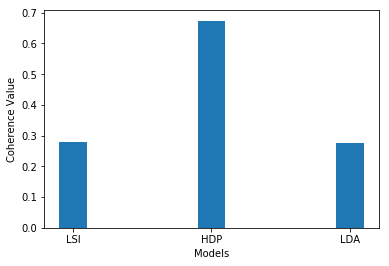

In [203]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

We can see that topic coherence helped us get past manually inspecting our topic models - we can now keep fine tuning our models and compare between them to see which has the best performance.

This is a particularly small example of a corpus for illustration purposes. Another example could be a list of all the plays written by Shakespeare, list of all wikipedia articles, or all tweets by a particular person of interest.

After collecting our corpus, there are typically a number of preprocessing steps we want to undertake. We'll keep it simple and just remove some commonly used English words (such as 'the') and words that occur only once in the corpus. In the process of doing so, we'll [tokenise][1] our data. Tokenization breaks up the documents into words (in this case using space as a delimiter).
[1]: https://en.wikipedia.org/wiki/Tokenization_(lexical_analysis)